# Classifying Fashion MNIST with spiking activations

[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nengo/keras-spiking/blob/master/docs/examples/spiking-fashion-mnist.ipynb)

This example is based on the
[Basic image classification example in
TensorFlow](https://www.tensorflow.org/tutorials/keras/classification).
We would recommend beginning there if you would like a more basic introduction to how
Keras works. In this example we will walk through how we can convert that non-spiking
model into a spiking model using KerasSpiking, and various techniques that can be used
to fine tune performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras_spiking

tf.random.set_seed(0)
np.random.seed(0)

## Loading data

We'll begin by loading the Fashion MNIST data:

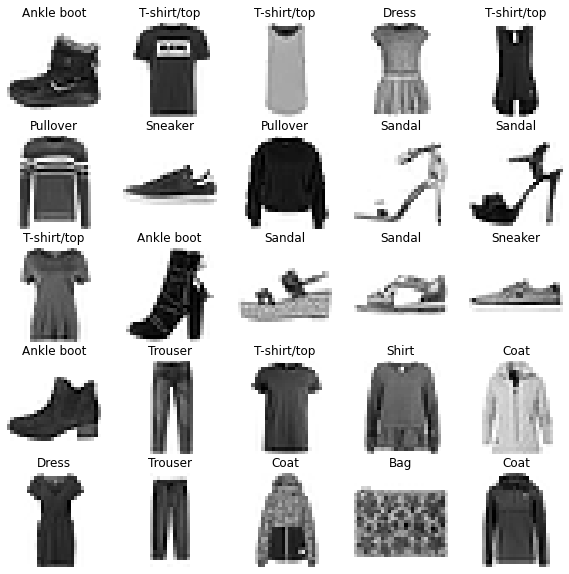

In [2]:
(
    (train_images, train_labels),
    (test_images, test_labels),
) = tf.keras.datasets.fashion_mnist.load_data()

# normalize images so values are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

## Non-spiking model

Next we'll build and train the non-spiking model (this is identical to the
[original TensorFlow
example](https://www.tensorflow.org/tutorials/keras/classification)).

In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)


def train(input_model, train_x, test_x):
    input_model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    input_model.fit(train_x, train_labels, epochs=10)

    _, test_acc = input_model.evaluate(test_x, test_labels, verbose=2)

    print("\nTest accuracy:", test_acc)


train(model, train_images, test_images)

2022-02-10 23:13:56.039487: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-10 23:13:56.560492: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10794 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


Epoch 1/10


   1/1875 [..............................] - ETA: 19:22 - loss: 2.5408 - accuracy: 0.0938

  33/1875 [..............................] - ETA: 2s - loss: 1.3831 - accuracy: 0.5511   

  59/1875 [..............................] - ETA: 3s - loss: 1.1423 - accuracy: 0.6160

  89/1875 [>.............................] - ETA: 3s - loss: 1.0016 - accuracy: 0.6671

 114/1875 [>.............................] - ETA: 3s - loss: 0.9349 - accuracy: 0.6889

 140/1875 [=>............................] - ETA: 3s - loss: 0.8846 - accuracy: 0.7058

 168/1875 [=>............................] - ETA: 3s - loss: 0.8455 - accuracy: 0.7156

 192/1875 [==>...........................] - ETA: 3s - loss: 0.8298 - accuracy: 0.7205

 216/1875 [==>...........................] - ETA: 3s - loss: 0.8104 - accuracy: 0.7266

 245/1875 [==>...........................] - ETA: 3s - loss: 0.7805 - accuracy: 0.7357

 269/1875 [===>..........................] - ETA: 3s - loss: 0.7612 - accuracy: 0.7431

 299/1875 [===>..........................] - ETA: 2s - loss: 0.7425 - accuracy: 0.7487

 329/1875 [====>.........................] - ETA: 2s - loss: 0.7282 - accuracy: 0.7536

 357/1875 [====>.........................] - ETA: 2s - loss: 0.7077 - accuracy: 0.7593

 389/1875 [=====>........................] - ETA: 2s - loss: 0.6966 - accuracy: 0.7629

 413/1875 [=====>........................] - ETA: 2s - loss: 0.6848 - accuracy: 0.7669

 445/1875 [======>.......................] - ETA: 2s - loss: 0.6740 - accuracy: 0.7703

 477/1875 [======>.......................] - ETA: 2s - loss: 0.6626 - accuracy: 0.7727

 510/1875 [=======>......................] - ETA: 2s - loss: 0.6543 - accuracy: 0.7748

 543/1875 [=======>......................] - ETA: 2s - loss: 0.6428 - accuracy: 0.7781

 575/1875 [========>.....................] - ETA: 2s - loss: 0.6332 - accuracy: 0.7814

 607/1875 [========>.....................] - ETA: 2s - loss: 0.6252 - accuracy: 0.7845

 638/1875 [=========>....................] - ETA: 2s - loss: 0.6174 - accuracy: 0.7869

 669/1875 [=========>....................] - ETA: 2s - loss: 0.6101 - accuracy: 0.7897

 700/1875 [==========>...................] - ETA: 2s - loss: 0.6059 - accuracy: 0.7913

 732/1875 [==========>...................] - ETA: 1s - loss: 0.6007 - accuracy: 0.7928

 763/1875 [===========>..................] - ETA: 1s - loss: 0.5949 - accuracy: 0.7944

 794/1875 [===========>..................] - ETA: 1s - loss: 0.5911 - accuracy: 0.7958

 824/1875 [============>.................] - ETA: 1s - loss: 0.5871 - accuracy: 0.7966

 855/1875 [============>.................] - ETA: 1s - loss: 0.5829 - accuracy: 0.7978

 886/1875 [=============>................] - ETA: 1s - loss: 0.5793 - accuracy: 0.7990

 918/1875 [=============>................] - ETA: 1s - loss: 0.5765 - accuracy: 0.8000

 946/1875 [==============>...............] - ETA: 1s - loss: 0.5720 - accuracy: 0.8013

 978/1875 [==============>...............] - ETA: 1s - loss: 0.5687 - accuracy: 0.8026

1009/1875 [===============>..............] - ETA: 1s - loss: 0.5645 - accuracy: 0.8043

1040/1875 [===============>..............] - ETA: 1s - loss: 0.5610 - accuracy: 0.8059

1071/1875 [================>.............] - ETA: 1s - loss: 0.5572 - accuracy: 0.8068

1102/1875 [================>.............] - ETA: 1s - loss: 0.5543 - accuracy: 0.8077

1133/1875 [=================>............] - ETA: 1s - loss: 0.5509 - accuracy: 0.8088

1164/1875 [=================>............] - ETA: 1s - loss: 0.5472 - accuracy: 0.8100

1196/1875 [==================>...........] - ETA: 1s - loss: 0.5451 - accuracy: 0.8106

1227/1875 [==================>...........] - ETA: 1s - loss: 0.5414 - accuracy: 0.8122

1259/1875 [===================>..........] - ETA: 1s - loss: 0.5389 - accuracy: 0.8126

1290/1875 [===================>..........] - ETA: 0s - loss: 0.5357 - accuracy: 0.8136

1322/1875 [====================>.........] - ETA: 0s - loss: 0.5316 - accuracy: 0.8150

1354/1875 [====================>.........] - ETA: 0s - loss: 0.5288 - accuracy: 0.8157

1386/1875 [=====================>........] - ETA: 0s - loss: 0.5263 - accuracy: 0.8164

1416/1875 [=====================>........] - ETA: 0s - loss: 0.5251 - accuracy: 0.8164

1447/1875 [======================>.......] - ETA: 0s - loss: 0.5230 - accuracy: 0.8171

1478/1875 [======================>.......] - ETA: 0s - loss: 0.5214 - accuracy: 0.8177

1510/1875 [=======================>......] - ETA: 0s - loss: 0.5185 - accuracy: 0.8185

1541/1875 [=======================>......] - ETA: 0s - loss: 0.5164 - accuracy: 0.8191

1573/1875 [========================>.....] - ETA: 0s - loss: 0.5145 - accuracy: 0.8195

1605/1875 [========================>.....] - ETA: 0s - loss: 0.5123 - accuracy: 0.8202

1637/1875 [=========================>....] - ETA: 0s - loss: 0.5101 - accuracy: 0.8211

1669/1875 [=========================>....] - ETA: 0s - loss: 0.5082 - accuracy: 0.8217

1701/1875 [==========================>...] - ETA: 0s - loss: 0.5069 - accuracy: 0.8221

1727/1875 [==========================>...] - ETA: 0s - loss: 0.5052 - accuracy: 0.8226

1758/1875 [===========================>..] - ETA: 0s - loss: 0.5037 - accuracy: 0.8231

1790/1875 [===========================>..] - ETA: 0s - loss: 0.5020 - accuracy: 0.8236

1822/1875 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.8241

1853/1875 [============================>.] - ETA: 0s - loss: 0.4985 - accuracy: 0.8248

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4979 - accuracy: 0.8250


Epoch 2/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2789 - accuracy: 0.8125

  32/1875 [..............................] - ETA: 2s - loss: 0.4103 - accuracy: 0.8438

  64/1875 [>.............................] - ETA: 2s - loss: 0.3885 - accuracy: 0.8521

  96/1875 [>.............................] - ETA: 2s - loss: 0.3882 - accuracy: 0.8551

 127/1875 [=>............................] - ETA: 2s - loss: 0.3937 - accuracy: 0.8531

 159/1875 [=>............................] - ETA: 2s - loss: 0.3947 - accuracy: 0.8532

 191/1875 [==>...........................] - ETA: 2s - loss: 0.3920 - accuracy: 0.8544

 222/1875 [==>...........................] - ETA: 2s - loss: 0.3898 - accuracy: 0.8580

 253/1875 [===>..........................] - ETA: 2s - loss: 0.3922 - accuracy: 0.8566

 284/1875 [===>..........................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8597

 312/1875 [===>..........................] - ETA: 2s - loss: 0.3868 - accuracy: 0.8591

 343/1875 [====>.........................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8597

 375/1875 [=====>........................] - ETA: 2s - loss: 0.3860 - accuracy: 0.8594

 406/1875 [=====>........................] - ETA: 2s - loss: 0.3833 - accuracy: 0.8607

 438/1875 [======>.......................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8604

 469/1875 [======>.......................] - ETA: 2s - loss: 0.3861 - accuracy: 0.8605

 501/1875 [=======>......................] - ETA: 2s - loss: 0.3868 - accuracy: 0.8597

 533/1875 [=======>......................] - ETA: 2s - loss: 0.3864 - accuracy: 0.8593

 565/1875 [========>.....................] - ETA: 2s - loss: 0.3866 - accuracy: 0.8593

 597/1875 [========>.....................] - ETA: 2s - loss: 0.3862 - accuracy: 0.8591

 628/1875 [=========>....................] - ETA: 2s - loss: 0.3853 - accuracy: 0.8591

 658/1875 [=========>....................] - ETA: 1s - loss: 0.3837 - accuracy: 0.8600

 690/1875 [==========>...................] - ETA: 1s - loss: 0.3813 - accuracy: 0.8608

 720/1875 [==========>...................] - ETA: 1s - loss: 0.3812 - accuracy: 0.8606

 752/1875 [===========>..................] - ETA: 1s - loss: 0.3791 - accuracy: 0.8610

 783/1875 [===========>..................] - ETA: 1s - loss: 0.3794 - accuracy: 0.8610

 814/1875 [============>.................] - ETA: 1s - loss: 0.3802 - accuracy: 0.8605

 846/1875 [============>.................] - ETA: 1s - loss: 0.3813 - accuracy: 0.8603

 878/1875 [=============>................] - ETA: 1s - loss: 0.3809 - accuracy: 0.8604

 909/1875 [=============>................] - ETA: 1s - loss: 0.3791 - accuracy: 0.8609

 940/1875 [==============>...............] - ETA: 1s - loss: 0.3790 - accuracy: 0.8611

 972/1875 [==============>...............] - ETA: 1s - loss: 0.3792 - accuracy: 0.8610

1003/1875 [===============>..............] - ETA: 1s - loss: 0.3779 - accuracy: 0.8615

1034/1875 [===============>..............] - ETA: 1s - loss: 0.3778 - accuracy: 0.8616

1066/1875 [================>.............] - ETA: 1s - loss: 0.3770 - accuracy: 0.8617

1097/1875 [================>.............] - ETA: 1s - loss: 0.3773 - accuracy: 0.8615

1128/1875 [=================>............] - ETA: 1s - loss: 0.3766 - accuracy: 0.8620

1160/1875 [=================>............] - ETA: 1s - loss: 0.3763 - accuracy: 0.8621

1192/1875 [==================>...........] - ETA: 1s - loss: 0.3761 - accuracy: 0.8622

1224/1875 [==================>...........] - ETA: 1s - loss: 0.3746 - accuracy: 0.8626

1255/1875 [===================>..........] - ETA: 1s - loss: 0.3745 - accuracy: 0.8630

1286/1875 [===================>..........] - ETA: 0s - loss: 0.3740 - accuracy: 0.8632

1317/1875 [====================>.........] - ETA: 0s - loss: 0.3744 - accuracy: 0.8631

1349/1875 [====================>.........] - ETA: 0s - loss: 0.3751 - accuracy: 0.8630

1378/1875 [=====================>........] - ETA: 0s - loss: 0.3748 - accuracy: 0.8633

1409/1875 [=====================>........] - ETA: 0s - loss: 0.3746 - accuracy: 0.8632

1439/1875 [======================>.......] - ETA: 0s - loss: 0.3737 - accuracy: 0.8636

1470/1875 [======================>.......] - ETA: 0s - loss: 0.3737 - accuracy: 0.8635

1501/1875 [=======================>......] - ETA: 0s - loss: 0.3738 - accuracy: 0.8636

1532/1875 [=======================>......] - ETA: 0s - loss: 0.3736 - accuracy: 0.8637

1564/1875 [========================>.....] - ETA: 0s - loss: 0.3738 - accuracy: 0.8635

1595/1875 [========================>.....] - ETA: 0s - loss: 0.3733 - accuracy: 0.8639

1627/1875 [=========================>....] - ETA: 0s - loss: 0.3731 - accuracy: 0.8640

1658/1875 [=========================>....] - ETA: 0s - loss: 0.3722 - accuracy: 0.8643

1690/1875 [==========================>...] - ETA: 0s - loss: 0.3724 - accuracy: 0.8643

1720/1875 [==========================>...] - ETA: 0s - loss: 0.3718 - accuracy: 0.8646

1752/1875 [===========================>..] - ETA: 0s - loss: 0.3716 - accuracy: 0.8648

1782/1875 [===========================>..] - ETA: 0s - loss: 0.3710 - accuracy: 0.8649

1814/1875 [============================>.] - ETA: 0s - loss: 0.3713 - accuracy: 0.8649

1845/1875 [============================>.] - ETA: 0s - loss: 0.3705 - accuracy: 0.8653

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3703 - accuracy: 0.8653


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.4388 - accuracy: 0.9062

  32/1875 [..............................] - ETA: 2s - loss: 0.3099 - accuracy: 0.9033

  64/1875 [>.............................] - ETA: 2s - loss: 0.3433 - accuracy: 0.8813

  95/1875 [>.............................] - ETA: 2s - loss: 0.3328 - accuracy: 0.8832

 126/1875 [=>............................] - ETA: 2s - loss: 0.3331 - accuracy: 0.8839

 157/1875 [=>............................] - ETA: 2s - loss: 0.3295 - accuracy: 0.8850

 184/1875 [=>............................] - ETA: 2s - loss: 0.3333 - accuracy: 0.8806

 215/1875 [==>...........................] - ETA: 2s - loss: 0.3332 - accuracy: 0.8799

 246/1875 [==>...........................] - ETA: 2s - loss: 0.3327 - accuracy: 0.8816

 278/1875 [===>..........................] - ETA: 2s - loss: 0.3408 - accuracy: 0.8792

 309/1875 [===>..........................] - ETA: 2s - loss: 0.3419 - accuracy: 0.8778

 337/1875 [====>.........................] - ETA: 2s - loss: 0.3435 - accuracy: 0.8779

 368/1875 [====>.........................] - ETA: 2s - loss: 0.3434 - accuracy: 0.8781

 400/1875 [=====>........................] - ETA: 2s - loss: 0.3452 - accuracy: 0.8766

 431/1875 [=====>........................] - ETA: 2s - loss: 0.3449 - accuracy: 0.8764

 461/1875 [======>.......................] - ETA: 2s - loss: 0.3417 - accuracy: 0.8772

 492/1875 [======>.......................] - ETA: 2s - loss: 0.3375 - accuracy: 0.8784

 524/1875 [=======>......................] - ETA: 2s - loss: 0.3382 - accuracy: 0.8786

 555/1875 [=======>......................] - ETA: 2s - loss: 0.3383 - accuracy: 0.8785

 587/1875 [========>.....................] - ETA: 2s - loss: 0.3398 - accuracy: 0.8778

 619/1875 [========>.....................] - ETA: 2s - loss: 0.3403 - accuracy: 0.8781

 647/1875 [=========>....................] - ETA: 2s - loss: 0.3394 - accuracy: 0.8779

 678/1875 [=========>....................] - ETA: 1s - loss: 0.3411 - accuracy: 0.8778

 707/1875 [==========>...................] - ETA: 1s - loss: 0.3430 - accuracy: 0.8768

 732/1875 [==========>...................] - ETA: 1s - loss: 0.3428 - accuracy: 0.8766

 763/1875 [===========>..................] - ETA: 1s - loss: 0.3400 - accuracy: 0.8772

 795/1875 [===========>..................] - ETA: 1s - loss: 0.3379 - accuracy: 0.8778

 826/1875 [============>.................] - ETA: 1s - loss: 0.3372 - accuracy: 0.8780

 855/1875 [============>.................] - ETA: 1s - loss: 0.3386 - accuracy: 0.8769

 884/1875 [=============>................] - ETA: 1s - loss: 0.3374 - accuracy: 0.8774

 916/1875 [=============>................] - ETA: 1s - loss: 0.3371 - accuracy: 0.8777

 947/1875 [==============>...............] - ETA: 1s - loss: 0.3373 - accuracy: 0.8776

 977/1875 [==============>...............] - ETA: 1s - loss: 0.3355 - accuracy: 0.8783

1008/1875 [===============>..............] - ETA: 1s - loss: 0.3360 - accuracy: 0.8780

1039/1875 [===============>..............] - ETA: 1s - loss: 0.3359 - accuracy: 0.8782

1069/1875 [================>.............] - ETA: 1s - loss: 0.3362 - accuracy: 0.8782

1100/1875 [================>.............] - ETA: 1s - loss: 0.3359 - accuracy: 0.8781

1132/1875 [=================>............] - ETA: 1s - loss: 0.3351 - accuracy: 0.8783

1163/1875 [=================>............] - ETA: 1s - loss: 0.3351 - accuracy: 0.8783

1195/1875 [==================>...........] - ETA: 1s - loss: 0.3355 - accuracy: 0.8780

1226/1875 [==================>...........] - ETA: 1s - loss: 0.3349 - accuracy: 0.8781

1257/1875 [===================>..........] - ETA: 1s - loss: 0.3352 - accuracy: 0.8780

1286/1875 [===================>..........] - ETA: 0s - loss: 0.3351 - accuracy: 0.8780

1317/1875 [====================>.........] - ETA: 0s - loss: 0.3343 - accuracy: 0.8786

1349/1875 [====================>.........] - ETA: 0s - loss: 0.3353 - accuracy: 0.8782

1379/1875 [=====================>........] - ETA: 0s - loss: 0.3355 - accuracy: 0.8781

1409/1875 [=====================>........] - ETA: 0s - loss: 0.3366 - accuracy: 0.8778

1441/1875 [======================>.......] - ETA: 0s - loss: 0.3363 - accuracy: 0.8781

1472/1875 [======================>.......] - ETA: 0s - loss: 0.3359 - accuracy: 0.8782

1503/1875 [=======================>......] - ETA: 0s - loss: 0.3352 - accuracy: 0.8785

1535/1875 [=======================>......] - ETA: 0s - loss: 0.3346 - accuracy: 0.8785

1567/1875 [========================>.....] - ETA: 0s - loss: 0.3343 - accuracy: 0.8788

1598/1875 [========================>.....] - ETA: 0s - loss: 0.3347 - accuracy: 0.8785

1630/1875 [=========================>....] - ETA: 0s - loss: 0.3343 - accuracy: 0.8787

1662/1875 [=========================>....] - ETA: 0s - loss: 0.3344 - accuracy: 0.8787

1694/1875 [==========================>...] - ETA: 0s - loss: 0.3341 - accuracy: 0.8787

1724/1875 [==========================>...] - ETA: 0s - loss: 0.3335 - accuracy: 0.8789

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3334 - accuracy: 0.8788

1787/1875 [===========================>..] - ETA: 0s - loss: 0.3339 - accuracy: 0.8788

1818/1875 [============================>.] - ETA: 0s - loss: 0.3330 - accuracy: 0.8792

1848/1875 [============================>.] - ETA: 0s - loss: 0.3322 - accuracy: 0.8794

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3318 - accuracy: 0.8795


Epoch 4/10


   1/1875 [..............................] - ETA: 4s - loss: 0.4130 - accuracy: 0.8750

  33/1875 [..............................] - ETA: 2s - loss: 0.3151 - accuracy: 0.8816

  62/1875 [..............................] - ETA: 3s - loss: 0.3222 - accuracy: 0.8841

  93/1875 [>.............................] - ETA: 2s - loss: 0.3221 - accuracy: 0.8854

 124/1875 [>.............................] - ETA: 2s - loss: 0.3214 - accuracy: 0.8823

 155/1875 [=>............................] - ETA: 2s - loss: 0.3258 - accuracy: 0.8819

 186/1875 [=>............................] - ETA: 2s - loss: 0.3207 - accuracy: 0.8831

 218/1875 [==>...........................] - ETA: 2s - loss: 0.3130 - accuracy: 0.8860

 250/1875 [===>..........................] - ETA: 2s - loss: 0.3117 - accuracy: 0.8874

 281/1875 [===>..........................] - ETA: 2s - loss: 0.3134 - accuracy: 0.8857

 312/1875 [===>..........................] - ETA: 2s - loss: 0.3141 - accuracy: 0.8860

 343/1875 [====>.........................] - ETA: 2s - loss: 0.3149 - accuracy: 0.8844

 375/1875 [=====>........................] - ETA: 2s - loss: 0.3191 - accuracy: 0.8840

 406/1875 [=====>........................] - ETA: 2s - loss: 0.3169 - accuracy: 0.8845

 438/1875 [======>.......................] - ETA: 2s - loss: 0.3140 - accuracy: 0.8851

 469/1875 [======>.......................] - ETA: 2s - loss: 0.3155 - accuracy: 0.8849

 501/1875 [=======>......................] - ETA: 2s - loss: 0.3150 - accuracy: 0.8845

 532/1875 [=======>......................] - ETA: 2s - loss: 0.3163 - accuracy: 0.8838

 564/1875 [========>.....................] - ETA: 2s - loss: 0.3141 - accuracy: 0.8842

 596/1875 [========>.....................] - ETA: 2s - loss: 0.3136 - accuracy: 0.8839

 625/1875 [=========>....................] - ETA: 2s - loss: 0.3133 - accuracy: 0.8839

 656/1875 [=========>....................] - ETA: 1s - loss: 0.3145 - accuracy: 0.8839

 687/1875 [=========>....................] - ETA: 1s - loss: 0.3128 - accuracy: 0.8847

 719/1875 [==========>...................] - ETA: 1s - loss: 0.3125 - accuracy: 0.8850

 750/1875 [===========>..................] - ETA: 1s - loss: 0.3123 - accuracy: 0.8852

 782/1875 [===========>..................] - ETA: 1s - loss: 0.3139 - accuracy: 0.8849

 802/1875 [===========>..................] - ETA: 1s - loss: 0.3134 - accuracy: 0.8852

 834/1875 [============>.................] - ETA: 1s - loss: 0.3137 - accuracy: 0.8854

 865/1875 [============>.................] - ETA: 1s - loss: 0.3129 - accuracy: 0.8858

 895/1875 [=============>................] - ETA: 1s - loss: 0.3120 - accuracy: 0.8860

 926/1875 [=============>................] - ETA: 1s - loss: 0.3112 - accuracy: 0.8862

 957/1875 [==============>...............] - ETA: 1s - loss: 0.3114 - accuracy: 0.8863

 988/1875 [==============>...............] - ETA: 1s - loss: 0.3101 - accuracy: 0.8867

1020/1875 [===============>..............] - ETA: 1s - loss: 0.3098 - accuracy: 0.8865

1051/1875 [===============>..............] - ETA: 1s - loss: 0.3097 - accuracy: 0.8864

1083/1875 [================>.............] - ETA: 1s - loss: 0.3096 - accuracy: 0.8866

1114/1875 [================>.............] - ETA: 1s - loss: 0.3091 - accuracy: 0.8870

1145/1875 [=================>............] - ETA: 1s - loss: 0.3105 - accuracy: 0.8866

1176/1875 [=================>............] - ETA: 1s - loss: 0.3095 - accuracy: 0.8870

1207/1875 [==================>...........] - ETA: 1s - loss: 0.3094 - accuracy: 0.8868

1238/1875 [==================>...........] - ETA: 1s - loss: 0.3091 - accuracy: 0.8870

1269/1875 [===================>..........] - ETA: 0s - loss: 0.3077 - accuracy: 0.8876

1301/1875 [===================>..........] - ETA: 0s - loss: 0.3071 - accuracy: 0.8875

1332/1875 [====================>.........] - ETA: 0s - loss: 0.3076 - accuracy: 0.8874

1363/1875 [====================>.........] - ETA: 0s - loss: 0.3080 - accuracy: 0.8872

1394/1875 [=====================>........] - ETA: 0s - loss: 0.3086 - accuracy: 0.8869

1426/1875 [=====================>........] - ETA: 0s - loss: 0.3081 - accuracy: 0.8871

1458/1875 [======================>.......] - ETA: 0s - loss: 0.3085 - accuracy: 0.8868

1490/1875 [======================>.......] - ETA: 0s - loss: 0.3088 - accuracy: 0.8868

1519/1875 [=======================>......] - ETA: 0s - loss: 0.3080 - accuracy: 0.8872

1550/1875 [=======================>......] - ETA: 0s - loss: 0.3083 - accuracy: 0.8871

1580/1875 [========================>.....] - ETA: 0s - loss: 0.3086 - accuracy: 0.8869

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3088 - accuracy: 0.8867

1643/1875 [=========================>....] - ETA: 0s - loss: 0.3075 - accuracy: 0.8872

1674/1875 [=========================>....] - ETA: 0s - loss: 0.3079 - accuracy: 0.8871

1703/1875 [==========================>...] - ETA: 0s - loss: 0.3084 - accuracy: 0.8869

1735/1875 [==========================>...] - ETA: 0s - loss: 0.3087 - accuracy: 0.8869

1767/1875 [===========================>..] - ETA: 0s - loss: 0.3090 - accuracy: 0.8868

1799/1875 [===========================>..] - ETA: 0s - loss: 0.3088 - accuracy: 0.8868

1831/1875 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8867

1862/1875 [============================>.] - ETA: 0s - loss: 0.3084 - accuracy: 0.8867

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3082 - accuracy: 0.8868


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1590 - accuracy: 0.9375

  32/1875 [..............................] - ETA: 2s - loss: 0.3143 - accuracy: 0.8838

  63/1875 [>.............................] - ETA: 2s - loss: 0.3106 - accuracy: 0.8894

  94/1875 [>.............................] - ETA: 2s - loss: 0.2964 - accuracy: 0.8953

 124/1875 [>.............................] - ETA: 2s - loss: 0.2970 - accuracy: 0.8934

 156/1875 [=>............................] - ETA: 2s - loss: 0.2964 - accuracy: 0.8936

 184/1875 [=>............................] - ETA: 2s - loss: 0.2917 - accuracy: 0.8945

 216/1875 [==>...........................] - ETA: 2s - loss: 0.2923 - accuracy: 0.8947

 248/1875 [==>...........................] - ETA: 2s - loss: 0.2949 - accuracy: 0.8942

 279/1875 [===>..........................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8930

 309/1875 [===>..........................] - ETA: 2s - loss: 0.2934 - accuracy: 0.8924

 341/1875 [====>.........................] - ETA: 2s - loss: 0.2961 - accuracy: 0.8915

 372/1875 [====>.........................] - ETA: 2s - loss: 0.2923 - accuracy: 0.8929

 403/1875 [=====>........................] - ETA: 2s - loss: 0.2938 - accuracy: 0.8921

 435/1875 [=====>........................] - ETA: 2s - loss: 0.2940 - accuracy: 0.8920

 467/1875 [======>.......................] - ETA: 2s - loss: 0.2926 - accuracy: 0.8924

 499/1875 [======>.......................] - ETA: 2s - loss: 0.2911 - accuracy: 0.8927

 530/1875 [=======>......................] - ETA: 2s - loss: 0.2928 - accuracy: 0.8918

 561/1875 [=======>......................] - ETA: 2s - loss: 0.2942 - accuracy: 0.8917

 592/1875 [========>.....................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8918

 623/1875 [========>.....................] - ETA: 2s - loss: 0.2904 - accuracy: 0.8929

 655/1875 [=========>....................] - ETA: 1s - loss: 0.2914 - accuracy: 0.8918

 687/1875 [=========>....................] - ETA: 1s - loss: 0.2919 - accuracy: 0.8918

 719/1875 [==========>...................] - ETA: 1s - loss: 0.2909 - accuracy: 0.8923

 750/1875 [===========>..................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8918

 778/1875 [===========>..................] - ETA: 1s - loss: 0.2929 - accuracy: 0.8916

 810/1875 [===========>..................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8920

 841/1875 [============>.................] - ETA: 1s - loss: 0.2910 - accuracy: 0.8926

 873/1875 [============>.................] - ETA: 1s - loss: 0.2905 - accuracy: 0.8928

 904/1875 [=============>................] - ETA: 1s - loss: 0.2899 - accuracy: 0.8925

 934/1875 [=============>................] - ETA: 1s - loss: 0.2895 - accuracy: 0.8924

 965/1875 [==============>...............] - ETA: 1s - loss: 0.2908 - accuracy: 0.8923

 996/1875 [==============>...............] - ETA: 1s - loss: 0.2918 - accuracy: 0.8921

1027/1875 [===============>..............] - ETA: 1s - loss: 0.2903 - accuracy: 0.8927

1055/1875 [===============>..............] - ETA: 1s - loss: 0.2905 - accuracy: 0.8927

1086/1875 [================>.............] - ETA: 1s - loss: 0.2901 - accuracy: 0.8928

1118/1875 [================>.............] - ETA: 1s - loss: 0.2910 - accuracy: 0.8925

1148/1875 [=================>............] - ETA: 1s - loss: 0.2904 - accuracy: 0.8924

1176/1875 [=================>............] - ETA: 1s - loss: 0.2904 - accuracy: 0.8925

1207/1875 [==================>...........] - ETA: 1s - loss: 0.2899 - accuracy: 0.8927

1237/1875 [==================>...........] - ETA: 1s - loss: 0.2915 - accuracy: 0.8923

1268/1875 [===================>..........] - ETA: 0s - loss: 0.2916 - accuracy: 0.8923

1298/1875 [===================>..........] - ETA: 0s - loss: 0.2916 - accuracy: 0.8925

1329/1875 [====================>.........] - ETA: 0s - loss: 0.2911 - accuracy: 0.8926

1361/1875 [====================>.........] - ETA: 0s - loss: 0.2927 - accuracy: 0.8919

1393/1875 [=====================>........] - ETA: 0s - loss: 0.2923 - accuracy: 0.8920

1425/1875 [=====================>........] - ETA: 0s - loss: 0.2921 - accuracy: 0.8919

1457/1875 [======================>.......] - ETA: 0s - loss: 0.2915 - accuracy: 0.8922

1489/1875 [======================>.......] - ETA: 0s - loss: 0.2915 - accuracy: 0.8921

1520/1875 [=======================>......] - ETA: 0s - loss: 0.2922 - accuracy: 0.8919

1551/1875 [=======================>......] - ETA: 0s - loss: 0.2916 - accuracy: 0.8920

1583/1875 [========================>.....] - ETA: 0s - loss: 0.2917 - accuracy: 0.8920

1613/1875 [========================>.....] - ETA: 0s - loss: 0.2916 - accuracy: 0.8920

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2923 - accuracy: 0.8915

1675/1875 [=========================>....] - ETA: 0s - loss: 0.2922 - accuracy: 0.8917

1707/1875 [==========================>...] - ETA: 0s - loss: 0.2924 - accuracy: 0.8917

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2924 - accuracy: 0.8919

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2930 - accuracy: 0.8917

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2923 - accuracy: 0.8918

1834/1875 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.8918

1865/1875 [============================>.] - ETA: 0s - loss: 0.2923 - accuracy: 0.8916

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.8918


Epoch 6/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1754 - accuracy: 0.9375

  33/1875 [..............................] - ETA: 2s - loss: 0.2713 - accuracy: 0.9072

  64/1875 [>.............................] - ETA: 2s - loss: 0.2783 - accuracy: 0.9023

  95/1875 [>.............................] - ETA: 2s - loss: 0.2760 - accuracy: 0.9030

 127/1875 [=>............................] - ETA: 2s - loss: 0.2767 - accuracy: 0.9033

 159/1875 [=>............................] - ETA: 2s - loss: 0.2762 - accuracy: 0.9029

 191/1875 [==>...........................] - ETA: 2s - loss: 0.2810 - accuracy: 0.8999

 222/1875 [==>...........................] - ETA: 2s - loss: 0.2786 - accuracy: 0.9012

 252/1875 [===>..........................] - ETA: 2s - loss: 0.2781 - accuracy: 0.9007

 284/1875 [===>..........................] - ETA: 2s - loss: 0.2773 - accuracy: 0.9007

 315/1875 [====>.........................] - ETA: 2s - loss: 0.2787 - accuracy: 0.9004

 347/1875 [====>.........................] - ETA: 2s - loss: 0.2814 - accuracy: 0.8986

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2850 - accuracy: 0.8977

 409/1875 [=====>........................] - ETA: 2s - loss: 0.2870 - accuracy: 0.8959

 439/1875 [======>.......................] - ETA: 2s - loss: 0.2860 - accuracy: 0.8961

 470/1875 [======>.......................] - ETA: 2s - loss: 0.2856 - accuracy: 0.8961

 501/1875 [=======>......................] - ETA: 2s - loss: 0.2852 - accuracy: 0.8962

 532/1875 [=======>......................] - ETA: 2s - loss: 0.2862 - accuracy: 0.8955

 563/1875 [========>.....................] - ETA: 2s - loss: 0.2847 - accuracy: 0.8959

 595/1875 [========>.....................] - ETA: 2s - loss: 0.2854 - accuracy: 0.8955

 627/1875 [=========>....................] - ETA: 2s - loss: 0.2850 - accuracy: 0.8959

 658/1875 [=========>....................] - ETA: 1s - loss: 0.2845 - accuracy: 0.8959

 689/1875 [==========>...................] - ETA: 1s - loss: 0.2847 - accuracy: 0.8964

 719/1875 [==========>...................] - ETA: 1s - loss: 0.2842 - accuracy: 0.8963

 751/1875 [===========>..................] - ETA: 1s - loss: 0.2834 - accuracy: 0.8962

 783/1875 [===========>..................] - ETA: 1s - loss: 0.2823 - accuracy: 0.8966

 814/1875 [============>.................] - ETA: 1s - loss: 0.2798 - accuracy: 0.8977

 845/1875 [============>.................] - ETA: 1s - loss: 0.2792 - accuracy: 0.8984

 877/1875 [=============>................] - ETA: 1s - loss: 0.2778 - accuracy: 0.8987

 909/1875 [=============>................] - ETA: 1s - loss: 0.2784 - accuracy: 0.8981

 941/1875 [==============>...............] - ETA: 1s - loss: 0.2777 - accuracy: 0.8983

 973/1875 [==============>...............] - ETA: 1s - loss: 0.2791 - accuracy: 0.8978

1005/1875 [===============>..............] - ETA: 1s - loss: 0.2786 - accuracy: 0.8976

1037/1875 [===============>..............] - ETA: 1s - loss: 0.2789 - accuracy: 0.8979

1069/1875 [================>.............] - ETA: 1s - loss: 0.2782 - accuracy: 0.8985

1100/1875 [================>.............] - ETA: 1s - loss: 0.2775 - accuracy: 0.8987

1131/1875 [=================>............] - ETA: 1s - loss: 0.2774 - accuracy: 0.8988

1162/1875 [=================>............] - ETA: 1s - loss: 0.2780 - accuracy: 0.8985

1194/1875 [==================>...........] - ETA: 1s - loss: 0.2783 - accuracy: 0.8982

1226/1875 [==================>...........] - ETA: 1s - loss: 0.2773 - accuracy: 0.8985

1258/1875 [===================>..........] - ETA: 0s - loss: 0.2769 - accuracy: 0.8986

1289/1875 [===================>..........] - ETA: 0s - loss: 0.2765 - accuracy: 0.8987

1321/1875 [====================>.........] - ETA: 0s - loss: 0.2767 - accuracy: 0.8985

1352/1875 [====================>.........] - ETA: 0s - loss: 0.2767 - accuracy: 0.8985

1384/1875 [=====================>........] - ETA: 0s - loss: 0.2767 - accuracy: 0.8984

1416/1875 [=====================>........] - ETA: 0s - loss: 0.2774 - accuracy: 0.8980

1447/1875 [======================>.......] - ETA: 0s - loss: 0.2773 - accuracy: 0.8978

1478/1875 [======================>.......] - ETA: 0s - loss: 0.2768 - accuracy: 0.8981

1509/1875 [=======================>......] - ETA: 0s - loss: 0.2763 - accuracy: 0.8982

1537/1875 [=======================>......] - ETA: 0s - loss: 0.2769 - accuracy: 0.8979

1569/1875 [========================>.....] - ETA: 0s - loss: 0.2770 - accuracy: 0.8977

1601/1875 [========================>.....] - ETA: 0s - loss: 0.2761 - accuracy: 0.8981

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2756 - accuracy: 0.8982

1664/1875 [=========================>....] - ETA: 0s - loss: 0.2757 - accuracy: 0.8982

1695/1875 [==========================>...] - ETA: 0s - loss: 0.2759 - accuracy: 0.8981

1727/1875 [==========================>...] - ETA: 0s - loss: 0.2760 - accuracy: 0.8980

1758/1875 [===========================>..] - ETA: 0s - loss: 0.2764 - accuracy: 0.8978

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2761 - accuracy: 0.8978

1821/1875 [============================>.] - ETA: 0s - loss: 0.2764 - accuracy: 0.8978

1851/1875 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.8979

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2763 - accuracy: 0.8979


Epoch 7/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2778 - accuracy: 0.8750

  33/1875 [..............................] - ETA: 2s - loss: 0.2408 - accuracy: 0.9129

  64/1875 [>.............................] - ETA: 2s - loss: 0.2520 - accuracy: 0.9121

  95/1875 [>.............................] - ETA: 2s - loss: 0.2530 - accuracy: 0.9138

 127/1875 [=>............................] - ETA: 2s - loss: 0.2563 - accuracy: 0.9094

 158/1875 [=>............................] - ETA: 2s - loss: 0.2594 - accuracy: 0.9088

 190/1875 [==>...........................] - ETA: 2s - loss: 0.2570 - accuracy: 0.9074

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2542 - accuracy: 0.9079

 252/1875 [===>..........................] - ETA: 2s - loss: 0.2583 - accuracy: 0.9062

 283/1875 [===>..........................] - ETA: 2s - loss: 0.2591 - accuracy: 0.9053

 315/1875 [====>.........................] - ETA: 2s - loss: 0.2647 - accuracy: 0.9037

 347/1875 [====>.........................] - ETA: 2s - loss: 0.2648 - accuracy: 0.9035

 379/1875 [=====>........................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9040

 410/1875 [=====>........................] - ETA: 2s - loss: 0.2660 - accuracy: 0.9032

 442/1875 [======>.......................] - ETA: 2s - loss: 0.2658 - accuracy: 0.9029

 473/1875 [======>.......................] - ETA: 2s - loss: 0.2647 - accuracy: 0.9033

 504/1875 [=======>......................] - ETA: 2s - loss: 0.2654 - accuracy: 0.9031

 535/1875 [=======>......................] - ETA: 2s - loss: 0.2644 - accuracy: 0.9038

 566/1875 [========>.....................] - ETA: 2s - loss: 0.2644 - accuracy: 0.9037

 597/1875 [========>.....................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9036

 629/1875 [=========>....................] - ETA: 2s - loss: 0.2645 - accuracy: 0.9029

 660/1875 [=========>....................] - ETA: 1s - loss: 0.2656 - accuracy: 0.9021

 691/1875 [==========>...................] - ETA: 1s - loss: 0.2655 - accuracy: 0.9021

 721/1875 [==========>...................] - ETA: 1s - loss: 0.2647 - accuracy: 0.9026

 751/1875 [===========>..................] - ETA: 1s - loss: 0.2647 - accuracy: 0.9021

 783/1875 [===========>..................] - ETA: 1s - loss: 0.2649 - accuracy: 0.9019

 814/1875 [============>.................] - ETA: 1s - loss: 0.2649 - accuracy: 0.9018

 846/1875 [============>.................] - ETA: 1s - loss: 0.2652 - accuracy: 0.9018

 877/1875 [=============>................] - ETA: 1s - loss: 0.2645 - accuracy: 0.9018

 908/1875 [=============>................] - ETA: 1s - loss: 0.2652 - accuracy: 0.9015

 933/1875 [=============>................] - ETA: 1s - loss: 0.2653 - accuracy: 0.9014

 963/1875 [==============>...............] - ETA: 1s - loss: 0.2644 - accuracy: 0.9018

 992/1875 [==============>...............] - ETA: 1s - loss: 0.2637 - accuracy: 0.9019

1023/1875 [===============>..............] - ETA: 1s - loss: 0.2636 - accuracy: 0.9019

1051/1875 [===============>..............] - ETA: 1s - loss: 0.2631 - accuracy: 0.9018

1083/1875 [================>.............] - ETA: 1s - loss: 0.2627 - accuracy: 0.9018

1113/1875 [================>.............] - ETA: 1s - loss: 0.2638 - accuracy: 0.9012

1145/1875 [=================>............] - ETA: 1s - loss: 0.2647 - accuracy: 0.9008

1175/1875 [=================>............] - ETA: 1s - loss: 0.2633 - accuracy: 0.9013

1206/1875 [==================>...........] - ETA: 1s - loss: 0.2634 - accuracy: 0.9012

1237/1875 [==================>...........] - ETA: 1s - loss: 0.2632 - accuracy: 0.9012

1268/1875 [===================>..........] - ETA: 0s - loss: 0.2633 - accuracy: 0.9007

1300/1875 [===================>..........] - ETA: 0s - loss: 0.2629 - accuracy: 0.9010

1329/1875 [====================>.........] - ETA: 0s - loss: 0.2625 - accuracy: 0.9011

1358/1875 [====================>.........] - ETA: 0s - loss: 0.2628 - accuracy: 0.9009

1381/1875 [=====================>........] - ETA: 0s - loss: 0.2641 - accuracy: 0.9005

1413/1875 [=====================>........] - ETA: 0s - loss: 0.2642 - accuracy: 0.9006

1445/1875 [======================>.......] - ETA: 0s - loss: 0.2642 - accuracy: 0.9006

1477/1875 [======================>.......] - ETA: 0s - loss: 0.2651 - accuracy: 0.9000

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2653 - accuracy: 0.9000

1539/1875 [=======================>......] - ETA: 0s - loss: 0.2652 - accuracy: 0.9000

1569/1875 [========================>.....] - ETA: 0s - loss: 0.2658 - accuracy: 0.9001

1593/1875 [========================>.....] - ETA: 0s - loss: 0.2661 - accuracy: 0.9001

1624/1875 [========================>.....] - ETA: 0s - loss: 0.2658 - accuracy: 0.9000

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2652 - accuracy: 0.9002

1684/1875 [=========================>....] - ETA: 0s - loss: 0.2654 - accuracy: 0.9003

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2650 - accuracy: 0.9004

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2658 - accuracy: 0.9003

1777/1875 [===========================>..] - ETA: 0s - loss: 0.2655 - accuracy: 0.9004

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2668 - accuracy: 0.8999

1836/1875 [============================>.] - ETA: 0s - loss: 0.2666 - accuracy: 0.9001

1866/1875 [============================>.] - ETA: 0s - loss: 0.2669 - accuracy: 0.9000

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9001


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2603 - accuracy: 0.9062

  32/1875 [..............................] - ETA: 2s - loss: 0.2367 - accuracy: 0.9170

  64/1875 [>.............................] - ETA: 2s - loss: 0.2471 - accuracy: 0.9082

  96/1875 [>.............................] - ETA: 2s - loss: 0.2493 - accuracy: 0.9062

 124/1875 [>.............................] - ETA: 2s - loss: 0.2430 - accuracy: 0.9065

 153/1875 [=>............................] - ETA: 2s - loss: 0.2503 - accuracy: 0.9062

 185/1875 [=>............................] - ETA: 2s - loss: 0.2443 - accuracy: 0.9088

 216/1875 [==>...........................] - ETA: 2s - loss: 0.2423 - accuracy: 0.9086

 247/1875 [==>...........................] - ETA: 2s - loss: 0.2477 - accuracy: 0.9080

 279/1875 [===>..........................] - ETA: 2s - loss: 0.2478 - accuracy: 0.9073

 310/1875 [===>..........................] - ETA: 2s - loss: 0.2467 - accuracy: 0.9070

 341/1875 [====>.........................] - ETA: 2s - loss: 0.2469 - accuracy: 0.9073

 371/1875 [====>.........................] - ETA: 2s - loss: 0.2477 - accuracy: 0.9073

 403/1875 [=====>........................] - ETA: 2s - loss: 0.2504 - accuracy: 0.9066

 432/1875 [=====>........................] - ETA: 2s - loss: 0.2503 - accuracy: 0.9065

 462/1875 [======>.......................] - ETA: 2s - loss: 0.2497 - accuracy: 0.9069

 493/1875 [======>.......................] - ETA: 2s - loss: 0.2478 - accuracy: 0.9075

 524/1875 [=======>......................] - ETA: 2s - loss: 0.2476 - accuracy: 0.9072

 555/1875 [=======>......................] - ETA: 2s - loss: 0.2477 - accuracy: 0.9072

 586/1875 [========>.....................] - ETA: 2s - loss: 0.2482 - accuracy: 0.9074

 617/1875 [========>.....................] - ETA: 2s - loss: 0.2481 - accuracy: 0.9077

 648/1875 [=========>....................] - ETA: 2s - loss: 0.2498 - accuracy: 0.9071

 680/1875 [=========>....................] - ETA: 1s - loss: 0.2500 - accuracy: 0.9074

 711/1875 [==========>...................] - ETA: 1s - loss: 0.2506 - accuracy: 0.9074

 743/1875 [==========>...................] - ETA: 1s - loss: 0.2519 - accuracy: 0.9067

 774/1875 [===========>..................] - ETA: 1s - loss: 0.2512 - accuracy: 0.9073

 806/1875 [===========>..................] - ETA: 1s - loss: 0.2506 - accuracy: 0.9073

 838/1875 [============>.................] - ETA: 1s - loss: 0.2501 - accuracy: 0.9077

 870/1875 [============>.................] - ETA: 1s - loss: 0.2515 - accuracy: 0.9074

 901/1875 [=============>................] - ETA: 1s - loss: 0.2522 - accuracy: 0.9070

 933/1875 [=============>................] - ETA: 1s - loss: 0.2523 - accuracy: 0.9072

 964/1875 [==============>...............] - ETA: 1s - loss: 0.2541 - accuracy: 0.9066

 996/1875 [==============>...............] - ETA: 1s - loss: 0.2546 - accuracy: 0.9067

1028/1875 [===============>..............] - ETA: 1s - loss: 0.2569 - accuracy: 0.9059

1059/1875 [===============>..............] - ETA: 1s - loss: 0.2573 - accuracy: 0.9057

1090/1875 [================>.............] - ETA: 1s - loss: 0.2572 - accuracy: 0.9053

1121/1875 [================>.............] - ETA: 1s - loss: 0.2563 - accuracy: 0.9057

1150/1875 [=================>............] - ETA: 1s - loss: 0.2559 - accuracy: 0.9060

1182/1875 [=================>............] - ETA: 1s - loss: 0.2562 - accuracy: 0.9059

1213/1875 [==================>...........] - ETA: 1s - loss: 0.2563 - accuracy: 0.9058

1244/1875 [==================>...........] - ETA: 1s - loss: 0.2565 - accuracy: 0.9059

1275/1875 [===================>..........] - ETA: 0s - loss: 0.2562 - accuracy: 0.9061

1306/1875 [===================>..........] - ETA: 0s - loss: 0.2558 - accuracy: 0.9061

1336/1875 [====================>.........] - ETA: 0s - loss: 0.2550 - accuracy: 0.9065

1368/1875 [====================>.........] - ETA: 0s - loss: 0.2551 - accuracy: 0.9063

1399/1875 [=====================>........] - ETA: 0s - loss: 0.2548 - accuracy: 0.9062

1429/1875 [=====================>........] - ETA: 0s - loss: 0.2550 - accuracy: 0.9063

1461/1875 [======================>.......] - ETA: 0s - loss: 0.2552 - accuracy: 0.9061

1493/1875 [======================>.......] - ETA: 0s - loss: 0.2548 - accuracy: 0.9062

1522/1875 [=======================>......] - ETA: 0s - loss: 0.2536 - accuracy: 0.9067

1553/1875 [=======================>......] - ETA: 0s - loss: 0.2537 - accuracy: 0.9067

1584/1875 [========================>.....] - ETA: 0s - loss: 0.2529 - accuracy: 0.9070

1615/1875 [========================>.....] - ETA: 0s - loss: 0.2528 - accuracy: 0.9070

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2528 - accuracy: 0.9069

1677/1875 [=========================>....] - ETA: 0s - loss: 0.2533 - accuracy: 0.9068

1707/1875 [==========================>...] - ETA: 0s - loss: 0.2530 - accuracy: 0.9067

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2530 - accuracy: 0.9070

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2534 - accuracy: 0.9068

1801/1875 [===========================>..] - ETA: 0s - loss: 0.2539 - accuracy: 0.9066

1832/1875 [============================>.] - ETA: 0s - loss: 0.2538 - accuracy: 0.9067

1863/1875 [============================>.] - ETA: 0s - loss: 0.2545 - accuracy: 0.9065

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2545 - accuracy: 0.9065


Epoch 9/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2862 - accuracy: 0.9062

  33/1875 [..............................] - ETA: 2s - loss: 0.2192 - accuracy: 0.9176

  65/1875 [>.............................] - ETA: 2s - loss: 0.2356 - accuracy: 0.9091

  95/1875 [>.............................] - ETA: 2s - loss: 0.2438 - accuracy: 0.9086

 127/1875 [=>............................] - ETA: 2s - loss: 0.2364 - accuracy: 0.9112

 157/1875 [=>............................] - ETA: 2s - loss: 0.2326 - accuracy: 0.9104

 183/1875 [=>............................] - ETA: 2s - loss: 0.2323 - accuracy: 0.9119

 212/1875 [==>...........................] - ETA: 2s - loss: 0.2297 - accuracy: 0.9130

 241/1875 [==>...........................] - ETA: 2s - loss: 0.2321 - accuracy: 0.9122

 272/1875 [===>..........................] - ETA: 2s - loss: 0.2325 - accuracy: 0.9121

 303/1875 [===>..........................] - ETA: 2s - loss: 0.2400 - accuracy: 0.9100

 333/1875 [====>.........................] - ETA: 2s - loss: 0.2403 - accuracy: 0.9108

 363/1875 [====>.........................] - ETA: 2s - loss: 0.2399 - accuracy: 0.9115

 393/1875 [=====>........................] - ETA: 2s - loss: 0.2415 - accuracy: 0.9102

 423/1875 [=====>........................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9100

 453/1875 [======>.......................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9104

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2406 - accuracy: 0.9101

 516/1875 [=======>......................] - ETA: 2s - loss: 0.2397 - accuracy: 0.9104

 548/1875 [=======>......................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9100

 578/1875 [========>.....................] - ETA: 2s - loss: 0.2417 - accuracy: 0.9099

 609/1875 [========>.....................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9104

 640/1875 [=========>....................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9108

 671/1875 [=========>....................] - ETA: 2s - loss: 0.2432 - accuracy: 0.9096

 703/1875 [==========>...................] - ETA: 1s - loss: 0.2441 - accuracy: 0.9093

 734/1875 [==========>...................] - ETA: 1s - loss: 0.2434 - accuracy: 0.9095

 766/1875 [===========>..................] - ETA: 1s - loss: 0.2430 - accuracy: 0.9097

 797/1875 [===========>..................] - ETA: 1s - loss: 0.2433 - accuracy: 0.9095

 829/1875 [============>.................] - ETA: 1s - loss: 0.2428 - accuracy: 0.9096

 860/1875 [============>.................] - ETA: 1s - loss: 0.2432 - accuracy: 0.9094

 892/1875 [=============>................] - ETA: 1s - loss: 0.2433 - accuracy: 0.9092

 923/1875 [=============>................] - ETA: 1s - loss: 0.2435 - accuracy: 0.9094

 955/1875 [==============>...............] - ETA: 1s - loss: 0.2437 - accuracy: 0.9096

 986/1875 [==============>...............] - ETA: 1s - loss: 0.2450 - accuracy: 0.9091

1018/1875 [===============>..............] - ETA: 1s - loss: 0.2461 - accuracy: 0.9087

1048/1875 [===============>..............] - ETA: 1s - loss: 0.2452 - accuracy: 0.9091

1080/1875 [================>.............] - ETA: 1s - loss: 0.2453 - accuracy: 0.9092

1111/1875 [================>.............] - ETA: 1s - loss: 0.2457 - accuracy: 0.9091

1141/1875 [=================>............] - ETA: 1s - loss: 0.2460 - accuracy: 0.9089

1172/1875 [=================>............] - ETA: 1s - loss: 0.2455 - accuracy: 0.9092

1203/1875 [==================>...........] - ETA: 1s - loss: 0.2458 - accuracy: 0.9092

1234/1875 [==================>...........] - ETA: 1s - loss: 0.2452 - accuracy: 0.9093

1265/1875 [===================>..........] - ETA: 1s - loss: 0.2448 - accuracy: 0.9093

1297/1875 [===================>..........] - ETA: 0s - loss: 0.2437 - accuracy: 0.9098

1329/1875 [====================>.........] - ETA: 0s - loss: 0.2426 - accuracy: 0.9101

1360/1875 [====================>.........] - ETA: 0s - loss: 0.2428 - accuracy: 0.9100

1390/1875 [=====================>........] - ETA: 0s - loss: 0.2429 - accuracy: 0.9098

1422/1875 [=====================>........] - ETA: 0s - loss: 0.2434 - accuracy: 0.9097

1452/1875 [======================>.......] - ETA: 0s - loss: 0.2430 - accuracy: 0.9096

1484/1875 [======================>.......] - ETA: 0s - loss: 0.2433 - accuracy: 0.9093

1516/1875 [=======================>......] - ETA: 0s - loss: 0.2437 - accuracy: 0.9091

1540/1875 [=======================>......] - ETA: 0s - loss: 0.2442 - accuracy: 0.9089

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2447 - accuracy: 0.9089

1603/1875 [========================>.....] - ETA: 0s - loss: 0.2444 - accuracy: 0.9091

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2439 - accuracy: 0.9092

1664/1875 [=========================>....] - ETA: 0s - loss: 0.2436 - accuracy: 0.9092

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2442 - accuracy: 0.9088

1726/1875 [==========================>...] - ETA: 0s - loss: 0.2443 - accuracy: 0.9087

1758/1875 [===========================>..] - ETA: 0s - loss: 0.2447 - accuracy: 0.9086

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2456 - accuracy: 0.9083

1822/1875 [============================>.] - ETA: 0s - loss: 0.2455 - accuracy: 0.9083

1853/1875 [============================>.] - ETA: 0s - loss: 0.2453 - accuracy: 0.9082

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2450 - accuracy: 0.9084


Epoch 10/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1267 - accuracy: 1.0000

  33/1875 [..............................] - ETA: 2s - loss: 0.2267 - accuracy: 0.9129

  64/1875 [>.............................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9009

  94/1875 [>.............................] - ETA: 2s - loss: 0.2367 - accuracy: 0.9086

 126/1875 [=>............................] - ETA: 2s - loss: 0.2311 - accuracy: 0.9120

 157/1875 [=>............................] - ETA: 2s - loss: 0.2325 - accuracy: 0.9106

 189/1875 [==>...........................] - ETA: 2s - loss: 0.2294 - accuracy: 0.9120

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2265 - accuracy: 0.9130

 252/1875 [===>..........................] - ETA: 2s - loss: 0.2258 - accuracy: 0.9134

 284/1875 [===>..........................] - ETA: 2s - loss: 0.2276 - accuracy: 0.9131

 315/1875 [====>.........................] - ETA: 2s - loss: 0.2279 - accuracy: 0.9135

 347/1875 [====>.........................] - ETA: 2s - loss: 0.2288 - accuracy: 0.9135

 375/1875 [=====>........................] - ETA: 2s - loss: 0.2281 - accuracy: 0.9137

 406/1875 [=====>........................] - ETA: 2s - loss: 0.2312 - accuracy: 0.9127

 437/1875 [=====>........................] - ETA: 2s - loss: 0.2310 - accuracy: 0.9129

 469/1875 [======>.......................] - ETA: 2s - loss: 0.2284 - accuracy: 0.9138

 500/1875 [=======>......................] - ETA: 2s - loss: 0.2264 - accuracy: 0.9143

 531/1875 [=======>......................] - ETA: 2s - loss: 0.2271 - accuracy: 0.9142

 563/1875 [========>.....................] - ETA: 2s - loss: 0.2292 - accuracy: 0.9132

 594/1875 [========>.....................] - ETA: 2s - loss: 0.2287 - accuracy: 0.9133

 626/1875 [=========>....................] - ETA: 2s - loss: 0.2290 - accuracy: 0.9132

 657/1875 [=========>....................] - ETA: 1s - loss: 0.2296 - accuracy: 0.9125

 688/1875 [==========>...................] - ETA: 1s - loss: 0.2302 - accuracy: 0.9130

 719/1875 [==========>...................] - ETA: 1s - loss: 0.2288 - accuracy: 0.9134

 750/1875 [===========>..................] - ETA: 1s - loss: 0.2292 - accuracy: 0.9132

 782/1875 [===========>..................] - ETA: 1s - loss: 0.2302 - accuracy: 0.9130

 813/1875 [============>.................] - ETA: 1s - loss: 0.2317 - accuracy: 0.9124

 845/1875 [============>.................] - ETA: 1s - loss: 0.2316 - accuracy: 0.9124

 877/1875 [=============>................] - ETA: 1s - loss: 0.2317 - accuracy: 0.9125

 908/1875 [=============>................] - ETA: 1s - loss: 0.2311 - accuracy: 0.9128

 940/1875 [==============>...............] - ETA: 1s - loss: 0.2309 - accuracy: 0.9128

 971/1875 [==============>...............] - ETA: 1s - loss: 0.2319 - accuracy: 0.9125

1001/1875 [===============>..............] - ETA: 1s - loss: 0.2326 - accuracy: 0.9124

1032/1875 [===============>..............] - ETA: 1s - loss: 0.2328 - accuracy: 0.9122

1064/1875 [================>.............] - ETA: 1s - loss: 0.2309 - accuracy: 0.9131

1095/1875 [================>.............] - ETA: 1s - loss: 0.2305 - accuracy: 0.9133

1126/1875 [=================>............] - ETA: 1s - loss: 0.2320 - accuracy: 0.9125

1156/1875 [=================>............] - ETA: 1s - loss: 0.2328 - accuracy: 0.9121

1185/1875 [=================>............] - ETA: 1s - loss: 0.2331 - accuracy: 0.9121

1211/1875 [==================>...........] - ETA: 1s - loss: 0.2326 - accuracy: 0.9124

1242/1875 [==================>...........] - ETA: 1s - loss: 0.2333 - accuracy: 0.9121

1273/1875 [===================>..........] - ETA: 0s - loss: 0.2332 - accuracy: 0.9121

1305/1875 [===================>..........] - ETA: 0s - loss: 0.2329 - accuracy: 0.9122

1336/1875 [====================>.........] - ETA: 0s - loss: 0.2318 - accuracy: 0.9126

1367/1875 [====================>.........] - ETA: 0s - loss: 0.2324 - accuracy: 0.9123

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2316 - accuracy: 0.9126

1430/1875 [=====================>........] - ETA: 0s - loss: 0.2319 - accuracy: 0.9126

1462/1875 [======================>.......] - ETA: 0s - loss: 0.2326 - accuracy: 0.9126

1494/1875 [======================>.......] - ETA: 0s - loss: 0.2333 - accuracy: 0.9123

1526/1875 [=======================>......] - ETA: 0s - loss: 0.2330 - accuracy: 0.9126

1557/1875 [=======================>......] - ETA: 0s - loss: 0.2339 - accuracy: 0.9125

1588/1875 [========================>.....] - ETA: 0s - loss: 0.2338 - accuracy: 0.9124

1619/1875 [========================>.....] - ETA: 0s - loss: 0.2343 - accuracy: 0.9122

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2347 - accuracy: 0.9121

1681/1875 [=========================>....] - ETA: 0s - loss: 0.2354 - accuracy: 0.9119

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2363 - accuracy: 0.9118

1744/1875 [==========================>...] - ETA: 0s - loss: 0.2364 - accuracy: 0.9117

1775/1875 [===========================>..] - ETA: 0s - loss: 0.2361 - accuracy: 0.9117

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2374 - accuracy: 0.9112

1837/1875 [============================>.] - ETA: 0s - loss: 0.2369 - accuracy: 0.9114

1869/1875 [============================>.] - ETA: 0s - loss: 0.2368 - accuracy: 0.9115

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2367 - accuracy: 0.9115


313/313 - 1s - loss: 0.3424 - accuracy: 0.8832 - 565ms/epoch - 2ms/step



Test accuracy: 0.8831999897956848


## Spiking model

Next we will create an equivalent spiking model. There are three important changes here:

1. Add a temporal dimension to the data/model.

Spiking models always run over time (i.e., each forward pass through the model will run
for some number of timesteps). This means that we need to add a temporal dimension to
the data, so instead of having shape `(batch_size, ...)` it will have shape
`(batch_size, n_steps, ...)`. For those familiar with working with RNNs, the principles
are the same; a spiking neuron accepts temporal data and computes over time, just like
an RNN.

2. Replace any activation functions with `keras_spiking.SpikingActivation`.

`keras_spiking.SpikingActivation` can encapsulate any activation function, and will
produce an equivalent spiking implementation. Neurons will spike at a rate proportional
to the output of the base activation function. For example, if the activation function
is outputting a value of 10, then the wrapped `SpikingActivation` will output spikes at
a rate of 10Hz (i.e., 10 spikes per 1 simulated second, where 1 simulated second is
equivalent to some number of timesteps, determined by the `dt` parameter of
`SpikingActivation`).

Note that for many layers, Keras combines the activation function into another layer.
For example, `tf.keras.layers.Dense(units=10, activation="relu")` is equivalent to
`tf.keras.layers.Dense(units=10) -> tf.keras.layers.Activation("relu")`. Due to the
temporal nature of `SpikingActivation` it cannot be directly used within another layer
as in the first case; we need to explicitly separate it into its own layer.

3. Pool across time

The output of our `keras_spiking.SpikingActivation` layer is also a timeseries. For
classification, we need to aggregate that temporal information somehow to generate a
final prediction. Averaging the output over time is usually a good approach (but not the
only method; we could also, e.g., look at the output on the last timestep or the time to
first spike). We add a `tf.keras.layers.GlobalAveragePooling1D` layer to average across
the temporal dimension of the data.

In [4]:
# repeat the images for n_steps
n_steps = 10
train_sequences = np.tile(train_images[:, None], (1, n_steps, 1, 1))
test_sequences = np.tile(test_images[:, None], (1, n_steps, 1, 1))

In [5]:
spiking_model = tf.keras.Sequential(
    [
        # add temporal dimension to the input shape; we can set it to None,
        # to allow the model to flexibly run for different lengths of time
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        # we can use Keras' TimeDistributed wrapper to allow the Dense layer
        # to operate on temporal data
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # replace the "relu" activation in the non-spiking model with a
        # spiking equivalent
        keras_spiking.SpikingActivation("relu", spiking_aware_training=False),
        # use average pooling layer to average spiking output over time
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

# train the model, identically to the non-spiking version,
# except using the time sequences as inputs
train(spiking_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 25:03 - loss: 2.3397 - accuracy: 0.0938

  12/1875 [..............................] - ETA: 8s - loss: 1.8557 - accuracy: 0.3854   

  25/1875 [..............................] - ETA: 8s - loss: 1.4707 - accuracy: 0.5188

  38/1875 [..............................] - ETA: 7s - loss: 1.2780 - accuracy: 0.5847

  51/1875 [..............................] - ETA: 7s - loss: 1.1753 - accuracy: 0.6097

  64/1875 [>.............................] - ETA: 7s - loss: 1.0835 - accuracy: 0.6406

  76/1875 [>.............................] - ETA: 7s - loss: 1.0256 - accuracy: 0.6604

  89/1875 [>.............................] - ETA: 7s - loss: 0.9831 - accuracy: 0.6728

 102/1875 [>.............................] - ETA: 7s - loss: 0.9573 - accuracy: 0.6795

 115/1875 [>.............................] - ETA: 7s - loss: 0.9240 - accuracy: 0.6897

 128/1875 [=>............................] - ETA: 7s - loss: 0.8904 - accuracy: 0.7017

 140/1875 [=>............................] - ETA: 7s - loss: 0.8743 - accuracy: 0.7065

 151/1875 [=>............................] - ETA: 7s - loss: 0.8532 - accuracy: 0.7140

 163/1875 [=>............................] - ETA: 7s - loss: 0.8416 - accuracy: 0.7159

 175/1875 [=>............................] - ETA: 7s - loss: 0.8297 - accuracy: 0.7173

 187/1875 [=>............................] - ETA: 7s - loss: 0.8227 - accuracy: 0.7211

 200/1875 [==>...........................] - ETA: 7s - loss: 0.8090 - accuracy: 0.7250

 213/1875 [==>...........................] - ETA: 6s - loss: 0.7944 - accuracy: 0.7293

 226/1875 [==>...........................] - ETA: 6s - loss: 0.7827 - accuracy: 0.7330

 238/1875 [==>...........................] - ETA: 6s - loss: 0.7692 - accuracy: 0.7374

 250/1875 [===>..........................] - ETA: 6s - loss: 0.7615 - accuracy: 0.7389

 263/1875 [===>..........................] - ETA: 6s - loss: 0.7514 - accuracy: 0.7439

 275/1875 [===>..........................] - ETA: 6s - loss: 0.7461 - accuracy: 0.7450

 286/1875 [===>..........................] - ETA: 6s - loss: 0.7380 - accuracy: 0.7473

 298/1875 [===>..........................] - ETA: 6s - loss: 0.7302 - accuracy: 0.7497

 310/1875 [===>..........................] - ETA: 6s - loss: 0.7251 - accuracy: 0.7513

 323/1875 [====>.........................] - ETA: 6s - loss: 0.7195 - accuracy: 0.7539

 335/1875 [====>.........................] - ETA: 6s - loss: 0.7151 - accuracy: 0.7554

 348/1875 [====>.........................] - ETA: 6s - loss: 0.7075 - accuracy: 0.7578

 361/1875 [====>.........................] - ETA: 6s - loss: 0.6996 - accuracy: 0.7606

 374/1875 [====>.........................] - ETA: 6s - loss: 0.6941 - accuracy: 0.7621

 385/1875 [=====>........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.7627

 398/1875 [=====>........................] - ETA: 6s - loss: 0.6853 - accuracy: 0.7654

 410/1875 [=====>........................] - ETA: 6s - loss: 0.6790 - accuracy: 0.7681

 423/1875 [=====>........................] - ETA: 6s - loss: 0.6753 - accuracy: 0.7691

 436/1875 [=====>........................] - ETA: 6s - loss: 0.6705 - accuracy: 0.7714

 449/1875 [======>.......................] - ETA: 5s - loss: 0.6660 - accuracy: 0.7724

 460/1875 [======>.......................] - ETA: 5s - loss: 0.6612 - accuracy: 0.7736

 473/1875 [======>.......................] - ETA: 5s - loss: 0.6576 - accuracy: 0.7741

 486/1875 [======>.......................] - ETA: 5s - loss: 0.6523 - accuracy: 0.7753

 499/1875 [======>.......................] - ETA: 5s - loss: 0.6498 - accuracy: 0.7757

 512/1875 [=======>......................] - ETA: 5s - loss: 0.6491 - accuracy: 0.7754

 525/1875 [=======>......................] - ETA: 5s - loss: 0.6450 - accuracy: 0.7763

 537/1875 [=======>......................] - ETA: 5s - loss: 0.6412 - accuracy: 0.7778

 549/1875 [=======>......................] - ETA: 5s - loss: 0.6376 - accuracy: 0.7787

 562/1875 [=======>......................] - ETA: 5s - loss: 0.6342 - accuracy: 0.7798

 574/1875 [========>.....................] - ETA: 5s - loss: 0.6301 - accuracy: 0.7812

 587/1875 [========>.....................] - ETA: 5s - loss: 0.6280 - accuracy: 0.7827

 600/1875 [========>.....................] - ETA: 5s - loss: 0.6246 - accuracy: 0.7836

 613/1875 [========>.....................] - ETA: 5s - loss: 0.6207 - accuracy: 0.7849

 625/1875 [=========>....................] - ETA: 5s - loss: 0.6180 - accuracy: 0.7853

 637/1875 [=========>....................] - ETA: 5s - loss: 0.6149 - accuracy: 0.7867

 649/1875 [=========>....................] - ETA: 5s - loss: 0.6125 - accuracy: 0.7878

 660/1875 [=========>....................] - ETA: 5s - loss: 0.6098 - accuracy: 0.7886

 672/1875 [=========>....................] - ETA: 5s - loss: 0.6072 - accuracy: 0.7894

 685/1875 [=========>....................] - ETA: 5s - loss: 0.6054 - accuracy: 0.7902

 697/1875 [==========>...................] - ETA: 4s - loss: 0.6044 - accuracy: 0.7908

 710/1875 [==========>...................] - ETA: 4s - loss: 0.6019 - accuracy: 0.7909

 722/1875 [==========>...................] - ETA: 4s - loss: 0.5997 - accuracy: 0.7917

 734/1875 [==========>...................] - ETA: 4s - loss: 0.5984 - accuracy: 0.7921

 746/1875 [==========>...................] - ETA: 4s - loss: 0.5951 - accuracy: 0.7929

 759/1875 [===========>..................] - ETA: 4s - loss: 0.5941 - accuracy: 0.7931

 771/1875 [===========>..................] - ETA: 4s - loss: 0.5912 - accuracy: 0.7939

 784/1875 [===========>..................] - ETA: 4s - loss: 0.5900 - accuracy: 0.7944

 797/1875 [===========>..................] - ETA: 4s - loss: 0.5888 - accuracy: 0.7950

 810/1875 [===========>..................] - ETA: 4s - loss: 0.5865 - accuracy: 0.7955

 823/1875 [============>.................] - ETA: 4s - loss: 0.5856 - accuracy: 0.7959

 836/1875 [============>.................] - ETA: 4s - loss: 0.5840 - accuracy: 0.7962

 849/1875 [============>.................] - ETA: 4s - loss: 0.5821 - accuracy: 0.7969

 861/1875 [============>.................] - ETA: 4s - loss: 0.5805 - accuracy: 0.7975

 873/1875 [============>.................] - ETA: 4s - loss: 0.5797 - accuracy: 0.7979

 885/1875 [=============>................] - ETA: 4s - loss: 0.5781 - accuracy: 0.7981

 897/1875 [=============>................] - ETA: 4s - loss: 0.5772 - accuracy: 0.7986

 909/1875 [=============>................] - ETA: 4s - loss: 0.5761 - accuracy: 0.7986

 919/1875 [=============>................] - ETA: 4s - loss: 0.5758 - accuracy: 0.7991

 932/1875 [=============>................] - ETA: 3s - loss: 0.5740 - accuracy: 0.7997

 945/1875 [==============>...............] - ETA: 3s - loss: 0.5721 - accuracy: 0.8001

 958/1875 [==============>...............] - ETA: 3s - loss: 0.5709 - accuracy: 0.8007

 971/1875 [==============>...............] - ETA: 3s - loss: 0.5699 - accuracy: 0.8009

 983/1875 [==============>...............] - ETA: 3s - loss: 0.5680 - accuracy: 0.8016

 996/1875 [==============>...............] - ETA: 3s - loss: 0.5666 - accuracy: 0.8023

1008/1875 [===============>..............] - ETA: 3s - loss: 0.5653 - accuracy: 0.8027

1021/1875 [===============>..............] - ETA: 3s - loss: 0.5635 - accuracy: 0.8033

1034/1875 [===============>..............] - ETA: 3s - loss: 0.5625 - accuracy: 0.8039

1047/1875 [===============>..............] - ETA: 3s - loss: 0.5611 - accuracy: 0.8045

1060/1875 [===============>..............] - ETA: 3s - loss: 0.5597 - accuracy: 0.8049

1073/1875 [================>.............] - ETA: 3s - loss: 0.5582 - accuracy: 0.8055

1086/1875 [================>.............] - ETA: 3s - loss: 0.5568 - accuracy: 0.8060

1099/1875 [================>.............] - ETA: 3s - loss: 0.5557 - accuracy: 0.8063

1112/1875 [================>.............] - ETA: 3s - loss: 0.5542 - accuracy: 0.8068

1124/1875 [================>.............] - ETA: 3s - loss: 0.5526 - accuracy: 0.8076

1136/1875 [=================>............] - ETA: 3s - loss: 0.5517 - accuracy: 0.8080

1149/1875 [=================>............] - ETA: 3s - loss: 0.5501 - accuracy: 0.8086

1162/1875 [=================>............] - ETA: 2s - loss: 0.5481 - accuracy: 0.8092

1174/1875 [=================>............] - ETA: 2s - loss: 0.5474 - accuracy: 0.8092

1186/1875 [=================>............] - ETA: 2s - loss: 0.5471 - accuracy: 0.8094

1198/1875 [==================>...........] - ETA: 2s - loss: 0.5458 - accuracy: 0.8100

1210/1875 [==================>...........] - ETA: 2s - loss: 0.5447 - accuracy: 0.8104

1222/1875 [==================>...........] - ETA: 2s - loss: 0.5433 - accuracy: 0.8110

1234/1875 [==================>...........] - ETA: 2s - loss: 0.5420 - accuracy: 0.8114

1247/1875 [==================>...........] - ETA: 2s - loss: 0.5408 - accuracy: 0.8116

1259/1875 [===================>..........] - ETA: 2s - loss: 0.5399 - accuracy: 0.8118

1270/1875 [===================>..........] - ETA: 2s - loss: 0.5385 - accuracy: 0.8123

1283/1875 [===================>..........] - ETA: 2s - loss: 0.5374 - accuracy: 0.8126

1296/1875 [===================>..........] - ETA: 2s - loss: 0.5361 - accuracy: 0.8127

1309/1875 [===================>..........] - ETA: 2s - loss: 0.5343 - accuracy: 0.8133

1322/1875 [====================>.........] - ETA: 2s - loss: 0.5329 - accuracy: 0.8138

1335/1875 [====================>.........] - ETA: 2s - loss: 0.5321 - accuracy: 0.8140

1348/1875 [====================>.........] - ETA: 2s - loss: 0.5310 - accuracy: 0.8144

1360/1875 [====================>.........] - ETA: 2s - loss: 0.5296 - accuracy: 0.8148

1372/1875 [====================>.........] - ETA: 2s - loss: 0.5290 - accuracy: 0.8148

1384/1875 [=====================>........] - ETA: 2s - loss: 0.5282 - accuracy: 0.8151

1397/1875 [=====================>........] - ETA: 2s - loss: 0.5276 - accuracy: 0.8151

1410/1875 [=====================>........] - ETA: 1s - loss: 0.5270 - accuracy: 0.8151

1423/1875 [=====================>........] - ETA: 1s - loss: 0.5265 - accuracy: 0.8153

1435/1875 [=====================>........] - ETA: 1s - loss: 0.5262 - accuracy: 0.8153

1447/1875 [======================>.......] - ETA: 1s - loss: 0.5247 - accuracy: 0.8159

1460/1875 [======================>.......] - ETA: 1s - loss: 0.5236 - accuracy: 0.8162

1472/1875 [======================>.......] - ETA: 1s - loss: 0.5237 - accuracy: 0.8163

1484/1875 [======================>.......] - ETA: 1s - loss: 0.5231 - accuracy: 0.8164

1497/1875 [======================>.......] - ETA: 1s - loss: 0.5215 - accuracy: 0.8169

1509/1875 [=======================>......] - ETA: 1s - loss: 0.5207 - accuracy: 0.8172

1522/1875 [=======================>......] - ETA: 1s - loss: 0.5194 - accuracy: 0.8176

1535/1875 [=======================>......] - ETA: 1s - loss: 0.5188 - accuracy: 0.8177

1547/1875 [=======================>......] - ETA: 1s - loss: 0.5183 - accuracy: 0.8179

1559/1875 [=======================>......] - ETA: 1s - loss: 0.5175 - accuracy: 0.8181

1572/1875 [========================>.....] - ETA: 1s - loss: 0.5170 - accuracy: 0.8181

1585/1875 [========================>.....] - ETA: 1s - loss: 0.5164 - accuracy: 0.8184

1597/1875 [========================>.....] - ETA: 1s - loss: 0.5155 - accuracy: 0.8187

1610/1875 [========================>.....] - ETA: 1s - loss: 0.5143 - accuracy: 0.8191

1623/1875 [========================>.....] - ETA: 1s - loss: 0.5133 - accuracy: 0.8194

1636/1875 [=========================>....] - ETA: 1s - loss: 0.5126 - accuracy: 0.8197

1646/1875 [=========================>....] - ETA: 0s - loss: 0.5120 - accuracy: 0.8198

1657/1875 [=========================>....] - ETA: 0s - loss: 0.5116 - accuracy: 0.8199

1669/1875 [=========================>....] - ETA: 0s - loss: 0.5107 - accuracy: 0.8201

1681/1875 [=========================>....] - ETA: 0s - loss: 0.5103 - accuracy: 0.8202

1693/1875 [==========================>...] - ETA: 0s - loss: 0.5097 - accuracy: 0.8204

1706/1875 [==========================>...] - ETA: 0s - loss: 0.5092 - accuracy: 0.8206

1718/1875 [==========================>...] - ETA: 0s - loss: 0.5080 - accuracy: 0.8210

1731/1875 [==========================>...] - ETA: 0s - loss: 0.5074 - accuracy: 0.8211

1741/1875 [==========================>...] - ETA: 0s - loss: 0.5072 - accuracy: 0.8212

1753/1875 [===========================>..] - ETA: 0s - loss: 0.5066 - accuracy: 0.8214

1766/1875 [===========================>..] - ETA: 0s - loss: 0.5055 - accuracy: 0.8218

1778/1875 [===========================>..] - ETA: 0s - loss: 0.5048 - accuracy: 0.8220

1791/1875 [===========================>..] - ETA: 0s - loss: 0.5045 - accuracy: 0.8221

1803/1875 [===========================>..] - ETA: 0s - loss: 0.5039 - accuracy: 0.8224

1814/1875 [============================>.] - ETA: 0s - loss: 0.5034 - accuracy: 0.8225

1826/1875 [============================>.] - ETA: 0s - loss: 0.5029 - accuracy: 0.8225

1839/1875 [============================>.] - ETA: 0s - loss: 0.5015 - accuracy: 0.8229

1851/1875 [============================>.] - ETA: 0s - loss: 0.5008 - accuracy: 0.8232

1864/1875 [============================>.] - ETA: 0s - loss: 0.5010 - accuracy: 0.8231

1875/1875 [==============================] - 9s 4ms/step - loss: 0.5005 - accuracy: 0.8234


Epoch 2/10


   1/1875 [..............................] - ETA: 8s - loss: 0.2852 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 0.4062 - accuracy: 0.8638

  26/1875 [..............................] - ETA: 7s - loss: 0.3900 - accuracy: 0.8606

  38/1875 [..............................] - ETA: 7s - loss: 0.4017 - accuracy: 0.8577

  51/1875 [..............................] - ETA: 7s - loss: 0.3937 - accuracy: 0.8566

  64/1875 [>.............................] - ETA: 7s - loss: 0.3845 - accuracy: 0.8584

  76/1875 [>.............................] - ETA: 7s - loss: 0.3867 - accuracy: 0.8577

  89/1875 [>.............................] - ETA: 7s - loss: 0.3802 - accuracy: 0.8596

 101/1875 [>.............................] - ETA: 7s - loss: 0.3838 - accuracy: 0.8586

 112/1875 [>.............................] - ETA: 7s - loss: 0.3841 - accuracy: 0.8594

 125/1875 [=>............................] - ETA: 7s - loss: 0.3935 - accuracy: 0.8570

 137/1875 [=>............................] - ETA: 7s - loss: 0.3939 - accuracy: 0.8590

 150/1875 [=>............................] - ETA: 7s - loss: 0.3923 - accuracy: 0.8577

 163/1875 [=>............................] - ETA: 7s - loss: 0.3949 - accuracy: 0.8568

 176/1875 [=>............................] - ETA: 7s - loss: 0.3928 - accuracy: 0.8569

 188/1875 [==>...........................] - ETA: 7s - loss: 0.3914 - accuracy: 0.8572

 200/1875 [==>...........................] - ETA: 7s - loss: 0.3941 - accuracy: 0.8564

 213/1875 [==>...........................] - ETA: 6s - loss: 0.3950 - accuracy: 0.8562

 225/1875 [==>...........................] - ETA: 6s - loss: 0.3925 - accuracy: 0.8571

 238/1875 [==>...........................] - ETA: 6s - loss: 0.3945 - accuracy: 0.8556

 250/1875 [===>..........................] - ETA: 6s - loss: 0.3939 - accuracy: 0.8562

 263/1875 [===>..........................] - ETA: 6s - loss: 0.3925 - accuracy: 0.8568

 276/1875 [===>..........................] - ETA: 6s - loss: 0.3900 - accuracy: 0.8580

 288/1875 [===>..........................] - ETA: 6s - loss: 0.3859 - accuracy: 0.8600

 300/1875 [===>..........................] - ETA: 6s - loss: 0.3894 - accuracy: 0.8587

 312/1875 [===>..........................] - ETA: 6s - loss: 0.3900 - accuracy: 0.8582

 323/1875 [====>.........................] - ETA: 6s - loss: 0.3926 - accuracy: 0.8580

 336/1875 [====>.........................] - ETA: 6s - loss: 0.3921 - accuracy: 0.8579

 348/1875 [====>.........................] - ETA: 6s - loss: 0.3907 - accuracy: 0.8583

 357/1875 [====>.........................] - ETA: 6s - loss: 0.3930 - accuracy: 0.8574

 366/1875 [====>.........................] - ETA: 6s - loss: 0.3932 - accuracy: 0.8576

 378/1875 [=====>........................] - ETA: 6s - loss: 0.3917 - accuracy: 0.8579

 390/1875 [=====>........................] - ETA: 6s - loss: 0.3910 - accuracy: 0.8583

 402/1875 [=====>........................] - ETA: 6s - loss: 0.3908 - accuracy: 0.8590

 415/1875 [=====>........................] - ETA: 6s - loss: 0.3921 - accuracy: 0.8588

 426/1875 [=====>........................] - ETA: 6s - loss: 0.3920 - accuracy: 0.8586

 438/1875 [======>.......................] - ETA: 6s - loss: 0.3911 - accuracy: 0.8589

 450/1875 [======>.......................] - ETA: 6s - loss: 0.3908 - accuracy: 0.8592

 463/1875 [======>.......................] - ETA: 6s - loss: 0.3923 - accuracy: 0.8587

 476/1875 [======>.......................] - ETA: 6s - loss: 0.3925 - accuracy: 0.8584

 488/1875 [======>.......................] - ETA: 5s - loss: 0.3928 - accuracy: 0.8585

 500/1875 [=======>......................] - ETA: 5s - loss: 0.3923 - accuracy: 0.8587

 512/1875 [=======>......................] - ETA: 5s - loss: 0.3923 - accuracy: 0.8582

 523/1875 [=======>......................] - ETA: 5s - loss: 0.3910 - accuracy: 0.8587

 536/1875 [=======>......................] - ETA: 5s - loss: 0.3919 - accuracy: 0.8580

 548/1875 [=======>......................] - ETA: 5s - loss: 0.3924 - accuracy: 0.8577

 560/1875 [=======>......................] - ETA: 5s - loss: 0.3919 - accuracy: 0.8579

 573/1875 [========>.....................] - ETA: 5s - loss: 0.3927 - accuracy: 0.8572

 585/1875 [========>.....................] - ETA: 5s - loss: 0.3922 - accuracy: 0.8573

 598/1875 [========>.....................] - ETA: 5s - loss: 0.3920 - accuracy: 0.8572

 611/1875 [========>.....................] - ETA: 5s - loss: 0.3910 - accuracy: 0.8575

 624/1875 [========>.....................] - ETA: 5s - loss: 0.3908 - accuracy: 0.8573

 637/1875 [=========>....................] - ETA: 5s - loss: 0.3905 - accuracy: 0.8573

 649/1875 [=========>....................] - ETA: 5s - loss: 0.3902 - accuracy: 0.8578

 661/1875 [=========>....................] - ETA: 5s - loss: 0.3896 - accuracy: 0.8583

 673/1875 [=========>....................] - ETA: 5s - loss: 0.3883 - accuracy: 0.8590

 686/1875 [=========>....................] - ETA: 5s - loss: 0.3868 - accuracy: 0.8599

 699/1875 [==========>...................] - ETA: 5s - loss: 0.3865 - accuracy: 0.8596

 712/1875 [==========>...................] - ETA: 4s - loss: 0.3861 - accuracy: 0.8597

 725/1875 [==========>...................] - ETA: 4s - loss: 0.3860 - accuracy: 0.8600

 737/1875 [==========>...................] - ETA: 4s - loss: 0.3853 - accuracy: 0.8603

 750/1875 [===========>..................] - ETA: 4s - loss: 0.3845 - accuracy: 0.8605

 762/1875 [===========>..................] - ETA: 4s - loss: 0.3844 - accuracy: 0.8604

 774/1875 [===========>..................] - ETA: 4s - loss: 0.3842 - accuracy: 0.8605

 786/1875 [===========>..................] - ETA: 4s - loss: 0.3841 - accuracy: 0.8604

 798/1875 [===========>..................] - ETA: 4s - loss: 0.3844 - accuracy: 0.8605

 811/1875 [===========>..................] - ETA: 4s - loss: 0.3845 - accuracy: 0.8604

 823/1875 [============>.................] - ETA: 4s - loss: 0.3850 - accuracy: 0.8601

 836/1875 [============>.................] - ETA: 4s - loss: 0.3852 - accuracy: 0.8602

 848/1875 [============>.................] - ETA: 4s - loss: 0.3858 - accuracy: 0.8600

 861/1875 [============>.................] - ETA: 4s - loss: 0.3857 - accuracy: 0.8600

 874/1875 [============>.................] - ETA: 4s - loss: 0.3853 - accuracy: 0.8601

 887/1875 [=============>................] - ETA: 4s - loss: 0.3854 - accuracy: 0.8600

 900/1875 [=============>................] - ETA: 4s - loss: 0.3841 - accuracy: 0.8605

 913/1875 [=============>................] - ETA: 4s - loss: 0.3835 - accuracy: 0.8609

 925/1875 [=============>................] - ETA: 4s - loss: 0.3831 - accuracy: 0.8611

 937/1875 [=============>................] - ETA: 3s - loss: 0.3828 - accuracy: 0.8612

 949/1875 [==============>...............] - ETA: 3s - loss: 0.3833 - accuracy: 0.8609

 962/1875 [==============>...............] - ETA: 3s - loss: 0.3829 - accuracy: 0.8611

 974/1875 [==============>...............] - ETA: 3s - loss: 0.3831 - accuracy: 0.8608

 987/1875 [==============>...............] - ETA: 3s - loss: 0.3829 - accuracy: 0.8611

 998/1875 [==============>...............] - ETA: 3s - loss: 0.3825 - accuracy: 0.8611

1010/1875 [===============>..............] - ETA: 3s - loss: 0.3817 - accuracy: 0.8614

1022/1875 [===============>..............] - ETA: 3s - loss: 0.3818 - accuracy: 0.8611

1034/1875 [===============>..............] - ETA: 3s - loss: 0.3819 - accuracy: 0.8612

1047/1875 [===============>..............] - ETA: 3s - loss: 0.3814 - accuracy: 0.8613

1059/1875 [===============>..............] - ETA: 3s - loss: 0.3810 - accuracy: 0.8614

1072/1875 [================>.............] - ETA: 3s - loss: 0.3809 - accuracy: 0.8613

1085/1875 [================>.............] - ETA: 3s - loss: 0.3815 - accuracy: 0.8609

1098/1875 [================>.............] - ETA: 3s - loss: 0.3813 - accuracy: 0.8609

1110/1875 [================>.............] - ETA: 3s - loss: 0.3810 - accuracy: 0.8611

1123/1875 [================>.............] - ETA: 3s - loss: 0.3809 - accuracy: 0.8612

1135/1875 [=================>............] - ETA: 3s - loss: 0.3809 - accuracy: 0.8612

1148/1875 [=================>............] - ETA: 3s - loss: 0.3804 - accuracy: 0.8615

1161/1875 [=================>............] - ETA: 3s - loss: 0.3807 - accuracy: 0.8613

1174/1875 [=================>............] - ETA: 2s - loss: 0.3808 - accuracy: 0.8615

1186/1875 [=================>............] - ETA: 2s - loss: 0.3809 - accuracy: 0.8615

1198/1875 [==================>...........] - ETA: 2s - loss: 0.3804 - accuracy: 0.8616

1210/1875 [==================>...........] - ETA: 2s - loss: 0.3803 - accuracy: 0.8616

1223/1875 [==================>...........] - ETA: 2s - loss: 0.3795 - accuracy: 0.8620

1234/1875 [==================>...........] - ETA: 2s - loss: 0.3793 - accuracy: 0.8622

1244/1875 [==================>...........] - ETA: 2s - loss: 0.3795 - accuracy: 0.8624

1256/1875 [===================>..........] - ETA: 2s - loss: 0.3793 - accuracy: 0.8624

1268/1875 [===================>..........] - ETA: 2s - loss: 0.3786 - accuracy: 0.8625

1280/1875 [===================>..........] - ETA: 2s - loss: 0.3788 - accuracy: 0.8624

1293/1875 [===================>..........] - ETA: 2s - loss: 0.3786 - accuracy: 0.8625

1306/1875 [===================>..........] - ETA: 2s - loss: 0.3785 - accuracy: 0.8624

1319/1875 [====================>.........] - ETA: 2s - loss: 0.3790 - accuracy: 0.8623

1332/1875 [====================>.........] - ETA: 2s - loss: 0.3794 - accuracy: 0.8622

1345/1875 [====================>.........] - ETA: 2s - loss: 0.3798 - accuracy: 0.8620

1357/1875 [====================>.........] - ETA: 2s - loss: 0.3795 - accuracy: 0.8621

1370/1875 [====================>.........] - ETA: 2s - loss: 0.3796 - accuracy: 0.8622

1382/1875 [=====================>........] - ETA: 2s - loss: 0.3793 - accuracy: 0.8623

1395/1875 [=====================>........] - ETA: 2s - loss: 0.3792 - accuracy: 0.8623

1407/1875 [=====================>........] - ETA: 1s - loss: 0.3793 - accuracy: 0.8623

1420/1875 [=====================>........] - ETA: 1s - loss: 0.3787 - accuracy: 0.8624

1432/1875 [=====================>........] - ETA: 1s - loss: 0.3786 - accuracy: 0.8624

1445/1875 [======================>.......] - ETA: 1s - loss: 0.3778 - accuracy: 0.8628

1457/1875 [======================>.......] - ETA: 1s - loss: 0.3779 - accuracy: 0.8627

1469/1875 [======================>.......] - ETA: 1s - loss: 0.3777 - accuracy: 0.8627

1481/1875 [======================>.......] - ETA: 1s - loss: 0.3778 - accuracy: 0.8628

1494/1875 [======================>.......] - ETA: 1s - loss: 0.3776 - accuracy: 0.8629

1507/1875 [=======================>......] - ETA: 1s - loss: 0.3778 - accuracy: 0.8629

1519/1875 [=======================>......] - ETA: 1s - loss: 0.3774 - accuracy: 0.8632

1532/1875 [=======================>......] - ETA: 1s - loss: 0.3775 - accuracy: 0.8631

1544/1875 [=======================>......] - ETA: 1s - loss: 0.3782 - accuracy: 0.8630

1557/1875 [=======================>......] - ETA: 1s - loss: 0.3779 - accuracy: 0.8630

1568/1875 [========================>.....] - ETA: 1s - loss: 0.3779 - accuracy: 0.8630

1578/1875 [========================>.....] - ETA: 1s - loss: 0.3780 - accuracy: 0.8631

1590/1875 [========================>.....] - ETA: 1s - loss: 0.3774 - accuracy: 0.8634

1603/1875 [========================>.....] - ETA: 1s - loss: 0.3770 - accuracy: 0.8635

1615/1875 [========================>.....] - ETA: 1s - loss: 0.3770 - accuracy: 0.8634

1628/1875 [=========================>....] - ETA: 1s - loss: 0.3771 - accuracy: 0.8635

1640/1875 [=========================>....] - ETA: 0s - loss: 0.3769 - accuracy: 0.8635

1652/1875 [=========================>....] - ETA: 0s - loss: 0.3765 - accuracy: 0.8637

1664/1875 [=========================>....] - ETA: 0s - loss: 0.3760 - accuracy: 0.8639

1676/1875 [=========================>....] - ETA: 0s - loss: 0.3762 - accuracy: 0.8639

1689/1875 [==========================>...] - ETA: 0s - loss: 0.3765 - accuracy: 0.8640

1702/1875 [==========================>...] - ETA: 0s - loss: 0.3764 - accuracy: 0.8640

1714/1875 [==========================>...] - ETA: 0s - loss: 0.3762 - accuracy: 0.8640

1727/1875 [==========================>...] - ETA: 0s - loss: 0.3758 - accuracy: 0.8641

1738/1875 [==========================>...] - ETA: 0s - loss: 0.3756 - accuracy: 0.8642

1750/1875 [===========================>..] - ETA: 0s - loss: 0.3756 - accuracy: 0.8643

1762/1875 [===========================>..] - ETA: 0s - loss: 0.3753 - accuracy: 0.8643

1774/1875 [===========================>..] - ETA: 0s - loss: 0.3751 - accuracy: 0.8644

1787/1875 [===========================>..] - ETA: 0s - loss: 0.3749 - accuracy: 0.8645

1800/1875 [===========================>..] - ETA: 0s - loss: 0.3749 - accuracy: 0.8644

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3750 - accuracy: 0.8644

1825/1875 [============================>.] - ETA: 0s - loss: 0.3746 - accuracy: 0.8646

1837/1875 [============================>.] - ETA: 0s - loss: 0.3744 - accuracy: 0.8647

1849/1875 [============================>.] - ETA: 0s - loss: 0.3742 - accuracy: 0.8647

1861/1875 [============================>.] - ETA: 0s - loss: 0.3742 - accuracy: 0.8648

1873/1875 [============================>.] - ETA: 0s - loss: 0.3742 - accuracy: 0.8649

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3741 - accuracy: 0.8648


Epoch 3/10


   1/1875 [..............................] - ETA: 8s - loss: 0.4810 - accuracy: 0.9375

  14/1875 [..............................] - ETA: 7s - loss: 0.3123 - accuracy: 0.8817

  27/1875 [..............................] - ETA: 7s - loss: 0.3228 - accuracy: 0.8796

  39/1875 [..............................] - ETA: 7s - loss: 0.3342 - accuracy: 0.8774

  51/1875 [..............................] - ETA: 7s - loss: 0.3282 - accuracy: 0.8787

  63/1875 [>.............................] - ETA: 7s - loss: 0.3427 - accuracy: 0.8710

  76/1875 [>.............................] - ETA: 7s - loss: 0.3347 - accuracy: 0.8746

  88/1875 [>.............................] - ETA: 7s - loss: 0.3326 - accuracy: 0.8768

 101/1875 [>.............................] - ETA: 7s - loss: 0.3302 - accuracy: 0.8787

 113/1875 [>.............................] - ETA: 7s - loss: 0.3290 - accuracy: 0.8778

 125/1875 [=>............................] - ETA: 7s - loss: 0.3309 - accuracy: 0.8785

 136/1875 [=>............................] - ETA: 7s - loss: 0.3288 - accuracy: 0.8805

 148/1875 [=>............................] - ETA: 7s - loss: 0.3279 - accuracy: 0.8809

 161/1875 [=>............................] - ETA: 7s - loss: 0.3299 - accuracy: 0.8806

 174/1875 [=>............................] - ETA: 7s - loss: 0.3340 - accuracy: 0.8768

 187/1875 [=>............................] - ETA: 7s - loss: 0.3395 - accuracy: 0.8765

 200/1875 [==>...........................] - ETA: 7s - loss: 0.3383 - accuracy: 0.8761

 211/1875 [==>...........................] - ETA: 7s - loss: 0.3375 - accuracy: 0.8751

 222/1875 [==>...........................] - ETA: 7s - loss: 0.3361 - accuracy: 0.8754

 234/1875 [==>...........................] - ETA: 7s - loss: 0.3341 - accuracy: 0.8766

 246/1875 [==>...........................] - ETA: 6s - loss: 0.3353 - accuracy: 0.8769

 258/1875 [===>..........................] - ETA: 6s - loss: 0.3376 - accuracy: 0.8766

 270/1875 [===>..........................] - ETA: 6s - loss: 0.3445 - accuracy: 0.8750

 280/1875 [===>..........................] - ETA: 6s - loss: 0.3441 - accuracy: 0.8749

 292/1875 [===>..........................] - ETA: 6s - loss: 0.3454 - accuracy: 0.8748

 305/1875 [===>..........................] - ETA: 6s - loss: 0.3472 - accuracy: 0.8740

 318/1875 [====>.........................] - ETA: 6s - loss: 0.3482 - accuracy: 0.8737

 331/1875 [====>.........................] - ETA: 6s - loss: 0.3476 - accuracy: 0.8737

 344/1875 [====>.........................] - ETA: 6s - loss: 0.3486 - accuracy: 0.8731

 357/1875 [====>.........................] - ETA: 6s - loss: 0.3486 - accuracy: 0.8729

 370/1875 [====>.........................] - ETA: 6s - loss: 0.3486 - accuracy: 0.8729

 383/1875 [=====>........................] - ETA: 6s - loss: 0.3487 - accuracy: 0.8733

 396/1875 [=====>........................] - ETA: 6s - loss: 0.3477 - accuracy: 0.8729

 409/1875 [=====>........................] - ETA: 6s - loss: 0.3476 - accuracy: 0.8729

 422/1875 [=====>........................] - ETA: 6s - loss: 0.3472 - accuracy: 0.8726

 434/1875 [=====>........................] - ETA: 6s - loss: 0.3474 - accuracy: 0.8728

 446/1875 [======>.......................] - ETA: 6s - loss: 0.3457 - accuracy: 0.8734

 458/1875 [======>.......................] - ETA: 6s - loss: 0.3436 - accuracy: 0.8738

 470/1875 [======>.......................] - ETA: 5s - loss: 0.3430 - accuracy: 0.8741

 482/1875 [======>.......................] - ETA: 5s - loss: 0.3418 - accuracy: 0.8747

 495/1875 [======>.......................] - ETA: 5s - loss: 0.3405 - accuracy: 0.8746

 508/1875 [=======>......................] - ETA: 5s - loss: 0.3408 - accuracy: 0.8747

 521/1875 [=======>......................] - ETA: 5s - loss: 0.3410 - accuracy: 0.8748

 534/1875 [=======>......................] - ETA: 5s - loss: 0.3405 - accuracy: 0.8750

 547/1875 [=======>......................] - ETA: 5s - loss: 0.3415 - accuracy: 0.8749

 560/1875 [=======>......................] - ETA: 5s - loss: 0.3406 - accuracy: 0.8750

 572/1875 [========>.....................] - ETA: 5s - loss: 0.3425 - accuracy: 0.8742

 585/1875 [========>.....................] - ETA: 5s - loss: 0.3426 - accuracy: 0.8740

 598/1875 [========>.....................] - ETA: 5s - loss: 0.3427 - accuracy: 0.8739

 610/1875 [========>.....................] - ETA: 5s - loss: 0.3423 - accuracy: 0.8742

 623/1875 [========>.....................] - ETA: 5s - loss: 0.3427 - accuracy: 0.8739

 634/1875 [=========>....................] - ETA: 5s - loss: 0.3418 - accuracy: 0.8739

 647/1875 [=========>....................] - ETA: 5s - loss: 0.3424 - accuracy: 0.8735

 660/1875 [=========>....................] - ETA: 5s - loss: 0.3427 - accuracy: 0.8735

 673/1875 [=========>....................] - ETA: 5s - loss: 0.3433 - accuracy: 0.8735

 685/1875 [=========>....................] - ETA: 5s - loss: 0.3433 - accuracy: 0.8735

 697/1875 [==========>...................] - ETA: 4s - loss: 0.3453 - accuracy: 0.8725

 710/1875 [==========>...................] - ETA: 4s - loss: 0.3454 - accuracy: 0.8723

 722/1875 [==========>...................] - ETA: 4s - loss: 0.3454 - accuracy: 0.8723

 735/1875 [==========>...................] - ETA: 4s - loss: 0.3453 - accuracy: 0.8724

 746/1875 [==========>...................] - ETA: 4s - loss: 0.3445 - accuracy: 0.8729

 758/1875 [===========>..................] - ETA: 4s - loss: 0.3433 - accuracy: 0.8734

 771/1875 [===========>..................] - ETA: 4s - loss: 0.3425 - accuracy: 0.8735

 784/1875 [===========>..................] - ETA: 4s - loss: 0.3416 - accuracy: 0.8739

 796/1875 [===========>..................] - ETA: 4s - loss: 0.3403 - accuracy: 0.8741

 809/1875 [===========>..................] - ETA: 4s - loss: 0.3399 - accuracy: 0.8742

 822/1875 [============>.................] - ETA: 4s - loss: 0.3400 - accuracy: 0.8742

 835/1875 [============>.................] - ETA: 4s - loss: 0.3413 - accuracy: 0.8734

 847/1875 [============>.................] - ETA: 4s - loss: 0.3417 - accuracy: 0.8731

 860/1875 [============>.................] - ETA: 4s - loss: 0.3413 - accuracy: 0.8734

 873/1875 [============>.................] - ETA: 4s - loss: 0.3403 - accuracy: 0.8739

 886/1875 [=============>................] - ETA: 4s - loss: 0.3400 - accuracy: 0.8741

 898/1875 [=============>................] - ETA: 4s - loss: 0.3390 - accuracy: 0.8743

 910/1875 [=============>................] - ETA: 4s - loss: 0.3392 - accuracy: 0.8742

 922/1875 [=============>................] - ETA: 4s - loss: 0.3396 - accuracy: 0.8743

 935/1875 [=============>................] - ETA: 3s - loss: 0.3401 - accuracy: 0.8741

 947/1875 [==============>...............] - ETA: 3s - loss: 0.3401 - accuracy: 0.8740

 959/1875 [==============>...............] - ETA: 3s - loss: 0.3393 - accuracy: 0.8744

 971/1875 [==============>...............] - ETA: 3s - loss: 0.3387 - accuracy: 0.8746

 984/1875 [==============>...............] - ETA: 3s - loss: 0.3386 - accuracy: 0.8744

 997/1875 [==============>...............] - ETA: 3s - loss: 0.3390 - accuracy: 0.8744

1010/1875 [===============>..............] - ETA: 3s - loss: 0.3389 - accuracy: 0.8744

1022/1875 [===============>..............] - ETA: 3s - loss: 0.3391 - accuracy: 0.8745

1035/1875 [===============>..............] - ETA: 3s - loss: 0.3394 - accuracy: 0.8745

1048/1875 [===============>..............] - ETA: 3s - loss: 0.3392 - accuracy: 0.8747

1061/1875 [===============>..............] - ETA: 3s - loss: 0.3395 - accuracy: 0.8746

1071/1875 [================>.............] - ETA: 3s - loss: 0.3393 - accuracy: 0.8747

1083/1875 [================>.............] - ETA: 3s - loss: 0.3390 - accuracy: 0.8747

1095/1875 [================>.............] - ETA: 3s - loss: 0.3394 - accuracy: 0.8748

1108/1875 [================>.............] - ETA: 3s - loss: 0.3398 - accuracy: 0.8748

1120/1875 [================>.............] - ETA: 3s - loss: 0.3392 - accuracy: 0.8749

1133/1875 [=================>............] - ETA: 3s - loss: 0.3387 - accuracy: 0.8751

1145/1875 [=================>............] - ETA: 3s - loss: 0.3387 - accuracy: 0.8751

1158/1875 [=================>............] - ETA: 3s - loss: 0.3388 - accuracy: 0.8751

1171/1875 [=================>............] - ETA: 2s - loss: 0.3390 - accuracy: 0.8751

1184/1875 [=================>............] - ETA: 2s - loss: 0.3391 - accuracy: 0.8751

1197/1875 [==================>...........] - ETA: 2s - loss: 0.3394 - accuracy: 0.8749

1209/1875 [==================>...........] - ETA: 2s - loss: 0.3390 - accuracy: 0.8749

1222/1875 [==================>...........] - ETA: 2s - loss: 0.3388 - accuracy: 0.8750

1234/1875 [==================>...........] - ETA: 2s - loss: 0.3391 - accuracy: 0.8751

1246/1875 [==================>...........] - ETA: 2s - loss: 0.3387 - accuracy: 0.8752

1259/1875 [===================>..........] - ETA: 2s - loss: 0.3391 - accuracy: 0.8749

1271/1875 [===================>..........] - ETA: 2s - loss: 0.3397 - accuracy: 0.8745

1284/1875 [===================>..........] - ETA: 2s - loss: 0.3391 - accuracy: 0.8749

1296/1875 [===================>..........] - ETA: 2s - loss: 0.3391 - accuracy: 0.8750

1309/1875 [===================>..........] - ETA: 2s - loss: 0.3384 - accuracy: 0.8754

1321/1875 [====================>.........] - ETA: 2s - loss: 0.3381 - accuracy: 0.8753

1334/1875 [====================>.........] - ETA: 2s - loss: 0.3379 - accuracy: 0.8753

1347/1875 [====================>.........] - ETA: 2s - loss: 0.3388 - accuracy: 0.8750

1360/1875 [====================>.........] - ETA: 2s - loss: 0.3388 - accuracy: 0.8750

1372/1875 [====================>.........] - ETA: 2s - loss: 0.3391 - accuracy: 0.8749

1385/1875 [=====================>........] - ETA: 2s - loss: 0.3394 - accuracy: 0.8748

1396/1875 [=====================>........] - ETA: 2s - loss: 0.3397 - accuracy: 0.8746

1409/1875 [=====================>........] - ETA: 1s - loss: 0.3403 - accuracy: 0.8746

1422/1875 [=====================>........] - ETA: 1s - loss: 0.3404 - accuracy: 0.8747

1435/1875 [=====================>........] - ETA: 1s - loss: 0.3403 - accuracy: 0.8748

1448/1875 [======================>.......] - ETA: 1s - loss: 0.3401 - accuracy: 0.8749

1461/1875 [======================>.......] - ETA: 1s - loss: 0.3398 - accuracy: 0.8750

1474/1875 [======================>.......] - ETA: 1s - loss: 0.3397 - accuracy: 0.8751

1487/1875 [======================>.......] - ETA: 1s - loss: 0.3395 - accuracy: 0.8752

1499/1875 [======================>.......] - ETA: 1s - loss: 0.3391 - accuracy: 0.8753

1512/1875 [=======================>......] - ETA: 1s - loss: 0.3395 - accuracy: 0.8752

1524/1875 [=======================>......] - ETA: 1s - loss: 0.3390 - accuracy: 0.8754

1537/1875 [=======================>......] - ETA: 1s - loss: 0.3387 - accuracy: 0.8756

1549/1875 [=======================>......] - ETA: 1s - loss: 0.3388 - accuracy: 0.8756

1562/1875 [=======================>......] - ETA: 1s - loss: 0.3385 - accuracy: 0.8757

1574/1875 [========================>.....] - ETA: 1s - loss: 0.3388 - accuracy: 0.8758

1587/1875 [========================>.....] - ETA: 1s - loss: 0.3386 - accuracy: 0.8757

1600/1875 [========================>.....] - ETA: 1s - loss: 0.3386 - accuracy: 0.8758

1613/1875 [========================>.....] - ETA: 1s - loss: 0.3387 - accuracy: 0.8757

1625/1875 [=========================>....] - ETA: 1s - loss: 0.3382 - accuracy: 0.8760

1638/1875 [=========================>....] - ETA: 0s - loss: 0.3384 - accuracy: 0.8759

1647/1875 [=========================>....] - ETA: 0s - loss: 0.3382 - accuracy: 0.8760

1660/1875 [=========================>....] - ETA: 0s - loss: 0.3381 - accuracy: 0.8760

1672/1875 [=========================>....] - ETA: 0s - loss: 0.3378 - accuracy: 0.8760

1685/1875 [=========================>....] - ETA: 0s - loss: 0.3377 - accuracy: 0.8762

1697/1875 [==========================>...] - ETA: 0s - loss: 0.3376 - accuracy: 0.8760

1710/1875 [==========================>...] - ETA: 0s - loss: 0.3370 - accuracy: 0.8762

1722/1875 [==========================>...] - ETA: 0s - loss: 0.3373 - accuracy: 0.8762

1734/1875 [==========================>...] - ETA: 0s - loss: 0.3372 - accuracy: 0.8761

1746/1875 [==========================>...] - ETA: 0s - loss: 0.3370 - accuracy: 0.8761

1758/1875 [===========================>..] - ETA: 0s - loss: 0.3374 - accuracy: 0.8760

1771/1875 [===========================>..] - ETA: 0s - loss: 0.3377 - accuracy: 0.8759

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3377 - accuracy: 0.8759

1795/1875 [===========================>..] - ETA: 0s - loss: 0.3378 - accuracy: 0.8759

1807/1875 [===========================>..] - ETA: 0s - loss: 0.3375 - accuracy: 0.8760

1819/1875 [============================>.] - ETA: 0s - loss: 0.3367 - accuracy: 0.8763

1832/1875 [============================>.] - ETA: 0s - loss: 0.3363 - accuracy: 0.8764

1844/1875 [============================>.] - ETA: 0s - loss: 0.3361 - accuracy: 0.8764

1857/1875 [============================>.] - ETA: 0s - loss: 0.3356 - accuracy: 0.8765

1869/1875 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.8766

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3355 - accuracy: 0.8766


Epoch 4/10


   1/1875 [..............................] - ETA: 9s - loss: 0.3605 - accuracy: 0.9062

  14/1875 [..............................] - ETA: 7s - loss: 0.2958 - accuracy: 0.8951

  26/1875 [..............................] - ETA: 7s - loss: 0.3343 - accuracy: 0.8834

  39/1875 [..............................] - ETA: 7s - loss: 0.3194 - accuracy: 0.8870

  51/1875 [..............................] - ETA: 7s - loss: 0.3284 - accuracy: 0.8891

  64/1875 [>.............................] - ETA: 7s - loss: 0.3237 - accuracy: 0.8911

  77/1875 [>.............................] - ETA: 7s - loss: 0.3186 - accuracy: 0.8912

  89/1875 [>.............................] - ETA: 7s - loss: 0.3227 - accuracy: 0.8901

 100/1875 [>.............................] - ETA: 7s - loss: 0.3262 - accuracy: 0.8875

 110/1875 [>.............................] - ETA: 7s - loss: 0.3244 - accuracy: 0.8875

 122/1875 [>.............................] - ETA: 7s - loss: 0.3199 - accuracy: 0.8893

 134/1875 [=>............................] - ETA: 7s - loss: 0.3244 - accuracy: 0.8864

 147/1875 [=>............................] - ETA: 7s - loss: 0.3271 - accuracy: 0.8867

 160/1875 [=>............................] - ETA: 7s - loss: 0.3247 - accuracy: 0.8871

 172/1875 [=>............................] - ETA: 7s - loss: 0.3255 - accuracy: 0.8872

 184/1875 [=>............................] - ETA: 7s - loss: 0.3208 - accuracy: 0.8894

 197/1875 [==>...........................] - ETA: 7s - loss: 0.3151 - accuracy: 0.8904

 209/1875 [==>...........................] - ETA: 7s - loss: 0.3137 - accuracy: 0.8900

 221/1875 [==>...........................] - ETA: 7s - loss: 0.3117 - accuracy: 0.8910

 232/1875 [==>...........................] - ETA: 7s - loss: 0.3114 - accuracy: 0.8912

 244/1875 [==>...........................] - ETA: 6s - loss: 0.3139 - accuracy: 0.8902

 256/1875 [===>..........................] - ETA: 6s - loss: 0.3140 - accuracy: 0.8910

 268/1875 [===>..........................] - ETA: 6s - loss: 0.3133 - accuracy: 0.8907

 280/1875 [===>..........................] - ETA: 6s - loss: 0.3147 - accuracy: 0.8892

 292/1875 [===>..........................] - ETA: 6s - loss: 0.3171 - accuracy: 0.8883

 304/1875 [===>..........................] - ETA: 6s - loss: 0.3168 - accuracy: 0.8886

 317/1875 [====>.........................] - ETA: 6s - loss: 0.3158 - accuracy: 0.8885

 329/1875 [====>.........................] - ETA: 6s - loss: 0.3144 - accuracy: 0.8889

 341/1875 [====>.........................] - ETA: 6s - loss: 0.3170 - accuracy: 0.8869

 353/1875 [====>.........................] - ETA: 6s - loss: 0.3175 - accuracy: 0.8872

 366/1875 [====>.........................] - ETA: 6s - loss: 0.3178 - accuracy: 0.8870

 379/1875 [=====>........................] - ETA: 6s - loss: 0.3180 - accuracy: 0.8875

 392/1875 [=====>........................] - ETA: 6s - loss: 0.3163 - accuracy: 0.8878

 404/1875 [=====>........................] - ETA: 6s - loss: 0.3174 - accuracy: 0.8877

 417/1875 [=====>........................] - ETA: 6s - loss: 0.3164 - accuracy: 0.8883

 430/1875 [=====>........................] - ETA: 6s - loss: 0.3149 - accuracy: 0.8887

 443/1875 [======>.......................] - ETA: 6s - loss: 0.3161 - accuracy: 0.8879

 455/1875 [======>.......................] - ETA: 6s - loss: 0.3175 - accuracy: 0.8872

 468/1875 [======>.......................] - ETA: 5s - loss: 0.3166 - accuracy: 0.8876

 480/1875 [======>.......................] - ETA: 5s - loss: 0.3167 - accuracy: 0.8873

 492/1875 [======>.......................] - ETA: 5s - loss: 0.3157 - accuracy: 0.8874

 505/1875 [=======>......................] - ETA: 5s - loss: 0.3161 - accuracy: 0.8870

 517/1875 [=======>......................] - ETA: 5s - loss: 0.3167 - accuracy: 0.8865

 529/1875 [=======>......................] - ETA: 5s - loss: 0.3169 - accuracy: 0.8865

 542/1875 [=======>......................] - ETA: 5s - loss: 0.3171 - accuracy: 0.8863

 555/1875 [=======>......................] - ETA: 5s - loss: 0.3160 - accuracy: 0.8864

 567/1875 [========>.....................] - ETA: 5s - loss: 0.3149 - accuracy: 0.8866

 580/1875 [========>.....................] - ETA: 5s - loss: 0.3141 - accuracy: 0.8869

 593/1875 [========>.....................] - ETA: 5s - loss: 0.3142 - accuracy: 0.8869

 605/1875 [========>.....................] - ETA: 5s - loss: 0.3145 - accuracy: 0.8866

 618/1875 [========>.....................] - ETA: 5s - loss: 0.3143 - accuracy: 0.8864

 631/1875 [=========>....................] - ETA: 5s - loss: 0.3149 - accuracy: 0.8864

 644/1875 [=========>....................] - ETA: 5s - loss: 0.3153 - accuracy: 0.8863

 657/1875 [=========>....................] - ETA: 5s - loss: 0.3161 - accuracy: 0.8862

 670/1875 [=========>....................] - ETA: 5s - loss: 0.3159 - accuracy: 0.8864

 682/1875 [=========>....................] - ETA: 5s - loss: 0.3153 - accuracy: 0.8866

 695/1875 [==========>...................] - ETA: 4s - loss: 0.3153 - accuracy: 0.8866

 708/1875 [==========>...................] - ETA: 4s - loss: 0.3152 - accuracy: 0.8866

 721/1875 [==========>...................] - ETA: 4s - loss: 0.3149 - accuracy: 0.8867

 734/1875 [==========>...................] - ETA: 4s - loss: 0.3145 - accuracy: 0.8868

 746/1875 [==========>...................] - ETA: 4s - loss: 0.3142 - accuracy: 0.8868

 758/1875 [===========>..................] - ETA: 4s - loss: 0.3143 - accuracy: 0.8869

 768/1875 [===========>..................] - ETA: 4s - loss: 0.3151 - accuracy: 0.8866

 780/1875 [===========>..................] - ETA: 4s - loss: 0.3156 - accuracy: 0.8864

 787/1875 [===========>..................] - ETA: 4s - loss: 0.3155 - accuracy: 0.8864

 799/1875 [===========>..................] - ETA: 4s - loss: 0.3155 - accuracy: 0.8867

 811/1875 [===========>..................] - ETA: 4s - loss: 0.3159 - accuracy: 0.8867

 823/1875 [============>.................] - ETA: 4s - loss: 0.3166 - accuracy: 0.8866

 834/1875 [============>.................] - ETA: 4s - loss: 0.3159 - accuracy: 0.8870

 847/1875 [============>.................] - ETA: 4s - loss: 0.3149 - accuracy: 0.8874

 860/1875 [============>.................] - ETA: 4s - loss: 0.3155 - accuracy: 0.8870

 873/1875 [============>.................] - ETA: 4s - loss: 0.3151 - accuracy: 0.8872

 885/1875 [=============>................] - ETA: 4s - loss: 0.3153 - accuracy: 0.8872

 898/1875 [=============>................] - ETA: 4s - loss: 0.3146 - accuracy: 0.8874

 911/1875 [=============>................] - ETA: 4s - loss: 0.3146 - accuracy: 0.8872

 923/1875 [=============>................] - ETA: 4s - loss: 0.3146 - accuracy: 0.8871

 935/1875 [=============>................] - ETA: 4s - loss: 0.3140 - accuracy: 0.8874

 947/1875 [==============>...............] - ETA: 3s - loss: 0.3146 - accuracy: 0.8872

 960/1875 [==============>...............] - ETA: 3s - loss: 0.3152 - accuracy: 0.8870

 972/1875 [==============>...............] - ETA: 3s - loss: 0.3151 - accuracy: 0.8871

 984/1875 [==============>...............] - ETA: 3s - loss: 0.3146 - accuracy: 0.8874

 995/1875 [==============>...............] - ETA: 3s - loss: 0.3146 - accuracy: 0.8873

1007/1875 [===============>..............] - ETA: 3s - loss: 0.3148 - accuracy: 0.8870

1020/1875 [===============>..............] - ETA: 3s - loss: 0.3140 - accuracy: 0.8871

1033/1875 [===============>..............] - ETA: 3s - loss: 0.3139 - accuracy: 0.8871

1046/1875 [===============>..............] - ETA: 3s - loss: 0.3139 - accuracy: 0.8871

1058/1875 [===============>..............] - ETA: 3s - loss: 0.3129 - accuracy: 0.8875

1071/1875 [================>.............] - ETA: 3s - loss: 0.3134 - accuracy: 0.8873

1082/1875 [================>.............] - ETA: 3s - loss: 0.3132 - accuracy: 0.8873

1095/1875 [================>.............] - ETA: 3s - loss: 0.3127 - accuracy: 0.8875

1108/1875 [================>.............] - ETA: 3s - loss: 0.3123 - accuracy: 0.8876

1121/1875 [================>.............] - ETA: 3s - loss: 0.3138 - accuracy: 0.8868

1133/1875 [=================>............] - ETA: 3s - loss: 0.3137 - accuracy: 0.8869

1146/1875 [=================>............] - ETA: 3s - loss: 0.3136 - accuracy: 0.8869

1158/1875 [=================>............] - ETA: 3s - loss: 0.3129 - accuracy: 0.8872

1170/1875 [=================>............] - ETA: 3s - loss: 0.3124 - accuracy: 0.8873

1182/1875 [=================>............] - ETA: 2s - loss: 0.3124 - accuracy: 0.8871

1195/1875 [==================>...........] - ETA: 2s - loss: 0.3123 - accuracy: 0.8868

1208/1875 [==================>...........] - ETA: 2s - loss: 0.3122 - accuracy: 0.8868

1220/1875 [==================>...........] - ETA: 2s - loss: 0.3116 - accuracy: 0.8869

1232/1875 [==================>...........] - ETA: 2s - loss: 0.3117 - accuracy: 0.8868

1244/1875 [==================>...........] - ETA: 2s - loss: 0.3118 - accuracy: 0.8868

1256/1875 [===================>..........] - ETA: 2s - loss: 0.3109 - accuracy: 0.8871

1268/1875 [===================>..........] - ETA: 2s - loss: 0.3105 - accuracy: 0.8871

1280/1875 [===================>..........] - ETA: 2s - loss: 0.3099 - accuracy: 0.8873

1292/1875 [===================>..........] - ETA: 2s - loss: 0.3100 - accuracy: 0.8871

1304/1875 [===================>..........] - ETA: 2s - loss: 0.3105 - accuracy: 0.8870

1316/1875 [====================>.........] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1328/1875 [====================>.........] - ETA: 2s - loss: 0.3103 - accuracy: 0.8869

1340/1875 [====================>.........] - ETA: 2s - loss: 0.3103 - accuracy: 0.8870

1352/1875 [====================>.........] - ETA: 2s - loss: 0.3107 - accuracy: 0.8869

1365/1875 [====================>.........] - ETA: 2s - loss: 0.3109 - accuracy: 0.8869

1378/1875 [=====================>........] - ETA: 2s - loss: 0.3113 - accuracy: 0.8868

1391/1875 [=====================>........] - ETA: 2s - loss: 0.3119 - accuracy: 0.8867

1404/1875 [=====================>........] - ETA: 2s - loss: 0.3118 - accuracy: 0.8867

1415/1875 [=====================>........] - ETA: 1s - loss: 0.3114 - accuracy: 0.8869

1425/1875 [=====================>........] - ETA: 1s - loss: 0.3113 - accuracy: 0.8868

1438/1875 [======================>.......] - ETA: 1s - loss: 0.3118 - accuracy: 0.8867

1450/1875 [======================>.......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8867

1462/1875 [======================>.......] - ETA: 1s - loss: 0.3116 - accuracy: 0.8866

1475/1875 [======================>.......] - ETA: 1s - loss: 0.3116 - accuracy: 0.8865

1487/1875 [======================>.......] - ETA: 1s - loss: 0.3119 - accuracy: 0.8865

1499/1875 [======================>.......] - ETA: 1s - loss: 0.3117 - accuracy: 0.8865

1511/1875 [=======================>......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8867

1524/1875 [=======================>......] - ETA: 1s - loss: 0.3114 - accuracy: 0.8868

1536/1875 [=======================>......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8868

1549/1875 [=======================>......] - ETA: 1s - loss: 0.3114 - accuracy: 0.8868

1561/1875 [=======================>......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8868

1574/1875 [========================>.....] - ETA: 1s - loss: 0.3115 - accuracy: 0.8867

1586/1875 [========================>.....] - ETA: 1s - loss: 0.3115 - accuracy: 0.8866

1598/1875 [========================>.....] - ETA: 1s - loss: 0.3110 - accuracy: 0.8868

1610/1875 [========================>.....] - ETA: 1s - loss: 0.3116 - accuracy: 0.8866

1623/1875 [========================>.....] - ETA: 1s - loss: 0.3110 - accuracy: 0.8868

1636/1875 [=========================>....] - ETA: 1s - loss: 0.3107 - accuracy: 0.8866

1649/1875 [=========================>....] - ETA: 0s - loss: 0.3107 - accuracy: 0.8867

1662/1875 [=========================>....] - ETA: 0s - loss: 0.3104 - accuracy: 0.8867

1674/1875 [=========================>....] - ETA: 0s - loss: 0.3108 - accuracy: 0.8866

1686/1875 [=========================>....] - ETA: 0s - loss: 0.3112 - accuracy: 0.8865

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3114 - accuracy: 0.8865

1711/1875 [==========================>...] - ETA: 0s - loss: 0.3112 - accuracy: 0.8866

1724/1875 [==========================>...] - ETA: 0s - loss: 0.3117 - accuracy: 0.8864

1737/1875 [==========================>...] - ETA: 0s - loss: 0.3118 - accuracy: 0.8864

1749/1875 [==========================>...] - ETA: 0s - loss: 0.3123 - accuracy: 0.8862

1761/1875 [===========================>..] - ETA: 0s - loss: 0.3122 - accuracy: 0.8861

1774/1875 [===========================>..] - ETA: 0s - loss: 0.3122 - accuracy: 0.8863

1786/1875 [===========================>..] - ETA: 0s - loss: 0.3122 - accuracy: 0.8863

1799/1875 [===========================>..] - ETA: 0s - loss: 0.3121 - accuracy: 0.8863

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3120 - accuracy: 0.8862

1825/1875 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8863

1837/1875 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.8863

1849/1875 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8862

1862/1875 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8861

1875/1875 [==============================] - ETA: 0s - loss: 0.3118 - accuracy: 0.8862

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3118 - accuracy: 0.8862


Epoch 5/10


   1/1875 [..............................] - ETA: 8s - loss: 0.1589 - accuracy: 0.9375

  14/1875 [..............................] - ETA: 7s - loss: 0.3091 - accuracy: 0.8906

  23/1875 [..............................] - ETA: 9s - loss: 0.3144 - accuracy: 0.8886

  35/1875 [..............................] - ETA: 8s - loss: 0.3179 - accuracy: 0.8848

  46/1875 [..............................] - ETA: 8s - loss: 0.3188 - accuracy: 0.8845

  58/1875 [..............................] - ETA: 8s - loss: 0.3174 - accuracy: 0.8869

  70/1875 [>.............................] - ETA: 8s - loss: 0.3143 - accuracy: 0.8902

  82/1875 [>.............................] - ETA: 7s - loss: 0.2996 - accuracy: 0.8967

  94/1875 [>.............................] - ETA: 7s - loss: 0.3042 - accuracy: 0.8949

 106/1875 [>.............................] - ETA: 7s - loss: 0.3022 - accuracy: 0.8948

 117/1875 [>.............................] - ETA: 7s - loss: 0.3003 - accuracy: 0.8945

 130/1875 [=>............................] - ETA: 7s - loss: 0.3025 - accuracy: 0.8916

 143/1875 [=>............................] - ETA: 7s - loss: 0.3008 - accuracy: 0.8923

 155/1875 [=>............................] - ETA: 7s - loss: 0.2991 - accuracy: 0.8919

 168/1875 [=>............................] - ETA: 7s - loss: 0.2956 - accuracy: 0.8942

 181/1875 [=>............................] - ETA: 7s - loss: 0.2950 - accuracy: 0.8938

 193/1875 [==>...........................] - ETA: 7s - loss: 0.2945 - accuracy: 0.8941

 206/1875 [==>...........................] - ETA: 7s - loss: 0.2960 - accuracy: 0.8934

 218/1875 [==>...........................] - ETA: 7s - loss: 0.2951 - accuracy: 0.8938

 230/1875 [==>...........................] - ETA: 7s - loss: 0.2966 - accuracy: 0.8931

 243/1875 [==>...........................] - ETA: 7s - loss: 0.2970 - accuracy: 0.8935

 255/1875 [===>..........................] - ETA: 6s - loss: 0.2981 - accuracy: 0.8925

 267/1875 [===>..........................] - ETA: 6s - loss: 0.2989 - accuracy: 0.8915

 279/1875 [===>..........................] - ETA: 6s - loss: 0.2985 - accuracy: 0.8914

 291/1875 [===>..........................] - ETA: 6s - loss: 0.2973 - accuracy: 0.8920

 303/1875 [===>..........................] - ETA: 6s - loss: 0.2976 - accuracy: 0.8916

 315/1875 [====>.........................] - ETA: 6s - loss: 0.2988 - accuracy: 0.8905

 327/1875 [====>.........................] - ETA: 6s - loss: 0.2997 - accuracy: 0.8903

 340/1875 [====>.........................] - ETA: 6s - loss: 0.3002 - accuracy: 0.8898

 352/1875 [====>.........................] - ETA: 6s - loss: 0.2989 - accuracy: 0.8902

 364/1875 [====>.........................] - ETA: 6s - loss: 0.2969 - accuracy: 0.8912

 376/1875 [=====>........................] - ETA: 6s - loss: 0.2965 - accuracy: 0.8913

 389/1875 [=====>........................] - ETA: 6s - loss: 0.2961 - accuracy: 0.8915

 401/1875 [=====>........................] - ETA: 6s - loss: 0.2991 - accuracy: 0.8905

 414/1875 [=====>........................] - ETA: 6s - loss: 0.2965 - accuracy: 0.8915

 426/1875 [=====>........................] - ETA: 6s - loss: 0.2981 - accuracy: 0.8908

 438/1875 [======>.......................] - ETA: 6s - loss: 0.2992 - accuracy: 0.8907

 450/1875 [======>.......................] - ETA: 6s - loss: 0.2983 - accuracy: 0.8915

 463/1875 [======>.......................] - ETA: 6s - loss: 0.2971 - accuracy: 0.8919

 475/1875 [======>.......................] - ETA: 5s - loss: 0.2961 - accuracy: 0.8920

 488/1875 [======>.......................] - ETA: 5s - loss: 0.2965 - accuracy: 0.8914

 500/1875 [=======>......................] - ETA: 5s - loss: 0.2957 - accuracy: 0.8917

 513/1875 [=======>......................] - ETA: 5s - loss: 0.2955 - accuracy: 0.8918

 525/1875 [=======>......................] - ETA: 5s - loss: 0.2965 - accuracy: 0.8915

 537/1875 [=======>......................] - ETA: 5s - loss: 0.2978 - accuracy: 0.8909

 547/1875 [=======>......................] - ETA: 5s - loss: 0.2967 - accuracy: 0.8915

 558/1875 [=======>......................] - ETA: 5s - loss: 0.2972 - accuracy: 0.8910

 565/1875 [========>.....................] - ETA: 5s - loss: 0.2975 - accuracy: 0.8909

 577/1875 [========>.....................] - ETA: 5s - loss: 0.2974 - accuracy: 0.8911

 589/1875 [========>.....................] - ETA: 5s - loss: 0.2974 - accuracy: 0.8910

 602/1875 [========>.....................] - ETA: 5s - loss: 0.2965 - accuracy: 0.8914

 614/1875 [========>.....................] - ETA: 5s - loss: 0.2952 - accuracy: 0.8921

 626/1875 [=========>....................] - ETA: 5s - loss: 0.2944 - accuracy: 0.8920

 639/1875 [=========>....................] - ETA: 5s - loss: 0.2949 - accuracy: 0.8917

 651/1875 [=========>....................] - ETA: 5s - loss: 0.2949 - accuracy: 0.8917

 662/1875 [=========>....................] - ETA: 5s - loss: 0.2953 - accuracy: 0.8916

 674/1875 [=========>....................] - ETA: 5s - loss: 0.2952 - accuracy: 0.8915

 686/1875 [=========>....................] - ETA: 5s - loss: 0.2963 - accuracy: 0.8913

 698/1875 [==========>...................] - ETA: 5s - loss: 0.2958 - accuracy: 0.8913

 711/1875 [==========>...................] - ETA: 5s - loss: 0.2951 - accuracy: 0.8919

 723/1875 [==========>...................] - ETA: 4s - loss: 0.2952 - accuracy: 0.8919

 735/1875 [==========>...................] - ETA: 4s - loss: 0.2962 - accuracy: 0.8915

 748/1875 [==========>...................] - ETA: 4s - loss: 0.2960 - accuracy: 0.8911

 760/1875 [===========>..................] - ETA: 4s - loss: 0.2970 - accuracy: 0.8911

 772/1875 [===========>..................] - ETA: 4s - loss: 0.2970 - accuracy: 0.8909

 785/1875 [===========>..................] - ETA: 4s - loss: 0.2968 - accuracy: 0.8910

 797/1875 [===========>..................] - ETA: 4s - loss: 0.2956 - accuracy: 0.8915

 810/1875 [===========>..................] - ETA: 4s - loss: 0.2963 - accuracy: 0.8915

 822/1875 [============>.................] - ETA: 4s - loss: 0.2955 - accuracy: 0.8922

 835/1875 [============>.................] - ETA: 4s - loss: 0.2953 - accuracy: 0.8922

 847/1875 [============>.................] - ETA: 4s - loss: 0.2947 - accuracy: 0.8924

 860/1875 [============>.................] - ETA: 4s - loss: 0.2945 - accuracy: 0.8923

 872/1875 [============>.................] - ETA: 4s - loss: 0.2939 - accuracy: 0.8924

 884/1875 [=============>................] - ETA: 4s - loss: 0.2936 - accuracy: 0.8924

 896/1875 [=============>................] - ETA: 4s - loss: 0.2933 - accuracy: 0.8923

 909/1875 [=============>................] - ETA: 4s - loss: 0.2937 - accuracy: 0.8918

 921/1875 [=============>................] - ETA: 4s - loss: 0.2940 - accuracy: 0.8917

 933/1875 [=============>................] - ETA: 4s - loss: 0.2934 - accuracy: 0.8920

 945/1875 [==============>...............] - ETA: 3s - loss: 0.2941 - accuracy: 0.8922

 957/1875 [==============>...............] - ETA: 3s - loss: 0.2944 - accuracy: 0.8921

 970/1875 [==============>...............] - ETA: 3s - loss: 0.2945 - accuracy: 0.8922

 983/1875 [==============>...............] - ETA: 3s - loss: 0.2947 - accuracy: 0.8921

 995/1875 [==============>...............] - ETA: 3s - loss: 0.2960 - accuracy: 0.8916

1008/1875 [===============>..............] - ETA: 3s - loss: 0.2954 - accuracy: 0.8921

1020/1875 [===============>..............] - ETA: 3s - loss: 0.2948 - accuracy: 0.8922

1032/1875 [===============>..............] - ETA: 3s - loss: 0.2948 - accuracy: 0.8921

1045/1875 [===============>..............] - ETA: 3s - loss: 0.2945 - accuracy: 0.8926

1057/1875 [===============>..............] - ETA: 3s - loss: 0.2954 - accuracy: 0.8923

1070/1875 [================>.............] - ETA: 3s - loss: 0.2950 - accuracy: 0.8925

1082/1875 [================>.............] - ETA: 3s - loss: 0.2950 - accuracy: 0.8926

1095/1875 [================>.............] - ETA: 3s - loss: 0.2950 - accuracy: 0.8928

1108/1875 [================>.............] - ETA: 3s - loss: 0.2950 - accuracy: 0.8927

1121/1875 [================>.............] - ETA: 3s - loss: 0.2959 - accuracy: 0.8923

1134/1875 [=================>............] - ETA: 3s - loss: 0.2956 - accuracy: 0.8922

1146/1875 [=================>............] - ETA: 3s - loss: 0.2952 - accuracy: 0.8925

1159/1875 [=================>............] - ETA: 3s - loss: 0.2945 - accuracy: 0.8928

1171/1875 [=================>............] - ETA: 3s - loss: 0.2952 - accuracy: 0.8923

1183/1875 [=================>............] - ETA: 2s - loss: 0.2949 - accuracy: 0.8924

1196/1875 [==================>...........] - ETA: 2s - loss: 0.2943 - accuracy: 0.8924

1209/1875 [==================>...........] - ETA: 2s - loss: 0.2945 - accuracy: 0.8925

1222/1875 [==================>...........] - ETA: 2s - loss: 0.2950 - accuracy: 0.8924

1233/1875 [==================>...........] - ETA: 2s - loss: 0.2951 - accuracy: 0.8922

1245/1875 [==================>...........] - ETA: 2s - loss: 0.2957 - accuracy: 0.8919

1258/1875 [===================>..........] - ETA: 2s - loss: 0.2955 - accuracy: 0.8920

1270/1875 [===================>..........] - ETA: 2s - loss: 0.2959 - accuracy: 0.8917

1282/1875 [===================>..........] - ETA: 2s - loss: 0.2959 - accuracy: 0.8917

1295/1875 [===================>..........] - ETA: 2s - loss: 0.2962 - accuracy: 0.8915

1308/1875 [===================>..........] - ETA: 2s - loss: 0.2956 - accuracy: 0.8917

1321/1875 [====================>.........] - ETA: 2s - loss: 0.2953 - accuracy: 0.8918

1334/1875 [====================>.........] - ETA: 2s - loss: 0.2959 - accuracy: 0.8915

1347/1875 [====================>.........] - ETA: 2s - loss: 0.2961 - accuracy: 0.8916

1360/1875 [====================>.........] - ETA: 2s - loss: 0.2974 - accuracy: 0.8910

1373/1875 [====================>.........] - ETA: 2s - loss: 0.2977 - accuracy: 0.8909

1385/1875 [=====================>........] - ETA: 2s - loss: 0.2976 - accuracy: 0.8910

1398/1875 [=====================>........] - ETA: 2s - loss: 0.2972 - accuracy: 0.8912

1410/1875 [=====================>........] - ETA: 1s - loss: 0.2969 - accuracy: 0.8912

1422/1875 [=====================>........] - ETA: 1s - loss: 0.2971 - accuracy: 0.8910

1435/1875 [=====================>........] - ETA: 1s - loss: 0.2973 - accuracy: 0.8910

1448/1875 [======================>.......] - ETA: 1s - loss: 0.2972 - accuracy: 0.8910

1461/1875 [======================>.......] - ETA: 1s - loss: 0.2968 - accuracy: 0.8911

1473/1875 [======================>.......] - ETA: 1s - loss: 0.2965 - accuracy: 0.8913

1486/1875 [======================>.......] - ETA: 1s - loss: 0.2966 - accuracy: 0.8911

1499/1875 [======================>.......] - ETA: 1s - loss: 0.2970 - accuracy: 0.8910

1511/1875 [=======================>......] - ETA: 1s - loss: 0.2972 - accuracy: 0.8909

1524/1875 [=======================>......] - ETA: 1s - loss: 0.2971 - accuracy: 0.8909

1536/1875 [=======================>......] - ETA: 1s - loss: 0.2972 - accuracy: 0.8908

1549/1875 [=======================>......] - ETA: 1s - loss: 0.2966 - accuracy: 0.8910

1561/1875 [=======================>......] - ETA: 1s - loss: 0.2969 - accuracy: 0.8909

1573/1875 [========================>.....] - ETA: 1s - loss: 0.2966 - accuracy: 0.8911

1586/1875 [========================>.....] - ETA: 1s - loss: 0.2967 - accuracy: 0.8911

1598/1875 [========================>.....] - ETA: 1s - loss: 0.2966 - accuracy: 0.8912

1611/1875 [========================>.....] - ETA: 1s - loss: 0.2965 - accuracy: 0.8913

1623/1875 [========================>.....] - ETA: 1s - loss: 0.2969 - accuracy: 0.8911

1635/1875 [=========================>....] - ETA: 1s - loss: 0.2970 - accuracy: 0.8911

1647/1875 [=========================>....] - ETA: 0s - loss: 0.2973 - accuracy: 0.8910

1659/1875 [=========================>....] - ETA: 0s - loss: 0.2966 - accuracy: 0.8912

1671/1875 [=========================>....] - ETA: 0s - loss: 0.2964 - accuracy: 0.8913

1684/1875 [=========================>....] - ETA: 0s - loss: 0.2972 - accuracy: 0.8912

1697/1875 [==========================>...] - ETA: 0s - loss: 0.2970 - accuracy: 0.8913

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2972 - accuracy: 0.8912

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2971 - accuracy: 0.8912

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2969 - accuracy: 0.8913

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2970 - accuracy: 0.8912

1759/1875 [===========================>..] - ETA: 0s - loss: 0.2972 - accuracy: 0.8911

1772/1875 [===========================>..] - ETA: 0s - loss: 0.2974 - accuracy: 0.8910

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2970 - accuracy: 0.8911

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2971 - accuracy: 0.8910

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2970 - accuracy: 0.8911

1821/1875 [============================>.] - ETA: 0s - loss: 0.2968 - accuracy: 0.8911

1834/1875 [============================>.] - ETA: 0s - loss: 0.2969 - accuracy: 0.8911

1846/1875 [============================>.] - ETA: 0s - loss: 0.2971 - accuracy: 0.8910

1859/1875 [============================>.] - ETA: 0s - loss: 0.2972 - accuracy: 0.8909

1871/1875 [============================>.] - ETA: 0s - loss: 0.2972 - accuracy: 0.8909

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.8910


Epoch 6/10


   1/1875 [..............................] - ETA: 8s - loss: 0.1498 - accuracy: 0.9375

  13/1875 [..............................] - ETA: 7s - loss: 0.2976 - accuracy: 0.9038

  25/1875 [..............................] - ETA: 7s - loss: 0.2708 - accuracy: 0.9112

  35/1875 [..............................] - ETA: 8s - loss: 0.2882 - accuracy: 0.9045

  48/1875 [..............................] - ETA: 8s - loss: 0.2764 - accuracy: 0.9082

  61/1875 [..............................] - ETA: 7s - loss: 0.2778 - accuracy: 0.9088

  73/1875 [>.............................] - ETA: 7s - loss: 0.2828 - accuracy: 0.9054

  85/1875 [>.............................] - ETA: 7s - loss: 0.2846 - accuracy: 0.9055

  97/1875 [>.............................] - ETA: 7s - loss: 0.2813 - accuracy: 0.9040

 110/1875 [>.............................] - ETA: 7s - loss: 0.2772 - accuracy: 0.9068

 122/1875 [>.............................] - ETA: 7s - loss: 0.2786 - accuracy: 0.9034

 135/1875 [=>............................] - ETA: 7s - loss: 0.2813 - accuracy: 0.9037

 148/1875 [=>............................] - ETA: 7s - loss: 0.2752 - accuracy: 0.9067

 161/1875 [=>............................] - ETA: 7s - loss: 0.2776 - accuracy: 0.9045

 173/1875 [=>............................] - ETA: 7s - loss: 0.2761 - accuracy: 0.9048

 186/1875 [=>............................] - ETA: 7s - loss: 0.2800 - accuracy: 0.9029

 199/1875 [==>...........................] - ETA: 7s - loss: 0.2794 - accuracy: 0.9026

 212/1875 [==>...........................] - ETA: 7s - loss: 0.2761 - accuracy: 0.9033

 224/1875 [==>...........................] - ETA: 6s - loss: 0.2787 - accuracy: 0.9030

 236/1875 [==>...........................] - ETA: 6s - loss: 0.2781 - accuracy: 0.9031

 248/1875 [==>...........................] - ETA: 6s - loss: 0.2771 - accuracy: 0.9037

 260/1875 [===>..........................] - ETA: 6s - loss: 0.2774 - accuracy: 0.9037

 273/1875 [===>..........................] - ETA: 6s - loss: 0.2776 - accuracy: 0.9030

 286/1875 [===>..........................] - ETA: 6s - loss: 0.2778 - accuracy: 0.9030

 299/1875 [===>..........................] - ETA: 6s - loss: 0.2779 - accuracy: 0.9027

 311/1875 [===>..........................] - ETA: 6s - loss: 0.2778 - accuracy: 0.9023

 324/1875 [====>.........................] - ETA: 6s - loss: 0.2789 - accuracy: 0.9017

 337/1875 [====>.........................] - ETA: 6s - loss: 0.2798 - accuracy: 0.9008

 349/1875 [====>.........................] - ETA: 6s - loss: 0.2817 - accuracy: 0.9002

 362/1875 [====>.........................] - ETA: 6s - loss: 0.2825 - accuracy: 0.8999

 374/1875 [====>.........................] - ETA: 6s - loss: 0.2848 - accuracy: 0.8988

 387/1875 [=====>........................] - ETA: 6s - loss: 0.2850 - accuracy: 0.8986

 400/1875 [=====>........................] - ETA: 6s - loss: 0.2868 - accuracy: 0.8980

 412/1875 [=====>........................] - ETA: 6s - loss: 0.2867 - accuracy: 0.8978

 424/1875 [=====>........................] - ETA: 6s - loss: 0.2865 - accuracy: 0.8975

 436/1875 [=====>........................] - ETA: 6s - loss: 0.2857 - accuracy: 0.8979

 448/1875 [======>.......................] - ETA: 6s - loss: 0.2858 - accuracy: 0.8976

 461/1875 [======>.......................] - ETA: 5s - loss: 0.2876 - accuracy: 0.8970

 474/1875 [======>.......................] - ETA: 5s - loss: 0.2859 - accuracy: 0.8974

 486/1875 [======>.......................] - ETA: 5s - loss: 0.2853 - accuracy: 0.8978

 499/1875 [======>.......................] - ETA: 5s - loss: 0.2857 - accuracy: 0.8975

 511/1875 [=======>......................] - ETA: 5s - loss: 0.2864 - accuracy: 0.8974

 523/1875 [=======>......................] - ETA: 5s - loss: 0.2871 - accuracy: 0.8969

 535/1875 [=======>......................] - ETA: 5s - loss: 0.2866 - accuracy: 0.8968

 547/1875 [=======>......................] - ETA: 5s - loss: 0.2864 - accuracy: 0.8967

 560/1875 [=======>......................] - ETA: 5s - loss: 0.2857 - accuracy: 0.8970

 573/1875 [========>.....................] - ETA: 5s - loss: 0.2860 - accuracy: 0.8969

 585/1875 [========>.....................] - ETA: 5s - loss: 0.2856 - accuracy: 0.8970

 598/1875 [========>.....................] - ETA: 5s - loss: 0.2853 - accuracy: 0.8970

 611/1875 [========>.....................] - ETA: 5s - loss: 0.2858 - accuracy: 0.8965

 624/1875 [========>.....................] - ETA: 5s - loss: 0.2857 - accuracy: 0.8969

 636/1875 [=========>....................] - ETA: 5s - loss: 0.2849 - accuracy: 0.8974

 644/1875 [=========>....................] - ETA: 5s - loss: 0.2853 - accuracy: 0.8972

 656/1875 [=========>....................] - ETA: 5s - loss: 0.2849 - accuracy: 0.8974

 669/1875 [=========>....................] - ETA: 5s - loss: 0.2856 - accuracy: 0.8974

 681/1875 [=========>....................] - ETA: 5s - loss: 0.2860 - accuracy: 0.8973

 692/1875 [==========>...................] - ETA: 5s - loss: 0.2855 - accuracy: 0.8977

 704/1875 [==========>...................] - ETA: 4s - loss: 0.2852 - accuracy: 0.8974

 716/1875 [==========>...................] - ETA: 4s - loss: 0.2862 - accuracy: 0.8970

 729/1875 [==========>...................] - ETA: 4s - loss: 0.2858 - accuracy: 0.8972

 741/1875 [==========>...................] - ETA: 4s - loss: 0.2853 - accuracy: 0.8972

 753/1875 [===========>..................] - ETA: 4s - loss: 0.2853 - accuracy: 0.8971

 766/1875 [===========>..................] - ETA: 4s - loss: 0.2848 - accuracy: 0.8972

 778/1875 [===========>..................] - ETA: 4s - loss: 0.2845 - accuracy: 0.8972

 789/1875 [===========>..................] - ETA: 4s - loss: 0.2840 - accuracy: 0.8973

 802/1875 [===========>..................] - ETA: 4s - loss: 0.2829 - accuracy: 0.8977

 815/1875 [============>.................] - ETA: 4s - loss: 0.2818 - accuracy: 0.8983

 827/1875 [============>.................] - ETA: 4s - loss: 0.2822 - accuracy: 0.8985

 839/1875 [============>.................] - ETA: 4s - loss: 0.2819 - accuracy: 0.8987

 851/1875 [============>.................] - ETA: 4s - loss: 0.2818 - accuracy: 0.8988

 863/1875 [============>.................] - ETA: 4s - loss: 0.2806 - accuracy: 0.8995

 876/1875 [=============>................] - ETA: 4s - loss: 0.2801 - accuracy: 0.8996

 888/1875 [=============>................] - ETA: 4s - loss: 0.2798 - accuracy: 0.8995

 901/1875 [=============>................] - ETA: 4s - loss: 0.2807 - accuracy: 0.8991

 914/1875 [=============>................] - ETA: 4s - loss: 0.2805 - accuracy: 0.8993

 927/1875 [=============>................] - ETA: 4s - loss: 0.2800 - accuracy: 0.8994

 939/1875 [==============>...............] - ETA: 3s - loss: 0.2797 - accuracy: 0.8994

 952/1875 [==============>...............] - ETA: 3s - loss: 0.2800 - accuracy: 0.8993

 964/1875 [==============>...............] - ETA: 3s - loss: 0.2808 - accuracy: 0.8987

 976/1875 [==============>...............] - ETA: 3s - loss: 0.2811 - accuracy: 0.8984

 988/1875 [==============>...............] - ETA: 3s - loss: 0.2811 - accuracy: 0.8983

1001/1875 [===============>..............] - ETA: 3s - loss: 0.2807 - accuracy: 0.8983

1013/1875 [===============>..............] - ETA: 3s - loss: 0.2809 - accuracy: 0.8982

1025/1875 [===============>..............] - ETA: 3s - loss: 0.2808 - accuracy: 0.8983

1037/1875 [===============>..............] - ETA: 3s - loss: 0.2810 - accuracy: 0.8981

1049/1875 [===============>..............] - ETA: 3s - loss: 0.2806 - accuracy: 0.8984

1061/1875 [===============>..............] - ETA: 3s - loss: 0.2807 - accuracy: 0.8984

1073/1875 [================>.............] - ETA: 3s - loss: 0.2802 - accuracy: 0.8986

1085/1875 [================>.............] - ETA: 3s - loss: 0.2794 - accuracy: 0.8989

1097/1875 [================>.............] - ETA: 3s - loss: 0.2792 - accuracy: 0.8990

1109/1875 [================>.............] - ETA: 3s - loss: 0.2792 - accuracy: 0.8990

1121/1875 [================>.............] - ETA: 3s - loss: 0.2796 - accuracy: 0.8990

1134/1875 [=================>............] - ETA: 3s - loss: 0.2796 - accuracy: 0.8990

1147/1875 [=================>............] - ETA: 3s - loss: 0.2799 - accuracy: 0.8988

1160/1875 [=================>............] - ETA: 3s - loss: 0.2800 - accuracy: 0.8988

1172/1875 [=================>............] - ETA: 2s - loss: 0.2801 - accuracy: 0.8986

1185/1875 [=================>............] - ETA: 2s - loss: 0.2800 - accuracy: 0.8986

1197/1875 [==================>...........] - ETA: 2s - loss: 0.2799 - accuracy: 0.8988

1210/1875 [==================>...........] - ETA: 2s - loss: 0.2796 - accuracy: 0.8988

1222/1875 [==================>...........] - ETA: 2s - loss: 0.2792 - accuracy: 0.8990

1235/1875 [==================>...........] - ETA: 2s - loss: 0.2792 - accuracy: 0.8990

1248/1875 [==================>...........] - ETA: 2s - loss: 0.2786 - accuracy: 0.8989

1261/1875 [===================>..........] - ETA: 2s - loss: 0.2785 - accuracy: 0.8989

1273/1875 [===================>..........] - ETA: 2s - loss: 0.2782 - accuracy: 0.8990

1286/1875 [===================>..........] - ETA: 2s - loss: 0.2781 - accuracy: 0.8989

1298/1875 [===================>..........] - ETA: 2s - loss: 0.2783 - accuracy: 0.8986

1309/1875 [===================>..........] - ETA: 2s - loss: 0.2785 - accuracy: 0.8986

1321/1875 [====================>.........] - ETA: 2s - loss: 0.2782 - accuracy: 0.8985

1333/1875 [====================>.........] - ETA: 2s - loss: 0.2779 - accuracy: 0.8985

1345/1875 [====================>.........] - ETA: 2s - loss: 0.2781 - accuracy: 0.8986

1357/1875 [====================>.........] - ETA: 2s - loss: 0.2781 - accuracy: 0.8985

1369/1875 [====================>.........] - ETA: 2s - loss: 0.2784 - accuracy: 0.8984

1381/1875 [=====================>........] - ETA: 2s - loss: 0.2782 - accuracy: 0.8984

1394/1875 [=====================>........] - ETA: 2s - loss: 0.2781 - accuracy: 0.8984

1406/1875 [=====================>........] - ETA: 1s - loss: 0.2786 - accuracy: 0.8984

1418/1875 [=====================>........] - ETA: 1s - loss: 0.2783 - accuracy: 0.8984

1429/1875 [=====================>........] - ETA: 1s - loss: 0.2786 - accuracy: 0.8981

1441/1875 [======================>.......] - ETA: 1s - loss: 0.2790 - accuracy: 0.8979

1453/1875 [======================>.......] - ETA: 1s - loss: 0.2782 - accuracy: 0.8981

1465/1875 [======================>.......] - ETA: 1s - loss: 0.2779 - accuracy: 0.8983

1478/1875 [======================>.......] - ETA: 1s - loss: 0.2779 - accuracy: 0.8982

1491/1875 [======================>.......] - ETA: 1s - loss: 0.2774 - accuracy: 0.8985

1502/1875 [=======================>......] - ETA: 1s - loss: 0.2777 - accuracy: 0.8983

1514/1875 [=======================>......] - ETA: 1s - loss: 0.2773 - accuracy: 0.8984

1526/1875 [=======================>......] - ETA: 1s - loss: 0.2777 - accuracy: 0.8983

1538/1875 [=======================>......] - ETA: 1s - loss: 0.2781 - accuracy: 0.8980

1549/1875 [=======================>......] - ETA: 1s - loss: 0.2782 - accuracy: 0.8981

1562/1875 [=======================>......] - ETA: 1s - loss: 0.2785 - accuracy: 0.8979

1573/1875 [========================>.....] - ETA: 1s - loss: 0.2783 - accuracy: 0.8979

1585/1875 [========================>.....] - ETA: 1s - loss: 0.2783 - accuracy: 0.8980

1598/1875 [========================>.....] - ETA: 1s - loss: 0.2779 - accuracy: 0.8981

1610/1875 [========================>.....] - ETA: 1s - loss: 0.2776 - accuracy: 0.8981

1623/1875 [========================>.....] - ETA: 1s - loss: 0.2777 - accuracy: 0.8981

1636/1875 [=========================>....] - ETA: 1s - loss: 0.2773 - accuracy: 0.8982

1649/1875 [=========================>....] - ETA: 0s - loss: 0.2773 - accuracy: 0.8982

1659/1875 [=========================>....] - ETA: 0s - loss: 0.2773 - accuracy: 0.8981

1671/1875 [=========================>....] - ETA: 0s - loss: 0.2778 - accuracy: 0.8978

1684/1875 [=========================>....] - ETA: 0s - loss: 0.2780 - accuracy: 0.8976

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2779 - accuracy: 0.8975

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2779 - accuracy: 0.8975

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2781 - accuracy: 0.8973

1733/1875 [==========================>...] - ETA: 0s - loss: 0.2780 - accuracy: 0.8973

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2781 - accuracy: 0.8973

1758/1875 [===========================>..] - ETA: 0s - loss: 0.2785 - accuracy: 0.8972

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2788 - accuracy: 0.8971

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2784 - accuracy: 0.8972

1794/1875 [===========================>..] - ETA: 0s - loss: 0.2786 - accuracy: 0.8971

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2785 - accuracy: 0.8970

1818/1875 [============================>.] - ETA: 0s - loss: 0.2786 - accuracy: 0.8970

1831/1875 [============================>.] - ETA: 0s - loss: 0.2786 - accuracy: 0.8969

1844/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8969

1856/1875 [============================>.] - ETA: 0s - loss: 0.2790 - accuracy: 0.8968

1869/1875 [============================>.] - ETA: 0s - loss: 0.2790 - accuracy: 0.8968

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2788 - accuracy: 0.8968


Epoch 7/10


   1/1875 [..............................] - ETA: 8s - loss: 0.2555 - accuracy: 0.9062

  14/1875 [..............................] - ETA: 7s - loss: 0.2579 - accuracy: 0.9129

  25/1875 [..............................] - ETA: 8s - loss: 0.2510 - accuracy: 0.9112

  37/1875 [..............................] - ETA: 7s - loss: 0.2545 - accuracy: 0.9139

  49/1875 [..............................] - ETA: 7s - loss: 0.2549 - accuracy: 0.9171

  62/1875 [..............................] - ETA: 7s - loss: 0.2525 - accuracy: 0.9183

  74/1875 [>.............................] - ETA: 7s - loss: 0.2558 - accuracy: 0.9147

  86/1875 [>.............................] - ETA: 7s - loss: 0.2626 - accuracy: 0.9124

  98/1875 [>.............................] - ETA: 7s - loss: 0.2566 - accuracy: 0.9129

 110/1875 [>.............................] - ETA: 7s - loss: 0.2562 - accuracy: 0.9136

 123/1875 [>.............................] - ETA: 7s - loss: 0.2571 - accuracy: 0.9103

 136/1875 [=>............................] - ETA: 7s - loss: 0.2611 - accuracy: 0.9081

 148/1875 [=>............................] - ETA: 7s - loss: 0.2644 - accuracy: 0.9065

 161/1875 [=>............................] - ETA: 7s - loss: 0.2615 - accuracy: 0.9072

 173/1875 [=>............................] - ETA: 7s - loss: 0.2608 - accuracy: 0.9072

 185/1875 [=>............................] - ETA: 7s - loss: 0.2587 - accuracy: 0.9073

 198/1875 [==>...........................] - ETA: 7s - loss: 0.2593 - accuracy: 0.9064

 211/1875 [==>...........................] - ETA: 6s - loss: 0.2573 - accuracy: 0.9068

 224/1875 [==>...........................] - ETA: 6s - loss: 0.2585 - accuracy: 0.9061

 237/1875 [==>...........................] - ETA: 6s - loss: 0.2598 - accuracy: 0.9047

 250/1875 [===>..........................] - ETA: 6s - loss: 0.2625 - accuracy: 0.9043

 262/1875 [===>..........................] - ETA: 6s - loss: 0.2616 - accuracy: 0.9041

 274/1875 [===>..........................] - ETA: 6s - loss: 0.2633 - accuracy: 0.9036

 286/1875 [===>..........................] - ETA: 6s - loss: 0.2626 - accuracy: 0.9043

 299/1875 [===>..........................] - ETA: 6s - loss: 0.2652 - accuracy: 0.9037

 312/1875 [===>..........................] - ETA: 6s - loss: 0.2680 - accuracy: 0.9029

 325/1875 [====>.........................] - ETA: 6s - loss: 0.2672 - accuracy: 0.9032

 337/1875 [====>.........................] - ETA: 6s - loss: 0.2679 - accuracy: 0.9031

 349/1875 [====>.........................] - ETA: 6s - loss: 0.2698 - accuracy: 0.9023

 362/1875 [====>.........................] - ETA: 6s - loss: 0.2687 - accuracy: 0.9028

 375/1875 [=====>........................] - ETA: 6s - loss: 0.2685 - accuracy: 0.9034

 387/1875 [=====>........................] - ETA: 6s - loss: 0.2694 - accuracy: 0.9030

 400/1875 [=====>........................] - ETA: 6s - loss: 0.2698 - accuracy: 0.9033

 413/1875 [=====>........................] - ETA: 6s - loss: 0.2704 - accuracy: 0.9032

 426/1875 [=====>........................] - ETA: 6s - loss: 0.2704 - accuracy: 0.9025

 439/1875 [======>.......................] - ETA: 5s - loss: 0.2719 - accuracy: 0.9015

 451/1875 [======>.......................] - ETA: 5s - loss: 0.2709 - accuracy: 0.9023

 464/1875 [======>.......................] - ETA: 5s - loss: 0.2708 - accuracy: 0.9023

 477/1875 [======>.......................] - ETA: 5s - loss: 0.2707 - accuracy: 0.9019

 489/1875 [======>.......................] - ETA: 5s - loss: 0.2714 - accuracy: 0.9015

 501/1875 [=======>......................] - ETA: 5s - loss: 0.2718 - accuracy: 0.9009

 513/1875 [=======>......................] - ETA: 5s - loss: 0.2705 - accuracy: 0.9013

 522/1875 [=======>......................] - ETA: 5s - loss: 0.2704 - accuracy: 0.9013

 534/1875 [=======>......................] - ETA: 5s - loss: 0.2700 - accuracy: 0.9015

 546/1875 [=======>......................] - ETA: 5s - loss: 0.2688 - accuracy: 0.9020

 558/1875 [=======>......................] - ETA: 5s - loss: 0.2686 - accuracy: 0.9017

 571/1875 [========>.....................] - ETA: 5s - loss: 0.2688 - accuracy: 0.9018

 583/1875 [========>.....................] - ETA: 5s - loss: 0.2674 - accuracy: 0.9022

 596/1875 [========>.....................] - ETA: 5s - loss: 0.2671 - accuracy: 0.9023

 609/1875 [========>.....................] - ETA: 5s - loss: 0.2682 - accuracy: 0.9016

 621/1875 [========>.....................] - ETA: 5s - loss: 0.2681 - accuracy: 0.9015

 633/1875 [=========>....................] - ETA: 5s - loss: 0.2673 - accuracy: 0.9014

 646/1875 [=========>....................] - ETA: 5s - loss: 0.2683 - accuracy: 0.9011

 658/1875 [=========>....................] - ETA: 5s - loss: 0.2687 - accuracy: 0.9011

 671/1875 [=========>....................] - ETA: 5s - loss: 0.2687 - accuracy: 0.9011

 684/1875 [=========>....................] - ETA: 5s - loss: 0.2687 - accuracy: 0.9012

 696/1875 [==========>...................] - ETA: 4s - loss: 0.2677 - accuracy: 0.9012

 709/1875 [==========>...................] - ETA: 4s - loss: 0.2670 - accuracy: 0.9017

 720/1875 [==========>...................] - ETA: 4s - loss: 0.2667 - accuracy: 0.9018

 732/1875 [==========>...................] - ETA: 4s - loss: 0.2665 - accuracy: 0.9019

 744/1875 [==========>...................] - ETA: 4s - loss: 0.2666 - accuracy: 0.9017

 756/1875 [===========>..................] - ETA: 4s - loss: 0.2662 - accuracy: 0.9017

 768/1875 [===========>..................] - ETA: 4s - loss: 0.2668 - accuracy: 0.9016

 781/1875 [===========>..................] - ETA: 4s - loss: 0.2664 - accuracy: 0.9018

 793/1875 [===========>..................] - ETA: 4s - loss: 0.2668 - accuracy: 0.9018

 805/1875 [===========>..................] - ETA: 4s - loss: 0.2671 - accuracy: 0.9015

 817/1875 [============>.................] - ETA: 4s - loss: 0.2668 - accuracy: 0.9016

 830/1875 [============>.................] - ETA: 4s - loss: 0.2668 - accuracy: 0.9017

 843/1875 [============>.................] - ETA: 4s - loss: 0.2669 - accuracy: 0.9017

 855/1875 [============>.................] - ETA: 4s - loss: 0.2668 - accuracy: 0.9015

 867/1875 [============>.................] - ETA: 4s - loss: 0.2666 - accuracy: 0.9017

 879/1875 [=============>................] - ETA: 4s - loss: 0.2658 - accuracy: 0.9019

 891/1875 [=============>................] - ETA: 4s - loss: 0.2659 - accuracy: 0.9019

 904/1875 [=============>................] - ETA: 4s - loss: 0.2667 - accuracy: 0.9017

 917/1875 [=============>................] - ETA: 4s - loss: 0.2665 - accuracy: 0.9017

 929/1875 [=============>................] - ETA: 3s - loss: 0.2661 - accuracy: 0.9021

 941/1875 [==============>...............] - ETA: 3s - loss: 0.2660 - accuracy: 0.9023

 953/1875 [==============>...............] - ETA: 3s - loss: 0.2657 - accuracy: 0.9023

 965/1875 [==============>...............] - ETA: 3s - loss: 0.2650 - accuracy: 0.9027

 977/1875 [==============>...............] - ETA: 3s - loss: 0.2644 - accuracy: 0.9029

 989/1875 [==============>...............] - ETA: 3s - loss: 0.2646 - accuracy: 0.9028

1001/1875 [===============>..............] - ETA: 3s - loss: 0.2639 - accuracy: 0.9030

1013/1875 [===============>..............] - ETA: 3s - loss: 0.2644 - accuracy: 0.9028

1025/1875 [===============>..............] - ETA: 3s - loss: 0.2646 - accuracy: 0.9028

1037/1875 [===============>..............] - ETA: 3s - loss: 0.2646 - accuracy: 0.9029

1050/1875 [===============>..............] - ETA: 3s - loss: 0.2642 - accuracy: 0.9030

1060/1875 [===============>..............] - ETA: 3s - loss: 0.2643 - accuracy: 0.9029

1072/1875 [================>.............] - ETA: 3s - loss: 0.2638 - accuracy: 0.9031

1084/1875 [================>.............] - ETA: 3s - loss: 0.2645 - accuracy: 0.9029

1097/1875 [================>.............] - ETA: 3s - loss: 0.2649 - accuracy: 0.9025

1110/1875 [================>.............] - ETA: 3s - loss: 0.2653 - accuracy: 0.9025

1122/1875 [================>.............] - ETA: 3s - loss: 0.2657 - accuracy: 0.9024

1135/1875 [=================>............] - ETA: 3s - loss: 0.2661 - accuracy: 0.9022

1147/1875 [=================>............] - ETA: 3s - loss: 0.2662 - accuracy: 0.9023

1160/1875 [=================>............] - ETA: 3s - loss: 0.2654 - accuracy: 0.9025

1173/1875 [=================>............] - ETA: 2s - loss: 0.2653 - accuracy: 0.9024

1186/1875 [=================>............] - ETA: 2s - loss: 0.2652 - accuracy: 0.9024

1198/1875 [==================>...........] - ETA: 2s - loss: 0.2649 - accuracy: 0.9022

1208/1875 [==================>...........] - ETA: 2s - loss: 0.2653 - accuracy: 0.9021

1219/1875 [==================>...........] - ETA: 2s - loss: 0.2650 - accuracy: 0.9021

1231/1875 [==================>...........] - ETA: 2s - loss: 0.2649 - accuracy: 0.9020

1243/1875 [==================>...........] - ETA: 2s - loss: 0.2651 - accuracy: 0.9018

1255/1875 [===================>..........] - ETA: 2s - loss: 0.2652 - accuracy: 0.9017

1267/1875 [===================>..........] - ETA: 2s - loss: 0.2652 - accuracy: 0.9015

1280/1875 [===================>..........] - ETA: 2s - loss: 0.2652 - accuracy: 0.9015

1292/1875 [===================>..........] - ETA: 2s - loss: 0.2649 - accuracy: 0.9016

1305/1875 [===================>..........] - ETA: 2s - loss: 0.2648 - accuracy: 0.9016

1318/1875 [====================>.........] - ETA: 2s - loss: 0.2646 - accuracy: 0.9017

1331/1875 [====================>.........] - ETA: 2s - loss: 0.2645 - accuracy: 0.9018

1341/1875 [====================>.........] - ETA: 2s - loss: 0.2643 - accuracy: 0.9018

1353/1875 [====================>.........] - ETA: 2s - loss: 0.2649 - accuracy: 0.9016

1365/1875 [====================>.........] - ETA: 2s - loss: 0.2652 - accuracy: 0.9014

1378/1875 [=====================>........] - ETA: 2s - loss: 0.2657 - accuracy: 0.9014

1391/1875 [=====================>........] - ETA: 2s - loss: 0.2660 - accuracy: 0.9014

1403/1875 [=====================>........] - ETA: 2s - loss: 0.2663 - accuracy: 0.9013

1415/1875 [=====================>........] - ETA: 1s - loss: 0.2662 - accuracy: 0.9012

1427/1875 [=====================>........] - ETA: 1s - loss: 0.2667 - accuracy: 0.9010

1439/1875 [======================>.......] - ETA: 1s - loss: 0.2665 - accuracy: 0.9010

1451/1875 [======================>.......] - ETA: 1s - loss: 0.2665 - accuracy: 0.9010

1463/1875 [======================>.......] - ETA: 1s - loss: 0.2673 - accuracy: 0.9007

1476/1875 [======================>.......] - ETA: 1s - loss: 0.2672 - accuracy: 0.9006

1488/1875 [======================>.......] - ETA: 1s - loss: 0.2675 - accuracy: 0.9005

1500/1875 [=======================>......] - ETA: 1s - loss: 0.2678 - accuracy: 0.9003

1512/1875 [=======================>......] - ETA: 1s - loss: 0.2677 - accuracy: 0.9003

1524/1875 [=======================>......] - ETA: 1s - loss: 0.2676 - accuracy: 0.9003

1537/1875 [=======================>......] - ETA: 1s - loss: 0.2675 - accuracy: 0.9005

1549/1875 [=======================>......] - ETA: 1s - loss: 0.2672 - accuracy: 0.9007

1561/1875 [=======================>......] - ETA: 1s - loss: 0.2679 - accuracy: 0.9006

1572/1875 [========================>.....] - ETA: 1s - loss: 0.2679 - accuracy: 0.9006

1583/1875 [========================>.....] - ETA: 1s - loss: 0.2682 - accuracy: 0.9006

1595/1875 [========================>.....] - ETA: 1s - loss: 0.2685 - accuracy: 0.9005

1607/1875 [========================>.....] - ETA: 1s - loss: 0.2682 - accuracy: 0.9007

1620/1875 [========================>.....] - ETA: 1s - loss: 0.2681 - accuracy: 0.9006

1633/1875 [=========================>....] - ETA: 1s - loss: 0.2676 - accuracy: 0.9008

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2675 - accuracy: 0.9009

1659/1875 [=========================>....] - ETA: 0s - loss: 0.2675 - accuracy: 0.9009

1670/1875 [=========================>....] - ETA: 0s - loss: 0.2679 - accuracy: 0.9009

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2678 - accuracy: 0.9011

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2679 - accuracy: 0.9012

1705/1875 [==========================>...] - ETA: 0s - loss: 0.2679 - accuracy: 0.9013

1717/1875 [==========================>...] - ETA: 0s - loss: 0.2680 - accuracy: 0.9012

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2685 - accuracy: 0.9011

1741/1875 [==========================>...] - ETA: 0s - loss: 0.2685 - accuracy: 0.9010

1753/1875 [===========================>..] - ETA: 0s - loss: 0.2685 - accuracy: 0.9010

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2684 - accuracy: 0.9011

1776/1875 [===========================>..] - ETA: 0s - loss: 0.2684 - accuracy: 0.9011

1788/1875 [===========================>..] - ETA: 0s - loss: 0.2683 - accuracy: 0.9011

1801/1875 [===========================>..] - ETA: 0s - loss: 0.2692 - accuracy: 0.9006

1813/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9005

1825/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9006

1837/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9006

1850/1875 [============================>.] - ETA: 0s - loss: 0.2695 - accuracy: 0.9006

1863/1875 [============================>.] - ETA: 0s - loss: 0.2695 - accuracy: 0.9006

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2693 - accuracy: 0.9007


Epoch 8/10


   1/1875 [..............................] - ETA: 9s - loss: 0.2164 - accuracy: 0.9375

  12/1875 [..............................] - ETA: 9s - loss: 0.2346 - accuracy: 0.9089

  24/1875 [..............................] - ETA: 8s - loss: 0.2333 - accuracy: 0.9193

  36/1875 [..............................] - ETA: 8s - loss: 0.2483 - accuracy: 0.9141

  48/1875 [..............................] - ETA: 8s - loss: 0.2453 - accuracy: 0.9089

  60/1875 [..............................] - ETA: 8s - loss: 0.2440 - accuracy: 0.9120

  73/1875 [>.............................] - ETA: 7s - loss: 0.2460 - accuracy: 0.9101

  85/1875 [>.............................] - ETA: 7s - loss: 0.2516 - accuracy: 0.9081

  97/1875 [>.............................] - ETA: 7s - loss: 0.2465 - accuracy: 0.9085

 108/1875 [>.............................] - ETA: 7s - loss: 0.2468 - accuracy: 0.9074

 121/1875 [>.............................] - ETA: 7s - loss: 0.2438 - accuracy: 0.9081

 134/1875 [=>............................] - ETA: 7s - loss: 0.2461 - accuracy: 0.9076

 147/1875 [=>............................] - ETA: 7s - loss: 0.2522 - accuracy: 0.9058

 160/1875 [=>............................] - ETA: 7s - loss: 0.2510 - accuracy: 0.9057

 173/1875 [=>............................] - ETA: 7s - loss: 0.2462 - accuracy: 0.9066

 186/1875 [=>............................] - ETA: 7s - loss: 0.2476 - accuracy: 0.9062

 198/1875 [==>...........................] - ETA: 7s - loss: 0.2482 - accuracy: 0.9058

 210/1875 [==>...........................] - ETA: 7s - loss: 0.2471 - accuracy: 0.9062

 222/1875 [==>...........................] - ETA: 7s - loss: 0.2478 - accuracy: 0.9070

 235/1875 [==>...........................] - ETA: 6s - loss: 0.2479 - accuracy: 0.9077

 248/1875 [==>...........................] - ETA: 6s - loss: 0.2514 - accuracy: 0.9068

 260/1875 [===>..........................] - ETA: 6s - loss: 0.2511 - accuracy: 0.9067

 273/1875 [===>..........................] - ETA: 6s - loss: 0.2500 - accuracy: 0.9067

 285/1875 [===>..........................] - ETA: 6s - loss: 0.2524 - accuracy: 0.9061

 297/1875 [===>..........................] - ETA: 6s - loss: 0.2513 - accuracy: 0.9066

 309/1875 [===>..........................] - ETA: 6s - loss: 0.2510 - accuracy: 0.9062

 321/1875 [====>.........................] - ETA: 6s - loss: 0.2500 - accuracy: 0.9061

 330/1875 [====>.........................] - ETA: 6s - loss: 0.2494 - accuracy: 0.9067

 343/1875 [====>.........................] - ETA: 6s - loss: 0.2500 - accuracy: 0.9062

 356/1875 [====>.........................] - ETA: 6s - loss: 0.2507 - accuracy: 0.9060

 368/1875 [====>.........................] - ETA: 6s - loss: 0.2507 - accuracy: 0.9061

 381/1875 [=====>........................] - ETA: 6s - loss: 0.2513 - accuracy: 0.9056

 393/1875 [=====>........................] - ETA: 6s - loss: 0.2518 - accuracy: 0.9054

 404/1875 [=====>........................] - ETA: 6s - loss: 0.2532 - accuracy: 0.9049

 417/1875 [=====>........................] - ETA: 6s - loss: 0.2531 - accuracy: 0.9044

 430/1875 [=====>........................] - ETA: 6s - loss: 0.2520 - accuracy: 0.9051

 443/1875 [======>.......................] - ETA: 6s - loss: 0.2524 - accuracy: 0.9049

 455/1875 [======>.......................] - ETA: 6s - loss: 0.2512 - accuracy: 0.9054

 467/1875 [======>.......................] - ETA: 5s - loss: 0.2511 - accuracy: 0.9052

 478/1875 [======>.......................] - ETA: 5s - loss: 0.2491 - accuracy: 0.9061

 488/1875 [======>.......................] - ETA: 5s - loss: 0.2489 - accuracy: 0.9064

 499/1875 [======>.......................] - ETA: 5s - loss: 0.2492 - accuracy: 0.9061

 511/1875 [=======>......................] - ETA: 5s - loss: 0.2500 - accuracy: 0.9061

 523/1875 [=======>......................] - ETA: 5s - loss: 0.2493 - accuracy: 0.9063

 535/1875 [=======>......................] - ETA: 5s - loss: 0.2499 - accuracy: 0.9059

 547/1875 [=======>......................] - ETA: 5s - loss: 0.2498 - accuracy: 0.9059

 559/1875 [=======>......................] - ETA: 5s - loss: 0.2495 - accuracy: 0.9062

 572/1875 [========>.....................] - ETA: 5s - loss: 0.2503 - accuracy: 0.9061

 584/1875 [========>.....................] - ETA: 5s - loss: 0.2502 - accuracy: 0.9064

 597/1875 [========>.....................] - ETA: 5s - loss: 0.2501 - accuracy: 0.9062

 609/1875 [========>.....................] - ETA: 5s - loss: 0.2511 - accuracy: 0.9057

 622/1875 [========>.....................] - ETA: 5s - loss: 0.2510 - accuracy: 0.9060

 635/1875 [=========>....................] - ETA: 5s - loss: 0.2512 - accuracy: 0.9059

 647/1875 [=========>....................] - ETA: 5s - loss: 0.2514 - accuracy: 0.9059

 659/1875 [=========>....................] - ETA: 5s - loss: 0.2517 - accuracy: 0.9059

 672/1875 [=========>....................] - ETA: 5s - loss: 0.2520 - accuracy: 0.9058

 685/1875 [=========>....................] - ETA: 5s - loss: 0.2526 - accuracy: 0.9055

 697/1875 [==========>...................] - ETA: 5s - loss: 0.2527 - accuracy: 0.9056

 710/1875 [==========>...................] - ETA: 4s - loss: 0.2526 - accuracy: 0.9058

 721/1875 [==========>...................] - ETA: 4s - loss: 0.2521 - accuracy: 0.9057

 734/1875 [==========>...................] - ETA: 4s - loss: 0.2532 - accuracy: 0.9052

 745/1875 [==========>...................] - ETA: 4s - loss: 0.2530 - accuracy: 0.9053

 757/1875 [===========>..................] - ETA: 4s - loss: 0.2526 - accuracy: 0.9056

 769/1875 [===========>..................] - ETA: 4s - loss: 0.2520 - accuracy: 0.9058

 781/1875 [===========>..................] - ETA: 4s - loss: 0.2524 - accuracy: 0.9056

 794/1875 [===========>..................] - ETA: 4s - loss: 0.2523 - accuracy: 0.9057

 807/1875 [===========>..................] - ETA: 4s - loss: 0.2519 - accuracy: 0.9058

 820/1875 [============>.................] - ETA: 4s - loss: 0.2518 - accuracy: 0.9056

 832/1875 [============>.................] - ETA: 4s - loss: 0.2518 - accuracy: 0.9055

 844/1875 [============>.................] - ETA: 4s - loss: 0.2522 - accuracy: 0.9055

 856/1875 [============>.................] - ETA: 4s - loss: 0.2525 - accuracy: 0.9056

 868/1875 [============>.................] - ETA: 4s - loss: 0.2530 - accuracy: 0.9054

 880/1875 [=============>................] - ETA: 4s - loss: 0.2533 - accuracy: 0.9050

 893/1875 [=============>................] - ETA: 4s - loss: 0.2539 - accuracy: 0.9047

 905/1875 [=============>................] - ETA: 4s - loss: 0.2540 - accuracy: 0.9049

 918/1875 [=============>................] - ETA: 4s - loss: 0.2538 - accuracy: 0.9051

 930/1875 [=============>................] - ETA: 4s - loss: 0.2542 - accuracy: 0.9050

 942/1875 [==============>...............] - ETA: 3s - loss: 0.2540 - accuracy: 0.9051

 954/1875 [==============>...............] - ETA: 3s - loss: 0.2551 - accuracy: 0.9047

 967/1875 [==============>...............] - ETA: 3s - loss: 0.2559 - accuracy: 0.9046

 980/1875 [==============>...............] - ETA: 3s - loss: 0.2559 - accuracy: 0.9046

 992/1875 [==============>...............] - ETA: 3s - loss: 0.2563 - accuracy: 0.9045

1005/1875 [===============>..............] - ETA: 3s - loss: 0.2574 - accuracy: 0.9044

1017/1875 [===============>..............] - ETA: 3s - loss: 0.2584 - accuracy: 0.9042

1029/1875 [===============>..............] - ETA: 3s - loss: 0.2589 - accuracy: 0.9040

1041/1875 [===============>..............] - ETA: 3s - loss: 0.2589 - accuracy: 0.9039

1054/1875 [===============>..............] - ETA: 3s - loss: 0.2594 - accuracy: 0.9037

1066/1875 [================>.............] - ETA: 3s - loss: 0.2590 - accuracy: 0.9039

1079/1875 [================>.............] - ETA: 3s - loss: 0.2588 - accuracy: 0.9037

1091/1875 [================>.............] - ETA: 3s - loss: 0.2589 - accuracy: 0.9034

1104/1875 [================>.............] - ETA: 3s - loss: 0.2586 - accuracy: 0.9034

1116/1875 [================>.............] - ETA: 3s - loss: 0.2581 - accuracy: 0.9036

1129/1875 [=================>............] - ETA: 3s - loss: 0.2582 - accuracy: 0.9037

1142/1875 [=================>............] - ETA: 3s - loss: 0.2584 - accuracy: 0.9038

1155/1875 [=================>............] - ETA: 3s - loss: 0.2583 - accuracy: 0.9039

1168/1875 [=================>............] - ETA: 3s - loss: 0.2586 - accuracy: 0.9038

1181/1875 [=================>............] - ETA: 2s - loss: 0.2583 - accuracy: 0.9039

1193/1875 [==================>...........] - ETA: 2s - loss: 0.2584 - accuracy: 0.9039

1205/1875 [==================>...........] - ETA: 2s - loss: 0.2586 - accuracy: 0.9038

1218/1875 [==================>...........] - ETA: 2s - loss: 0.2585 - accuracy: 0.9039

1231/1875 [==================>...........] - ETA: 2s - loss: 0.2587 - accuracy: 0.9040

1243/1875 [==================>...........] - ETA: 2s - loss: 0.2588 - accuracy: 0.9040

1256/1875 [===================>..........] - ETA: 2s - loss: 0.2588 - accuracy: 0.9040

1268/1875 [===================>..........] - ETA: 2s - loss: 0.2585 - accuracy: 0.9042

1281/1875 [===================>..........] - ETA: 2s - loss: 0.2585 - accuracy: 0.9043

1294/1875 [===================>..........] - ETA: 2s - loss: 0.2583 - accuracy: 0.9044

1307/1875 [===================>..........] - ETA: 2s - loss: 0.2582 - accuracy: 0.9044

1318/1875 [====================>.........] - ETA: 2s - loss: 0.2576 - accuracy: 0.9046

1331/1875 [====================>.........] - ETA: 2s - loss: 0.2574 - accuracy: 0.9047

1343/1875 [====================>.........] - ETA: 2s - loss: 0.2578 - accuracy: 0.9046

1356/1875 [====================>.........] - ETA: 2s - loss: 0.2573 - accuracy: 0.9048

1368/1875 [====================>.........] - ETA: 2s - loss: 0.2577 - accuracy: 0.9046

1381/1875 [=====================>........] - ETA: 2s - loss: 0.2574 - accuracy: 0.9047

1393/1875 [=====================>........] - ETA: 2s - loss: 0.2576 - accuracy: 0.9046

1406/1875 [=====================>........] - ETA: 1s - loss: 0.2578 - accuracy: 0.9044

1419/1875 [=====================>........] - ETA: 1s - loss: 0.2576 - accuracy: 0.9045

1432/1875 [=====================>........] - ETA: 1s - loss: 0.2579 - accuracy: 0.9044

1444/1875 [======================>.......] - ETA: 1s - loss: 0.2580 - accuracy: 0.9044

1457/1875 [======================>.......] - ETA: 1s - loss: 0.2574 - accuracy: 0.9046

1469/1875 [======================>.......] - ETA: 1s - loss: 0.2576 - accuracy: 0.9045

1482/1875 [======================>.......] - ETA: 1s - loss: 0.2573 - accuracy: 0.9047

1495/1875 [======================>.......] - ETA: 1s - loss: 0.2573 - accuracy: 0.9046

1508/1875 [=======================>......] - ETA: 1s - loss: 0.2569 - accuracy: 0.9047

1520/1875 [=======================>......] - ETA: 1s - loss: 0.2563 - accuracy: 0.9049

1532/1875 [=======================>......] - ETA: 1s - loss: 0.2560 - accuracy: 0.9048

1545/1875 [=======================>......] - ETA: 1s - loss: 0.2563 - accuracy: 0.9048

1558/1875 [=======================>......] - ETA: 1s - loss: 0.2560 - accuracy: 0.9047

1571/1875 [========================>.....] - ETA: 1s - loss: 0.2555 - accuracy: 0.9049

1583/1875 [========================>.....] - ETA: 1s - loss: 0.2553 - accuracy: 0.9049

1594/1875 [========================>.....] - ETA: 1s - loss: 0.2553 - accuracy: 0.9050

1607/1875 [========================>.....] - ETA: 1s - loss: 0.2552 - accuracy: 0.9051

1619/1875 [========================>.....] - ETA: 1s - loss: 0.2551 - accuracy: 0.9051

1632/1875 [=========================>....] - ETA: 1s - loss: 0.2551 - accuracy: 0.9051

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2547 - accuracy: 0.9052

1657/1875 [=========================>....] - ETA: 0s - loss: 0.2549 - accuracy: 0.9049

1670/1875 [=========================>....] - ETA: 0s - loss: 0.2550 - accuracy: 0.9048

1682/1875 [=========================>....] - ETA: 0s - loss: 0.2554 - accuracy: 0.9047

1695/1875 [==========================>...] - ETA: 0s - loss: 0.2554 - accuracy: 0.9047

1707/1875 [==========================>...] - ETA: 0s - loss: 0.2551 - accuracy: 0.9048

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2553 - accuracy: 0.9047

1732/1875 [==========================>...] - ETA: 0s - loss: 0.2549 - accuracy: 0.9049

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2552 - accuracy: 0.9049

1757/1875 [===========================>..] - ETA: 0s - loss: 0.2552 - accuracy: 0.9049

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2556 - accuracy: 0.9047

1783/1875 [===========================>..] - ETA: 0s - loss: 0.2562 - accuracy: 0.9046

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2564 - accuracy: 0.9045

1809/1875 [===========================>..] - ETA: 0s - loss: 0.2563 - accuracy: 0.9046

1821/1875 [============================>.] - ETA: 0s - loss: 0.2564 - accuracy: 0.9047

1833/1875 [============================>.] - ETA: 0s - loss: 0.2564 - accuracy: 0.9048

1846/1875 [============================>.] - ETA: 0s - loss: 0.2564 - accuracy: 0.9047

1859/1875 [============================>.] - ETA: 0s - loss: 0.2564 - accuracy: 0.9047

1872/1875 [============================>.] - ETA: 0s - loss: 0.2568 - accuracy: 0.9046

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2567 - accuracy: 0.9046


Epoch 9/10


   1/1875 [..............................] - ETA: 8s - loss: 0.2329 - accuracy: 0.9062

  14/1875 [..............................] - ETA: 7s - loss: 0.2106 - accuracy: 0.9129

  26/1875 [..............................] - ETA: 7s - loss: 0.2332 - accuracy: 0.9099

  38/1875 [..............................] - ETA: 7s - loss: 0.2248 - accuracy: 0.9112

  50/1875 [..............................] - ETA: 7s - loss: 0.2286 - accuracy: 0.9119

  63/1875 [>.............................] - ETA: 7s - loss: 0.2420 - accuracy: 0.9092

  75/1875 [>.............................] - ETA: 7s - loss: 0.2536 - accuracy: 0.9062

  88/1875 [>.............................] - ETA: 7s - loss: 0.2513 - accuracy: 0.9077

 100/1875 [>.............................] - ETA: 7s - loss: 0.2527 - accuracy: 0.9059

 113/1875 [>.............................] - ETA: 7s - loss: 0.2455 - accuracy: 0.9096

 125/1875 [=>............................] - ETA: 7s - loss: 0.2399 - accuracy: 0.9118

 138/1875 [=>............................] - ETA: 7s - loss: 0.2392 - accuracy: 0.9117

 151/1875 [=>............................] - ETA: 7s - loss: 0.2364 - accuracy: 0.9125

 160/1875 [=>............................] - ETA: 7s - loss: 0.2338 - accuracy: 0.9131

 173/1875 [=>............................] - ETA: 7s - loss: 0.2315 - accuracy: 0.9147

 186/1875 [=>............................] - ETA: 7s - loss: 0.2325 - accuracy: 0.9141

 199/1875 [==>...........................] - ETA: 7s - loss: 0.2304 - accuracy: 0.9147

 212/1875 [==>...........................] - ETA: 7s - loss: 0.2283 - accuracy: 0.9154

 224/1875 [==>...........................] - ETA: 6s - loss: 0.2282 - accuracy: 0.9153

 236/1875 [==>...........................] - ETA: 6s - loss: 0.2293 - accuracy: 0.9153

 249/1875 [==>...........................] - ETA: 6s - loss: 0.2308 - accuracy: 0.9144

 262/1875 [===>..........................] - ETA: 6s - loss: 0.2339 - accuracy: 0.9132

 275/1875 [===>..........................] - ETA: 6s - loss: 0.2361 - accuracy: 0.9122

 287/1875 [===>..........................] - ETA: 6s - loss: 0.2375 - accuracy: 0.9114

 300/1875 [===>..........................] - ETA: 6s - loss: 0.2408 - accuracy: 0.9111

 313/1875 [====>.........................] - ETA: 6s - loss: 0.2416 - accuracy: 0.9107

 326/1875 [====>.........................] - ETA: 6s - loss: 0.2401 - accuracy: 0.9111

 339/1875 [====>.........................] - ETA: 6s - loss: 0.2404 - accuracy: 0.9113

 351/1875 [====>.........................] - ETA: 6s - loss: 0.2400 - accuracy: 0.9114

 364/1875 [====>.........................] - ETA: 6s - loss: 0.2399 - accuracy: 0.9112

 377/1875 [=====>........................] - ETA: 6s - loss: 0.2429 - accuracy: 0.9101

 389/1875 [=====>........................] - ETA: 6s - loss: 0.2431 - accuracy: 0.9099

 401/1875 [=====>........................] - ETA: 6s - loss: 0.2430 - accuracy: 0.9097

 412/1875 [=====>........................] - ETA: 6s - loss: 0.2437 - accuracy: 0.9092

 423/1875 [=====>........................] - ETA: 6s - loss: 0.2458 - accuracy: 0.9090

 436/1875 [=====>........................] - ETA: 6s - loss: 0.2439 - accuracy: 0.9098

 448/1875 [======>.......................] - ETA: 6s - loss: 0.2445 - accuracy: 0.9097

 460/1875 [======>.......................] - ETA: 5s - loss: 0.2439 - accuracy: 0.9098

 473/1875 [======>.......................] - ETA: 5s - loss: 0.2436 - accuracy: 0.9098

 485/1875 [======>.......................] - ETA: 5s - loss: 0.2430 - accuracy: 0.9099

 498/1875 [======>.......................] - ETA: 5s - loss: 0.2432 - accuracy: 0.9099

 511/1875 [=======>......................] - ETA: 5s - loss: 0.2433 - accuracy: 0.9099

 523/1875 [=======>......................] - ETA: 5s - loss: 0.2437 - accuracy: 0.9098

 535/1875 [=======>......................] - ETA: 5s - loss: 0.2448 - accuracy: 0.9097

 548/1875 [=======>......................] - ETA: 5s - loss: 0.2449 - accuracy: 0.9096

 560/1875 [=======>......................] - ETA: 5s - loss: 0.2441 - accuracy: 0.9098

 572/1875 [========>.....................] - ETA: 5s - loss: 0.2441 - accuracy: 0.9099

 584/1875 [========>.....................] - ETA: 5s - loss: 0.2437 - accuracy: 0.9099

 594/1875 [========>.....................] - ETA: 5s - loss: 0.2445 - accuracy: 0.9097

 605/1875 [========>.....................] - ETA: 5s - loss: 0.2441 - accuracy: 0.9100

 617/1875 [========>.....................] - ETA: 5s - loss: 0.2439 - accuracy: 0.9106

 629/1875 [=========>....................] - ETA: 5s - loss: 0.2433 - accuracy: 0.9109

 641/1875 [=========>....................] - ETA: 5s - loss: 0.2437 - accuracy: 0.9107

 653/1875 [=========>....................] - ETA: 5s - loss: 0.2438 - accuracy: 0.9107

 665/1875 [=========>....................] - ETA: 5s - loss: 0.2448 - accuracy: 0.9102

 678/1875 [=========>....................] - ETA: 5s - loss: 0.2454 - accuracy: 0.9098

 691/1875 [==========>...................] - ETA: 5s - loss: 0.2449 - accuracy: 0.9099

 704/1875 [==========>...................] - ETA: 4s - loss: 0.2454 - accuracy: 0.9095

 717/1875 [==========>...................] - ETA: 4s - loss: 0.2458 - accuracy: 0.9093

 730/1875 [==========>...................] - ETA: 4s - loss: 0.2453 - accuracy: 0.9095

 743/1875 [==========>...................] - ETA: 4s - loss: 0.2452 - accuracy: 0.9094

 756/1875 [===========>..................] - ETA: 4s - loss: 0.2454 - accuracy: 0.9093

 769/1875 [===========>..................] - ETA: 4s - loss: 0.2455 - accuracy: 0.9093

 782/1875 [===========>..................] - ETA: 4s - loss: 0.2451 - accuracy: 0.9097

 794/1875 [===========>..................] - ETA: 4s - loss: 0.2455 - accuracy: 0.9093

 802/1875 [===========>..................] - ETA: 4s - loss: 0.2456 - accuracy: 0.9091

 811/1875 [===========>..................] - ETA: 4s - loss: 0.2455 - accuracy: 0.9093

 820/1875 [============>.................] - ETA: 4s - loss: 0.2449 - accuracy: 0.9096

 832/1875 [============>.................] - ETA: 4s - loss: 0.2452 - accuracy: 0.9095

 844/1875 [============>.................] - ETA: 4s - loss: 0.2452 - accuracy: 0.9095

 857/1875 [============>.................] - ETA: 4s - loss: 0.2457 - accuracy: 0.9091

 869/1875 [============>.................] - ETA: 4s - loss: 0.2454 - accuracy: 0.9092

 882/1875 [=============>................] - ETA: 4s - loss: 0.2457 - accuracy: 0.9091

 895/1875 [=============>................] - ETA: 4s - loss: 0.2453 - accuracy: 0.9094

 908/1875 [=============>................] - ETA: 4s - loss: 0.2455 - accuracy: 0.9091

 920/1875 [=============>................] - ETA: 4s - loss: 0.2453 - accuracy: 0.9094

 933/1875 [=============>................] - ETA: 4s - loss: 0.2452 - accuracy: 0.9096

 946/1875 [==============>...............] - ETA: 3s - loss: 0.2458 - accuracy: 0.9095

 959/1875 [==============>...............] - ETA: 3s - loss: 0.2462 - accuracy: 0.9092

 971/1875 [==============>...............] - ETA: 3s - loss: 0.2458 - accuracy: 0.9092

 983/1875 [==============>...............] - ETA: 3s - loss: 0.2470 - accuracy: 0.9090

 995/1875 [==============>...............] - ETA: 3s - loss: 0.2477 - accuracy: 0.9088

1007/1875 [===============>..............] - ETA: 3s - loss: 0.2479 - accuracy: 0.9086

1018/1875 [===============>..............] - ETA: 3s - loss: 0.2493 - accuracy: 0.9078

1030/1875 [===============>..............] - ETA: 3s - loss: 0.2490 - accuracy: 0.9079

1043/1875 [===============>..............] - ETA: 3s - loss: 0.2488 - accuracy: 0.9079

1055/1875 [===============>..............] - ETA: 3s - loss: 0.2484 - accuracy: 0.9079

1067/1875 [================>.............] - ETA: 3s - loss: 0.2482 - accuracy: 0.9078

1080/1875 [================>.............] - ETA: 3s - loss: 0.2487 - accuracy: 0.9076

1093/1875 [================>.............] - ETA: 3s - loss: 0.2488 - accuracy: 0.9075

1106/1875 [================>.............] - ETA: 3s - loss: 0.2488 - accuracy: 0.9075

1117/1875 [================>.............] - ETA: 3s - loss: 0.2488 - accuracy: 0.9075

1130/1875 [=================>............] - ETA: 3s - loss: 0.2493 - accuracy: 0.9074

1142/1875 [=================>............] - ETA: 3s - loss: 0.2490 - accuracy: 0.9075

1155/1875 [=================>............] - ETA: 3s - loss: 0.2486 - accuracy: 0.9077

1168/1875 [=================>............] - ETA: 3s - loss: 0.2484 - accuracy: 0.9078

1181/1875 [=================>............] - ETA: 2s - loss: 0.2486 - accuracy: 0.9078

1194/1875 [==================>...........] - ETA: 2s - loss: 0.2488 - accuracy: 0.9078

1207/1875 [==================>...........] - ETA: 2s - loss: 0.2491 - accuracy: 0.9076

1213/1875 [==================>...........] - ETA: 2s - loss: 0.2494 - accuracy: 0.9074

1225/1875 [==================>...........] - ETA: 2s - loss: 0.2488 - accuracy: 0.9077

1238/1875 [==================>...........] - ETA: 2s - loss: 0.2485 - accuracy: 0.9077

1250/1875 [===================>..........] - ETA: 2s - loss: 0.2484 - accuracy: 0.9078

1263/1875 [===================>..........] - ETA: 2s - loss: 0.2482 - accuracy: 0.9080

1275/1875 [===================>..........] - ETA: 2s - loss: 0.2477 - accuracy: 0.9081

1287/1875 [===================>..........] - ETA: 2s - loss: 0.2472 - accuracy: 0.9083

1299/1875 [===================>..........] - ETA: 2s - loss: 0.2470 - accuracy: 0.9083

1312/1875 [===================>..........] - ETA: 2s - loss: 0.2464 - accuracy: 0.9085

1324/1875 [====================>.........] - ETA: 2s - loss: 0.2460 - accuracy: 0.9087

1337/1875 [====================>.........] - ETA: 2s - loss: 0.2459 - accuracy: 0.9088

1350/1875 [====================>.........] - ETA: 2s - loss: 0.2459 - accuracy: 0.9087

1362/1875 [====================>.........] - ETA: 2s - loss: 0.2457 - accuracy: 0.9088

1374/1875 [====================>.........] - ETA: 2s - loss: 0.2458 - accuracy: 0.9086

1386/1875 [=====================>........] - ETA: 2s - loss: 0.2460 - accuracy: 0.9085

1398/1875 [=====================>........] - ETA: 2s - loss: 0.2463 - accuracy: 0.9083

1411/1875 [=====================>........] - ETA: 1s - loss: 0.2467 - accuracy: 0.9081

1424/1875 [=====================>........] - ETA: 1s - loss: 0.2467 - accuracy: 0.9081

1437/1875 [=====================>........] - ETA: 1s - loss: 0.2468 - accuracy: 0.9079

1449/1875 [======================>.......] - ETA: 1s - loss: 0.2468 - accuracy: 0.9080

1462/1875 [======================>.......] - ETA: 1s - loss: 0.2472 - accuracy: 0.9078

1474/1875 [======================>.......] - ETA: 1s - loss: 0.2473 - accuracy: 0.9078

1487/1875 [======================>.......] - ETA: 1s - loss: 0.2471 - accuracy: 0.9076

1499/1875 [======================>.......] - ETA: 1s - loss: 0.2475 - accuracy: 0.9076

1512/1875 [=======================>......] - ETA: 1s - loss: 0.2475 - accuracy: 0.9077

1523/1875 [=======================>......] - ETA: 1s - loss: 0.2473 - accuracy: 0.9077

1535/1875 [=======================>......] - ETA: 1s - loss: 0.2477 - accuracy: 0.9077

1548/1875 [=======================>......] - ETA: 1s - loss: 0.2478 - accuracy: 0.9076

1560/1875 [=======================>......] - ETA: 1s - loss: 0.2482 - accuracy: 0.9076

1572/1875 [========================>.....] - ETA: 1s - loss: 0.2482 - accuracy: 0.9074

1582/1875 [========================>.....] - ETA: 1s - loss: 0.2481 - accuracy: 0.9075

1593/1875 [========================>.....] - ETA: 1s - loss: 0.2479 - accuracy: 0.9075

1606/1875 [========================>.....] - ETA: 1s - loss: 0.2477 - accuracy: 0.9076

1618/1875 [========================>.....] - ETA: 1s - loss: 0.2476 - accuracy: 0.9076

1630/1875 [=========================>....] - ETA: 1s - loss: 0.2474 - accuracy: 0.9077

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2472 - accuracy: 0.9078

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2471 - accuracy: 0.9077

1667/1875 [=========================>....] - ETA: 0s - loss: 0.2473 - accuracy: 0.9075

1680/1875 [=========================>....] - ETA: 0s - loss: 0.2476 - accuracy: 0.9075

1693/1875 [==========================>...] - ETA: 0s - loss: 0.2476 - accuracy: 0.9074

1706/1875 [==========================>...] - ETA: 0s - loss: 0.2478 - accuracy: 0.9074

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2476 - accuracy: 0.9075

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2479 - accuracy: 0.9074

1744/1875 [==========================>...] - ETA: 0s - loss: 0.2481 - accuracy: 0.9072

1757/1875 [===========================>..] - ETA: 0s - loss: 0.2483 - accuracy: 0.9073

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2483 - accuracy: 0.9073

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2484 - accuracy: 0.9072

1793/1875 [===========================>..] - ETA: 0s - loss: 0.2488 - accuracy: 0.9072

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2486 - accuracy: 0.9073

1818/1875 [============================>.] - ETA: 0s - loss: 0.2486 - accuracy: 0.9073

1831/1875 [============================>.] - ETA: 0s - loss: 0.2484 - accuracy: 0.9074

1844/1875 [============================>.] - ETA: 0s - loss: 0.2483 - accuracy: 0.9073

1857/1875 [============================>.] - ETA: 0s - loss: 0.2481 - accuracy: 0.9074

1870/1875 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.9075

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2478 - accuracy: 0.9076


Epoch 10/10


   1/1875 [..............................] - ETA: 8s - loss: 0.1415 - accuracy: 0.9688

  14/1875 [..............................] - ETA: 7s - loss: 0.2336 - accuracy: 0.9040

  27/1875 [..............................] - ETA: 7s - loss: 0.2269 - accuracy: 0.9086

  39/1875 [..............................] - ETA: 7s - loss: 0.2328 - accuracy: 0.9054

  52/1875 [..............................] - ETA: 7s - loss: 0.2336 - accuracy: 0.9056

  64/1875 [>.............................] - ETA: 7s - loss: 0.2445 - accuracy: 0.9009

  77/1875 [>.............................] - ETA: 7s - loss: 0.2339 - accuracy: 0.9071

  90/1875 [>.............................] - ETA: 7s - loss: 0.2362 - accuracy: 0.9083

 102/1875 [>.............................] - ETA: 7s - loss: 0.2293 - accuracy: 0.9112

 111/1875 [>.............................] - ETA: 7s - loss: 0.2319 - accuracy: 0.9093

 123/1875 [>.............................] - ETA: 7s - loss: 0.2300 - accuracy: 0.9108

 135/1875 [=>............................] - ETA: 7s - loss: 0.2308 - accuracy: 0.9116

 148/1875 [=>............................] - ETA: 7s - loss: 0.2337 - accuracy: 0.9107

 161/1875 [=>............................] - ETA: 7s - loss: 0.2318 - accuracy: 0.9117

 174/1875 [=>............................] - ETA: 7s - loss: 0.2284 - accuracy: 0.9133

 186/1875 [=>............................] - ETA: 7s - loss: 0.2279 - accuracy: 0.9133

 199/1875 [==>...........................] - ETA: 7s - loss: 0.2266 - accuracy: 0.9141

 211/1875 [==>...........................] - ETA: 7s - loss: 0.2246 - accuracy: 0.9141

 224/1875 [==>...........................] - ETA: 6s - loss: 0.2253 - accuracy: 0.9129

 237/1875 [==>...........................] - ETA: 6s - loss: 0.2252 - accuracy: 0.9135

 250/1875 [===>..........................] - ETA: 6s - loss: 0.2246 - accuracy: 0.9136

 263/1875 [===>..........................] - ETA: 6s - loss: 0.2245 - accuracy: 0.9125

 276/1875 [===>..........................] - ETA: 6s - loss: 0.2261 - accuracy: 0.9118

 288/1875 [===>..........................] - ETA: 6s - loss: 0.2269 - accuracy: 0.9116

 301/1875 [===>..........................] - ETA: 6s - loss: 0.2264 - accuracy: 0.9122

 310/1875 [===>..........................] - ETA: 6s - loss: 0.2276 - accuracy: 0.9121

 323/1875 [====>.........................] - ETA: 6s - loss: 0.2263 - accuracy: 0.9126

 334/1875 [====>.........................] - ETA: 6s - loss: 0.2269 - accuracy: 0.9127

 346/1875 [====>.........................] - ETA: 6s - loss: 0.2282 - accuracy: 0.9126

 358/1875 [====>.........................] - ETA: 6s - loss: 0.2300 - accuracy: 0.9117

 370/1875 [====>.........................] - ETA: 6s - loss: 0.2309 - accuracy: 0.9108

 382/1875 [=====>........................] - ETA: 6s - loss: 0.2320 - accuracy: 0.9107

 394/1875 [=====>........................] - ETA: 6s - loss: 0.2336 - accuracy: 0.9107

 407/1875 [=====>........................] - ETA: 6s - loss: 0.2334 - accuracy: 0.9109

 420/1875 [=====>........................] - ETA: 6s - loss: 0.2342 - accuracy: 0.9107

 433/1875 [=====>........................] - ETA: 6s - loss: 0.2339 - accuracy: 0.9105

 444/1875 [======>.......................] - ETA: 6s - loss: 0.2327 - accuracy: 0.9109

 456/1875 [======>.......................] - ETA: 6s - loss: 0.2316 - accuracy: 0.9113

 469/1875 [======>.......................] - ETA: 5s - loss: 0.2317 - accuracy: 0.9114

 482/1875 [======>.......................] - ETA: 5s - loss: 0.2311 - accuracy: 0.9119

 495/1875 [======>.......................] - ETA: 5s - loss: 0.2301 - accuracy: 0.9121

 508/1875 [=======>......................] - ETA: 5s - loss: 0.2293 - accuracy: 0.9123

 520/1875 [=======>......................] - ETA: 5s - loss: 0.2311 - accuracy: 0.9114

 532/1875 [=======>......................] - ETA: 5s - loss: 0.2308 - accuracy: 0.9114

 544/1875 [=======>......................] - ETA: 5s - loss: 0.2310 - accuracy: 0.9113

 557/1875 [=======>......................] - ETA: 5s - loss: 0.2320 - accuracy: 0.9109

 569/1875 [========>.....................] - ETA: 5s - loss: 0.2327 - accuracy: 0.9108

 581/1875 [========>.....................] - ETA: 5s - loss: 0.2333 - accuracy: 0.9104

 594/1875 [========>.....................] - ETA: 5s - loss: 0.2322 - accuracy: 0.9106

 606/1875 [========>.....................] - ETA: 5s - loss: 0.2322 - accuracy: 0.9106

 619/1875 [========>.....................] - ETA: 5s - loss: 0.2319 - accuracy: 0.9108

 631/1875 [=========>....................] - ETA: 5s - loss: 0.2318 - accuracy: 0.9107

 644/1875 [=========>....................] - ETA: 5s - loss: 0.2335 - accuracy: 0.9105

 657/1875 [=========>....................] - ETA: 5s - loss: 0.2334 - accuracy: 0.9108

 669/1875 [=========>....................] - ETA: 5s - loss: 0.2343 - accuracy: 0.9108

 682/1875 [=========>....................] - ETA: 5s - loss: 0.2341 - accuracy: 0.9112

 691/1875 [==========>...................] - ETA: 5s - loss: 0.2345 - accuracy: 0.9110

 704/1875 [==========>...................] - ETA: 4s - loss: 0.2337 - accuracy: 0.9113

 716/1875 [==========>...................] - ETA: 4s - loss: 0.2334 - accuracy: 0.9112

 728/1875 [==========>...................] - ETA: 4s - loss: 0.2333 - accuracy: 0.9112

 740/1875 [==========>...................] - ETA: 4s - loss: 0.2337 - accuracy: 0.9111

 753/1875 [===========>..................] - ETA: 4s - loss: 0.2335 - accuracy: 0.9112

 765/1875 [===========>..................] - ETA: 4s - loss: 0.2333 - accuracy: 0.9112

 778/1875 [===========>..................] - ETA: 4s - loss: 0.2345 - accuracy: 0.9109

 789/1875 [===========>..................] - ETA: 4s - loss: 0.2353 - accuracy: 0.9106

 802/1875 [===========>..................] - ETA: 4s - loss: 0.2353 - accuracy: 0.9105

 814/1875 [============>.................] - ETA: 4s - loss: 0.2362 - accuracy: 0.9099

 827/1875 [============>.................] - ETA: 4s - loss: 0.2364 - accuracy: 0.9099

 839/1875 [============>.................] - ETA: 4s - loss: 0.2361 - accuracy: 0.9099

 852/1875 [============>.................] - ETA: 4s - loss: 0.2356 - accuracy: 0.9100

 865/1875 [============>.................] - ETA: 4s - loss: 0.2358 - accuracy: 0.9099

 877/1875 [=============>................] - ETA: 4s - loss: 0.2358 - accuracy: 0.9099

 889/1875 [=============>................] - ETA: 4s - loss: 0.2358 - accuracy: 0.9101

 901/1875 [=============>................] - ETA: 4s - loss: 0.2357 - accuracy: 0.9103

 913/1875 [=============>................] - ETA: 4s - loss: 0.2360 - accuracy: 0.9103

 925/1875 [=============>................] - ETA: 4s - loss: 0.2357 - accuracy: 0.9104

 938/1875 [==============>...............] - ETA: 3s - loss: 0.2356 - accuracy: 0.9102

 951/1875 [==============>...............] - ETA: 3s - loss: 0.2363 - accuracy: 0.9100

 964/1875 [==============>...............] - ETA: 3s - loss: 0.2366 - accuracy: 0.9099

 976/1875 [==============>...............] - ETA: 3s - loss: 0.2359 - accuracy: 0.9103

 988/1875 [==============>...............] - ETA: 3s - loss: 0.2361 - accuracy: 0.9102

1001/1875 [===============>..............] - ETA: 3s - loss: 0.2370 - accuracy: 0.9099

1013/1875 [===============>..............] - ETA: 3s - loss: 0.2369 - accuracy: 0.9098

1026/1875 [===============>..............] - ETA: 3s - loss: 0.2365 - accuracy: 0.9100

1038/1875 [===============>..............] - ETA: 3s - loss: 0.2362 - accuracy: 0.9102

1050/1875 [===============>..............] - ETA: 3s - loss: 0.2354 - accuracy: 0.9105

1062/1875 [===============>..............] - ETA: 3s - loss: 0.2350 - accuracy: 0.9107

1074/1875 [================>.............] - ETA: 3s - loss: 0.2349 - accuracy: 0.9108

1086/1875 [================>.............] - ETA: 3s - loss: 0.2348 - accuracy: 0.9110

1098/1875 [================>.............] - ETA: 3s - loss: 0.2347 - accuracy: 0.9112

1110/1875 [================>.............] - ETA: 3s - loss: 0.2356 - accuracy: 0.9108

1122/1875 [================>.............] - ETA: 3s - loss: 0.2360 - accuracy: 0.9108

1134/1875 [=================>............] - ETA: 3s - loss: 0.2361 - accuracy: 0.9107

1146/1875 [=================>............] - ETA: 3s - loss: 0.2366 - accuracy: 0.9104

1158/1875 [=================>............] - ETA: 3s - loss: 0.2371 - accuracy: 0.9101

1170/1875 [=================>............] - ETA: 2s - loss: 0.2373 - accuracy: 0.9100

1183/1875 [=================>............] - ETA: 2s - loss: 0.2376 - accuracy: 0.9099

1195/1875 [==================>...........] - ETA: 2s - loss: 0.2376 - accuracy: 0.9099

1208/1875 [==================>...........] - ETA: 2s - loss: 0.2372 - accuracy: 0.9102

1220/1875 [==================>...........] - ETA: 2s - loss: 0.2382 - accuracy: 0.9099

1233/1875 [==================>...........] - ETA: 2s - loss: 0.2379 - accuracy: 0.9099

1245/1875 [==================>...........] - ETA: 2s - loss: 0.2384 - accuracy: 0.9097

1256/1875 [===================>..........] - ETA: 2s - loss: 0.2381 - accuracy: 0.9098

1266/1875 [===================>..........] - ETA: 2s - loss: 0.2384 - accuracy: 0.9098

1278/1875 [===================>..........] - ETA: 2s - loss: 0.2387 - accuracy: 0.9096

1291/1875 [===================>..........] - ETA: 2s - loss: 0.2383 - accuracy: 0.9097

1304/1875 [===================>..........] - ETA: 2s - loss: 0.2380 - accuracy: 0.9099

1316/1875 [====================>.........] - ETA: 2s - loss: 0.2376 - accuracy: 0.9100

1328/1875 [====================>.........] - ETA: 2s - loss: 0.2377 - accuracy: 0.9099

1341/1875 [====================>.........] - ETA: 2s - loss: 0.2374 - accuracy: 0.9100

1354/1875 [====================>.........] - ETA: 2s - loss: 0.2374 - accuracy: 0.9101

1367/1875 [====================>.........] - ETA: 2s - loss: 0.2381 - accuracy: 0.9099

1380/1875 [=====================>........] - ETA: 2s - loss: 0.2376 - accuracy: 0.9102

1393/1875 [=====================>........] - ETA: 2s - loss: 0.2373 - accuracy: 0.9103

1406/1875 [=====================>........] - ETA: 1s - loss: 0.2376 - accuracy: 0.9102

1419/1875 [=====================>........] - ETA: 1s - loss: 0.2372 - accuracy: 0.9105

1432/1875 [=====================>........] - ETA: 1s - loss: 0.2374 - accuracy: 0.9104

1445/1875 [======================>.......] - ETA: 1s - loss: 0.2377 - accuracy: 0.9104

1457/1875 [======================>.......] - ETA: 1s - loss: 0.2375 - accuracy: 0.9106

1469/1875 [======================>.......] - ETA: 1s - loss: 0.2380 - accuracy: 0.9104

1481/1875 [======================>.......] - ETA: 1s - loss: 0.2384 - accuracy: 0.9102

1493/1875 [======================>.......] - ETA: 1s - loss: 0.2384 - accuracy: 0.9102

1505/1875 [=======================>......] - ETA: 1s - loss: 0.2378 - accuracy: 0.9104

1518/1875 [=======================>......] - ETA: 1s - loss: 0.2379 - accuracy: 0.9105

1531/1875 [=======================>......] - ETA: 1s - loss: 0.2381 - accuracy: 0.9106

1544/1875 [=======================>......] - ETA: 1s - loss: 0.2387 - accuracy: 0.9103

1556/1875 [=======================>......] - ETA: 1s - loss: 0.2386 - accuracy: 0.9104

1568/1875 [========================>.....] - ETA: 1s - loss: 0.2387 - accuracy: 0.9104

1581/1875 [========================>.....] - ETA: 1s - loss: 0.2385 - accuracy: 0.9105

1593/1875 [========================>.....] - ETA: 1s - loss: 0.2388 - accuracy: 0.9103

1605/1875 [========================>.....] - ETA: 1s - loss: 0.2389 - accuracy: 0.9103

1618/1875 [========================>.....] - ETA: 1s - loss: 0.2397 - accuracy: 0.9102

1630/1875 [=========================>....] - ETA: 1s - loss: 0.2395 - accuracy: 0.9103

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2399 - accuracy: 0.9101

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2400 - accuracy: 0.9100

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2399 - accuracy: 0.9101

1672/1875 [=========================>....] - ETA: 0s - loss: 0.2402 - accuracy: 0.9100

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2409 - accuracy: 0.9098

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2413 - accuracy: 0.9097

1706/1875 [==========================>...] - ETA: 0s - loss: 0.2414 - accuracy: 0.9097

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2414 - accuracy: 0.9097

1723/1875 [==========================>...] - ETA: 0s - loss: 0.2414 - accuracy: 0.9098

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2414 - accuracy: 0.9098

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2413 - accuracy: 0.9098

1758/1875 [===========================>..] - ETA: 0s - loss: 0.2412 - accuracy: 0.9097

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2411 - accuracy: 0.9097

1783/1875 [===========================>..] - ETA: 0s - loss: 0.2415 - accuracy: 0.9096

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2419 - accuracy: 0.9095

1809/1875 [===========================>..] - ETA: 0s - loss: 0.2423 - accuracy: 0.9094

1822/1875 [============================>.] - ETA: 0s - loss: 0.2422 - accuracy: 0.9094

1835/1875 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.9095

1848/1875 [============================>.] - ETA: 0s - loss: 0.2416 - accuracy: 0.9097

1861/1875 [============================>.] - ETA: 0s - loss: 0.2419 - accuracy: 0.9096

1874/1875 [============================>.] - ETA: 0s - loss: 0.2415 - accuracy: 0.9097

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2416 - accuracy: 0.9097


313/313 - 1s - loss: 10.8450 - accuracy: 0.1948 - 964ms/epoch - 3ms/step



Test accuracy: 0.19480000436306


We can see that while the training accuracy is as good as we expect, the test accuracy
is not. This is due to a unique feature of `SpikingActivation`; it will automatically
swap the behaviour of the spiking neurons during training. Because spiking neurons are
(in general) not differentiable, we cannot directly use the spiking activation function
during training. Instead, SpikingActivation will use the base (non-spiking) activation
during training, and the spiking version during inference. So during training above we
are seeing the performance of the non-spiking model, but during evaluation we are seeing
the performance of the spiking model.

So the question is, why is the performance of the spiking model so much worse than the
non-spiking equivalent, and what can we do to fix that?

## Simulation time

Let's visualize the output of the spiking model, to get a better sense of what is going
on.

In [6]:
def check_output(seq_model, modify_dt=None):
    """
    This code is only used for plotting purposes, and isn't necessary to
    understand the rest of this example; feel free to skip it
    if you just want to see the results.
    """

    # rebuild the model with the functional API, so that we can
    # access the output of intermediate layers
    inp = x = tf.keras.Input(batch_shape=seq_model.layers[0].input_shape)

    has_global_average_pooling = False
    for layer in seq_model.layers:
        if isinstance(layer, tf.keras.layers.GlobalAveragePooling1D):
            # remove the pooling so that we can see the model's
            # output over time
            has_global_average_pooling = True
            continue

        if isinstance(layer, (keras_spiking.SpikingActivation, keras_spiking.Lowpass)):
            cfg = layer.get_config()
            # update dt, if specified
            if modify_dt is not None:
                cfg["dt"] = modify_dt
            # always return the full time series so we can visualize it
            cfg["return_sequences"] = True

            layer = type(layer)(**cfg)

        if isinstance(layer, keras_spiking.SpikingActivation):
            # save this layer so we can access it later
            spike_layer = layer

        x = layer(x)

    func_model = tf.keras.Model(inp, [x, spike_layer.output])

    # copy weights to new model
    func_model.set_weights(seq_model.get_weights())

    # run model
    output, spikes = func_model.predict(test_sequences)

    if has_global_average_pooling:
        # check test accuracy using average output over all timesteps
        predictions = np.argmax(output.mean(axis=1), axis=-1)
    else:
        # check test accuracy using output from only the last timestep
        predictions = np.argmax(output[:, -1], axis=-1)
    accuracy = np.equal(predictions, test_labels).mean()
    print(f"Test accuracy: {100 * accuracy:.2f}%")

    time = test_sequences.shape[1] * spike_layer.dt
    n_spikes = spikes * spike_layer.dt
    rates = np.sum(n_spikes, axis=1) / time

    print(
        f"Spike rate per neuron (Hz): min={np.min(rates):.2f} "
        f"mean={np.mean(rates):.2f} max={np.max(rates):.2f}"
    )

    # plot output
    for ii in range(4):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title(class_names[test_labels[ii]])
        plt.imshow(test_images[ii], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Spikes per neuron per timestep")
        bin_edges = np.arange(int(np.max(n_spikes[ii])) + 2) - 0.5
        plt.hist(np.ravel(n_spikes[ii]), bins=bin_edges)
        x_ticks = plt.xticks()[0]
        plt.xticks(
            x_ticks[(np.abs(x_ticks - np.round(x_ticks)) < 1e-8) & (x_ticks > -1e-8)]
        )
        plt.xlabel("# of spikes")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        plt.title("Output predictions")
        plt.plot(
            np.arange(test_sequences.shape[1]) * spike_layer.dt,
            tf.nn.softmax(output[ii]),
        )
        plt.legend(class_names, loc="upper left")
        plt.xlabel("Time (s)")
        plt.ylabel("Probability")
        plt.ylim([-0.05, 1.05])

        plt.tight_layout()

Test accuracy: 19.48%
Spike rate per neuron (Hz): min=0.00 mean=0.54 max=100.00


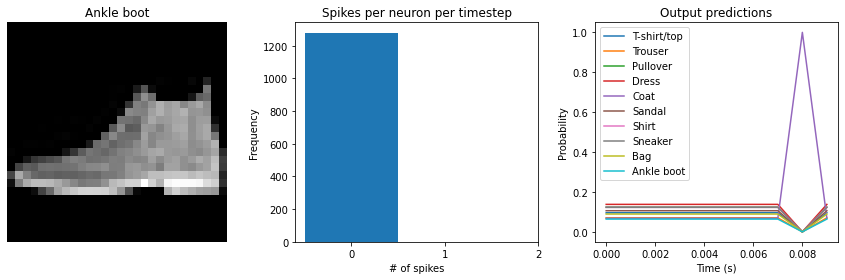

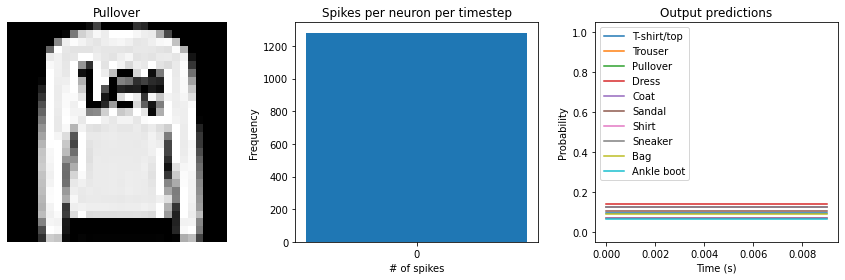

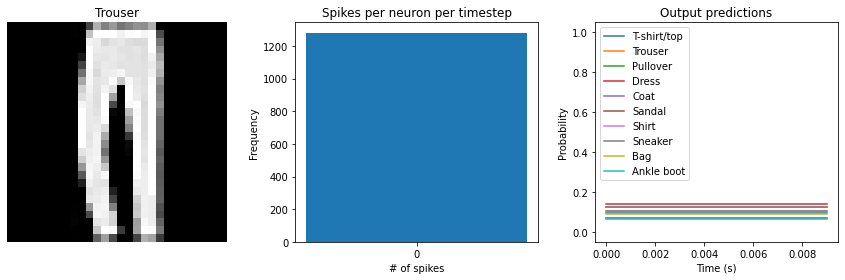

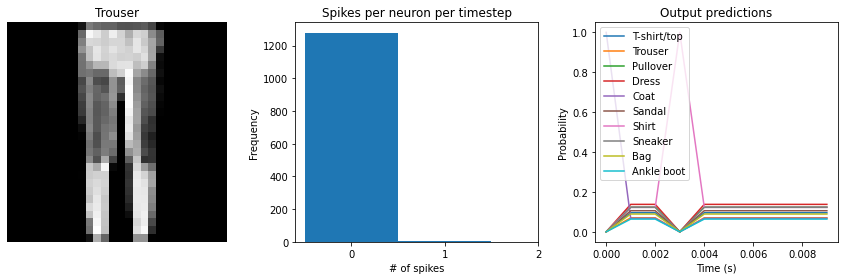

In [7]:
check_output(spiking_model)

We can see an immediate problem: the neurons are hardly spiking at all. The mean number
of spikes we're getting out of each neuron in our SpikingActivation layer is much less
than one, and as a result the output is mostly flat.

To help understand why, we need to think more about the temporal nature of spiking
neurons. Recall that the layer is set up such that if the base activation function were
to be outputting a value of 1, the spiking equivalent would be spiking at 1Hz (i.e.,
emitting one spike per second). In the above example we are simulating for 10 timesteps,
with the default `dt` of 0.001s, so we're simulating a total of 0.01s. If our neurons
aren't spiking very rapidly, and we're only simulating for 0.01s, then it's not
surprising that we aren't getting any spikes in that time window.

We can increase the value of `dt`, effectively running the spiking neurons for longer,
in order to get a more accurate measure of the neuron's output. Basically this allows us
to collect more spikes from each neuron, giving us a better estimate of the neuron's
actual spike rate. We can see how the number of spikes and accuracy change as we
increase `dt`:

Test accuracy: 65.35%
Spike rate per neuron (Hz): min=0.00 mean=0.55 max=20.00


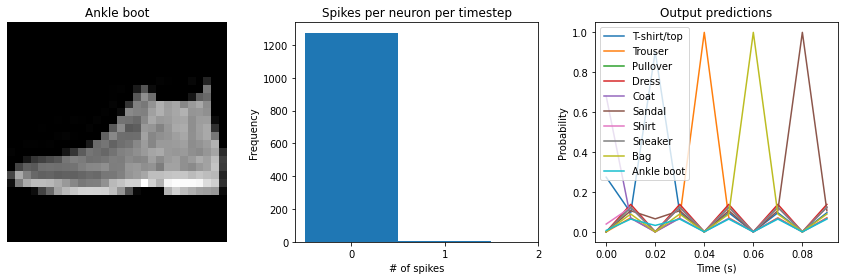

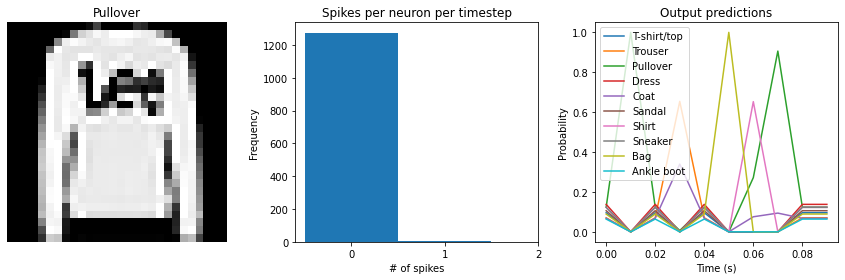

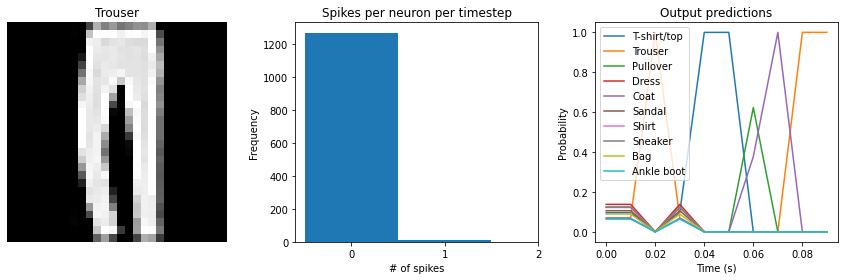

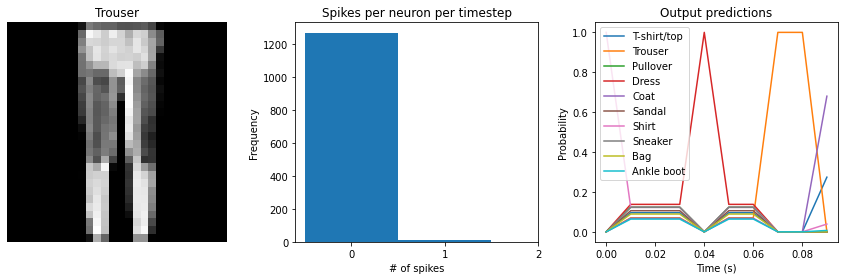

In [8]:
# dt=0.01 * 10 timesteps is equivalent to 0.1s of simulated time
check_output(spiking_model, modify_dt=0.01)

Test accuracy: 88.18%
Spike rate per neuron (Hz): min=0.00 mean=0.55 max=16.00


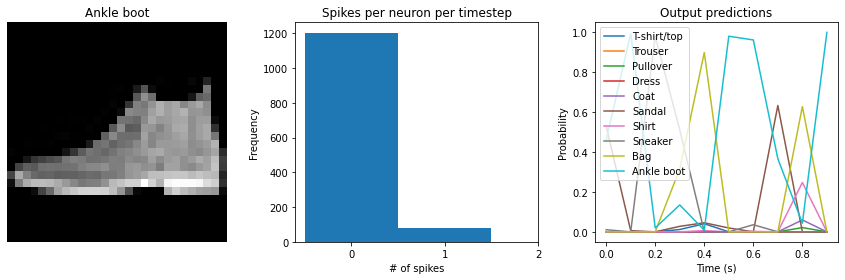

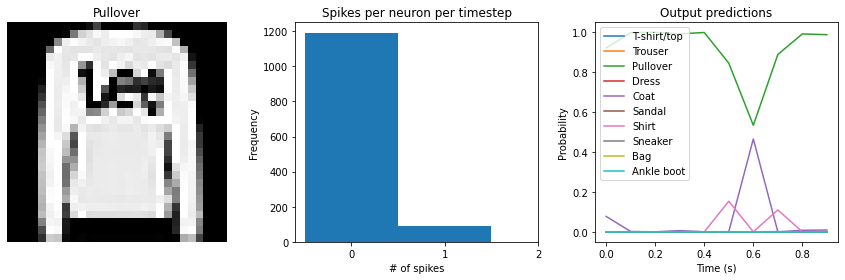

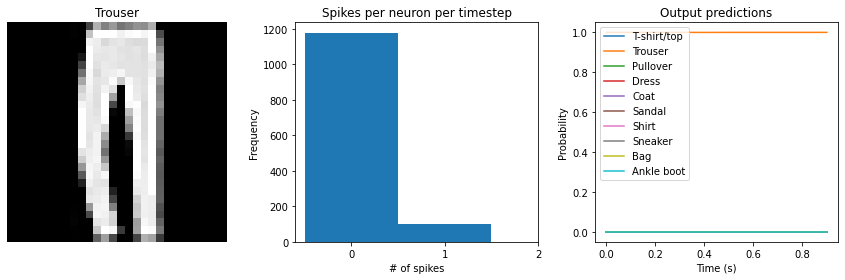

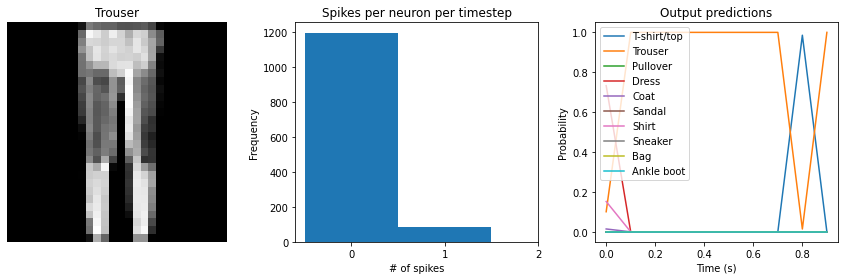

In [9]:
check_output(spiking_model, modify_dt=0.1)

Test accuracy: 88.39%
Spike rate per neuron (Hz): min=0.00 mean=0.55 max=15.80


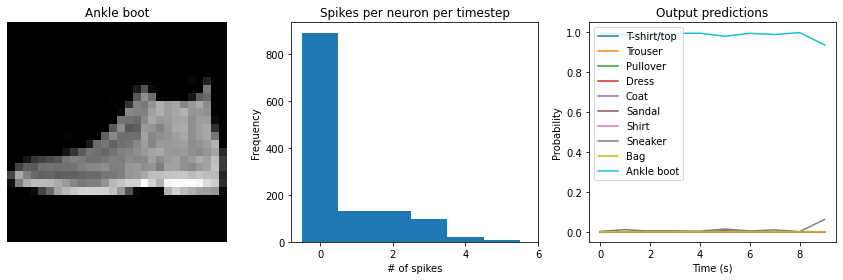

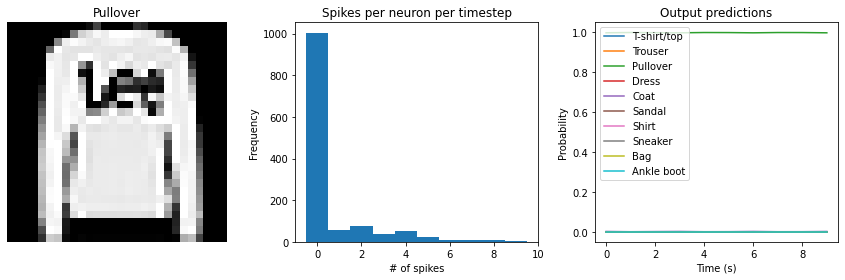

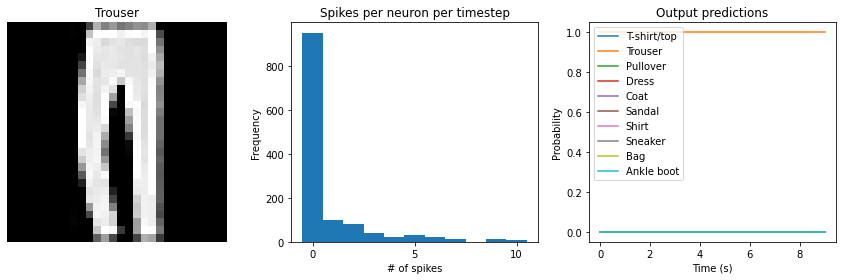

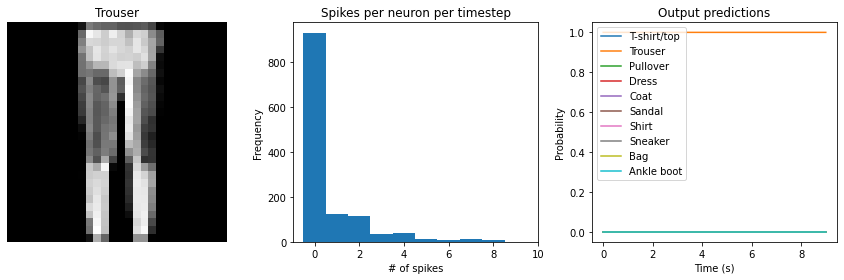

In [10]:
check_output(spiking_model, modify_dt=1)

We can see that as we increase `dt` the performance of the spiking model increasingly
approaches the non-spiking performance. In addition, as `dt` increases, the number of
spikes is increasing. To understand why this improves accuracy, keep in mind that
although the simulated time is increasing, the actual number of timesteps is still 10 in
all cases. We're effectively binning all the spikes that occur on each time step. So as
our bin sizes get larger (increasing `dt`), the spike counts will more closely
approximate the "true" output of the underlying non-spiking activation function.

One might be tempted to simply increase `dt` to a very large value, and thereby always
get great performance. But keep in mind that when we do that we have likely lost any of
the advantages that were motivating us to investigate spiking models in the first place.
For example, one prominent advantage of spiking models is temporal sparsity (we only
need to communicate occasional spikes, rather than continuous values). However, with
large `dt` the neurons are likely spiking every simulation time step (or multiple times
per timestep), so the activity is no longer temporally sparse.

Thus setting `dt` represents a trade-off between accuracy and temporal sparsity.
Choosing the appropriate value will depend on the demands of your application.

In some cases it can be useful to modify `dt` over the course of training. For example,
we could start with a large `dt` and then gradually decrease it over time. See
`keras_spiking.callbacks.DtScheduler` for more details.

## Spiking aware training

As mentioned above, by default SpikingActivation layers will use the non-spiking
activation function during training and the spiking version during inference. However,
similar to the idea of
[quantization aware
training](https://www.tensorflow.org/model_optimization/guide/quantization/training),
often we can improve performance by partially incorporating spiking behaviour during
training. Specifically, we will use the spiking activation on the forward pass, while
still using the non-spiking version on the backwards pass. This allows the model to
learn weights that account for the discrete, temporal nature of the spiking activities.

In [11]:
spikeaware_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # set spiking_aware training and a moderate dt
        keras_spiking.SpikingActivation("relu", dt=0.01, spiking_aware_training=True),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(spikeaware_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 20:50 - loss: 3.7530 - accuracy: 0.0938

  12/1875 [..............................] - ETA: 8s - loss: 3.1008 - accuracy: 0.2031   

  23/1875 [..............................] - ETA: 8s - loss: 3.0391 - accuracy: 0.2296

  34/1875 [..............................] - ETA: 8s - loss: 2.9381 - accuracy: 0.2767

  45/1875 [..............................] - ETA: 8s - loss: 2.9122 - accuracy: 0.2986

  56/1875 [..............................] - ETA: 8s - loss: 2.8503 - accuracy: 0.3253

  65/1875 [>.............................] - ETA: 8s - loss: 2.8093 - accuracy: 0.3471

  76/1875 [>.............................] - ETA: 8s - loss: 2.7955 - accuracy: 0.3590

  87/1875 [>.............................] - ETA: 8s - loss: 2.7517 - accuracy: 0.3746

  98/1875 [>.............................] - ETA: 8s - loss: 2.7187 - accuracy: 0.3852

 109/1875 [>.............................] - ETA: 8s - loss: 2.6950 - accuracy: 0.3974

 120/1875 [>.............................] - ETA: 8s - loss: 2.6366 - accuracy: 0.4109

 132/1875 [=>............................] - ETA: 8s - loss: 2.5755 - accuracy: 0.4268

 143/1875 [=>............................] - ETA: 8s - loss: 2.5340 - accuracy: 0.4368

 154/1875 [=>............................] - ETA: 8s - loss: 2.4881 - accuracy: 0.4460

 165/1875 [=>............................] - ETA: 8s - loss: 2.4557 - accuracy: 0.4527

 176/1875 [=>............................] - ETA: 8s - loss: 2.4169 - accuracy: 0.4609

 187/1875 [=>............................] - ETA: 8s - loss: 2.4054 - accuracy: 0.4654

 199/1875 [==>...........................] - ETA: 7s - loss: 2.3676 - accuracy: 0.4731

 210/1875 [==>...........................] - ETA: 7s - loss: 2.3503 - accuracy: 0.4789

 221/1875 [==>...........................] - ETA: 7s - loss: 2.3127 - accuracy: 0.4866

 232/1875 [==>...........................] - ETA: 7s - loss: 2.2988 - accuracy: 0.4911

 243/1875 [==>...........................] - ETA: 7s - loss: 2.2716 - accuracy: 0.4960

 254/1875 [===>..........................] - ETA: 7s - loss: 2.2385 - accuracy: 0.5031

 266/1875 [===>..........................] - ETA: 7s - loss: 2.2125 - accuracy: 0.5068

 277/1875 [===>..........................] - ETA: 7s - loss: 2.2030 - accuracy: 0.5099

 288/1875 [===>..........................] - ETA: 7s - loss: 2.1732 - accuracy: 0.5153

 299/1875 [===>..........................] - ETA: 7s - loss: 2.1496 - accuracy: 0.5203

 310/1875 [===>..........................] - ETA: 7s - loss: 2.1203 - accuracy: 0.5248

 321/1875 [====>.........................] - ETA: 7s - loss: 2.1046 - accuracy: 0.5280

 331/1875 [====>.........................] - ETA: 7s - loss: 2.0894 - accuracy: 0.5304

 342/1875 [====>.........................] - ETA: 7s - loss: 2.0663 - accuracy: 0.5334

 352/1875 [====>.........................] - ETA: 7s - loss: 2.0419 - accuracy: 0.5373

 363/1875 [====>.........................] - ETA: 7s - loss: 2.0195 - accuracy: 0.5406

 374/1875 [====>.........................] - ETA: 7s - loss: 2.0017 - accuracy: 0.5430

 385/1875 [=====>........................] - ETA: 7s - loss: 1.9869 - accuracy: 0.5455

 396/1875 [=====>........................] - ETA: 7s - loss: 1.9648 - accuracy: 0.5492

 408/1875 [=====>........................] - ETA: 6s - loss: 1.9481 - accuracy: 0.5523

 419/1875 [=====>........................] - ETA: 6s - loss: 1.9309 - accuracy: 0.5550

 430/1875 [=====>........................] - ETA: 6s - loss: 1.9166 - accuracy: 0.5576

 441/1875 [======>.......................] - ETA: 6s - loss: 1.9062 - accuracy: 0.5598

 452/1875 [======>.......................] - ETA: 6s - loss: 1.8884 - accuracy: 0.5622

 463/1875 [======>.......................] - ETA: 6s - loss: 1.8732 - accuracy: 0.5643

 474/1875 [======>.......................] - ETA: 6s - loss: 1.8564 - accuracy: 0.5666

 485/1875 [======>.......................] - ETA: 6s - loss: 1.8414 - accuracy: 0.5689

 496/1875 [======>.......................] - ETA: 6s - loss: 1.8276 - accuracy: 0.5711

 507/1875 [=======>......................] - ETA: 6s - loss: 1.8198 - accuracy: 0.5719

 518/1875 [=======>......................] - ETA: 6s - loss: 1.8069 - accuracy: 0.5738

 530/1875 [=======>......................] - ETA: 6s - loss: 1.7909 - accuracy: 0.5762

 541/1875 [=======>......................] - ETA: 6s - loss: 1.7737 - accuracy: 0.5787

 552/1875 [=======>......................] - ETA: 6s - loss: 1.7623 - accuracy: 0.5812

 563/1875 [========>.....................] - ETA: 6s - loss: 1.7495 - accuracy: 0.5826

 574/1875 [========>.....................] - ETA: 6s - loss: 1.7361 - accuracy: 0.5843

 585/1875 [========>.....................] - ETA: 6s - loss: 1.7283 - accuracy: 0.5852

 595/1875 [========>.....................] - ETA: 6s - loss: 1.7207 - accuracy: 0.5863

 606/1875 [========>.....................] - ETA: 6s - loss: 1.7082 - accuracy: 0.5881

 617/1875 [========>.....................] - ETA: 5s - loss: 1.6952 - accuracy: 0.5899

 628/1875 [=========>....................] - ETA: 5s - loss: 1.6851 - accuracy: 0.5909

 639/1875 [=========>....................] - ETA: 5s - loss: 1.6740 - accuracy: 0.5927

 650/1875 [=========>....................] - ETA: 5s - loss: 1.6641 - accuracy: 0.5939

 660/1875 [=========>....................] - ETA: 5s - loss: 1.6537 - accuracy: 0.5956

 671/1875 [=========>....................] - ETA: 5s - loss: 1.6455 - accuracy: 0.5967

 682/1875 [=========>....................] - ETA: 5s - loss: 1.6351 - accuracy: 0.5979

 693/1875 [==========>...................] - ETA: 5s - loss: 1.6250 - accuracy: 0.5992

 704/1875 [==========>...................] - ETA: 5s - loss: 1.6167 - accuracy: 0.6001

 715/1875 [==========>...................] - ETA: 5s - loss: 1.6056 - accuracy: 0.6015

 726/1875 [==========>...................] - ETA: 5s - loss: 1.5967 - accuracy: 0.6027

 735/1875 [==========>...................] - ETA: 5s - loss: 1.5913 - accuracy: 0.6029

 745/1875 [==========>...................] - ETA: 5s - loss: 1.5835 - accuracy: 0.6039

 756/1875 [===========>..................] - ETA: 5s - loss: 1.5763 - accuracy: 0.6051

 767/1875 [===========>..................] - ETA: 5s - loss: 1.5651 - accuracy: 0.6066

 778/1875 [===========>..................] - ETA: 5s - loss: 1.5550 - accuracy: 0.6084

 789/1875 [===========>..................] - ETA: 5s - loss: 1.5494 - accuracy: 0.6090

 800/1875 [===========>..................] - ETA: 5s - loss: 1.5408 - accuracy: 0.6100

 811/1875 [===========>..................] - ETA: 5s - loss: 1.5314 - accuracy: 0.6114

 822/1875 [============>.................] - ETA: 4s - loss: 1.5240 - accuracy: 0.6125

 833/1875 [============>.................] - ETA: 4s - loss: 1.5160 - accuracy: 0.6135

 844/1875 [============>.................] - ETA: 4s - loss: 1.5076 - accuracy: 0.6147

 855/1875 [============>.................] - ETA: 4s - loss: 1.4999 - accuracy: 0.6153

 863/1875 [============>.................] - ETA: 4s - loss: 1.4938 - accuracy: 0.6161

 874/1875 [============>.................] - ETA: 4s - loss: 1.4856 - accuracy: 0.6172

 885/1875 [=============>................] - ETA: 4s - loss: 1.4770 - accuracy: 0.6186

 896/1875 [=============>................] - ETA: 4s - loss: 1.4699 - accuracy: 0.6197

 907/1875 [=============>................] - ETA: 4s - loss: 1.4634 - accuracy: 0.6204

 918/1875 [=============>................] - ETA: 4s - loss: 1.4574 - accuracy: 0.6212

 929/1875 [=============>................] - ETA: 4s - loss: 1.4477 - accuracy: 0.6228

 940/1875 [==============>...............] - ETA: 4s - loss: 1.4410 - accuracy: 0.6236

 951/1875 [==============>...............] - ETA: 4s - loss: 1.4339 - accuracy: 0.6245

 962/1875 [==============>...............] - ETA: 4s - loss: 1.4283 - accuracy: 0.6256

 973/1875 [==============>...............] - ETA: 4s - loss: 1.4214 - accuracy: 0.6264

 984/1875 [==============>...............] - ETA: 4s - loss: 1.4149 - accuracy: 0.6271

 995/1875 [==============>...............] - ETA: 4s - loss: 1.4094 - accuracy: 0.6280

1006/1875 [===============>..............] - ETA: 4s - loss: 1.4026 - accuracy: 0.6289

1017/1875 [===============>..............] - ETA: 4s - loss: 1.3956 - accuracy: 0.6299

1028/1875 [===============>..............] - ETA: 4s - loss: 1.3903 - accuracy: 0.6308

1039/1875 [===============>..............] - ETA: 3s - loss: 1.3836 - accuracy: 0.6320

1050/1875 [===============>..............] - ETA: 3s - loss: 1.3772 - accuracy: 0.6328

1061/1875 [===============>..............] - ETA: 3s - loss: 1.3711 - accuracy: 0.6337

1072/1875 [================>.............] - ETA: 3s - loss: 1.3647 - accuracy: 0.6347

1083/1875 [================>.............] - ETA: 3s - loss: 1.3580 - accuracy: 0.6358

1093/1875 [================>.............] - ETA: 3s - loss: 1.3539 - accuracy: 0.6361

1103/1875 [================>.............] - ETA: 3s - loss: 1.3489 - accuracy: 0.6368

1114/1875 [================>.............] - ETA: 3s - loss: 1.3426 - accuracy: 0.6378

1125/1875 [=================>............] - ETA: 3s - loss: 1.3373 - accuracy: 0.6386

1136/1875 [=================>............] - ETA: 3s - loss: 1.3322 - accuracy: 0.6396

1147/1875 [=================>............] - ETA: 3s - loss: 1.3267 - accuracy: 0.6403

1158/1875 [=================>............] - ETA: 3s - loss: 1.3207 - accuracy: 0.6410

1169/1875 [=================>............] - ETA: 3s - loss: 1.3157 - accuracy: 0.6415

1180/1875 [=================>............] - ETA: 3s - loss: 1.3122 - accuracy: 0.6421

1191/1875 [==================>...........] - ETA: 3s - loss: 1.3078 - accuracy: 0.6427

1202/1875 [==================>...........] - ETA: 3s - loss: 1.3030 - accuracy: 0.6437

1213/1875 [==================>...........] - ETA: 3s - loss: 1.2978 - accuracy: 0.6445

1224/1875 [==================>...........] - ETA: 3s - loss: 1.2916 - accuracy: 0.6455

1235/1875 [==================>...........] - ETA: 3s - loss: 1.2867 - accuracy: 0.6464

1245/1875 [==================>...........] - ETA: 2s - loss: 1.2836 - accuracy: 0.6469

1256/1875 [===================>..........] - ETA: 2s - loss: 1.2790 - accuracy: 0.6475

1267/1875 [===================>..........] - ETA: 2s - loss: 1.2756 - accuracy: 0.6481

1278/1875 [===================>..........] - ETA: 2s - loss: 1.2707 - accuracy: 0.6490

1289/1875 [===================>..........] - ETA: 2s - loss: 1.2666 - accuracy: 0.6496

1300/1875 [===================>..........] - ETA: 2s - loss: 1.2614 - accuracy: 0.6504

1311/1875 [===================>..........] - ETA: 2s - loss: 1.2564 - accuracy: 0.6513

1322/1875 [====================>.........] - ETA: 2s - loss: 1.2519 - accuracy: 0.6519

1333/1875 [====================>.........] - ETA: 2s - loss: 1.2479 - accuracy: 0.6524

1344/1875 [====================>.........] - ETA: 2s - loss: 1.2440 - accuracy: 0.6532

1355/1875 [====================>.........] - ETA: 2s - loss: 1.2395 - accuracy: 0.6539

1366/1875 [====================>.........] - ETA: 2s - loss: 1.2348 - accuracy: 0.6547

1377/1875 [=====================>........] - ETA: 2s - loss: 1.2310 - accuracy: 0.6553

1388/1875 [=====================>........] - ETA: 2s - loss: 1.2267 - accuracy: 0.6560

1399/1875 [=====================>........] - ETA: 2s - loss: 1.2234 - accuracy: 0.6562

1410/1875 [=====================>........] - ETA: 2s - loss: 1.2194 - accuracy: 0.6566

1421/1875 [=====================>........] - ETA: 2s - loss: 1.2163 - accuracy: 0.6573

1432/1875 [=====================>........] - ETA: 2s - loss: 1.2132 - accuracy: 0.6575

1443/1875 [======================>.......] - ETA: 2s - loss: 1.2083 - accuracy: 0.6584

1454/1875 [======================>.......] - ETA: 1s - loss: 1.2044 - accuracy: 0.6589

1464/1875 [======================>.......] - ETA: 1s - loss: 1.2026 - accuracy: 0.6588

1475/1875 [======================>.......] - ETA: 1s - loss: 1.1999 - accuracy: 0.6593

1486/1875 [======================>.......] - ETA: 1s - loss: 1.1965 - accuracy: 0.6598

1497/1875 [======================>.......] - ETA: 1s - loss: 1.1919 - accuracy: 0.6607

1508/1875 [=======================>......] - ETA: 1s - loss: 1.1882 - accuracy: 0.6615

1519/1875 [=======================>......] - ETA: 1s - loss: 1.1848 - accuracy: 0.6620

1530/1875 [=======================>......] - ETA: 1s - loss: 1.1818 - accuracy: 0.6625

1541/1875 [=======================>......] - ETA: 1s - loss: 1.1789 - accuracy: 0.6629

1552/1875 [=======================>......] - ETA: 1s - loss: 1.1755 - accuracy: 0.6635

1563/1875 [========================>.....] - ETA: 1s - loss: 1.1716 - accuracy: 0.6641

1574/1875 [========================>.....] - ETA: 1s - loss: 1.1692 - accuracy: 0.6644

1586/1875 [========================>.....] - ETA: 1s - loss: 1.1665 - accuracy: 0.6646

1597/1875 [========================>.....] - ETA: 1s - loss: 1.1636 - accuracy: 0.6654

1608/1875 [========================>.....] - ETA: 1s - loss: 1.1604 - accuracy: 0.6659

1619/1875 [========================>.....] - ETA: 1s - loss: 1.1569 - accuracy: 0.6665

1630/1875 [=========================>....] - ETA: 1s - loss: 1.1548 - accuracy: 0.6669

1641/1875 [=========================>....] - ETA: 1s - loss: 1.1517 - accuracy: 0.6674

1653/1875 [=========================>....] - ETA: 1s - loss: 1.1483 - accuracy: 0.6680

1663/1875 [=========================>....] - ETA: 1s - loss: 1.1457 - accuracy: 0.6686

1674/1875 [=========================>....] - ETA: 0s - loss: 1.1435 - accuracy: 0.6688

1683/1875 [=========================>....] - ETA: 0s - loss: 1.1405 - accuracy: 0.6693

1694/1875 [==========================>...] - ETA: 0s - loss: 1.1379 - accuracy: 0.6696

1705/1875 [==========================>...] - ETA: 0s - loss: 1.1351 - accuracy: 0.6700

1715/1875 [==========================>...] - ETA: 0s - loss: 1.1324 - accuracy: 0.6705

1726/1875 [==========================>...] - ETA: 0s - loss: 1.1295 - accuracy: 0.6709

1737/1875 [==========================>...] - ETA: 0s - loss: 1.1270 - accuracy: 0.6712

1748/1875 [==========================>...] - ETA: 0s - loss: 1.1239 - accuracy: 0.6718

1759/1875 [===========================>..] - ETA: 0s - loss: 1.1218 - accuracy: 0.6720

1770/1875 [===========================>..] - ETA: 0s - loss: 1.1196 - accuracy: 0.6725

1781/1875 [===========================>..] - ETA: 0s - loss: 1.1161 - accuracy: 0.6734

1792/1875 [===========================>..] - ETA: 0s - loss: 1.1145 - accuracy: 0.6734

1802/1875 [===========================>..] - ETA: 0s - loss: 1.1117 - accuracy: 0.6741

1813/1875 [============================>.] - ETA: 0s - loss: 1.1092 - accuracy: 0.6748

1824/1875 [============================>.] - ETA: 0s - loss: 1.1066 - accuracy: 0.6752

1835/1875 [============================>.] - ETA: 0s - loss: 1.1033 - accuracy: 0.6758

1846/1875 [============================>.] - ETA: 0s - loss: 1.1004 - accuracy: 0.6764

1857/1875 [============================>.] - ETA: 0s - loss: 1.0987 - accuracy: 0.6767

1867/1875 [============================>.] - ETA: 0s - loss: 1.0975 - accuracy: 0.6770

1875/1875 [==============================] - 10s 5ms/step - loss: 1.0956 - accuracy: 0.6776


Epoch 2/10


   1/1875 [..............................] - ETA: 9s - loss: 0.3898 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 8s - loss: 0.7306 - accuracy: 0.7057

  23/1875 [..............................] - ETA: 8s - loss: 0.7227 - accuracy: 0.7242

  34/1875 [..............................] - ETA: 8s - loss: 0.7280 - accuracy: 0.7206

  45/1875 [..............................] - ETA: 8s - loss: 0.7304 - accuracy: 0.7278

  56/1875 [..............................] - ETA: 8s - loss: 0.7190 - accuracy: 0.7400

  67/1875 [>.............................] - ETA: 8s - loss: 0.6998 - accuracy: 0.7509

  78/1875 [>.............................] - ETA: 8s - loss: 0.6846 - accuracy: 0.7560

  90/1875 [>.............................] - ETA: 8s - loss: 0.6720 - accuracy: 0.7615

 101/1875 [>.............................] - ETA: 8s - loss: 0.6751 - accuracy: 0.7611

 112/1875 [>.............................] - ETA: 8s - loss: 0.6685 - accuracy: 0.7603

 123/1875 [>.............................] - ETA: 8s - loss: 0.6753 - accuracy: 0.7584

 135/1875 [=>............................] - ETA: 8s - loss: 0.6816 - accuracy: 0.7583

 146/1875 [=>............................] - ETA: 8s - loss: 0.6848 - accuracy: 0.7577

 157/1875 [=>............................] - ETA: 7s - loss: 0.6818 - accuracy: 0.7582

 168/1875 [=>............................] - ETA: 7s - loss: 0.6845 - accuracy: 0.7565

 179/1875 [=>............................] - ETA: 7s - loss: 0.6802 - accuracy: 0.7566

 190/1875 [==>...........................] - ETA: 7s - loss: 0.6797 - accuracy: 0.7549

 201/1875 [==>...........................] - ETA: 7s - loss: 0.6773 - accuracy: 0.7550

 211/1875 [==>...........................] - ETA: 7s - loss: 0.6779 - accuracy: 0.7564

 222/1875 [==>...........................] - ETA: 7s - loss: 0.6747 - accuracy: 0.7577

 233/1875 [==>...........................] - ETA: 7s - loss: 0.6744 - accuracy: 0.7586

 244/1875 [==>...........................] - ETA: 7s - loss: 0.6806 - accuracy: 0.7565

 255/1875 [===>..........................] - ETA: 7s - loss: 0.6786 - accuracy: 0.7570

 266/1875 [===>..........................] - ETA: 7s - loss: 0.6752 - accuracy: 0.7575

 277/1875 [===>..........................] - ETA: 7s - loss: 0.6748 - accuracy: 0.7586

 288/1875 [===>..........................] - ETA: 7s - loss: 0.6733 - accuracy: 0.7586

 299/1875 [===>..........................] - ETA: 7s - loss: 0.6772 - accuracy: 0.7555

 310/1875 [===>..........................] - ETA: 7s - loss: 0.6805 - accuracy: 0.7548

 321/1875 [====>.........................] - ETA: 7s - loss: 0.6781 - accuracy: 0.7560

 332/1875 [====>.........................] - ETA: 7s - loss: 0.6742 - accuracy: 0.7571

 344/1875 [====>.........................] - ETA: 7s - loss: 0.6727 - accuracy: 0.7578

 355/1875 [====>.........................] - ETA: 7s - loss: 0.6748 - accuracy: 0.7577

 366/1875 [====>.........................] - ETA: 7s - loss: 0.6748 - accuracy: 0.7573

 378/1875 [=====>........................] - ETA: 6s - loss: 0.6714 - accuracy: 0.7580

 389/1875 [=====>........................] - ETA: 6s - loss: 0.6716 - accuracy: 0.7581

 400/1875 [=====>........................] - ETA: 6s - loss: 0.6718 - accuracy: 0.7580

 412/1875 [=====>........................] - ETA: 6s - loss: 0.6697 - accuracy: 0.7583

 423/1875 [=====>........................] - ETA: 6s - loss: 0.6714 - accuracy: 0.7575

 434/1875 [=====>........................] - ETA: 6s - loss: 0.6693 - accuracy: 0.7582

 445/1875 [======>.......................] - ETA: 6s - loss: 0.6695 - accuracy: 0.7586

 456/1875 [======>.......................] - ETA: 6s - loss: 0.6688 - accuracy: 0.7590

 467/1875 [======>.......................] - ETA: 6s - loss: 0.6700 - accuracy: 0.7592

 478/1875 [======>.......................] - ETA: 6s - loss: 0.6698 - accuracy: 0.7588

 488/1875 [======>.......................] - ETA: 6s - loss: 0.6701 - accuracy: 0.7589

 499/1875 [======>.......................] - ETA: 6s - loss: 0.6696 - accuracy: 0.7585

 511/1875 [=======>......................] - ETA: 6s - loss: 0.6688 - accuracy: 0.7587

 523/1875 [=======>......................] - ETA: 6s - loss: 0.6680 - accuracy: 0.7594

 534/1875 [=======>......................] - ETA: 6s - loss: 0.6678 - accuracy: 0.7594

 545/1875 [=======>......................] - ETA: 6s - loss: 0.6682 - accuracy: 0.7589

 557/1875 [=======>......................] - ETA: 6s - loss: 0.6676 - accuracy: 0.7596

 568/1875 [========>.....................] - ETA: 6s - loss: 0.6683 - accuracy: 0.7593

 579/1875 [========>.....................] - ETA: 6s - loss: 0.6683 - accuracy: 0.7594

 591/1875 [========>.....................] - ETA: 5s - loss: 0.6680 - accuracy: 0.7599

 603/1875 [========>.....................] - ETA: 5s - loss: 0.6673 - accuracy: 0.7598

 614/1875 [========>.....................] - ETA: 5s - loss: 0.6657 - accuracy: 0.7603

 625/1875 [=========>....................] - ETA: 5s - loss: 0.6653 - accuracy: 0.7603

 636/1875 [=========>....................] - ETA: 5s - loss: 0.6652 - accuracy: 0.7604

 647/1875 [=========>....................] - ETA: 5s - loss: 0.6644 - accuracy: 0.7602

 658/1875 [=========>....................] - ETA: 5s - loss: 0.6633 - accuracy: 0.7604

 670/1875 [=========>....................] - ETA: 5s - loss: 0.6623 - accuracy: 0.7606

 681/1875 [=========>....................] - ETA: 5s - loss: 0.6607 - accuracy: 0.7615

 692/1875 [==========>...................] - ETA: 5s - loss: 0.6595 - accuracy: 0.7615

 703/1875 [==========>...................] - ETA: 5s - loss: 0.6580 - accuracy: 0.7619

 714/1875 [==========>...................] - ETA: 5s - loss: 0.6574 - accuracy: 0.7620

 725/1875 [==========>...................] - ETA: 5s - loss: 0.6573 - accuracy: 0.7623

 736/1875 [==========>...................] - ETA: 5s - loss: 0.6567 - accuracy: 0.7628

 745/1875 [==========>...................] - ETA: 5s - loss: 0.6568 - accuracy: 0.7629

 756/1875 [===========>..................] - ETA: 5s - loss: 0.6559 - accuracy: 0.7629

 767/1875 [===========>..................] - ETA: 5s - loss: 0.6556 - accuracy: 0.7623

 778/1875 [===========>..................] - ETA: 5s - loss: 0.6548 - accuracy: 0.7626

 789/1875 [===========>..................] - ETA: 5s - loss: 0.6548 - accuracy: 0.7626

 800/1875 [===========>..................] - ETA: 5s - loss: 0.6541 - accuracy: 0.7631

 811/1875 [===========>..................] - ETA: 4s - loss: 0.6543 - accuracy: 0.7631

 822/1875 [============>.................] - ETA: 4s - loss: 0.6544 - accuracy: 0.7634

 833/1875 [============>.................] - ETA: 4s - loss: 0.6552 - accuracy: 0.7632

 844/1875 [============>.................] - ETA: 4s - loss: 0.6560 - accuracy: 0.7631

 856/1875 [============>.................] - ETA: 4s - loss: 0.6565 - accuracy: 0.7629

 867/1875 [============>.................] - ETA: 4s - loss: 0.6551 - accuracy: 0.7634

 879/1875 [=============>................] - ETA: 4s - loss: 0.6545 - accuracy: 0.7634

 890/1875 [=============>................] - ETA: 4s - loss: 0.6536 - accuracy: 0.7638

 902/1875 [=============>................] - ETA: 4s - loss: 0.6520 - accuracy: 0.7642

 913/1875 [=============>................] - ETA: 4s - loss: 0.6513 - accuracy: 0.7646

 924/1875 [=============>................] - ETA: 4s - loss: 0.6509 - accuracy: 0.7651

 935/1875 [=============>................] - ETA: 4s - loss: 0.6507 - accuracy: 0.7654

 946/1875 [==============>...............] - ETA: 4s - loss: 0.6512 - accuracy: 0.7653

 956/1875 [==============>...............] - ETA: 4s - loss: 0.6500 - accuracy: 0.7656

 967/1875 [==============>...............] - ETA: 4s - loss: 0.6505 - accuracy: 0.7654

 978/1875 [==============>...............] - ETA: 4s - loss: 0.6508 - accuracy: 0.7657

 989/1875 [==============>...............] - ETA: 4s - loss: 0.6500 - accuracy: 0.7656

1000/1875 [===============>..............] - ETA: 4s - loss: 0.6496 - accuracy: 0.7658

1011/1875 [===============>..............] - ETA: 4s - loss: 0.6492 - accuracy: 0.7658

1022/1875 [===============>..............] - ETA: 3s - loss: 0.6489 - accuracy: 0.7657

1033/1875 [===============>..............] - ETA: 3s - loss: 0.6484 - accuracy: 0.7662

1044/1875 [===============>..............] - ETA: 3s - loss: 0.6481 - accuracy: 0.7663

1055/1875 [===============>..............] - ETA: 3s - loss: 0.6479 - accuracy: 0.7665

1066/1875 [================>.............] - ETA: 3s - loss: 0.6480 - accuracy: 0.7664

1077/1875 [================>.............] - ETA: 3s - loss: 0.6474 - accuracy: 0.7666

1088/1875 [================>.............] - ETA: 3s - loss: 0.6470 - accuracy: 0.7667

1098/1875 [================>.............] - ETA: 3s - loss: 0.6473 - accuracy: 0.7669

1109/1875 [================>.............] - ETA: 3s - loss: 0.6468 - accuracy: 0.7668

1120/1875 [================>.............] - ETA: 3s - loss: 0.6467 - accuracy: 0.7668

1131/1875 [=================>............] - ETA: 3s - loss: 0.6463 - accuracy: 0.7669

1142/1875 [=================>............] - ETA: 3s - loss: 0.6464 - accuracy: 0.7671

1153/1875 [=================>............] - ETA: 3s - loss: 0.6464 - accuracy: 0.7672

1164/1875 [=================>............] - ETA: 3s - loss: 0.6466 - accuracy: 0.7672

1176/1875 [=================>............] - ETA: 3s - loss: 0.6458 - accuracy: 0.7673

1187/1875 [=================>............] - ETA: 3s - loss: 0.6461 - accuracy: 0.7673

1199/1875 [==================>...........] - ETA: 3s - loss: 0.6456 - accuracy: 0.7673

1210/1875 [==================>...........] - ETA: 3s - loss: 0.6449 - accuracy: 0.7676

1221/1875 [==================>...........] - ETA: 3s - loss: 0.6440 - accuracy: 0.7680

1232/1875 [==================>...........] - ETA: 3s - loss: 0.6434 - accuracy: 0.7680

1242/1875 [==================>...........] - ETA: 2s - loss: 0.6433 - accuracy: 0.7683

1253/1875 [===================>..........] - ETA: 2s - loss: 0.6428 - accuracy: 0.7685

1264/1875 [===================>..........] - ETA: 2s - loss: 0.6418 - accuracy: 0.7687

1276/1875 [===================>..........] - ETA: 2s - loss: 0.6413 - accuracy: 0.7687

1287/1875 [===================>..........] - ETA: 2s - loss: 0.6416 - accuracy: 0.7689

1298/1875 [===================>..........] - ETA: 2s - loss: 0.6414 - accuracy: 0.7690

1309/1875 [===================>..........] - ETA: 2s - loss: 0.6410 - accuracy: 0.7694

1320/1875 [====================>.........] - ETA: 2s - loss: 0.6414 - accuracy: 0.7695

1332/1875 [====================>.........] - ETA: 2s - loss: 0.6416 - accuracy: 0.7695

1343/1875 [====================>.........] - ETA: 2s - loss: 0.6418 - accuracy: 0.7693

1354/1875 [====================>.........] - ETA: 2s - loss: 0.6413 - accuracy: 0.7695

1365/1875 [====================>.........] - ETA: 2s - loss: 0.6412 - accuracy: 0.7695

1377/1875 [=====================>........] - ETA: 2s - loss: 0.6411 - accuracy: 0.7696

1388/1875 [=====================>........] - ETA: 2s - loss: 0.6407 - accuracy: 0.7696

1399/1875 [=====================>........] - ETA: 2s - loss: 0.6404 - accuracy: 0.7697

1409/1875 [=====================>........] - ETA: 2s - loss: 0.6401 - accuracy: 0.7699

1419/1875 [=====================>........] - ETA: 2s - loss: 0.6389 - accuracy: 0.7702

1427/1875 [=====================>........] - ETA: 2s - loss: 0.6383 - accuracy: 0.7704

1438/1875 [======================>.......] - ETA: 2s - loss: 0.6373 - accuracy: 0.7708

1450/1875 [======================>.......] - ETA: 1s - loss: 0.6373 - accuracy: 0.7708

1461/1875 [======================>.......] - ETA: 1s - loss: 0.6372 - accuracy: 0.7709

1472/1875 [======================>.......] - ETA: 1s - loss: 0.6373 - accuracy: 0.7708

1482/1875 [======================>.......] - ETA: 1s - loss: 0.6369 - accuracy: 0.7710

1492/1875 [======================>.......] - ETA: 1s - loss: 0.6366 - accuracy: 0.7712

1502/1875 [=======================>......] - ETA: 1s - loss: 0.6370 - accuracy: 0.7711

1511/1875 [=======================>......] - ETA: 1s - loss: 0.6367 - accuracy: 0.7712

1521/1875 [=======================>......] - ETA: 1s - loss: 0.6360 - accuracy: 0.7715

1532/1875 [=======================>......] - ETA: 1s - loss: 0.6362 - accuracy: 0.7717

1543/1875 [=======================>......] - ETA: 1s - loss: 0.6370 - accuracy: 0.7715

1554/1875 [=======================>......] - ETA: 1s - loss: 0.6360 - accuracy: 0.7718

1566/1875 [========================>.....] - ETA: 1s - loss: 0.6352 - accuracy: 0.7720

1577/1875 [========================>.....] - ETA: 1s - loss: 0.6352 - accuracy: 0.7721

1588/1875 [========================>.....] - ETA: 1s - loss: 0.6345 - accuracy: 0.7723

1596/1875 [========================>.....] - ETA: 1s - loss: 0.6341 - accuracy: 0.7724

1607/1875 [========================>.....] - ETA: 1s - loss: 0.6334 - accuracy: 0.7725

1617/1875 [========================>.....] - ETA: 1s - loss: 0.6332 - accuracy: 0.7726

1628/1875 [=========================>....] - ETA: 1s - loss: 0.6332 - accuracy: 0.7727

1639/1875 [=========================>....] - ETA: 1s - loss: 0.6327 - accuracy: 0.7728

1650/1875 [=========================>....] - ETA: 1s - loss: 0.6326 - accuracy: 0.7728

1661/1875 [=========================>....] - ETA: 1s - loss: 0.6317 - accuracy: 0.7731

1672/1875 [=========================>....] - ETA: 0s - loss: 0.6312 - accuracy: 0.7732

1683/1875 [=========================>....] - ETA: 0s - loss: 0.6315 - accuracy: 0.7732

1695/1875 [==========================>...] - ETA: 0s - loss: 0.6313 - accuracy: 0.7733

1706/1875 [==========================>...] - ETA: 0s - loss: 0.6312 - accuracy: 0.7735

1717/1875 [==========================>...] - ETA: 0s - loss: 0.6306 - accuracy: 0.7737

1728/1875 [==========================>...] - ETA: 0s - loss: 0.6302 - accuracy: 0.7737

1739/1875 [==========================>...] - ETA: 0s - loss: 0.6301 - accuracy: 0.7736

1751/1875 [===========================>..] - ETA: 0s - loss: 0.6298 - accuracy: 0.7739

1762/1875 [===========================>..] - ETA: 0s - loss: 0.6297 - accuracy: 0.7740

1773/1875 [===========================>..] - ETA: 0s - loss: 0.6295 - accuracy: 0.7741

1784/1875 [===========================>..] - ETA: 0s - loss: 0.6294 - accuracy: 0.7741

1795/1875 [===========================>..] - ETA: 0s - loss: 0.6292 - accuracy: 0.7740

1806/1875 [===========================>..] - ETA: 0s - loss: 0.6293 - accuracy: 0.7740

1817/1875 [============================>.] - ETA: 0s - loss: 0.6292 - accuracy: 0.7740

1828/1875 [============================>.] - ETA: 0s - loss: 0.6286 - accuracy: 0.7741

1839/1875 [============================>.] - ETA: 0s - loss: 0.6281 - accuracy: 0.7745

1850/1875 [============================>.] - ETA: 0s - loss: 0.6276 - accuracy: 0.7746

1862/1875 [============================>.] - ETA: 0s - loss: 0.6274 - accuracy: 0.7747

1873/1875 [============================>.] - ETA: 0s - loss: 0.6273 - accuracy: 0.7745

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6272 - accuracy: 0.7746


Epoch 3/10


   1/1875 [..............................] - ETA: 10s - loss: 0.5709 - accuracy: 0.8438

  13/1875 [..............................] - ETA: 8s - loss: 0.5591 - accuracy: 0.8005 

  25/1875 [..............................] - ETA: 8s - loss: 0.5635 - accuracy: 0.8200

  37/1875 [..............................] - ETA: 8s - loss: 0.5635 - accuracy: 0.8083

  48/1875 [..............................] - ETA: 8s - loss: 0.5541 - accuracy: 0.8099

  60/1875 [..............................] - ETA: 8s - loss: 0.5913 - accuracy: 0.7974

  72/1875 [>.............................] - ETA: 8s - loss: 0.5824 - accuracy: 0.7964

  79/1875 [>.............................] - ETA: 8s - loss: 0.5873 - accuracy: 0.7951

  90/1875 [>.............................] - ETA: 8s - loss: 0.5808 - accuracy: 0.7972

 101/1875 [>.............................] - ETA: 8s - loss: 0.5808 - accuracy: 0.7973

 113/1875 [>.............................] - ETA: 8s - loss: 0.5805 - accuracy: 0.7987

 124/1875 [>.............................] - ETA: 8s - loss: 0.5870 - accuracy: 0.7956

 135/1875 [=>............................] - ETA: 8s - loss: 0.5847 - accuracy: 0.7956

 145/1875 [=>............................] - ETA: 8s - loss: 0.5792 - accuracy: 0.7970

 154/1875 [=>............................] - ETA: 8s - loss: 0.5826 - accuracy: 0.7975

 166/1875 [=>............................] - ETA: 8s - loss: 0.5854 - accuracy: 0.7963

 176/1875 [=>............................] - ETA: 8s - loss: 0.5843 - accuracy: 0.7955

 188/1875 [==>...........................] - ETA: 8s - loss: 0.5893 - accuracy: 0.7945

 199/1875 [==>...........................] - ETA: 7s - loss: 0.5873 - accuracy: 0.7940

 210/1875 [==>...........................] - ETA: 7s - loss: 0.5863 - accuracy: 0.7937

 221/1875 [==>...........................] - ETA: 7s - loss: 0.5852 - accuracy: 0.7933

 232/1875 [==>...........................] - ETA: 7s - loss: 0.5816 - accuracy: 0.7938

 243/1875 [==>...........................] - ETA: 7s - loss: 0.5842 - accuracy: 0.7921

 254/1875 [===>..........................] - ETA: 7s - loss: 0.5857 - accuracy: 0.7910

 265/1875 [===>..........................] - ETA: 7s - loss: 0.5841 - accuracy: 0.7913

 276/1875 [===>..........................] - ETA: 7s - loss: 0.5869 - accuracy: 0.7902

 287/1875 [===>..........................] - ETA: 7s - loss: 0.5884 - accuracy: 0.7900

 299/1875 [===>..........................] - ETA: 7s - loss: 0.5879 - accuracy: 0.7903

 310/1875 [===>..........................] - ETA: 7s - loss: 0.5884 - accuracy: 0.7904

 322/1875 [====>.........................] - ETA: 7s - loss: 0.5904 - accuracy: 0.7902

 333/1875 [====>.........................] - ETA: 7s - loss: 0.5865 - accuracy: 0.7909

 344/1875 [====>.........................] - ETA: 7s - loss: 0.5886 - accuracy: 0.7900

 355/1875 [====>.........................] - ETA: 7s - loss: 0.5875 - accuracy: 0.7904

 366/1875 [====>.........................] - ETA: 7s - loss: 0.5865 - accuracy: 0.7901

 377/1875 [=====>........................] - ETA: 7s - loss: 0.5887 - accuracy: 0.7890

 388/1875 [=====>........................] - ETA: 7s - loss: 0.5878 - accuracy: 0.7892

 398/1875 [=====>........................] - ETA: 6s - loss: 0.5877 - accuracy: 0.7889

 409/1875 [=====>........................] - ETA: 6s - loss: 0.5881 - accuracy: 0.7891

 419/1875 [=====>........................] - ETA: 6s - loss: 0.5874 - accuracy: 0.7889

 430/1875 [=====>........................] - ETA: 6s - loss: 0.5850 - accuracy: 0.7898

 441/1875 [======>.......................] - ETA: 6s - loss: 0.5844 - accuracy: 0.7903

 452/1875 [======>.......................] - ETA: 6s - loss: 0.5825 - accuracy: 0.7909

 463/1875 [======>.......................] - ETA: 6s - loss: 0.5811 - accuracy: 0.7918

 474/1875 [======>.......................] - ETA: 6s - loss: 0.5790 - accuracy: 0.7924

 485/1875 [======>.......................] - ETA: 6s - loss: 0.5787 - accuracy: 0.7924

 496/1875 [======>.......................] - ETA: 6s - loss: 0.5776 - accuracy: 0.7922

 507/1875 [=======>......................] - ETA: 6s - loss: 0.5777 - accuracy: 0.7923

 518/1875 [=======>......................] - ETA: 6s - loss: 0.5765 - accuracy: 0.7927

 529/1875 [=======>......................] - ETA: 6s - loss: 0.5760 - accuracy: 0.7931

 540/1875 [=======>......................] - ETA: 6s - loss: 0.5756 - accuracy: 0.7934

 551/1875 [=======>......................] - ETA: 6s - loss: 0.5755 - accuracy: 0.7935

 562/1875 [=======>......................] - ETA: 6s - loss: 0.5763 - accuracy: 0.7929

 574/1875 [========>.....................] - ETA: 6s - loss: 0.5758 - accuracy: 0.7933

 585/1875 [========>.....................] - ETA: 6s - loss: 0.5763 - accuracy: 0.7933

 596/1875 [========>.....................] - ETA: 6s - loss: 0.5758 - accuracy: 0.7933

 607/1875 [========>.....................] - ETA: 5s - loss: 0.5754 - accuracy: 0.7933

 618/1875 [========>.....................] - ETA: 5s - loss: 0.5749 - accuracy: 0.7932

 629/1875 [=========>....................] - ETA: 5s - loss: 0.5742 - accuracy: 0.7931

 640/1875 [=========>....................] - ETA: 5s - loss: 0.5750 - accuracy: 0.7929

 651/1875 [=========>....................] - ETA: 5s - loss: 0.5738 - accuracy: 0.7932

 661/1875 [=========>....................] - ETA: 5s - loss: 0.5741 - accuracy: 0.7934

 672/1875 [=========>....................] - ETA: 5s - loss: 0.5738 - accuracy: 0.7939

 683/1875 [=========>....................] - ETA: 5s - loss: 0.5734 - accuracy: 0.7940

 694/1875 [==========>...................] - ETA: 5s - loss: 0.5774 - accuracy: 0.7930

 705/1875 [==========>...................] - ETA: 5s - loss: 0.5774 - accuracy: 0.7933

 716/1875 [==========>...................] - ETA: 5s - loss: 0.5767 - accuracy: 0.7936

 727/1875 [==========>...................] - ETA: 5s - loss: 0.5767 - accuracy: 0.7937

 738/1875 [==========>...................] - ETA: 5s - loss: 0.5770 - accuracy: 0.7934

 749/1875 [==========>...................] - ETA: 5s - loss: 0.5750 - accuracy: 0.7944

 761/1875 [===========>..................] - ETA: 5s - loss: 0.5747 - accuracy: 0.7948

 772/1875 [===========>..................] - ETA: 5s - loss: 0.5737 - accuracy: 0.7950

 783/1875 [===========>..................] - ETA: 5s - loss: 0.5728 - accuracy: 0.7954

 794/1875 [===========>..................] - ETA: 5s - loss: 0.5717 - accuracy: 0.7955

 805/1875 [===========>..................] - ETA: 5s - loss: 0.5709 - accuracy: 0.7957

 816/1875 [============>.................] - ETA: 5s - loss: 0.5709 - accuracy: 0.7956

 827/1875 [============>.................] - ETA: 4s - loss: 0.5719 - accuracy: 0.7955

 839/1875 [============>.................] - ETA: 4s - loss: 0.5736 - accuracy: 0.7952

 850/1875 [============>.................] - ETA: 4s - loss: 0.5721 - accuracy: 0.7956

 861/1875 [============>.................] - ETA: 4s - loss: 0.5714 - accuracy: 0.7958

 872/1875 [============>.................] - ETA: 4s - loss: 0.5701 - accuracy: 0.7961

 884/1875 [=============>................] - ETA: 4s - loss: 0.5696 - accuracy: 0.7964

 895/1875 [=============>................] - ETA: 4s - loss: 0.5689 - accuracy: 0.7964

 906/1875 [=============>................] - ETA: 4s - loss: 0.5692 - accuracy: 0.7965

 917/1875 [=============>................] - ETA: 4s - loss: 0.5696 - accuracy: 0.7963

 928/1875 [=============>................] - ETA: 4s - loss: 0.5690 - accuracy: 0.7965

 940/1875 [==============>...............] - ETA: 4s - loss: 0.5693 - accuracy: 0.7965

 951/1875 [==============>...............] - ETA: 4s - loss: 0.5696 - accuracy: 0.7966

 962/1875 [==============>...............] - ETA: 4s - loss: 0.5686 - accuracy: 0.7970

 973/1875 [==============>...............] - ETA: 4s - loss: 0.5677 - accuracy: 0.7970

 984/1875 [==============>...............] - ETA: 4s - loss: 0.5673 - accuracy: 0.7973

 995/1875 [==============>...............] - ETA: 4s - loss: 0.5673 - accuracy: 0.7976

1007/1875 [===============>..............] - ETA: 4s - loss: 0.5681 - accuracy: 0.7974

1018/1875 [===============>..............] - ETA: 4s - loss: 0.5668 - accuracy: 0.7979

1029/1875 [===============>..............] - ETA: 3s - loss: 0.5666 - accuracy: 0.7979

1041/1875 [===============>..............] - ETA: 3s - loss: 0.5672 - accuracy: 0.7976

1052/1875 [===============>..............] - ETA: 3s - loss: 0.5669 - accuracy: 0.7976

1064/1875 [================>.............] - ETA: 3s - loss: 0.5668 - accuracy: 0.7976

1076/1875 [================>.............] - ETA: 3s - loss: 0.5659 - accuracy: 0.7980

1087/1875 [================>.............] - ETA: 3s - loss: 0.5650 - accuracy: 0.7982

1098/1875 [================>.............] - ETA: 3s - loss: 0.5649 - accuracy: 0.7981

1109/1875 [================>.............] - ETA: 3s - loss: 0.5654 - accuracy: 0.7979

1120/1875 [================>.............] - ETA: 3s - loss: 0.5649 - accuracy: 0.7978

1131/1875 [=================>............] - ETA: 3s - loss: 0.5652 - accuracy: 0.7977

1142/1875 [=================>............] - ETA: 3s - loss: 0.5651 - accuracy: 0.7976

1153/1875 [=================>............] - ETA: 3s - loss: 0.5643 - accuracy: 0.7979

1163/1875 [=================>............] - ETA: 3s - loss: 0.5643 - accuracy: 0.7980

1174/1875 [=================>............] - ETA: 3s - loss: 0.5645 - accuracy: 0.7979

1186/1875 [=================>............] - ETA: 3s - loss: 0.5648 - accuracy: 0.7978

1197/1875 [==================>...........] - ETA: 3s - loss: 0.5648 - accuracy: 0.7979

1209/1875 [==================>...........] - ETA: 3s - loss: 0.5639 - accuracy: 0.7982

1220/1875 [==================>...........] - ETA: 3s - loss: 0.5630 - accuracy: 0.7985

1231/1875 [==================>...........] - ETA: 3s - loss: 0.5624 - accuracy: 0.7985

1242/1875 [==================>...........] - ETA: 2s - loss: 0.5624 - accuracy: 0.7987

1253/1875 [===================>..........] - ETA: 2s - loss: 0.5620 - accuracy: 0.7987

1264/1875 [===================>..........] - ETA: 2s - loss: 0.5625 - accuracy: 0.7985

1275/1875 [===================>..........] - ETA: 2s - loss: 0.5625 - accuracy: 0.7983

1286/1875 [===================>..........] - ETA: 2s - loss: 0.5617 - accuracy: 0.7987

1297/1875 [===================>..........] - ETA: 2s - loss: 0.5614 - accuracy: 0.7989

1309/1875 [===================>..........] - ETA: 2s - loss: 0.5601 - accuracy: 0.7994

1320/1875 [====================>.........] - ETA: 2s - loss: 0.5595 - accuracy: 0.7994

1331/1875 [====================>.........] - ETA: 2s - loss: 0.5592 - accuracy: 0.7995

1338/1875 [====================>.........] - ETA: 2s - loss: 0.5589 - accuracy: 0.7994

1349/1875 [====================>.........] - ETA: 2s - loss: 0.5601 - accuracy: 0.7990

1360/1875 [====================>.........] - ETA: 2s - loss: 0.5600 - accuracy: 0.7991

1371/1875 [====================>.........] - ETA: 2s - loss: 0.5603 - accuracy: 0.7987

1383/1875 [=====================>........] - ETA: 2s - loss: 0.5607 - accuracy: 0.7987

1394/1875 [=====================>........] - ETA: 2s - loss: 0.5606 - accuracy: 0.7984

1405/1875 [=====================>........] - ETA: 2s - loss: 0.5609 - accuracy: 0.7985

1417/1875 [=====================>........] - ETA: 2s - loss: 0.5608 - accuracy: 0.7987

1428/1875 [=====================>........] - ETA: 2s - loss: 0.5602 - accuracy: 0.7989

1440/1875 [======================>.......] - ETA: 2s - loss: 0.5599 - accuracy: 0.7991

1451/1875 [======================>.......] - ETA: 1s - loss: 0.5597 - accuracy: 0.7991

1462/1875 [======================>.......] - ETA: 1s - loss: 0.5592 - accuracy: 0.7994

1473/1875 [======================>.......] - ETA: 1s - loss: 0.5593 - accuracy: 0.7996

1484/1875 [======================>.......] - ETA: 1s - loss: 0.5595 - accuracy: 0.7994

1495/1875 [======================>.......] - ETA: 1s - loss: 0.5592 - accuracy: 0.7995

1506/1875 [=======================>......] - ETA: 1s - loss: 0.5589 - accuracy: 0.7997

1517/1875 [=======================>......] - ETA: 1s - loss: 0.5589 - accuracy: 0.7996

1529/1875 [=======================>......] - ETA: 1s - loss: 0.5586 - accuracy: 0.7997

1540/1875 [=======================>......] - ETA: 1s - loss: 0.5583 - accuracy: 0.7998

1552/1875 [=======================>......] - ETA: 1s - loss: 0.5582 - accuracy: 0.8000

1563/1875 [========================>.....] - ETA: 1s - loss: 0.5581 - accuracy: 0.8000

1574/1875 [========================>.....] - ETA: 1s - loss: 0.5583 - accuracy: 0.8001

1585/1875 [========================>.....] - ETA: 1s - loss: 0.5581 - accuracy: 0.8000

1595/1875 [========================>.....] - ETA: 1s - loss: 0.5577 - accuracy: 0.8000

1606/1875 [========================>.....] - ETA: 1s - loss: 0.5572 - accuracy: 0.8001

1617/1875 [========================>.....] - ETA: 1s - loss: 0.5579 - accuracy: 0.8000

1627/1875 [=========================>....] - ETA: 1s - loss: 0.5575 - accuracy: 0.8001

1639/1875 [=========================>....] - ETA: 1s - loss: 0.5577 - accuracy: 0.8001

1651/1875 [=========================>....] - ETA: 1s - loss: 0.5579 - accuracy: 0.8002

1662/1875 [=========================>....] - ETA: 1s - loss: 0.5575 - accuracy: 0.8002

1672/1875 [=========================>....] - ETA: 0s - loss: 0.5572 - accuracy: 0.8004

1683/1875 [=========================>....] - ETA: 0s - loss: 0.5570 - accuracy: 0.8004

1694/1875 [==========================>...] - ETA: 0s - loss: 0.5568 - accuracy: 0.8003

1705/1875 [==========================>...] - ETA: 0s - loss: 0.5562 - accuracy: 0.8005

1717/1875 [==========================>...] - ETA: 0s - loss: 0.5556 - accuracy: 0.8006

1728/1875 [==========================>...] - ETA: 0s - loss: 0.5553 - accuracy: 0.8007

1739/1875 [==========================>...] - ETA: 0s - loss: 0.5551 - accuracy: 0.8008

1750/1875 [===========================>..] - ETA: 0s - loss: 0.5551 - accuracy: 0.8008

1762/1875 [===========================>..] - ETA: 0s - loss: 0.5552 - accuracy: 0.8008

1773/1875 [===========================>..] - ETA: 0s - loss: 0.5552 - accuracy: 0.8008

1784/1875 [===========================>..] - ETA: 0s - loss: 0.5551 - accuracy: 0.8010

1795/1875 [===========================>..] - ETA: 0s - loss: 0.5552 - accuracy: 0.8009

1806/1875 [===========================>..] - ETA: 0s - loss: 0.5550 - accuracy: 0.8009

1817/1875 [============================>.] - ETA: 0s - loss: 0.5544 - accuracy: 0.8011

1828/1875 [============================>.] - ETA: 0s - loss: 0.5538 - accuracy: 0.8012

1838/1875 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.8013

1850/1875 [============================>.] - ETA: 0s - loss: 0.5532 - accuracy: 0.8014

1861/1875 [============================>.] - ETA: 0s - loss: 0.5527 - accuracy: 0.8015

1872/1875 [============================>.] - ETA: 0s - loss: 0.5528 - accuracy: 0.8014

1875/1875 [==============================] - 9s 5ms/step - loss: 0.5530 - accuracy: 0.8013


Epoch 4/10


   1/1875 [..............................] - ETA: 9s - loss: 0.5547 - accuracy: 0.7812

  12/1875 [..............................] - ETA: 8s - loss: 0.5305 - accuracy: 0.7995

  23/1875 [..............................] - ETA: 8s - loss: 0.5656 - accuracy: 0.7908

  35/1875 [..............................] - ETA: 8s - loss: 0.5572 - accuracy: 0.7982

  46/1875 [..............................] - ETA: 8s - loss: 0.5821 - accuracy: 0.7976

  57/1875 [..............................] - ETA: 8s - loss: 0.5629 - accuracy: 0.8010

  68/1875 [>.............................] - ETA: 8s - loss: 0.5593 - accuracy: 0.7996

  79/1875 [>.............................] - ETA: 8s - loss: 0.5534 - accuracy: 0.7983

  91/1875 [>.............................] - ETA: 8s - loss: 0.5573 - accuracy: 0.7970

 102/1875 [>.............................] - ETA: 8s - loss: 0.5476 - accuracy: 0.8012

 113/1875 [>.............................] - ETA: 8s - loss: 0.5414 - accuracy: 0.8042

 124/1875 [>.............................] - ETA: 8s - loss: 0.5410 - accuracy: 0.8047

 135/1875 [=>............................] - ETA: 8s - loss: 0.5453 - accuracy: 0.8044

 146/1875 [=>............................] - ETA: 8s - loss: 0.5455 - accuracy: 0.8039

 157/1875 [=>............................] - ETA: 7s - loss: 0.5432 - accuracy: 0.8047

 168/1875 [=>............................] - ETA: 7s - loss: 0.5437 - accuracy: 0.8054

 179/1875 [=>............................] - ETA: 7s - loss: 0.5422 - accuracy: 0.8062

 190/1875 [==>...........................] - ETA: 7s - loss: 0.5365 - accuracy: 0.8082

 201/1875 [==>...........................] - ETA: 7s - loss: 0.5351 - accuracy: 0.8077

 212/1875 [==>...........................] - ETA: 7s - loss: 0.5320 - accuracy: 0.8073

 223/1875 [==>...........................] - ETA: 7s - loss: 0.5302 - accuracy: 0.8086

 235/1875 [==>...........................] - ETA: 7s - loss: 0.5314 - accuracy: 0.8092

 246/1875 [==>...........................] - ETA: 7s - loss: 0.5319 - accuracy: 0.8091

 257/1875 [===>..........................] - ETA: 7s - loss: 0.5310 - accuracy: 0.8102

 268/1875 [===>..........................] - ETA: 7s - loss: 0.5282 - accuracy: 0.8112

 280/1875 [===>..........................] - ETA: 7s - loss: 0.5299 - accuracy: 0.8108

 291/1875 [===>..........................] - ETA: 7s - loss: 0.5349 - accuracy: 0.8099

 302/1875 [===>..........................] - ETA: 7s - loss: 0.5324 - accuracy: 0.8108

 313/1875 [====>.........................] - ETA: 7s - loss: 0.5309 - accuracy: 0.8110

 324/1875 [====>.........................] - ETA: 7s - loss: 0.5280 - accuracy: 0.8122

 336/1875 [====>.........................] - ETA: 7s - loss: 0.5277 - accuracy: 0.8118

 347/1875 [====>.........................] - ETA: 7s - loss: 0.5291 - accuracy: 0.8111

 358/1875 [====>.........................] - ETA: 7s - loss: 0.5280 - accuracy: 0.8110

 369/1875 [====>.........................] - ETA: 6s - loss: 0.5284 - accuracy: 0.8109

 380/1875 [=====>........................] - ETA: 6s - loss: 0.5281 - accuracy: 0.8109

 391/1875 [=====>........................] - ETA: 6s - loss: 0.5258 - accuracy: 0.8115

 402/1875 [=====>........................] - ETA: 6s - loss: 0.5265 - accuracy: 0.8110

 413/1875 [=====>........................] - ETA: 6s - loss: 0.5266 - accuracy: 0.8108

 424/1875 [=====>........................] - ETA: 6s - loss: 0.5249 - accuracy: 0.8115

 435/1875 [=====>........................] - ETA: 6s - loss: 0.5245 - accuracy: 0.8113

 446/1875 [======>.......................] - ETA: 6s - loss: 0.5257 - accuracy: 0.8110

 457/1875 [======>.......................] - ETA: 6s - loss: 0.5260 - accuracy: 0.8109

 469/1875 [======>.......................] - ETA: 6s - loss: 0.5263 - accuracy: 0.8108

 480/1875 [======>.......................] - ETA: 6s - loss: 0.5251 - accuracy: 0.8113

 491/1875 [======>.......................] - ETA: 6s - loss: 0.5244 - accuracy: 0.8116

 502/1875 [=======>......................] - ETA: 6s - loss: 0.5246 - accuracy: 0.8114

 514/1875 [=======>......................] - ETA: 6s - loss: 0.5248 - accuracy: 0.8113

 524/1875 [=======>......................] - ETA: 6s - loss: 0.5265 - accuracy: 0.8109

 535/1875 [=======>......................] - ETA: 6s - loss: 0.5264 - accuracy: 0.8109

 546/1875 [=======>......................] - ETA: 6s - loss: 0.5264 - accuracy: 0.8107

 557/1875 [=======>......................] - ETA: 6s - loss: 0.5238 - accuracy: 0.8115

 568/1875 [========>.....................] - ETA: 6s - loss: 0.5216 - accuracy: 0.8126

 579/1875 [========>.....................] - ETA: 6s - loss: 0.5210 - accuracy: 0.8127

 590/1875 [========>.....................] - ETA: 5s - loss: 0.5208 - accuracy: 0.8126

 601/1875 [========>.....................] - ETA: 5s - loss: 0.5213 - accuracy: 0.8123

 612/1875 [========>.....................] - ETA: 5s - loss: 0.5205 - accuracy: 0.8124

 623/1875 [========>.....................] - ETA: 5s - loss: 0.5203 - accuracy: 0.8124

 634/1875 [=========>....................] - ETA: 5s - loss: 0.5202 - accuracy: 0.8123

 645/1875 [=========>....................] - ETA: 5s - loss: 0.5208 - accuracy: 0.8121

 656/1875 [=========>....................] - ETA: 5s - loss: 0.5222 - accuracy: 0.8122

 668/1875 [=========>....................] - ETA: 5s - loss: 0.5231 - accuracy: 0.8123

 679/1875 [=========>....................] - ETA: 5s - loss: 0.5223 - accuracy: 0.8123

 690/1875 [==========>...................] - ETA: 5s - loss: 0.5219 - accuracy: 0.8129

 701/1875 [==========>...................] - ETA: 5s - loss: 0.5216 - accuracy: 0.8131

 712/1875 [==========>...................] - ETA: 5s - loss: 0.5217 - accuracy: 0.8131

 723/1875 [==========>...................] - ETA: 5s - loss: 0.5209 - accuracy: 0.8131

 734/1875 [==========>...................] - ETA: 5s - loss: 0.5204 - accuracy: 0.8135

 745/1875 [==========>...................] - ETA: 5s - loss: 0.5205 - accuracy: 0.8131

 756/1875 [===========>..................] - ETA: 5s - loss: 0.5211 - accuracy: 0.8128

 767/1875 [===========>..................] - ETA: 5s - loss: 0.5219 - accuracy: 0.8124

 779/1875 [===========>..................] - ETA: 5s - loss: 0.5227 - accuracy: 0.8122

 790/1875 [===========>..................] - ETA: 5s - loss: 0.5233 - accuracy: 0.8123

 802/1875 [===========>..................] - ETA: 4s - loss: 0.5230 - accuracy: 0.8123

 813/1875 [============>.................] - ETA: 4s - loss: 0.5228 - accuracy: 0.8124

 825/1875 [============>.................] - ETA: 4s - loss: 0.5231 - accuracy: 0.8125

 837/1875 [============>.................] - ETA: 4s - loss: 0.5217 - accuracy: 0.8132

 848/1875 [============>.................] - ETA: 4s - loss: 0.5215 - accuracy: 0.8132

 859/1875 [============>.................] - ETA: 4s - loss: 0.5216 - accuracy: 0.8128

 870/1875 [============>.................] - ETA: 4s - loss: 0.5216 - accuracy: 0.8131

 881/1875 [=============>................] - ETA: 4s - loss: 0.5211 - accuracy: 0.8133

 893/1875 [=============>................] - ETA: 4s - loss: 0.5214 - accuracy: 0.8136

 903/1875 [=============>................] - ETA: 4s - loss: 0.5206 - accuracy: 0.8139

 914/1875 [=============>................] - ETA: 4s - loss: 0.5203 - accuracy: 0.8139

 925/1875 [=============>................] - ETA: 4s - loss: 0.5198 - accuracy: 0.8141

 937/1875 [=============>................] - ETA: 4s - loss: 0.5195 - accuracy: 0.8144

 948/1875 [==============>...............] - ETA: 4s - loss: 0.5198 - accuracy: 0.8142

 958/1875 [==============>...............] - ETA: 4s - loss: 0.5205 - accuracy: 0.8140

 970/1875 [==============>...............] - ETA: 4s - loss: 0.5199 - accuracy: 0.8142

 981/1875 [==============>...............] - ETA: 4s - loss: 0.5194 - accuracy: 0.8147

 992/1875 [==============>...............] - ETA: 4s - loss: 0.5187 - accuracy: 0.8150

1003/1875 [===============>..............] - ETA: 4s - loss: 0.5192 - accuracy: 0.8147

1015/1875 [===============>..............] - ETA: 3s - loss: 0.5173 - accuracy: 0.8154

1026/1875 [===============>..............] - ETA: 3s - loss: 0.5169 - accuracy: 0.8155

1037/1875 [===============>..............] - ETA: 3s - loss: 0.5166 - accuracy: 0.8155

1048/1875 [===============>..............] - ETA: 3s - loss: 0.5174 - accuracy: 0.8151

1060/1875 [===============>..............] - ETA: 3s - loss: 0.5164 - accuracy: 0.8155

1071/1875 [================>.............] - ETA: 3s - loss: 0.5162 - accuracy: 0.8154

1082/1875 [================>.............] - ETA: 3s - loss: 0.5164 - accuracy: 0.8155

1093/1875 [================>.............] - ETA: 3s - loss: 0.5152 - accuracy: 0.8159

1103/1875 [================>.............] - ETA: 3s - loss: 0.5143 - accuracy: 0.8163

1114/1875 [================>.............] - ETA: 3s - loss: 0.5147 - accuracy: 0.8161

1125/1875 [=================>............] - ETA: 3s - loss: 0.5164 - accuracy: 0.8156

1136/1875 [=================>............] - ETA: 3s - loss: 0.5168 - accuracy: 0.8155

1147/1875 [=================>............] - ETA: 3s - loss: 0.5168 - accuracy: 0.8154

1158/1875 [=================>............] - ETA: 3s - loss: 0.5159 - accuracy: 0.8158

1169/1875 [=================>............] - ETA: 3s - loss: 0.5150 - accuracy: 0.8159

1180/1875 [=================>............] - ETA: 3s - loss: 0.5145 - accuracy: 0.8160

1191/1875 [==================>...........] - ETA: 3s - loss: 0.5139 - accuracy: 0.8163

1202/1875 [==================>...........] - ETA: 3s - loss: 0.5141 - accuracy: 0.8161

1213/1875 [==================>...........] - ETA: 3s - loss: 0.5142 - accuracy: 0.8160

1223/1875 [==================>...........] - ETA: 3s - loss: 0.5133 - accuracy: 0.8161

1234/1875 [==================>...........] - ETA: 2s - loss: 0.5131 - accuracy: 0.8162

1245/1875 [==================>...........] - ETA: 2s - loss: 0.5132 - accuracy: 0.8163

1256/1875 [===================>..........] - ETA: 2s - loss: 0.5125 - accuracy: 0.8166

1267/1875 [===================>..........] - ETA: 2s - loss: 0.5121 - accuracy: 0.8167

1278/1875 [===================>..........] - ETA: 2s - loss: 0.5117 - accuracy: 0.8169

1289/1875 [===================>..........] - ETA: 2s - loss: 0.5127 - accuracy: 0.8165

1300/1875 [===================>..........] - ETA: 2s - loss: 0.5118 - accuracy: 0.8169

1311/1875 [===================>..........] - ETA: 2s - loss: 0.5123 - accuracy: 0.8167

1322/1875 [====================>.........] - ETA: 2s - loss: 0.5127 - accuracy: 0.8168

1334/1875 [====================>.........] - ETA: 2s - loss: 0.5126 - accuracy: 0.8168

1346/1875 [====================>.........] - ETA: 2s - loss: 0.5130 - accuracy: 0.8165

1356/1875 [====================>.........] - ETA: 2s - loss: 0.5134 - accuracy: 0.8164

1367/1875 [====================>.........] - ETA: 2s - loss: 0.5134 - accuracy: 0.8165

1379/1875 [=====================>........] - ETA: 2s - loss: 0.5138 - accuracy: 0.8165

1390/1875 [=====================>........] - ETA: 2s - loss: 0.5139 - accuracy: 0.8165

1401/1875 [=====================>........] - ETA: 2s - loss: 0.5134 - accuracy: 0.8166

1412/1875 [=====================>........] - ETA: 2s - loss: 0.5127 - accuracy: 0.8170

1423/1875 [=====================>........] - ETA: 2s - loss: 0.5120 - accuracy: 0.8172

1434/1875 [=====================>........] - ETA: 2s - loss: 0.5123 - accuracy: 0.8172

1445/1875 [======================>.......] - ETA: 2s - loss: 0.5121 - accuracy: 0.8171

1456/1875 [======================>.......] - ETA: 1s - loss: 0.5125 - accuracy: 0.8171

1467/1875 [======================>.......] - ETA: 1s - loss: 0.5117 - accuracy: 0.8174

1478/1875 [======================>.......] - ETA: 1s - loss: 0.5126 - accuracy: 0.8172

1489/1875 [======================>.......] - ETA: 1s - loss: 0.5122 - accuracy: 0.8172

1500/1875 [=======================>......] - ETA: 1s - loss: 0.5121 - accuracy: 0.8170

1511/1875 [=======================>......] - ETA: 1s - loss: 0.5116 - accuracy: 0.8173

1522/1875 [=======================>......] - ETA: 1s - loss: 0.5115 - accuracy: 0.8172

1533/1875 [=======================>......] - ETA: 1s - loss: 0.5115 - accuracy: 0.8172

1545/1875 [=======================>......] - ETA: 1s - loss: 0.5112 - accuracy: 0.8172

1556/1875 [=======================>......] - ETA: 1s - loss: 0.5109 - accuracy: 0.8173

1567/1875 [========================>.....] - ETA: 1s - loss: 0.5111 - accuracy: 0.8172

1578/1875 [========================>.....] - ETA: 1s - loss: 0.5114 - accuracy: 0.8171

1590/1875 [========================>.....] - ETA: 1s - loss: 0.5113 - accuracy: 0.8171

1601/1875 [========================>.....] - ETA: 1s - loss: 0.5114 - accuracy: 0.8170

1613/1875 [========================>.....] - ETA: 1s - loss: 0.5116 - accuracy: 0.8168

1624/1875 [========================>.....] - ETA: 1s - loss: 0.5111 - accuracy: 0.8170

1635/1875 [=========================>....] - ETA: 1s - loss: 0.5109 - accuracy: 0.8171

1646/1875 [=========================>....] - ETA: 1s - loss: 0.5104 - accuracy: 0.8172

1657/1875 [=========================>....] - ETA: 1s - loss: 0.5103 - accuracy: 0.8172

1668/1875 [=========================>....] - ETA: 0s - loss: 0.5106 - accuracy: 0.8171

1679/1875 [=========================>....] - ETA: 0s - loss: 0.5110 - accuracy: 0.8170

1690/1875 [==========================>...] - ETA: 0s - loss: 0.5108 - accuracy: 0.8172

1701/1875 [==========================>...] - ETA: 0s - loss: 0.5109 - accuracy: 0.8173

1711/1875 [==========================>...] - ETA: 0s - loss: 0.5103 - accuracy: 0.8175

1722/1875 [==========================>...] - ETA: 0s - loss: 0.5104 - accuracy: 0.8176

1733/1875 [==========================>...] - ETA: 0s - loss: 0.5107 - accuracy: 0.8175

1744/1875 [==========================>...] - ETA: 0s - loss: 0.5108 - accuracy: 0.8175

1755/1875 [===========================>..] - ETA: 0s - loss: 0.5107 - accuracy: 0.8176

1766/1875 [===========================>..] - ETA: 0s - loss: 0.5107 - accuracy: 0.8176

1776/1875 [===========================>..] - ETA: 0s - loss: 0.5105 - accuracy: 0.8175

1786/1875 [===========================>..] - ETA: 0s - loss: 0.5100 - accuracy: 0.8177

1793/1875 [===========================>..] - ETA: 0s - loss: 0.5100 - accuracy: 0.8177

1803/1875 [===========================>..] - ETA: 0s - loss: 0.5100 - accuracy: 0.8175

1814/1875 [============================>.] - ETA: 0s - loss: 0.5100 - accuracy: 0.8175

1826/1875 [============================>.] - ETA: 0s - loss: 0.5095 - accuracy: 0.8176

1838/1875 [============================>.] - ETA: 0s - loss: 0.5092 - accuracy: 0.8178

1849/1875 [============================>.] - ETA: 0s - loss: 0.5095 - accuracy: 0.8178

1860/1875 [============================>.] - ETA: 0s - loss: 0.5091 - accuracy: 0.8178

1871/1875 [============================>.] - ETA: 0s - loss: 0.5087 - accuracy: 0.8180

1875/1875 [==============================] - 9s 5ms/step - loss: 0.5085 - accuracy: 0.8180


Epoch 5/10


   1/1875 [..............................] - ETA: 9s - loss: 0.3615 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 8s - loss: 0.4456 - accuracy: 0.8203

  23/1875 [..............................] - ETA: 8s - loss: 0.5014 - accuracy: 0.8098

  34/1875 [..............................] - ETA: 8s - loss: 0.5046 - accuracy: 0.8024

  45/1875 [..............................] - ETA: 8s - loss: 0.5115 - accuracy: 0.8042

  56/1875 [..............................] - ETA: 8s - loss: 0.5019 - accuracy: 0.8131

  62/1875 [..............................] - ETA: 9s - loss: 0.4980 - accuracy: 0.8135

  71/1875 [>.............................] - ETA: 9s - loss: 0.5015 - accuracy: 0.8090

  81/1875 [>.............................] - ETA: 9s - loss: 0.4878 - accuracy: 0.8144

  89/1875 [>.............................] - ETA: 9s - loss: 0.4865 - accuracy: 0.8181

 100/1875 [>.............................] - ETA: 9s - loss: 0.4944 - accuracy: 0.8169

 111/1875 [>.............................] - ETA: 9s - loss: 0.4975 - accuracy: 0.8190

 122/1875 [>.............................] - ETA: 9s - loss: 0.4970 - accuracy: 0.8197

 133/1875 [=>............................] - ETA: 9s - loss: 0.4981 - accuracy: 0.8198

 144/1875 [=>............................] - ETA: 8s - loss: 0.4935 - accuracy: 0.8203

 155/1875 [=>............................] - ETA: 8s - loss: 0.4954 - accuracy: 0.8208

 166/1875 [=>............................] - ETA: 8s - loss: 0.4947 - accuracy: 0.8213

 177/1875 [=>............................] - ETA: 8s - loss: 0.4925 - accuracy: 0.8215

 189/1875 [==>...........................] - ETA: 8s - loss: 0.4880 - accuracy: 0.8236

 200/1875 [==>...........................] - ETA: 8s - loss: 0.4870 - accuracy: 0.8241

 211/1875 [==>...........................] - ETA: 8s - loss: 0.4829 - accuracy: 0.8251

 222/1875 [==>...........................] - ETA: 8s - loss: 0.4836 - accuracy: 0.8260

 233/1875 [==>...........................] - ETA: 8s - loss: 0.4909 - accuracy: 0.8239

 243/1875 [==>...........................] - ETA: 8s - loss: 0.4920 - accuracy: 0.8236

 254/1875 [===>..........................] - ETA: 8s - loss: 0.4921 - accuracy: 0.8250

 264/1875 [===>..........................] - ETA: 7s - loss: 0.4939 - accuracy: 0.8239

 275/1875 [===>..........................] - ETA: 7s - loss: 0.4944 - accuracy: 0.8227

 286/1875 [===>..........................] - ETA: 7s - loss: 0.4944 - accuracy: 0.8221

 297/1875 [===>..........................] - ETA: 7s - loss: 0.4926 - accuracy: 0.8220

 308/1875 [===>..........................] - ETA: 7s - loss: 0.4951 - accuracy: 0.8208

 319/1875 [====>.........................] - ETA: 7s - loss: 0.4967 - accuracy: 0.8210

 330/1875 [====>.........................] - ETA: 7s - loss: 0.4949 - accuracy: 0.8224

 342/1875 [====>.........................] - ETA: 7s - loss: 0.4936 - accuracy: 0.8220

 354/1875 [====>.........................] - ETA: 7s - loss: 0.4911 - accuracy: 0.8228

 365/1875 [====>.........................] - ETA: 7s - loss: 0.4894 - accuracy: 0.8236

 376/1875 [=====>........................] - ETA: 7s - loss: 0.4895 - accuracy: 0.8233

 386/1875 [=====>........................] - ETA: 7s - loss: 0.4898 - accuracy: 0.8236

 397/1875 [=====>........................] - ETA: 7s - loss: 0.4897 - accuracy: 0.8230

 408/1875 [=====>........................] - ETA: 7s - loss: 0.4876 - accuracy: 0.8237

 419/1875 [=====>........................] - ETA: 7s - loss: 0.4882 - accuracy: 0.8233

 430/1875 [=====>........................] - ETA: 7s - loss: 0.4907 - accuracy: 0.8231

 441/1875 [======>.......................] - ETA: 6s - loss: 0.4908 - accuracy: 0.8231

 452/1875 [======>.......................] - ETA: 6s - loss: 0.4907 - accuracy: 0.8232

 463/1875 [======>.......................] - ETA: 6s - loss: 0.4892 - accuracy: 0.8237

 474/1875 [======>.......................] - ETA: 6s - loss: 0.4878 - accuracy: 0.8242

 485/1875 [======>.......................] - ETA: 6s - loss: 0.4883 - accuracy: 0.8236

 496/1875 [======>.......................] - ETA: 6s - loss: 0.4880 - accuracy: 0.8239

 505/1875 [=======>......................] - ETA: 6s - loss: 0.4862 - accuracy: 0.8246

 516/1875 [=======>......................] - ETA: 6s - loss: 0.4867 - accuracy: 0.8243

 527/1875 [=======>......................] - ETA: 6s - loss: 0.4874 - accuracy: 0.8237

 538/1875 [=======>......................] - ETA: 6s - loss: 0.4890 - accuracy: 0.8228

 549/1875 [=======>......................] - ETA: 6s - loss: 0.4874 - accuracy: 0.8233

 561/1875 [=======>......................] - ETA: 6s - loss: 0.4881 - accuracy: 0.8233

 572/1875 [========>.....................] - ETA: 6s - loss: 0.4873 - accuracy: 0.8238

 583/1875 [========>.....................] - ETA: 6s - loss: 0.4869 - accuracy: 0.8235

 594/1875 [========>.....................] - ETA: 6s - loss: 0.4864 - accuracy: 0.8238

 605/1875 [========>.....................] - ETA: 6s - loss: 0.4858 - accuracy: 0.8240

 617/1875 [========>.....................] - ETA: 6s - loss: 0.4830 - accuracy: 0.8252

 628/1875 [=========>....................] - ETA: 6s - loss: 0.4828 - accuracy: 0.8251

 639/1875 [=========>....................] - ETA: 5s - loss: 0.4827 - accuracy: 0.8249

 650/1875 [=========>....................] - ETA: 5s - loss: 0.4830 - accuracy: 0.8247

 661/1875 [=========>....................] - ETA: 5s - loss: 0.4834 - accuracy: 0.8247

 672/1875 [=========>....................] - ETA: 5s - loss: 0.4823 - accuracy: 0.8250

 683/1875 [=========>....................] - ETA: 5s - loss: 0.4831 - accuracy: 0.8248

 694/1875 [==========>...................] - ETA: 5s - loss: 0.4822 - accuracy: 0.8250

 705/1875 [==========>...................] - ETA: 5s - loss: 0.4816 - accuracy: 0.8250

 716/1875 [==========>...................] - ETA: 5s - loss: 0.4813 - accuracy: 0.8249

 727/1875 [==========>...................] - ETA: 5s - loss: 0.4824 - accuracy: 0.8247

 738/1875 [==========>...................] - ETA: 5s - loss: 0.4825 - accuracy: 0.8247

 749/1875 [==========>...................] - ETA: 5s - loss: 0.4825 - accuracy: 0.8248

 760/1875 [===========>..................] - ETA: 5s - loss: 0.4824 - accuracy: 0.8250

 770/1875 [===========>..................] - ETA: 5s - loss: 0.4824 - accuracy: 0.8249

 781/1875 [===========>..................] - ETA: 5s - loss: 0.4839 - accuracy: 0.8246

 792/1875 [===========>..................] - ETA: 5s - loss: 0.4834 - accuracy: 0.8248

 803/1875 [===========>..................] - ETA: 5s - loss: 0.4833 - accuracy: 0.8251

 814/1875 [============>.................] - ETA: 5s - loss: 0.4839 - accuracy: 0.8249

 825/1875 [============>.................] - ETA: 5s - loss: 0.4842 - accuracy: 0.8251

 836/1875 [============>.................] - ETA: 4s - loss: 0.4845 - accuracy: 0.8252

 847/1875 [============>.................] - ETA: 4s - loss: 0.4841 - accuracy: 0.8253

 858/1875 [============>.................] - ETA: 4s - loss: 0.4846 - accuracy: 0.8252

 869/1875 [============>.................] - ETA: 4s - loss: 0.4844 - accuracy: 0.8253

 880/1875 [=============>................] - ETA: 4s - loss: 0.4842 - accuracy: 0.8256

 891/1875 [=============>................] - ETA: 4s - loss: 0.4833 - accuracy: 0.8258

 902/1875 [=============>................] - ETA: 4s - loss: 0.4837 - accuracy: 0.8253

 913/1875 [=============>................] - ETA: 4s - loss: 0.4831 - accuracy: 0.8256

 923/1875 [=============>................] - ETA: 4s - loss: 0.4832 - accuracy: 0.8254

 934/1875 [=============>................] - ETA: 4s - loss: 0.4833 - accuracy: 0.8252

 944/1875 [==============>...............] - ETA: 4s - loss: 0.4836 - accuracy: 0.8251

 953/1875 [==============>...............] - ETA: 4s - loss: 0.4836 - accuracy: 0.8250

 964/1875 [==============>...............] - ETA: 4s - loss: 0.4848 - accuracy: 0.8247

 975/1875 [==============>...............] - ETA: 4s - loss: 0.4840 - accuracy: 0.8249

 986/1875 [==============>...............] - ETA: 4s - loss: 0.4839 - accuracy: 0.8249

 997/1875 [==============>...............] - ETA: 4s - loss: 0.4851 - accuracy: 0.8246

1008/1875 [===============>..............] - ETA: 4s - loss: 0.4847 - accuracy: 0.8245

1019/1875 [===============>..............] - ETA: 4s - loss: 0.4838 - accuracy: 0.8251

1031/1875 [===============>..............] - ETA: 4s - loss: 0.4838 - accuracy: 0.8250

1042/1875 [===============>..............] - ETA: 4s - loss: 0.4841 - accuracy: 0.8248

1053/1875 [===============>..............] - ETA: 3s - loss: 0.4843 - accuracy: 0.8250

1064/1875 [================>.............] - ETA: 3s - loss: 0.4850 - accuracy: 0.8249

1076/1875 [================>.............] - ETA: 3s - loss: 0.4842 - accuracy: 0.8251

1086/1875 [================>.............] - ETA: 3s - loss: 0.4834 - accuracy: 0.8255

1097/1875 [================>.............] - ETA: 3s - loss: 0.4845 - accuracy: 0.8251

1108/1875 [================>.............] - ETA: 3s - loss: 0.4847 - accuracy: 0.8249

1120/1875 [================>.............] - ETA: 3s - loss: 0.4855 - accuracy: 0.8246

1131/1875 [=================>............] - ETA: 3s - loss: 0.4848 - accuracy: 0.8246

1142/1875 [=================>............] - ETA: 3s - loss: 0.4845 - accuracy: 0.8248

1152/1875 [=================>............] - ETA: 3s - loss: 0.4844 - accuracy: 0.8248

1164/1875 [=================>............] - ETA: 3s - loss: 0.4842 - accuracy: 0.8250

1174/1875 [=================>............] - ETA: 3s - loss: 0.4851 - accuracy: 0.8247

1185/1875 [=================>............] - ETA: 3s - loss: 0.4844 - accuracy: 0.8250

1196/1875 [==================>...........] - ETA: 3s - loss: 0.4842 - accuracy: 0.8252

1207/1875 [==================>...........] - ETA: 3s - loss: 0.4842 - accuracy: 0.8251

1218/1875 [==================>...........] - ETA: 3s - loss: 0.4847 - accuracy: 0.8250

1227/1875 [==================>...........] - ETA: 3s - loss: 0.4844 - accuracy: 0.8251

1238/1875 [==================>...........] - ETA: 3s - loss: 0.4856 - accuracy: 0.8248

1247/1875 [==================>...........] - ETA: 3s - loss: 0.4854 - accuracy: 0.8246

1258/1875 [===================>..........] - ETA: 2s - loss: 0.4851 - accuracy: 0.8248

1269/1875 [===================>..........] - ETA: 2s - loss: 0.4852 - accuracy: 0.8247

1280/1875 [===================>..........] - ETA: 2s - loss: 0.4850 - accuracy: 0.8247

1291/1875 [===================>..........] - ETA: 2s - loss: 0.4849 - accuracy: 0.8247

1302/1875 [===================>..........] - ETA: 2s - loss: 0.4848 - accuracy: 0.8245

1313/1875 [====================>.........] - ETA: 2s - loss: 0.4841 - accuracy: 0.8249

1325/1875 [====================>.........] - ETA: 2s - loss: 0.4839 - accuracy: 0.8251

1336/1875 [====================>.........] - ETA: 2s - loss: 0.4840 - accuracy: 0.8251

1348/1875 [====================>.........] - ETA: 2s - loss: 0.4840 - accuracy: 0.8252

1359/1875 [====================>.........] - ETA: 2s - loss: 0.4849 - accuracy: 0.8250

1371/1875 [====================>.........] - ETA: 2s - loss: 0.4852 - accuracy: 0.8247

1383/1875 [=====================>........] - ETA: 2s - loss: 0.4848 - accuracy: 0.8248

1394/1875 [=====================>........] - ETA: 2s - loss: 0.4843 - accuracy: 0.8249

1406/1875 [=====================>........] - ETA: 2s - loss: 0.4842 - accuracy: 0.8248

1417/1875 [=====================>........] - ETA: 2s - loss: 0.4841 - accuracy: 0.8250

1425/1875 [=====================>........] - ETA: 2s - loss: 0.4838 - accuracy: 0.8252

1436/1875 [=====================>........] - ETA: 2s - loss: 0.4840 - accuracy: 0.8251

1447/1875 [======================>.......] - ETA: 2s - loss: 0.4839 - accuracy: 0.8251

1459/1875 [======================>.......] - ETA: 1s - loss: 0.4839 - accuracy: 0.8251

1471/1875 [======================>.......] - ETA: 1s - loss: 0.4836 - accuracy: 0.8251

1483/1875 [======================>.......] - ETA: 1s - loss: 0.4834 - accuracy: 0.8250

1494/1875 [======================>.......] - ETA: 1s - loss: 0.4833 - accuracy: 0.8251

1505/1875 [=======================>......] - ETA: 1s - loss: 0.4837 - accuracy: 0.8249

1516/1875 [=======================>......] - ETA: 1s - loss: 0.4841 - accuracy: 0.8249

1527/1875 [=======================>......] - ETA: 1s - loss: 0.4834 - accuracy: 0.8250

1538/1875 [=======================>......] - ETA: 1s - loss: 0.4834 - accuracy: 0.8251

1550/1875 [=======================>......] - ETA: 1s - loss: 0.4828 - accuracy: 0.8253

1561/1875 [=======================>......] - ETA: 1s - loss: 0.4831 - accuracy: 0.8252

1572/1875 [========================>.....] - ETA: 1s - loss: 0.4830 - accuracy: 0.8251

1583/1875 [========================>.....] - ETA: 1s - loss: 0.4830 - accuracy: 0.8251

1594/1875 [========================>.....] - ETA: 1s - loss: 0.4831 - accuracy: 0.8249

1605/1875 [========================>.....] - ETA: 1s - loss: 0.4826 - accuracy: 0.8251

1616/1875 [========================>.....] - ETA: 1s - loss: 0.4824 - accuracy: 0.8249

1628/1875 [=========================>....] - ETA: 1s - loss: 0.4826 - accuracy: 0.8249

1639/1875 [=========================>....] - ETA: 1s - loss: 0.4827 - accuracy: 0.8249

1650/1875 [=========================>....] - ETA: 1s - loss: 0.4827 - accuracy: 0.8249

1661/1875 [=========================>....] - ETA: 1s - loss: 0.4822 - accuracy: 0.8252

1673/1875 [=========================>....] - ETA: 0s - loss: 0.4817 - accuracy: 0.8254

1685/1875 [=========================>....] - ETA: 0s - loss: 0.4825 - accuracy: 0.8251

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4822 - accuracy: 0.8252

1707/1875 [==========================>...] - ETA: 0s - loss: 0.4821 - accuracy: 0.8250

1719/1875 [==========================>...] - ETA: 0s - loss: 0.4820 - accuracy: 0.8251

1731/1875 [==========================>...] - ETA: 0s - loss: 0.4820 - accuracy: 0.8253

1742/1875 [==========================>...] - ETA: 0s - loss: 0.4817 - accuracy: 0.8252

1753/1875 [===========================>..] - ETA: 0s - loss: 0.4817 - accuracy: 0.8253

1764/1875 [===========================>..] - ETA: 0s - loss: 0.4816 - accuracy: 0.8254

1775/1875 [===========================>..] - ETA: 0s - loss: 0.4818 - accuracy: 0.8252

1786/1875 [===========================>..] - ETA: 0s - loss: 0.4815 - accuracy: 0.8253

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4816 - accuracy: 0.8254

1806/1875 [===========================>..] - ETA: 0s - loss: 0.4813 - accuracy: 0.8256

1817/1875 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.8257

1828/1875 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.8257

1840/1875 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.8258

1851/1875 [============================>.] - ETA: 0s - loss: 0.4817 - accuracy: 0.8256

1863/1875 [============================>.] - ETA: 0s - loss: 0.4814 - accuracy: 0.8256

1874/1875 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.8257

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4812 - accuracy: 0.8257


Epoch 6/10


   1/1875 [..............................] - ETA: 9s - loss: 0.3958 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 9s - loss: 0.4915 - accuracy: 0.8359

  22/1875 [..............................] - ETA: 9s - loss: 0.4843 - accuracy: 0.8409

  33/1875 [..............................] - ETA: 9s - loss: 0.4894 - accuracy: 0.8371

  44/1875 [..............................] - ETA: 8s - loss: 0.4618 - accuracy: 0.8438

  55/1875 [..............................] - ETA: 8s - loss: 0.4599 - accuracy: 0.8403

  66/1875 [>.............................] - ETA: 8s - loss: 0.4675 - accuracy: 0.8376

  77/1875 [>.............................] - ETA: 8s - loss: 0.4744 - accuracy: 0.8344

  88/1875 [>.............................] - ETA: 8s - loss: 0.4680 - accuracy: 0.8363

  99/1875 [>.............................] - ETA: 8s - loss: 0.4598 - accuracy: 0.8368

 110/1875 [>.............................] - ETA: 8s - loss: 0.4611 - accuracy: 0.8369

 121/1875 [>.............................] - ETA: 8s - loss: 0.4650 - accuracy: 0.8337

 132/1875 [=>............................] - ETA: 8s - loss: 0.4630 - accuracy: 0.8343

 143/1875 [=>............................] - ETA: 8s - loss: 0.4600 - accuracy: 0.8361

 154/1875 [=>............................] - ETA: 8s - loss: 0.4574 - accuracy: 0.8369

 165/1875 [=>............................] - ETA: 8s - loss: 0.4587 - accuracy: 0.8364

 176/1875 [=>............................] - ETA: 8s - loss: 0.4576 - accuracy: 0.8358

 188/1875 [==>...........................] - ETA: 7s - loss: 0.4639 - accuracy: 0.8331

 199/1875 [==>...........................] - ETA: 7s - loss: 0.4662 - accuracy: 0.8324

 210/1875 [==>...........................] - ETA: 7s - loss: 0.4629 - accuracy: 0.8330

 221/1875 [==>...........................] - ETA: 7s - loss: 0.4599 - accuracy: 0.8341

 232/1875 [==>...........................] - ETA: 7s - loss: 0.4583 - accuracy: 0.8346

 244/1875 [==>...........................] - ETA: 7s - loss: 0.4569 - accuracy: 0.8352

 255/1875 [===>..........................] - ETA: 7s - loss: 0.4578 - accuracy: 0.8348

 266/1875 [===>..........................] - ETA: 7s - loss: 0.4546 - accuracy: 0.8356

 276/1875 [===>..........................] - ETA: 7s - loss: 0.4560 - accuracy: 0.8346

 288/1875 [===>..........................] - ETA: 7s - loss: 0.4558 - accuracy: 0.8353

 300/1875 [===>..........................] - ETA: 7s - loss: 0.4575 - accuracy: 0.8347

 312/1875 [===>..........................] - ETA: 7s - loss: 0.4553 - accuracy: 0.8359

 323/1875 [====>.........................] - ETA: 7s - loss: 0.4578 - accuracy: 0.8352

 334/1875 [====>.........................] - ETA: 7s - loss: 0.4599 - accuracy: 0.8344

 346/1875 [====>.........................] - ETA: 7s - loss: 0.4629 - accuracy: 0.8341

 357/1875 [====>.........................] - ETA: 7s - loss: 0.4636 - accuracy: 0.8336

 368/1875 [====>.........................] - ETA: 7s - loss: 0.4641 - accuracy: 0.8336

 379/1875 [=====>........................] - ETA: 7s - loss: 0.4672 - accuracy: 0.8323

 390/1875 [=====>........................] - ETA: 6s - loss: 0.4693 - accuracy: 0.8310

 402/1875 [=====>........................] - ETA: 6s - loss: 0.4694 - accuracy: 0.8305

 413/1875 [=====>........................] - ETA: 6s - loss: 0.4698 - accuracy: 0.8303

 424/1875 [=====>........................] - ETA: 6s - loss: 0.4686 - accuracy: 0.8311

 436/1875 [=====>........................] - ETA: 6s - loss: 0.4670 - accuracy: 0.8316

 447/1875 [======>.......................] - ETA: 6s - loss: 0.4666 - accuracy: 0.8317

 459/1875 [======>.......................] - ETA: 6s - loss: 0.4677 - accuracy: 0.8316

 470/1875 [======>.......................] - ETA: 6s - loss: 0.4655 - accuracy: 0.8318

 482/1875 [======>.......................] - ETA: 6s - loss: 0.4647 - accuracy: 0.8321

 493/1875 [======>.......................] - ETA: 6s - loss: 0.4654 - accuracy: 0.8320

 504/1875 [=======>......................] - ETA: 6s - loss: 0.4681 - accuracy: 0.8320

 515/1875 [=======>......................] - ETA: 6s - loss: 0.4683 - accuracy: 0.8316

 525/1875 [=======>......................] - ETA: 6s - loss: 0.4691 - accuracy: 0.8318

 536/1875 [=======>......................] - ETA: 6s - loss: 0.4682 - accuracy: 0.8317

 547/1875 [=======>......................] - ETA: 6s - loss: 0.4696 - accuracy: 0.8316

 558/1875 [=======>......................] - ETA: 6s - loss: 0.4685 - accuracy: 0.8319

 569/1875 [========>.....................] - ETA: 6s - loss: 0.4701 - accuracy: 0.8308

 580/1875 [========>.....................] - ETA: 6s - loss: 0.4694 - accuracy: 0.8310

 591/1875 [========>.....................] - ETA: 6s - loss: 0.4705 - accuracy: 0.8304

 602/1875 [========>.....................] - ETA: 5s - loss: 0.4708 - accuracy: 0.8301

 614/1875 [========>.....................] - ETA: 5s - loss: 0.4711 - accuracy: 0.8298

 625/1875 [=========>....................] - ETA: 5s - loss: 0.4704 - accuracy: 0.8299

 637/1875 [=========>....................] - ETA: 5s - loss: 0.4701 - accuracy: 0.8297

 649/1875 [=========>....................] - ETA: 5s - loss: 0.4706 - accuracy: 0.8294

 660/1875 [=========>....................] - ETA: 5s - loss: 0.4708 - accuracy: 0.8295

 671/1875 [=========>....................] - ETA: 5s - loss: 0.4713 - accuracy: 0.8296

 682/1875 [=========>....................] - ETA: 5s - loss: 0.4723 - accuracy: 0.8297

 693/1875 [==========>...................] - ETA: 5s - loss: 0.4714 - accuracy: 0.8301

 704/1875 [==========>...................] - ETA: 5s - loss: 0.4706 - accuracy: 0.8302

 716/1875 [==========>...................] - ETA: 5s - loss: 0.4709 - accuracy: 0.8299

 728/1875 [==========>...................] - ETA: 5s - loss: 0.4700 - accuracy: 0.8302

 740/1875 [==========>...................] - ETA: 5s - loss: 0.4694 - accuracy: 0.8302

 752/1875 [===========>..................] - ETA: 5s - loss: 0.4703 - accuracy: 0.8299

 764/1875 [===========>..................] - ETA: 5s - loss: 0.4692 - accuracy: 0.8305

 775/1875 [===========>..................] - ETA: 5s - loss: 0.4685 - accuracy: 0.8306

 787/1875 [===========>..................] - ETA: 5s - loss: 0.4682 - accuracy: 0.8308

 798/1875 [===========>..................] - ETA: 5s - loss: 0.4672 - accuracy: 0.8309

 810/1875 [===========>..................] - ETA: 4s - loss: 0.4658 - accuracy: 0.8314

 821/1875 [============>.................] - ETA: 4s - loss: 0.4649 - accuracy: 0.8318

 833/1875 [============>.................] - ETA: 4s - loss: 0.4659 - accuracy: 0.8317

 844/1875 [============>.................] - ETA: 4s - loss: 0.4646 - accuracy: 0.8323

 855/1875 [============>.................] - ETA: 4s - loss: 0.4649 - accuracy: 0.8323

 866/1875 [============>.................] - ETA: 4s - loss: 0.4643 - accuracy: 0.8326

 877/1875 [=============>................] - ETA: 4s - loss: 0.4633 - accuracy: 0.8330

 888/1875 [=============>................] - ETA: 4s - loss: 0.4635 - accuracy: 0.8330

 899/1875 [=============>................] - ETA: 4s - loss: 0.4648 - accuracy: 0.8326

 910/1875 [=============>................] - ETA: 4s - loss: 0.4644 - accuracy: 0.8326

 921/1875 [=============>................] - ETA: 4s - loss: 0.4644 - accuracy: 0.8328

 932/1875 [=============>................] - ETA: 4s - loss: 0.4647 - accuracy: 0.8328

 943/1875 [==============>...............] - ETA: 4s - loss: 0.4637 - accuracy: 0.8332

 954/1875 [==============>...............] - ETA: 4s - loss: 0.4641 - accuracy: 0.8331

 966/1875 [==============>...............] - ETA: 4s - loss: 0.4642 - accuracy: 0.8328

 977/1875 [==============>...............] - ETA: 4s - loss: 0.4647 - accuracy: 0.8327

 988/1875 [==============>...............] - ETA: 4s - loss: 0.4651 - accuracy: 0.8326

1000/1875 [===============>..............] - ETA: 4s - loss: 0.4651 - accuracy: 0.8329

1011/1875 [===============>..............] - ETA: 4s - loss: 0.4651 - accuracy: 0.8330

1022/1875 [===============>..............] - ETA: 3s - loss: 0.4655 - accuracy: 0.8331

1033/1875 [===============>..............] - ETA: 3s - loss: 0.4653 - accuracy: 0.8331

1044/1875 [===============>..............] - ETA: 3s - loss: 0.4641 - accuracy: 0.8335

1055/1875 [===============>..............] - ETA: 3s - loss: 0.4638 - accuracy: 0.8337

1066/1875 [================>.............] - ETA: 3s - loss: 0.4635 - accuracy: 0.8337

1078/1875 [================>.............] - ETA: 3s - loss: 0.4628 - accuracy: 0.8337

1089/1875 [================>.............] - ETA: 3s - loss: 0.4625 - accuracy: 0.8339

1100/1875 [================>.............] - ETA: 3s - loss: 0.4621 - accuracy: 0.8342

1110/1875 [================>.............] - ETA: 3s - loss: 0.4626 - accuracy: 0.8341

1121/1875 [================>.............] - ETA: 3s - loss: 0.4628 - accuracy: 0.8342

1129/1875 [=================>............] - ETA: 3s - loss: 0.4627 - accuracy: 0.8341

1140/1875 [=================>............] - ETA: 3s - loss: 0.4634 - accuracy: 0.8339

1151/1875 [=================>............] - ETA: 3s - loss: 0.4641 - accuracy: 0.8335

1162/1875 [=================>............] - ETA: 3s - loss: 0.4631 - accuracy: 0.8337

1173/1875 [=================>............] - ETA: 3s - loss: 0.4631 - accuracy: 0.8337

1184/1875 [=================>............] - ETA: 3s - loss: 0.4628 - accuracy: 0.8335

1195/1875 [==================>...........] - ETA: 3s - loss: 0.4625 - accuracy: 0.8336

1206/1875 [==================>...........] - ETA: 3s - loss: 0.4620 - accuracy: 0.8340

1216/1875 [==================>...........] - ETA: 3s - loss: 0.4616 - accuracy: 0.8341

1227/1875 [==================>...........] - ETA: 3s - loss: 0.4608 - accuracy: 0.8345

1238/1875 [==================>...........] - ETA: 2s - loss: 0.4605 - accuracy: 0.8346

1249/1875 [==================>...........] - ETA: 2s - loss: 0.4610 - accuracy: 0.8346

1260/1875 [===================>..........] - ETA: 2s - loss: 0.4610 - accuracy: 0.8346

1270/1875 [===================>..........] - ETA: 2s - loss: 0.4608 - accuracy: 0.8347

1281/1875 [===================>..........] - ETA: 2s - loss: 0.4606 - accuracy: 0.8346

1292/1875 [===================>..........] - ETA: 2s - loss: 0.4612 - accuracy: 0.8344

1303/1875 [===================>..........] - ETA: 2s - loss: 0.4611 - accuracy: 0.8345

1314/1875 [====================>.........] - ETA: 2s - loss: 0.4617 - accuracy: 0.8345

1324/1875 [====================>.........] - ETA: 2s - loss: 0.4617 - accuracy: 0.8345

1336/1875 [====================>.........] - ETA: 2s - loss: 0.4616 - accuracy: 0.8346

1347/1875 [====================>.........] - ETA: 2s - loss: 0.4622 - accuracy: 0.8344

1356/1875 [====================>.........] - ETA: 2s - loss: 0.4616 - accuracy: 0.8346

1367/1875 [====================>.........] - ETA: 2s - loss: 0.4619 - accuracy: 0.8346

1378/1875 [=====================>........] - ETA: 2s - loss: 0.4615 - accuracy: 0.8348

1389/1875 [=====================>........] - ETA: 2s - loss: 0.4616 - accuracy: 0.8348

1400/1875 [=====================>........] - ETA: 2s - loss: 0.4620 - accuracy: 0.8346

1411/1875 [=====================>........] - ETA: 2s - loss: 0.4629 - accuracy: 0.8341

1422/1875 [=====================>........] - ETA: 2s - loss: 0.4627 - accuracy: 0.8341

1433/1875 [=====================>........] - ETA: 2s - loss: 0.4625 - accuracy: 0.8341

1444/1875 [======================>.......] - ETA: 2s - loss: 0.4626 - accuracy: 0.8341

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4620 - accuracy: 0.8342

1466/1875 [======================>.......] - ETA: 1s - loss: 0.4616 - accuracy: 0.8343

1477/1875 [======================>.......] - ETA: 1s - loss: 0.4612 - accuracy: 0.8345

1489/1875 [======================>.......] - ETA: 1s - loss: 0.4610 - accuracy: 0.8344

1500/1875 [=======================>......] - ETA: 1s - loss: 0.4611 - accuracy: 0.8342

1511/1875 [=======================>......] - ETA: 1s - loss: 0.4607 - accuracy: 0.8342

1522/1875 [=======================>......] - ETA: 1s - loss: 0.4602 - accuracy: 0.8343

1533/1875 [=======================>......] - ETA: 1s - loss: 0.4602 - accuracy: 0.8343

1544/1875 [=======================>......] - ETA: 1s - loss: 0.4604 - accuracy: 0.8344

1555/1875 [=======================>......] - ETA: 1s - loss: 0.4609 - accuracy: 0.8343

1566/1875 [========================>.....] - ETA: 1s - loss: 0.4609 - accuracy: 0.8343

1578/1875 [========================>.....] - ETA: 1s - loss: 0.4604 - accuracy: 0.8345

1590/1875 [========================>.....] - ETA: 1s - loss: 0.4603 - accuracy: 0.8347

1601/1875 [========================>.....] - ETA: 1s - loss: 0.4596 - accuracy: 0.8349

1612/1875 [========================>.....] - ETA: 1s - loss: 0.4598 - accuracy: 0.8348

1623/1875 [========================>.....] - ETA: 1s - loss: 0.4599 - accuracy: 0.8348

1634/1875 [=========================>....] - ETA: 1s - loss: 0.4595 - accuracy: 0.8350

1645/1875 [=========================>....] - ETA: 1s - loss: 0.4597 - accuracy: 0.8348

1656/1875 [=========================>....] - ETA: 1s - loss: 0.4600 - accuracy: 0.8347

1667/1875 [=========================>....] - ETA: 0s - loss: 0.4599 - accuracy: 0.8345

1678/1875 [=========================>....] - ETA: 0s - loss: 0.4605 - accuracy: 0.8344

1689/1875 [==========================>...] - ETA: 0s - loss: 0.4608 - accuracy: 0.8343

1699/1875 [==========================>...] - ETA: 0s - loss: 0.4605 - accuracy: 0.8344

1710/1875 [==========================>...] - ETA: 0s - loss: 0.4605 - accuracy: 0.8344

1721/1875 [==========================>...] - ETA: 0s - loss: 0.4606 - accuracy: 0.8343

1732/1875 [==========================>...] - ETA: 0s - loss: 0.4607 - accuracy: 0.8343

1743/1875 [==========================>...] - ETA: 0s - loss: 0.4603 - accuracy: 0.8344

1752/1875 [===========================>..] - ETA: 0s - loss: 0.4607 - accuracy: 0.8342

1763/1875 [===========================>..] - ETA: 0s - loss: 0.4611 - accuracy: 0.8342

1774/1875 [===========================>..] - ETA: 0s - loss: 0.4613 - accuracy: 0.8341

1786/1875 [===========================>..] - ETA: 0s - loss: 0.4613 - accuracy: 0.8341

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4610 - accuracy: 0.8341

1808/1875 [===========================>..] - ETA: 0s - loss: 0.4611 - accuracy: 0.8340

1819/1875 [============================>.] - ETA: 0s - loss: 0.4610 - accuracy: 0.8341

1830/1875 [============================>.] - ETA: 0s - loss: 0.4611 - accuracy: 0.8341

1841/1875 [============================>.] - ETA: 0s - loss: 0.4608 - accuracy: 0.8341

1852/1875 [============================>.] - ETA: 0s - loss: 0.4607 - accuracy: 0.8340

1863/1875 [============================>.] - ETA: 0s - loss: 0.4604 - accuracy: 0.8340

1875/1875 [==============================] - ETA: 0s - loss: 0.4604 - accuracy: 0.8340

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4604 - accuracy: 0.8340


Epoch 7/10


   1/1875 [..............................] - ETA: 9s - loss: 0.3762 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 8s - loss: 0.4410 - accuracy: 0.8490

  23/1875 [..............................] - ETA: 8s - loss: 0.4395 - accuracy: 0.8560

  34/1875 [..............................] - ETA: 8s - loss: 0.4410 - accuracy: 0.8548

  46/1875 [..............................] - ETA: 8s - loss: 0.4354 - accuracy: 0.8546

  57/1875 [..............................] - ETA: 8s - loss: 0.4453 - accuracy: 0.8481

  69/1875 [>.............................] - ETA: 8s - loss: 0.4534 - accuracy: 0.8401

  80/1875 [>.............................] - ETA: 8s - loss: 0.4649 - accuracy: 0.8363

  91/1875 [>.............................] - ETA: 8s - loss: 0.4638 - accuracy: 0.8393

 102/1875 [>.............................] - ETA: 8s - loss: 0.4594 - accuracy: 0.8404

 113/1875 [>.............................] - ETA: 8s - loss: 0.4634 - accuracy: 0.8393

 124/1875 [>.............................] - ETA: 8s - loss: 0.4631 - accuracy: 0.8382

 136/1875 [=>............................] - ETA: 8s - loss: 0.4671 - accuracy: 0.8357

 147/1875 [=>............................] - ETA: 8s - loss: 0.4730 - accuracy: 0.8355

 158/1875 [=>............................] - ETA: 8s - loss: 0.4760 - accuracy: 0.8343

 169/1875 [=>............................] - ETA: 7s - loss: 0.4695 - accuracy: 0.8354

 180/1875 [=>............................] - ETA: 7s - loss: 0.4622 - accuracy: 0.8373

 191/1875 [==>...........................] - ETA: 7s - loss: 0.4628 - accuracy: 0.8367

 202/1875 [==>...........................] - ETA: 7s - loss: 0.4561 - accuracy: 0.8380

 213/1875 [==>...........................] - ETA: 7s - loss: 0.4541 - accuracy: 0.8386

 225/1875 [==>...........................] - ETA: 7s - loss: 0.4526 - accuracy: 0.8400

 236/1875 [==>...........................] - ETA: 7s - loss: 0.4538 - accuracy: 0.8389

 247/1875 [==>...........................] - ETA: 7s - loss: 0.4559 - accuracy: 0.8384

 258/1875 [===>..........................] - ETA: 7s - loss: 0.4525 - accuracy: 0.8391

 270/1875 [===>..........................] - ETA: 7s - loss: 0.4565 - accuracy: 0.8385

 281/1875 [===>..........................] - ETA: 7s - loss: 0.4557 - accuracy: 0.8391

 292/1875 [===>..........................] - ETA: 7s - loss: 0.4548 - accuracy: 0.8386

 303/1875 [===>..........................] - ETA: 7s - loss: 0.4575 - accuracy: 0.8391

 314/1875 [====>.........................] - ETA: 7s - loss: 0.4589 - accuracy: 0.8386

 325/1875 [====>.........................] - ETA: 7s - loss: 0.4579 - accuracy: 0.8383

 337/1875 [====>.........................] - ETA: 7s - loss: 0.4582 - accuracy: 0.8382

 348/1875 [====>.........................] - ETA: 7s - loss: 0.4601 - accuracy: 0.8376

 359/1875 [====>.........................] - ETA: 7s - loss: 0.4574 - accuracy: 0.8379

 371/1875 [====>.........................] - ETA: 6s - loss: 0.4570 - accuracy: 0.8384

 382/1875 [=====>........................] - ETA: 6s - loss: 0.4582 - accuracy: 0.8381

 393/1875 [=====>........................] - ETA: 6s - loss: 0.4582 - accuracy: 0.8378

 404/1875 [=====>........................] - ETA: 6s - loss: 0.4587 - accuracy: 0.8376

 415/1875 [=====>........................] - ETA: 6s - loss: 0.4592 - accuracy: 0.8367

 426/1875 [=====>........................] - ETA: 6s - loss: 0.4589 - accuracy: 0.8366

 437/1875 [=====>........................] - ETA: 6s - loss: 0.4589 - accuracy: 0.8366

 448/1875 [======>.......................] - ETA: 6s - loss: 0.4571 - accuracy: 0.8373

 459/1875 [======>.......................] - ETA: 6s - loss: 0.4567 - accuracy: 0.8380

 470/1875 [======>.......................] - ETA: 6s - loss: 0.4554 - accuracy: 0.8378

 481/1875 [======>.......................] - ETA: 6s - loss: 0.4556 - accuracy: 0.8380

 492/1875 [======>.......................] - ETA: 6s - loss: 0.4561 - accuracy: 0.8377

 503/1875 [=======>......................] - ETA: 6s - loss: 0.4559 - accuracy: 0.8370

 514/1875 [=======>......................] - ETA: 6s - loss: 0.4550 - accuracy: 0.8374

 526/1875 [=======>......................] - ETA: 6s - loss: 0.4546 - accuracy: 0.8376

 537/1875 [=======>......................] - ETA: 6s - loss: 0.4528 - accuracy: 0.8386

 548/1875 [=======>......................] - ETA: 6s - loss: 0.4520 - accuracy: 0.8387

 559/1875 [=======>......................] - ETA: 6s - loss: 0.4526 - accuracy: 0.8381

 570/1875 [========>.....................] - ETA: 6s - loss: 0.4528 - accuracy: 0.8381

 581/1875 [========>.....................] - ETA: 6s - loss: 0.4514 - accuracy: 0.8388

 592/1875 [========>.....................] - ETA: 5s - loss: 0.4499 - accuracy: 0.8397

 602/1875 [========>.....................] - ETA: 5s - loss: 0.4506 - accuracy: 0.8395

 614/1875 [========>.....................] - ETA: 5s - loss: 0.4508 - accuracy: 0.8397

 625/1875 [=========>....................] - ETA: 5s - loss: 0.4504 - accuracy: 0.8395

 635/1875 [=========>....................] - ETA: 5s - loss: 0.4497 - accuracy: 0.8394

 646/1875 [=========>....................] - ETA: 5s - loss: 0.4511 - accuracy: 0.8393

 657/1875 [=========>....................] - ETA: 5s - loss: 0.4507 - accuracy: 0.8395

 668/1875 [=========>....................] - ETA: 5s - loss: 0.4516 - accuracy: 0.8396

 679/1875 [=========>....................] - ETA: 5s - loss: 0.4506 - accuracy: 0.8397

 690/1875 [==========>...................] - ETA: 5s - loss: 0.4508 - accuracy: 0.8394

 701/1875 [==========>...................] - ETA: 5s - loss: 0.4496 - accuracy: 0.8400

 712/1875 [==========>...................] - ETA: 5s - loss: 0.4486 - accuracy: 0.8402

 724/1875 [==========>...................] - ETA: 5s - loss: 0.4484 - accuracy: 0.8400

 735/1875 [==========>...................] - ETA: 5s - loss: 0.4477 - accuracy: 0.8400

 746/1875 [==========>...................] - ETA: 5s - loss: 0.4476 - accuracy: 0.8398

 758/1875 [===========>..................] - ETA: 5s - loss: 0.4474 - accuracy: 0.8400

 769/1875 [===========>..................] - ETA: 5s - loss: 0.4473 - accuracy: 0.8397

 780/1875 [===========>..................] - ETA: 5s - loss: 0.4470 - accuracy: 0.8397

 791/1875 [===========>..................] - ETA: 5s - loss: 0.4467 - accuracy: 0.8396

 802/1875 [===========>..................] - ETA: 5s - loss: 0.4470 - accuracy: 0.8395

 813/1875 [============>.................] - ETA: 4s - loss: 0.4465 - accuracy: 0.8394

 824/1875 [============>.................] - ETA: 4s - loss: 0.4476 - accuracy: 0.8393

 835/1875 [============>.................] - ETA: 4s - loss: 0.4476 - accuracy: 0.8395

 846/1875 [============>.................] - ETA: 4s - loss: 0.4490 - accuracy: 0.8391

 857/1875 [============>.................] - ETA: 4s - loss: 0.4482 - accuracy: 0.8392

 868/1875 [============>.................] - ETA: 4s - loss: 0.4476 - accuracy: 0.8393

 879/1875 [=============>................] - ETA: 4s - loss: 0.4467 - accuracy: 0.8398

 891/1875 [=============>................] - ETA: 4s - loss: 0.4470 - accuracy: 0.8395

 902/1875 [=============>................] - ETA: 4s - loss: 0.4479 - accuracy: 0.8395

 911/1875 [=============>................] - ETA: 4s - loss: 0.4480 - accuracy: 0.8394

 922/1875 [=============>................] - ETA: 4s - loss: 0.4477 - accuracy: 0.8393

 933/1875 [=============>................] - ETA: 4s - loss: 0.4476 - accuracy: 0.8397

 944/1875 [==============>...............] - ETA: 4s - loss: 0.4467 - accuracy: 0.8401

 955/1875 [==============>...............] - ETA: 4s - loss: 0.4463 - accuracy: 0.8402

 966/1875 [==============>...............] - ETA: 4s - loss: 0.4451 - accuracy: 0.8408

 977/1875 [==============>...............] - ETA: 4s - loss: 0.4443 - accuracy: 0.8412

 989/1875 [==============>...............] - ETA: 4s - loss: 0.4440 - accuracy: 0.8413

1001/1875 [===============>..............] - ETA: 4s - loss: 0.4433 - accuracy: 0.8414

1012/1875 [===============>..............] - ETA: 4s - loss: 0.4440 - accuracy: 0.8412

1024/1875 [===============>..............] - ETA: 3s - loss: 0.4435 - accuracy: 0.8415

1035/1875 [===============>..............] - ETA: 3s - loss: 0.4434 - accuracy: 0.8416

1046/1875 [===============>..............] - ETA: 3s - loss: 0.4432 - accuracy: 0.8416

1057/1875 [===============>..............] - ETA: 3s - loss: 0.4424 - accuracy: 0.8418

1069/1875 [================>.............] - ETA: 3s - loss: 0.4426 - accuracy: 0.8418

1080/1875 [================>.............] - ETA: 3s - loss: 0.4432 - accuracy: 0.8418

1091/1875 [================>.............] - ETA: 3s - loss: 0.4433 - accuracy: 0.8414

1102/1875 [================>.............] - ETA: 3s - loss: 0.4433 - accuracy: 0.8413

1113/1875 [================>.............] - ETA: 3s - loss: 0.4442 - accuracy: 0.8408

1124/1875 [================>.............] - ETA: 3s - loss: 0.4451 - accuracy: 0.8406

1135/1875 [=================>............] - ETA: 3s - loss: 0.4453 - accuracy: 0.8406

1147/1875 [=================>............] - ETA: 3s - loss: 0.4449 - accuracy: 0.8409

1158/1875 [=================>............] - ETA: 3s - loss: 0.4437 - accuracy: 0.8413

1169/1875 [=================>............] - ETA: 3s - loss: 0.4437 - accuracy: 0.8412

1180/1875 [=================>............] - ETA: 3s - loss: 0.4433 - accuracy: 0.8414

1191/1875 [==================>...........] - ETA: 3s - loss: 0.4431 - accuracy: 0.8414

1202/1875 [==================>...........] - ETA: 3s - loss: 0.4424 - accuracy: 0.8415

1213/1875 [==================>...........] - ETA: 3s - loss: 0.4430 - accuracy: 0.8415

1225/1875 [==================>...........] - ETA: 3s - loss: 0.4426 - accuracy: 0.8416

1236/1875 [==================>...........] - ETA: 2s - loss: 0.4430 - accuracy: 0.8414

1247/1875 [==================>...........] - ETA: 2s - loss: 0.4428 - accuracy: 0.8414

1258/1875 [===================>..........] - ETA: 2s - loss: 0.4428 - accuracy: 0.8413

1269/1875 [===================>..........] - ETA: 2s - loss: 0.4431 - accuracy: 0.8411

1280/1875 [===================>..........] - ETA: 2s - loss: 0.4430 - accuracy: 0.8412

1292/1875 [===================>..........] - ETA: 2s - loss: 0.4429 - accuracy: 0.8413

1303/1875 [===================>..........] - ETA: 2s - loss: 0.4426 - accuracy: 0.8412

1314/1875 [====================>.........] - ETA: 2s - loss: 0.4432 - accuracy: 0.8409

1326/1875 [====================>.........] - ETA: 2s - loss: 0.4426 - accuracy: 0.8412

1337/1875 [====================>.........] - ETA: 2s - loss: 0.4427 - accuracy: 0.8410

1348/1875 [====================>.........] - ETA: 2s - loss: 0.4432 - accuracy: 0.8409

1359/1875 [====================>.........] - ETA: 2s - loss: 0.4432 - accuracy: 0.8410

1371/1875 [====================>.........] - ETA: 2s - loss: 0.4440 - accuracy: 0.8407

1382/1875 [=====================>........] - ETA: 2s - loss: 0.4440 - accuracy: 0.8406

1393/1875 [=====================>........] - ETA: 2s - loss: 0.4444 - accuracy: 0.8405

1404/1875 [=====================>........] - ETA: 2s - loss: 0.4444 - accuracy: 0.8405

1415/1875 [=====================>........] - ETA: 2s - loss: 0.4439 - accuracy: 0.8407

1426/1875 [=====================>........] - ETA: 2s - loss: 0.4445 - accuracy: 0.8405

1437/1875 [=====================>........] - ETA: 2s - loss: 0.4441 - accuracy: 0.8406

1448/1875 [======================>.......] - ETA: 1s - loss: 0.4445 - accuracy: 0.8406

1459/1875 [======================>.......] - ETA: 1s - loss: 0.4445 - accuracy: 0.8403

1471/1875 [======================>.......] - ETA: 1s - loss: 0.4454 - accuracy: 0.8399

1482/1875 [======================>.......] - ETA: 1s - loss: 0.4454 - accuracy: 0.8398

1493/1875 [======================>.......] - ETA: 1s - loss: 0.4464 - accuracy: 0.8395

1504/1875 [=======================>......] - ETA: 1s - loss: 0.4461 - accuracy: 0.8395

1515/1875 [=======================>......] - ETA: 1s - loss: 0.4463 - accuracy: 0.8394

1526/1875 [=======================>......] - ETA: 1s - loss: 0.4462 - accuracy: 0.8395

1537/1875 [=======================>......] - ETA: 1s - loss: 0.4455 - accuracy: 0.8397

1549/1875 [=======================>......] - ETA: 1s - loss: 0.4448 - accuracy: 0.8400

1560/1875 [=======================>......] - ETA: 1s - loss: 0.4451 - accuracy: 0.8401

1572/1875 [========================>.....] - ETA: 1s - loss: 0.4451 - accuracy: 0.8400

1584/1875 [========================>.....] - ETA: 1s - loss: 0.4453 - accuracy: 0.8399

1595/1875 [========================>.....] - ETA: 1s - loss: 0.4453 - accuracy: 0.8398

1606/1875 [========================>.....] - ETA: 1s - loss: 0.4446 - accuracy: 0.8401

1617/1875 [========================>.....] - ETA: 1s - loss: 0.4449 - accuracy: 0.8401

1628/1875 [=========================>....] - ETA: 1s - loss: 0.4447 - accuracy: 0.8402

1639/1875 [=========================>....] - ETA: 1s - loss: 0.4446 - accuracy: 0.8402

1650/1875 [=========================>....] - ETA: 1s - loss: 0.4442 - accuracy: 0.8403

1660/1875 [=========================>....] - ETA: 1s - loss: 0.4447 - accuracy: 0.8400

1671/1875 [=========================>....] - ETA: 0s - loss: 0.4447 - accuracy: 0.8400

1682/1875 [=========================>....] - ETA: 0s - loss: 0.4448 - accuracy: 0.8401

1694/1875 [==========================>...] - ETA: 0s - loss: 0.4444 - accuracy: 0.8403

1705/1875 [==========================>...] - ETA: 0s - loss: 0.4442 - accuracy: 0.8403

1716/1875 [==========================>...] - ETA: 0s - loss: 0.4441 - accuracy: 0.8404

1727/1875 [==========================>...] - ETA: 0s - loss: 0.4448 - accuracy: 0.8403

1738/1875 [==========================>...] - ETA: 0s - loss: 0.4446 - accuracy: 0.8402

1749/1875 [==========================>...] - ETA: 0s - loss: 0.4445 - accuracy: 0.8403

1760/1875 [===========================>..] - ETA: 0s - loss: 0.4441 - accuracy: 0.8406

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4448 - accuracy: 0.8404

1782/1875 [===========================>..] - ETA: 0s - loss: 0.4443 - accuracy: 0.8406

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4452 - accuracy: 0.8403

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4458 - accuracy: 0.8401

1816/1875 [============================>.] - ETA: 0s - loss: 0.4461 - accuracy: 0.8400

1827/1875 [============================>.] - ETA: 0s - loss: 0.4458 - accuracy: 0.8402

1838/1875 [============================>.] - ETA: 0s - loss: 0.4460 - accuracy: 0.8402

1849/1875 [============================>.] - ETA: 0s - loss: 0.4462 - accuracy: 0.8401

1861/1875 [============================>.] - ETA: 0s - loss: 0.4464 - accuracy: 0.8400

1872/1875 [============================>.] - ETA: 0s - loss: 0.4462 - accuracy: 0.8401

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4460 - accuracy: 0.8401


Epoch 8/10


   1/1875 [..............................] - ETA: 9s - loss: 0.3795 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 8s - loss: 0.4156 - accuracy: 0.8568

  22/1875 [..............................] - ETA: 9s - loss: 0.4129 - accuracy: 0.8608

  33/1875 [..............................] - ETA: 8s - loss: 0.4072 - accuracy: 0.8570

  45/1875 [..............................] - ETA: 8s - loss: 0.4121 - accuracy: 0.8507

  56/1875 [..............................] - ETA: 8s - loss: 0.4146 - accuracy: 0.8460

  67/1875 [>.............................] - ETA: 8s - loss: 0.4107 - accuracy: 0.8484

  78/1875 [>.............................] - ETA: 8s - loss: 0.4154 - accuracy: 0.8470

  88/1875 [>.............................] - ETA: 8s - loss: 0.4265 - accuracy: 0.8452

  99/1875 [>.............................] - ETA: 8s - loss: 0.4219 - accuracy: 0.8475

 111/1875 [>.............................] - ETA: 8s - loss: 0.4237 - accuracy: 0.8471

 123/1875 [>.............................] - ETA: 8s - loss: 0.4195 - accuracy: 0.8483

 134/1875 [=>............................] - ETA: 8s - loss: 0.4262 - accuracy: 0.8447

 145/1875 [=>............................] - ETA: 8s - loss: 0.4281 - accuracy: 0.8448

 156/1875 [=>............................] - ETA: 8s - loss: 0.4337 - accuracy: 0.8415

 167/1875 [=>............................] - ETA: 8s - loss: 0.4281 - accuracy: 0.8436

 179/1875 [=>............................] - ETA: 7s - loss: 0.4275 - accuracy: 0.8438

 190/1875 [==>...........................] - ETA: 7s - loss: 0.4313 - accuracy: 0.8439

 202/1875 [==>...........................] - ETA: 7s - loss: 0.4297 - accuracy: 0.8439

 213/1875 [==>...........................] - ETA: 7s - loss: 0.4291 - accuracy: 0.8439

 224/1875 [==>...........................] - ETA: 7s - loss: 0.4268 - accuracy: 0.8442

 234/1875 [==>...........................] - ETA: 7s - loss: 0.4278 - accuracy: 0.8450

 245/1875 [==>...........................] - ETA: 7s - loss: 0.4328 - accuracy: 0.8425

 256/1875 [===>..........................] - ETA: 7s - loss: 0.4339 - accuracy: 0.8417

 268/1875 [===>..........................] - ETA: 7s - loss: 0.4343 - accuracy: 0.8414

 279/1875 [===>..........................] - ETA: 7s - loss: 0.4357 - accuracy: 0.8415

 291/1875 [===>..........................] - ETA: 7s - loss: 0.4355 - accuracy: 0.8418

 302/1875 [===>..........................] - ETA: 7s - loss: 0.4352 - accuracy: 0.8411

 313/1875 [====>.........................] - ETA: 7s - loss: 0.4348 - accuracy: 0.8415

 324/1875 [====>.........................] - ETA: 7s - loss: 0.4342 - accuracy: 0.8418

 335/1875 [====>.........................] - ETA: 7s - loss: 0.4319 - accuracy: 0.8425

 346/1875 [====>.........................] - ETA: 7s - loss: 0.4365 - accuracy: 0.8410

 357/1875 [====>.........................] - ETA: 7s - loss: 0.4385 - accuracy: 0.8400

 368/1875 [====>.........................] - ETA: 7s - loss: 0.4410 - accuracy: 0.8395

 379/1875 [=====>........................] - ETA: 6s - loss: 0.4407 - accuracy: 0.8395

 390/1875 [=====>........................] - ETA: 6s - loss: 0.4385 - accuracy: 0.8405

 402/1875 [=====>........................] - ETA: 6s - loss: 0.4390 - accuracy: 0.8400

 413/1875 [=====>........................] - ETA: 6s - loss: 0.4392 - accuracy: 0.8405

 424/1875 [=====>........................] - ETA: 6s - loss: 0.4383 - accuracy: 0.8411

 435/1875 [=====>........................] - ETA: 6s - loss: 0.4383 - accuracy: 0.8411

 446/1875 [======>.......................] - ETA: 6s - loss: 0.4380 - accuracy: 0.8408

 457/1875 [======>.......................] - ETA: 6s - loss: 0.4368 - accuracy: 0.8416

 468/1875 [======>.......................] - ETA: 6s - loss: 0.4359 - accuracy: 0.8418

 479/1875 [======>.......................] - ETA: 6s - loss: 0.4331 - accuracy: 0.8428

 490/1875 [======>.......................] - ETA: 6s - loss: 0.4335 - accuracy: 0.8430

 501/1875 [=======>......................] - ETA: 6s - loss: 0.4334 - accuracy: 0.8431

 512/1875 [=======>......................] - ETA: 6s - loss: 0.4340 - accuracy: 0.8428

 523/1875 [=======>......................] - ETA: 6s - loss: 0.4319 - accuracy: 0.8432

 534/1875 [=======>......................] - ETA: 6s - loss: 0.4324 - accuracy: 0.8432

 546/1875 [=======>......................] - ETA: 6s - loss: 0.4318 - accuracy: 0.8431

 557/1875 [=======>......................] - ETA: 6s - loss: 0.4325 - accuracy: 0.8432

 569/1875 [========>.....................] - ETA: 6s - loss: 0.4312 - accuracy: 0.8436

 581/1875 [========>.....................] - ETA: 6s - loss: 0.4304 - accuracy: 0.8440

 592/1875 [========>.....................] - ETA: 5s - loss: 0.4318 - accuracy: 0.8442

 603/1875 [========>.....................] - ETA: 5s - loss: 0.4328 - accuracy: 0.8440

 615/1875 [========>.....................] - ETA: 5s - loss: 0.4332 - accuracy: 0.8441

 626/1875 [=========>....................] - ETA: 5s - loss: 0.4338 - accuracy: 0.8440

 637/1875 [=========>....................] - ETA: 5s - loss: 0.4332 - accuracy: 0.8442

 648/1875 [=========>....................] - ETA: 5s - loss: 0.4335 - accuracy: 0.8444

 659/1875 [=========>....................] - ETA: 5s - loss: 0.4326 - accuracy: 0.8447

 670/1875 [=========>....................] - ETA: 5s - loss: 0.4329 - accuracy: 0.8447

 681/1875 [=========>....................] - ETA: 5s - loss: 0.4328 - accuracy: 0.8449

 692/1875 [==========>...................] - ETA: 5s - loss: 0.4329 - accuracy: 0.8443

 703/1875 [==========>...................] - ETA: 5s - loss: 0.4328 - accuracy: 0.8442

 714/1875 [==========>...................] - ETA: 5s - loss: 0.4333 - accuracy: 0.8440

 725/1875 [==========>...................] - ETA: 5s - loss: 0.4338 - accuracy: 0.8438

 736/1875 [==========>...................] - ETA: 5s - loss: 0.4335 - accuracy: 0.8436

 747/1875 [==========>...................] - ETA: 5s - loss: 0.4344 - accuracy: 0.8437

 759/1875 [===========>..................] - ETA: 5s - loss: 0.4340 - accuracy: 0.8438

 770/1875 [===========>..................] - ETA: 5s - loss: 0.4338 - accuracy: 0.8442

 781/1875 [===========>..................] - ETA: 5s - loss: 0.4347 - accuracy: 0.8440

 792/1875 [===========>..................] - ETA: 5s - loss: 0.4351 - accuracy: 0.8438

 803/1875 [===========>..................] - ETA: 4s - loss: 0.4350 - accuracy: 0.8435

 813/1875 [============>.................] - ETA: 4s - loss: 0.4356 - accuracy: 0.8434

 825/1875 [============>.................] - ETA: 4s - loss: 0.4345 - accuracy: 0.8436

 835/1875 [============>.................] - ETA: 4s - loss: 0.4343 - accuracy: 0.8435

 846/1875 [============>.................] - ETA: 4s - loss: 0.4343 - accuracy: 0.8438

 857/1875 [============>.................] - ETA: 4s - loss: 0.4341 - accuracy: 0.8439

 867/1875 [============>.................] - ETA: 4s - loss: 0.4345 - accuracy: 0.8438

 878/1875 [=============>................] - ETA: 4s - loss: 0.4350 - accuracy: 0.8438

 890/1875 [=============>................] - ETA: 4s - loss: 0.4349 - accuracy: 0.8441

 901/1875 [=============>................] - ETA: 4s - loss: 0.4355 - accuracy: 0.8438

 912/1875 [=============>................] - ETA: 4s - loss: 0.4348 - accuracy: 0.8439

 923/1875 [=============>................] - ETA: 4s - loss: 0.4345 - accuracy: 0.8439

 933/1875 [=============>................] - ETA: 4s - loss: 0.4341 - accuracy: 0.8442

 944/1875 [==============>...............] - ETA: 4s - loss: 0.4338 - accuracy: 0.8442

 956/1875 [==============>...............] - ETA: 4s - loss: 0.4348 - accuracy: 0.8438

 967/1875 [==============>...............] - ETA: 4s - loss: 0.4353 - accuracy: 0.8437

 978/1875 [==============>...............] - ETA: 4s - loss: 0.4354 - accuracy: 0.8438

 989/1875 [==============>...............] - ETA: 4s - loss: 0.4357 - accuracy: 0.8438

1000/1875 [===============>..............] - ETA: 4s - loss: 0.4366 - accuracy: 0.8437

1010/1875 [===============>..............] - ETA: 4s - loss: 0.4368 - accuracy: 0.8437

1021/1875 [===============>..............] - ETA: 3s - loss: 0.4366 - accuracy: 0.8437

1032/1875 [===============>..............] - ETA: 3s - loss: 0.4367 - accuracy: 0.8436

1043/1875 [===============>..............] - ETA: 3s - loss: 0.4369 - accuracy: 0.8437

1054/1875 [===============>..............] - ETA: 3s - loss: 0.4373 - accuracy: 0.8434

1065/1875 [================>.............] - ETA: 3s - loss: 0.4369 - accuracy: 0.8435

1076/1875 [================>.............] - ETA: 3s - loss: 0.4366 - accuracy: 0.8433

1087/1875 [================>.............] - ETA: 3s - loss: 0.4367 - accuracy: 0.8431

1099/1875 [================>.............] - ETA: 3s - loss: 0.4367 - accuracy: 0.8429

1110/1875 [================>.............] - ETA: 3s - loss: 0.4366 - accuracy: 0.8428

1122/1875 [================>.............] - ETA: 3s - loss: 0.4364 - accuracy: 0.8429

1133/1875 [=================>............] - ETA: 3s - loss: 0.4368 - accuracy: 0.8429

1144/1875 [=================>............] - ETA: 3s - loss: 0.4366 - accuracy: 0.8429

1155/1875 [=================>............] - ETA: 3s - loss: 0.4361 - accuracy: 0.8430

1164/1875 [=================>............] - ETA: 3s - loss: 0.4358 - accuracy: 0.8432

1175/1875 [=================>............] - ETA: 3s - loss: 0.4360 - accuracy: 0.8435

1186/1875 [=================>............] - ETA: 3s - loss: 0.4362 - accuracy: 0.8435

1198/1875 [==================>...........] - ETA: 3s - loss: 0.4365 - accuracy: 0.8434

1209/1875 [==================>...........] - ETA: 3s - loss: 0.4360 - accuracy: 0.8436

1220/1875 [==================>...........] - ETA: 3s - loss: 0.4354 - accuracy: 0.8438

1230/1875 [==================>...........] - ETA: 3s - loss: 0.4358 - accuracy: 0.8436

1241/1875 [==================>...........] - ETA: 2s - loss: 0.4359 - accuracy: 0.8436

1252/1875 [===================>..........] - ETA: 2s - loss: 0.4356 - accuracy: 0.8436

1263/1875 [===================>..........] - ETA: 2s - loss: 0.4356 - accuracy: 0.8436

1275/1875 [===================>..........] - ETA: 2s - loss: 0.4352 - accuracy: 0.8436

1286/1875 [===================>..........] - ETA: 2s - loss: 0.4353 - accuracy: 0.8435

1297/1875 [===================>..........] - ETA: 2s - loss: 0.4359 - accuracy: 0.8433

1306/1875 [===================>..........] - ETA: 2s - loss: 0.4357 - accuracy: 0.8435

1317/1875 [====================>.........] - ETA: 2s - loss: 0.4351 - accuracy: 0.8436

1329/1875 [====================>.........] - ETA: 2s - loss: 0.4352 - accuracy: 0.8438

1338/1875 [====================>.........] - ETA: 2s - loss: 0.4347 - accuracy: 0.8440

1348/1875 [====================>.........] - ETA: 2s - loss: 0.4353 - accuracy: 0.8438

1359/1875 [====================>.........] - ETA: 2s - loss: 0.4347 - accuracy: 0.8439

1370/1875 [====================>.........] - ETA: 2s - loss: 0.4348 - accuracy: 0.8440

1381/1875 [=====================>........] - ETA: 2s - loss: 0.4341 - accuracy: 0.8442

1392/1875 [=====================>........] - ETA: 2s - loss: 0.4342 - accuracy: 0.8441

1404/1875 [=====================>........] - ETA: 2s - loss: 0.4344 - accuracy: 0.8441

1415/1875 [=====================>........] - ETA: 2s - loss: 0.4344 - accuracy: 0.8443

1426/1875 [=====================>........] - ETA: 2s - loss: 0.4344 - accuracy: 0.8443

1434/1875 [=====================>........] - ETA: 2s - loss: 0.4342 - accuracy: 0.8443

1445/1875 [======================>.......] - ETA: 2s - loss: 0.4344 - accuracy: 0.8442

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4342 - accuracy: 0.8443

1466/1875 [======================>.......] - ETA: 1s - loss: 0.4341 - accuracy: 0.8443

1477/1875 [======================>.......] - ETA: 1s - loss: 0.4339 - accuracy: 0.8443

1488/1875 [======================>.......] - ETA: 1s - loss: 0.4336 - accuracy: 0.8444

1499/1875 [======================>.......] - ETA: 1s - loss: 0.4339 - accuracy: 0.8444

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4330 - accuracy: 0.8447

1521/1875 [=======================>......] - ETA: 1s - loss: 0.4327 - accuracy: 0.8448

1532/1875 [=======================>......] - ETA: 1s - loss: 0.4326 - accuracy: 0.8449

1543/1875 [=======================>......] - ETA: 1s - loss: 0.4331 - accuracy: 0.8448

1554/1875 [=======================>......] - ETA: 1s - loss: 0.4327 - accuracy: 0.8450

1565/1875 [========================>.....] - ETA: 1s - loss: 0.4324 - accuracy: 0.8451

1576/1875 [========================>.....] - ETA: 1s - loss: 0.4322 - accuracy: 0.8453

1586/1875 [========================>.....] - ETA: 1s - loss: 0.4323 - accuracy: 0.8453

1597/1875 [========================>.....] - ETA: 1s - loss: 0.4321 - accuracy: 0.8454

1608/1875 [========================>.....] - ETA: 1s - loss: 0.4320 - accuracy: 0.8455

1619/1875 [========================>.....] - ETA: 1s - loss: 0.4322 - accuracy: 0.8454

1630/1875 [=========================>....] - ETA: 1s - loss: 0.4322 - accuracy: 0.8453

1641/1875 [=========================>....] - ETA: 1s - loss: 0.4317 - accuracy: 0.8455

1652/1875 [=========================>....] - ETA: 1s - loss: 0.4316 - accuracy: 0.8455

1663/1875 [=========================>....] - ETA: 0s - loss: 0.4322 - accuracy: 0.8454

1674/1875 [=========================>....] - ETA: 0s - loss: 0.4325 - accuracy: 0.8452

1685/1875 [=========================>....] - ETA: 0s - loss: 0.4325 - accuracy: 0.8454

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4322 - accuracy: 0.8455

1707/1875 [==========================>...] - ETA: 0s - loss: 0.4318 - accuracy: 0.8456

1718/1875 [==========================>...] - ETA: 0s - loss: 0.4320 - accuracy: 0.8454

1729/1875 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.8458

1740/1875 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.8457

1751/1875 [===========================>..] - ETA: 0s - loss: 0.4311 - accuracy: 0.8456

1762/1875 [===========================>..] - ETA: 0s - loss: 0.4310 - accuracy: 0.8456

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4314 - accuracy: 0.8455

1784/1875 [===========================>..] - ETA: 0s - loss: 0.4320 - accuracy: 0.8452

1795/1875 [===========================>..] - ETA: 0s - loss: 0.4326 - accuracy: 0.8450

1806/1875 [===========================>..] - ETA: 0s - loss: 0.4323 - accuracy: 0.8450

1817/1875 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.8452

1828/1875 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.8453

1839/1875 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.8456

1850/1875 [============================>.] - ETA: 0s - loss: 0.4315 - accuracy: 0.8455

1861/1875 [============================>.] - ETA: 0s - loss: 0.4318 - accuracy: 0.8454

1872/1875 [============================>.] - ETA: 0s - loss: 0.4323 - accuracy: 0.8454

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4321 - accuracy: 0.8454


Epoch 9/10


   1/1875 [..............................] - ETA: 9s - loss: 0.4391 - accuracy: 0.8125

  12/1875 [..............................] - ETA: 8s - loss: 0.3633 - accuracy: 0.8724

  24/1875 [..............................] - ETA: 8s - loss: 0.3932 - accuracy: 0.8607

  35/1875 [..............................] - ETA: 8s - loss: 0.3858 - accuracy: 0.8580

  46/1875 [..............................] - ETA: 8s - loss: 0.3948 - accuracy: 0.8580

  57/1875 [..............................] - ETA: 8s - loss: 0.4097 - accuracy: 0.8520

  68/1875 [>.............................] - ETA: 8s - loss: 0.4189 - accuracy: 0.8474

  79/1875 [>.............................] - ETA: 8s - loss: 0.4304 - accuracy: 0.8441

  90/1875 [>.............................] - ETA: 8s - loss: 0.4344 - accuracy: 0.8451

 101/1875 [>.............................] - ETA: 8s - loss: 0.4412 - accuracy: 0.8400

 112/1875 [>.............................] - ETA: 8s - loss: 0.4382 - accuracy: 0.8404

 123/1875 [>.............................] - ETA: 8s - loss: 0.4262 - accuracy: 0.8460

 134/1875 [=>............................] - ETA: 8s - loss: 0.4229 - accuracy: 0.8470

 146/1875 [=>............................] - ETA: 8s - loss: 0.4228 - accuracy: 0.8461

 157/1875 [=>............................] - ETA: 8s - loss: 0.4211 - accuracy: 0.8457

 168/1875 [=>............................] - ETA: 7s - loss: 0.4186 - accuracy: 0.8467

 179/1875 [=>............................] - ETA: 7s - loss: 0.4191 - accuracy: 0.8478

 190/1875 [==>...........................] - ETA: 7s - loss: 0.4199 - accuracy: 0.8485

 201/1875 [==>...........................] - ETA: 7s - loss: 0.4154 - accuracy: 0.8487

 212/1875 [==>...........................] - ETA: 7s - loss: 0.4144 - accuracy: 0.8489

 223/1875 [==>...........................] - ETA: 7s - loss: 0.4132 - accuracy: 0.8495

 234/1875 [==>...........................] - ETA: 7s - loss: 0.4131 - accuracy: 0.8494

 245/1875 [==>...........................] - ETA: 7s - loss: 0.4161 - accuracy: 0.8481

 256/1875 [===>..........................] - ETA: 7s - loss: 0.4152 - accuracy: 0.8490

 267/1875 [===>..........................] - ETA: 7s - loss: 0.4181 - accuracy: 0.8490

 278/1875 [===>..........................] - ETA: 7s - loss: 0.4240 - accuracy: 0.8479

 287/1875 [===>..........................] - ETA: 7s - loss: 0.4265 - accuracy: 0.8467

 298/1875 [===>..........................] - ETA: 7s - loss: 0.4295 - accuracy: 0.8464

 310/1875 [===>..........................] - ETA: 7s - loss: 0.4280 - accuracy: 0.8463

 321/1875 [====>.........................] - ETA: 7s - loss: 0.4283 - accuracy: 0.8450

 332/1875 [====>.........................] - ETA: 7s - loss: 0.4268 - accuracy: 0.8460

 343/1875 [====>.........................] - ETA: 7s - loss: 0.4278 - accuracy: 0.8454

 354/1875 [====>.........................] - ETA: 7s - loss: 0.4293 - accuracy: 0.8454

 365/1875 [====>.........................] - ETA: 7s - loss: 0.4285 - accuracy: 0.8458

 376/1875 [=====>........................] - ETA: 7s - loss: 0.4296 - accuracy: 0.8456

 388/1875 [=====>........................] - ETA: 6s - loss: 0.4289 - accuracy: 0.8453

 400/1875 [=====>........................] - ETA: 6s - loss: 0.4286 - accuracy: 0.8454

 411/1875 [=====>........................] - ETA: 6s - loss: 0.4275 - accuracy: 0.8454

 422/1875 [=====>........................] - ETA: 6s - loss: 0.4300 - accuracy: 0.8444

 433/1875 [=====>........................] - ETA: 6s - loss: 0.4287 - accuracy: 0.8447

 444/1875 [======>.......................] - ETA: 6s - loss: 0.4275 - accuracy: 0.8448

 455/1875 [======>.......................] - ETA: 6s - loss: 0.4273 - accuracy: 0.8447

 466/1875 [======>.......................] - ETA: 6s - loss: 0.4276 - accuracy: 0.8444

 477/1875 [======>.......................] - ETA: 6s - loss: 0.4266 - accuracy: 0.8445

 488/1875 [======>.......................] - ETA: 6s - loss: 0.4267 - accuracy: 0.8448

 499/1875 [======>.......................] - ETA: 6s - loss: 0.4254 - accuracy: 0.8453

 510/1875 [=======>......................] - ETA: 6s - loss: 0.4247 - accuracy: 0.8454

 521/1875 [=======>......................] - ETA: 6s - loss: 0.4256 - accuracy: 0.8449

 533/1875 [=======>......................] - ETA: 6s - loss: 0.4251 - accuracy: 0.8453

 544/1875 [=======>......................] - ETA: 6s - loss: 0.4256 - accuracy: 0.8451

 555/1875 [=======>......................] - ETA: 6s - loss: 0.4262 - accuracy: 0.8450

 566/1875 [========>.....................] - ETA: 6s - loss: 0.4248 - accuracy: 0.8454

 577/1875 [========>.....................] - ETA: 6s - loss: 0.4249 - accuracy: 0.8450

 588/1875 [========>.....................] - ETA: 6s - loss: 0.4254 - accuracy: 0.8452

 600/1875 [========>.....................] - ETA: 5s - loss: 0.4251 - accuracy: 0.8455

 611/1875 [========>.....................] - ETA: 5s - loss: 0.4245 - accuracy: 0.8459

 622/1875 [========>.....................] - ETA: 5s - loss: 0.4241 - accuracy: 0.8459

 633/1875 [=========>....................] - ETA: 5s - loss: 0.4233 - accuracy: 0.8458

 644/1875 [=========>....................] - ETA: 5s - loss: 0.4253 - accuracy: 0.8450

 655/1875 [=========>....................] - ETA: 5s - loss: 0.4242 - accuracy: 0.8450

 666/1875 [=========>....................] - ETA: 5s - loss: 0.4244 - accuracy: 0.8449

 677/1875 [=========>....................] - ETA: 5s - loss: 0.4251 - accuracy: 0.8448

 689/1875 [==========>...................] - ETA: 5s - loss: 0.4245 - accuracy: 0.8453

 700/1875 [==========>...................] - ETA: 5s - loss: 0.4245 - accuracy: 0.8453

 711/1875 [==========>...................] - ETA: 5s - loss: 0.4249 - accuracy: 0.8454

 722/1875 [==========>...................] - ETA: 5s - loss: 0.4250 - accuracy: 0.8454

 731/1875 [==========>...................] - ETA: 5s - loss: 0.4246 - accuracy: 0.8455

 742/1875 [==========>...................] - ETA: 5s - loss: 0.4255 - accuracy: 0.8450

 749/1875 [==========>...................] - ETA: 5s - loss: 0.4255 - accuracy: 0.8448

 756/1875 [===========>..................] - ETA: 5s - loss: 0.4251 - accuracy: 0.8452

 767/1875 [===========>..................] - ETA: 5s - loss: 0.4250 - accuracy: 0.8454

 778/1875 [===========>..................] - ETA: 5s - loss: 0.4241 - accuracy: 0.8459

 789/1875 [===========>..................] - ETA: 5s - loss: 0.4240 - accuracy: 0.8458

 800/1875 [===========>..................] - ETA: 5s - loss: 0.4246 - accuracy: 0.8452

 811/1875 [===========>..................] - ETA: 5s - loss: 0.4243 - accuracy: 0.8449

 822/1875 [============>.................] - ETA: 4s - loss: 0.4241 - accuracy: 0.8452

 831/1875 [============>.................] - ETA: 4s - loss: 0.4242 - accuracy: 0.8449

 842/1875 [============>.................] - ETA: 4s - loss: 0.4243 - accuracy: 0.8447

 853/1875 [============>.................] - ETA: 4s - loss: 0.4255 - accuracy: 0.8440

 864/1875 [============>.................] - ETA: 4s - loss: 0.4248 - accuracy: 0.8441

 875/1875 [=============>................] - ETA: 4s - loss: 0.4240 - accuracy: 0.8443

 886/1875 [=============>................] - ETA: 4s - loss: 0.4241 - accuracy: 0.8444

 898/1875 [=============>................] - ETA: 4s - loss: 0.4242 - accuracy: 0.8443

 909/1875 [=============>................] - ETA: 4s - loss: 0.4236 - accuracy: 0.8445

 919/1875 [=============>................] - ETA: 4s - loss: 0.4234 - accuracy: 0.8446

 930/1875 [=============>................] - ETA: 4s - loss: 0.4235 - accuracy: 0.8447

 941/1875 [==============>...............] - ETA: 4s - loss: 0.4238 - accuracy: 0.8448

 952/1875 [==============>...............] - ETA: 4s - loss: 0.4237 - accuracy: 0.8447

 963/1875 [==============>...............] - ETA: 4s - loss: 0.4234 - accuracy: 0.8449

 974/1875 [==============>...............] - ETA: 4s - loss: 0.4229 - accuracy: 0.8449

 985/1875 [==============>...............] - ETA: 4s - loss: 0.4247 - accuracy: 0.8444

 996/1875 [==============>...............] - ETA: 4s - loss: 0.4244 - accuracy: 0.8447

1008/1875 [===============>..............] - ETA: 4s - loss: 0.4243 - accuracy: 0.8448

1019/1875 [===============>..............] - ETA: 4s - loss: 0.4249 - accuracy: 0.8447

1030/1875 [===============>..............] - ETA: 3s - loss: 0.4245 - accuracy: 0.8449

1040/1875 [===============>..............] - ETA: 3s - loss: 0.4247 - accuracy: 0.8448

1047/1875 [===============>..............] - ETA: 3s - loss: 0.4240 - accuracy: 0.8449

1058/1875 [===============>..............] - ETA: 3s - loss: 0.4234 - accuracy: 0.8451

1069/1875 [================>.............] - ETA: 3s - loss: 0.4234 - accuracy: 0.8451

1080/1875 [================>.............] - ETA: 3s - loss: 0.4235 - accuracy: 0.8453

1091/1875 [================>.............] - ETA: 3s - loss: 0.4242 - accuracy: 0.8452

1102/1875 [================>.............] - ETA: 3s - loss: 0.4238 - accuracy: 0.8452

1113/1875 [================>.............] - ETA: 3s - loss: 0.4233 - accuracy: 0.8454

1124/1875 [================>.............] - ETA: 3s - loss: 0.4236 - accuracy: 0.8453

1135/1875 [=================>............] - ETA: 3s - loss: 0.4233 - accuracy: 0.8454

1146/1875 [=================>............] - ETA: 3s - loss: 0.4223 - accuracy: 0.8456

1158/1875 [=================>............] - ETA: 3s - loss: 0.4218 - accuracy: 0.8458

1169/1875 [=================>............] - ETA: 3s - loss: 0.4218 - accuracy: 0.8458

1180/1875 [=================>............] - ETA: 3s - loss: 0.4223 - accuracy: 0.8457

1191/1875 [==================>...........] - ETA: 3s - loss: 0.4218 - accuracy: 0.8458

1202/1875 [==================>...........] - ETA: 3s - loss: 0.4216 - accuracy: 0.8460

1214/1875 [==================>...........] - ETA: 3s - loss: 0.4219 - accuracy: 0.8458

1225/1875 [==================>...........] - ETA: 3s - loss: 0.4212 - accuracy: 0.8461

1236/1875 [==================>...........] - ETA: 3s - loss: 0.4206 - accuracy: 0.8462

1247/1875 [==================>...........] - ETA: 2s - loss: 0.4206 - accuracy: 0.8462

1258/1875 [===================>..........] - ETA: 2s - loss: 0.4206 - accuracy: 0.8464

1269/1875 [===================>..........] - ETA: 2s - loss: 0.4204 - accuracy: 0.8464

1280/1875 [===================>..........] - ETA: 2s - loss: 0.4195 - accuracy: 0.8466

1290/1875 [===================>..........] - ETA: 2s - loss: 0.4193 - accuracy: 0.8466

1301/1875 [===================>..........] - ETA: 2s - loss: 0.4190 - accuracy: 0.8466

1309/1875 [===================>..........] - ETA: 2s - loss: 0.4184 - accuracy: 0.8468

1320/1875 [====================>.........] - ETA: 2s - loss: 0.4179 - accuracy: 0.8470

1330/1875 [====================>.........] - ETA: 2s - loss: 0.4179 - accuracy: 0.8469

1341/1875 [====================>.........] - ETA: 2s - loss: 0.4181 - accuracy: 0.8470

1352/1875 [====================>.........] - ETA: 2s - loss: 0.4181 - accuracy: 0.8470

1364/1875 [====================>.........] - ETA: 2s - loss: 0.4178 - accuracy: 0.8470

1375/1875 [=====================>........] - ETA: 2s - loss: 0.4182 - accuracy: 0.8470

1386/1875 [=====================>........] - ETA: 2s - loss: 0.4184 - accuracy: 0.8471

1397/1875 [=====================>........] - ETA: 2s - loss: 0.4187 - accuracy: 0.8469

1409/1875 [=====================>........] - ETA: 2s - loss: 0.4187 - accuracy: 0.8469

1420/1875 [=====================>........] - ETA: 2s - loss: 0.4188 - accuracy: 0.8468

1431/1875 [=====================>........] - ETA: 2s - loss: 0.4188 - accuracy: 0.8469

1442/1875 [======================>.......] - ETA: 2s - loss: 0.4186 - accuracy: 0.8470

1452/1875 [======================>.......] - ETA: 2s - loss: 0.4184 - accuracy: 0.8472

1463/1875 [======================>.......] - ETA: 1s - loss: 0.4189 - accuracy: 0.8469

1474/1875 [======================>.......] - ETA: 1s - loss: 0.4185 - accuracy: 0.8470

1486/1875 [======================>.......] - ETA: 1s - loss: 0.4181 - accuracy: 0.8471

1497/1875 [======================>.......] - ETA: 1s - loss: 0.4184 - accuracy: 0.8469

1508/1875 [=======================>......] - ETA: 1s - loss: 0.4188 - accuracy: 0.8470

1519/1875 [=======================>......] - ETA: 1s - loss: 0.4185 - accuracy: 0.8470

1530/1875 [=======================>......] - ETA: 1s - loss: 0.4183 - accuracy: 0.8470

1541/1875 [=======================>......] - ETA: 1s - loss: 0.4184 - accuracy: 0.8471

1552/1875 [=======================>......] - ETA: 1s - loss: 0.4184 - accuracy: 0.8472

1563/1875 [========================>.....] - ETA: 1s - loss: 0.4187 - accuracy: 0.8471

1574/1875 [========================>.....] - ETA: 1s - loss: 0.4185 - accuracy: 0.8471

1586/1875 [========================>.....] - ETA: 1s - loss: 0.4182 - accuracy: 0.8472

1597/1875 [========================>.....] - ETA: 1s - loss: 0.4181 - accuracy: 0.8473

1608/1875 [========================>.....] - ETA: 1s - loss: 0.4179 - accuracy: 0.8474

1619/1875 [========================>.....] - ETA: 1s - loss: 0.4178 - accuracy: 0.8476

1630/1875 [=========================>....] - ETA: 1s - loss: 0.4179 - accuracy: 0.8475

1642/1875 [=========================>....] - ETA: 1s - loss: 0.4179 - accuracy: 0.8475

1653/1875 [=========================>....] - ETA: 1s - loss: 0.4175 - accuracy: 0.8476

1665/1875 [=========================>....] - ETA: 0s - loss: 0.4174 - accuracy: 0.8475

1676/1875 [=========================>....] - ETA: 0s - loss: 0.4182 - accuracy: 0.8473

1687/1875 [=========================>....] - ETA: 0s - loss: 0.4184 - accuracy: 0.8473

1698/1875 [==========================>...] - ETA: 0s - loss: 0.4186 - accuracy: 0.8473

1709/1875 [==========================>...] - ETA: 0s - loss: 0.4184 - accuracy: 0.8474

1720/1875 [==========================>...] - ETA: 0s - loss: 0.4185 - accuracy: 0.8471

1731/1875 [==========================>...] - ETA: 0s - loss: 0.4182 - accuracy: 0.8472

1742/1875 [==========================>...] - ETA: 0s - loss: 0.4188 - accuracy: 0.8470

1754/1875 [===========================>..] - ETA: 0s - loss: 0.4190 - accuracy: 0.8470

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4191 - accuracy: 0.8469

1776/1875 [===========================>..] - ETA: 0s - loss: 0.4196 - accuracy: 0.8468

1787/1875 [===========================>..] - ETA: 0s - loss: 0.4194 - accuracy: 0.8468

1798/1875 [===========================>..] - ETA: 0s - loss: 0.4197 - accuracy: 0.8468

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4194 - accuracy: 0.8469

1820/1875 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8468

1831/1875 [============================>.] - ETA: 0s - loss: 0.4197 - accuracy: 0.8468

1842/1875 [============================>.] - ETA: 0s - loss: 0.4197 - accuracy: 0.8469

1853/1875 [============================>.] - ETA: 0s - loss: 0.4195 - accuracy: 0.8469

1864/1875 [============================>.] - ETA: 0s - loss: 0.4190 - accuracy: 0.8470

1875/1875 [==============================] - ETA: 0s - loss: 0.4189 - accuracy: 0.8471

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4189 - accuracy: 0.8471


Epoch 10/10


   1/1875 [..............................] - ETA: 9s - loss: 0.1530 - accuracy: 0.9375

  12/1875 [..............................] - ETA: 8s - loss: 0.3797 - accuracy: 0.8672

  23/1875 [..............................] - ETA: 8s - loss: 0.4273 - accuracy: 0.8505

  34/1875 [..............................] - ETA: 8s - loss: 0.4136 - accuracy: 0.8520

  45/1875 [..............................] - ETA: 8s - loss: 0.4290 - accuracy: 0.8438

  56/1875 [..............................] - ETA: 8s - loss: 0.4284 - accuracy: 0.8449

  67/1875 [>.............................] - ETA: 8s - loss: 0.4258 - accuracy: 0.8447

  78/1875 [>.............................] - ETA: 8s - loss: 0.4222 - accuracy: 0.8458

  89/1875 [>.............................] - ETA: 8s - loss: 0.4114 - accuracy: 0.8501

 100/1875 [>.............................] - ETA: 8s - loss: 0.4094 - accuracy: 0.8509

 111/1875 [>.............................] - ETA: 8s - loss: 0.4085 - accuracy: 0.8522

 122/1875 [>.............................] - ETA: 8s - loss: 0.4106 - accuracy: 0.8507

 133/1875 [=>............................] - ETA: 8s - loss: 0.4119 - accuracy: 0.8494

 144/1875 [=>............................] - ETA: 8s - loss: 0.4143 - accuracy: 0.8496

 156/1875 [=>............................] - ETA: 7s - loss: 0.4142 - accuracy: 0.8488

 168/1875 [=>............................] - ETA: 7s - loss: 0.4138 - accuracy: 0.8499

 179/1875 [=>............................] - ETA: 7s - loss: 0.4109 - accuracy: 0.8509

 190/1875 [==>...........................] - ETA: 7s - loss: 0.4108 - accuracy: 0.8513

 202/1875 [==>...........................] - ETA: 7s - loss: 0.4109 - accuracy: 0.8506

 213/1875 [==>...........................] - ETA: 7s - loss: 0.4088 - accuracy: 0.8509

 223/1875 [==>...........................] - ETA: 7s - loss: 0.4098 - accuracy: 0.8506

 234/1875 [==>...........................] - ETA: 7s - loss: 0.4118 - accuracy: 0.8508

 244/1875 [==>...........................] - ETA: 7s - loss: 0.4094 - accuracy: 0.8516

 254/1875 [===>..........................] - ETA: 7s - loss: 0.4102 - accuracy: 0.8514

 265/1875 [===>..........................] - ETA: 7s - loss: 0.4122 - accuracy: 0.8502

 276/1875 [===>..........................] - ETA: 7s - loss: 0.4101 - accuracy: 0.8505

 287/1875 [===>..........................] - ETA: 7s - loss: 0.4070 - accuracy: 0.8517

 298/1875 [===>..........................] - ETA: 7s - loss: 0.4054 - accuracy: 0.8520

 309/1875 [===>..........................] - ETA: 7s - loss: 0.4054 - accuracy: 0.8518

 320/1875 [====>.........................] - ETA: 7s - loss: 0.4046 - accuracy: 0.8530

 331/1875 [====>.........................] - ETA: 7s - loss: 0.4050 - accuracy: 0.8533

 342/1875 [====>.........................] - ETA: 7s - loss: 0.4046 - accuracy: 0.8535

 353/1875 [====>.........................] - ETA: 7s - loss: 0.4063 - accuracy: 0.8531

 364/1875 [====>.........................] - ETA: 7s - loss: 0.4086 - accuracy: 0.8516

 376/1875 [=====>........................] - ETA: 7s - loss: 0.4066 - accuracy: 0.8524

 387/1875 [=====>........................] - ETA: 6s - loss: 0.4090 - accuracy: 0.8514

 398/1875 [=====>........................] - ETA: 6s - loss: 0.4087 - accuracy: 0.8514

 409/1875 [=====>........................] - ETA: 6s - loss: 0.4077 - accuracy: 0.8518

 420/1875 [=====>........................] - ETA: 6s - loss: 0.4090 - accuracy: 0.8516

 431/1875 [=====>........................] - ETA: 6s - loss: 0.4079 - accuracy: 0.8519

 442/1875 [======>.......................] - ETA: 6s - loss: 0.4069 - accuracy: 0.8524

 453/1875 [======>.......................] - ETA: 6s - loss: 0.4064 - accuracy: 0.8525

 464/1875 [======>.......................] - ETA: 6s - loss: 0.4053 - accuracy: 0.8532

 475/1875 [======>.......................] - ETA: 6s - loss: 0.4053 - accuracy: 0.8535

 486/1875 [======>.......................] - ETA: 6s - loss: 0.4047 - accuracy: 0.8535

 496/1875 [======>.......................] - ETA: 6s - loss: 0.4039 - accuracy: 0.8537

 507/1875 [=======>......................] - ETA: 6s - loss: 0.4024 - accuracy: 0.8540

 518/1875 [=======>......................] - ETA: 6s - loss: 0.4031 - accuracy: 0.8538

 529/1875 [=======>......................] - ETA: 6s - loss: 0.4044 - accuracy: 0.8536

 540/1875 [=======>......................] - ETA: 6s - loss: 0.4040 - accuracy: 0.8539

 552/1875 [=======>......................] - ETA: 6s - loss: 0.4048 - accuracy: 0.8536

 562/1875 [=======>......................] - ETA: 6s - loss: 0.4056 - accuracy: 0.8536

 573/1875 [========>.....................] - ETA: 6s - loss: 0.4073 - accuracy: 0.8531

 584/1875 [========>.....................] - ETA: 6s - loss: 0.4088 - accuracy: 0.8524

 595/1875 [========>.....................] - ETA: 6s - loss: 0.4083 - accuracy: 0.8528

 606/1875 [========>.....................] - ETA: 5s - loss: 0.4080 - accuracy: 0.8526

 618/1875 [========>.....................] - ETA: 5s - loss: 0.4083 - accuracy: 0.8527

 629/1875 [=========>....................] - ETA: 5s - loss: 0.4084 - accuracy: 0.8526

 640/1875 [=========>....................] - ETA: 5s - loss: 0.4082 - accuracy: 0.8529

 650/1875 [=========>....................] - ETA: 5s - loss: 0.4090 - accuracy: 0.8528

 661/1875 [=========>....................] - ETA: 5s - loss: 0.4086 - accuracy: 0.8529

 672/1875 [=========>....................] - ETA: 5s - loss: 0.4092 - accuracy: 0.8531

 683/1875 [=========>....................] - ETA: 5s - loss: 0.4088 - accuracy: 0.8530

 694/1875 [==========>...................] - ETA: 5s - loss: 0.4088 - accuracy: 0.8529

 706/1875 [==========>...................] - ETA: 5s - loss: 0.4065 - accuracy: 0.8537

 717/1875 [==========>...................] - ETA: 5s - loss: 0.4059 - accuracy: 0.8535

 729/1875 [==========>...................] - ETA: 5s - loss: 0.4059 - accuracy: 0.8535

 740/1875 [==========>...................] - ETA: 5s - loss: 0.4063 - accuracy: 0.8531

 751/1875 [===========>..................] - ETA: 5s - loss: 0.4056 - accuracy: 0.8533

 762/1875 [===========>..................] - ETA: 5s - loss: 0.4046 - accuracy: 0.8536

 774/1875 [===========>..................] - ETA: 5s - loss: 0.4064 - accuracy: 0.8530

 785/1875 [===========>..................] - ETA: 5s - loss: 0.4077 - accuracy: 0.8528

 795/1875 [===========>..................] - ETA: 5s - loss: 0.4083 - accuracy: 0.8526

 806/1875 [===========>..................] - ETA: 4s - loss: 0.4084 - accuracy: 0.8524

 817/1875 [============>.................] - ETA: 4s - loss: 0.4093 - accuracy: 0.8521

 828/1875 [============>.................] - ETA: 4s - loss: 0.4092 - accuracy: 0.8521

 839/1875 [============>.................] - ETA: 4s - loss: 0.4086 - accuracy: 0.8520

 850/1875 [============>.................] - ETA: 4s - loss: 0.4085 - accuracy: 0.8518

 861/1875 [============>.................] - ETA: 4s - loss: 0.4089 - accuracy: 0.8517

 872/1875 [============>.................] - ETA: 4s - loss: 0.4090 - accuracy: 0.8518

 883/1875 [=============>................] - ETA: 4s - loss: 0.4091 - accuracy: 0.8517

 894/1875 [=============>................] - ETA: 4s - loss: 0.4087 - accuracy: 0.8520

 905/1875 [=============>................] - ETA: 4s - loss: 0.4089 - accuracy: 0.8521

 916/1875 [=============>................] - ETA: 4s - loss: 0.4086 - accuracy: 0.8523

 927/1875 [=============>................] - ETA: 4s - loss: 0.4080 - accuracy: 0.8523

 938/1875 [==============>...............] - ETA: 4s - loss: 0.4079 - accuracy: 0.8524

 949/1875 [==============>...............] - ETA: 4s - loss: 0.4083 - accuracy: 0.8524

 960/1875 [==============>...............] - ETA: 4s - loss: 0.4095 - accuracy: 0.8522

 971/1875 [==============>...............] - ETA: 4s - loss: 0.4087 - accuracy: 0.8521

 982/1875 [==============>...............] - ETA: 4s - loss: 0.4092 - accuracy: 0.8518

 993/1875 [==============>...............] - ETA: 4s - loss: 0.4094 - accuracy: 0.8516

1004/1875 [===============>..............] - ETA: 4s - loss: 0.4096 - accuracy: 0.8512

1013/1875 [===============>..............] - ETA: 4s - loss: 0.4088 - accuracy: 0.8514

1021/1875 [===============>..............] - ETA: 4s - loss: 0.4084 - accuracy: 0.8514

1032/1875 [===============>..............] - ETA: 3s - loss: 0.4086 - accuracy: 0.8514

1043/1875 [===============>..............] - ETA: 3s - loss: 0.4073 - accuracy: 0.8518

1054/1875 [===============>..............] - ETA: 3s - loss: 0.4070 - accuracy: 0.8519

1064/1875 [================>.............] - ETA: 3s - loss: 0.4067 - accuracy: 0.8518

1075/1875 [================>.............] - ETA: 3s - loss: 0.4068 - accuracy: 0.8519

1086/1875 [================>.............] - ETA: 3s - loss: 0.4068 - accuracy: 0.8520

1096/1875 [================>.............] - ETA: 3s - loss: 0.4066 - accuracy: 0.8522

1107/1875 [================>.............] - ETA: 3s - loss: 0.4073 - accuracy: 0.8518

1118/1875 [================>.............] - ETA: 3s - loss: 0.4073 - accuracy: 0.8517

1129/1875 [=================>............] - ETA: 3s - loss: 0.4082 - accuracy: 0.8515

1140/1875 [=================>............] - ETA: 3s - loss: 0.4086 - accuracy: 0.8514

1151/1875 [=================>............] - ETA: 3s - loss: 0.4094 - accuracy: 0.8511

1162/1875 [=================>............] - ETA: 3s - loss: 0.4099 - accuracy: 0.8509

1172/1875 [=================>............] - ETA: 3s - loss: 0.4098 - accuracy: 0.8511

1183/1875 [=================>............] - ETA: 3s - loss: 0.4096 - accuracy: 0.8511

1195/1875 [==================>...........] - ETA: 3s - loss: 0.4089 - accuracy: 0.8512

1205/1875 [==================>...........] - ETA: 3s - loss: 0.4084 - accuracy: 0.8512

1215/1875 [==================>...........] - ETA: 3s - loss: 0.4089 - accuracy: 0.8511

1226/1875 [==================>...........] - ETA: 3s - loss: 0.4089 - accuracy: 0.8509

1237/1875 [==================>...........] - ETA: 3s - loss: 0.4089 - accuracy: 0.8510

1248/1875 [==================>...........] - ETA: 2s - loss: 0.4092 - accuracy: 0.8509

1259/1875 [===================>..........] - ETA: 2s - loss: 0.4094 - accuracy: 0.8508

1270/1875 [===================>..........] - ETA: 2s - loss: 0.4091 - accuracy: 0.8510

1281/1875 [===================>..........] - ETA: 2s - loss: 0.4090 - accuracy: 0.8510

1292/1875 [===================>..........] - ETA: 2s - loss: 0.4084 - accuracy: 0.8515

1303/1875 [===================>..........] - ETA: 2s - loss: 0.4078 - accuracy: 0.8516

1315/1875 [====================>.........] - ETA: 2s - loss: 0.4077 - accuracy: 0.8517

1325/1875 [====================>.........] - ETA: 2s - loss: 0.4075 - accuracy: 0.8519

1337/1875 [====================>.........] - ETA: 2s - loss: 0.4073 - accuracy: 0.8520

1348/1875 [====================>.........] - ETA: 2s - loss: 0.4071 - accuracy: 0.8522

1359/1875 [====================>.........] - ETA: 2s - loss: 0.4073 - accuracy: 0.8522

1371/1875 [====================>.........] - ETA: 2s - loss: 0.4074 - accuracy: 0.8521

1382/1875 [=====================>........] - ETA: 2s - loss: 0.4067 - accuracy: 0.8523

1393/1875 [=====================>........] - ETA: 2s - loss: 0.4062 - accuracy: 0.8525

1404/1875 [=====================>........] - ETA: 2s - loss: 0.4068 - accuracy: 0.8523

1415/1875 [=====================>........] - ETA: 2s - loss: 0.4063 - accuracy: 0.8526

1426/1875 [=====================>........] - ETA: 2s - loss: 0.4061 - accuracy: 0.8528

1437/1875 [=====================>........] - ETA: 2s - loss: 0.4071 - accuracy: 0.8528

1448/1875 [======================>.......] - ETA: 2s - loss: 0.4074 - accuracy: 0.8527

1459/1875 [======================>.......] - ETA: 1s - loss: 0.4074 - accuracy: 0.8527

1470/1875 [======================>.......] - ETA: 1s - loss: 0.4075 - accuracy: 0.8527

1480/1875 [======================>.......] - ETA: 1s - loss: 0.4075 - accuracy: 0.8526

1490/1875 [======================>.......] - ETA: 1s - loss: 0.4078 - accuracy: 0.8525

1501/1875 [=======================>......] - ETA: 1s - loss: 0.4079 - accuracy: 0.8523

1512/1875 [=======================>......] - ETA: 1s - loss: 0.4073 - accuracy: 0.8524

1523/1875 [=======================>......] - ETA: 1s - loss: 0.4078 - accuracy: 0.8523

1534/1875 [=======================>......] - ETA: 1s - loss: 0.4086 - accuracy: 0.8520

1545/1875 [=======================>......] - ETA: 1s - loss: 0.4089 - accuracy: 0.8519

1556/1875 [=======================>......] - ETA: 1s - loss: 0.4086 - accuracy: 0.8521

1567/1875 [========================>.....] - ETA: 1s - loss: 0.4089 - accuracy: 0.8520

1578/1875 [========================>.....] - ETA: 1s - loss: 0.4086 - accuracy: 0.8520

1590/1875 [========================>.....] - ETA: 1s - loss: 0.4089 - accuracy: 0.8519

1601/1875 [========================>.....] - ETA: 1s - loss: 0.4087 - accuracy: 0.8519

1612/1875 [========================>.....] - ETA: 1s - loss: 0.4091 - accuracy: 0.8518

1623/1875 [========================>.....] - ETA: 1s - loss: 0.4094 - accuracy: 0.8517

1635/1875 [=========================>....] - ETA: 1s - loss: 0.4098 - accuracy: 0.8515

1646/1875 [=========================>....] - ETA: 1s - loss: 0.4096 - accuracy: 0.8516

1657/1875 [=========================>....] - ETA: 1s - loss: 0.4095 - accuracy: 0.8517

1668/1875 [=========================>....] - ETA: 0s - loss: 0.4096 - accuracy: 0.8515

1679/1875 [=========================>....] - ETA: 0s - loss: 0.4097 - accuracy: 0.8514

1690/1875 [==========================>...] - ETA: 0s - loss: 0.4104 - accuracy: 0.8514

1701/1875 [==========================>...] - ETA: 0s - loss: 0.4105 - accuracy: 0.8514

1712/1875 [==========================>...] - ETA: 0s - loss: 0.4106 - accuracy: 0.8514

1723/1875 [==========================>...] - ETA: 0s - loss: 0.4107 - accuracy: 0.8514

1734/1875 [==========================>...] - ETA: 0s - loss: 0.4107 - accuracy: 0.8514

1745/1875 [==========================>...] - ETA: 0s - loss: 0.4105 - accuracy: 0.8515

1756/1875 [===========================>..] - ETA: 0s - loss: 0.4105 - accuracy: 0.8514

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4104 - accuracy: 0.8515

1778/1875 [===========================>..] - ETA: 0s - loss: 0.4104 - accuracy: 0.8514

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4107 - accuracy: 0.8514

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4109 - accuracy: 0.8513

1811/1875 [===========================>..] - ETA: 0s - loss: 0.4108 - accuracy: 0.8513

1822/1875 [============================>.] - ETA: 0s - loss: 0.4107 - accuracy: 0.8512

1833/1875 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8514

1844/1875 [============================>.] - ETA: 0s - loss: 0.4099 - accuracy: 0.8515

1855/1875 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8514

1867/1875 [============================>.] - ETA: 0s - loss: 0.4098 - accuracy: 0.8514

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4094 - accuracy: 0.8515


313/313 - 1s - loss: 0.4484 - accuracy: 0.8427 - 959ms/epoch - 3ms/step



Test accuracy: 0.8427000045776367


Test accuracy: 84.27%
Spike rate per neuron (Hz): min=0.00 mean=2.74 max=50.00


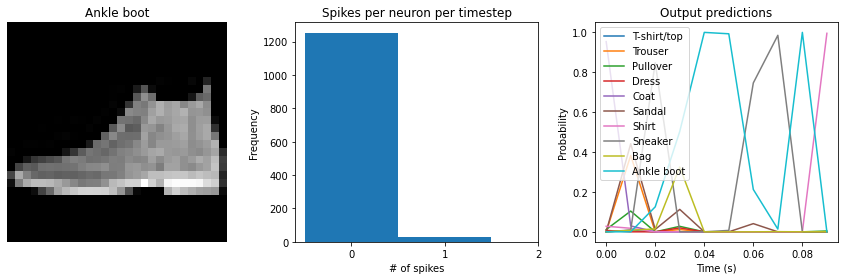

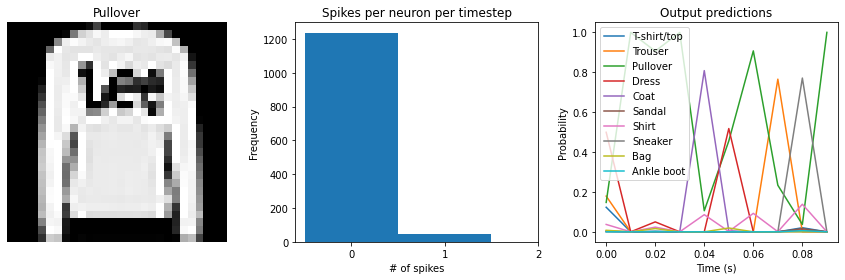

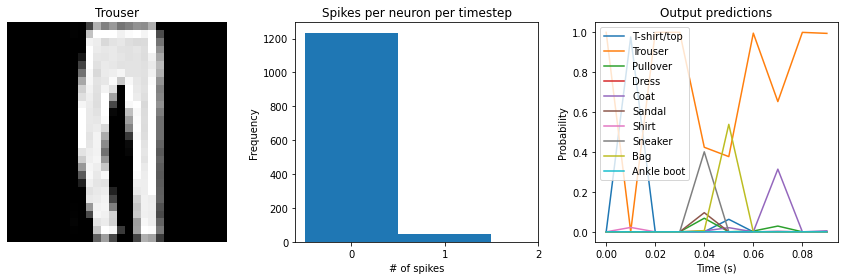

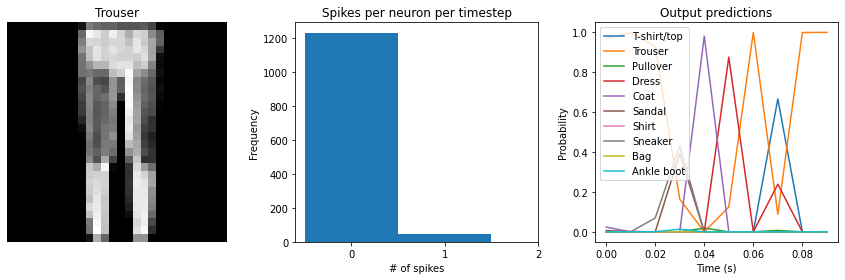

In [12]:
check_output(spikeaware_model)

We can see that with `spiking_aware_training` we're getting better performance than we
were with the equivalent `dt` value above. The model has learned weights that are less
sensitive to the discrete, sparse output produced by the spiking neurons.

## Spike rate regularization

As we saw in the [Simulation time section](#Simulation-time), the spiking rate of the
neurons is very important. If a neuron is spiking too slowly then we don't have enough
information to determine its output value. Conversely, if a neuron is spiking too
quickly then we may lose the spiking advantages we are looking for, such as temporal
sparsity.

Thus it can be helpful to more directly control the firing rates in the model by
applying regularization penalties during training. Any of the standard Keras
regularization functions can be used. KerasSpiking also includes some additional
regularizers that can be useful for this case as they allow us to specify a non-zero
reference point (so we can drive the activities towards some value greater than zero),
or a range of acceptable values.

In [13]:
regularized_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation(
            "relu",
            dt=0.01,
            spiking_aware_training=True,
            # add activity regularizer to encourage spike rates between 10 and 20 Hz
            activity_regularizer=keras_spiking.regularizers.L2(
                l2=1e-4, target=(10, 20)
            ),
        ),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(regularized_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 23:41 - loss: 17.9070 - accuracy: 0.0625

  12/1875 [..............................] - ETA: 8s - loss: 21.1835 - accuracy: 0.1458   

  23/1875 [..............................] - ETA: 8s - loss: 24.2766 - accuracy: 0.2147

  33/1875 [..............................] - ETA: 9s - loss: 27.1483 - accuracy: 0.2292

  43/1875 [..............................] - ETA: 9s - loss: 30.2017 - accuracy: 0.2500

  53/1875 [..............................] - ETA: 9s - loss: 33.1832 - accuracy: 0.2653

  64/1875 [>.............................] - ETA: 9s - loss: 36.1289 - accuracy: 0.2842

  75/1875 [>.............................] - ETA: 9s - loss: 38.9450 - accuracy: 0.2983

  85/1875 [>.............................] - ETA: 9s - loss: 41.4326 - accuracy: 0.3125

  96/1875 [>.............................] - ETA: 8s - loss: 43.9688 - accuracy: 0.3265

 107/1875 [>.............................] - ETA: 8s - loss: 46.0831 - accuracy: 0.3397

 118/1875 [>.............................] - ETA: 8s - loss: 48.2161 - accuracy: 0.3525

 129/1875 [=>............................] - ETA: 8s - loss: 49.9616 - accuracy: 0.3692

 140/1875 [=>............................] - ETA: 8s - loss: 51.8932 - accuracy: 0.3799

 151/1875 [=>............................] - ETA: 8s - loss: 53.3883 - accuracy: 0.3876

 162/1875 [=>............................] - ETA: 8s - loss: 55.0568 - accuracy: 0.3953

 173/1875 [=>............................] - ETA: 8s - loss: 56.6209 - accuracy: 0.4034

 184/1875 [=>............................] - ETA: 8s - loss: 58.1231 - accuracy: 0.4090

 195/1875 [==>...........................] - ETA: 8s - loss: 59.4166 - accuracy: 0.4139

 206/1875 [==>...........................] - ETA: 8s - loss: 60.5910 - accuracy: 0.4202

 218/1875 [==>...........................] - ETA: 8s - loss: 61.6516 - accuracy: 0.4293

 229/1875 [==>...........................] - ETA: 8s - loss: 62.5697 - accuracy: 0.4374

 240/1875 [==>...........................] - ETA: 7s - loss: 63.4339 - accuracy: 0.4422

 251/1875 [===>..........................] - ETA: 7s - loss: 64.2790 - accuracy: 0.4481

 262/1875 [===>..........................] - ETA: 7s - loss: 65.1446 - accuracy: 0.4540

 273/1875 [===>..........................] - ETA: 7s - loss: 65.8279 - accuracy: 0.4576

 284/1875 [===>..........................] - ETA: 7s - loss: 66.3525 - accuracy: 0.4653

 295/1875 [===>..........................] - ETA: 7s - loss: 67.0170 - accuracy: 0.4700

 306/1875 [===>..........................] - ETA: 7s - loss: 67.7060 - accuracy: 0.4741

 317/1875 [====>.........................] - ETA: 7s - loss: 68.3055 - accuracy: 0.4767

 328/1875 [====>.........................] - ETA: 7s - loss: 68.7912 - accuracy: 0.4819

 339/1875 [====>.........................] - ETA: 7s - loss: 69.3035 - accuracy: 0.4839

 350/1875 [====>.........................] - ETA: 7s - loss: 69.8146 - accuracy: 0.4866

 361/1875 [====>.........................] - ETA: 7s - loss: 70.2699 - accuracy: 0.4906

 371/1875 [====>.........................] - ETA: 7s - loss: 70.6351 - accuracy: 0.4944

 382/1875 [=====>........................] - ETA: 7s - loss: 70.9991 - accuracy: 0.4966

 393/1875 [=====>........................] - ETA: 7s - loss: 71.2833 - accuracy: 0.5006

 402/1875 [=====>........................] - ETA: 7s - loss: 71.5630 - accuracy: 0.5026

 413/1875 [=====>........................] - ETA: 7s - loss: 71.9327 - accuracy: 0.5054

 424/1875 [=====>........................] - ETA: 7s - loss: 72.2971 - accuracy: 0.5085

 433/1875 [=====>........................] - ETA: 7s - loss: 72.5132 - accuracy: 0.5108

 443/1875 [======>.......................] - ETA: 6s - loss: 72.7625 - accuracy: 0.5143

 453/1875 [======>.......................] - ETA: 6s - loss: 73.0551 - accuracy: 0.5157

 462/1875 [======>.......................] - ETA: 6s - loss: 73.2844 - accuracy: 0.5179

 473/1875 [======>.......................] - ETA: 6s - loss: 73.5552 - accuracy: 0.5196

 484/1875 [======>.......................] - ETA: 6s - loss: 73.7892 - accuracy: 0.5218

 495/1875 [======>.......................] - ETA: 6s - loss: 74.0136 - accuracy: 0.5249

 506/1875 [=======>......................] - ETA: 6s - loss: 74.2361 - accuracy: 0.5256

 517/1875 [=======>......................] - ETA: 6s - loss: 74.4852 - accuracy: 0.5273

 528/1875 [=======>......................] - ETA: 6s - loss: 74.6746 - accuracy: 0.5295

 539/1875 [=======>......................] - ETA: 6s - loss: 74.8767 - accuracy: 0.5310

 551/1875 [=======>......................] - ETA: 6s - loss: 75.1109 - accuracy: 0.5336

 562/1875 [=======>......................] - ETA: 6s - loss: 75.2798 - accuracy: 0.5353

 573/1875 [========>.....................] - ETA: 6s - loss: 75.4434 - accuracy: 0.5376

 584/1875 [========>.....................] - ETA: 6s - loss: 75.6388 - accuracy: 0.5389

 595/1875 [========>.....................] - ETA: 6s - loss: 75.7860 - accuracy: 0.5400

 606/1875 [========>.....................] - ETA: 6s - loss: 76.0014 - accuracy: 0.5424

 617/1875 [========>.....................] - ETA: 6s - loss: 76.1674 - accuracy: 0.5437

 628/1875 [=========>....................] - ETA: 6s - loss: 76.3246 - accuracy: 0.5454

 639/1875 [=========>....................] - ETA: 5s - loss: 76.4698 - accuracy: 0.5475

 650/1875 [=========>....................] - ETA: 5s - loss: 76.6060 - accuracy: 0.5493

 661/1875 [=========>....................] - ETA: 5s - loss: 76.8281 - accuracy: 0.5507

 672/1875 [=========>....................] - ETA: 5s - loss: 76.9669 - accuracy: 0.5525

 683/1875 [=========>....................] - ETA: 5s - loss: 77.1012 - accuracy: 0.5535

 694/1875 [==========>...................] - ETA: 5s - loss: 77.2571 - accuracy: 0.5543

 705/1875 [==========>...................] - ETA: 5s - loss: 77.3969 - accuracy: 0.5559

 716/1875 [==========>...................] - ETA: 5s - loss: 77.5076 - accuracy: 0.5570

 727/1875 [==========>...................] - ETA: 5s - loss: 77.6069 - accuracy: 0.5584

 738/1875 [==========>...................] - ETA: 5s - loss: 77.6753 - accuracy: 0.5592

 749/1875 [==========>...................] - ETA: 5s - loss: 77.8147 - accuracy: 0.5607

 760/1875 [===========>..................] - ETA: 5s - loss: 77.9034 - accuracy: 0.5613

 771/1875 [===========>..................] - ETA: 5s - loss: 77.9788 - accuracy: 0.5622

 782/1875 [===========>..................] - ETA: 5s - loss: 78.0916 - accuracy: 0.5635

 792/1875 [===========>..................] - ETA: 5s - loss: 78.1750 - accuracy: 0.5646

 803/1875 [===========>..................] - ETA: 5s - loss: 78.3051 - accuracy: 0.5660

 814/1875 [============>.................] - ETA: 5s - loss: 78.4139 - accuracy: 0.5675

 825/1875 [============>.................] - ETA: 5s - loss: 78.5009 - accuracy: 0.5681

 836/1875 [============>.................] - ETA: 5s - loss: 78.6186 - accuracy: 0.5693

 847/1875 [============>.................] - ETA: 4s - loss: 78.6967 - accuracy: 0.5702

 857/1875 [============>.................] - ETA: 4s - loss: 78.7979 - accuracy: 0.5712

 868/1875 [============>.................] - ETA: 4s - loss: 78.9022 - accuracy: 0.5724

 879/1875 [=============>................] - ETA: 4s - loss: 78.9864 - accuracy: 0.5735

 890/1875 [=============>................] - ETA: 4s - loss: 79.0946 - accuracy: 0.5748

 901/1875 [=============>................] - ETA: 4s - loss: 79.2051 - accuracy: 0.5755

 912/1875 [=============>................] - ETA: 4s - loss: 79.2628 - accuracy: 0.5759

 923/1875 [=============>................] - ETA: 4s - loss: 79.3361 - accuracy: 0.5771

 931/1875 [=============>................] - ETA: 4s - loss: 79.4089 - accuracy: 0.5777

 942/1875 [==============>...............] - ETA: 4s - loss: 79.5021 - accuracy: 0.5784

 953/1875 [==============>...............] - ETA: 4s - loss: 79.5794 - accuracy: 0.5794

 964/1875 [==============>...............] - ETA: 4s - loss: 79.6647 - accuracy: 0.5802

 975/1875 [==============>...............] - ETA: 4s - loss: 79.7505 - accuracy: 0.5815

 986/1875 [==============>...............] - ETA: 4s - loss: 79.8362 - accuracy: 0.5824

 997/1875 [==============>...............] - ETA: 4s - loss: 79.9068 - accuracy: 0.5830

1008/1875 [===============>..............] - ETA: 4s - loss: 79.9665 - accuracy: 0.5839

1019/1875 [===============>..............] - ETA: 4s - loss: 80.0325 - accuracy: 0.5847

1030/1875 [===============>..............] - ETA: 4s - loss: 80.1249 - accuracy: 0.5860

1041/1875 [===============>..............] - ETA: 4s - loss: 80.1706 - accuracy: 0.5872

1052/1875 [===============>..............] - ETA: 3s - loss: 80.2196 - accuracy: 0.5877

1063/1875 [================>.............] - ETA: 3s - loss: 80.2838 - accuracy: 0.5887

1074/1875 [================>.............] - ETA: 3s - loss: 80.3572 - accuracy: 0.5894

1085/1875 [================>.............] - ETA: 3s - loss: 80.4192 - accuracy: 0.5897

1096/1875 [================>.............] - ETA: 3s - loss: 80.4904 - accuracy: 0.5903

1107/1875 [================>.............] - ETA: 3s - loss: 80.5587 - accuracy: 0.5914

1118/1875 [================>.............] - ETA: 3s - loss: 80.6284 - accuracy: 0.5922

1129/1875 [=================>............] - ETA: 3s - loss: 80.6826 - accuracy: 0.5928

1140/1875 [=================>............] - ETA: 3s - loss: 80.7381 - accuracy: 0.5934

1151/1875 [=================>............] - ETA: 3s - loss: 80.8008 - accuracy: 0.5940

1162/1875 [=================>............] - ETA: 3s - loss: 80.8587 - accuracy: 0.5946

1173/1875 [=================>............] - ETA: 3s - loss: 80.9168 - accuracy: 0.5954

1184/1875 [=================>............] - ETA: 3s - loss: 80.9726 - accuracy: 0.5959

1195/1875 [==================>...........] - ETA: 3s - loss: 81.0254 - accuracy: 0.5965

1206/1875 [==================>...........] - ETA: 3s - loss: 81.0758 - accuracy: 0.5970

1217/1875 [==================>...........] - ETA: 3s - loss: 81.1251 - accuracy: 0.5978

1228/1875 [==================>...........] - ETA: 3s - loss: 81.1846 - accuracy: 0.5988

1239/1875 [==================>...........] - ETA: 3s - loss: 81.2389 - accuracy: 0.5993

1250/1875 [===================>..........] - ETA: 3s - loss: 81.2932 - accuracy: 0.5998

1261/1875 [===================>..........] - ETA: 2s - loss: 81.3275 - accuracy: 0.6002

1272/1875 [===================>..........] - ETA: 2s - loss: 81.3805 - accuracy: 0.6010

1283/1875 [===================>..........] - ETA: 2s - loss: 81.4466 - accuracy: 0.6017

1294/1875 [===================>..........] - ETA: 2s - loss: 81.5129 - accuracy: 0.6023

1305/1875 [===================>..........] - ETA: 2s - loss: 81.5431 - accuracy: 0.6030

1316/1875 [====================>.........] - ETA: 2s - loss: 81.6065 - accuracy: 0.6039

1327/1875 [====================>.........] - ETA: 2s - loss: 81.6408 - accuracy: 0.6046

1339/1875 [====================>.........] - ETA: 2s - loss: 81.7215 - accuracy: 0.6050

1350/1875 [====================>.........] - ETA: 2s - loss: 81.7813 - accuracy: 0.6058

1358/1875 [====================>.........] - ETA: 2s - loss: 81.8158 - accuracy: 0.6061

1369/1875 [====================>.........] - ETA: 2s - loss: 81.8757 - accuracy: 0.6065

1380/1875 [=====================>........] - ETA: 2s - loss: 81.9258 - accuracy: 0.6070

1391/1875 [=====================>........] - ETA: 2s - loss: 81.9766 - accuracy: 0.6072

1402/1875 [=====================>........] - ETA: 2s - loss: 82.0306 - accuracy: 0.6076

1413/1875 [=====================>........] - ETA: 2s - loss: 82.0835 - accuracy: 0.6083

1424/1875 [=====================>........] - ETA: 2s - loss: 82.1212 - accuracy: 0.6084

1435/1875 [=====================>........] - ETA: 2s - loss: 82.1589 - accuracy: 0.6084

1446/1875 [======================>.......] - ETA: 2s - loss: 82.2069 - accuracy: 0.6095

1457/1875 [======================>.......] - ETA: 2s - loss: 82.2523 - accuracy: 0.6096

1468/1875 [======================>.......] - ETA: 1s - loss: 82.2878 - accuracy: 0.6097

1479/1875 [======================>.......] - ETA: 1s - loss: 82.3261 - accuracy: 0.6101

1490/1875 [======================>.......] - ETA: 1s - loss: 82.3773 - accuracy: 0.6107

1501/1875 [=======================>......] - ETA: 1s - loss: 82.4292 - accuracy: 0.6114

1512/1875 [=======================>......] - ETA: 1s - loss: 82.4713 - accuracy: 0.6121

1522/1875 [=======================>......] - ETA: 1s - loss: 82.5071 - accuracy: 0.6128

1533/1875 [=======================>......] - ETA: 1s - loss: 82.5620 - accuracy: 0.6131

1544/1875 [=======================>......] - ETA: 1s - loss: 82.6023 - accuracy: 0.6137

1555/1875 [=======================>......] - ETA: 1s - loss: 82.6522 - accuracy: 0.6142

1566/1875 [========================>.....] - ETA: 1s - loss: 82.6893 - accuracy: 0.6144

1577/1875 [========================>.....] - ETA: 1s - loss: 82.7336 - accuracy: 0.6147

1588/1875 [========================>.....] - ETA: 1s - loss: 82.7561 - accuracy: 0.6152

1599/1875 [========================>.....] - ETA: 1s - loss: 82.7829 - accuracy: 0.6156

1611/1875 [========================>.....] - ETA: 1s - loss: 82.8116 - accuracy: 0.6160

1622/1875 [========================>.....] - ETA: 1s - loss: 82.8500 - accuracy: 0.6163

1633/1875 [=========================>....] - ETA: 1s - loss: 82.8799 - accuracy: 0.6166

1644/1875 [=========================>....] - ETA: 1s - loss: 82.9132 - accuracy: 0.6169

1655/1875 [=========================>....] - ETA: 1s - loss: 82.9586 - accuracy: 0.6174

1666/1875 [=========================>....] - ETA: 1s - loss: 83.0101 - accuracy: 0.6180

1677/1875 [=========================>....] - ETA: 0s - loss: 83.0568 - accuracy: 0.6183

1688/1875 [==========================>...] - ETA: 0s - loss: 83.0936 - accuracy: 0.6185

1699/1875 [==========================>...] - ETA: 0s - loss: 83.1328 - accuracy: 0.6190

1710/1875 [==========================>...] - ETA: 0s - loss: 83.1669 - accuracy: 0.6197

1721/1875 [==========================>...] - ETA: 0s - loss: 83.1958 - accuracy: 0.6200

1732/1875 [==========================>...] - ETA: 0s - loss: 83.2264 - accuracy: 0.6203

1743/1875 [==========================>...] - ETA: 0s - loss: 83.2732 - accuracy: 0.6209

1754/1875 [===========================>..] - ETA: 0s - loss: 83.3006 - accuracy: 0.6212

1765/1875 [===========================>..] - ETA: 0s - loss: 83.3265 - accuracy: 0.6215

1776/1875 [===========================>..] - ETA: 0s - loss: 83.3605 - accuracy: 0.6220

1787/1875 [===========================>..] - ETA: 0s - loss: 83.3985 - accuracy: 0.6223

1798/1875 [===========================>..] - ETA: 0s - loss: 83.4256 - accuracy: 0.6227

1809/1875 [===========================>..] - ETA: 0s - loss: 83.4600 - accuracy: 0.6231

1820/1875 [============================>.] - ETA: 0s - loss: 83.4964 - accuracy: 0.6235

1831/1875 [============================>.] - ETA: 0s - loss: 83.5203 - accuracy: 0.6238

1842/1875 [============================>.] - ETA: 0s - loss: 83.5492 - accuracy: 0.6244

1853/1875 [============================>.] - ETA: 0s - loss: 83.5727 - accuracy: 0.6247

1864/1875 [============================>.] - ETA: 0s - loss: 83.6055 - accuracy: 0.6250

1875/1875 [==============================] - ETA: 0s - loss: 83.6276 - accuracy: 0.6255

1875/1875 [==============================] - 10s 5ms/step - loss: 83.6276 - accuracy: 0.6255


Epoch 2/10


   1/1875 [..............................] - ETA: 9s - loss: 85.0651 - accuracy: 0.6875

  12/1875 [..............................] - ETA: 9s - loss: 90.5217 - accuracy: 0.6536

  23/1875 [..............................] - ETA: 8s - loss: 88.8771 - accuracy: 0.6576

  34/1875 [..............................] - ETA: 8s - loss: 88.3408 - accuracy: 0.6526

  45/1875 [..............................] - ETA: 8s - loss: 88.5329 - accuracy: 0.6576

  56/1875 [..............................] - ETA: 8s - loss: 88.6168 - accuracy: 0.6691

  67/1875 [>.............................] - ETA: 8s - loss: 88.7596 - accuracy: 0.6735

  78/1875 [>.............................] - ETA: 8s - loss: 88.7892 - accuracy: 0.6779

  89/1875 [>.............................] - ETA: 8s - loss: 88.4949 - accuracy: 0.6808

 100/1875 [>.............................] - ETA: 8s - loss: 88.6766 - accuracy: 0.6859

 111/1875 [>.............................] - ETA: 8s - loss: 88.8455 - accuracy: 0.6827

 122/1875 [>.............................] - ETA: 8s - loss: 88.6982 - accuracy: 0.6824

 133/1875 [=>............................] - ETA: 8s - loss: 88.7166 - accuracy: 0.6767

 144/1875 [=>............................] - ETA: 8s - loss: 88.7513 - accuracy: 0.6760

 155/1875 [=>............................] - ETA: 8s - loss: 88.7477 - accuracy: 0.6792

 166/1875 [=>............................] - ETA: 8s - loss: 88.7451 - accuracy: 0.6798

 177/1875 [=>............................] - ETA: 7s - loss: 88.5251 - accuracy: 0.6804

 188/1875 [==>...........................] - ETA: 7s - loss: 88.6092 - accuracy: 0.6782

 199/1875 [==>...........................] - ETA: 7s - loss: 88.8150 - accuracy: 0.6771

 210/1875 [==>...........................] - ETA: 7s - loss: 88.8247 - accuracy: 0.6757

 221/1875 [==>...........................] - ETA: 7s - loss: 88.8274 - accuracy: 0.6763

 232/1875 [==>...........................] - ETA: 7s - loss: 88.7159 - accuracy: 0.6759

 243/1875 [==>...........................] - ETA: 7s - loss: 88.7278 - accuracy: 0.6748

 254/1875 [===>..........................] - ETA: 7s - loss: 88.7544 - accuracy: 0.6772

 265/1875 [===>..........................] - ETA: 7s - loss: 88.7565 - accuracy: 0.6777

 276/1875 [===>..........................] - ETA: 7s - loss: 88.7236 - accuracy: 0.6776

 287/1875 [===>..........................] - ETA: 7s - loss: 88.7288 - accuracy: 0.6762

 298/1875 [===>..........................] - ETA: 7s - loss: 88.7520 - accuracy: 0.6742

 309/1875 [===>..........................] - ETA: 7s - loss: 88.7574 - accuracy: 0.6718

 320/1875 [====>.........................] - ETA: 7s - loss: 88.7947 - accuracy: 0.6741

 331/1875 [====>.........................] - ETA: 7s - loss: 88.7604 - accuracy: 0.6748

 342/1875 [====>.........................] - ETA: 7s - loss: 88.7231 - accuracy: 0.6761

 354/1875 [====>.........................] - ETA: 7s - loss: 88.6855 - accuracy: 0.6780

 363/1875 [====>.........................] - ETA: 7s - loss: 88.6803 - accuracy: 0.6780

 373/1875 [====>.........................] - ETA: 7s - loss: 88.7127 - accuracy: 0.6803

 384/1875 [=====>........................] - ETA: 7s - loss: 88.7232 - accuracy: 0.6798

 395/1875 [=====>........................] - ETA: 7s - loss: 88.7098 - accuracy: 0.6799

 406/1875 [=====>........................] - ETA: 6s - loss: 88.7250 - accuracy: 0.6800

 417/1875 [=====>........................] - ETA: 6s - loss: 88.6971 - accuracy: 0.6792

 428/1875 [=====>........................] - ETA: 6s - loss: 88.7209 - accuracy: 0.6786

 439/1875 [======>.......................] - ETA: 6s - loss: 88.7005 - accuracy: 0.6798

 450/1875 [======>.......................] - ETA: 6s - loss: 88.7314 - accuracy: 0.6809

 461/1875 [======>.......................] - ETA: 6s - loss: 88.7419 - accuracy: 0.6813

 472/1875 [======>.......................] - ETA: 6s - loss: 88.7594 - accuracy: 0.6819

 484/1875 [======>.......................] - ETA: 6s - loss: 88.7609 - accuracy: 0.6817

 495/1875 [======>.......................] - ETA: 6s - loss: 88.7471 - accuracy: 0.6822

 506/1875 [=======>......................] - ETA: 6s - loss: 88.7434 - accuracy: 0.6816

 517/1875 [=======>......................] - ETA: 6s - loss: 88.7892 - accuracy: 0.6819

 528/1875 [=======>......................] - ETA: 6s - loss: 88.7696 - accuracy: 0.6823

 539/1875 [=======>......................] - ETA: 6s - loss: 88.7393 - accuracy: 0.6815

 550/1875 [=======>......................] - ETA: 6s - loss: 88.7724 - accuracy: 0.6817

 561/1875 [=======>......................] - ETA: 6s - loss: 88.7511 - accuracy: 0.6827

 572/1875 [========>.....................] - ETA: 6s - loss: 88.8237 - accuracy: 0.6829

 583/1875 [========>.....................] - ETA: 6s - loss: 88.8540 - accuracy: 0.6834

 593/1875 [========>.....................] - ETA: 6s - loss: 88.8287 - accuracy: 0.6838

 604/1875 [========>.....................] - ETA: 6s - loss: 88.8306 - accuracy: 0.6835

 615/1875 [========>.....................] - ETA: 5s - loss: 88.7912 - accuracy: 0.6846

 626/1875 [=========>....................] - ETA: 5s - loss: 88.7731 - accuracy: 0.6846

 637/1875 [=========>....................] - ETA: 5s - loss: 88.7686 - accuracy: 0.6852

 648/1875 [=========>....................] - ETA: 5s - loss: 88.7840 - accuracy: 0.6853

 659/1875 [=========>....................] - ETA: 5s - loss: 88.7575 - accuracy: 0.6856

 670/1875 [=========>....................] - ETA: 5s - loss: 88.7747 - accuracy: 0.6854

 681/1875 [=========>....................] - ETA: 5s - loss: 88.7836 - accuracy: 0.6861

 691/1875 [==========>...................] - ETA: 5s - loss: 88.7993 - accuracy: 0.6868

 702/1875 [==========>...................] - ETA: 5s - loss: 88.8031 - accuracy: 0.6872

 713/1875 [==========>...................] - ETA: 5s - loss: 88.8056 - accuracy: 0.6869

 724/1875 [==========>...................] - ETA: 5s - loss: 88.8174 - accuracy: 0.6874

 735/1875 [==========>...................] - ETA: 5s - loss: 88.7967 - accuracy: 0.6872

 746/1875 [==========>...................] - ETA: 5s - loss: 88.8254 - accuracy: 0.6875

 757/1875 [===========>..................] - ETA: 5s - loss: 88.8315 - accuracy: 0.6878

 768/1875 [===========>..................] - ETA: 5s - loss: 88.8235 - accuracy: 0.6882

 779/1875 [===========>..................] - ETA: 5s - loss: 88.8264 - accuracy: 0.6886

 790/1875 [===========>..................] - ETA: 5s - loss: 88.8211 - accuracy: 0.6881

 801/1875 [===========>..................] - ETA: 5s - loss: 88.8338 - accuracy: 0.6880

 812/1875 [===========>..................] - ETA: 5s - loss: 88.8493 - accuracy: 0.6875

 823/1875 [============>.................] - ETA: 4s - loss: 88.8583 - accuracy: 0.6872

 834/1875 [============>.................] - ETA: 4s - loss: 88.8606 - accuracy: 0.6875

 842/1875 [============>.................] - ETA: 4s - loss: 88.8477 - accuracy: 0.6872

 852/1875 [============>.................] - ETA: 4s - loss: 88.8915 - accuracy: 0.6867

 859/1875 [============>.................] - ETA: 4s - loss: 88.9035 - accuracy: 0.6865

 867/1875 [============>.................] - ETA: 4s - loss: 88.9202 - accuracy: 0.6872

 878/1875 [=============>................] - ETA: 4s - loss: 88.9278 - accuracy: 0.6874

 889/1875 [=============>................] - ETA: 4s - loss: 88.9216 - accuracy: 0.6876

 900/1875 [=============>................] - ETA: 4s - loss: 88.9310 - accuracy: 0.6878

 912/1875 [=============>................] - ETA: 4s - loss: 88.9516 - accuracy: 0.6879

 923/1875 [=============>................] - ETA: 4s - loss: 88.9608 - accuracy: 0.6880

 934/1875 [=============>................] - ETA: 4s - loss: 88.9688 - accuracy: 0.6881

 945/1875 [==============>...............] - ETA: 4s - loss: 89.0012 - accuracy: 0.6879

 956/1875 [==============>...............] - ETA: 4s - loss: 89.0099 - accuracy: 0.6883

 966/1875 [==============>...............] - ETA: 4s - loss: 89.0340 - accuracy: 0.6883

 977/1875 [==============>...............] - ETA: 4s - loss: 89.0344 - accuracy: 0.6882

 988/1875 [==============>...............] - ETA: 4s - loss: 89.0066 - accuracy: 0.6883

 999/1875 [==============>...............] - ETA: 4s - loss: 89.0284 - accuracy: 0.6886

1010/1875 [===============>..............] - ETA: 4s - loss: 89.0450 - accuracy: 0.6888

1021/1875 [===============>..............] - ETA: 4s - loss: 89.0435 - accuracy: 0.6888

1032/1875 [===============>..............] - ETA: 4s - loss: 89.0682 - accuracy: 0.6894

1043/1875 [===============>..............] - ETA: 3s - loss: 89.0795 - accuracy: 0.6894

1054/1875 [===============>..............] - ETA: 3s - loss: 89.1079 - accuracy: 0.6896

1065/1875 [================>.............] - ETA: 3s - loss: 89.1113 - accuracy: 0.6900

1076/1875 [================>.............] - ETA: 3s - loss: 89.1207 - accuracy: 0.6900

1086/1875 [================>.............] - ETA: 3s - loss: 89.1239 - accuracy: 0.6900

1097/1875 [================>.............] - ETA: 3s - loss: 89.1059 - accuracy: 0.6900

1108/1875 [================>.............] - ETA: 3s - loss: 89.1110 - accuracy: 0.6902

1119/1875 [================>.............] - ETA: 3s - loss: 89.1109 - accuracy: 0.6901

1130/1875 [=================>............] - ETA: 3s - loss: 89.1171 - accuracy: 0.6906

1141/1875 [=================>............] - ETA: 3s - loss: 89.1277 - accuracy: 0.6907

1152/1875 [=================>............] - ETA: 3s - loss: 89.1550 - accuracy: 0.6905

1163/1875 [=================>............] - ETA: 3s - loss: 89.1667 - accuracy: 0.6902

1173/1875 [=================>............] - ETA: 3s - loss: 89.1656 - accuracy: 0.6901

1184/1875 [=================>............] - ETA: 3s - loss: 89.1734 - accuracy: 0.6899

1195/1875 [==================>...........] - ETA: 3s - loss: 89.1590 - accuracy: 0.6900

1206/1875 [==================>...........] - ETA: 3s - loss: 89.1868 - accuracy: 0.6901

1217/1875 [==================>...........] - ETA: 3s - loss: 89.1910 - accuracy: 0.6903

1228/1875 [==================>...........] - ETA: 3s - loss: 89.2029 - accuracy: 0.6911

1239/1875 [==================>...........] - ETA: 3s - loss: 89.2084 - accuracy: 0.6912

1250/1875 [===================>..........] - ETA: 2s - loss: 89.2031 - accuracy: 0.6910

1261/1875 [===================>..........] - ETA: 2s - loss: 89.2144 - accuracy: 0.6911

1272/1875 [===================>..........] - ETA: 2s - loss: 89.2222 - accuracy: 0.6911

1283/1875 [===================>..........] - ETA: 2s - loss: 89.2375 - accuracy: 0.6910

1294/1875 [===================>..........] - ETA: 2s - loss: 89.2477 - accuracy: 0.6914

1305/1875 [===================>..........] - ETA: 2s - loss: 89.2621 - accuracy: 0.6917

1316/1875 [====================>.........] - ETA: 2s - loss: 89.2707 - accuracy: 0.6917

1327/1875 [====================>.........] - ETA: 2s - loss: 89.2695 - accuracy: 0.6916

1338/1875 [====================>.........] - ETA: 2s - loss: 89.2791 - accuracy: 0.6917

1349/1875 [====================>.........] - ETA: 2s - loss: 89.2726 - accuracy: 0.6919

1360/1875 [====================>.........] - ETA: 2s - loss: 89.2813 - accuracy: 0.6920

1371/1875 [====================>.........] - ETA: 2s - loss: 89.2952 - accuracy: 0.6921

1382/1875 [=====================>........] - ETA: 2s - loss: 89.3014 - accuracy: 0.6924

1393/1875 [=====================>........] - ETA: 2s - loss: 89.3123 - accuracy: 0.6925

1404/1875 [=====================>........] - ETA: 2s - loss: 89.3146 - accuracy: 0.6925

1415/1875 [=====================>........] - ETA: 2s - loss: 89.3200 - accuracy: 0.6928

1426/1875 [=====================>........] - ETA: 2s - loss: 89.3359 - accuracy: 0.6929

1437/1875 [=====================>........] - ETA: 2s - loss: 89.3405 - accuracy: 0.6932

1448/1875 [======================>.......] - ETA: 2s - loss: 89.3338 - accuracy: 0.6931

1459/1875 [======================>.......] - ETA: 1s - loss: 89.3349 - accuracy: 0.6932

1470/1875 [======================>.......] - ETA: 1s - loss: 89.3474 - accuracy: 0.6931

1481/1875 [======================>.......] - ETA: 1s - loss: 89.3605 - accuracy: 0.6933

1492/1875 [======================>.......] - ETA: 1s - loss: 89.3705 - accuracy: 0.6934

1503/1875 [=======================>......] - ETA: 1s - loss: 89.3991 - accuracy: 0.6935

1513/1875 [=======================>......] - ETA: 1s - loss: 89.3860 - accuracy: 0.6937

1524/1875 [=======================>......] - ETA: 1s - loss: 89.3960 - accuracy: 0.6935

1535/1875 [=======================>......] - ETA: 1s - loss: 89.3953 - accuracy: 0.6937

1546/1875 [=======================>......] - ETA: 1s - loss: 89.3977 - accuracy: 0.6935

1557/1875 [=======================>......] - ETA: 1s - loss: 89.4140 - accuracy: 0.6937

1568/1875 [========================>.....] - ETA: 1s - loss: 89.4123 - accuracy: 0.6938

1577/1875 [========================>.....] - ETA: 1s - loss: 89.4199 - accuracy: 0.6939

1588/1875 [========================>.....] - ETA: 1s - loss: 89.4172 - accuracy: 0.6943

1599/1875 [========================>.....] - ETA: 1s - loss: 89.4207 - accuracy: 0.6943

1610/1875 [========================>.....] - ETA: 1s - loss: 89.4324 - accuracy: 0.6946

1621/1875 [========================>.....] - ETA: 1s - loss: 89.4301 - accuracy: 0.6945

1630/1875 [=========================>....] - ETA: 1s - loss: 89.4406 - accuracy: 0.6947

1641/1875 [=========================>....] - ETA: 1s - loss: 89.4524 - accuracy: 0.6950

1652/1875 [=========================>....] - ETA: 1s - loss: 89.4543 - accuracy: 0.6953

1663/1875 [=========================>....] - ETA: 1s - loss: 89.4519 - accuracy: 0.6956

1674/1875 [=========================>....] - ETA: 0s - loss: 89.4741 - accuracy: 0.6958

1685/1875 [=========================>....] - ETA: 0s - loss: 89.4750 - accuracy: 0.6958

1696/1875 [==========================>...] - ETA: 0s - loss: 89.4833 - accuracy: 0.6960

1707/1875 [==========================>...] - ETA: 0s - loss: 89.4830 - accuracy: 0.6960

1718/1875 [==========================>...] - ETA: 0s - loss: 89.4884 - accuracy: 0.6959

1729/1875 [==========================>...] - ETA: 0s - loss: 89.4935 - accuracy: 0.6957

1740/1875 [==========================>...] - ETA: 0s - loss: 89.5062 - accuracy: 0.6955

1751/1875 [===========================>..] - ETA: 0s - loss: 89.5062 - accuracy: 0.6955

1762/1875 [===========================>..] - ETA: 0s - loss: 89.5099 - accuracy: 0.6956

1773/1875 [===========================>..] - ETA: 0s - loss: 89.5127 - accuracy: 0.6957

1784/1875 [===========================>..] - ETA: 0s - loss: 89.5104 - accuracy: 0.6957

1795/1875 [===========================>..] - ETA: 0s - loss: 89.5280 - accuracy: 0.6955

1806/1875 [===========================>..] - ETA: 0s - loss: 89.5254 - accuracy: 0.6953

1817/1875 [============================>.] - ETA: 0s - loss: 89.5367 - accuracy: 0.6953

1828/1875 [============================>.] - ETA: 0s - loss: 89.5411 - accuracy: 0.6954

1837/1875 [============================>.] - ETA: 0s - loss: 89.5525 - accuracy: 0.6952

1848/1875 [============================>.] - ETA: 0s - loss: 89.5545 - accuracy: 0.6952

1859/1875 [============================>.] - ETA: 0s - loss: 89.5566 - accuracy: 0.6950

1870/1875 [============================>.] - ETA: 0s - loss: 89.5479 - accuracy: 0.6952

1875/1875 [==============================] - 9s 5ms/step - loss: 89.5422 - accuracy: 0.6953


Epoch 3/10


   1/1875 [..............................] - ETA: 9s - loss: 91.9158 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 8s - loss: 90.4867 - accuracy: 0.7404

  24/1875 [..............................] - ETA: 8s - loss: 90.5444 - accuracy: 0.7383

  34/1875 [..............................] - ETA: 8s - loss: 89.9701 - accuracy: 0.7261

  45/1875 [..............................] - ETA: 8s - loss: 89.8540 - accuracy: 0.7076

  56/1875 [..............................] - ETA: 8s - loss: 89.8961 - accuracy: 0.7054

  66/1875 [>.............................] - ETA: 8s - loss: 90.2145 - accuracy: 0.6970

  77/1875 [>.............................] - ETA: 8s - loss: 90.0624 - accuracy: 0.6993

  88/1875 [>.............................] - ETA: 8s - loss: 90.0149 - accuracy: 0.6982

  99/1875 [>.............................] - ETA: 8s - loss: 90.1309 - accuracy: 0.7011

 110/1875 [>.............................] - ETA: 8s - loss: 90.0457 - accuracy: 0.7037

 121/1875 [>.............................] - ETA: 8s - loss: 90.2127 - accuracy: 0.7002

 132/1875 [=>............................] - ETA: 8s - loss: 90.0995 - accuracy: 0.7019

 143/1875 [=>............................] - ETA: 8s - loss: 90.1873 - accuracy: 0.7050

 154/1875 [=>............................] - ETA: 8s - loss: 90.2452 - accuracy: 0.7068

 165/1875 [=>............................] - ETA: 8s - loss: 90.0521 - accuracy: 0.7072

 176/1875 [=>............................] - ETA: 8s - loss: 90.0670 - accuracy: 0.7065

 187/1875 [=>............................] - ETA: 8s - loss: 90.1367 - accuracy: 0.7052

 198/1875 [==>...........................] - ETA: 8s - loss: 90.2400 - accuracy: 0.7052

 209/1875 [==>...........................] - ETA: 7s - loss: 90.2064 - accuracy: 0.7054

 220/1875 [==>...........................] - ETA: 7s - loss: 90.3108 - accuracy: 0.7060

 231/1875 [==>...........................] - ETA: 7s - loss: 90.2488 - accuracy: 0.7059

 242/1875 [==>...........................] - ETA: 7s - loss: 90.1396 - accuracy: 0.7062

 253/1875 [===>..........................] - ETA: 7s - loss: 90.1935 - accuracy: 0.7064

 263/1875 [===>..........................] - ETA: 7s - loss: 90.1714 - accuracy: 0.7060

 274/1875 [===>..........................] - ETA: 7s - loss: 90.2375 - accuracy: 0.7051

 285/1875 [===>..........................] - ETA: 7s - loss: 90.2454 - accuracy: 0.7058

 296/1875 [===>..........................] - ETA: 7s - loss: 90.2429 - accuracy: 0.7058

 307/1875 [===>..........................] - ETA: 7s - loss: 90.2897 - accuracy: 0.7042

 318/1875 [====>.........................] - ETA: 7s - loss: 90.3462 - accuracy: 0.7038

 329/1875 [====>.........................] - ETA: 7s - loss: 90.4021 - accuracy: 0.7036

 340/1875 [====>.........................] - ETA: 7s - loss: 90.2905 - accuracy: 0.7040

 351/1875 [====>.........................] - ETA: 7s - loss: 90.2731 - accuracy: 0.7033

 362/1875 [====>.........................] - ETA: 7s - loss: 90.3335 - accuracy: 0.7044

 373/1875 [====>.........................] - ETA: 7s - loss: 90.3208 - accuracy: 0.7043

 384/1875 [=====>........................] - ETA: 7s - loss: 90.3140 - accuracy: 0.7044

 395/1875 [=====>........................] - ETA: 7s - loss: 90.3666 - accuracy: 0.7040

 406/1875 [=====>........................] - ETA: 7s - loss: 90.3709 - accuracy: 0.7030

 417/1875 [=====>........................] - ETA: 6s - loss: 90.3802 - accuracy: 0.7030

 428/1875 [=====>........................] - ETA: 6s - loss: 90.4002 - accuracy: 0.7026

 439/1875 [======>.......................] - ETA: 6s - loss: 90.3773 - accuracy: 0.7029

 450/1875 [======>.......................] - ETA: 6s - loss: 90.3357 - accuracy: 0.7041

 462/1875 [======>.......................] - ETA: 6s - loss: 90.3622 - accuracy: 0.7049

 473/1875 [======>.......................] - ETA: 6s - loss: 90.3321 - accuracy: 0.7051

 484/1875 [======>.......................] - ETA: 6s - loss: 90.3677 - accuracy: 0.7049

 495/1875 [======>.......................] - ETA: 6s - loss: 90.3784 - accuracy: 0.7061

 506/1875 [=======>......................] - ETA: 6s - loss: 90.3695 - accuracy: 0.7051

 517/1875 [=======>......................] - ETA: 6s - loss: 90.3712 - accuracy: 0.7049

 528/1875 [=======>......................] - ETA: 6s - loss: 90.3369 - accuracy: 0.7050

 539/1875 [=======>......................] - ETA: 6s - loss: 90.3296 - accuracy: 0.7063

 550/1875 [=======>......................] - ETA: 6s - loss: 90.3384 - accuracy: 0.7056

 561/1875 [=======>......................] - ETA: 6s - loss: 90.3262 - accuracy: 0.7050

 572/1875 [========>.....................] - ETA: 6s - loss: 90.3798 - accuracy: 0.7044

 583/1875 [========>.....................] - ETA: 6s - loss: 90.3785 - accuracy: 0.7038

 594/1875 [========>.....................] - ETA: 6s - loss: 90.3894 - accuracy: 0.7040

 605/1875 [========>.....................] - ETA: 6s - loss: 90.3889 - accuracy: 0.7043

 616/1875 [========>.....................] - ETA: 5s - loss: 90.3694 - accuracy: 0.7041

 627/1875 [=========>....................] - ETA: 5s - loss: 90.3916 - accuracy: 0.7041

 638/1875 [=========>....................] - ETA: 5s - loss: 90.3534 - accuracy: 0.7038

 649/1875 [=========>....................] - ETA: 5s - loss: 90.3493 - accuracy: 0.7041

 660/1875 [=========>....................] - ETA: 5s - loss: 90.3509 - accuracy: 0.7041

 671/1875 [=========>....................] - ETA: 5s - loss: 90.3752 - accuracy: 0.7038

 682/1875 [=========>....................] - ETA: 5s - loss: 90.3594 - accuracy: 0.7039

 693/1875 [==========>...................] - ETA: 5s - loss: 90.3413 - accuracy: 0.7034

 704/1875 [==========>...................] - ETA: 5s - loss: 90.3459 - accuracy: 0.7041

 712/1875 [==========>...................] - ETA: 5s - loss: 90.3697 - accuracy: 0.7046

 723/1875 [==========>...................] - ETA: 5s - loss: 90.3763 - accuracy: 0.7045

 734/1875 [==========>...................] - ETA: 5s - loss: 90.3518 - accuracy: 0.7050

 745/1875 [==========>...................] - ETA: 5s - loss: 90.3601 - accuracy: 0.7053

 756/1875 [===========>..................] - ETA: 5s - loss: 90.3441 - accuracy: 0.7060

 767/1875 [===========>..................] - ETA: 5s - loss: 90.3497 - accuracy: 0.7054

 778/1875 [===========>..................] - ETA: 5s - loss: 90.3468 - accuracy: 0.7058

 789/1875 [===========>..................] - ETA: 5s - loss: 90.3552 - accuracy: 0.7057

 800/1875 [===========>..................] - ETA: 5s - loss: 90.3593 - accuracy: 0.7059

 811/1875 [===========>..................] - ETA: 5s - loss: 90.3440 - accuracy: 0.7059

 822/1875 [============>.................] - ETA: 5s - loss: 90.3446 - accuracy: 0.7062

 833/1875 [============>.................] - ETA: 4s - loss: 90.3521 - accuracy: 0.7061

 844/1875 [============>.................] - ETA: 4s - loss: 90.3611 - accuracy: 0.7059

 855/1875 [============>.................] - ETA: 4s - loss: 90.3717 - accuracy: 0.7064

 866/1875 [============>.................] - ETA: 4s - loss: 90.3917 - accuracy: 0.7068

 877/1875 [=============>................] - ETA: 4s - loss: 90.3887 - accuracy: 0.7071

 888/1875 [=============>................] - ETA: 4s - loss: 90.3952 - accuracy: 0.7074

 899/1875 [=============>................] - ETA: 4s - loss: 90.4223 - accuracy: 0.7075

 911/1875 [=============>................] - ETA: 4s - loss: 90.4267 - accuracy: 0.7080

 922/1875 [=============>................] - ETA: 4s - loss: 90.4282 - accuracy: 0.7082

 933/1875 [=============>................] - ETA: 4s - loss: 90.4186 - accuracy: 0.7081

 943/1875 [==============>...............] - ETA: 4s - loss: 90.4224 - accuracy: 0.7081

 954/1875 [==============>...............] - ETA: 4s - loss: 90.4364 - accuracy: 0.7082

 965/1875 [==============>...............] - ETA: 4s - loss: 90.4421 - accuracy: 0.7086

 976/1875 [==============>...............] - ETA: 4s - loss: 90.4401 - accuracy: 0.7084

 987/1875 [==============>...............] - ETA: 4s - loss: 90.4286 - accuracy: 0.7087

 998/1875 [==============>...............] - ETA: 4s - loss: 90.4398 - accuracy: 0.7085

1009/1875 [===============>..............] - ETA: 4s - loss: 90.4566 - accuracy: 0.7087

1020/1875 [===============>..............] - ETA: 4s - loss: 90.4595 - accuracy: 0.7088

1031/1875 [===============>..............] - ETA: 4s - loss: 90.4646 - accuracy: 0.7091

1041/1875 [===============>..............] - ETA: 3s - loss: 90.4585 - accuracy: 0.7088

1052/1875 [===============>..............] - ETA: 3s - loss: 90.4373 - accuracy: 0.7087

1063/1875 [================>.............] - ETA: 3s - loss: 90.4453 - accuracy: 0.7088

1074/1875 [================>.............] - ETA: 3s - loss: 90.4779 - accuracy: 0.7091

1085/1875 [================>.............] - ETA: 3s - loss: 90.4717 - accuracy: 0.7098

1096/1875 [================>.............] - ETA: 3s - loss: 90.4814 - accuracy: 0.7096

1107/1875 [================>.............] - ETA: 3s - loss: 90.4820 - accuracy: 0.7097

1118/1875 [================>.............] - ETA: 3s - loss: 90.4831 - accuracy: 0.7099

1129/1875 [=================>............] - ETA: 3s - loss: 90.4760 - accuracy: 0.7099

1140/1875 [=================>............] - ETA: 3s - loss: 90.4800 - accuracy: 0.7100

1151/1875 [=================>............] - ETA: 3s - loss: 90.4781 - accuracy: 0.7103

1162/1875 [=================>............] - ETA: 3s - loss: 90.4829 - accuracy: 0.7102

1173/1875 [=================>............] - ETA: 3s - loss: 90.4807 - accuracy: 0.7104

1182/1875 [=================>............] - ETA: 3s - loss: 90.4985 - accuracy: 0.7103

1193/1875 [==================>...........] - ETA: 3s - loss: 90.4861 - accuracy: 0.7102

1204/1875 [==================>...........] - ETA: 3s - loss: 90.4943 - accuracy: 0.7102

1215/1875 [==================>...........] - ETA: 3s - loss: 90.5022 - accuracy: 0.7106

1226/1875 [==================>...........] - ETA: 3s - loss: 90.4925 - accuracy: 0.7107

1237/1875 [==================>...........] - ETA: 3s - loss: 90.5028 - accuracy: 0.7109

1248/1875 [==================>...........] - ETA: 2s - loss: 90.4971 - accuracy: 0.7110

1259/1875 [===================>..........] - ETA: 2s - loss: 90.4948 - accuracy: 0.7110

1270/1875 [===================>..........] - ETA: 2s - loss: 90.4930 - accuracy: 0.7106

1281/1875 [===================>..........] - ETA: 2s - loss: 90.4918 - accuracy: 0.7108

1292/1875 [===================>..........] - ETA: 2s - loss: 90.4907 - accuracy: 0.7108

1303/1875 [===================>..........] - ETA: 2s - loss: 90.5040 - accuracy: 0.7112

1314/1875 [====================>.........] - ETA: 2s - loss: 90.5068 - accuracy: 0.7115

1325/1875 [====================>.........] - ETA: 2s - loss: 90.4989 - accuracy: 0.7117

1336/1875 [====================>.........] - ETA: 2s - loss: 90.5067 - accuracy: 0.7123

1346/1875 [====================>.........] - ETA: 2s - loss: 90.5254 - accuracy: 0.7120

1357/1875 [====================>.........] - ETA: 2s - loss: 90.5145 - accuracy: 0.7119

1368/1875 [====================>.........] - ETA: 2s - loss: 90.5310 - accuracy: 0.7120

1379/1875 [=====================>........] - ETA: 2s - loss: 90.5381 - accuracy: 0.7122

1390/1875 [=====================>........] - ETA: 2s - loss: 90.5477 - accuracy: 0.7121

1401/1875 [=====================>........] - ETA: 2s - loss: 90.5486 - accuracy: 0.7119

1412/1875 [=====================>........] - ETA: 2s - loss: 90.5443 - accuracy: 0.7122

1423/1875 [=====================>........] - ETA: 2s - loss: 90.5451 - accuracy: 0.7123

1434/1875 [=====================>........] - ETA: 2s - loss: 90.5480 - accuracy: 0.7126

1445/1875 [======================>.......] - ETA: 2s - loss: 90.5550 - accuracy: 0.7125

1456/1875 [======================>.......] - ETA: 1s - loss: 90.5547 - accuracy: 0.7125

1466/1875 [======================>.......] - ETA: 1s - loss: 90.5532 - accuracy: 0.7124

1477/1875 [======================>.......] - ETA: 1s - loss: 90.5547 - accuracy: 0.7126

1488/1875 [======================>.......] - ETA: 1s - loss: 90.5555 - accuracy: 0.7126

1499/1875 [======================>.......] - ETA: 1s - loss: 90.5598 - accuracy: 0.7127

1510/1875 [=======================>......] - ETA: 1s - loss: 90.5680 - accuracy: 0.7130

1521/1875 [=======================>......] - ETA: 1s - loss: 90.5662 - accuracy: 0.7131

1532/1875 [=======================>......] - ETA: 1s - loss: 90.5643 - accuracy: 0.7134

1543/1875 [=======================>......] - ETA: 1s - loss: 90.5780 - accuracy: 0.7134

1554/1875 [=======================>......] - ETA: 1s - loss: 90.5895 - accuracy: 0.7136

1564/1875 [========================>.....] - ETA: 1s - loss: 90.5803 - accuracy: 0.7137

1575/1875 [========================>.....] - ETA: 1s - loss: 90.5741 - accuracy: 0.7137

1585/1875 [========================>.....] - ETA: 1s - loss: 90.5788 - accuracy: 0.7138

1594/1875 [========================>.....] - ETA: 1s - loss: 90.5961 - accuracy: 0.7136

1605/1875 [========================>.....] - ETA: 1s - loss: 90.5986 - accuracy: 0.7138

1616/1875 [========================>.....] - ETA: 1s - loss: 90.5992 - accuracy: 0.7141

1627/1875 [=========================>....] - ETA: 1s - loss: 90.6000 - accuracy: 0.7142

1638/1875 [=========================>....] - ETA: 1s - loss: 90.6092 - accuracy: 0.7144

1648/1875 [=========================>....] - ETA: 1s - loss: 90.6192 - accuracy: 0.7146

1659/1875 [=========================>....] - ETA: 1s - loss: 90.6148 - accuracy: 0.7143

1670/1875 [=========================>....] - ETA: 0s - loss: 90.6096 - accuracy: 0.7148

1681/1875 [=========================>....] - ETA: 0s - loss: 90.6077 - accuracy: 0.7148

1692/1875 [==========================>...] - ETA: 0s - loss: 90.6099 - accuracy: 0.7148

1703/1875 [==========================>...] - ETA: 0s - loss: 90.6276 - accuracy: 0.7151

1714/1875 [==========================>...] - ETA: 0s - loss: 90.6326 - accuracy: 0.7154

1725/1875 [==========================>...] - ETA: 0s - loss: 90.6346 - accuracy: 0.7153

1736/1875 [==========================>...] - ETA: 0s - loss: 90.6389 - accuracy: 0.7154

1747/1875 [==========================>...] - ETA: 0s - loss: 90.6372 - accuracy: 0.7155

1758/1875 [===========================>..] - ETA: 0s - loss: 90.6349 - accuracy: 0.7154

1769/1875 [===========================>..] - ETA: 0s - loss: 90.6404 - accuracy: 0.7153

1780/1875 [===========================>..] - ETA: 0s - loss: 90.6433 - accuracy: 0.7154

1791/1875 [===========================>..] - ETA: 0s - loss: 90.6458 - accuracy: 0.7154

1802/1875 [===========================>..] - ETA: 0s - loss: 90.6419 - accuracy: 0.7152

1813/1875 [============================>.] - ETA: 0s - loss: 90.6460 - accuracy: 0.7152

1824/1875 [============================>.] - ETA: 0s - loss: 90.6544 - accuracy: 0.7155

1835/1875 [============================>.] - ETA: 0s - loss: 90.6514 - accuracy: 0.7154

1846/1875 [============================>.] - ETA: 0s - loss: 90.6557 - accuracy: 0.7156

1856/1875 [============================>.] - ETA: 0s - loss: 90.6540 - accuracy: 0.7155

1867/1875 [============================>.] - ETA: 0s - loss: 90.6654 - accuracy: 0.7156

1875/1875 [==============================] - 9s 5ms/step - loss: 90.6554 - accuracy: 0.7155


Epoch 4/10


   1/1875 [..............................] - ETA: 9s - loss: 92.4151 - accuracy: 0.7188

  12/1875 [..............................] - ETA: 9s - loss: 89.7005 - accuracy: 0.7083

  23/1875 [..............................] - ETA: 8s - loss: 90.3030 - accuracy: 0.7011

  34/1875 [..............................] - ETA: 8s - loss: 90.0820 - accuracy: 0.7077

  45/1875 [..............................] - ETA: 8s - loss: 90.4332 - accuracy: 0.7083

  56/1875 [..............................] - ETA: 8s - loss: 90.8349 - accuracy: 0.7148

  67/1875 [>.............................] - ETA: 8s - loss: 90.7864 - accuracy: 0.7108

  78/1875 [>.............................] - ETA: 8s - loss: 90.8489 - accuracy: 0.7171

  88/1875 [>.............................] - ETA: 8s - loss: 90.8296 - accuracy: 0.7145

  99/1875 [>.............................] - ETA: 8s - loss: 90.8782 - accuracy: 0.7175

 110/1875 [>.............................] - ETA: 8s - loss: 90.8362 - accuracy: 0.7165

 121/1875 [>.............................] - ETA: 8s - loss: 90.7800 - accuracy: 0.7180

 132/1875 [=>............................] - ETA: 8s - loss: 90.8188 - accuracy: 0.7159

 143/1875 [=>............................] - ETA: 8s - loss: 90.9488 - accuracy: 0.7137

 154/1875 [=>............................] - ETA: 8s - loss: 91.0578 - accuracy: 0.7092

 165/1875 [=>............................] - ETA: 8s - loss: 90.9455 - accuracy: 0.7093

 176/1875 [=>............................] - ETA: 8s - loss: 90.8428 - accuracy: 0.7074

 184/1875 [=>............................] - ETA: 8s - loss: 90.8902 - accuracy: 0.7087

 194/1875 [==>...........................] - ETA: 8s - loss: 90.9449 - accuracy: 0.7117

 205/1875 [==>...........................] - ETA: 8s - loss: 90.9284 - accuracy: 0.7125

 216/1875 [==>...........................] - ETA: 7s - loss: 90.9107 - accuracy: 0.7128

 227/1875 [==>...........................] - ETA: 7s - loss: 90.9543 - accuracy: 0.7146

 238/1875 [==>...........................] - ETA: 7s - loss: 90.8435 - accuracy: 0.7145

 249/1875 [==>...........................] - ETA: 7s - loss: 90.8916 - accuracy: 0.7157

 260/1875 [===>..........................] - ETA: 7s - loss: 90.8934 - accuracy: 0.7166

 271/1875 [===>..........................] - ETA: 7s - loss: 90.9432 - accuracy: 0.7167

 282/1875 [===>..........................] - ETA: 7s - loss: 90.9491 - accuracy: 0.7176

 293/1875 [===>..........................] - ETA: 7s - loss: 91.0093 - accuracy: 0.7167

 304/1875 [===>..........................] - ETA: 7s - loss: 90.9937 - accuracy: 0.7183

 315/1875 [====>.........................] - ETA: 7s - loss: 90.9669 - accuracy: 0.7186

 326/1875 [====>.........................] - ETA: 7s - loss: 90.9901 - accuracy: 0.7204

 337/1875 [====>.........................] - ETA: 7s - loss: 90.9669 - accuracy: 0.7206

 348/1875 [====>.........................] - ETA: 7s - loss: 90.9838 - accuracy: 0.7206

 359/1875 [====>.........................] - ETA: 7s - loss: 91.0716 - accuracy: 0.7218

 370/1875 [====>.........................] - ETA: 7s - loss: 91.1584 - accuracy: 0.7219

 381/1875 [=====>........................] - ETA: 7s - loss: 91.1068 - accuracy: 0.7214

 392/1875 [=====>........................] - ETA: 7s - loss: 91.0544 - accuracy: 0.7221

 403/1875 [=====>........................] - ETA: 7s - loss: 91.0420 - accuracy: 0.7201

 414/1875 [=====>........................] - ETA: 6s - loss: 91.0698 - accuracy: 0.7203

 425/1875 [=====>........................] - ETA: 6s - loss: 91.0794 - accuracy: 0.7199

 436/1875 [=====>........................] - ETA: 6s - loss: 91.1011 - accuracy: 0.7202

 447/1875 [======>.......................] - ETA: 6s - loss: 91.1310 - accuracy: 0.7200

 455/1875 [======>.......................] - ETA: 6s - loss: 91.1688 - accuracy: 0.7198

 466/1875 [======>.......................] - ETA: 6s - loss: 91.1236 - accuracy: 0.7202

 477/1875 [======>.......................] - ETA: 6s - loss: 91.0941 - accuracy: 0.7199

 488/1875 [======>.......................] - ETA: 6s - loss: 91.1025 - accuracy: 0.7193

 499/1875 [======>.......................] - ETA: 6s - loss: 91.1126 - accuracy: 0.7192

 510/1875 [=======>......................] - ETA: 6s - loss: 91.1010 - accuracy: 0.7200

 521/1875 [=======>......................] - ETA: 6s - loss: 91.0988 - accuracy: 0.7190

 531/1875 [=======>......................] - ETA: 6s - loss: 91.1230 - accuracy: 0.7190

 539/1875 [=======>......................] - ETA: 6s - loss: 91.1375 - accuracy: 0.7183

 547/1875 [=======>......................] - ETA: 6s - loss: 91.1263 - accuracy: 0.7177

 558/1875 [=======>......................] - ETA: 6s - loss: 91.1085 - accuracy: 0.7185

 568/1875 [========>.....................] - ETA: 6s - loss: 91.0944 - accuracy: 0.7187

 579/1875 [========>.....................] - ETA: 6s - loss: 91.1300 - accuracy: 0.7187

 590/1875 [========>.....................] - ETA: 6s - loss: 91.1434 - accuracy: 0.7188

 596/1875 [========>.....................] - ETA: 6s - loss: 91.1395 - accuracy: 0.7183

 607/1875 [========>.....................] - ETA: 6s - loss: 91.1494 - accuracy: 0.7180

 618/1875 [========>.....................] - ETA: 6s - loss: 91.1187 - accuracy: 0.7179

 629/1875 [=========>....................] - ETA: 6s - loss: 91.1352 - accuracy: 0.7181

 640/1875 [=========>....................] - ETA: 6s - loss: 91.1390 - accuracy: 0.7177

 651/1875 [=========>....................] - ETA: 5s - loss: 91.1314 - accuracy: 0.7175

 662/1875 [=========>....................] - ETA: 5s - loss: 91.1185 - accuracy: 0.7182

 673/1875 [=========>....................] - ETA: 5s - loss: 91.1226 - accuracy: 0.7184

 684/1875 [=========>....................] - ETA: 5s - loss: 91.0956 - accuracy: 0.7186

 695/1875 [==========>...................] - ETA: 5s - loss: 91.1412 - accuracy: 0.7192

 705/1875 [==========>...................] - ETA: 5s - loss: 91.1431 - accuracy: 0.7194

 716/1875 [==========>...................] - ETA: 5s - loss: 91.1740 - accuracy: 0.7196

 726/1875 [==========>...................] - ETA: 5s - loss: 91.1710 - accuracy: 0.7196

 737/1875 [==========>...................] - ETA: 5s - loss: 91.1728 - accuracy: 0.7196

 748/1875 [==========>...................] - ETA: 5s - loss: 91.1563 - accuracy: 0.7197

 759/1875 [===========>..................] - ETA: 5s - loss: 91.1698 - accuracy: 0.7204

 770/1875 [===========>..................] - ETA: 5s - loss: 91.1589 - accuracy: 0.7207

 781/1875 [===========>..................] - ETA: 5s - loss: 91.1754 - accuracy: 0.7206

 792/1875 [===========>..................] - ETA: 5s - loss: 91.2005 - accuracy: 0.7205

 803/1875 [===========>..................] - ETA: 5s - loss: 91.1908 - accuracy: 0.7200

 814/1875 [============>.................] - ETA: 5s - loss: 91.1795 - accuracy: 0.7198

 825/1875 [============>.................] - ETA: 5s - loss: 91.1670 - accuracy: 0.7195

 836/1875 [============>.................] - ETA: 5s - loss: 91.1948 - accuracy: 0.7202

 847/1875 [============>.................] - ETA: 4s - loss: 91.1918 - accuracy: 0.7205

 858/1875 [============>.................] - ETA: 4s - loss: 91.2037 - accuracy: 0.7206

 869/1875 [============>.................] - ETA: 4s - loss: 91.1993 - accuracy: 0.7208

 880/1875 [=============>................] - ETA: 4s - loss: 91.1869 - accuracy: 0.7209

 891/1875 [=============>................] - ETA: 4s - loss: 91.1896 - accuracy: 0.7209

 902/1875 [=============>................] - ETA: 4s - loss: 91.2125 - accuracy: 0.7213

 913/1875 [=============>................] - ETA: 4s - loss: 91.2205 - accuracy: 0.7213

 924/1875 [=============>................] - ETA: 4s - loss: 91.1953 - accuracy: 0.7211

 935/1875 [=============>................] - ETA: 4s - loss: 91.2158 - accuracy: 0.7217

 946/1875 [==============>...............] - ETA: 4s - loss: 91.2077 - accuracy: 0.7213

 957/1875 [==============>...............] - ETA: 4s - loss: 91.2040 - accuracy: 0.7210

 968/1875 [==============>...............] - ETA: 4s - loss: 91.2090 - accuracy: 0.7211

 979/1875 [==============>...............] - ETA: 4s - loss: 91.2233 - accuracy: 0.7214

 990/1875 [==============>...............] - ETA: 4s - loss: 91.2332 - accuracy: 0.7217

1001/1875 [===============>..............] - ETA: 4s - loss: 91.2385 - accuracy: 0.7216

1010/1875 [===============>..............] - ETA: 4s - loss: 91.2331 - accuracy: 0.7221

1022/1875 [===============>..............] - ETA: 4s - loss: 91.2582 - accuracy: 0.7225

1032/1875 [===============>..............] - ETA: 4s - loss: 91.2386 - accuracy: 0.7224

1043/1875 [===============>..............] - ETA: 4s - loss: 91.2517 - accuracy: 0.7228

1054/1875 [===============>..............] - ETA: 3s - loss: 91.2524 - accuracy: 0.7230

1065/1875 [================>.............] - ETA: 3s - loss: 91.2525 - accuracy: 0.7231

1075/1875 [================>.............] - ETA: 3s - loss: 91.2489 - accuracy: 0.7228

1086/1875 [================>.............] - ETA: 3s - loss: 91.2534 - accuracy: 0.7230

1097/1875 [================>.............] - ETA: 3s - loss: 91.2635 - accuracy: 0.7234

1108/1875 [================>.............] - ETA: 3s - loss: 91.2479 - accuracy: 0.7238

1118/1875 [================>.............] - ETA: 3s - loss: 91.2577 - accuracy: 0.7234

1129/1875 [=================>............] - ETA: 3s - loss: 91.2664 - accuracy: 0.7232

1139/1875 [=================>............] - ETA: 3s - loss: 91.2585 - accuracy: 0.7227

1150/1875 [=================>............] - ETA: 3s - loss: 91.2639 - accuracy: 0.7227

1161/1875 [=================>............] - ETA: 3s - loss: 91.2671 - accuracy: 0.7231

1172/1875 [=================>............] - ETA: 3s - loss: 91.2710 - accuracy: 0.7231

1183/1875 [=================>............] - ETA: 3s - loss: 91.2818 - accuracy: 0.7234

1193/1875 [==================>...........] - ETA: 3s - loss: 91.2819 - accuracy: 0.7232

1204/1875 [==================>...........] - ETA: 3s - loss: 91.2779 - accuracy: 0.7231

1215/1875 [==================>...........] - ETA: 3s - loss: 91.2694 - accuracy: 0.7230

1226/1875 [==================>...........] - ETA: 3s - loss: 91.2687 - accuracy: 0.7231

1237/1875 [==================>...........] - ETA: 3s - loss: 91.2659 - accuracy: 0.7233

1248/1875 [==================>...........] - ETA: 3s - loss: 91.2637 - accuracy: 0.7233

1258/1875 [===================>..........] - ETA: 2s - loss: 91.2563 - accuracy: 0.7236

1267/1875 [===================>..........] - ETA: 2s - loss: 91.2681 - accuracy: 0.7234

1274/1875 [===================>..........] - ETA: 2s - loss: 91.2671 - accuracy: 0.7235

1285/1875 [===================>..........] - ETA: 2s - loss: 91.2576 - accuracy: 0.7234

1296/1875 [===================>..........] - ETA: 2s - loss: 91.2766 - accuracy: 0.7236

1307/1875 [===================>..........] - ETA: 2s - loss: 91.2699 - accuracy: 0.7236

1318/1875 [====================>.........] - ETA: 2s - loss: 91.2735 - accuracy: 0.7237

1329/1875 [====================>.........] - ETA: 2s - loss: 91.2582 - accuracy: 0.7237

1340/1875 [====================>.........] - ETA: 2s - loss: 91.2611 - accuracy: 0.7234

1351/1875 [====================>.........] - ETA: 2s - loss: 91.2762 - accuracy: 0.7232

1362/1875 [====================>.........] - ETA: 2s - loss: 91.2797 - accuracy: 0.7231

1373/1875 [====================>.........] - ETA: 2s - loss: 91.2719 - accuracy: 0.7231

1384/1875 [=====================>........] - ETA: 2s - loss: 91.2728 - accuracy: 0.7232

1395/1875 [=====================>........] - ETA: 2s - loss: 91.2805 - accuracy: 0.7233

1405/1875 [=====================>........] - ETA: 2s - loss: 91.2796 - accuracy: 0.7238

1416/1875 [=====================>........] - ETA: 2s - loss: 91.2949 - accuracy: 0.7244

1427/1875 [=====================>........] - ETA: 2s - loss: 91.2980 - accuracy: 0.7246

1438/1875 [======================>.......] - ETA: 2s - loss: 91.3044 - accuracy: 0.7246

1449/1875 [======================>.......] - ETA: 2s - loss: 91.3218 - accuracy: 0.7247

1460/1875 [======================>.......] - ETA: 2s - loss: 91.3151 - accuracy: 0.7248

1471/1875 [======================>.......] - ETA: 1s - loss: 91.3082 - accuracy: 0.7247

1482/1875 [======================>.......] - ETA: 1s - loss: 91.3162 - accuracy: 0.7249

1493/1875 [======================>.......] - ETA: 1s - loss: 91.3143 - accuracy: 0.7251

1504/1875 [=======================>......] - ETA: 1s - loss: 91.3134 - accuracy: 0.7250

1513/1875 [=======================>......] - ETA: 1s - loss: 91.3352 - accuracy: 0.7251

1524/1875 [=======================>......] - ETA: 1s - loss: 91.3273 - accuracy: 0.7249

1535/1875 [=======================>......] - ETA: 1s - loss: 91.3191 - accuracy: 0.7246

1547/1875 [=======================>......] - ETA: 1s - loss: 91.3332 - accuracy: 0.7244

1558/1875 [=======================>......] - ETA: 1s - loss: 91.3243 - accuracy: 0.7242

1569/1875 [========================>.....] - ETA: 1s - loss: 91.3196 - accuracy: 0.7241

1580/1875 [========================>.....] - ETA: 1s - loss: 91.3236 - accuracy: 0.7239

1591/1875 [========================>.....] - ETA: 1s - loss: 91.3343 - accuracy: 0.7239

1602/1875 [========================>.....] - ETA: 1s - loss: 91.3265 - accuracy: 0.7235

1613/1875 [========================>.....] - ETA: 1s - loss: 91.3319 - accuracy: 0.7235

1624/1875 [========================>.....] - ETA: 1s - loss: 91.3392 - accuracy: 0.7240

1634/1875 [=========================>....] - ETA: 1s - loss: 91.3462 - accuracy: 0.7241

1645/1875 [=========================>....] - ETA: 1s - loss: 91.3501 - accuracy: 0.7244

1656/1875 [=========================>....] - ETA: 1s - loss: 91.3384 - accuracy: 0.7244

1667/1875 [=========================>....] - ETA: 1s - loss: 91.3348 - accuracy: 0.7243

1678/1875 [=========================>....] - ETA: 0s - loss: 91.3454 - accuracy: 0.7244

1689/1875 [==========================>...] - ETA: 0s - loss: 91.3381 - accuracy: 0.7243

1700/1875 [==========================>...] - ETA: 0s - loss: 91.3298 - accuracy: 0.7242

1711/1875 [==========================>...] - ETA: 0s - loss: 91.3329 - accuracy: 0.7245

1722/1875 [==========================>...] - ETA: 0s - loss: 91.3325 - accuracy: 0.7243

1733/1875 [==========================>...] - ETA: 0s - loss: 91.3326 - accuracy: 0.7241

1744/1875 [==========================>...] - ETA: 0s - loss: 91.3396 - accuracy: 0.7240

1755/1875 [===========================>..] - ETA: 0s - loss: 91.3341 - accuracy: 0.7242

1766/1875 [===========================>..] - ETA: 0s - loss: 91.3382 - accuracy: 0.7241

1777/1875 [===========================>..] - ETA: 0s - loss: 91.3378 - accuracy: 0.7242

1788/1875 [===========================>..] - ETA: 0s - loss: 91.3347 - accuracy: 0.7244

1799/1875 [===========================>..] - ETA: 0s - loss: 91.3365 - accuracy: 0.7242

1810/1875 [===========================>..] - ETA: 0s - loss: 91.3344 - accuracy: 0.7242

1820/1875 [============================>.] - ETA: 0s - loss: 91.3334 - accuracy: 0.7243

1831/1875 [============================>.] - ETA: 0s - loss: 91.3358 - accuracy: 0.7242

1842/1875 [============================>.] - ETA: 0s - loss: 91.3341 - accuracy: 0.7244

1853/1875 [============================>.] - ETA: 0s - loss: 91.3324 - accuracy: 0.7246

1864/1875 [============================>.] - ETA: 0s - loss: 91.3381 - accuracy: 0.7249

1875/1875 [==============================] - ETA: 0s - loss: 91.3400 - accuracy: 0.7250

1875/1875 [==============================] - 9s 5ms/step - loss: 91.3400 - accuracy: 0.7250


Epoch 5/10


   1/1875 [..............................] - ETA: 9s - loss: 97.9903 - accuracy: 0.7500

  12/1875 [..............................] - ETA: 9s - loss: 91.6345 - accuracy: 0.6849

  23/1875 [..............................] - ETA: 8s - loss: 90.6573 - accuracy: 0.7079

  34/1875 [..............................] - ETA: 8s - loss: 90.5927 - accuracy: 0.7151

  45/1875 [..............................] - ETA: 8s - loss: 90.9288 - accuracy: 0.7118

  56/1875 [..............................] - ETA: 8s - loss: 91.4849 - accuracy: 0.7199

  67/1875 [>.............................] - ETA: 8s - loss: 91.3910 - accuracy: 0.7211

  78/1875 [>.............................] - ETA: 8s - loss: 91.3621 - accuracy: 0.7280

  89/1875 [>.............................] - ETA: 8s - loss: 91.2716 - accuracy: 0.7279

 100/1875 [>.............................] - ETA: 8s - loss: 91.3522 - accuracy: 0.7312

 111/1875 [>.............................] - ETA: 8s - loss: 91.4720 - accuracy: 0.7351

 122/1875 [>.............................] - ETA: 8s - loss: 91.7248 - accuracy: 0.7359

 133/1875 [=>............................] - ETA: 8s - loss: 91.6409 - accuracy: 0.7331

 144/1875 [=>............................] - ETA: 8s - loss: 91.5435 - accuracy: 0.7298

 155/1875 [=>............................] - ETA: 8s - loss: 91.6695 - accuracy: 0.7278

 166/1875 [=>............................] - ETA: 8s - loss: 91.6578 - accuracy: 0.7276

 177/1875 [=>............................] - ETA: 8s - loss: 91.6926 - accuracy: 0.7297

 187/1875 [=>............................] - ETA: 8s - loss: 91.5034 - accuracy: 0.7281

 198/1875 [==>...........................] - ETA: 7s - loss: 91.6015 - accuracy: 0.7292

 208/1875 [==>...........................] - ETA: 7s - loss: 91.6288 - accuracy: 0.7305

 219/1875 [==>...........................] - ETA: 7s - loss: 91.6089 - accuracy: 0.7326

 230/1875 [==>...........................] - ETA: 7s - loss: 91.5746 - accuracy: 0.7325

 241/1875 [==>...........................] - ETA: 7s - loss: 91.6353 - accuracy: 0.7321

 252/1875 [===>..........................] - ETA: 7s - loss: 91.5736 - accuracy: 0.7329

 263/1875 [===>..........................] - ETA: 7s - loss: 91.5287 - accuracy: 0.7316

 274/1875 [===>..........................] - ETA: 7s - loss: 91.5686 - accuracy: 0.7291

 285/1875 [===>..........................] - ETA: 7s - loss: 91.5750 - accuracy: 0.7291

 296/1875 [===>..........................] - ETA: 7s - loss: 91.6054 - accuracy: 0.7300

 307/1875 [===>..........................] - ETA: 7s - loss: 91.6374 - accuracy: 0.7298

 318/1875 [====>.........................] - ETA: 7s - loss: 91.6473 - accuracy: 0.7294

 329/1875 [====>.........................] - ETA: 7s - loss: 91.6659 - accuracy: 0.7294

 340/1875 [====>.........................] - ETA: 7s - loss: 91.7286 - accuracy: 0.7299

 351/1875 [====>.........................] - ETA: 7s - loss: 91.6787 - accuracy: 0.7302

 362/1875 [====>.........................] - ETA: 7s - loss: 91.7091 - accuracy: 0.7307

 373/1875 [====>.........................] - ETA: 7s - loss: 91.6918 - accuracy: 0.7309

 383/1875 [=====>........................] - ETA: 7s - loss: 91.6477 - accuracy: 0.7303

 394/1875 [=====>........................] - ETA: 7s - loss: 91.6290 - accuracy: 0.7304

 405/1875 [=====>........................] - ETA: 6s - loss: 91.6609 - accuracy: 0.7302

 416/1875 [=====>........................] - ETA: 6s - loss: 91.6781 - accuracy: 0.7298

 427/1875 [=====>........................] - ETA: 6s - loss: 91.5825 - accuracy: 0.7291

 438/1875 [======>.......................] - ETA: 6s - loss: 91.6015 - accuracy: 0.7293

 449/1875 [======>.......................] - ETA: 6s - loss: 91.6042 - accuracy: 0.7281

 460/1875 [======>.......................] - ETA: 6s - loss: 91.6161 - accuracy: 0.7285

 471/1875 [======>.......................] - ETA: 6s - loss: 91.6000 - accuracy: 0.7283

 481/1875 [======>.......................] - ETA: 6s - loss: 91.5828 - accuracy: 0.7286

 492/1875 [======>.......................] - ETA: 6s - loss: 91.5681 - accuracy: 0.7283

 503/1875 [=======>......................] - ETA: 6s - loss: 91.5745 - accuracy: 0.7283

 514/1875 [=======>......................] - ETA: 6s - loss: 91.5790 - accuracy: 0.7277

 525/1875 [=======>......................] - ETA: 6s - loss: 91.5589 - accuracy: 0.7273

 536/1875 [=======>......................] - ETA: 6s - loss: 91.5787 - accuracy: 0.7271

 547/1875 [=======>......................] - ETA: 6s - loss: 91.5697 - accuracy: 0.7280

 558/1875 [=======>......................] - ETA: 6s - loss: 91.5871 - accuracy: 0.7281

 569/1875 [========>.....................] - ETA: 6s - loss: 91.6578 - accuracy: 0.7275

 580/1875 [========>.....................] - ETA: 6s - loss: 91.6411 - accuracy: 0.7275

 591/1875 [========>.....................] - ETA: 6s - loss: 91.6288 - accuracy: 0.7275

 602/1875 [========>.....................] - ETA: 6s - loss: 91.6320 - accuracy: 0.7275

 613/1875 [========>.....................] - ETA: 6s - loss: 91.6224 - accuracy: 0.7280

 624/1875 [========>.....................] - ETA: 5s - loss: 91.6008 - accuracy: 0.7279

 635/1875 [=========>....................] - ETA: 5s - loss: 91.5865 - accuracy: 0.7276

 646/1875 [=========>....................] - ETA: 5s - loss: 91.6062 - accuracy: 0.7278

 656/1875 [=========>....................] - ETA: 5s - loss: 91.5927 - accuracy: 0.7277

 667/1875 [=========>....................] - ETA: 5s - loss: 91.6197 - accuracy: 0.7284

 677/1875 [=========>....................] - ETA: 5s - loss: 91.6190 - accuracy: 0.7282

 688/1875 [==========>...................] - ETA: 5s - loss: 91.6227 - accuracy: 0.7283

 698/1875 [==========>...................] - ETA: 5s - loss: 91.6373 - accuracy: 0.7287

 709/1875 [==========>...................] - ETA: 5s - loss: 91.6136 - accuracy: 0.7289

 720/1875 [==========>...................] - ETA: 5s - loss: 91.6232 - accuracy: 0.7288

 731/1875 [==========>...................] - ETA: 5s - loss: 91.6437 - accuracy: 0.7286

 742/1875 [==========>...................] - ETA: 5s - loss: 91.6522 - accuracy: 0.7283

 753/1875 [===========>..................] - ETA: 5s - loss: 91.6585 - accuracy: 0.7283

 764/1875 [===========>..................] - ETA: 5s - loss: 91.6402 - accuracy: 0.7288

 775/1875 [===========>..................] - ETA: 5s - loss: 91.6030 - accuracy: 0.7286

 786/1875 [===========>..................] - ETA: 5s - loss: 91.6005 - accuracy: 0.7284

 797/1875 [===========>..................] - ETA: 5s - loss: 91.6157 - accuracy: 0.7286

 807/1875 [===========>..................] - ETA: 5s - loss: 91.6449 - accuracy: 0.7280

 817/1875 [============>.................] - ETA: 5s - loss: 91.6709 - accuracy: 0.7280

 828/1875 [============>.................] - ETA: 5s - loss: 91.6701 - accuracy: 0.7278

 839/1875 [============>.................] - ETA: 4s - loss: 91.6637 - accuracy: 0.7278

 850/1875 [============>.................] - ETA: 4s - loss: 91.6674 - accuracy: 0.7275

 861/1875 [============>.................] - ETA: 4s - loss: 91.6802 - accuracy: 0.7277

 872/1875 [============>.................] - ETA: 4s - loss: 91.6741 - accuracy: 0.7281

 882/1875 [=============>................] - ETA: 4s - loss: 91.6753 - accuracy: 0.7285

 893/1875 [=============>................] - ETA: 4s - loss: 91.6794 - accuracy: 0.7285

 904/1875 [=============>................] - ETA: 4s - loss: 91.6886 - accuracy: 0.7287

 915/1875 [=============>................] - ETA: 4s - loss: 91.6935 - accuracy: 0.7289

 926/1875 [=============>................] - ETA: 4s - loss: 91.6892 - accuracy: 0.7294

 937/1875 [=============>................] - ETA: 4s - loss: 91.7006 - accuracy: 0.7297

 948/1875 [==============>...............] - ETA: 4s - loss: 91.7039 - accuracy: 0.7299

 959/1875 [==============>...............] - ETA: 4s - loss: 91.7122 - accuracy: 0.7298

 970/1875 [==============>...............] - ETA: 4s - loss: 91.7340 - accuracy: 0.7301

 981/1875 [==============>...............] - ETA: 4s - loss: 91.7130 - accuracy: 0.7300

 992/1875 [==============>...............] - ETA: 4s - loss: 91.7123 - accuracy: 0.7300

1003/1875 [===============>..............] - ETA: 4s - loss: 91.7228 - accuracy: 0.7301

1013/1875 [===============>..............] - ETA: 4s - loss: 91.7152 - accuracy: 0.7303

1024/1875 [===============>..............] - ETA: 4s - loss: 91.7079 - accuracy: 0.7303

1035/1875 [===============>..............] - ETA: 4s - loss: 91.7187 - accuracy: 0.7301

1046/1875 [===============>..............] - ETA: 3s - loss: 91.7349 - accuracy: 0.7307

1057/1875 [===============>..............] - ETA: 3s - loss: 91.7294 - accuracy: 0.7306

1069/1875 [================>.............] - ETA: 3s - loss: 91.7525 - accuracy: 0.7309

1080/1875 [================>.............] - ETA: 3s - loss: 91.7506 - accuracy: 0.7312

1091/1875 [================>.............] - ETA: 3s - loss: 91.7281 - accuracy: 0.7309

1102/1875 [================>.............] - ETA: 3s - loss: 91.7320 - accuracy: 0.7310

1113/1875 [================>.............] - ETA: 3s - loss: 91.7338 - accuracy: 0.7307

1124/1875 [================>.............] - ETA: 3s - loss: 91.7351 - accuracy: 0.7307

1135/1875 [=================>............] - ETA: 3s - loss: 91.7374 - accuracy: 0.7301

1146/1875 [=================>............] - ETA: 3s - loss: 91.7450 - accuracy: 0.7303

1157/1875 [=================>............] - ETA: 3s - loss: 91.7545 - accuracy: 0.7303

1168/1875 [=================>............] - ETA: 3s - loss: 91.7332 - accuracy: 0.7304

1179/1875 [=================>............] - ETA: 3s - loss: 91.7355 - accuracy: 0.7307

1190/1875 [==================>...........] - ETA: 3s - loss: 91.7612 - accuracy: 0.7306

1201/1875 [==================>...........] - ETA: 3s - loss: 91.7494 - accuracy: 0.7303

1212/1875 [==================>...........] - ETA: 3s - loss: 91.7434 - accuracy: 0.7300

1222/1875 [==================>...........] - ETA: 3s - loss: 91.7610 - accuracy: 0.7303

1232/1875 [==================>...........] - ETA: 3s - loss: 91.7640 - accuracy: 0.7304

1243/1875 [==================>...........] - ETA: 3s - loss: 91.7612 - accuracy: 0.7303

1255/1875 [===================>..........] - ETA: 2s - loss: 91.7577 - accuracy: 0.7305

1266/1875 [===================>..........] - ETA: 2s - loss: 91.7552 - accuracy: 0.7303

1277/1875 [===================>..........] - ETA: 2s - loss: 91.7700 - accuracy: 0.7304

1288/1875 [===================>..........] - ETA: 2s - loss: 91.7640 - accuracy: 0.7306

1299/1875 [===================>..........] - ETA: 2s - loss: 91.7616 - accuracy: 0.7308

1310/1875 [===================>..........] - ETA: 2s - loss: 91.7680 - accuracy: 0.7311

1321/1875 [====================>.........] - ETA: 2s - loss: 91.7707 - accuracy: 0.7313

1332/1875 [====================>.........] - ETA: 2s - loss: 91.7725 - accuracy: 0.7311

1343/1875 [====================>.........] - ETA: 2s - loss: 91.7823 - accuracy: 0.7312

1354/1875 [====================>.........] - ETA: 2s - loss: 91.7793 - accuracy: 0.7310

1366/1875 [====================>.........] - ETA: 2s - loss: 91.7784 - accuracy: 0.7307

1377/1875 [=====================>........] - ETA: 2s - loss: 91.7829 - accuracy: 0.7310

1388/1875 [=====================>........] - ETA: 2s - loss: 91.7917 - accuracy: 0.7310

1399/1875 [=====================>........] - ETA: 2s - loss: 91.7914 - accuracy: 0.7310

1410/1875 [=====================>........] - ETA: 2s - loss: 91.7949 - accuracy: 0.7314

1421/1875 [=====================>........] - ETA: 2s - loss: 91.7935 - accuracy: 0.7314

1432/1875 [=====================>........] - ETA: 2s - loss: 91.7991 - accuracy: 0.7316

1443/1875 [======================>.......] - ETA: 2s - loss: 91.7955 - accuracy: 0.7316

1454/1875 [======================>.......] - ETA: 2s - loss: 91.8052 - accuracy: 0.7317

1464/1875 [======================>.......] - ETA: 1s - loss: 91.8018 - accuracy: 0.7319

1473/1875 [======================>.......] - ETA: 1s - loss: 91.8017 - accuracy: 0.7319

1483/1875 [======================>.......] - ETA: 1s - loss: 91.8050 - accuracy: 0.7318

1494/1875 [======================>.......] - ETA: 1s - loss: 91.8187 - accuracy: 0.7315

1503/1875 [=======================>......] - ETA: 1s - loss: 91.8211 - accuracy: 0.7313

1514/1875 [=======================>......] - ETA: 1s - loss: 91.8181 - accuracy: 0.7315

1525/1875 [=======================>......] - ETA: 1s - loss: 91.8176 - accuracy: 0.7318

1536/1875 [=======================>......] - ETA: 1s - loss: 91.8124 - accuracy: 0.7316

1547/1875 [=======================>......] - ETA: 1s - loss: 91.8059 - accuracy: 0.7317

1558/1875 [=======================>......] - ETA: 1s - loss: 91.8112 - accuracy: 0.7316

1569/1875 [========================>.....] - ETA: 1s - loss: 91.8142 - accuracy: 0.7315

1580/1875 [========================>.....] - ETA: 1s - loss: 91.8252 - accuracy: 0.7314

1591/1875 [========================>.....] - ETA: 1s - loss: 91.8235 - accuracy: 0.7316

1602/1875 [========================>.....] - ETA: 1s - loss: 91.8161 - accuracy: 0.7315

1613/1875 [========================>.....] - ETA: 1s - loss: 91.8214 - accuracy: 0.7314

1624/1875 [========================>.....] - ETA: 1s - loss: 91.8144 - accuracy: 0.7313

1635/1875 [=========================>....] - ETA: 1s - loss: 91.8104 - accuracy: 0.7312

1646/1875 [=========================>....] - ETA: 1s - loss: 91.8073 - accuracy: 0.7312

1654/1875 [=========================>....] - ETA: 1s - loss: 91.8105 - accuracy: 0.7313

1665/1875 [=========================>....] - ETA: 1s - loss: 91.8219 - accuracy: 0.7314

1675/1875 [=========================>....] - ETA: 0s - loss: 91.8310 - accuracy: 0.7312

1686/1875 [=========================>....] - ETA: 0s - loss: 91.8264 - accuracy: 0.7309

1697/1875 [==========================>...] - ETA: 0s - loss: 91.8206 - accuracy: 0.7306

1708/1875 [==========================>...] - ETA: 0s - loss: 91.8123 - accuracy: 0.7306

1719/1875 [==========================>...] - ETA: 0s - loss: 91.8179 - accuracy: 0.7305

1730/1875 [==========================>...] - ETA: 0s - loss: 91.8170 - accuracy: 0.7310

1741/1875 [==========================>...] - ETA: 0s - loss: 91.8280 - accuracy: 0.7310

1752/1875 [===========================>..] - ETA: 0s - loss: 91.8265 - accuracy: 0.7309

1763/1875 [===========================>..] - ETA: 0s - loss: 91.8299 - accuracy: 0.7309

1774/1875 [===========================>..] - ETA: 0s - loss: 91.8389 - accuracy: 0.7310

1785/1875 [===========================>..] - ETA: 0s - loss: 91.8265 - accuracy: 0.7310

1796/1875 [===========================>..] - ETA: 0s - loss: 91.8286 - accuracy: 0.7307

1807/1875 [===========================>..] - ETA: 0s - loss: 91.8349 - accuracy: 0.7308

1818/1875 [============================>.] - ETA: 0s - loss: 91.8307 - accuracy: 0.7308

1829/1875 [============================>.] - ETA: 0s - loss: 91.8214 - accuracy: 0.7307

1840/1875 [============================>.] - ETA: 0s - loss: 91.8195 - accuracy: 0.7307

1849/1875 [============================>.] - ETA: 0s - loss: 91.8284 - accuracy: 0.7308

1860/1875 [============================>.] - ETA: 0s - loss: 91.8342 - accuracy: 0.7309

1871/1875 [============================>.] - ETA: 0s - loss: 91.8330 - accuracy: 0.7310

1875/1875 [==============================] - 9s 5ms/step - loss: 91.8324 - accuracy: 0.7311


Epoch 6/10


   1/1875 [..............................] - ETA: 9s - loss: 85.7128 - accuracy: 0.6875

  11/1875 [..............................] - ETA: 9s - loss: 91.8049 - accuracy: 0.7472

  20/1875 [..............................] - ETA: 10s - loss: 91.3266 - accuracy: 0.7078

  31/1875 [..............................] - ETA: 9s - loss: 92.2824 - accuracy: 0.7167 

  42/1875 [..............................] - ETA: 9s - loss: 92.2102 - accuracy: 0.7299

  53/1875 [..............................] - ETA: 9s - loss: 92.1214 - accuracy: 0.7241

  64/1875 [>.............................] - ETA: 8s - loss: 91.9562 - accuracy: 0.7246

  75/1875 [>.............................] - ETA: 8s - loss: 92.0142 - accuracy: 0.7279

  86/1875 [>.............................] - ETA: 8s - loss: 91.8283 - accuracy: 0.7267

  97/1875 [>.............................] - ETA: 8s - loss: 92.0300 - accuracy: 0.7245

 108/1875 [>.............................] - ETA: 8s - loss: 92.0240 - accuracy: 0.7315

 119/1875 [>.............................] - ETA: 8s - loss: 92.0233 - accuracy: 0.7337

 130/1875 [=>............................] - ETA: 8s - loss: 92.0194 - accuracy: 0.7351

 141/1875 [=>............................] - ETA: 8s - loss: 92.0688 - accuracy: 0.7332

 152/1875 [=>............................] - ETA: 8s - loss: 92.1104 - accuracy: 0.7358

 163/1875 [=>............................] - ETA: 8s - loss: 91.9871 - accuracy: 0.7370

 174/1875 [=>............................] - ETA: 8s - loss: 92.0613 - accuracy: 0.7385

 185/1875 [=>............................] - ETA: 8s - loss: 92.1450 - accuracy: 0.7392

 195/1875 [==>...........................] - ETA: 8s - loss: 92.0968 - accuracy: 0.7405

 206/1875 [==>...........................] - ETA: 8s - loss: 92.0922 - accuracy: 0.7403

 216/1875 [==>...........................] - ETA: 8s - loss: 92.0384 - accuracy: 0.7418

 227/1875 [==>...........................] - ETA: 7s - loss: 92.1202 - accuracy: 0.7393

 238/1875 [==>...........................] - ETA: 7s - loss: 92.1599 - accuracy: 0.7395

 249/1875 [==>...........................] - ETA: 7s - loss: 92.0937 - accuracy: 0.7400

 260/1875 [===>..........................] - ETA: 7s - loss: 92.0250 - accuracy: 0.7394

 271/1875 [===>..........................] - ETA: 7s - loss: 92.0625 - accuracy: 0.7377

 282/1875 [===>..........................] - ETA: 7s - loss: 92.1273 - accuracy: 0.7394

 293/1875 [===>..........................] - ETA: 7s - loss: 92.0603 - accuracy: 0.7393

 303/1875 [===>..........................] - ETA: 7s - loss: 92.1033 - accuracy: 0.7397

 314/1875 [====>.........................] - ETA: 7s - loss: 92.0973 - accuracy: 0.7405

 325/1875 [====>.........................] - ETA: 7s - loss: 92.0921 - accuracy: 0.7399

 336/1875 [====>.........................] - ETA: 7s - loss: 92.0787 - accuracy: 0.7384

 347/1875 [====>.........................] - ETA: 7s - loss: 92.1395 - accuracy: 0.7379

 354/1875 [====>.........................] - ETA: 7s - loss: 92.1323 - accuracy: 0.7378

 365/1875 [====>.........................] - ETA: 7s - loss: 92.1202 - accuracy: 0.7375

 376/1875 [=====>........................] - ETA: 7s - loss: 92.0789 - accuracy: 0.7368

 387/1875 [=====>........................] - ETA: 7s - loss: 92.1174 - accuracy: 0.7372

 398/1875 [=====>........................] - ETA: 7s - loss: 92.1470 - accuracy: 0.7355

 409/1875 [=====>........................] - ETA: 7s - loss: 92.1359 - accuracy: 0.7356

 420/1875 [=====>........................] - ETA: 7s - loss: 92.1187 - accuracy: 0.7361

 431/1875 [=====>........................] - ETA: 6s - loss: 92.1203 - accuracy: 0.7359

 442/1875 [======>.......................] - ETA: 6s - loss: 92.1245 - accuracy: 0.7368

 453/1875 [======>.......................] - ETA: 6s - loss: 92.1381 - accuracy: 0.7367

 464/1875 [======>.......................] - ETA: 6s - loss: 92.1484 - accuracy: 0.7369

 474/1875 [======>.......................] - ETA: 6s - loss: 92.1670 - accuracy: 0.7373

 485/1875 [======>.......................] - ETA: 6s - loss: 92.1621 - accuracy: 0.7367

 496/1875 [======>.......................] - ETA: 6s - loss: 92.1595 - accuracy: 0.7371

 507/1875 [=======>......................] - ETA: 6s - loss: 92.1730 - accuracy: 0.7366

 518/1875 [=======>......................] - ETA: 6s - loss: 92.1530 - accuracy: 0.7361

 529/1875 [=======>......................] - ETA: 6s - loss: 92.1444 - accuracy: 0.7360

 540/1875 [=======>......................] - ETA: 6s - loss: 92.1696 - accuracy: 0.7369

 551/1875 [=======>......................] - ETA: 6s - loss: 92.1693 - accuracy: 0.7367

 562/1875 [=======>......................] - ETA: 6s - loss: 92.1630 - accuracy: 0.7369

 573/1875 [========>.....................] - ETA: 6s - loss: 92.1433 - accuracy: 0.7360

 584/1875 [========>.....................] - ETA: 6s - loss: 92.1711 - accuracy: 0.7361

 596/1875 [========>.....................] - ETA: 6s - loss: 92.1531 - accuracy: 0.7365

 607/1875 [========>.....................] - ETA: 6s - loss: 92.1373 - accuracy: 0.7364

 618/1875 [========>.....................] - ETA: 6s - loss: 92.1391 - accuracy: 0.7365

 629/1875 [=========>....................] - ETA: 5s - loss: 92.1432 - accuracy: 0.7372

 640/1875 [=========>....................] - ETA: 5s - loss: 92.1191 - accuracy: 0.7368

 651/1875 [=========>....................] - ETA: 5s - loss: 92.0968 - accuracy: 0.7362

 662/1875 [=========>....................] - ETA: 5s - loss: 92.1037 - accuracy: 0.7365

 673/1875 [=========>....................] - ETA: 5s - loss: 92.1039 - accuracy: 0.7365

 684/1875 [=========>....................] - ETA: 5s - loss: 92.1268 - accuracy: 0.7365

 693/1875 [==========>...................] - ETA: 5s - loss: 92.1538 - accuracy: 0.7369

 704/1875 [==========>...................] - ETA: 5s - loss: 92.1505 - accuracy: 0.7371

 715/1875 [==========>...................] - ETA: 5s - loss: 92.1471 - accuracy: 0.7372

 726/1875 [==========>...................] - ETA: 5s - loss: 92.1327 - accuracy: 0.7374

 737/1875 [==========>...................] - ETA: 5s - loss: 92.1534 - accuracy: 0.7376

 748/1875 [==========>...................] - ETA: 5s - loss: 92.1476 - accuracy: 0.7377

 759/1875 [===========>..................] - ETA: 5s - loss: 92.1471 - accuracy: 0.7379

 769/1875 [===========>..................] - ETA: 5s - loss: 92.1518 - accuracy: 0.7383

 780/1875 [===========>..................] - ETA: 5s - loss: 92.1522 - accuracy: 0.7387

 791/1875 [===========>..................] - ETA: 5s - loss: 92.1315 - accuracy: 0.7387

 802/1875 [===========>..................] - ETA: 5s - loss: 92.1471 - accuracy: 0.7391

 813/1875 [============>.................] - ETA: 5s - loss: 92.1389 - accuracy: 0.7397

 824/1875 [============>.................] - ETA: 5s - loss: 92.1435 - accuracy: 0.7397

 835/1875 [============>.................] - ETA: 4s - loss: 92.1479 - accuracy: 0.7397

 846/1875 [============>.................] - ETA: 4s - loss: 92.1525 - accuracy: 0.7398

 857/1875 [============>.................] - ETA: 4s - loss: 92.1449 - accuracy: 0.7395

 868/1875 [============>.................] - ETA: 4s - loss: 92.1578 - accuracy: 0.7393

 878/1875 [=============>................] - ETA: 4s - loss: 92.1686 - accuracy: 0.7395

 889/1875 [=============>................] - ETA: 4s - loss: 92.1591 - accuracy: 0.7396

 900/1875 [=============>................] - ETA: 4s - loss: 92.1551 - accuracy: 0.7398

 911/1875 [=============>................] - ETA: 4s - loss: 92.1543 - accuracy: 0.7396

 922/1875 [=============>................] - ETA: 4s - loss: 92.1646 - accuracy: 0.7400

 933/1875 [=============>................] - ETA: 4s - loss: 92.1750 - accuracy: 0.7402

 944/1875 [==============>...............] - ETA: 4s - loss: 92.1640 - accuracy: 0.7406

 955/1875 [==============>...............] - ETA: 4s - loss: 92.1654 - accuracy: 0.7399

 966/1875 [==============>...............] - ETA: 4s - loss: 92.1597 - accuracy: 0.7401

 977/1875 [==============>...............] - ETA: 4s - loss: 92.1532 - accuracy: 0.7399

 988/1875 [==============>...............] - ETA: 4s - loss: 92.1692 - accuracy: 0.7398

 999/1875 [==============>...............] - ETA: 4s - loss: 92.1655 - accuracy: 0.7398

1009/1875 [===============>..............] - ETA: 4s - loss: 92.1726 - accuracy: 0.7401

1020/1875 [===============>..............] - ETA: 4s - loss: 92.1779 - accuracy: 0.7407

1031/1875 [===============>..............] - ETA: 4s - loss: 92.1829 - accuracy: 0.7408

1042/1875 [===============>..............] - ETA: 3s - loss: 92.1609 - accuracy: 0.7410

1052/1875 [===============>..............] - ETA: 3s - loss: 92.1732 - accuracy: 0.7408

1060/1875 [===============>..............] - ETA: 3s - loss: 92.1609 - accuracy: 0.7408

1071/1875 [================>.............] - ETA: 3s - loss: 92.1642 - accuracy: 0.7405

1082/1875 [================>.............] - ETA: 3s - loss: 92.1730 - accuracy: 0.7408

1093/1875 [================>.............] - ETA: 3s - loss: 92.1621 - accuracy: 0.7411

1104/1875 [================>.............] - ETA: 3s - loss: 92.1552 - accuracy: 0.7412

1115/1875 [================>.............] - ETA: 3s - loss: 92.1741 - accuracy: 0.7415

1126/1875 [=================>............] - ETA: 3s - loss: 92.1836 - accuracy: 0.7418

1137/1875 [=================>............] - ETA: 3s - loss: 92.1858 - accuracy: 0.7417

1148/1875 [=================>............] - ETA: 3s - loss: 92.1921 - accuracy: 0.7413

1159/1875 [=================>............] - ETA: 3s - loss: 92.1886 - accuracy: 0.7411

1170/1875 [=================>............] - ETA: 3s - loss: 92.1733 - accuracy: 0.7413

1179/1875 [=================>............] - ETA: 3s - loss: 92.1635 - accuracy: 0.7412

1190/1875 [==================>...........] - ETA: 3s - loss: 92.1862 - accuracy: 0.7414

1201/1875 [==================>...........] - ETA: 3s - loss: 92.1742 - accuracy: 0.7412

1212/1875 [==================>...........] - ETA: 3s - loss: 92.1633 - accuracy: 0.7411

1223/1875 [==================>...........] - ETA: 3s - loss: 92.1737 - accuracy: 0.7417

1234/1875 [==================>...........] - ETA: 3s - loss: 92.1587 - accuracy: 0.7420

1243/1875 [==================>...........] - ETA: 3s - loss: 92.1652 - accuracy: 0.7420

1254/1875 [===================>..........] - ETA: 2s - loss: 92.1690 - accuracy: 0.7420

1264/1875 [===================>..........] - ETA: 2s - loss: 92.1601 - accuracy: 0.7424

1275/1875 [===================>..........] - ETA: 2s - loss: 92.1676 - accuracy: 0.7424

1286/1875 [===================>..........] - ETA: 2s - loss: 92.1829 - accuracy: 0.7425

1297/1875 [===================>..........] - ETA: 2s - loss: 92.1799 - accuracy: 0.7427

1308/1875 [===================>..........] - ETA: 2s - loss: 92.1880 - accuracy: 0.7428

1319/1875 [====================>.........] - ETA: 2s - loss: 92.2046 - accuracy: 0.7427

1330/1875 [====================>.........] - ETA: 2s - loss: 92.2084 - accuracy: 0.7428

1340/1875 [====================>.........] - ETA: 2s - loss: 92.1944 - accuracy: 0.7426

1351/1875 [====================>.........] - ETA: 2s - loss: 92.1868 - accuracy: 0.7427

1361/1875 [====================>.........] - ETA: 2s - loss: 92.1851 - accuracy: 0.7425

1372/1875 [====================>.........] - ETA: 2s - loss: 92.1802 - accuracy: 0.7426

1382/1875 [=====================>........] - ETA: 2s - loss: 92.1958 - accuracy: 0.7428

1393/1875 [=====================>........] - ETA: 2s - loss: 92.2074 - accuracy: 0.7430

1404/1875 [=====================>........] - ETA: 2s - loss: 92.2060 - accuracy: 0.7427

1415/1875 [=====================>........] - ETA: 2s - loss: 92.2061 - accuracy: 0.7426

1426/1875 [=====================>........] - ETA: 2s - loss: 92.2094 - accuracy: 0.7429

1437/1875 [=====================>........] - ETA: 2s - loss: 92.2060 - accuracy: 0.7427

1448/1875 [======================>.......] - ETA: 2s - loss: 92.2040 - accuracy: 0.7432

1459/1875 [======================>.......] - ETA: 2s - loss: 92.2064 - accuracy: 0.7432

1470/1875 [======================>.......] - ETA: 1s - loss: 92.2068 - accuracy: 0.7429

1481/1875 [======================>.......] - ETA: 1s - loss: 92.2207 - accuracy: 0.7428

1492/1875 [======================>.......] - ETA: 1s - loss: 92.2083 - accuracy: 0.7429

1503/1875 [=======================>......] - ETA: 1s - loss: 92.2172 - accuracy: 0.7427

1514/1875 [=======================>......] - ETA: 1s - loss: 92.2175 - accuracy: 0.7425

1525/1875 [=======================>......] - ETA: 1s - loss: 92.2280 - accuracy: 0.7425

1536/1875 [=======================>......] - ETA: 1s - loss: 92.2155 - accuracy: 0.7424

1547/1875 [=======================>......] - ETA: 1s - loss: 92.2111 - accuracy: 0.7425

1558/1875 [=======================>......] - ETA: 1s - loss: 92.2109 - accuracy: 0.7423

1569/1875 [========================>.....] - ETA: 1s - loss: 92.2190 - accuracy: 0.7426

1579/1875 [========================>.....] - ETA: 1s - loss: 92.2167 - accuracy: 0.7428

1590/1875 [========================>.....] - ETA: 1s - loss: 92.2336 - accuracy: 0.7428

1601/1875 [========================>.....] - ETA: 1s - loss: 92.2287 - accuracy: 0.7431

1612/1875 [========================>.....] - ETA: 1s - loss: 92.2335 - accuracy: 0.7429

1623/1875 [========================>.....] - ETA: 1s - loss: 92.2421 - accuracy: 0.7427

1634/1875 [=========================>....] - ETA: 1s - loss: 92.2361 - accuracy: 0.7429

1646/1875 [=========================>....] - ETA: 1s - loss: 92.2369 - accuracy: 0.7429

1657/1875 [=========================>....] - ETA: 1s - loss: 92.2379 - accuracy: 0.7431

1668/1875 [=========================>....] - ETA: 0s - loss: 92.2463 - accuracy: 0.7431

1679/1875 [=========================>....] - ETA: 0s - loss: 92.2474 - accuracy: 0.7431

1690/1875 [==========================>...] - ETA: 0s - loss: 92.2469 - accuracy: 0.7431

1701/1875 [==========================>...] - ETA: 0s - loss: 92.2371 - accuracy: 0.7433

1711/1875 [==========================>...] - ETA: 0s - loss: 92.2439 - accuracy: 0.7432

1722/1875 [==========================>...] - ETA: 0s - loss: 92.2555 - accuracy: 0.7431

1732/1875 [==========================>...] - ETA: 0s - loss: 92.2558 - accuracy: 0.7433

1743/1875 [==========================>...] - ETA: 0s - loss: 92.2561 - accuracy: 0.7433

1754/1875 [===========================>..] - ETA: 0s - loss: 92.2640 - accuracy: 0.7433

1765/1875 [===========================>..] - ETA: 0s - loss: 92.2614 - accuracy: 0.7432

1776/1875 [===========================>..] - ETA: 0s - loss: 92.2645 - accuracy: 0.7433

1787/1875 [===========================>..] - ETA: 0s - loss: 92.2611 - accuracy: 0.7433

1798/1875 [===========================>..] - ETA: 0s - loss: 92.2595 - accuracy: 0.7434

1809/1875 [===========================>..] - ETA: 0s - loss: 92.2646 - accuracy: 0.7432

1819/1875 [============================>.] - ETA: 0s - loss: 92.2626 - accuracy: 0.7431

1830/1875 [============================>.] - ETA: 0s - loss: 92.2632 - accuracy: 0.7429

1841/1875 [============================>.] - ETA: 0s - loss: 92.2589 - accuracy: 0.7428

1852/1875 [============================>.] - ETA: 0s - loss: 92.2705 - accuracy: 0.7429

1863/1875 [============================>.] - ETA: 0s - loss: 92.2735 - accuracy: 0.7429

1874/1875 [============================>.] - ETA: 0s - loss: 92.2766 - accuracy: 0.7427

1875/1875 [==============================] - 9s 5ms/step - loss: 92.2763 - accuracy: 0.7427


Epoch 7/10


   1/1875 [..............................] - ETA: 9s - loss: 90.2170 - accuracy: 0.6250

  12/1875 [..............................] - ETA: 8s - loss: 92.8484 - accuracy: 0.7448

  20/1875 [..............................] - ETA: 10s - loss: 92.9661 - accuracy: 0.7781

  27/1875 [..............................] - ETA: 11s - loss: 92.3480 - accuracy: 0.7685

  34/1875 [..............................] - ETA: 11s - loss: 92.4098 - accuracy: 0.7757

  45/1875 [..............................] - ETA: 10s - loss: 92.3637 - accuracy: 0.7618

  55/1875 [..............................] - ETA: 10s - loss: 92.2621 - accuracy: 0.7545

  64/1875 [>.............................] - ETA: 10s - loss: 92.1269 - accuracy: 0.7505

  75/1875 [>.............................] - ETA: 10s - loss: 92.0870 - accuracy: 0.7479

  85/1875 [>.............................] - ETA: 10s - loss: 92.0590 - accuracy: 0.7474

  96/1875 [>.............................] - ETA: 9s - loss: 92.1709 - accuracy: 0.7458 

 107/1875 [>.............................] - ETA: 9s - loss: 92.1601 - accuracy: 0.7445

 118/1875 [>.............................] - ETA: 9s - loss: 92.3136 - accuracy: 0.7434

 129/1875 [=>............................] - ETA: 9s - loss: 92.3830 - accuracy: 0.7418

 140/1875 [=>............................] - ETA: 9s - loss: 92.3741 - accuracy: 0.7446

 151/1875 [=>............................] - ETA: 9s - loss: 92.2688 - accuracy: 0.7423

 162/1875 [=>............................] - ETA: 8s - loss: 92.3037 - accuracy: 0.7454

 172/1875 [=>............................] - ETA: 8s - loss: 92.3968 - accuracy: 0.7451

 183/1875 [=>............................] - ETA: 8s - loss: 92.4335 - accuracy: 0.7468

 194/1875 [==>...........................] - ETA: 8s - loss: 92.3761 - accuracy: 0.7490

 205/1875 [==>...........................] - ETA: 8s - loss: 92.4176 - accuracy: 0.7491

 210/1875 [==>...........................] - ETA: 8s - loss: 92.4204 - accuracy: 0.7490

 220/1875 [==>...........................] - ETA: 8s - loss: 92.5447 - accuracy: 0.7486

 231/1875 [==>...........................] - ETA: 8s - loss: 92.6000 - accuracy: 0.7491

 242/1875 [==>...........................] - ETA: 8s - loss: 92.4914 - accuracy: 0.7481

 252/1875 [===>..........................] - ETA: 8s - loss: 92.4558 - accuracy: 0.7483

 263/1875 [===>..........................] - ETA: 8s - loss: 92.4361 - accuracy: 0.7493

 273/1875 [===>..........................] - ETA: 8s - loss: 92.4902 - accuracy: 0.7478

 284/1875 [===>..........................] - ETA: 8s - loss: 92.5081 - accuracy: 0.7486

 295/1875 [===>..........................] - ETA: 8s - loss: 92.4992 - accuracy: 0.7484

 304/1875 [===>..........................] - ETA: 8s - loss: 92.5193 - accuracy: 0.7483

 315/1875 [====>.........................] - ETA: 8s - loss: 92.4688 - accuracy: 0.7467

 325/1875 [====>.........................] - ETA: 8s - loss: 92.4638 - accuracy: 0.7469

 335/1875 [====>.........................] - ETA: 7s - loss: 92.5051 - accuracy: 0.7466

 346/1875 [====>.........................] - ETA: 7s - loss: 92.4263 - accuracy: 0.7457

 356/1875 [====>.........................] - ETA: 7s - loss: 92.4363 - accuracy: 0.7456

 367/1875 [====>.........................] - ETA: 7s - loss: 92.4324 - accuracy: 0.7465

 379/1875 [=====>........................] - ETA: 7s - loss: 92.4598 - accuracy: 0.7460

 389/1875 [=====>........................] - ETA: 7s - loss: 92.4610 - accuracy: 0.7454

 399/1875 [=====>........................] - ETA: 7s - loss: 92.5008 - accuracy: 0.7448

 409/1875 [=====>........................] - ETA: 7s - loss: 92.4469 - accuracy: 0.7440

 419/1875 [=====>........................] - ETA: 7s - loss: 92.4183 - accuracy: 0.7439

 428/1875 [=====>........................] - ETA: 7s - loss: 92.4467 - accuracy: 0.7440

 438/1875 [======>.......................] - ETA: 7s - loss: 92.4591 - accuracy: 0.7439

 448/1875 [======>.......................] - ETA: 7s - loss: 92.4730 - accuracy: 0.7441

 458/1875 [======>.......................] - ETA: 7s - loss: 92.4701 - accuracy: 0.7448

 468/1875 [======>.......................] - ETA: 7s - loss: 92.4843 - accuracy: 0.7443

 479/1875 [======>.......................] - ETA: 7s - loss: 92.5118 - accuracy: 0.7435

 488/1875 [======>.......................] - ETA: 7s - loss: 92.4882 - accuracy: 0.7430

 499/1875 [======>.......................] - ETA: 7s - loss: 92.4733 - accuracy: 0.7430

 510/1875 [=======>......................] - ETA: 7s - loss: 92.4867 - accuracy: 0.7432

 521/1875 [=======>......................] - ETA: 6s - loss: 92.4890 - accuracy: 0.7430

 532/1875 [=======>......................] - ETA: 6s - loss: 92.5135 - accuracy: 0.7439

 543/1875 [=======>......................] - ETA: 6s - loss: 92.4974 - accuracy: 0.7441

 554/1875 [=======>......................] - ETA: 6s - loss: 92.4967 - accuracy: 0.7445

 565/1875 [========>.....................] - ETA: 6s - loss: 92.4984 - accuracy: 0.7440

 576/1875 [========>.....................] - ETA: 6s - loss: 92.4835 - accuracy: 0.7446

 587/1875 [========>.....................] - ETA: 6s - loss: 92.4763 - accuracy: 0.7455

 598/1875 [========>.....................] - ETA: 6s - loss: 92.4770 - accuracy: 0.7455

 609/1875 [========>.....................] - ETA: 6s - loss: 92.5074 - accuracy: 0.7457

 620/1875 [========>.....................] - ETA: 6s - loss: 92.5171 - accuracy: 0.7461

 631/1875 [=========>....................] - ETA: 6s - loss: 92.5212 - accuracy: 0.7463

 642/1875 [=========>....................] - ETA: 6s - loss: 92.5144 - accuracy: 0.7465

 653/1875 [=========>....................] - ETA: 6s - loss: 92.5083 - accuracy: 0.7460

 664/1875 [=========>....................] - ETA: 6s - loss: 92.5098 - accuracy: 0.7463

 675/1875 [=========>....................] - ETA: 6s - loss: 92.5048 - accuracy: 0.7462

 686/1875 [=========>....................] - ETA: 6s - loss: 92.5065 - accuracy: 0.7465

 697/1875 [==========>...................] - ETA: 5s - loss: 92.5056 - accuracy: 0.7467

 708/1875 [==========>...................] - ETA: 5s - loss: 92.4988 - accuracy: 0.7468

 719/1875 [==========>...................] - ETA: 5s - loss: 92.4929 - accuracy: 0.7468

 730/1875 [==========>...................] - ETA: 5s - loss: 92.4998 - accuracy: 0.7471

 741/1875 [==========>...................] - ETA: 5s - loss: 92.4960 - accuracy: 0.7465

 752/1875 [===========>..................] - ETA: 5s - loss: 92.5131 - accuracy: 0.7466

 763/1875 [===========>..................] - ETA: 5s - loss: 92.5163 - accuracy: 0.7464

 774/1875 [===========>..................] - ETA: 5s - loss: 92.5233 - accuracy: 0.7463

 785/1875 [===========>..................] - ETA: 5s - loss: 92.5185 - accuracy: 0.7459

 796/1875 [===========>..................] - ETA: 5s - loss: 92.5033 - accuracy: 0.7454

 807/1875 [===========>..................] - ETA: 5s - loss: 92.5212 - accuracy: 0.7449

 818/1875 [============>.................] - ETA: 5s - loss: 92.5278 - accuracy: 0.7449

 829/1875 [============>.................] - ETA: 5s - loss: 92.5323 - accuracy: 0.7448

 840/1875 [============>.................] - ETA: 5s - loss: 92.5290 - accuracy: 0.7449

 851/1875 [============>.................] - ETA: 5s - loss: 92.5166 - accuracy: 0.7445

 861/1875 [============>.................] - ETA: 5s - loss: 92.5248 - accuracy: 0.7442

 872/1875 [============>.................] - ETA: 5s - loss: 92.5482 - accuracy: 0.7443

 881/1875 [=============>................] - ETA: 4s - loss: 92.5339 - accuracy: 0.7441

 892/1875 [=============>................] - ETA: 4s - loss: 92.5266 - accuracy: 0.7438

 903/1875 [=============>................] - ETA: 4s - loss: 92.5327 - accuracy: 0.7432

 914/1875 [=============>................] - ETA: 4s - loss: 92.5423 - accuracy: 0.7433

 925/1875 [=============>................] - ETA: 4s - loss: 92.5421 - accuracy: 0.7432

 936/1875 [=============>................] - ETA: 4s - loss: 92.5428 - accuracy: 0.7433

 946/1875 [==============>...............] - ETA: 4s - loss: 92.5411 - accuracy: 0.7432

 957/1875 [==============>...............] - ETA: 4s - loss: 92.5318 - accuracy: 0.7435

 966/1875 [==============>...............] - ETA: 4s - loss: 92.5399 - accuracy: 0.7433

 977/1875 [==============>...............] - ETA: 4s - loss: 92.5279 - accuracy: 0.7439

 988/1875 [==============>...............] - ETA: 4s - loss: 92.5370 - accuracy: 0.7440

 999/1875 [==============>...............] - ETA: 4s - loss: 92.5390 - accuracy: 0.7441

1009/1875 [===============>..............] - ETA: 4s - loss: 92.5423 - accuracy: 0.7442

1020/1875 [===============>..............] - ETA: 4s - loss: 92.5401 - accuracy: 0.7445

1031/1875 [===============>..............] - ETA: 4s - loss: 92.5551 - accuracy: 0.7445

1042/1875 [===============>..............] - ETA: 4s - loss: 92.5421 - accuracy: 0.7446

1053/1875 [===============>..............] - ETA: 4s - loss: 92.5432 - accuracy: 0.7445

1064/1875 [================>.............] - ETA: 4s - loss: 92.5346 - accuracy: 0.7444

1075/1875 [================>.............] - ETA: 3s - loss: 92.5401 - accuracy: 0.7447

1086/1875 [================>.............] - ETA: 3s - loss: 92.5215 - accuracy: 0.7443

1097/1875 [================>.............] - ETA: 3s - loss: 92.5152 - accuracy: 0.7441

1108/1875 [================>.............] - ETA: 3s - loss: 92.5104 - accuracy: 0.7443

1119/1875 [================>.............] - ETA: 3s - loss: 92.5026 - accuracy: 0.7441

1130/1875 [=================>............] - ETA: 3s - loss: 92.5162 - accuracy: 0.7437

1141/1875 [=================>............] - ETA: 3s - loss: 92.5259 - accuracy: 0.7436

1152/1875 [=================>............] - ETA: 3s - loss: 92.5188 - accuracy: 0.7438

1163/1875 [=================>............] - ETA: 3s - loss: 92.5074 - accuracy: 0.7442

1173/1875 [=================>............] - ETA: 3s - loss: 92.5012 - accuracy: 0.7444

1183/1875 [=================>............] - ETA: 3s - loss: 92.5098 - accuracy: 0.7443

1193/1875 [==================>...........] - ETA: 3s - loss: 92.5300 - accuracy: 0.7446

1204/1875 [==================>...........] - ETA: 3s - loss: 92.5414 - accuracy: 0.7445

1215/1875 [==================>...........] - ETA: 3s - loss: 92.5503 - accuracy: 0.7447

1226/1875 [==================>...........] - ETA: 3s - loss: 92.5485 - accuracy: 0.7449

1237/1875 [==================>...........] - ETA: 3s - loss: 92.5355 - accuracy: 0.7451

1249/1875 [==================>...........] - ETA: 3s - loss: 92.5245 - accuracy: 0.7451

1260/1875 [===================>..........] - ETA: 3s - loss: 92.5370 - accuracy: 0.7450

1271/1875 [===================>..........] - ETA: 2s - loss: 92.5384 - accuracy: 0.7448

1282/1875 [===================>..........] - ETA: 2s - loss: 92.5302 - accuracy: 0.7447

1293/1875 [===================>..........] - ETA: 2s - loss: 92.5411 - accuracy: 0.7448

1304/1875 [===================>..........] - ETA: 2s - loss: 92.5404 - accuracy: 0.7446

1314/1875 [====================>.........] - ETA: 2s - loss: 92.5235 - accuracy: 0.7446

1325/1875 [====================>.........] - ETA: 2s - loss: 92.5373 - accuracy: 0.7449

1336/1875 [====================>.........] - ETA: 2s - loss: 92.5353 - accuracy: 0.7449

1347/1875 [====================>.........] - ETA: 2s - loss: 92.5374 - accuracy: 0.7449

1357/1875 [====================>.........] - ETA: 2s - loss: 92.5324 - accuracy: 0.7448

1368/1875 [====================>.........] - ETA: 2s - loss: 92.5430 - accuracy: 0.7445

1379/1875 [=====================>........] - ETA: 2s - loss: 92.5501 - accuracy: 0.7445

1390/1875 [=====================>........] - ETA: 2s - loss: 92.5444 - accuracy: 0.7443

1401/1875 [=====================>........] - ETA: 2s - loss: 92.5474 - accuracy: 0.7441

1412/1875 [=====================>........] - ETA: 2s - loss: 92.5494 - accuracy: 0.7444

1423/1875 [=====================>........] - ETA: 2s - loss: 92.5453 - accuracy: 0.7442

1434/1875 [=====================>........] - ETA: 2s - loss: 92.5512 - accuracy: 0.7439

1445/1875 [======================>.......] - ETA: 2s - loss: 92.5586 - accuracy: 0.7440

1456/1875 [======================>.......] - ETA: 2s - loss: 92.5591 - accuracy: 0.7438

1467/1875 [======================>.......] - ETA: 2s - loss: 92.5564 - accuracy: 0.7434

1479/1875 [======================>.......] - ETA: 1s - loss: 92.5537 - accuracy: 0.7433

1490/1875 [======================>.......] - ETA: 1s - loss: 92.5534 - accuracy: 0.7433

1501/1875 [=======================>......] - ETA: 1s - loss: 92.5650 - accuracy: 0.7431

1512/1875 [=======================>......] - ETA: 1s - loss: 92.5631 - accuracy: 0.7433

1522/1875 [=======================>......] - ETA: 1s - loss: 92.5470 - accuracy: 0.7433

1532/1875 [=======================>......] - ETA: 1s - loss: 92.5598 - accuracy: 0.7436

1543/1875 [=======================>......] - ETA: 1s - loss: 92.5624 - accuracy: 0.7439

1554/1875 [=======================>......] - ETA: 1s - loss: 92.5775 - accuracy: 0.7442

1565/1875 [========================>.....] - ETA: 1s - loss: 92.5736 - accuracy: 0.7443

1576/1875 [========================>.....] - ETA: 1s - loss: 92.5752 - accuracy: 0.7438

1587/1875 [========================>.....] - ETA: 1s - loss: 92.5742 - accuracy: 0.7437

1598/1875 [========================>.....] - ETA: 1s - loss: 92.5734 - accuracy: 0.7434

1609/1875 [========================>.....] - ETA: 1s - loss: 92.5770 - accuracy: 0.7437

1620/1875 [========================>.....] - ETA: 1s - loss: 92.5830 - accuracy: 0.7435

1631/1875 [=========================>....] - ETA: 1s - loss: 92.5731 - accuracy: 0.7438

1641/1875 [=========================>....] - ETA: 1s - loss: 92.5716 - accuracy: 0.7439

1652/1875 [=========================>....] - ETA: 1s - loss: 92.5796 - accuracy: 0.7439

1663/1875 [=========================>....] - ETA: 1s - loss: 92.5842 - accuracy: 0.7440

1674/1875 [=========================>....] - ETA: 0s - loss: 92.5825 - accuracy: 0.7437

1685/1875 [=========================>....] - ETA: 0s - loss: 92.5799 - accuracy: 0.7438

1696/1875 [==========================>...] - ETA: 0s - loss: 92.5775 - accuracy: 0.7440

1707/1875 [==========================>...] - ETA: 0s - loss: 92.5858 - accuracy: 0.7440

1718/1875 [==========================>...] - ETA: 0s - loss: 92.5859 - accuracy: 0.7443

1728/1875 [==========================>...] - ETA: 0s - loss: 92.5881 - accuracy: 0.7444

1738/1875 [==========================>...] - ETA: 0s - loss: 92.5945 - accuracy: 0.7442

1748/1875 [==========================>...] - ETA: 0s - loss: 92.5998 - accuracy: 0.7441

1759/1875 [===========================>..] - ETA: 0s - loss: 92.5944 - accuracy: 0.7441

1770/1875 [===========================>..] - ETA: 0s - loss: 92.5928 - accuracy: 0.7442

1781/1875 [===========================>..] - ETA: 0s - loss: 92.5932 - accuracy: 0.7443

1792/1875 [===========================>..] - ETA: 0s - loss: 92.5948 - accuracy: 0.7442

1803/1875 [===========================>..] - ETA: 0s - loss: 92.5984 - accuracy: 0.7443

1814/1875 [============================>.] - ETA: 0s - loss: 92.6044 - accuracy: 0.7442

1825/1875 [============================>.] - ETA: 0s - loss: 92.5948 - accuracy: 0.7442

1836/1875 [============================>.] - ETA: 0s - loss: 92.5933 - accuracy: 0.7442

1847/1875 [============================>.] - ETA: 0s - loss: 92.5930 - accuracy: 0.7441

1858/1875 [============================>.] - ETA: 0s - loss: 92.5975 - accuracy: 0.7441

1868/1875 [============================>.] - ETA: 0s - loss: 92.6026 - accuracy: 0.7441

1875/1875 [==============================] - 9s 5ms/step - loss: 92.6100 - accuracy: 0.7442


Epoch 8/10


   1/1875 [..............................] - ETA: 11s - loss: 92.0773 - accuracy: 0.6562

  12/1875 [..............................] - ETA: 8s - loss: 92.4030 - accuracy: 0.7370 

  23/1875 [..............................] - ETA: 8s - loss: 92.2037 - accuracy: 0.7364

  34/1875 [..............................] - ETA: 8s - loss: 92.3585 - accuracy: 0.7417

  45/1875 [..............................] - ETA: 8s - loss: 92.5344 - accuracy: 0.7486

  56/1875 [..............................] - ETA: 8s - loss: 92.5236 - accuracy: 0.7450

  66/1875 [>.............................] - ETA: 8s - loss: 92.3764 - accuracy: 0.7448

  77/1875 [>.............................] - ETA: 8s - loss: 92.5608 - accuracy: 0.7484

  88/1875 [>.............................] - ETA: 8s - loss: 92.7626 - accuracy: 0.7464

  99/1875 [>.............................] - ETA: 8s - loss: 92.6918 - accuracy: 0.7494

 110/1875 [>.............................] - ETA: 8s - loss: 92.6844 - accuracy: 0.7514

 121/1875 [>.............................] - ETA: 8s - loss: 92.6246 - accuracy: 0.7521

 132/1875 [=>............................] - ETA: 8s - loss: 92.5817 - accuracy: 0.7533

 144/1875 [=>............................] - ETA: 8s - loss: 92.6719 - accuracy: 0.7528

 155/1875 [=>............................] - ETA: 8s - loss: 92.6396 - accuracy: 0.7506

 165/1875 [=>............................] - ETA: 8s - loss: 92.6404 - accuracy: 0.7508

 176/1875 [=>............................] - ETA: 8s - loss: 92.6905 - accuracy: 0.7528

 187/1875 [=>............................] - ETA: 7s - loss: 92.7556 - accuracy: 0.7527

 198/1875 [==>...........................] - ETA: 7s - loss: 92.7129 - accuracy: 0.7519

 209/1875 [==>...........................] - ETA: 7s - loss: 92.6348 - accuracy: 0.7512

 220/1875 [==>...........................] - ETA: 7s - loss: 92.6851 - accuracy: 0.7509

 231/1875 [==>...........................] - ETA: 7s - loss: 92.7787 - accuracy: 0.7514

 242/1875 [==>...........................] - ETA: 7s - loss: 92.7861 - accuracy: 0.7506

 252/1875 [===>..........................] - ETA: 7s - loss: 92.7781 - accuracy: 0.7525

 263/1875 [===>..........................] - ETA: 7s - loss: 92.7433 - accuracy: 0.7523

 274/1875 [===>..........................] - ETA: 7s - loss: 92.7160 - accuracy: 0.7521

 285/1875 [===>..........................] - ETA: 7s - loss: 92.7030 - accuracy: 0.7497

 296/1875 [===>..........................] - ETA: 7s - loss: 92.7401 - accuracy: 0.7479

 307/1875 [===>..........................] - ETA: 7s - loss: 92.7349 - accuracy: 0.7469

 317/1875 [====>.........................] - ETA: 7s - loss: 92.7271 - accuracy: 0.7472

 328/1875 [====>.........................] - ETA: 7s - loss: 92.7271 - accuracy: 0.7471

 339/1875 [====>.........................] - ETA: 7s - loss: 92.7217 - accuracy: 0.7480

 350/1875 [====>.........................] - ETA: 7s - loss: 92.7445 - accuracy: 0.7481

 360/1875 [====>.........................] - ETA: 7s - loss: 92.7061 - accuracy: 0.7472

 371/1875 [====>.........................] - ETA: 7s - loss: 92.6739 - accuracy: 0.7467

 382/1875 [=====>........................] - ETA: 7s - loss: 92.6987 - accuracy: 0.7469

 393/1875 [=====>........................] - ETA: 7s - loss: 92.7318 - accuracy: 0.7464

 403/1875 [=====>........................] - ETA: 7s - loss: 92.7128 - accuracy: 0.7470

 414/1875 [=====>........................] - ETA: 6s - loss: 92.7120 - accuracy: 0.7471

 425/1875 [=====>........................] - ETA: 6s - loss: 92.6804 - accuracy: 0.7465

 435/1875 [=====>........................] - ETA: 6s - loss: 92.7119 - accuracy: 0.7466

 446/1875 [======>.......................] - ETA: 6s - loss: 92.6997 - accuracy: 0.7464

 456/1875 [======>.......................] - ETA: 6s - loss: 92.7281 - accuracy: 0.7468

 467/1875 [======>.......................] - ETA: 6s - loss: 92.7532 - accuracy: 0.7469

 477/1875 [======>.......................] - ETA: 6s - loss: 92.7447 - accuracy: 0.7474

 487/1875 [======>.......................] - ETA: 6s - loss: 92.7495 - accuracy: 0.7465

 497/1875 [======>.......................] - ETA: 6s - loss: 92.7743 - accuracy: 0.7465

 507/1875 [=======>......................] - ETA: 6s - loss: 92.7547 - accuracy: 0.7464

 518/1875 [=======>......................] - ETA: 6s - loss: 92.7375 - accuracy: 0.7472

 529/1875 [=======>......................] - ETA: 6s - loss: 92.7625 - accuracy: 0.7469

 540/1875 [=======>......................] - ETA: 6s - loss: 92.7555 - accuracy: 0.7467

 551/1875 [=======>......................] - ETA: 6s - loss: 92.7426 - accuracy: 0.7461

 562/1875 [=======>......................] - ETA: 6s - loss: 92.7606 - accuracy: 0.7473

 573/1875 [========>.....................] - ETA: 6s - loss: 92.7778 - accuracy: 0.7473

 584/1875 [========>.....................] - ETA: 6s - loss: 92.7681 - accuracy: 0.7472

 595/1875 [========>.....................] - ETA: 6s - loss: 92.8049 - accuracy: 0.7469

 606/1875 [========>.....................] - ETA: 6s - loss: 92.7882 - accuracy: 0.7463

 617/1875 [========>.....................] - ETA: 6s - loss: 92.7806 - accuracy: 0.7466

 628/1875 [=========>....................] - ETA: 5s - loss: 92.7660 - accuracy: 0.7463

 639/1875 [=========>....................] - ETA: 5s - loss: 92.7716 - accuracy: 0.7458

 650/1875 [=========>....................] - ETA: 5s - loss: 92.7878 - accuracy: 0.7460

 661/1875 [=========>....................] - ETA: 5s - loss: 92.8048 - accuracy: 0.7464

 672/1875 [=========>....................] - ETA: 5s - loss: 92.7965 - accuracy: 0.7464

 683/1875 [=========>....................] - ETA: 5s - loss: 92.8019 - accuracy: 0.7462

 692/1875 [==========>...................] - ETA: 5s - loss: 92.7878 - accuracy: 0.7463

 703/1875 [==========>...................] - ETA: 5s - loss: 92.8070 - accuracy: 0.7459

 713/1875 [==========>...................] - ETA: 5s - loss: 92.7854 - accuracy: 0.7454

 724/1875 [==========>...................] - ETA: 5s - loss: 92.8014 - accuracy: 0.7458

 735/1875 [==========>...................] - ETA: 5s - loss: 92.7984 - accuracy: 0.7458

 746/1875 [==========>...................] - ETA: 5s - loss: 92.8084 - accuracy: 0.7457

 758/1875 [===========>..................] - ETA: 5s - loss: 92.8166 - accuracy: 0.7460

 769/1875 [===========>..................] - ETA: 5s - loss: 92.8193 - accuracy: 0.7464

 780/1875 [===========>..................] - ETA: 5s - loss: 92.8074 - accuracy: 0.7464

 791/1875 [===========>..................] - ETA: 5s - loss: 92.8009 - accuracy: 0.7456

 802/1875 [===========>..................] - ETA: 5s - loss: 92.7986 - accuracy: 0.7459

 813/1875 [============>.................] - ETA: 5s - loss: 92.8075 - accuracy: 0.7460

 824/1875 [============>.................] - ETA: 5s - loss: 92.8223 - accuracy: 0.7459

 835/1875 [============>.................] - ETA: 4s - loss: 92.8206 - accuracy: 0.7459

 846/1875 [============>.................] - ETA: 4s - loss: 92.8197 - accuracy: 0.7462

 857/1875 [============>.................] - ETA: 4s - loss: 92.8229 - accuracy: 0.7459

 868/1875 [============>.................] - ETA: 4s - loss: 92.8295 - accuracy: 0.7456

 876/1875 [=============>................] - ETA: 4s - loss: 92.8319 - accuracy: 0.7455

 887/1875 [=============>................] - ETA: 4s - loss: 92.8217 - accuracy: 0.7452

 898/1875 [=============>................] - ETA: 4s - loss: 92.8342 - accuracy: 0.7453

 909/1875 [=============>................] - ETA: 4s - loss: 92.8310 - accuracy: 0.7454

 920/1875 [=============>................] - ETA: 4s - loss: 92.8466 - accuracy: 0.7451

 931/1875 [=============>................] - ETA: 4s - loss: 92.8420 - accuracy: 0.7454

 942/1875 [==============>...............] - ETA: 4s - loss: 92.8372 - accuracy: 0.7454

 953/1875 [==============>...............] - ETA: 4s - loss: 92.8433 - accuracy: 0.7451

 964/1875 [==============>...............] - ETA: 4s - loss: 92.8577 - accuracy: 0.7447

 976/1875 [==============>...............] - ETA: 4s - loss: 92.8525 - accuracy: 0.7445

 987/1875 [==============>...............] - ETA: 4s - loss: 92.8572 - accuracy: 0.7442

 998/1875 [==============>...............] - ETA: 4s - loss: 92.8436 - accuracy: 0.7445

1009/1875 [===============>..............] - ETA: 4s - loss: 92.8503 - accuracy: 0.7441

1020/1875 [===============>..............] - ETA: 4s - loss: 92.8559 - accuracy: 0.7442

1031/1875 [===============>..............] - ETA: 4s - loss: 92.8442 - accuracy: 0.7439

1042/1875 [===============>..............] - ETA: 3s - loss: 92.8494 - accuracy: 0.7439

1053/1875 [===============>..............] - ETA: 3s - loss: 92.8490 - accuracy: 0.7437

1064/1875 [================>.............] - ETA: 3s - loss: 92.8429 - accuracy: 0.7440

1075/1875 [================>.............] - ETA: 3s - loss: 92.8444 - accuracy: 0.7442

1085/1875 [================>.............] - ETA: 3s - loss: 92.8477 - accuracy: 0.7442

1096/1875 [================>.............] - ETA: 3s - loss: 92.8475 - accuracy: 0.7440

1107/1875 [================>.............] - ETA: 3s - loss: 92.8548 - accuracy: 0.7440

1118/1875 [================>.............] - ETA: 3s - loss: 92.8505 - accuracy: 0.7441

1129/1875 [=================>............] - ETA: 3s - loss: 92.8524 - accuracy: 0.7440

1140/1875 [=================>............] - ETA: 3s - loss: 92.8549 - accuracy: 0.7439

1151/1875 [=================>............] - ETA: 3s - loss: 92.8618 - accuracy: 0.7437

1161/1875 [=================>............] - ETA: 3s - loss: 92.8608 - accuracy: 0.7436

1172/1875 [=================>............] - ETA: 3s - loss: 92.8600 - accuracy: 0.7436

1183/1875 [=================>............] - ETA: 3s - loss: 92.8605 - accuracy: 0.7434

1194/1875 [==================>...........] - ETA: 3s - loss: 92.8661 - accuracy: 0.7436

1205/1875 [==================>...........] - ETA: 3s - loss: 92.8634 - accuracy: 0.7435

1213/1875 [==================>...........] - ETA: 3s - loss: 92.8687 - accuracy: 0.7435

1224/1875 [==================>...........] - ETA: 3s - loss: 92.8708 - accuracy: 0.7431

1235/1875 [==================>...........] - ETA: 3s - loss: 92.8648 - accuracy: 0.7430

1246/1875 [==================>...........] - ETA: 3s - loss: 92.8702 - accuracy: 0.7432

1257/1875 [===================>..........] - ETA: 2s - loss: 92.8787 - accuracy: 0.7432

1268/1875 [===================>..........] - ETA: 2s - loss: 92.8697 - accuracy: 0.7431

1279/1875 [===================>..........] - ETA: 2s - loss: 92.8728 - accuracy: 0.7431

1290/1875 [===================>..........] - ETA: 2s - loss: 92.8766 - accuracy: 0.7434

1301/1875 [===================>..........] - ETA: 2s - loss: 92.8936 - accuracy: 0.7436

1311/1875 [===================>..........] - ETA: 2s - loss: 92.8853 - accuracy: 0.7435

1322/1875 [====================>.........] - ETA: 2s - loss: 92.8835 - accuracy: 0.7438

1333/1875 [====================>.........] - ETA: 2s - loss: 92.8939 - accuracy: 0.7442

1344/1875 [====================>.........] - ETA: 2s - loss: 92.9001 - accuracy: 0.7442

1355/1875 [====================>.........] - ETA: 2s - loss: 92.8974 - accuracy: 0.7444

1366/1875 [====================>.........] - ETA: 2s - loss: 92.8942 - accuracy: 0.7444

1377/1875 [=====================>........] - ETA: 2s - loss: 92.8860 - accuracy: 0.7446

1388/1875 [=====================>........] - ETA: 2s - loss: 92.8899 - accuracy: 0.7446

1399/1875 [=====================>........] - ETA: 2s - loss: 92.8903 - accuracy: 0.7445

1410/1875 [=====================>........] - ETA: 2s - loss: 92.8958 - accuracy: 0.7445

1421/1875 [=====================>........] - ETA: 2s - loss: 92.8913 - accuracy: 0.7446

1432/1875 [=====================>........] - ETA: 2s - loss: 92.8861 - accuracy: 0.7446

1443/1875 [======================>.......] - ETA: 2s - loss: 92.8952 - accuracy: 0.7445

1454/1875 [======================>.......] - ETA: 2s - loss: 92.8942 - accuracy: 0.7448

1465/1875 [======================>.......] - ETA: 1s - loss: 92.8824 - accuracy: 0.7450

1476/1875 [======================>.......] - ETA: 1s - loss: 92.8902 - accuracy: 0.7450

1487/1875 [======================>.......] - ETA: 1s - loss: 92.8940 - accuracy: 0.7453

1498/1875 [======================>.......] - ETA: 1s - loss: 92.9017 - accuracy: 0.7452

1510/1875 [=======================>......] - ETA: 1s - loss: 92.9169 - accuracy: 0.7455

1521/1875 [=======================>......] - ETA: 1s - loss: 92.8983 - accuracy: 0.7456

1532/1875 [=======================>......] - ETA: 1s - loss: 92.8949 - accuracy: 0.7457

1543/1875 [=======================>......] - ETA: 1s - loss: 92.8910 - accuracy: 0.7454

1553/1875 [=======================>......] - ETA: 1s - loss: 92.8971 - accuracy: 0.7450

1564/1875 [========================>.....] - ETA: 1s - loss: 92.8965 - accuracy: 0.7449

1575/1875 [========================>.....] - ETA: 1s - loss: 92.8953 - accuracy: 0.7448

1584/1875 [========================>.....] - ETA: 1s - loss: 92.8856 - accuracy: 0.7449

1595/1875 [========================>.....] - ETA: 1s - loss: 92.8834 - accuracy: 0.7449

1606/1875 [========================>.....] - ETA: 1s - loss: 92.8838 - accuracy: 0.7450

1617/1875 [========================>.....] - ETA: 1s - loss: 92.8872 - accuracy: 0.7450

1628/1875 [=========================>....] - ETA: 1s - loss: 92.8866 - accuracy: 0.7449

1639/1875 [=========================>....] - ETA: 1s - loss: 92.8868 - accuracy: 0.7450

1650/1875 [=========================>....] - ETA: 1s - loss: 92.8836 - accuracy: 0.7449

1661/1875 [=========================>....] - ETA: 1s - loss: 92.8902 - accuracy: 0.7449

1673/1875 [=========================>....] - ETA: 0s - loss: 92.8797 - accuracy: 0.7451

1684/1875 [=========================>....] - ETA: 0s - loss: 92.8870 - accuracy: 0.7451

1695/1875 [==========================>...] - ETA: 0s - loss: 92.8878 - accuracy: 0.7453

1706/1875 [==========================>...] - ETA: 0s - loss: 92.8828 - accuracy: 0.7453

1717/1875 [==========================>...] - ETA: 0s - loss: 92.8915 - accuracy: 0.7452

1728/1875 [==========================>...] - ETA: 0s - loss: 92.8981 - accuracy: 0.7454

1739/1875 [==========================>...] - ETA: 0s - loss: 92.8880 - accuracy: 0.7453

1750/1875 [===========================>..] - ETA: 0s - loss: 92.8887 - accuracy: 0.7453

1761/1875 [===========================>..] - ETA: 0s - loss: 92.8941 - accuracy: 0.7455

1772/1875 [===========================>..] - ETA: 0s - loss: 92.8991 - accuracy: 0.7455

1783/1875 [===========================>..] - ETA: 0s - loss: 92.9062 - accuracy: 0.7451

1794/1875 [===========================>..] - ETA: 0s - loss: 92.8934 - accuracy: 0.7450

1805/1875 [===========================>..] - ETA: 0s - loss: 92.8943 - accuracy: 0.7450

1816/1875 [============================>.] - ETA: 0s - loss: 92.8911 - accuracy: 0.7454

1827/1875 [============================>.] - ETA: 0s - loss: 92.8965 - accuracy: 0.7453

1838/1875 [============================>.] - ETA: 0s - loss: 92.9006 - accuracy: 0.7453

1849/1875 [============================>.] - ETA: 0s - loss: 92.9047 - accuracy: 0.7454

1860/1875 [============================>.] - ETA: 0s - loss: 92.9044 - accuracy: 0.7453

1871/1875 [============================>.] - ETA: 0s - loss: 92.9014 - accuracy: 0.7454

1875/1875 [==============================] - 9s 5ms/step - loss: 92.9052 - accuracy: 0.7455


Epoch 9/10


   1/1875 [..............................] - ETA: 9s - loss: 88.9979 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 8s - loss: 92.9151 - accuracy: 0.7891

  23/1875 [..............................] - ETA: 8s - loss: 93.2337 - accuracy: 0.7541

  34/1875 [..............................] - ETA: 8s - loss: 92.8941 - accuracy: 0.7601

  45/1875 [..............................] - ETA: 8s - loss: 93.0269 - accuracy: 0.7576

  56/1875 [..............................] - ETA: 8s - loss: 93.0719 - accuracy: 0.7556

  67/1875 [>.............................] - ETA: 8s - loss: 92.9525 - accuracy: 0.7505

  78/1875 [>.............................] - ETA: 8s - loss: 93.0465 - accuracy: 0.7440

  89/1875 [>.............................] - ETA: 8s - loss: 93.1023 - accuracy: 0.7447

 100/1875 [>.............................] - ETA: 8s - loss: 92.9676 - accuracy: 0.7462

 111/1875 [>.............................] - ETA: 8s - loss: 92.8124 - accuracy: 0.7449

 122/1875 [>.............................] - ETA: 8s - loss: 92.8090 - accuracy: 0.7497

 133/1875 [=>............................] - ETA: 8s - loss: 92.9705 - accuracy: 0.7516

 144/1875 [=>............................] - ETA: 8s - loss: 92.9006 - accuracy: 0.7520

 155/1875 [=>............................] - ETA: 8s - loss: 92.8372 - accuracy: 0.7518

 166/1875 [=>............................] - ETA: 8s - loss: 92.8275 - accuracy: 0.7515

 176/1875 [=>............................] - ETA: 8s - loss: 92.8396 - accuracy: 0.7495

 187/1875 [=>............................] - ETA: 7s - loss: 92.8911 - accuracy: 0.7487

 198/1875 [==>...........................] - ETA: 7s - loss: 92.9367 - accuracy: 0.7495

 208/1875 [==>...........................] - ETA: 7s - loss: 92.8689 - accuracy: 0.7514

 219/1875 [==>...........................] - ETA: 7s - loss: 92.9050 - accuracy: 0.7511

 230/1875 [==>...........................] - ETA: 7s - loss: 92.9346 - accuracy: 0.7514

 241/1875 [==>...........................] - ETA: 7s - loss: 92.9274 - accuracy: 0.7509

 252/1875 [===>..........................] - ETA: 7s - loss: 92.8210 - accuracy: 0.7498

 263/1875 [===>..........................] - ETA: 7s - loss: 92.8526 - accuracy: 0.7498

 274/1875 [===>..........................] - ETA: 7s - loss: 92.8615 - accuracy: 0.7485

 285/1875 [===>..........................] - ETA: 7s - loss: 92.8920 - accuracy: 0.7467

 296/1875 [===>..........................] - ETA: 7s - loss: 92.8871 - accuracy: 0.7459

 307/1875 [===>..........................] - ETA: 7s - loss: 92.9156 - accuracy: 0.7473

 319/1875 [====>.........................] - ETA: 7s - loss: 92.9229 - accuracy: 0.7463

 330/1875 [====>.........................] - ETA: 7s - loss: 92.8619 - accuracy: 0.7472

 341/1875 [====>.........................] - ETA: 7s - loss: 92.8579 - accuracy: 0.7465

 352/1875 [====>.........................] - ETA: 7s - loss: 92.8558 - accuracy: 0.7459

 363/1875 [====>.........................] - ETA: 7s - loss: 92.8855 - accuracy: 0.7451

 374/1875 [====>.........................] - ETA: 7s - loss: 92.9097 - accuracy: 0.7443

 385/1875 [=====>........................] - ETA: 7s - loss: 92.9409 - accuracy: 0.7449

 396/1875 [=====>........................] - ETA: 6s - loss: 92.9310 - accuracy: 0.7446

 407/1875 [=====>........................] - ETA: 6s - loss: 92.9275 - accuracy: 0.7439

 418/1875 [=====>........................] - ETA: 6s - loss: 92.9236 - accuracy: 0.7430

 430/1875 [=====>........................] - ETA: 6s - loss: 92.9289 - accuracy: 0.7435

 441/1875 [======>.......................] - ETA: 6s - loss: 92.9556 - accuracy: 0.7435

 452/1875 [======>.......................] - ETA: 6s - loss: 92.9498 - accuracy: 0.7443

 464/1875 [======>.......................] - ETA: 6s - loss: 92.9816 - accuracy: 0.7437

 474/1875 [======>.......................] - ETA: 6s - loss: 92.9706 - accuracy: 0.7435

 485/1875 [======>.......................] - ETA: 6s - loss: 92.9876 - accuracy: 0.7442

 496/1875 [======>.......................] - ETA: 6s - loss: 92.9673 - accuracy: 0.7451

 507/1875 [=======>......................] - ETA: 6s - loss: 92.9503 - accuracy: 0.7456

 518/1875 [=======>......................] - ETA: 6s - loss: 92.9780 - accuracy: 0.7461

 529/1875 [=======>......................] - ETA: 6s - loss: 92.9968 - accuracy: 0.7460

 540/1875 [=======>......................] - ETA: 6s - loss: 92.9905 - accuracy: 0.7458

 550/1875 [=======>......................] - ETA: 6s - loss: 92.9883 - accuracy: 0.7459

 560/1875 [=======>......................] - ETA: 6s - loss: 92.9792 - accuracy: 0.7459

 571/1875 [========>.....................] - ETA: 6s - loss: 92.9850 - accuracy: 0.7450

 580/1875 [========>.....................] - ETA: 6s - loss: 93.0005 - accuracy: 0.7455

 590/1875 [========>.....................] - ETA: 6s - loss: 93.0139 - accuracy: 0.7452

 601/1875 [========>.....................] - ETA: 6s - loss: 93.0246 - accuracy: 0.7456

 610/1875 [========>.....................] - ETA: 6s - loss: 93.0140 - accuracy: 0.7455

 620/1875 [========>.....................] - ETA: 5s - loss: 93.0156 - accuracy: 0.7458

 631/1875 [=========>....................] - ETA: 5s - loss: 93.0125 - accuracy: 0.7466

 642/1875 [=========>....................] - ETA: 5s - loss: 93.0010 - accuracy: 0.7461

 653/1875 [=========>....................] - ETA: 5s - loss: 93.0372 - accuracy: 0.7457

 664/1875 [=========>....................] - ETA: 5s - loss: 93.0381 - accuracy: 0.7459

 675/1875 [=========>....................] - ETA: 5s - loss: 93.0405 - accuracy: 0.7462

 686/1875 [=========>....................] - ETA: 5s - loss: 93.0394 - accuracy: 0.7464

 696/1875 [==========>...................] - ETA: 5s - loss: 93.0297 - accuracy: 0.7460

 707/1875 [==========>...................] - ETA: 5s - loss: 93.0299 - accuracy: 0.7458

 718/1875 [==========>...................] - ETA: 5s - loss: 93.0388 - accuracy: 0.7456

 729/1875 [==========>...................] - ETA: 5s - loss: 93.0415 - accuracy: 0.7455

 740/1875 [==========>...................] - ETA: 5s - loss: 93.0405 - accuracy: 0.7456

 751/1875 [===========>..................] - ETA: 5s - loss: 93.0191 - accuracy: 0.7455

 762/1875 [===========>..................] - ETA: 5s - loss: 93.0282 - accuracy: 0.7463

 773/1875 [===========>..................] - ETA: 5s - loss: 93.0450 - accuracy: 0.7468

 784/1875 [===========>..................] - ETA: 5s - loss: 93.0704 - accuracy: 0.7471

 796/1875 [===========>..................] - ETA: 5s - loss: 93.0558 - accuracy: 0.7465

 807/1875 [===========>..................] - ETA: 5s - loss: 93.0330 - accuracy: 0.7461

 819/1875 [============>.................] - ETA: 5s - loss: 93.0596 - accuracy: 0.7465

 830/1875 [============>.................] - ETA: 4s - loss: 93.0549 - accuracy: 0.7464

 841/1875 [============>.................] - ETA: 4s - loss: 93.0495 - accuracy: 0.7458

 852/1875 [============>.................] - ETA: 4s - loss: 93.0641 - accuracy: 0.7455

 863/1875 [============>.................] - ETA: 4s - loss: 93.0780 - accuracy: 0.7459

 874/1875 [============>.................] - ETA: 4s - loss: 93.0918 - accuracy: 0.7460

 885/1875 [=============>................] - ETA: 4s - loss: 93.0870 - accuracy: 0.7464

 896/1875 [=============>................] - ETA: 4s - loss: 93.0825 - accuracy: 0.7457

 907/1875 [=============>................] - ETA: 4s - loss: 93.0816 - accuracy: 0.7456

 917/1875 [=============>................] - ETA: 4s - loss: 93.0633 - accuracy: 0.7458

 928/1875 [=============>................] - ETA: 4s - loss: 93.0639 - accuracy: 0.7457

 939/1875 [==============>...............] - ETA: 4s - loss: 93.0721 - accuracy: 0.7458

 950/1875 [==============>...............] - ETA: 4s - loss: 93.0800 - accuracy: 0.7457

 961/1875 [==============>...............] - ETA: 4s - loss: 93.0774 - accuracy: 0.7453

 972/1875 [==============>...............] - ETA: 4s - loss: 93.0922 - accuracy: 0.7452

 983/1875 [==============>...............] - ETA: 4s - loss: 93.0884 - accuracy: 0.7452

 994/1875 [==============>...............] - ETA: 4s - loss: 93.0961 - accuracy: 0.7452

1005/1875 [===============>..............] - ETA: 4s - loss: 93.0985 - accuracy: 0.7458

1016/1875 [===============>..............] - ETA: 4s - loss: 93.0815 - accuracy: 0.7454

1026/1875 [===============>..............] - ETA: 4s - loss: 93.0794 - accuracy: 0.7456

1037/1875 [===============>..............] - ETA: 3s - loss: 93.0872 - accuracy: 0.7458

1048/1875 [===============>..............] - ETA: 3s - loss: 93.1005 - accuracy: 0.7463

1059/1875 [===============>..............] - ETA: 3s - loss: 93.1125 - accuracy: 0.7462

1069/1875 [================>.............] - ETA: 3s - loss: 93.1139 - accuracy: 0.7462

1080/1875 [================>.............] - ETA: 3s - loss: 93.1095 - accuracy: 0.7460

1091/1875 [================>.............] - ETA: 3s - loss: 93.1063 - accuracy: 0.7459

1102/1875 [================>.............] - ETA: 3s - loss: 93.1133 - accuracy: 0.7461

1113/1875 [================>.............] - ETA: 3s - loss: 93.1214 - accuracy: 0.7460

1124/1875 [================>.............] - ETA: 3s - loss: 93.1284 - accuracy: 0.7460

1135/1875 [=================>............] - ETA: 3s - loss: 93.1090 - accuracy: 0.7464

1145/1875 [=================>............] - ETA: 3s - loss: 93.1191 - accuracy: 0.7466

1156/1875 [=================>............] - ETA: 3s - loss: 93.1184 - accuracy: 0.7470

1167/1875 [=================>............] - ETA: 3s - loss: 93.1242 - accuracy: 0.7468

1178/1875 [=================>............] - ETA: 3s - loss: 93.1353 - accuracy: 0.7466

1189/1875 [==================>...........] - ETA: 3s - loss: 93.1368 - accuracy: 0.7464

1200/1875 [==================>...........] - ETA: 3s - loss: 93.1393 - accuracy: 0.7464

1211/1875 [==================>...........] - ETA: 3s - loss: 93.1312 - accuracy: 0.7460

1222/1875 [==================>...........] - ETA: 3s - loss: 93.1219 - accuracy: 0.7461

1233/1875 [==================>...........] - ETA: 3s - loss: 93.1271 - accuracy: 0.7465

1244/1875 [==================>...........] - ETA: 3s - loss: 93.1243 - accuracy: 0.7468

1255/1875 [===================>..........] - ETA: 2s - loss: 93.1306 - accuracy: 0.7463

1266/1875 [===================>..........] - ETA: 2s - loss: 93.1413 - accuracy: 0.7466

1277/1875 [===================>..........] - ETA: 2s - loss: 93.1376 - accuracy: 0.7468

1288/1875 [===================>..........] - ETA: 2s - loss: 93.1428 - accuracy: 0.7470

1299/1875 [===================>..........] - ETA: 2s - loss: 93.1397 - accuracy: 0.7473

1310/1875 [===================>..........] - ETA: 2s - loss: 93.1300 - accuracy: 0.7475

1321/1875 [====================>.........] - ETA: 2s - loss: 93.1303 - accuracy: 0.7477

1332/1875 [====================>.........] - ETA: 2s - loss: 93.1367 - accuracy: 0.7480

1343/1875 [====================>.........] - ETA: 2s - loss: 93.1423 - accuracy: 0.7481

1354/1875 [====================>.........] - ETA: 2s - loss: 93.1447 - accuracy: 0.7478

1365/1875 [====================>.........] - ETA: 2s - loss: 93.1462 - accuracy: 0.7481

1376/1875 [=====================>........] - ETA: 2s - loss: 93.1433 - accuracy: 0.7483

1387/1875 [=====================>........] - ETA: 2s - loss: 93.1454 - accuracy: 0.7482

1397/1875 [=====================>........] - ETA: 2s - loss: 93.1411 - accuracy: 0.7482

1408/1875 [=====================>........] - ETA: 2s - loss: 93.1526 - accuracy: 0.7480

1419/1875 [=====================>........] - ETA: 2s - loss: 93.1421 - accuracy: 0.7482

1429/1875 [=====================>........] - ETA: 2s - loss: 93.1513 - accuracy: 0.7483

1439/1875 [======================>.......] - ETA: 2s - loss: 93.1418 - accuracy: 0.7484

1450/1875 [======================>.......] - ETA: 2s - loss: 93.1354 - accuracy: 0.7483

1461/1875 [======================>.......] - ETA: 1s - loss: 93.1359 - accuracy: 0.7478

1473/1875 [======================>.......] - ETA: 1s - loss: 93.1365 - accuracy: 0.7481

1484/1875 [======================>.......] - ETA: 1s - loss: 93.1300 - accuracy: 0.7480

1495/1875 [======================>.......] - ETA: 1s - loss: 93.1335 - accuracy: 0.7476

1506/1875 [=======================>......] - ETA: 1s - loss: 93.1355 - accuracy: 0.7474

1517/1875 [=======================>......] - ETA: 1s - loss: 93.1397 - accuracy: 0.7473

1528/1875 [=======================>......] - ETA: 1s - loss: 93.1383 - accuracy: 0.7471

1539/1875 [=======================>......] - ETA: 1s - loss: 93.1417 - accuracy: 0.7473

1550/1875 [=======================>......] - ETA: 1s - loss: 93.1394 - accuracy: 0.7475

1561/1875 [=======================>......] - ETA: 1s - loss: 93.1353 - accuracy: 0.7472

1572/1875 [========================>.....] - ETA: 1s - loss: 93.1381 - accuracy: 0.7473

1583/1875 [========================>.....] - ETA: 1s - loss: 93.1429 - accuracy: 0.7473

1593/1875 [========================>.....] - ETA: 1s - loss: 93.1448 - accuracy: 0.7474

1604/1875 [========================>.....] - ETA: 1s - loss: 93.1504 - accuracy: 0.7474

1614/1875 [========================>.....] - ETA: 1s - loss: 93.1577 - accuracy: 0.7472

1625/1875 [=========================>....] - ETA: 1s - loss: 93.1605 - accuracy: 0.7473

1635/1875 [=========================>....] - ETA: 1s - loss: 93.1585 - accuracy: 0.7475

1645/1875 [=========================>....] - ETA: 1s - loss: 93.1572 - accuracy: 0.7472

1656/1875 [=========================>....] - ETA: 1s - loss: 93.1568 - accuracy: 0.7473

1667/1875 [=========================>....] - ETA: 0s - loss: 93.1590 - accuracy: 0.7472

1678/1875 [=========================>....] - ETA: 0s - loss: 93.1595 - accuracy: 0.7471

1688/1875 [==========================>...] - ETA: 0s - loss: 93.1694 - accuracy: 0.7471

1699/1875 [==========================>...] - ETA: 0s - loss: 93.1703 - accuracy: 0.7469

1710/1875 [==========================>...] - ETA: 0s - loss: 93.1686 - accuracy: 0.7469

1721/1875 [==========================>...] - ETA: 0s - loss: 93.1615 - accuracy: 0.7465

1732/1875 [==========================>...] - ETA: 0s - loss: 93.1649 - accuracy: 0.7463

1743/1875 [==========================>...] - ETA: 0s - loss: 93.1628 - accuracy: 0.7462

1754/1875 [===========================>..] - ETA: 0s - loss: 93.1678 - accuracy: 0.7462

1765/1875 [===========================>..] - ETA: 0s - loss: 93.1657 - accuracy: 0.7464

1776/1875 [===========================>..] - ETA: 0s - loss: 93.1765 - accuracy: 0.7464

1787/1875 [===========================>..] - ETA: 0s - loss: 93.1706 - accuracy: 0.7463

1797/1875 [===========================>..] - ETA: 0s - loss: 93.1757 - accuracy: 0.7464

1808/1875 [===========================>..] - ETA: 0s - loss: 93.1699 - accuracy: 0.7464

1817/1875 [============================>.] - ETA: 0s - loss: 93.1721 - accuracy: 0.7464

1828/1875 [============================>.] - ETA: 0s - loss: 93.1663 - accuracy: 0.7463

1839/1875 [============================>.] - ETA: 0s - loss: 93.1686 - accuracy: 0.7462

1850/1875 [============================>.] - ETA: 0s - loss: 93.1650 - accuracy: 0.7462

1861/1875 [============================>.] - ETA: 0s - loss: 93.1745 - accuracy: 0.7464

1872/1875 [============================>.] - ETA: 0s - loss: 93.1725 - accuracy: 0.7466

1875/1875 [==============================] - 9s 5ms/step - loss: 93.1737 - accuracy: 0.7467


Epoch 10/10


   1/1875 [..............................] - ETA: 10s - loss: 91.6372 - accuracy: 0.9062

  12/1875 [..............................] - ETA: 8s - loss: 93.7135 - accuracy: 0.8021 

  23/1875 [..............................] - ETA: 8s - loss: 93.6208 - accuracy: 0.7690

  34/1875 [..............................] - ETA: 8s - loss: 93.2679 - accuracy: 0.7619

  45/1875 [..............................] - ETA: 8s - loss: 93.1299 - accuracy: 0.7625

  56/1875 [..............................] - ETA: 8s - loss: 93.3477 - accuracy: 0.7600

  67/1875 [>.............................] - ETA: 8s - loss: 93.4424 - accuracy: 0.7579

  78/1875 [>.............................] - ETA: 8s - loss: 93.2779 - accuracy: 0.7588

  89/1875 [>.............................] - ETA: 8s - loss: 93.2632 - accuracy: 0.7612

 100/1875 [>.............................] - ETA: 8s - loss: 93.2183 - accuracy: 0.7591

 111/1875 [>.............................] - ETA: 8s - loss: 93.1100 - accuracy: 0.7607

 122/1875 [>.............................] - ETA: 8s - loss: 93.1482 - accuracy: 0.7579

 133/1875 [=>............................] - ETA: 8s - loss: 93.1884 - accuracy: 0.7599

 144/1875 [=>............................] - ETA: 8s - loss: 93.2020 - accuracy: 0.7576

 155/1875 [=>............................] - ETA: 8s - loss: 93.1541 - accuracy: 0.7581

 166/1875 [=>............................] - ETA: 7s - loss: 93.2298 - accuracy: 0.7564

 177/1875 [=>............................] - ETA: 7s - loss: 93.2420 - accuracy: 0.7578

 188/1875 [==>...........................] - ETA: 7s - loss: 93.3040 - accuracy: 0.7590

 199/1875 [==>...........................] - ETA: 7s - loss: 93.3220 - accuracy: 0.7599

 210/1875 [==>...........................] - ETA: 7s - loss: 93.3409 - accuracy: 0.7613

 221/1875 [==>...........................] - ETA: 7s - loss: 93.2700 - accuracy: 0.7607

 232/1875 [==>...........................] - ETA: 7s - loss: 93.3178 - accuracy: 0.7597

 244/1875 [==>...........................] - ETA: 7s - loss: 93.3328 - accuracy: 0.7596

 255/1875 [===>..........................] - ETA: 7s - loss: 93.3597 - accuracy: 0.7577

 266/1875 [===>..........................] - ETA: 7s - loss: 93.3966 - accuracy: 0.7567

 277/1875 [===>..........................] - ETA: 7s - loss: 93.3858 - accuracy: 0.7567

 288/1875 [===>..........................] - ETA: 7s - loss: 93.3379 - accuracy: 0.7576

 299/1875 [===>..........................] - ETA: 7s - loss: 93.3893 - accuracy: 0.7565

 309/1875 [===>..........................] - ETA: 7s - loss: 93.4094 - accuracy: 0.7569

 320/1875 [====>.........................] - ETA: 7s - loss: 93.3751 - accuracy: 0.7575

 331/1875 [====>.........................] - ETA: 7s - loss: 93.3695 - accuracy: 0.7585

 342/1875 [====>.........................] - ETA: 7s - loss: 93.3820 - accuracy: 0.7590

 353/1875 [====>.........................] - ETA: 7s - loss: 93.3891 - accuracy: 0.7578

 364/1875 [====>.........................] - ETA: 7s - loss: 93.3814 - accuracy: 0.7561

 375/1875 [=====>........................] - ETA: 7s - loss: 93.3826 - accuracy: 0.7566

 386/1875 [=====>........................] - ETA: 7s - loss: 93.3762 - accuracy: 0.7564

 397/1875 [=====>........................] - ETA: 6s - loss: 93.3911 - accuracy: 0.7561

 408/1875 [=====>........................] - ETA: 6s - loss: 93.3825 - accuracy: 0.7556

 419/1875 [=====>........................] - ETA: 6s - loss: 93.3538 - accuracy: 0.7563

 430/1875 [=====>........................] - ETA: 6s - loss: 93.3726 - accuracy: 0.7566

 440/1875 [======>.......................] - ETA: 6s - loss: 93.3679 - accuracy: 0.7563

 451/1875 [======>.......................] - ETA: 6s - loss: 93.3527 - accuracy: 0.7566

 462/1875 [======>.......................] - ETA: 6s - loss: 93.3654 - accuracy: 0.7570

 473/1875 [======>.......................] - ETA: 6s - loss: 93.3850 - accuracy: 0.7567

 484/1875 [======>.......................] - ETA: 6s - loss: 93.3786 - accuracy: 0.7566

 495/1875 [======>.......................] - ETA: 6s - loss: 93.3377 - accuracy: 0.7566

 506/1875 [=======>......................] - ETA: 6s - loss: 93.3732 - accuracy: 0.7561

 517/1875 [=======>......................] - ETA: 6s - loss: 93.3775 - accuracy: 0.7563

 528/1875 [=======>......................] - ETA: 6s - loss: 93.4106 - accuracy: 0.7561

 539/1875 [=======>......................] - ETA: 6s - loss: 93.4124 - accuracy: 0.7558

 550/1875 [=======>......................] - ETA: 6s - loss: 93.3792 - accuracy: 0.7552

 561/1875 [=======>......................] - ETA: 6s - loss: 93.3953 - accuracy: 0.7549

 572/1875 [========>.....................] - ETA: 6s - loss: 93.3597 - accuracy: 0.7549

 583/1875 [========>.....................] - ETA: 6s - loss: 93.3618 - accuracy: 0.7532

 593/1875 [========>.....................] - ETA: 6s - loss: 93.3732 - accuracy: 0.7535

 602/1875 [========>.....................] - ETA: 6s - loss: 93.3628 - accuracy: 0.7529

 611/1875 [========>.....................] - ETA: 6s - loss: 93.3565 - accuracy: 0.7523

 622/1875 [========>.....................] - ETA: 5s - loss: 93.3494 - accuracy: 0.7521

 633/1875 [=========>....................] - ETA: 5s - loss: 93.3546 - accuracy: 0.7523

 644/1875 [=========>....................] - ETA: 5s - loss: 93.3782 - accuracy: 0.7520

 655/1875 [=========>....................] - ETA: 5s - loss: 93.3734 - accuracy: 0.7522

 665/1875 [=========>....................] - ETA: 5s - loss: 93.3677 - accuracy: 0.7517

 676/1875 [=========>....................] - ETA: 5s - loss: 93.3642 - accuracy: 0.7518

 687/1875 [=========>....................] - ETA: 5s - loss: 93.3623 - accuracy: 0.7518

 697/1875 [==========>...................] - ETA: 5s - loss: 93.3573 - accuracy: 0.7517

 708/1875 [==========>...................] - ETA: 5s - loss: 93.3531 - accuracy: 0.7527

 719/1875 [==========>...................] - ETA: 5s - loss: 93.3734 - accuracy: 0.7531

 730/1875 [==========>...................] - ETA: 5s - loss: 93.3683 - accuracy: 0.7533

 741/1875 [==========>...................] - ETA: 5s - loss: 93.3513 - accuracy: 0.7535

 752/1875 [===========>..................] - ETA: 5s - loss: 93.3626 - accuracy: 0.7534

 764/1875 [===========>..................] - ETA: 5s - loss: 93.3769 - accuracy: 0.7538

 775/1875 [===========>..................] - ETA: 5s - loss: 93.3640 - accuracy: 0.7535

 786/1875 [===========>..................] - ETA: 5s - loss: 93.3515 - accuracy: 0.7531

 797/1875 [===========>..................] - ETA: 5s - loss: 93.3592 - accuracy: 0.7530

 808/1875 [===========>..................] - ETA: 5s - loss: 93.3718 - accuracy: 0.7524

 819/1875 [============>.................] - ETA: 5s - loss: 93.3620 - accuracy: 0.7520

 830/1875 [============>.................] - ETA: 4s - loss: 93.3585 - accuracy: 0.7521

 841/1875 [============>.................] - ETA: 4s - loss: 93.3625 - accuracy: 0.7519

 852/1875 [============>.................] - ETA: 4s - loss: 93.3655 - accuracy: 0.7513

 863/1875 [============>.................] - ETA: 4s - loss: 93.3696 - accuracy: 0.7515

 874/1875 [============>.................] - ETA: 4s - loss: 93.3778 - accuracy: 0.7515

 885/1875 [=============>................] - ETA: 4s - loss: 93.3716 - accuracy: 0.7516

 896/1875 [=============>................] - ETA: 4s - loss: 93.3605 - accuracy: 0.7512

 907/1875 [=============>................] - ETA: 4s - loss: 93.3768 - accuracy: 0.7510

 918/1875 [=============>................] - ETA: 4s - loss: 93.3884 - accuracy: 0.7514

 929/1875 [=============>................] - ETA: 4s - loss: 93.3729 - accuracy: 0.7512

 940/1875 [==============>...............] - ETA: 4s - loss: 93.3779 - accuracy: 0.7511

 952/1875 [==============>...............] - ETA: 4s - loss: 93.3640 - accuracy: 0.7510

 963/1875 [==============>...............] - ETA: 4s - loss: 93.3549 - accuracy: 0.7506

 974/1875 [==============>...............] - ETA: 4s - loss: 93.3631 - accuracy: 0.7509

 986/1875 [==============>...............] - ETA: 4s - loss: 93.3722 - accuracy: 0.7510

 997/1875 [==============>...............] - ETA: 4s - loss: 93.3703 - accuracy: 0.7508

1008/1875 [===============>..............] - ETA: 4s - loss: 93.3618 - accuracy: 0.7509

1020/1875 [===============>..............] - ETA: 4s - loss: 93.3852 - accuracy: 0.7510

1030/1875 [===============>..............] - ETA: 4s - loss: 93.3849 - accuracy: 0.7513

1041/1875 [===============>..............] - ETA: 3s - loss: 93.3872 - accuracy: 0.7511

1052/1875 [===============>..............] - ETA: 3s - loss: 93.3786 - accuracy: 0.7514

1063/1875 [================>.............] - ETA: 3s - loss: 93.3764 - accuracy: 0.7514

1074/1875 [================>.............] - ETA: 3s - loss: 93.3801 - accuracy: 0.7514

1085/1875 [================>.............] - ETA: 3s - loss: 93.3849 - accuracy: 0.7516

1096/1875 [================>.............] - ETA: 3s - loss: 93.3973 - accuracy: 0.7516

1107/1875 [================>.............] - ETA: 3s - loss: 93.3854 - accuracy: 0.7516

1118/1875 [================>.............] - ETA: 3s - loss: 93.3788 - accuracy: 0.7515

1129/1875 [=================>............] - ETA: 3s - loss: 93.3712 - accuracy: 0.7516

1140/1875 [=================>............] - ETA: 3s - loss: 93.3670 - accuracy: 0.7515

1151/1875 [=================>............] - ETA: 3s - loss: 93.3745 - accuracy: 0.7510

1162/1875 [=================>............] - ETA: 3s - loss: 93.3795 - accuracy: 0.7508

1173/1875 [=================>............] - ETA: 3s - loss: 93.3846 - accuracy: 0.7509

1184/1875 [=================>............] - ETA: 3s - loss: 93.3803 - accuracy: 0.7507

1196/1875 [==================>...........] - ETA: 3s - loss: 93.3822 - accuracy: 0.7499

1207/1875 [==================>...........] - ETA: 3s - loss: 93.3865 - accuracy: 0.7498

1218/1875 [==================>...........] - ETA: 3s - loss: 93.3938 - accuracy: 0.7499

1229/1875 [==================>...........] - ETA: 3s - loss: 93.4033 - accuracy: 0.7496

1240/1875 [==================>...........] - ETA: 3s - loss: 93.3918 - accuracy: 0.7495

1251/1875 [===================>..........] - ETA: 2s - loss: 93.3868 - accuracy: 0.7495

1262/1875 [===================>..........] - ETA: 2s - loss: 93.3902 - accuracy: 0.7495

1273/1875 [===================>..........] - ETA: 2s - loss: 93.3946 - accuracy: 0.7497

1284/1875 [===================>..........] - ETA: 2s - loss: 93.3923 - accuracy: 0.7495

1295/1875 [===================>..........] - ETA: 2s - loss: 93.4079 - accuracy: 0.7496

1306/1875 [===================>..........] - ETA: 2s - loss: 93.4106 - accuracy: 0.7500

1317/1875 [====================>.........] - ETA: 2s - loss: 93.4045 - accuracy: 0.7501

1328/1875 [====================>.........] - ETA: 2s - loss: 93.3997 - accuracy: 0.7506

1339/1875 [====================>.........] - ETA: 2s - loss: 93.4001 - accuracy: 0.7508

1350/1875 [====================>.........] - ETA: 2s - loss: 93.3965 - accuracy: 0.7511

1360/1875 [====================>.........] - ETA: 2s - loss: 93.4029 - accuracy: 0.7512

1370/1875 [====================>.........] - ETA: 2s - loss: 93.4124 - accuracy: 0.7511

1380/1875 [=====================>........] - ETA: 2s - loss: 93.4107 - accuracy: 0.7512

1391/1875 [=====================>........] - ETA: 2s - loss: 93.4109 - accuracy: 0.7512

1402/1875 [=====================>........] - ETA: 2s - loss: 93.4026 - accuracy: 0.7514

1413/1875 [=====================>........] - ETA: 2s - loss: 93.4001 - accuracy: 0.7513

1424/1875 [=====================>........] - ETA: 2s - loss: 93.4009 - accuracy: 0.7513

1433/1875 [=====================>........] - ETA: 2s - loss: 93.4026 - accuracy: 0.7515

1444/1875 [======================>.......] - ETA: 2s - loss: 93.4007 - accuracy: 0.7510

1451/1875 [======================>.......] - ETA: 2s - loss: 93.4001 - accuracy: 0.7506

1462/1875 [======================>.......] - ETA: 1s - loss: 93.4101 - accuracy: 0.7506

1472/1875 [======================>.......] - ETA: 1s - loss: 93.4110 - accuracy: 0.7507

1482/1875 [======================>.......] - ETA: 1s - loss: 93.4101 - accuracy: 0.7505

1491/1875 [======================>.......] - ETA: 1s - loss: 93.4076 - accuracy: 0.7506

1502/1875 [=======================>......] - ETA: 1s - loss: 93.4129 - accuracy: 0.7505

1513/1875 [=======================>......] - ETA: 1s - loss: 93.4144 - accuracy: 0.7504

1524/1875 [=======================>......] - ETA: 1s - loss: 93.4150 - accuracy: 0.7501

1535/1875 [=======================>......] - ETA: 1s - loss: 93.4136 - accuracy: 0.7498

1546/1875 [=======================>......] - ETA: 1s - loss: 93.4111 - accuracy: 0.7499

1557/1875 [=======================>......] - ETA: 1s - loss: 93.4063 - accuracy: 0.7498

1568/1875 [========================>.....] - ETA: 1s - loss: 93.4023 - accuracy: 0.7500

1579/1875 [========================>.....] - ETA: 1s - loss: 93.4040 - accuracy: 0.7498

1590/1875 [========================>.....] - ETA: 1s - loss: 93.4099 - accuracy: 0.7496

1601/1875 [========================>.....] - ETA: 1s - loss: 93.4067 - accuracy: 0.7496

1612/1875 [========================>.....] - ETA: 1s - loss: 93.4070 - accuracy: 0.7495

1623/1875 [========================>.....] - ETA: 1s - loss: 93.4128 - accuracy: 0.7494

1633/1875 [=========================>....] - ETA: 1s - loss: 93.4157 - accuracy: 0.7494

1644/1875 [=========================>....] - ETA: 1s - loss: 93.4175 - accuracy: 0.7492

1655/1875 [=========================>....] - ETA: 1s - loss: 93.4215 - accuracy: 0.7494

1666/1875 [=========================>....] - ETA: 0s - loss: 93.4188 - accuracy: 0.7491

1677/1875 [=========================>....] - ETA: 0s - loss: 93.4209 - accuracy: 0.7490

1688/1875 [==========================>...] - ETA: 0s - loss: 93.4198 - accuracy: 0.7489

1699/1875 [==========================>...] - ETA: 0s - loss: 93.4179 - accuracy: 0.7488

1710/1875 [==========================>...] - ETA: 0s - loss: 93.4212 - accuracy: 0.7490

1721/1875 [==========================>...] - ETA: 0s - loss: 93.4263 - accuracy: 0.7491

1732/1875 [==========================>...] - ETA: 0s - loss: 93.4236 - accuracy: 0.7493

1743/1875 [==========================>...] - ETA: 0s - loss: 93.4256 - accuracy: 0.7493

1754/1875 [===========================>..] - ETA: 0s - loss: 93.4264 - accuracy: 0.7494

1765/1875 [===========================>..] - ETA: 0s - loss: 93.4270 - accuracy: 0.7494

1775/1875 [===========================>..] - ETA: 0s - loss: 93.4275 - accuracy: 0.7495

1786/1875 [===========================>..] - ETA: 0s - loss: 93.4261 - accuracy: 0.7495

1797/1875 [===========================>..] - ETA: 0s - loss: 93.4318 - accuracy: 0.7492

1808/1875 [===========================>..] - ETA: 0s - loss: 93.4289 - accuracy: 0.7493

1818/1875 [============================>.] - ETA: 0s - loss: 93.4282 - accuracy: 0.7493

1829/1875 [============================>.] - ETA: 0s - loss: 93.4304 - accuracy: 0.7493

1840/1875 [============================>.] - ETA: 0s - loss: 93.4295 - accuracy: 0.7495

1850/1875 [============================>.] - ETA: 0s - loss: 93.4284 - accuracy: 0.7497

1859/1875 [============================>.] - ETA: 0s - loss: 93.4322 - accuracy: 0.7496

1867/1875 [============================>.] - ETA: 0s - loss: 93.4344 - accuracy: 0.7497

1875/1875 [==============================] - 9s 5ms/step - loss: 93.4364 - accuracy: 0.7498


313/313 - 1s - loss: 93.4132 - accuracy: 0.7519 - 1s/epoch - 3ms/step



Test accuracy: 0.7519000172615051


Test accuracy: 75.19%
Spike rate per neuron (Hz): min=0.00 mean=9.91 max=30.00


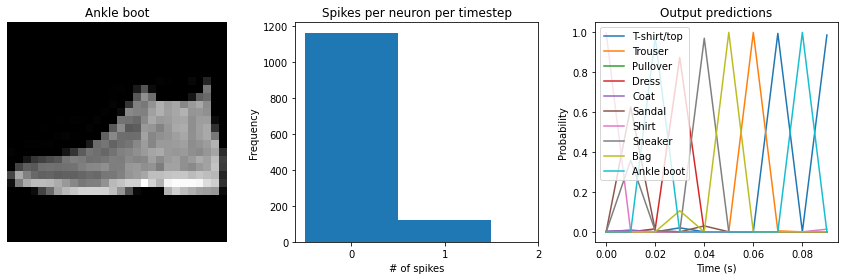

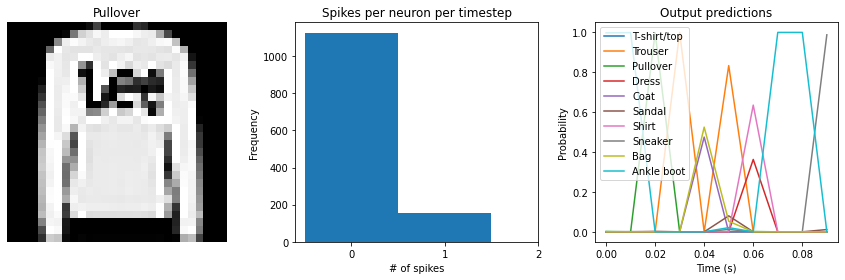

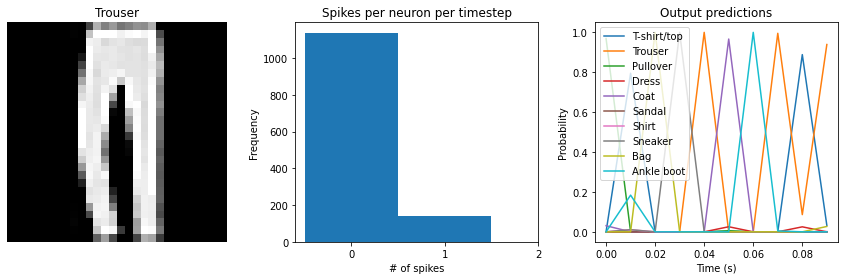

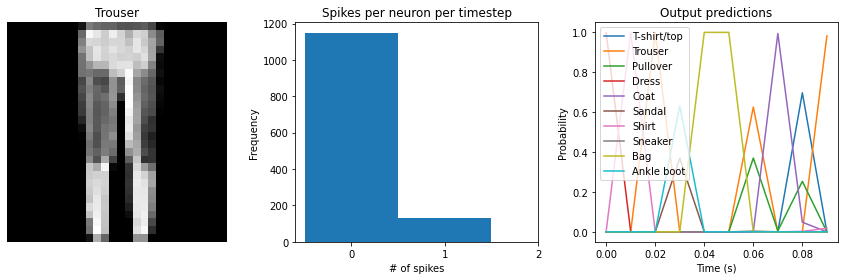

In [14]:
check_output(regularized_model)

We can see that the spike rates have moved towards the 10-20 Hz target we specified.
However, the test accuracy has dropped, since we're adding an additional optimization
constraint. (The accuracy is still higher than the original result with `dt=0.01`, due
to the higher spike rates.) We could lower the regularization weight to allow more
freedom in the firing rates. Or we could use `keras_spiking.regularizers.Percentile`,
which allows more freedom for outliers.
Again, this is a tradeoff that is made between controlling
the firing rates and optimizing accuracy, and the best value for that tradeoff will
depend on the particular application (e.g., how important is it that spike rates fall
within a particular range?).

Note that in some cases it may be better to use regularization with
``spiking_aware_training=False``, as the regularization may perform better when the
value being regularized is smoother. It may also help to adjust the weight
initialization so that the initial firing rates are closer to the desired range, so
that there are smaller adjustments required by the regularizer.

## Lowpass filtering

Another tool we can employ when working with SpikingActivation layers is filtering. As
we've seen, the output of a spiking layer consists of discrete, temporally sparse spike
events. This makes it difficult to determine the spike rate of a neuron when just
looking at a single timestep. In the cases above we have worked around this by using a
`tf.keras.layers.GlobalAveragePooling1D` layer to average the output across all
timesteps before classification.

Another way to achieve this is to compute some kind of moving average of the spiking
output across timesteps. This is effectively what filtering is doing. KerasSpiking
contains a Lowpass layer, which implements a
[lowpass filter](https://en.wikipedia.org/wiki/Low-pass_filter). This has a parameter
`tau`, known as the filter time constant, which controls the degree of smoothing the
layer will apply. Larger `tau` values will apply more smoothing, meaning that we're
aggregating information across longer periods of time, but the output will also be
slower to adapt to changes in the input.

By default the `tau` values are trainable. We can use this in combination with spiking
aware training to enable the model to learn time constants that best trade off spike
noise versus response speed.

Unlike `tf.keras.layers.GlobalAveragePooling1D`, `keras_spiking.Lowpass` computes
outputs for all timesteps by default. This makes it possible to apply filtering
throughout the model—not only on the final layer—in the case that there are multiple
spiking layers. For the final layer, we can pass `return_sequences=False` to have the
layer only return the output of the final timestep, rather than the outputs of all
timesteps.

When working with multiple KerasSpiking layers, we often want them to all share the
same `dt`. We can use `keras_spiking.default.dt` to change the default dt for all
layers. Note that this will only affect layers created _after_ the default is changed;
this will not retroactively affect previous layers.

In [15]:
keras_spiking.default.dt = 0.01

filtered_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation("relu", spiking_aware_training=True),
        # add a lowpass filter on output of spiking layer
        keras_spiking.Lowpass(0.1, return_sequences=False),
        tf.keras.layers.Dense(10),
    ]
)

train(filtered_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 44:06 - loss: 3.1698 - accuracy: 0.0312

   6/1875 [..............................] - ETA: 21s - loss: 2.8297 - accuracy: 0.1198  

  11/1875 [..............................] - ETA: 21s - loss: 2.6876 - accuracy: 0.1307

  15/1875 [..............................] - ETA: 22s - loss: 2.5606 - accuracy: 0.1646

  20/1875 [..............................] - ETA: 22s - loss: 2.5280 - accuracy: 0.1891

  25/1875 [..............................] - ETA: 21s - loss: 2.4466 - accuracy: 0.2188

  30/1875 [..............................] - ETA: 21s - loss: 2.4040 - accuracy: 0.2396

  35/1875 [..............................] - ETA: 21s - loss: 2.3420 - accuracy: 0.2643

  40/1875 [..............................] - ETA: 21s - loss: 2.3628 - accuracy: 0.2742

  45/1875 [..............................] - ETA: 21s - loss: 2.3401 - accuracy: 0.2889

  49/1875 [..............................] - ETA: 21s - loss: 2.3004 - accuracy: 0.3017

  54/1875 [..............................] - ETA: 21s - loss: 2.2552 - accuracy: 0.3119

  58/1875 [..............................] - ETA: 21s - loss: 2.2467 - accuracy: 0.3152

  63/1875 [>.............................] - ETA: 21s - loss: 2.2279 - accuracy: 0.3249

  68/1875 [>.............................] - ETA: 21s - loss: 2.1996 - accuracy: 0.3355

  73/1875 [>.............................] - ETA: 21s - loss: 2.1728 - accuracy: 0.3463

  78/1875 [>.............................] - ETA: 20s - loss: 2.1571 - accuracy: 0.3530

  82/1875 [>.............................] - ETA: 21s - loss: 2.1252 - accuracy: 0.3624

  87/1875 [>.............................] - ETA: 20s - loss: 2.0942 - accuracy: 0.3696

  92/1875 [>.............................] - ETA: 20s - loss: 2.0605 - accuracy: 0.3798

  97/1875 [>.............................] - ETA: 20s - loss: 2.0418 - accuracy: 0.3866

 102/1875 [>.............................] - ETA: 20s - loss: 2.0195 - accuracy: 0.3937

 107/1875 [>.............................] - ETA: 20s - loss: 1.9931 - accuracy: 0.3989

 112/1875 [>.............................] - ETA: 20s - loss: 1.9584 - accuracy: 0.4079

 117/1875 [>.............................] - ETA: 20s - loss: 1.9383 - accuracy: 0.4156

 122/1875 [>.............................] - ETA: 20s - loss: 1.9090 - accuracy: 0.4242

 127/1875 [=>............................] - ETA: 20s - loss: 1.8863 - accuracy: 0.4311

 132/1875 [=>............................] - ETA: 20s - loss: 1.8732 - accuracy: 0.4358

 137/1875 [=>............................] - ETA: 20s - loss: 1.8643 - accuracy: 0.4407

 142/1875 [=>............................] - ETA: 20s - loss: 1.8417 - accuracy: 0.4454

 147/1875 [=>............................] - ETA: 20s - loss: 1.8218 - accuracy: 0.4488

 152/1875 [=>............................] - ETA: 19s - loss: 1.8037 - accuracy: 0.4539

 156/1875 [=>............................] - ETA: 20s - loss: 1.7920 - accuracy: 0.4575

 161/1875 [=>............................] - ETA: 19s - loss: 1.7748 - accuracy: 0.4620

 166/1875 [=>............................] - ETA: 19s - loss: 1.7690 - accuracy: 0.4646

 171/1875 [=>............................] - ETA: 19s - loss: 1.7577 - accuracy: 0.4682

 176/1875 [=>............................] - ETA: 19s - loss: 1.7455 - accuracy: 0.4698

 181/1875 [=>............................] - ETA: 19s - loss: 1.7302 - accuracy: 0.4743

 186/1875 [=>............................] - ETA: 19s - loss: 1.7247 - accuracy: 0.4758

 191/1875 [==>...........................] - ETA: 19s - loss: 1.7127 - accuracy: 0.4787

 196/1875 [==>...........................] - ETA: 19s - loss: 1.7022 - accuracy: 0.4820

 201/1875 [==>...........................] - ETA: 19s - loss: 1.6895 - accuracy: 0.4854

 206/1875 [==>...........................] - ETA: 19s - loss: 1.6844 - accuracy: 0.4879

 211/1875 [==>...........................] - ETA: 19s - loss: 1.6717 - accuracy: 0.4917

 216/1875 [==>...........................] - ETA: 19s - loss: 1.6631 - accuracy: 0.4944

 221/1875 [==>...........................] - ETA: 19s - loss: 1.6484 - accuracy: 0.4992

 226/1875 [==>...........................] - ETA: 19s - loss: 1.6416 - accuracy: 0.4999

 231/1875 [==>...........................] - ETA: 19s - loss: 1.6308 - accuracy: 0.5026

 236/1875 [==>...........................] - ETA: 19s - loss: 1.6157 - accuracy: 0.5075

 241/1875 [==>...........................] - ETA: 18s - loss: 1.6086 - accuracy: 0.5100

 246/1875 [==>...........................] - ETA: 18s - loss: 1.6029 - accuracy: 0.5122

 251/1875 [===>..........................] - ETA: 18s - loss: 1.5942 - accuracy: 0.5139

 256/1875 [===>..........................] - ETA: 18s - loss: 1.5869 - accuracy: 0.5154

 261/1875 [===>..........................] - ETA: 18s - loss: 1.5759 - accuracy: 0.5183

 266/1875 [===>..........................] - ETA: 18s - loss: 1.5708 - accuracy: 0.5194

 271/1875 [===>..........................] - ETA: 18s - loss: 1.5637 - accuracy: 0.5210

 276/1875 [===>..........................] - ETA: 18s - loss: 1.5551 - accuracy: 0.5236

 281/1875 [===>..........................] - ETA: 18s - loss: 1.5454 - accuracy: 0.5262

 286/1875 [===>..........................] - ETA: 18s - loss: 1.5399 - accuracy: 0.5275

 291/1875 [===>..........................] - ETA: 18s - loss: 1.5340 - accuracy: 0.5299

 296/1875 [===>..........................] - ETA: 18s - loss: 1.5224 - accuracy: 0.5330

 301/1875 [===>..........................] - ETA: 18s - loss: 1.5161 - accuracy: 0.5347

 306/1875 [===>..........................] - ETA: 18s - loss: 1.5091 - accuracy: 0.5360

 311/1875 [===>..........................] - ETA: 18s - loss: 1.4981 - accuracy: 0.5391

 316/1875 [====>.........................] - ETA: 18s - loss: 1.4897 - accuracy: 0.5408

 321/1875 [====>.........................] - ETA: 18s - loss: 1.4854 - accuracy: 0.5425

 326/1875 [====>.........................] - ETA: 17s - loss: 1.4815 - accuracy: 0.5447

 330/1875 [====>.........................] - ETA: 17s - loss: 1.4795 - accuracy: 0.5449

 335/1875 [====>.........................] - ETA: 17s - loss: 1.4740 - accuracy: 0.5465

 340/1875 [====>.........................] - ETA: 17s - loss: 1.4684 - accuracy: 0.5476

 345/1875 [====>.........................] - ETA: 17s - loss: 1.4615 - accuracy: 0.5498

 349/1875 [====>.........................] - ETA: 17s - loss: 1.4544 - accuracy: 0.5514

 353/1875 [====>.........................] - ETA: 17s - loss: 1.4478 - accuracy: 0.5529

 358/1875 [====>.........................] - ETA: 17s - loss: 1.4401 - accuracy: 0.5548

 363/1875 [====>.........................] - ETA: 17s - loss: 1.4361 - accuracy: 0.5559

 368/1875 [====>.........................] - ETA: 17s - loss: 1.4278 - accuracy: 0.5578

 373/1875 [====>.........................] - ETA: 17s - loss: 1.4219 - accuracy: 0.5596

 378/1875 [=====>........................] - ETA: 17s - loss: 1.4172 - accuracy: 0.5608

 383/1875 [=====>........................] - ETA: 17s - loss: 1.4106 - accuracy: 0.5620

 388/1875 [=====>........................] - ETA: 17s - loss: 1.4071 - accuracy: 0.5629

 393/1875 [=====>........................] - ETA: 17s - loss: 1.3990 - accuracy: 0.5649

 398/1875 [=====>........................] - ETA: 17s - loss: 1.3908 - accuracy: 0.5668

 403/1875 [=====>........................] - ETA: 17s - loss: 1.3840 - accuracy: 0.5685

 408/1875 [=====>........................] - ETA: 17s - loss: 1.3791 - accuracy: 0.5702

 412/1875 [=====>........................] - ETA: 17s - loss: 1.3748 - accuracy: 0.5714

 417/1875 [=====>........................] - ETA: 17s - loss: 1.3680 - accuracy: 0.5731

 422/1875 [=====>........................] - ETA: 16s - loss: 1.3635 - accuracy: 0.5749

 427/1875 [=====>........................] - ETA: 16s - loss: 1.3585 - accuracy: 0.5763

 432/1875 [=====>........................] - ETA: 16s - loss: 1.3536 - accuracy: 0.5774

 437/1875 [=====>........................] - ETA: 16s - loss: 1.3484 - accuracy: 0.5791

 442/1875 [======>.......................] - ETA: 16s - loss: 1.3443 - accuracy: 0.5800

 447/1875 [======>.......................] - ETA: 16s - loss: 1.3391 - accuracy: 0.5808

 452/1875 [======>.......................] - ETA: 16s - loss: 1.3338 - accuracy: 0.5821

 457/1875 [======>.......................] - ETA: 16s - loss: 1.3281 - accuracy: 0.5834

 462/1875 [======>.......................] - ETA: 16s - loss: 1.3236 - accuracy: 0.5841

 467/1875 [======>.......................] - ETA: 16s - loss: 1.3202 - accuracy: 0.5848

 472/1875 [======>.......................] - ETA: 16s - loss: 1.3152 - accuracy: 0.5856

 477/1875 [======>.......................] - ETA: 16s - loss: 1.3096 - accuracy: 0.5871

 482/1875 [======>.......................] - ETA: 16s - loss: 1.3059 - accuracy: 0.5878

 487/1875 [======>.......................] - ETA: 16s - loss: 1.3017 - accuracy: 0.5887

 492/1875 [======>.......................] - ETA: 16s - loss: 1.2995 - accuracy: 0.5896

 497/1875 [======>.......................] - ETA: 16s - loss: 1.2946 - accuracy: 0.5910

 502/1875 [=======>......................] - ETA: 16s - loss: 1.2923 - accuracy: 0.5914

 507/1875 [=======>......................] - ETA: 15s - loss: 1.2893 - accuracy: 0.5919

 512/1875 [=======>......................] - ETA: 15s - loss: 1.2866 - accuracy: 0.5923

 517/1875 [=======>......................] - ETA: 15s - loss: 1.2831 - accuracy: 0.5934

 522/1875 [=======>......................] - ETA: 15s - loss: 1.2782 - accuracy: 0.5948

 527/1875 [=======>......................] - ETA: 15s - loss: 1.2742 - accuracy: 0.5960

 532/1875 [=======>......................] - ETA: 15s - loss: 1.2694 - accuracy: 0.5970

 537/1875 [=======>......................] - ETA: 15s - loss: 1.2658 - accuracy: 0.5977

 542/1875 [=======>......................] - ETA: 15s - loss: 1.2606 - accuracy: 0.5993

 547/1875 [=======>......................] - ETA: 15s - loss: 1.2575 - accuracy: 0.6001

 552/1875 [=======>......................] - ETA: 15s - loss: 1.2545 - accuracy: 0.6009

 557/1875 [=======>......................] - ETA: 15s - loss: 1.2500 - accuracy: 0.6021

 562/1875 [=======>......................] - ETA: 15s - loss: 1.2475 - accuracy: 0.6031

 567/1875 [========>.....................] - ETA: 15s - loss: 1.2453 - accuracy: 0.6038

 572/1875 [========>.....................] - ETA: 15s - loss: 1.2412 - accuracy: 0.6047

 577/1875 [========>.....................] - ETA: 15s - loss: 1.2366 - accuracy: 0.6061

 582/1875 [========>.....................] - ETA: 15s - loss: 1.2345 - accuracy: 0.6064

 587/1875 [========>.....................] - ETA: 14s - loss: 1.2320 - accuracy: 0.6071

 592/1875 [========>.....................] - ETA: 14s - loss: 1.2287 - accuracy: 0.6078

 597/1875 [========>.....................] - ETA: 14s - loss: 1.2248 - accuracy: 0.6090

 602/1875 [========>.....................] - ETA: 14s - loss: 1.2208 - accuracy: 0.6101

 607/1875 [========>.....................] - ETA: 14s - loss: 1.2166 - accuracy: 0.6113

 612/1875 [========>.....................] - ETA: 14s - loss: 1.2128 - accuracy: 0.6120

 617/1875 [========>.....................] - ETA: 14s - loss: 1.2095 - accuracy: 0.6128

 622/1875 [========>.....................] - ETA: 14s - loss: 1.2074 - accuracy: 0.6136

 627/1875 [=========>....................] - ETA: 14s - loss: 1.2037 - accuracy: 0.6143

 632/1875 [=========>....................] - ETA: 14s - loss: 1.2016 - accuracy: 0.6149

 637/1875 [=========>....................] - ETA: 14s - loss: 1.1986 - accuracy: 0.6156

 642/1875 [=========>....................] - ETA: 14s - loss: 1.1956 - accuracy: 0.6161

 647/1875 [=========>....................] - ETA: 14s - loss: 1.1930 - accuracy: 0.6169

 652/1875 [=========>....................] - ETA: 14s - loss: 1.1891 - accuracy: 0.6178

 657/1875 [=========>....................] - ETA: 14s - loss: 1.1868 - accuracy: 0.6181

 662/1875 [=========>....................] - ETA: 14s - loss: 1.1841 - accuracy: 0.6189

 667/1875 [=========>....................] - ETA: 14s - loss: 1.1818 - accuracy: 0.6195

 672/1875 [=========>....................] - ETA: 13s - loss: 1.1792 - accuracy: 0.6198

 677/1875 [=========>....................] - ETA: 13s - loss: 1.1764 - accuracy: 0.6206

 682/1875 [=========>....................] - ETA: 13s - loss: 1.1728 - accuracy: 0.6212

 687/1875 [=========>....................] - ETA: 13s - loss: 1.1692 - accuracy: 0.6220

 692/1875 [==========>...................] - ETA: 13s - loss: 1.1676 - accuracy: 0.6223

 697/1875 [==========>...................] - ETA: 13s - loss: 1.1660 - accuracy: 0.6227

 702/1875 [==========>...................] - ETA: 13s - loss: 1.1617 - accuracy: 0.6237

 707/1875 [==========>...................] - ETA: 13s - loss: 1.1595 - accuracy: 0.6241

 712/1875 [==========>...................] - ETA: 13s - loss: 1.1566 - accuracy: 0.6247

 717/1875 [==========>...................] - ETA: 13s - loss: 1.1545 - accuracy: 0.6250

 722/1875 [==========>...................] - ETA: 13s - loss: 1.1524 - accuracy: 0.6252

 727/1875 [==========>...................] - ETA: 13s - loss: 1.1498 - accuracy: 0.6258

 732/1875 [==========>...................] - ETA: 13s - loss: 1.1479 - accuracy: 0.6263

 737/1875 [==========>...................] - ETA: 13s - loss: 1.1459 - accuracy: 0.6269

 742/1875 [==========>...................] - ETA: 13s - loss: 1.1433 - accuracy: 0.6273

 747/1875 [==========>...................] - ETA: 13s - loss: 1.1404 - accuracy: 0.6280

 752/1875 [===========>..................] - ETA: 13s - loss: 1.1387 - accuracy: 0.6285

 757/1875 [===========>..................] - ETA: 12s - loss: 1.1354 - accuracy: 0.6291

 762/1875 [===========>..................] - ETA: 12s - loss: 1.1324 - accuracy: 0.6298

 767/1875 [===========>..................] - ETA: 12s - loss: 1.1298 - accuracy: 0.6305

 772/1875 [===========>..................] - ETA: 12s - loss: 1.1262 - accuracy: 0.6315

 777/1875 [===========>..................] - ETA: 12s - loss: 1.1241 - accuracy: 0.6321

 782/1875 [===========>..................] - ETA: 12s - loss: 1.1225 - accuracy: 0.6325

 787/1875 [===========>..................] - ETA: 12s - loss: 1.1195 - accuracy: 0.6333

 792/1875 [===========>..................] - ETA: 12s - loss: 1.1174 - accuracy: 0.6340

 797/1875 [===========>..................] - ETA: 12s - loss: 1.1149 - accuracy: 0.6346

 802/1875 [===========>..................] - ETA: 12s - loss: 1.1125 - accuracy: 0.6350

 806/1875 [===========>..................] - ETA: 12s - loss: 1.1097 - accuracy: 0.6357

 811/1875 [===========>..................] - ETA: 12s - loss: 1.1073 - accuracy: 0.6363

 816/1875 [============>.................] - ETA: 12s - loss: 1.1054 - accuracy: 0.6367

 820/1875 [============>.................] - ETA: 12s - loss: 1.1047 - accuracy: 0.6367

 825/1875 [============>.................] - ETA: 12s - loss: 1.1032 - accuracy: 0.6370

 830/1875 [============>.................] - ETA: 12s - loss: 1.1012 - accuracy: 0.6375

 834/1875 [============>.................] - ETA: 12s - loss: 1.0996 - accuracy: 0.6381

 838/1875 [============>.................] - ETA: 12s - loss: 1.0970 - accuracy: 0.6388

 843/1875 [============>.................] - ETA: 11s - loss: 1.0953 - accuracy: 0.6392

 848/1875 [============>.................] - ETA: 11s - loss: 1.0932 - accuracy: 0.6398

 853/1875 [============>.................] - ETA: 11s - loss: 1.0906 - accuracy: 0.6405

 857/1875 [============>.................] - ETA: 11s - loss: 1.0896 - accuracy: 0.6406

 862/1875 [============>.................] - ETA: 11s - loss: 1.0877 - accuracy: 0.6411

 867/1875 [============>.................] - ETA: 11s - loss: 1.0859 - accuracy: 0.6415

 872/1875 [============>.................] - ETA: 11s - loss: 1.0840 - accuracy: 0.6420

 877/1875 [=============>................] - ETA: 11s - loss: 1.0828 - accuracy: 0.6425

 882/1875 [=============>................] - ETA: 11s - loss: 1.0804 - accuracy: 0.6429

 887/1875 [=============>................] - ETA: 11s - loss: 1.0792 - accuracy: 0.6432

 892/1875 [=============>................] - ETA: 11s - loss: 1.0769 - accuracy: 0.6440

 897/1875 [=============>................] - ETA: 11s - loss: 1.0757 - accuracy: 0.6441

 902/1875 [=============>................] - ETA: 11s - loss: 1.0746 - accuracy: 0.6444

 907/1875 [=============>................] - ETA: 11s - loss: 1.0726 - accuracy: 0.6450

 912/1875 [=============>................] - ETA: 11s - loss: 1.0715 - accuracy: 0.6453

 917/1875 [=============>................] - ETA: 11s - loss: 1.0703 - accuracy: 0.6457

 922/1875 [=============>................] - ETA: 11s - loss: 1.0681 - accuracy: 0.6463

 927/1875 [=============>................] - ETA: 10s - loss: 1.0657 - accuracy: 0.6467

 932/1875 [=============>................] - ETA: 10s - loss: 1.0640 - accuracy: 0.6472

 937/1875 [=============>................] - ETA: 10s - loss: 1.0623 - accuracy: 0.6476

 942/1875 [==============>...............] - ETA: 10s - loss: 1.0600 - accuracy: 0.6483

 947/1875 [==============>...............] - ETA: 10s - loss: 1.0581 - accuracy: 0.6488

 952/1875 [==============>...............] - ETA: 10s - loss: 1.0562 - accuracy: 0.6494

 957/1875 [==============>...............] - ETA: 10s - loss: 1.0554 - accuracy: 0.6494

 962/1875 [==============>...............] - ETA: 10s - loss: 1.0535 - accuracy: 0.6499

 967/1875 [==============>...............] - ETA: 10s - loss: 1.0521 - accuracy: 0.6503

 972/1875 [==============>...............] - ETA: 10s - loss: 1.0507 - accuracy: 0.6506

 977/1875 [==============>...............] - ETA: 10s - loss: 1.0489 - accuracy: 0.6510

 982/1875 [==============>...............] - ETA: 10s - loss: 1.0470 - accuracy: 0.6516

 987/1875 [==============>...............] - ETA: 10s - loss: 1.0451 - accuracy: 0.6520

 992/1875 [==============>...............] - ETA: 10s - loss: 1.0435 - accuracy: 0.6527

 997/1875 [==============>...............] - ETA: 10s - loss: 1.0426 - accuracy: 0.6531

1002/1875 [===============>..............] - ETA: 10s - loss: 1.0403 - accuracy: 0.6538

1007/1875 [===============>..............] - ETA: 10s - loss: 1.0384 - accuracy: 0.6541

1012/1875 [===============>..............] - ETA: 9s - loss: 1.0368 - accuracy: 0.6544 

1017/1875 [===============>..............] - ETA: 9s - loss: 1.0345 - accuracy: 0.6551

1022/1875 [===============>..............] - ETA: 9s - loss: 1.0322 - accuracy: 0.6554

1027/1875 [===============>..............] - ETA: 9s - loss: 1.0305 - accuracy: 0.6559

1032/1875 [===============>..............] - ETA: 9s - loss: 1.0282 - accuracy: 0.6567

1037/1875 [===============>..............] - ETA: 9s - loss: 1.0266 - accuracy: 0.6571

1042/1875 [===============>..............] - ETA: 9s - loss: 1.0246 - accuracy: 0.6577

1047/1875 [===============>..............] - ETA: 9s - loss: 1.0230 - accuracy: 0.6581

1052/1875 [===============>..............] - ETA: 9s - loss: 1.0212 - accuracy: 0.6586

1057/1875 [===============>..............] - ETA: 9s - loss: 1.0196 - accuracy: 0.6589

1062/1875 [===============>..............] - ETA: 9s - loss: 1.0176 - accuracy: 0.6595

1067/1875 [================>.............] - ETA: 9s - loss: 1.0159 - accuracy: 0.6599

1072/1875 [================>.............] - ETA: 9s - loss: 1.0148 - accuracy: 0.6604

1077/1875 [================>.............] - ETA: 9s - loss: 1.0136 - accuracy: 0.6606

1082/1875 [================>.............] - ETA: 9s - loss: 1.0125 - accuracy: 0.6611

1087/1875 [================>.............] - ETA: 9s - loss: 1.0110 - accuracy: 0.6614

1092/1875 [================>.............] - ETA: 9s - loss: 1.0098 - accuracy: 0.6617

1097/1875 [================>.............] - ETA: 8s - loss: 1.0083 - accuracy: 0.6621

1102/1875 [================>.............] - ETA: 8s - loss: 1.0071 - accuracy: 0.6626

1107/1875 [================>.............] - ETA: 8s - loss: 1.0058 - accuracy: 0.6628

1112/1875 [================>.............] - ETA: 8s - loss: 1.0043 - accuracy: 0.6632

1117/1875 [================>.............] - ETA: 8s - loss: 1.0031 - accuracy: 0.6636

1122/1875 [================>.............] - ETA: 8s - loss: 1.0017 - accuracy: 0.6640

1127/1875 [=================>............] - ETA: 8s - loss: 1.0006 - accuracy: 0.6642

1132/1875 [=================>............] - ETA: 8s - loss: 0.9996 - accuracy: 0.6645

1137/1875 [=================>............] - ETA: 8s - loss: 0.9987 - accuracy: 0.6648

1142/1875 [=================>............] - ETA: 8s - loss: 0.9971 - accuracy: 0.6652

1147/1875 [=================>............] - ETA: 8s - loss: 0.9956 - accuracy: 0.6656

1152/1875 [=================>............] - ETA: 8s - loss: 0.9945 - accuracy: 0.6658

1157/1875 [=================>............] - ETA: 8s - loss: 0.9925 - accuracy: 0.6662

1162/1875 [=================>............] - ETA: 8s - loss: 0.9912 - accuracy: 0.6668

1167/1875 [=================>............] - ETA: 8s - loss: 0.9901 - accuracy: 0.6671

1172/1875 [=================>............] - ETA: 8s - loss: 0.9892 - accuracy: 0.6672

1177/1875 [=================>............] - ETA: 8s - loss: 0.9884 - accuracy: 0.6673

1182/1875 [=================>............] - ETA: 7s - loss: 0.9870 - accuracy: 0.6677

1187/1875 [=================>............] - ETA: 7s - loss: 0.9860 - accuracy: 0.6682

1192/1875 [==================>...........] - ETA: 7s - loss: 0.9843 - accuracy: 0.6688

1197/1875 [==================>...........] - ETA: 7s - loss: 0.9828 - accuracy: 0.6692

1202/1875 [==================>...........] - ETA: 7s - loss: 0.9816 - accuracy: 0.6695

1207/1875 [==================>...........] - ETA: 7s - loss: 0.9801 - accuracy: 0.6700

1212/1875 [==================>...........] - ETA: 7s - loss: 0.9789 - accuracy: 0.6703

1217/1875 [==================>...........] - ETA: 7s - loss: 0.9771 - accuracy: 0.6709

1222/1875 [==================>...........] - ETA: 7s - loss: 0.9755 - accuracy: 0.6714

1226/1875 [==================>...........] - ETA: 7s - loss: 0.9744 - accuracy: 0.6717

1231/1875 [==================>...........] - ETA: 7s - loss: 0.9735 - accuracy: 0.6720

1236/1875 [==================>...........] - ETA: 7s - loss: 0.9722 - accuracy: 0.6723

1241/1875 [==================>...........] - ETA: 7s - loss: 0.9716 - accuracy: 0.6725

1246/1875 [==================>...........] - ETA: 7s - loss: 0.9701 - accuracy: 0.6728

1251/1875 [===================>..........] - ETA: 7s - loss: 0.9689 - accuracy: 0.6731

1256/1875 [===================>..........] - ETA: 7s - loss: 0.9676 - accuracy: 0.6734

1261/1875 [===================>..........] - ETA: 7s - loss: 0.9662 - accuracy: 0.6738

1266/1875 [===================>..........] - ETA: 7s - loss: 0.9650 - accuracy: 0.6741

1271/1875 [===================>..........] - ETA: 6s - loss: 0.9634 - accuracy: 0.6746

1276/1875 [===================>..........] - ETA: 6s - loss: 0.9623 - accuracy: 0.6750

1281/1875 [===================>..........] - ETA: 6s - loss: 0.9614 - accuracy: 0.6754

1286/1875 [===================>..........] - ETA: 6s - loss: 0.9604 - accuracy: 0.6755

1291/1875 [===================>..........] - ETA: 6s - loss: 0.9591 - accuracy: 0.6759

1296/1875 [===================>..........] - ETA: 6s - loss: 0.9581 - accuracy: 0.6761

1301/1875 [===================>..........] - ETA: 6s - loss: 0.9566 - accuracy: 0.6765

1306/1875 [===================>..........] - ETA: 6s - loss: 0.9550 - accuracy: 0.6770

1311/1875 [===================>..........] - ETA: 6s - loss: 0.9532 - accuracy: 0.6776

1316/1875 [====================>.........] - ETA: 6s - loss: 0.9522 - accuracy: 0.6779

1321/1875 [====================>.........] - ETA: 6s - loss: 0.9511 - accuracy: 0.6781

1326/1875 [====================>.........] - ETA: 6s - loss: 0.9498 - accuracy: 0.6784

1331/1875 [====================>.........] - ETA: 6s - loss: 0.9491 - accuracy: 0.6783

1336/1875 [====================>.........] - ETA: 6s - loss: 0.9485 - accuracy: 0.6784

1341/1875 [====================>.........] - ETA: 6s - loss: 0.9475 - accuracy: 0.6786

1345/1875 [====================>.........] - ETA: 6s - loss: 0.9466 - accuracy: 0.6789

1350/1875 [====================>.........] - ETA: 6s - loss: 0.9453 - accuracy: 0.6793

1355/1875 [====================>.........] - ETA: 5s - loss: 0.9438 - accuracy: 0.6797

1360/1875 [====================>.........] - ETA: 5s - loss: 0.9424 - accuracy: 0.6801

1364/1875 [====================>.........] - ETA: 5s - loss: 0.9413 - accuracy: 0.6804

1369/1875 [====================>.........] - ETA: 5s - loss: 0.9405 - accuracy: 0.6805

1374/1875 [====================>.........] - ETA: 5s - loss: 0.9394 - accuracy: 0.6808

1379/1875 [=====================>........] - ETA: 5s - loss: 0.9388 - accuracy: 0.6810

1383/1875 [=====================>........] - ETA: 5s - loss: 0.9379 - accuracy: 0.6814

1388/1875 [=====================>........] - ETA: 5s - loss: 0.9366 - accuracy: 0.6817

1393/1875 [=====================>........] - ETA: 5s - loss: 0.9360 - accuracy: 0.6819

1398/1875 [=====================>........] - ETA: 5s - loss: 0.9353 - accuracy: 0.6822

1403/1875 [=====================>........] - ETA: 5s - loss: 0.9340 - accuracy: 0.6826

1408/1875 [=====================>........] - ETA: 5s - loss: 0.9326 - accuracy: 0.6829

1413/1875 [=====================>........] - ETA: 5s - loss: 0.9317 - accuracy: 0.6833

1418/1875 [=====================>........] - ETA: 5s - loss: 0.9312 - accuracy: 0.6835

1423/1875 [=====================>........] - ETA: 5s - loss: 0.9305 - accuracy: 0.6837

1428/1875 [=====================>........] - ETA: 5s - loss: 0.9300 - accuracy: 0.6838

1433/1875 [=====================>........] - ETA: 5s - loss: 0.9294 - accuracy: 0.6840

1438/1875 [======================>.......] - ETA: 5s - loss: 0.9280 - accuracy: 0.6844

1443/1875 [======================>.......] - ETA: 4s - loss: 0.9267 - accuracy: 0.6848

1448/1875 [======================>.......] - ETA: 4s - loss: 0.9252 - accuracy: 0.6854

1453/1875 [======================>.......] - ETA: 4s - loss: 0.9238 - accuracy: 0.6858

1458/1875 [======================>.......] - ETA: 4s - loss: 0.9232 - accuracy: 0.6860

1463/1875 [======================>.......] - ETA: 4s - loss: 0.9223 - accuracy: 0.6862

1468/1875 [======================>.......] - ETA: 4s - loss: 0.9217 - accuracy: 0.6864

1473/1875 [======================>.......] - ETA: 4s - loss: 0.9213 - accuracy: 0.6865

1478/1875 [======================>.......] - ETA: 4s - loss: 0.9199 - accuracy: 0.6870

1483/1875 [======================>.......] - ETA: 4s - loss: 0.9190 - accuracy: 0.6872

1488/1875 [======================>.......] - ETA: 4s - loss: 0.9180 - accuracy: 0.6874

1493/1875 [======================>.......] - ETA: 4s - loss: 0.9166 - accuracy: 0.6878

1498/1875 [======================>.......] - ETA: 4s - loss: 0.9155 - accuracy: 0.6883

1503/1875 [=======================>......] - ETA: 4s - loss: 0.9142 - accuracy: 0.6888

1508/1875 [=======================>......] - ETA: 4s - loss: 0.9130 - accuracy: 0.6892

1513/1875 [=======================>......] - ETA: 4s - loss: 0.9119 - accuracy: 0.6895

1518/1875 [=======================>......] - ETA: 4s - loss: 0.9107 - accuracy: 0.6899

1523/1875 [=======================>......] - ETA: 4s - loss: 0.9095 - accuracy: 0.6902

1528/1875 [=======================>......] - ETA: 3s - loss: 0.9085 - accuracy: 0.6904

1533/1875 [=======================>......] - ETA: 3s - loss: 0.9080 - accuracy: 0.6905

1538/1875 [=======================>......] - ETA: 3s - loss: 0.9072 - accuracy: 0.6907

1543/1875 [=======================>......] - ETA: 3s - loss: 0.9066 - accuracy: 0.6908

1548/1875 [=======================>......] - ETA: 3s - loss: 0.9059 - accuracy: 0.6909

1553/1875 [=======================>......] - ETA: 3s - loss: 0.9047 - accuracy: 0.6912

1558/1875 [=======================>......] - ETA: 3s - loss: 0.9039 - accuracy: 0.6914

1563/1875 [========================>.....] - ETA: 3s - loss: 0.9029 - accuracy: 0.6916

1568/1875 [========================>.....] - ETA: 3s - loss: 0.9023 - accuracy: 0.6919

1573/1875 [========================>.....] - ETA: 3s - loss: 0.9018 - accuracy: 0.6921

1578/1875 [========================>.....] - ETA: 3s - loss: 0.9012 - accuracy: 0.6921

1583/1875 [========================>.....] - ETA: 3s - loss: 0.9003 - accuracy: 0.6924

1588/1875 [========================>.....] - ETA: 3s - loss: 0.8998 - accuracy: 0.6926

1593/1875 [========================>.....] - ETA: 3s - loss: 0.8986 - accuracy: 0.6929

1598/1875 [========================>.....] - ETA: 3s - loss: 0.8978 - accuracy: 0.6932

1603/1875 [========================>.....] - ETA: 3s - loss: 0.8970 - accuracy: 0.6935

1608/1875 [========================>.....] - ETA: 3s - loss: 0.8962 - accuracy: 0.6938

1613/1875 [========================>.....] - ETA: 3s - loss: 0.8953 - accuracy: 0.6939

1618/1875 [========================>.....] - ETA: 2s - loss: 0.8945 - accuracy: 0.6941

1623/1875 [========================>.....] - ETA: 2s - loss: 0.8938 - accuracy: 0.6943

1628/1875 [=========================>....] - ETA: 2s - loss: 0.8934 - accuracy: 0.6945

1633/1875 [=========================>....] - ETA: 2s - loss: 0.8926 - accuracy: 0.6947

1638/1875 [=========================>....] - ETA: 2s - loss: 0.8916 - accuracy: 0.6951

1643/1875 [=========================>....] - ETA: 2s - loss: 0.8909 - accuracy: 0.6953

1648/1875 [=========================>....] - ETA: 2s - loss: 0.8899 - accuracy: 0.6956

1653/1875 [=========================>....] - ETA: 2s - loss: 0.8889 - accuracy: 0.6958

1658/1875 [=========================>....] - ETA: 2s - loss: 0.8883 - accuracy: 0.6960

1663/1875 [=========================>....] - ETA: 2s - loss: 0.8874 - accuracy: 0.6963

1668/1875 [=========================>....] - ETA: 2s - loss: 0.8867 - accuracy: 0.6965

1673/1875 [=========================>....] - ETA: 2s - loss: 0.8861 - accuracy: 0.6967

1678/1875 [=========================>....] - ETA: 2s - loss: 0.8850 - accuracy: 0.6970

1683/1875 [=========================>....] - ETA: 2s - loss: 0.8842 - accuracy: 0.6973

1688/1875 [==========================>...] - ETA: 2s - loss: 0.8834 - accuracy: 0.6976

1693/1875 [==========================>...] - ETA: 2s - loss: 0.8825 - accuracy: 0.6978

1698/1875 [==========================>...] - ETA: 2s - loss: 0.8821 - accuracy: 0.6978

1703/1875 [==========================>...] - ETA: 1s - loss: 0.8815 - accuracy: 0.6980

1708/1875 [==========================>...] - ETA: 1s - loss: 0.8806 - accuracy: 0.6983

1713/1875 [==========================>...] - ETA: 1s - loss: 0.8796 - accuracy: 0.6986

1717/1875 [==========================>...] - ETA: 1s - loss: 0.8792 - accuracy: 0.6987

1722/1875 [==========================>...] - ETA: 1s - loss: 0.8784 - accuracy: 0.6989

1727/1875 [==========================>...] - ETA: 1s - loss: 0.8774 - accuracy: 0.6992

1732/1875 [==========================>...] - ETA: 1s - loss: 0.8767 - accuracy: 0.6994

1737/1875 [==========================>...] - ETA: 1s - loss: 0.8759 - accuracy: 0.6996

1742/1875 [==========================>...] - ETA: 1s - loss: 0.8749 - accuracy: 0.6999

1747/1875 [==========================>...] - ETA: 1s - loss: 0.8739 - accuracy: 0.7004

1752/1875 [===========================>..] - ETA: 1s - loss: 0.8735 - accuracy: 0.7005

1757/1875 [===========================>..] - ETA: 1s - loss: 0.8729 - accuracy: 0.7006

1762/1875 [===========================>..] - ETA: 1s - loss: 0.8721 - accuracy: 0.7008

1767/1875 [===========================>..] - ETA: 1s - loss: 0.8713 - accuracy: 0.7011

1772/1875 [===========================>..] - ETA: 1s - loss: 0.8704 - accuracy: 0.7013

1777/1875 [===========================>..] - ETA: 1s - loss: 0.8696 - accuracy: 0.7016

1782/1875 [===========================>..] - ETA: 1s - loss: 0.8688 - accuracy: 0.7017

1787/1875 [===========================>..] - ETA: 1s - loss: 0.8687 - accuracy: 0.7017

1792/1875 [===========================>..] - ETA: 0s - loss: 0.8681 - accuracy: 0.7020

1797/1875 [===========================>..] - ETA: 0s - loss: 0.8674 - accuracy: 0.7023

1802/1875 [===========================>..] - ETA: 0s - loss: 0.8669 - accuracy: 0.7024

1807/1875 [===========================>..] - ETA: 0s - loss: 0.8660 - accuracy: 0.7027

1812/1875 [===========================>..] - ETA: 0s - loss: 0.8656 - accuracy: 0.7029

1817/1875 [============================>.] - ETA: 0s - loss: 0.8651 - accuracy: 0.7029

1822/1875 [============================>.] - ETA: 0s - loss: 0.8642 - accuracy: 0.7031

1827/1875 [============================>.] - ETA: 0s - loss: 0.8633 - accuracy: 0.7033

1832/1875 [============================>.] - ETA: 0s - loss: 0.8624 - accuracy: 0.7036

1837/1875 [============================>.] - ETA: 0s - loss: 0.8613 - accuracy: 0.7040

1842/1875 [============================>.] - ETA: 0s - loss: 0.8605 - accuracy: 0.7042

1847/1875 [============================>.] - ETA: 0s - loss: 0.8596 - accuracy: 0.7045

1852/1875 [============================>.] - ETA: 0s - loss: 0.8591 - accuracy: 0.7047

1857/1875 [============================>.] - ETA: 0s - loss: 0.8588 - accuracy: 0.7048

1862/1875 [============================>.] - ETA: 0s - loss: 0.8584 - accuracy: 0.7049

1867/1875 [============================>.] - ETA: 0s - loss: 0.8577 - accuracy: 0.7051

1872/1875 [============================>.] - ETA: 0s - loss: 0.8565 - accuracy: 0.7055

1875/1875 [==============================] - 23s 12ms/step - loss: 0.8561 - accuracy: 0.7057


Epoch 2/10


   1/1875 [..............................] - ETA: 29s - loss: 0.4697 - accuracy: 0.8438

   6/1875 [..............................] - ETA: 21s - loss: 0.5274 - accuracy: 0.8021

  11/1875 [..............................] - ETA: 21s - loss: 0.6651 - accuracy: 0.7557

  16/1875 [..............................] - ETA: 21s - loss: 0.6183 - accuracy: 0.7715

  21/1875 [..............................] - ETA: 21s - loss: 0.6384 - accuracy: 0.7649

  26/1875 [..............................] - ETA: 20s - loss: 0.6128 - accuracy: 0.7740

  31/1875 [..............................] - ETA: 21s - loss: 0.6400 - accuracy: 0.7621

  36/1875 [..............................] - ETA: 21s - loss: 0.6246 - accuracy: 0.7708

  41/1875 [..............................] - ETA: 21s - loss: 0.6243 - accuracy: 0.7713

  46/1875 [..............................] - ETA: 20s - loss: 0.6182 - accuracy: 0.7704

  51/1875 [..............................] - ETA: 20s - loss: 0.6169 - accuracy: 0.7708

  56/1875 [..............................] - ETA: 20s - loss: 0.6271 - accuracy: 0.7690

  61/1875 [..............................] - ETA: 20s - loss: 0.6209 - accuracy: 0.7705

  65/1875 [>.............................] - ETA: 20s - loss: 0.6237 - accuracy: 0.7712

  70/1875 [>.............................] - ETA: 20s - loss: 0.6172 - accuracy: 0.7763

  75/1875 [>.............................] - ETA: 20s - loss: 0.6154 - accuracy: 0.7771

  80/1875 [>.............................] - ETA: 20s - loss: 0.6096 - accuracy: 0.7797

  85/1875 [>.............................] - ETA: 20s - loss: 0.6078 - accuracy: 0.7798

  90/1875 [>.............................] - ETA: 20s - loss: 0.6090 - accuracy: 0.7802

  95/1875 [>.............................] - ETA: 20s - loss: 0.6095 - accuracy: 0.7812

 100/1875 [>.............................] - ETA: 20s - loss: 0.6066 - accuracy: 0.7822

 105/1875 [>.............................] - ETA: 20s - loss: 0.6108 - accuracy: 0.7815

 110/1875 [>.............................] - ETA: 20s - loss: 0.6086 - accuracy: 0.7830

 115/1875 [>.............................] - ETA: 20s - loss: 0.6121 - accuracy: 0.7802

 120/1875 [>.............................] - ETA: 20s - loss: 0.6093 - accuracy: 0.7802

 125/1875 [=>............................] - ETA: 20s - loss: 0.6129 - accuracy: 0.7795

 130/1875 [=>............................] - ETA: 19s - loss: 0.6137 - accuracy: 0.7786

 135/1875 [=>............................] - ETA: 19s - loss: 0.6176 - accuracy: 0.7785

 140/1875 [=>............................] - ETA: 19s - loss: 0.6199 - accuracy: 0.7783

 145/1875 [=>............................] - ETA: 19s - loss: 0.6222 - accuracy: 0.7774

 150/1875 [=>............................] - ETA: 19s - loss: 0.6188 - accuracy: 0.7800

 155/1875 [=>............................] - ETA: 19s - loss: 0.6155 - accuracy: 0.7804

 160/1875 [=>............................] - ETA: 19s - loss: 0.6206 - accuracy: 0.7773

 165/1875 [=>............................] - ETA: 19s - loss: 0.6181 - accuracy: 0.7778

 170/1875 [=>............................] - ETA: 19s - loss: 0.6179 - accuracy: 0.7787

 175/1875 [=>............................] - ETA: 19s - loss: 0.6171 - accuracy: 0.7782

 180/1875 [=>............................] - ETA: 19s - loss: 0.6155 - accuracy: 0.7785

 185/1875 [=>............................] - ETA: 19s - loss: 0.6151 - accuracy: 0.7775

 190/1875 [==>...........................] - ETA: 19s - loss: 0.6155 - accuracy: 0.7763

 195/1875 [==>...........................] - ETA: 19s - loss: 0.6142 - accuracy: 0.7763

 200/1875 [==>...........................] - ETA: 19s - loss: 0.6132 - accuracy: 0.7770

 205/1875 [==>...........................] - ETA: 19s - loss: 0.6126 - accuracy: 0.7774

 210/1875 [==>...........................] - ETA: 18s - loss: 0.6102 - accuracy: 0.7787

 215/1875 [==>...........................] - ETA: 18s - loss: 0.6104 - accuracy: 0.7785

 220/1875 [==>...........................] - ETA: 18s - loss: 0.6097 - accuracy: 0.7788

 225/1875 [==>...........................] - ETA: 18s - loss: 0.6101 - accuracy: 0.7788

 230/1875 [==>...........................] - ETA: 18s - loss: 0.6084 - accuracy: 0.7791

 235/1875 [==>...........................] - ETA: 18s - loss: 0.6088 - accuracy: 0.7786

 240/1875 [==>...........................] - ETA: 18s - loss: 0.6094 - accuracy: 0.7788

 245/1875 [==>...........................] - ETA: 18s - loss: 0.6085 - accuracy: 0.7792

 250/1875 [===>..........................] - ETA: 18s - loss: 0.6071 - accuracy: 0.7794

 255/1875 [===>..........................] - ETA: 18s - loss: 0.6074 - accuracy: 0.7789

 260/1875 [===>..........................] - ETA: 18s - loss: 0.6065 - accuracy: 0.7788

 265/1875 [===>..........................] - ETA: 18s - loss: 0.6064 - accuracy: 0.7783

 270/1875 [===>..........................] - ETA: 18s - loss: 0.6046 - accuracy: 0.7794

 275/1875 [===>..........................] - ETA: 18s - loss: 0.6029 - accuracy: 0.7801

 280/1875 [===>..........................] - ETA: 18s - loss: 0.6050 - accuracy: 0.7790

 285/1875 [===>..........................] - ETA: 18s - loss: 0.6037 - accuracy: 0.7789

 290/1875 [===>..........................] - ETA: 18s - loss: 0.6028 - accuracy: 0.7794

 295/1875 [===>..........................] - ETA: 18s - loss: 0.6038 - accuracy: 0.7789

 300/1875 [===>..........................] - ETA: 17s - loss: 0.6053 - accuracy: 0.7779

 305/1875 [===>..........................] - ETA: 17s - loss: 0.6067 - accuracy: 0.7778

 310/1875 [===>..........................] - ETA: 17s - loss: 0.6059 - accuracy: 0.7779

 315/1875 [====>.........................] - ETA: 17s - loss: 0.6043 - accuracy: 0.7790

 319/1875 [====>.........................] - ETA: 17s - loss: 0.6050 - accuracy: 0.7790

 324/1875 [====>.........................] - ETA: 17s - loss: 0.6037 - accuracy: 0.7796

 329/1875 [====>.........................] - ETA: 17s - loss: 0.6014 - accuracy: 0.7804

 333/1875 [====>.........................] - ETA: 17s - loss: 0.6016 - accuracy: 0.7798

 338/1875 [====>.........................] - ETA: 17s - loss: 0.6035 - accuracy: 0.7797

 343/1875 [====>.........................] - ETA: 17s - loss: 0.6019 - accuracy: 0.7793

 348/1875 [====>.........................] - ETA: 17s - loss: 0.6020 - accuracy: 0.7789

 353/1875 [====>.........................] - ETA: 17s - loss: 0.6029 - accuracy: 0.7789

 358/1875 [====>.........................] - ETA: 17s - loss: 0.6032 - accuracy: 0.7787

 363/1875 [====>.........................] - ETA: 17s - loss: 0.6038 - accuracy: 0.7781

 368/1875 [====>.........................] - ETA: 17s - loss: 0.6035 - accuracy: 0.7779

 373/1875 [====>.........................] - ETA: 17s - loss: 0.6032 - accuracy: 0.7779

 378/1875 [=====>........................] - ETA: 17s - loss: 0.6012 - accuracy: 0.7789

 383/1875 [=====>........................] - ETA: 17s - loss: 0.6019 - accuracy: 0.7790

 388/1875 [=====>........................] - ETA: 17s - loss: 0.6010 - accuracy: 0.7792

 393/1875 [=====>........................] - ETA: 16s - loss: 0.6007 - accuracy: 0.7790

 398/1875 [=====>........................] - ETA: 16s - loss: 0.6014 - accuracy: 0.7791

 403/1875 [=====>........................] - ETA: 16s - loss: 0.6013 - accuracy: 0.7792

 408/1875 [=====>........................] - ETA: 16s - loss: 0.6000 - accuracy: 0.7796

 413/1875 [=====>........................] - ETA: 16s - loss: 0.6010 - accuracy: 0.7797

 418/1875 [=====>........................] - ETA: 16s - loss: 0.6013 - accuracy: 0.7797

 423/1875 [=====>........................] - ETA: 16s - loss: 0.6020 - accuracy: 0.7791

 427/1875 [=====>........................] - ETA: 16s - loss: 0.6019 - accuracy: 0.7786

 432/1875 [=====>........................] - ETA: 16s - loss: 0.6010 - accuracy: 0.7793

 437/1875 [=====>........................] - ETA: 16s - loss: 0.5985 - accuracy: 0.7800

 442/1875 [======>.......................] - ETA: 16s - loss: 0.5985 - accuracy: 0.7804

 447/1875 [======>.......................] - ETA: 16s - loss: 0.5983 - accuracy: 0.7805

 452/1875 [======>.......................] - ETA: 16s - loss: 0.5976 - accuracy: 0.7804

 457/1875 [======>.......................] - ETA: 16s - loss: 0.5969 - accuracy: 0.7811

 462/1875 [======>.......................] - ETA: 16s - loss: 0.5978 - accuracy: 0.7809

 467/1875 [======>.......................] - ETA: 16s - loss: 0.5980 - accuracy: 0.7812

 471/1875 [======>.......................] - ETA: 16s - loss: 0.5983 - accuracy: 0.7807

 476/1875 [======>.......................] - ETA: 16s - loss: 0.5983 - accuracy: 0.7806

 481/1875 [======>.......................] - ETA: 16s - loss: 0.5973 - accuracy: 0.7811

 486/1875 [======>.......................] - ETA: 15s - loss: 0.5974 - accuracy: 0.7809

 491/1875 [======>.......................] - ETA: 15s - loss: 0.5971 - accuracy: 0.7814

 496/1875 [======>.......................] - ETA: 15s - loss: 0.5962 - accuracy: 0.7817

 501/1875 [=======>......................] - ETA: 15s - loss: 0.5966 - accuracy: 0.7816

 506/1875 [=======>......................] - ETA: 15s - loss: 0.5971 - accuracy: 0.7811

 511/1875 [=======>......................] - ETA: 15s - loss: 0.5959 - accuracy: 0.7816

 516/1875 [=======>......................] - ETA: 15s - loss: 0.5956 - accuracy: 0.7816

 521/1875 [=======>......................] - ETA: 15s - loss: 0.5950 - accuracy: 0.7818

 526/1875 [=======>......................] - ETA: 15s - loss: 0.5959 - accuracy: 0.7812

 531/1875 [=======>......................] - ETA: 15s - loss: 0.5962 - accuracy: 0.7812

 536/1875 [=======>......................] - ETA: 15s - loss: 0.5964 - accuracy: 0.7812

 541/1875 [=======>......................] - ETA: 15s - loss: 0.5964 - accuracy: 0.7811

 546/1875 [=======>......................] - ETA: 15s - loss: 0.5961 - accuracy: 0.7814

 550/1875 [=======>......................] - ETA: 15s - loss: 0.5953 - accuracy: 0.7818

 555/1875 [=======>......................] - ETA: 15s - loss: 0.5950 - accuracy: 0.7819

 560/1875 [=======>......................] - ETA: 15s - loss: 0.5941 - accuracy: 0.7823

 565/1875 [========>.....................] - ETA: 15s - loss: 0.5943 - accuracy: 0.7825

 570/1875 [========>.....................] - ETA: 14s - loss: 0.5944 - accuracy: 0.7826

 575/1875 [========>.....................] - ETA: 14s - loss: 0.5939 - accuracy: 0.7828

 580/1875 [========>.....................] - ETA: 14s - loss: 0.5942 - accuracy: 0.7828

 585/1875 [========>.....................] - ETA: 14s - loss: 0.5937 - accuracy: 0.7827

 590/1875 [========>.....................] - ETA: 14s - loss: 0.5936 - accuracy: 0.7827

 595/1875 [========>.....................] - ETA: 14s - loss: 0.5927 - accuracy: 0.7830

 600/1875 [========>.....................] - ETA: 14s - loss: 0.5930 - accuracy: 0.7829

 605/1875 [========>.....................] - ETA: 14s - loss: 0.5925 - accuracy: 0.7831

 610/1875 [========>.....................] - ETA: 14s - loss: 0.5918 - accuracy: 0.7833

 615/1875 [========>.....................] - ETA: 14s - loss: 0.5912 - accuracy: 0.7836

 620/1875 [========>.....................] - ETA: 14s - loss: 0.5926 - accuracy: 0.7830

 625/1875 [=========>....................] - ETA: 14s - loss: 0.5915 - accuracy: 0.7833

 630/1875 [=========>....................] - ETA: 14s - loss: 0.5925 - accuracy: 0.7830

 635/1875 [=========>....................] - ETA: 14s - loss: 0.5919 - accuracy: 0.7829

 640/1875 [=========>....................] - ETA: 14s - loss: 0.5908 - accuracy: 0.7834

 644/1875 [=========>....................] - ETA: 14s - loss: 0.5911 - accuracy: 0.7832

 649/1875 [=========>....................] - ETA: 14s - loss: 0.5916 - accuracy: 0.7830

 654/1875 [=========>....................] - ETA: 14s - loss: 0.5914 - accuracy: 0.7829

 659/1875 [=========>....................] - ETA: 13s - loss: 0.5906 - accuracy: 0.7835

 664/1875 [=========>....................] - ETA: 13s - loss: 0.5903 - accuracy: 0.7836

 669/1875 [=========>....................] - ETA: 13s - loss: 0.5898 - accuracy: 0.7838

 674/1875 [=========>....................] - ETA: 13s - loss: 0.5897 - accuracy: 0.7840

 678/1875 [=========>....................] - ETA: 13s - loss: 0.5895 - accuracy: 0.7842

 683/1875 [=========>....................] - ETA: 13s - loss: 0.5891 - accuracy: 0.7843

 688/1875 [==========>...................] - ETA: 13s - loss: 0.5884 - accuracy: 0.7845

 693/1875 [==========>...................] - ETA: 13s - loss: 0.5877 - accuracy: 0.7846

 698/1875 [==========>...................] - ETA: 13s - loss: 0.5869 - accuracy: 0.7848

 703/1875 [==========>...................] - ETA: 13s - loss: 0.5870 - accuracy: 0.7847

 708/1875 [==========>...................] - ETA: 13s - loss: 0.5868 - accuracy: 0.7848

 713/1875 [==========>...................] - ETA: 13s - loss: 0.5869 - accuracy: 0.7848

 718/1875 [==========>...................] - ETA: 13s - loss: 0.5869 - accuracy: 0.7849

 723/1875 [==========>...................] - ETA: 13s - loss: 0.5873 - accuracy: 0.7850

 727/1875 [==========>...................] - ETA: 13s - loss: 0.5862 - accuracy: 0.7852

 732/1875 [==========>...................] - ETA: 13s - loss: 0.5863 - accuracy: 0.7853

 737/1875 [==========>...................] - ETA: 13s - loss: 0.5858 - accuracy: 0.7854

 742/1875 [==========>...................] - ETA: 13s - loss: 0.5855 - accuracy: 0.7858

 747/1875 [==========>...................] - ETA: 12s - loss: 0.5852 - accuracy: 0.7859

 752/1875 [===========>..................] - ETA: 12s - loss: 0.5845 - accuracy: 0.7862

 757/1875 [===========>..................] - ETA: 12s - loss: 0.5850 - accuracy: 0.7860

 762/1875 [===========>..................] - ETA: 12s - loss: 0.5847 - accuracy: 0.7859

 767/1875 [===========>..................] - ETA: 12s - loss: 0.5848 - accuracy: 0.7860

 772/1875 [===========>..................] - ETA: 12s - loss: 0.5847 - accuracy: 0.7861

 777/1875 [===========>..................] - ETA: 12s - loss: 0.5846 - accuracy: 0.7864

 782/1875 [===========>..................] - ETA: 12s - loss: 0.5842 - accuracy: 0.7864

 787/1875 [===========>..................] - ETA: 12s - loss: 0.5842 - accuracy: 0.7863

 792/1875 [===========>..................] - ETA: 12s - loss: 0.5837 - accuracy: 0.7862

 797/1875 [===========>..................] - ETA: 12s - loss: 0.5833 - accuracy: 0.7863

 802/1875 [===========>..................] - ETA: 12s - loss: 0.5835 - accuracy: 0.7861

 807/1875 [===========>..................] - ETA: 12s - loss: 0.5841 - accuracy: 0.7859

 812/1875 [===========>..................] - ETA: 12s - loss: 0.5832 - accuracy: 0.7861

 817/1875 [============>.................] - ETA: 12s - loss: 0.5832 - accuracy: 0.7862

 822/1875 [============>.................] - ETA: 12s - loss: 0.5830 - accuracy: 0.7862

 826/1875 [============>.................] - ETA: 12s - loss: 0.5833 - accuracy: 0.7862

 831/1875 [============>.................] - ETA: 12s - loss: 0.5837 - accuracy: 0.7860

 836/1875 [============>.................] - ETA: 11s - loss: 0.5836 - accuracy: 0.7860

 841/1875 [============>.................] - ETA: 11s - loss: 0.5835 - accuracy: 0.7861

 846/1875 [============>.................] - ETA: 11s - loss: 0.5848 - accuracy: 0.7857

 851/1875 [============>.................] - ETA: 11s - loss: 0.5847 - accuracy: 0.7855

 856/1875 [============>.................] - ETA: 11s - loss: 0.5844 - accuracy: 0.7855

 861/1875 [============>.................] - ETA: 11s - loss: 0.5841 - accuracy: 0.7855

 866/1875 [============>.................] - ETA: 11s - loss: 0.5839 - accuracy: 0.7856

 871/1875 [============>.................] - ETA: 11s - loss: 0.5832 - accuracy: 0.7858

 876/1875 [=============>................] - ETA: 11s - loss: 0.5832 - accuracy: 0.7857

 881/1875 [=============>................] - ETA: 11s - loss: 0.5825 - accuracy: 0.7861

 886/1875 [=============>................] - ETA: 11s - loss: 0.5824 - accuracy: 0.7862

 891/1875 [=============>................] - ETA: 11s - loss: 0.5820 - accuracy: 0.7863

 896/1875 [=============>................] - ETA: 11s - loss: 0.5816 - accuracy: 0.7864

 901/1875 [=============>................] - ETA: 11s - loss: 0.5811 - accuracy: 0.7866

 906/1875 [=============>................] - ETA: 11s - loss: 0.5806 - accuracy: 0.7867

 911/1875 [=============>................] - ETA: 11s - loss: 0.5804 - accuracy: 0.7869

 916/1875 [=============>................] - ETA: 11s - loss: 0.5802 - accuracy: 0.7871

 921/1875 [=============>................] - ETA: 10s - loss: 0.5796 - accuracy: 0.7875

 926/1875 [=============>................] - ETA: 10s - loss: 0.5792 - accuracy: 0.7878

 931/1875 [=============>................] - ETA: 10s - loss: 0.5789 - accuracy: 0.7880

 936/1875 [=============>................] - ETA: 10s - loss: 0.5782 - accuracy: 0.7885

 941/1875 [==============>...............] - ETA: 10s - loss: 0.5785 - accuracy: 0.7884

 946/1875 [==============>...............] - ETA: 10s - loss: 0.5785 - accuracy: 0.7883

 951/1875 [==============>...............] - ETA: 10s - loss: 0.5777 - accuracy: 0.7886

 956/1875 [==============>...............] - ETA: 10s - loss: 0.5771 - accuracy: 0.7890

 961/1875 [==============>...............] - ETA: 10s - loss: 0.5773 - accuracy: 0.7888

 966/1875 [==============>...............] - ETA: 10s - loss: 0.5774 - accuracy: 0.7887

 971/1875 [==============>...............] - ETA: 10s - loss: 0.5780 - accuracy: 0.7886

 976/1875 [==============>...............] - ETA: 10s - loss: 0.5780 - accuracy: 0.7886

 981/1875 [==============>...............] - ETA: 10s - loss: 0.5777 - accuracy: 0.7887

 986/1875 [==============>...............] - ETA: 10s - loss: 0.5776 - accuracy: 0.7887

 991/1875 [==============>...............] - ETA: 10s - loss: 0.5772 - accuracy: 0.7890

 996/1875 [==============>...............] - ETA: 10s - loss: 0.5768 - accuracy: 0.7891

1001/1875 [===============>..............] - ETA: 10s - loss: 0.5761 - accuracy: 0.7894

1006/1875 [===============>..............] - ETA: 9s - loss: 0.5757 - accuracy: 0.7896 

1011/1875 [===============>..............] - ETA: 9s - loss: 0.5758 - accuracy: 0.7895

1016/1875 [===============>..............] - ETA: 9s - loss: 0.5757 - accuracy: 0.7895

1021/1875 [===============>..............] - ETA: 9s - loss: 0.5756 - accuracy: 0.7895

1026/1875 [===============>..............] - ETA: 9s - loss: 0.5754 - accuracy: 0.7895

1031/1875 [===============>..............] - ETA: 9s - loss: 0.5746 - accuracy: 0.7899

1036/1875 [===============>..............] - ETA: 9s - loss: 0.5750 - accuracy: 0.7898

1041/1875 [===============>..............] - ETA: 9s - loss: 0.5747 - accuracy: 0.7899

1046/1875 [===============>..............] - ETA: 9s - loss: 0.5753 - accuracy: 0.7897

1051/1875 [===============>..............] - ETA: 9s - loss: 0.5751 - accuracy: 0.7898

1056/1875 [===============>..............] - ETA: 9s - loss: 0.5751 - accuracy: 0.7898

1061/1875 [===============>..............] - ETA: 9s - loss: 0.5748 - accuracy: 0.7899

1066/1875 [================>.............] - ETA: 9s - loss: 0.5749 - accuracy: 0.7900

1071/1875 [================>.............] - ETA: 9s - loss: 0.5751 - accuracy: 0.7899

1076/1875 [================>.............] - ETA: 9s - loss: 0.5755 - accuracy: 0.7897

1081/1875 [================>.............] - ETA: 9s - loss: 0.5761 - accuracy: 0.7895

1086/1875 [================>.............] - ETA: 9s - loss: 0.5757 - accuracy: 0.7896

1091/1875 [================>.............] - ETA: 8s - loss: 0.5761 - accuracy: 0.7896

1096/1875 [================>.............] - ETA: 8s - loss: 0.5762 - accuracy: 0.7897

1101/1875 [================>.............] - ETA: 8s - loss: 0.5757 - accuracy: 0.7899

1105/1875 [================>.............] - ETA: 8s - loss: 0.5756 - accuracy: 0.7900

1110/1875 [================>.............] - ETA: 8s - loss: 0.5755 - accuracy: 0.7898

1115/1875 [================>.............] - ETA: 8s - loss: 0.5761 - accuracy: 0.7896

1120/1875 [================>.............] - ETA: 8s - loss: 0.5756 - accuracy: 0.7897

1125/1875 [=================>............] - ETA: 8s - loss: 0.5754 - accuracy: 0.7898

1130/1875 [=================>............] - ETA: 8s - loss: 0.5748 - accuracy: 0.7900

1135/1875 [=================>............] - ETA: 8s - loss: 0.5753 - accuracy: 0.7899

1140/1875 [=================>............] - ETA: 8s - loss: 0.5751 - accuracy: 0.7900

1145/1875 [=================>............] - ETA: 8s - loss: 0.5746 - accuracy: 0.7900

1150/1875 [=================>............] - ETA: 8s - loss: 0.5753 - accuracy: 0.7898

1155/1875 [=================>............] - ETA: 8s - loss: 0.5751 - accuracy: 0.7899

1160/1875 [=================>............] - ETA: 8s - loss: 0.5752 - accuracy: 0.7898

1165/1875 [=================>............] - ETA: 8s - loss: 0.5755 - accuracy: 0.7897

1170/1875 [=================>............] - ETA: 8s - loss: 0.5750 - accuracy: 0.7899

1175/1875 [=================>............] - ETA: 8s - loss: 0.5751 - accuracy: 0.7898

1180/1875 [=================>............] - ETA: 7s - loss: 0.5748 - accuracy: 0.7899

1185/1875 [=================>............] - ETA: 7s - loss: 0.5754 - accuracy: 0.7898

1190/1875 [==================>...........] - ETA: 7s - loss: 0.5749 - accuracy: 0.7900

1195/1875 [==================>...........] - ETA: 7s - loss: 0.5744 - accuracy: 0.7904

1200/1875 [==================>...........] - ETA: 7s - loss: 0.5743 - accuracy: 0.7903

1205/1875 [==================>...........] - ETA: 7s - loss: 0.5742 - accuracy: 0.7902

1210/1875 [==================>...........] - ETA: 7s - loss: 0.5740 - accuracy: 0.7903

1215/1875 [==================>...........] - ETA: 7s - loss: 0.5738 - accuracy: 0.7903

1220/1875 [==================>...........] - ETA: 7s - loss: 0.5735 - accuracy: 0.7904

1225/1875 [==================>...........] - ETA: 7s - loss: 0.5726 - accuracy: 0.7907

1230/1875 [==================>...........] - ETA: 7s - loss: 0.5724 - accuracy: 0.7907

1235/1875 [==================>...........] - ETA: 7s - loss: 0.5725 - accuracy: 0.7907

1240/1875 [==================>...........] - ETA: 7s - loss: 0.5730 - accuracy: 0.7906

1245/1875 [==================>...........] - ETA: 7s - loss: 0.5726 - accuracy: 0.7907

1250/1875 [===================>..........] - ETA: 7s - loss: 0.5727 - accuracy: 0.7906

1255/1875 [===================>..........] - ETA: 7s - loss: 0.5726 - accuracy: 0.7907

1260/1875 [===================>..........] - ETA: 7s - loss: 0.5725 - accuracy: 0.7908

1265/1875 [===================>..........] - ETA: 6s - loss: 0.5722 - accuracy: 0.7909

1270/1875 [===================>..........] - ETA: 6s - loss: 0.5717 - accuracy: 0.7912

1275/1875 [===================>..........] - ETA: 6s - loss: 0.5718 - accuracy: 0.7910

1280/1875 [===================>..........] - ETA: 6s - loss: 0.5719 - accuracy: 0.7910

1285/1875 [===================>..........] - ETA: 6s - loss: 0.5722 - accuracy: 0.7909

1290/1875 [===================>..........] - ETA: 6s - loss: 0.5719 - accuracy: 0.7911

1295/1875 [===================>..........] - ETA: 6s - loss: 0.5717 - accuracy: 0.7911

1300/1875 [===================>..........] - ETA: 6s - loss: 0.5716 - accuracy: 0.7912

1305/1875 [===================>..........] - ETA: 6s - loss: 0.5714 - accuracy: 0.7911

1310/1875 [===================>..........] - ETA: 6s - loss: 0.5715 - accuracy: 0.7912

1315/1875 [====================>.........] - ETA: 6s - loss: 0.5715 - accuracy: 0.7912

1320/1875 [====================>.........] - ETA: 6s - loss: 0.5715 - accuracy: 0.7913

1325/1875 [====================>.........] - ETA: 6s - loss: 0.5715 - accuracy: 0.7912

1330/1875 [====================>.........] - ETA: 6s - loss: 0.5718 - accuracy: 0.7911

1335/1875 [====================>.........] - ETA: 6s - loss: 0.5715 - accuracy: 0.7913

1340/1875 [====================>.........] - ETA: 6s - loss: 0.5719 - accuracy: 0.7912

1345/1875 [====================>.........] - ETA: 6s - loss: 0.5721 - accuracy: 0.7909

1350/1875 [====================>.........] - ETA: 6s - loss: 0.5719 - accuracy: 0.7909

1355/1875 [====================>.........] - ETA: 5s - loss: 0.5718 - accuracy: 0.7908

1360/1875 [====================>.........] - ETA: 5s - loss: 0.5717 - accuracy: 0.7909

1365/1875 [====================>.........] - ETA: 5s - loss: 0.5717 - accuracy: 0.7909

1370/1875 [====================>.........] - ETA: 5s - loss: 0.5714 - accuracy: 0.7910

1375/1875 [=====================>........] - ETA: 5s - loss: 0.5715 - accuracy: 0.7909

1380/1875 [=====================>........] - ETA: 5s - loss: 0.5713 - accuracy: 0.7910

1385/1875 [=====================>........] - ETA: 5s - loss: 0.5712 - accuracy: 0.7911

1390/1875 [=====================>........] - ETA: 5s - loss: 0.5711 - accuracy: 0.7912

1395/1875 [=====================>........] - ETA: 5s - loss: 0.5709 - accuracy: 0.7914

1400/1875 [=====================>........] - ETA: 5s - loss: 0.5710 - accuracy: 0.7914

1405/1875 [=====================>........] - ETA: 5s - loss: 0.5705 - accuracy: 0.7916

1410/1875 [=====================>........] - ETA: 5s - loss: 0.5704 - accuracy: 0.7916

1415/1875 [=====================>........] - ETA: 5s - loss: 0.5699 - accuracy: 0.7918

1420/1875 [=====================>........] - ETA: 5s - loss: 0.5695 - accuracy: 0.7919

1425/1875 [=====================>........] - ETA: 5s - loss: 0.5694 - accuracy: 0.7919

1430/1875 [=====================>........] - ETA: 5s - loss: 0.5693 - accuracy: 0.7919

1435/1875 [=====================>........] - ETA: 5s - loss: 0.5689 - accuracy: 0.7921

1440/1875 [======================>.......] - ETA: 4s - loss: 0.5684 - accuracy: 0.7924

1445/1875 [======================>.......] - ETA: 4s - loss: 0.5685 - accuracy: 0.7924

1450/1875 [======================>.......] - ETA: 4s - loss: 0.5686 - accuracy: 0.7922

1455/1875 [======================>.......] - ETA: 4s - loss: 0.5689 - accuracy: 0.7921

1460/1875 [======================>.......] - ETA: 4s - loss: 0.5688 - accuracy: 0.7921

1465/1875 [======================>.......] - ETA: 4s - loss: 0.5687 - accuracy: 0.7921

1470/1875 [======================>.......] - ETA: 4s - loss: 0.5689 - accuracy: 0.7921

1475/1875 [======================>.......] - ETA: 4s - loss: 0.5687 - accuracy: 0.7921

1480/1875 [======================>.......] - ETA: 4s - loss: 0.5690 - accuracy: 0.7921

1485/1875 [======================>.......] - ETA: 4s - loss: 0.5684 - accuracy: 0.7924

1490/1875 [======================>.......] - ETA: 4s - loss: 0.5683 - accuracy: 0.7925

1495/1875 [======================>.......] - ETA: 4s - loss: 0.5684 - accuracy: 0.7924

1500/1875 [=======================>......] - ETA: 4s - loss: 0.5685 - accuracy: 0.7924

1505/1875 [=======================>......] - ETA: 4s - loss: 0.5686 - accuracy: 0.7924

1510/1875 [=======================>......] - ETA: 4s - loss: 0.5682 - accuracy: 0.7925

1515/1875 [=======================>......] - ETA: 4s - loss: 0.5683 - accuracy: 0.7923

1520/1875 [=======================>......] - ETA: 4s - loss: 0.5682 - accuracy: 0.7923

1525/1875 [=======================>......] - ETA: 4s - loss: 0.5683 - accuracy: 0.7924

1530/1875 [=======================>......] - ETA: 3s - loss: 0.5678 - accuracy: 0.7926

1535/1875 [=======================>......] - ETA: 3s - loss: 0.5678 - accuracy: 0.7925

1540/1875 [=======================>......] - ETA: 3s - loss: 0.5680 - accuracy: 0.7925

1545/1875 [=======================>......] - ETA: 3s - loss: 0.5679 - accuracy: 0.7925

1550/1875 [=======================>......] - ETA: 3s - loss: 0.5677 - accuracy: 0.7925

1555/1875 [=======================>......] - ETA: 3s - loss: 0.5675 - accuracy: 0.7925

1560/1875 [=======================>......] - ETA: 3s - loss: 0.5673 - accuracy: 0.7926

1564/1875 [========================>.....] - ETA: 3s - loss: 0.5668 - accuracy: 0.7928

1569/1875 [========================>.....] - ETA: 3s - loss: 0.5668 - accuracy: 0.7929

1573/1875 [========================>.....] - ETA: 3s - loss: 0.5668 - accuracy: 0.7929

1578/1875 [========================>.....] - ETA: 3s - loss: 0.5666 - accuracy: 0.7931

1583/1875 [========================>.....] - ETA: 3s - loss: 0.5662 - accuracy: 0.7933

1588/1875 [========================>.....] - ETA: 3s - loss: 0.5662 - accuracy: 0.7933

1593/1875 [========================>.....] - ETA: 3s - loss: 0.5661 - accuracy: 0.7933

1598/1875 [========================>.....] - ETA: 3s - loss: 0.5656 - accuracy: 0.7935

1603/1875 [========================>.....] - ETA: 3s - loss: 0.5658 - accuracy: 0.7934

1608/1875 [========================>.....] - ETA: 3s - loss: 0.5658 - accuracy: 0.7934

1613/1875 [========================>.....] - ETA: 3s - loss: 0.5661 - accuracy: 0.7933

1618/1875 [========================>.....] - ETA: 2s - loss: 0.5657 - accuracy: 0.7935

1623/1875 [========================>.....] - ETA: 2s - loss: 0.5657 - accuracy: 0.7935

1628/1875 [=========================>....] - ETA: 2s - loss: 0.5657 - accuracy: 0.7934

1633/1875 [=========================>....] - ETA: 2s - loss: 0.5655 - accuracy: 0.7934

1638/1875 [=========================>....] - ETA: 2s - loss: 0.5654 - accuracy: 0.7935

1643/1875 [=========================>....] - ETA: 2s - loss: 0.5652 - accuracy: 0.7935

1648/1875 [=========================>....] - ETA: 2s - loss: 0.5651 - accuracy: 0.7936

1653/1875 [=========================>....] - ETA: 2s - loss: 0.5649 - accuracy: 0.7937

1658/1875 [=========================>....] - ETA: 2s - loss: 0.5645 - accuracy: 0.7938

1663/1875 [=========================>....] - ETA: 2s - loss: 0.5641 - accuracy: 0.7939

1668/1875 [=========================>....] - ETA: 2s - loss: 0.5639 - accuracy: 0.7940

1673/1875 [=========================>....] - ETA: 2s - loss: 0.5637 - accuracy: 0.7941

1678/1875 [=========================>....] - ETA: 2s - loss: 0.5642 - accuracy: 0.7941

1683/1875 [=========================>....] - ETA: 2s - loss: 0.5643 - accuracy: 0.7940

1688/1875 [==========================>...] - ETA: 2s - loss: 0.5643 - accuracy: 0.7940

1693/1875 [==========================>...] - ETA: 2s - loss: 0.5642 - accuracy: 0.7940

1698/1875 [==========================>...] - ETA: 2s - loss: 0.5646 - accuracy: 0.7940

1703/1875 [==========================>...] - ETA: 1s - loss: 0.5641 - accuracy: 0.7941

1708/1875 [==========================>...] - ETA: 1s - loss: 0.5639 - accuracy: 0.7941

1713/1875 [==========================>...] - ETA: 1s - loss: 0.5634 - accuracy: 0.7943

1718/1875 [==========================>...] - ETA: 1s - loss: 0.5631 - accuracy: 0.7945

1723/1875 [==========================>...] - ETA: 1s - loss: 0.5629 - accuracy: 0.7945

1728/1875 [==========================>...] - ETA: 1s - loss: 0.5626 - accuracy: 0.7946

1733/1875 [==========================>...] - ETA: 1s - loss: 0.5625 - accuracy: 0.7948

1738/1875 [==========================>...] - ETA: 1s - loss: 0.5626 - accuracy: 0.7948

1743/1875 [==========================>...] - ETA: 1s - loss: 0.5623 - accuracy: 0.7949

1748/1875 [==========================>...] - ETA: 1s - loss: 0.5620 - accuracy: 0.7951

1753/1875 [===========================>..] - ETA: 1s - loss: 0.5619 - accuracy: 0.7951

1758/1875 [===========================>..] - ETA: 1s - loss: 0.5619 - accuracy: 0.7950

1763/1875 [===========================>..] - ETA: 1s - loss: 0.5618 - accuracy: 0.7951

1768/1875 [===========================>..] - ETA: 1s - loss: 0.5613 - accuracy: 0.7953

1773/1875 [===========================>..] - ETA: 1s - loss: 0.5618 - accuracy: 0.7953

1778/1875 [===========================>..] - ETA: 1s - loss: 0.5616 - accuracy: 0.7954

1783/1875 [===========================>..] - ETA: 1s - loss: 0.5615 - accuracy: 0.7954

1788/1875 [===========================>..] - ETA: 0s - loss: 0.5619 - accuracy: 0.7952

1793/1875 [===========================>..] - ETA: 0s - loss: 0.5617 - accuracy: 0.7952

1798/1875 [===========================>..] - ETA: 0s - loss: 0.5619 - accuracy: 0.7951

1803/1875 [===========================>..] - ETA: 0s - loss: 0.5619 - accuracy: 0.7951

1808/1875 [===========================>..] - ETA: 0s - loss: 0.5617 - accuracy: 0.7953

1813/1875 [============================>.] - ETA: 0s - loss: 0.5618 - accuracy: 0.7953

1818/1875 [============================>.] - ETA: 0s - loss: 0.5617 - accuracy: 0.7954

1823/1875 [============================>.] - ETA: 0s - loss: 0.5614 - accuracy: 0.7956

1828/1875 [============================>.] - ETA: 0s - loss: 0.5613 - accuracy: 0.7956

1833/1875 [============================>.] - ETA: 0s - loss: 0.5610 - accuracy: 0.7957

1838/1875 [============================>.] - ETA: 0s - loss: 0.5609 - accuracy: 0.7957

1843/1875 [============================>.] - ETA: 0s - loss: 0.5609 - accuracy: 0.7958

1848/1875 [============================>.] - ETA: 0s - loss: 0.5606 - accuracy: 0.7959

1853/1875 [============================>.] - ETA: 0s - loss: 0.5605 - accuracy: 0.7959

1858/1875 [============================>.] - ETA: 0s - loss: 0.5602 - accuracy: 0.7961

1863/1875 [============================>.] - ETA: 0s - loss: 0.5604 - accuracy: 0.7960

1868/1875 [============================>.] - ETA: 0s - loss: 0.5603 - accuracy: 0.7961

1873/1875 [============================>.] - ETA: 0s - loss: 0.5603 - accuracy: 0.7962

1875/1875 [==============================] - 21s 11ms/step - loss: 0.5602 - accuracy: 0.7962


Epoch 3/10


   1/1875 [..............................] - ETA: 21s - loss: 0.6188 - accuracy: 0.8438

   6/1875 [..............................] - ETA: 20s - loss: 0.4487 - accuracy: 0.8542

  11/1875 [..............................] - ETA: 20s - loss: 0.4666 - accuracy: 0.8466

  16/1875 [..............................] - ETA: 20s - loss: 0.5310 - accuracy: 0.8359

  21/1875 [..............................] - ETA: 20s - loss: 0.4858 - accuracy: 0.8452

  26/1875 [..............................] - ETA: 20s - loss: 0.4878 - accuracy: 0.8413

  31/1875 [..............................] - ETA: 20s - loss: 0.5043 - accuracy: 0.8327

  36/1875 [..............................] - ETA: 20s - loss: 0.5010 - accuracy: 0.8290

  41/1875 [..............................] - ETA: 20s - loss: 0.5190 - accuracy: 0.8178

  46/1875 [..............................] - ETA: 20s - loss: 0.5076 - accuracy: 0.8247

  51/1875 [..............................] - ETA: 20s - loss: 0.5162 - accuracy: 0.8199

  56/1875 [..............................] - ETA: 20s - loss: 0.5196 - accuracy: 0.8158

  61/1875 [..............................] - ETA: 20s - loss: 0.5377 - accuracy: 0.8120

  65/1875 [>.............................] - ETA: 20s - loss: 0.5340 - accuracy: 0.8130

  70/1875 [>.............................] - ETA: 20s - loss: 0.5320 - accuracy: 0.8103

  75/1875 [>.............................] - ETA: 20s - loss: 0.5305 - accuracy: 0.8104

  80/1875 [>.............................] - ETA: 20s - loss: 0.5349 - accuracy: 0.8090

  85/1875 [>.............................] - ETA: 20s - loss: 0.5356 - accuracy: 0.8070

  90/1875 [>.............................] - ETA: 20s - loss: 0.5290 - accuracy: 0.8090

  95/1875 [>.............................] - ETA: 20s - loss: 0.5308 - accuracy: 0.8102

 100/1875 [>.............................] - ETA: 20s - loss: 0.5271 - accuracy: 0.8103

 104/1875 [>.............................] - ETA: 20s - loss: 0.5298 - accuracy: 0.8107

 108/1875 [>.............................] - ETA: 20s - loss: 0.5250 - accuracy: 0.8116

 113/1875 [>.............................] - ETA: 20s - loss: 0.5269 - accuracy: 0.8111

 118/1875 [>.............................] - ETA: 20s - loss: 0.5311 - accuracy: 0.8096

 123/1875 [>.............................] - ETA: 20s - loss: 0.5314 - accuracy: 0.8097

 128/1875 [=>............................] - ETA: 20s - loss: 0.5340 - accuracy: 0.8091

 133/1875 [=>............................] - ETA: 20s - loss: 0.5289 - accuracy: 0.8104

 138/1875 [=>............................] - ETA: 20s - loss: 0.5259 - accuracy: 0.8127

 143/1875 [=>............................] - ETA: 20s - loss: 0.5216 - accuracy: 0.8145

 148/1875 [=>............................] - ETA: 19s - loss: 0.5211 - accuracy: 0.8146

 153/1875 [=>............................] - ETA: 19s - loss: 0.5217 - accuracy: 0.8145

 158/1875 [=>............................] - ETA: 19s - loss: 0.5229 - accuracy: 0.8135

 163/1875 [=>............................] - ETA: 19s - loss: 0.5236 - accuracy: 0.8125

 168/1875 [=>............................] - ETA: 19s - loss: 0.5207 - accuracy: 0.8132

 173/1875 [=>............................] - ETA: 19s - loss: 0.5209 - accuracy: 0.8125

 178/1875 [=>............................] - ETA: 19s - loss: 0.5210 - accuracy: 0.8129

 183/1875 [=>............................] - ETA: 19s - loss: 0.5227 - accuracy: 0.8123

 188/1875 [==>...........................] - ETA: 19s - loss: 0.5270 - accuracy: 0.8123

 193/1875 [==>...........................] - ETA: 19s - loss: 0.5248 - accuracy: 0.8127

 198/1875 [==>...........................] - ETA: 19s - loss: 0.5245 - accuracy: 0.8116

 203/1875 [==>...........................] - ETA: 19s - loss: 0.5220 - accuracy: 0.8127

 208/1875 [==>...........................] - ETA: 19s - loss: 0.5210 - accuracy: 0.8127

 213/1875 [==>...........................] - ETA: 19s - loss: 0.5209 - accuracy: 0.8122

 218/1875 [==>...........................] - ETA: 19s - loss: 0.5207 - accuracy: 0.8121

 223/1875 [==>...........................] - ETA: 19s - loss: 0.5238 - accuracy: 0.8112

 228/1875 [==>...........................] - ETA: 18s - loss: 0.5243 - accuracy: 0.8113

 233/1875 [==>...........................] - ETA: 18s - loss: 0.5220 - accuracy: 0.8122

 238/1875 [==>...........................] - ETA: 18s - loss: 0.5251 - accuracy: 0.8118

 243/1875 [==>...........................] - ETA: 18s - loss: 0.5246 - accuracy: 0.8120

 248/1875 [==>...........................] - ETA: 18s - loss: 0.5233 - accuracy: 0.8124

 253/1875 [===>..........................] - ETA: 18s - loss: 0.5264 - accuracy: 0.8118

 258/1875 [===>..........................] - ETA: 18s - loss: 0.5285 - accuracy: 0.8110

 263/1875 [===>..........................] - ETA: 18s - loss: 0.5290 - accuracy: 0.8113

 268/1875 [===>..........................] - ETA: 18s - loss: 0.5293 - accuracy: 0.8115

 273/1875 [===>..........................] - ETA: 18s - loss: 0.5324 - accuracy: 0.8112

 278/1875 [===>..........................] - ETA: 18s - loss: 0.5305 - accuracy: 0.8117

 283/1875 [===>..........................] - ETA: 18s - loss: 0.5311 - accuracy: 0.8117

 288/1875 [===>..........................] - ETA: 18s - loss: 0.5331 - accuracy: 0.8114

 293/1875 [===>..........................] - ETA: 18s - loss: 0.5325 - accuracy: 0.8123

 298/1875 [===>..........................] - ETA: 18s - loss: 0.5328 - accuracy: 0.8113

 303/1875 [===>..........................] - ETA: 18s - loss: 0.5316 - accuracy: 0.8119

 308/1875 [===>..........................] - ETA: 17s - loss: 0.5331 - accuracy: 0.8118

 313/1875 [====>.........................] - ETA: 17s - loss: 0.5339 - accuracy: 0.8117

 318/1875 [====>.........................] - ETA: 17s - loss: 0.5343 - accuracy: 0.8119

 323/1875 [====>.........................] - ETA: 17s - loss: 0.5351 - accuracy: 0.8116

 328/1875 [====>.........................] - ETA: 17s - loss: 0.5341 - accuracy: 0.8117

 333/1875 [====>.........................] - ETA: 17s - loss: 0.5327 - accuracy: 0.8120

 337/1875 [====>.........................] - ETA: 17s - loss: 0.5342 - accuracy: 0.8119

 342/1875 [====>.........................] - ETA: 17s - loss: 0.5364 - accuracy: 0.8110

 347/1875 [====>.........................] - ETA: 17s - loss: 0.5356 - accuracy: 0.8111

 352/1875 [====>.........................] - ETA: 17s - loss: 0.5361 - accuracy: 0.8110

 357/1875 [====>.........................] - ETA: 17s - loss: 0.5337 - accuracy: 0.8118

 362/1875 [====>.........................] - ETA: 17s - loss: 0.5328 - accuracy: 0.8118

 367/1875 [====>.........................] - ETA: 17s - loss: 0.5326 - accuracy: 0.8116

 372/1875 [====>.........................] - ETA: 17s - loss: 0.5371 - accuracy: 0.8101

 377/1875 [=====>........................] - ETA: 17s - loss: 0.5353 - accuracy: 0.8109

 382/1875 [=====>........................] - ETA: 17s - loss: 0.5352 - accuracy: 0.8108

 387/1875 [=====>........................] - ETA: 17s - loss: 0.5348 - accuracy: 0.8110

 392/1875 [=====>........................] - ETA: 17s - loss: 0.5333 - accuracy: 0.8117

 397/1875 [=====>........................] - ETA: 16s - loss: 0.5331 - accuracy: 0.8118

 402/1875 [=====>........................] - ETA: 16s - loss: 0.5343 - accuracy: 0.8110

 407/1875 [=====>........................] - ETA: 16s - loss: 0.5345 - accuracy: 0.8110

 411/1875 [=====>........................] - ETA: 16s - loss: 0.5335 - accuracy: 0.8116

 416/1875 [=====>........................] - ETA: 16s - loss: 0.5340 - accuracy: 0.8111

 421/1875 [=====>........................] - ETA: 16s - loss: 0.5330 - accuracy: 0.8113

 426/1875 [=====>........................] - ETA: 16s - loss: 0.5322 - accuracy: 0.8115

 431/1875 [=====>........................] - ETA: 16s - loss: 0.5325 - accuracy: 0.8116

 436/1875 [=====>........................] - ETA: 16s - loss: 0.5310 - accuracy: 0.8121

 441/1875 [======>.......................] - ETA: 16s - loss: 0.5303 - accuracy: 0.8121

 446/1875 [======>.......................] - ETA: 16s - loss: 0.5290 - accuracy: 0.8126

 451/1875 [======>.......................] - ETA: 16s - loss: 0.5292 - accuracy: 0.8127

 456/1875 [======>.......................] - ETA: 16s - loss: 0.5281 - accuracy: 0.8130

 461/1875 [======>.......................] - ETA: 16s - loss: 0.5283 - accuracy: 0.8129

 466/1875 [======>.......................] - ETA: 16s - loss: 0.5266 - accuracy: 0.8138

 471/1875 [======>.......................] - ETA: 16s - loss: 0.5264 - accuracy: 0.8139

 476/1875 [======>.......................] - ETA: 16s - loss: 0.5267 - accuracy: 0.8139

 481/1875 [======>.......................] - ETA: 15s - loss: 0.5258 - accuracy: 0.8144

 486/1875 [======>.......................] - ETA: 15s - loss: 0.5257 - accuracy: 0.8140

 491/1875 [======>.......................] - ETA: 15s - loss: 0.5236 - accuracy: 0.8144

 496/1875 [======>.......................] - ETA: 15s - loss: 0.5244 - accuracy: 0.8142

 501/1875 [=======>......................] - ETA: 15s - loss: 0.5240 - accuracy: 0.8143

 506/1875 [=======>......................] - ETA: 15s - loss: 0.5237 - accuracy: 0.8144

 511/1875 [=======>......................] - ETA: 15s - loss: 0.5236 - accuracy: 0.8143

 516/1875 [=======>......................] - ETA: 15s - loss: 0.5240 - accuracy: 0.8140

 521/1875 [=======>......................] - ETA: 15s - loss: 0.5244 - accuracy: 0.8140

 526/1875 [=======>......................] - ETA: 15s - loss: 0.5241 - accuracy: 0.8142

 531/1875 [=======>......................] - ETA: 15s - loss: 0.5238 - accuracy: 0.8143

 536/1875 [=======>......................] - ETA: 15s - loss: 0.5227 - accuracy: 0.8146

 541/1875 [=======>......................] - ETA: 15s - loss: 0.5230 - accuracy: 0.8147

 546/1875 [=======>......................] - ETA: 15s - loss: 0.5227 - accuracy: 0.8146

 551/1875 [=======>......................] - ETA: 15s - loss: 0.5226 - accuracy: 0.8148

 556/1875 [=======>......................] - ETA: 15s - loss: 0.5237 - accuracy: 0.8141

 561/1875 [=======>......................] - ETA: 15s - loss: 0.5229 - accuracy: 0.8147

 566/1875 [========>.....................] - ETA: 14s - loss: 0.5233 - accuracy: 0.8143

 571/1875 [========>.....................] - ETA: 14s - loss: 0.5242 - accuracy: 0.8141

 576/1875 [========>.....................] - ETA: 14s - loss: 0.5235 - accuracy: 0.8142

 581/1875 [========>.....................] - ETA: 14s - loss: 0.5234 - accuracy: 0.8141

 586/1875 [========>.....................] - ETA: 14s - loss: 0.5238 - accuracy: 0.8136

 591/1875 [========>.....................] - ETA: 14s - loss: 0.5245 - accuracy: 0.8133

 596/1875 [========>.....................] - ETA: 14s - loss: 0.5238 - accuracy: 0.8135

 601/1875 [========>.....................] - ETA: 14s - loss: 0.5236 - accuracy: 0.8137

 606/1875 [========>.....................] - ETA: 14s - loss: 0.5232 - accuracy: 0.8137

 611/1875 [========>.....................] - ETA: 14s - loss: 0.5225 - accuracy: 0.8139

 616/1875 [========>.....................] - ETA: 14s - loss: 0.5228 - accuracy: 0.8138

 621/1875 [========>.....................] - ETA: 14s - loss: 0.5230 - accuracy: 0.8137

 626/1875 [=========>....................] - ETA: 14s - loss: 0.5220 - accuracy: 0.8139

 631/1875 [=========>....................] - ETA: 14s - loss: 0.5219 - accuracy: 0.8138

 636/1875 [=========>....................] - ETA: 14s - loss: 0.5221 - accuracy: 0.8140

 641/1875 [=========>....................] - ETA: 14s - loss: 0.5231 - accuracy: 0.8138

 646/1875 [=========>....................] - ETA: 14s - loss: 0.5226 - accuracy: 0.8136

 651/1875 [=========>....................] - ETA: 13s - loss: 0.5222 - accuracy: 0.8136

 656/1875 [=========>....................] - ETA: 13s - loss: 0.5230 - accuracy: 0.8134

 661/1875 [=========>....................] - ETA: 13s - loss: 0.5228 - accuracy: 0.8134

 666/1875 [=========>....................] - ETA: 13s - loss: 0.5223 - accuracy: 0.8135

 671/1875 [=========>....................] - ETA: 13s - loss: 0.5226 - accuracy: 0.8134

 676/1875 [=========>....................] - ETA: 13s - loss: 0.5227 - accuracy: 0.8134

 681/1875 [=========>....................] - ETA: 13s - loss: 0.5228 - accuracy: 0.8134

 686/1875 [=========>....................] - ETA: 13s - loss: 0.5233 - accuracy: 0.8133

 691/1875 [==========>...................] - ETA: 13s - loss: 0.5242 - accuracy: 0.8128

 696/1875 [==========>...................] - ETA: 13s - loss: 0.5243 - accuracy: 0.8128

 701/1875 [==========>...................] - ETA: 13s - loss: 0.5245 - accuracy: 0.8126

 706/1875 [==========>...................] - ETA: 13s - loss: 0.5248 - accuracy: 0.8125

 711/1875 [==========>...................] - ETA: 13s - loss: 0.5243 - accuracy: 0.8125

 716/1875 [==========>...................] - ETA: 13s - loss: 0.5240 - accuracy: 0.8125

 721/1875 [==========>...................] - ETA: 13s - loss: 0.5242 - accuracy: 0.8125

 726/1875 [==========>...................] - ETA: 13s - loss: 0.5243 - accuracy: 0.8124

 731/1875 [==========>...................] - ETA: 13s - loss: 0.5245 - accuracy: 0.8124

 736/1875 [==========>...................] - ETA: 13s - loss: 0.5244 - accuracy: 0.8122

 741/1875 [==========>...................] - ETA: 12s - loss: 0.5238 - accuracy: 0.8123

 745/1875 [==========>...................] - ETA: 12s - loss: 0.5233 - accuracy: 0.8126

 750/1875 [===========>..................] - ETA: 12s - loss: 0.5223 - accuracy: 0.8129

 755/1875 [===========>..................] - ETA: 12s - loss: 0.5222 - accuracy: 0.8129

 760/1875 [===========>..................] - ETA: 12s - loss: 0.5221 - accuracy: 0.8128

 765/1875 [===========>..................] - ETA: 12s - loss: 0.5220 - accuracy: 0.8125

 770/1875 [===========>..................] - ETA: 12s - loss: 0.5216 - accuracy: 0.8127

 775/1875 [===========>..................] - ETA: 12s - loss: 0.5210 - accuracy: 0.8129

 780/1875 [===========>..................] - ETA: 12s - loss: 0.5210 - accuracy: 0.8128

 785/1875 [===========>..................] - ETA: 12s - loss: 0.5204 - accuracy: 0.8131

 790/1875 [===========>..................] - ETA: 12s - loss: 0.5201 - accuracy: 0.8130

 795/1875 [===========>..................] - ETA: 12s - loss: 0.5203 - accuracy: 0.8130

 800/1875 [===========>..................] - ETA: 12s - loss: 0.5198 - accuracy: 0.8132

 805/1875 [===========>..................] - ETA: 12s - loss: 0.5195 - accuracy: 0.8133

 810/1875 [===========>..................] - ETA: 12s - loss: 0.5192 - accuracy: 0.8134

 815/1875 [============>.................] - ETA: 12s - loss: 0.5187 - accuracy: 0.8137

 820/1875 [============>.................] - ETA: 12s - loss: 0.5186 - accuracy: 0.8138

 825/1875 [============>.................] - ETA: 12s - loss: 0.5193 - accuracy: 0.8136

 830/1875 [============>.................] - ETA: 11s - loss: 0.5199 - accuracy: 0.8134

 835/1875 [============>.................] - ETA: 11s - loss: 0.5210 - accuracy: 0.8129

 840/1875 [============>.................] - ETA: 11s - loss: 0.5212 - accuracy: 0.8131

 845/1875 [============>.................] - ETA: 11s - loss: 0.5205 - accuracy: 0.8132

 850/1875 [============>.................] - ETA: 11s - loss: 0.5201 - accuracy: 0.8132

 855/1875 [============>.................] - ETA: 11s - loss: 0.5199 - accuracy: 0.8134

 860/1875 [============>.................] - ETA: 11s - loss: 0.5194 - accuracy: 0.8137

 865/1875 [============>.................] - ETA: 11s - loss: 0.5188 - accuracy: 0.8139

 870/1875 [============>.................] - ETA: 11s - loss: 0.5180 - accuracy: 0.8143

 875/1875 [=============>................] - ETA: 11s - loss: 0.5173 - accuracy: 0.8144

 880/1875 [=============>................] - ETA: 11s - loss: 0.5176 - accuracy: 0.8143

 885/1875 [=============>................] - ETA: 11s - loss: 0.5177 - accuracy: 0.8139

 890/1875 [=============>................] - ETA: 11s - loss: 0.5170 - accuracy: 0.8143

 895/1875 [=============>................] - ETA: 11s - loss: 0.5166 - accuracy: 0.8145

 900/1875 [=============>................] - ETA: 11s - loss: 0.5163 - accuracy: 0.8145

 905/1875 [=============>................] - ETA: 11s - loss: 0.5162 - accuracy: 0.8148

 910/1875 [=============>................] - ETA: 11s - loss: 0.5162 - accuracy: 0.8147

 915/1875 [=============>................] - ETA: 11s - loss: 0.5169 - accuracy: 0.8145

 920/1875 [=============>................] - ETA: 10s - loss: 0.5172 - accuracy: 0.8147

 925/1875 [=============>................] - ETA: 10s - loss: 0.5171 - accuracy: 0.8147

 930/1875 [=============>................] - ETA: 10s - loss: 0.5171 - accuracy: 0.8148

 935/1875 [=============>................] - ETA: 10s - loss: 0.5170 - accuracy: 0.8148

 939/1875 [==============>...............] - ETA: 10s - loss: 0.5179 - accuracy: 0.8143

 944/1875 [==============>...............] - ETA: 10s - loss: 0.5177 - accuracy: 0.8145

 949/1875 [==============>...............] - ETA: 10s - loss: 0.5168 - accuracy: 0.8147

 954/1875 [==============>...............] - ETA: 10s - loss: 0.5167 - accuracy: 0.8148

 959/1875 [==============>...............] - ETA: 10s - loss: 0.5164 - accuracy: 0.8150

 964/1875 [==============>...............] - ETA: 10s - loss: 0.5158 - accuracy: 0.8153

 969/1875 [==============>...............] - ETA: 10s - loss: 0.5154 - accuracy: 0.8155

 974/1875 [==============>...............] - ETA: 10s - loss: 0.5149 - accuracy: 0.8155

 979/1875 [==============>...............] - ETA: 10s - loss: 0.5147 - accuracy: 0.8154

 984/1875 [==============>...............] - ETA: 10s - loss: 0.5148 - accuracy: 0.8155

 989/1875 [==============>...............] - ETA: 10s - loss: 0.5147 - accuracy: 0.8156

 994/1875 [==============>...............] - ETA: 10s - loss: 0.5148 - accuracy: 0.8157

 999/1875 [==============>...............] - ETA: 10s - loss: 0.5156 - accuracy: 0.8154

1004/1875 [===============>..............] - ETA: 9s - loss: 0.5148 - accuracy: 0.8157 

1009/1875 [===============>..............] - ETA: 9s - loss: 0.5149 - accuracy: 0.8156

1014/1875 [===============>..............] - ETA: 9s - loss: 0.5149 - accuracy: 0.8154

1019/1875 [===============>..............] - ETA: 9s - loss: 0.5145 - accuracy: 0.8157

1024/1875 [===============>..............] - ETA: 9s - loss: 0.5144 - accuracy: 0.8156

1029/1875 [===============>..............] - ETA: 9s - loss: 0.5146 - accuracy: 0.8155

1034/1875 [===============>..............] - ETA: 9s - loss: 0.5142 - accuracy: 0.8155

1039/1875 [===============>..............] - ETA: 9s - loss: 0.5142 - accuracy: 0.8154

1044/1875 [===============>..............] - ETA: 9s - loss: 0.5139 - accuracy: 0.8154

1049/1875 [===============>..............] - ETA: 9s - loss: 0.5141 - accuracy: 0.8152

1054/1875 [===============>..............] - ETA: 9s - loss: 0.5146 - accuracy: 0.8152

1059/1875 [===============>..............] - ETA: 9s - loss: 0.5148 - accuracy: 0.8152

1064/1875 [================>.............] - ETA: 9s - loss: 0.5144 - accuracy: 0.8153

1069/1875 [================>.............] - ETA: 9s - loss: 0.5144 - accuracy: 0.8154

1074/1875 [================>.............] - ETA: 9s - loss: 0.5137 - accuracy: 0.8156

1079/1875 [================>.............] - ETA: 9s - loss: 0.5137 - accuracy: 0.8156

1084/1875 [================>.............] - ETA: 9s - loss: 0.5132 - accuracy: 0.8157

1089/1875 [================>.............] - ETA: 9s - loss: 0.5134 - accuracy: 0.8156

1094/1875 [================>.............] - ETA: 8s - loss: 0.5137 - accuracy: 0.8155

1099/1875 [================>.............] - ETA: 8s - loss: 0.5138 - accuracy: 0.8157

1104/1875 [================>.............] - ETA: 8s - loss: 0.5139 - accuracy: 0.8155

1108/1875 [================>.............] - ETA: 8s - loss: 0.5139 - accuracy: 0.8156

1113/1875 [================>.............] - ETA: 8s - loss: 0.5135 - accuracy: 0.8157

1118/1875 [================>.............] - ETA: 8s - loss: 0.5131 - accuracy: 0.8158

1123/1875 [================>.............] - ETA: 8s - loss: 0.5130 - accuracy: 0.8158

1128/1875 [=================>............] - ETA: 8s - loss: 0.5132 - accuracy: 0.8156

1133/1875 [=================>............] - ETA: 8s - loss: 0.5128 - accuracy: 0.8159

1138/1875 [=================>............] - ETA: 8s - loss: 0.5124 - accuracy: 0.8160

1143/1875 [=================>............] - ETA: 8s - loss: 0.5125 - accuracy: 0.8161

1148/1875 [=================>............] - ETA: 8s - loss: 0.5125 - accuracy: 0.8161

1153/1875 [=================>............] - ETA: 8s - loss: 0.5120 - accuracy: 0.8164

1158/1875 [=================>............] - ETA: 8s - loss: 0.5118 - accuracy: 0.8164

1163/1875 [=================>............] - ETA: 8s - loss: 0.5118 - accuracy: 0.8164

1168/1875 [=================>............] - ETA: 8s - loss: 0.5117 - accuracy: 0.8165

1173/1875 [=================>............] - ETA: 8s - loss: 0.5121 - accuracy: 0.8163

1178/1875 [=================>............] - ETA: 7s - loss: 0.5121 - accuracy: 0.8162

1183/1875 [=================>............] - ETA: 7s - loss: 0.5127 - accuracy: 0.8159

1188/1875 [==================>...........] - ETA: 7s - loss: 0.5129 - accuracy: 0.8159

1193/1875 [==================>...........] - ETA: 7s - loss: 0.5130 - accuracy: 0.8157

1198/1875 [==================>...........] - ETA: 7s - loss: 0.5132 - accuracy: 0.8158

1203/1875 [==================>...........] - ETA: 7s - loss: 0.5133 - accuracy: 0.8158

1207/1875 [==================>...........] - ETA: 7s - loss: 0.5128 - accuracy: 0.8159

1212/1875 [==================>...........] - ETA: 7s - loss: 0.5126 - accuracy: 0.8159

1217/1875 [==================>...........] - ETA: 7s - loss: 0.5121 - accuracy: 0.8161

1222/1875 [==================>...........] - ETA: 7s - loss: 0.5120 - accuracy: 0.8162

1227/1875 [==================>...........] - ETA: 7s - loss: 0.5119 - accuracy: 0.8161

1232/1875 [==================>...........] - ETA: 7s - loss: 0.5118 - accuracy: 0.8162

1237/1875 [==================>...........] - ETA: 7s - loss: 0.5120 - accuracy: 0.8162

1242/1875 [==================>...........] - ETA: 7s - loss: 0.5117 - accuracy: 0.8162

1247/1875 [==================>...........] - ETA: 7s - loss: 0.5111 - accuracy: 0.8165

1252/1875 [===================>..........] - ETA: 7s - loss: 0.5109 - accuracy: 0.8166

1257/1875 [===================>..........] - ETA: 7s - loss: 0.5116 - accuracy: 0.8163

1262/1875 [===================>..........] - ETA: 7s - loss: 0.5120 - accuracy: 0.8162

1267/1875 [===================>..........] - ETA: 6s - loss: 0.5123 - accuracy: 0.8160

1272/1875 [===================>..........] - ETA: 6s - loss: 0.5123 - accuracy: 0.8161

1277/1875 [===================>..........] - ETA: 6s - loss: 0.5119 - accuracy: 0.8163

1282/1875 [===================>..........] - ETA: 6s - loss: 0.5114 - accuracy: 0.8165

1287/1875 [===================>..........] - ETA: 6s - loss: 0.5114 - accuracy: 0.8167

1292/1875 [===================>..........] - ETA: 6s - loss: 0.5114 - accuracy: 0.8165

1297/1875 [===================>..........] - ETA: 6s - loss: 0.5111 - accuracy: 0.8168

1302/1875 [===================>..........] - ETA: 6s - loss: 0.5110 - accuracy: 0.8169

1307/1875 [===================>..........] - ETA: 6s - loss: 0.5107 - accuracy: 0.8170

1312/1875 [===================>..........] - ETA: 6s - loss: 0.5103 - accuracy: 0.8172

1317/1875 [====================>.........] - ETA: 6s - loss: 0.5096 - accuracy: 0.8174

1322/1875 [====================>.........] - ETA: 6s - loss: 0.5097 - accuracy: 0.8175

1327/1875 [====================>.........] - ETA: 6s - loss: 0.5098 - accuracy: 0.8175

1332/1875 [====================>.........] - ETA: 6s - loss: 0.5094 - accuracy: 0.8177

1337/1875 [====================>.........] - ETA: 6s - loss: 0.5092 - accuracy: 0.8176

1342/1875 [====================>.........] - ETA: 6s - loss: 0.5097 - accuracy: 0.8176

1347/1875 [====================>.........] - ETA: 6s - loss: 0.5101 - accuracy: 0.8175

1352/1875 [====================>.........] - ETA: 5s - loss: 0.5101 - accuracy: 0.8175

1357/1875 [====================>.........] - ETA: 5s - loss: 0.5101 - accuracy: 0.8174

1362/1875 [====================>.........] - ETA: 5s - loss: 0.5099 - accuracy: 0.8174

1367/1875 [====================>.........] - ETA: 5s - loss: 0.5101 - accuracy: 0.8172

1370/1875 [====================>.........] - ETA: 5s - loss: 0.5104 - accuracy: 0.8171

1375/1875 [=====================>........] - ETA: 5s - loss: 0.5102 - accuracy: 0.8172

1380/1875 [=====================>........] - ETA: 5s - loss: 0.5101 - accuracy: 0.8173

1385/1875 [=====================>........] - ETA: 5s - loss: 0.5099 - accuracy: 0.8173

1390/1875 [=====================>........] - ETA: 5s - loss: 0.5098 - accuracy: 0.8172

1395/1875 [=====================>........] - ETA: 5s - loss: 0.5099 - accuracy: 0.8171

1400/1875 [=====================>........] - ETA: 5s - loss: 0.5103 - accuracy: 0.8170

1405/1875 [=====================>........] - ETA: 5s - loss: 0.5106 - accuracy: 0.8169

1410/1875 [=====================>........] - ETA: 5s - loss: 0.5105 - accuracy: 0.8169

1415/1875 [=====================>........] - ETA: 5s - loss: 0.5109 - accuracy: 0.8167

1420/1875 [=====================>........] - ETA: 5s - loss: 0.5108 - accuracy: 0.8168

1425/1875 [=====================>........] - ETA: 5s - loss: 0.5108 - accuracy: 0.8168

1430/1875 [=====================>........] - ETA: 5s - loss: 0.5107 - accuracy: 0.8169

1435/1875 [=====================>........] - ETA: 5s - loss: 0.5109 - accuracy: 0.8168

1439/1875 [======================>.......] - ETA: 5s - loss: 0.5105 - accuracy: 0.8169

1444/1875 [======================>.......] - ETA: 4s - loss: 0.5106 - accuracy: 0.8169

1448/1875 [======================>.......] - ETA: 4s - loss: 0.5105 - accuracy: 0.8169

1452/1875 [======================>.......] - ETA: 4s - loss: 0.5105 - accuracy: 0.8169

1456/1875 [======================>.......] - ETA: 4s - loss: 0.5104 - accuracy: 0.8170

1460/1875 [======================>.......] - ETA: 4s - loss: 0.5104 - accuracy: 0.8170

1465/1875 [======================>.......] - ETA: 4s - loss: 0.5102 - accuracy: 0.8172

1470/1875 [======================>.......] - ETA: 4s - loss: 0.5104 - accuracy: 0.8172

1475/1875 [======================>.......] - ETA: 4s - loss: 0.5101 - accuracy: 0.8174

1480/1875 [======================>.......] - ETA: 4s - loss: 0.5103 - accuracy: 0.8173

1485/1875 [======================>.......] - ETA: 4s - loss: 0.5104 - accuracy: 0.8173

1490/1875 [======================>.......] - ETA: 4s - loss: 0.5101 - accuracy: 0.8174

1495/1875 [======================>.......] - ETA: 4s - loss: 0.5100 - accuracy: 0.8173

1500/1875 [=======================>......] - ETA: 4s - loss: 0.5097 - accuracy: 0.8174

1505/1875 [=======================>......] - ETA: 4s - loss: 0.5098 - accuracy: 0.8173

1510/1875 [=======================>......] - ETA: 4s - loss: 0.5103 - accuracy: 0.8172

1515/1875 [=======================>......] - ETA: 4s - loss: 0.5099 - accuracy: 0.8174

1520/1875 [=======================>......] - ETA: 4s - loss: 0.5096 - accuracy: 0.8175

1525/1875 [=======================>......] - ETA: 4s - loss: 0.5092 - accuracy: 0.8177

1530/1875 [=======================>......] - ETA: 3s - loss: 0.5092 - accuracy: 0.8176

1535/1875 [=======================>......] - ETA: 3s - loss: 0.5088 - accuracy: 0.8177

1540/1875 [=======================>......] - ETA: 3s - loss: 0.5089 - accuracy: 0.8178

1545/1875 [=======================>......] - ETA: 3s - loss: 0.5090 - accuracy: 0.8178

1549/1875 [=======================>......] - ETA: 3s - loss: 0.5092 - accuracy: 0.8178

1554/1875 [=======================>......] - ETA: 3s - loss: 0.5089 - accuracy: 0.8178

1559/1875 [=======================>......] - ETA: 3s - loss: 0.5091 - accuracy: 0.8177

1564/1875 [========================>.....] - ETA: 3s - loss: 0.5089 - accuracy: 0.8178

1569/1875 [========================>.....] - ETA: 3s - loss: 0.5090 - accuracy: 0.8177

1574/1875 [========================>.....] - ETA: 3s - loss: 0.5094 - accuracy: 0.8175

1579/1875 [========================>.....] - ETA: 3s - loss: 0.5095 - accuracy: 0.8174

1584/1875 [========================>.....] - ETA: 3s - loss: 0.5094 - accuracy: 0.8175

1589/1875 [========================>.....] - ETA: 3s - loss: 0.5096 - accuracy: 0.8174

1594/1875 [========================>.....] - ETA: 3s - loss: 0.5092 - accuracy: 0.8175

1599/1875 [========================>.....] - ETA: 3s - loss: 0.5091 - accuracy: 0.8176

1604/1875 [========================>.....] - ETA: 3s - loss: 0.5088 - accuracy: 0.8176

1609/1875 [========================>.....] - ETA: 3s - loss: 0.5093 - accuracy: 0.8176

1614/1875 [========================>.....] - ETA: 3s - loss: 0.5090 - accuracy: 0.8177

1619/1875 [========================>.....] - ETA: 2s - loss: 0.5090 - accuracy: 0.8177

1624/1875 [========================>.....] - ETA: 2s - loss: 0.5089 - accuracy: 0.8177

1628/1875 [=========================>....] - ETA: 2s - loss: 0.5086 - accuracy: 0.8178

1633/1875 [=========================>....] - ETA: 2s - loss: 0.5084 - accuracy: 0.8178

1638/1875 [=========================>....] - ETA: 2s - loss: 0.5087 - accuracy: 0.8178

1643/1875 [=========================>....] - ETA: 2s - loss: 0.5084 - accuracy: 0.8180

1648/1875 [=========================>....] - ETA: 2s - loss: 0.5085 - accuracy: 0.8179

1653/1875 [=========================>....] - ETA: 2s - loss: 0.5084 - accuracy: 0.8179

1658/1875 [=========================>....] - ETA: 2s - loss: 0.5084 - accuracy: 0.8178

1663/1875 [=========================>....] - ETA: 2s - loss: 0.5082 - accuracy: 0.8179

1668/1875 [=========================>....] - ETA: 2s - loss: 0.5079 - accuracy: 0.8179

1673/1875 [=========================>....] - ETA: 2s - loss: 0.5078 - accuracy: 0.8179

1678/1875 [=========================>....] - ETA: 2s - loss: 0.5077 - accuracy: 0.8180

1683/1875 [=========================>....] - ETA: 2s - loss: 0.5078 - accuracy: 0.8180

1688/1875 [==========================>...] - ETA: 2s - loss: 0.5077 - accuracy: 0.8180

1693/1875 [==========================>...] - ETA: 2s - loss: 0.5078 - accuracy: 0.8179

1698/1875 [==========================>...] - ETA: 2s - loss: 0.5074 - accuracy: 0.8180

1703/1875 [==========================>...] - ETA: 1s - loss: 0.5073 - accuracy: 0.8179

1708/1875 [==========================>...] - ETA: 1s - loss: 0.5069 - accuracy: 0.8180

1713/1875 [==========================>...] - ETA: 1s - loss: 0.5063 - accuracy: 0.8182

1718/1875 [==========================>...] - ETA: 1s - loss: 0.5065 - accuracy: 0.8180

1723/1875 [==========================>...] - ETA: 1s - loss: 0.5063 - accuracy: 0.8181

1728/1875 [==========================>...] - ETA: 1s - loss: 0.5063 - accuracy: 0.8181

1733/1875 [==========================>...] - ETA: 1s - loss: 0.5062 - accuracy: 0.8181

1738/1875 [==========================>...] - ETA: 1s - loss: 0.5060 - accuracy: 0.8181

1743/1875 [==========================>...] - ETA: 1s - loss: 0.5059 - accuracy: 0.8181

1748/1875 [==========================>...] - ETA: 1s - loss: 0.5060 - accuracy: 0.8180

1753/1875 [===========================>..] - ETA: 1s - loss: 0.5061 - accuracy: 0.8178

1758/1875 [===========================>..] - ETA: 1s - loss: 0.5066 - accuracy: 0.8177

1763/1875 [===========================>..] - ETA: 1s - loss: 0.5065 - accuracy: 0.8177

1768/1875 [===========================>..] - ETA: 1s - loss: 0.5064 - accuracy: 0.8177

1773/1875 [===========================>..] - ETA: 1s - loss: 0.5066 - accuracy: 0.8176

1778/1875 [===========================>..] - ETA: 1s - loss: 0.5066 - accuracy: 0.8176

1783/1875 [===========================>..] - ETA: 1s - loss: 0.5069 - accuracy: 0.8175

1788/1875 [===========================>..] - ETA: 1s - loss: 0.5068 - accuracy: 0.8176

1793/1875 [===========================>..] - ETA: 0s - loss: 0.5067 - accuracy: 0.8177

1798/1875 [===========================>..] - ETA: 0s - loss: 0.5066 - accuracy: 0.8177

1803/1875 [===========================>..] - ETA: 0s - loss: 0.5064 - accuracy: 0.8178

1808/1875 [===========================>..] - ETA: 0s - loss: 0.5060 - accuracy: 0.8180

1813/1875 [============================>.] - ETA: 0s - loss: 0.5055 - accuracy: 0.8181

1818/1875 [============================>.] - ETA: 0s - loss: 0.5055 - accuracy: 0.8182

1823/1875 [============================>.] - ETA: 0s - loss: 0.5050 - accuracy: 0.8184

1828/1875 [============================>.] - ETA: 0s - loss: 0.5049 - accuracy: 0.8185

1833/1875 [============================>.] - ETA: 0s - loss: 0.5047 - accuracy: 0.8186

1838/1875 [============================>.] - ETA: 0s - loss: 0.5049 - accuracy: 0.8186

1843/1875 [============================>.] - ETA: 0s - loss: 0.5047 - accuracy: 0.8186

1848/1875 [============================>.] - ETA: 0s - loss: 0.5047 - accuracy: 0.8186

1853/1875 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8186

1858/1875 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8185

1863/1875 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8185

1868/1875 [============================>.] - ETA: 0s - loss: 0.5042 - accuracy: 0.8185

1873/1875 [============================>.] - ETA: 0s - loss: 0.5044 - accuracy: 0.8184

1875/1875 [==============================] - 22s 11ms/step - loss: 0.5044 - accuracy: 0.8184


Epoch 4/10


   1/1875 [..............................] - ETA: 21s - loss: 0.3479 - accuracy: 0.9062

   6/1875 [..............................] - ETA: 20s - loss: 0.4982 - accuracy: 0.8333

  11/1875 [..............................] - ETA: 20s - loss: 0.4620 - accuracy: 0.8352

  15/1875 [..............................] - ETA: 21s - loss: 0.4679 - accuracy: 0.8292

  20/1875 [..............................] - ETA: 21s - loss: 0.4559 - accuracy: 0.8219

  25/1875 [..............................] - ETA: 21s - loss: 0.4853 - accuracy: 0.8200

  30/1875 [..............................] - ETA: 21s - loss: 0.4736 - accuracy: 0.8240

  35/1875 [..............................] - ETA: 21s - loss: 0.4705 - accuracy: 0.8295

  40/1875 [..............................] - ETA: 21s - loss: 0.4774 - accuracy: 0.8320

  45/1875 [..............................] - ETA: 20s - loss: 0.5035 - accuracy: 0.8222

  50/1875 [..............................] - ETA: 20s - loss: 0.4924 - accuracy: 0.8275

  54/1875 [..............................] - ETA: 21s - loss: 0.4812 - accuracy: 0.8328

  59/1875 [..............................] - ETA: 21s - loss: 0.4772 - accuracy: 0.8326

  64/1875 [>.............................] - ETA: 20s - loss: 0.4819 - accuracy: 0.8325

  68/1875 [>.............................] - ETA: 21s - loss: 0.4809 - accuracy: 0.8332

  72/1875 [>.............................] - ETA: 21s - loss: 0.4765 - accuracy: 0.8342

  77/1875 [>.............................] - ETA: 21s - loss: 0.4736 - accuracy: 0.8348

  82/1875 [>.............................] - ETA: 21s - loss: 0.4800 - accuracy: 0.8304

  87/1875 [>.............................] - ETA: 21s - loss: 0.4820 - accuracy: 0.8294

  92/1875 [>.............................] - ETA: 21s - loss: 0.4843 - accuracy: 0.8274

  97/1875 [>.............................] - ETA: 21s - loss: 0.4846 - accuracy: 0.8264

 102/1875 [>.............................] - ETA: 21s - loss: 0.4805 - accuracy: 0.8278

 107/1875 [>.............................] - ETA: 20s - loss: 0.4799 - accuracy: 0.8268

 112/1875 [>.............................] - ETA: 20s - loss: 0.4735 - accuracy: 0.8290

 117/1875 [>.............................] - ETA: 20s - loss: 0.4720 - accuracy: 0.8288

 122/1875 [>.............................] - ETA: 20s - loss: 0.4706 - accuracy: 0.8297

 127/1875 [=>............................] - ETA: 20s - loss: 0.4754 - accuracy: 0.8282

 131/1875 [=>............................] - ETA: 20s - loss: 0.4775 - accuracy: 0.8263

 136/1875 [=>............................] - ETA: 20s - loss: 0.4775 - accuracy: 0.8254

 141/1875 [=>............................] - ETA: 20s - loss: 0.4756 - accuracy: 0.8267

 146/1875 [=>............................] - ETA: 20s - loss: 0.4787 - accuracy: 0.8258

 151/1875 [=>............................] - ETA: 20s - loss: 0.4797 - accuracy: 0.8264

 156/1875 [=>............................] - ETA: 20s - loss: 0.4801 - accuracy: 0.8267

 161/1875 [=>............................] - ETA: 20s - loss: 0.4812 - accuracy: 0.8271

 166/1875 [=>............................] - ETA: 20s - loss: 0.4809 - accuracy: 0.8279

 171/1875 [=>............................] - ETA: 19s - loss: 0.4834 - accuracy: 0.8264

 176/1875 [=>............................] - ETA: 19s - loss: 0.4831 - accuracy: 0.8256

 181/1875 [=>............................] - ETA: 19s - loss: 0.4823 - accuracy: 0.8254

 186/1875 [=>............................] - ETA: 19s - loss: 0.4806 - accuracy: 0.8268

 191/1875 [==>...........................] - ETA: 19s - loss: 0.4778 - accuracy: 0.8279

 196/1875 [==>...........................] - ETA: 19s - loss: 0.4770 - accuracy: 0.8283

 201/1875 [==>...........................] - ETA: 19s - loss: 0.4786 - accuracy: 0.8270

 206/1875 [==>...........................] - ETA: 19s - loss: 0.4763 - accuracy: 0.8274

 211/1875 [==>...........................] - ETA: 19s - loss: 0.4770 - accuracy: 0.8267

 216/1875 [==>...........................] - ETA: 19s - loss: 0.4768 - accuracy: 0.8268

 221/1875 [==>...........................] - ETA: 19s - loss: 0.4749 - accuracy: 0.8272

 226/1875 [==>...........................] - ETA: 19s - loss: 0.4733 - accuracy: 0.8278

 231/1875 [==>...........................] - ETA: 19s - loss: 0.4741 - accuracy: 0.8277

 236/1875 [==>...........................] - ETA: 18s - loss: 0.4744 - accuracy: 0.8279

 241/1875 [==>...........................] - ETA: 18s - loss: 0.4754 - accuracy: 0.8277

 246/1875 [==>...........................] - ETA: 18s - loss: 0.4758 - accuracy: 0.8274

 251/1875 [===>..........................] - ETA: 18s - loss: 0.4743 - accuracy: 0.8277

 256/1875 [===>..........................] - ETA: 18s - loss: 0.4746 - accuracy: 0.8274

 261/1875 [===>..........................] - ETA: 18s - loss: 0.4738 - accuracy: 0.8278

 266/1875 [===>..........................] - ETA: 18s - loss: 0.4726 - accuracy: 0.8282

 271/1875 [===>..........................] - ETA: 18s - loss: 0.4745 - accuracy: 0.8278

 276/1875 [===>..........................] - ETA: 18s - loss: 0.4752 - accuracy: 0.8280

 281/1875 [===>..........................] - ETA: 18s - loss: 0.4743 - accuracy: 0.8278

 286/1875 [===>..........................] - ETA: 18s - loss: 0.4774 - accuracy: 0.8266

 291/1875 [===>..........................] - ETA: 18s - loss: 0.4797 - accuracy: 0.8261

 296/1875 [===>..........................] - ETA: 18s - loss: 0.4776 - accuracy: 0.8265

 301/1875 [===>..........................] - ETA: 18s - loss: 0.4776 - accuracy: 0.8266

 306/1875 [===>..........................] - ETA: 18s - loss: 0.4768 - accuracy: 0.8271

 311/1875 [===>..........................] - ETA: 18s - loss: 0.4760 - accuracy: 0.8272

 316/1875 [====>.........................] - ETA: 17s - loss: 0.4756 - accuracy: 0.8272

 321/1875 [====>.........................] - ETA: 17s - loss: 0.4748 - accuracy: 0.8277

 326/1875 [====>.........................] - ETA: 17s - loss: 0.4731 - accuracy: 0.8279

 331/1875 [====>.........................] - ETA: 17s - loss: 0.4731 - accuracy: 0.8282

 336/1875 [====>.........................] - ETA: 17s - loss: 0.4729 - accuracy: 0.8280

 341/1875 [====>.........................] - ETA: 17s - loss: 0.4755 - accuracy: 0.8273

 346/1875 [====>.........................] - ETA: 17s - loss: 0.4743 - accuracy: 0.8277

 351/1875 [====>.........................] - ETA: 17s - loss: 0.4749 - accuracy: 0.8272

 356/1875 [====>.........................] - ETA: 17s - loss: 0.4732 - accuracy: 0.8279

 361/1875 [====>.........................] - ETA: 17s - loss: 0.4736 - accuracy: 0.8277

 366/1875 [====>.........................] - ETA: 17s - loss: 0.4744 - accuracy: 0.8272

 371/1875 [====>.........................] - ETA: 17s - loss: 0.4740 - accuracy: 0.8273

 376/1875 [=====>........................] - ETA: 17s - loss: 0.4753 - accuracy: 0.8266

 381/1875 [=====>........................] - ETA: 17s - loss: 0.4746 - accuracy: 0.8270

 386/1875 [=====>........................] - ETA: 17s - loss: 0.4737 - accuracy: 0.8274

 391/1875 [=====>........................] - ETA: 17s - loss: 0.4741 - accuracy: 0.8273

 396/1875 [=====>........................] - ETA: 16s - loss: 0.4751 - accuracy: 0.8267

 401/1875 [=====>........................] - ETA: 16s - loss: 0.4751 - accuracy: 0.8267

 406/1875 [=====>........................] - ETA: 16s - loss: 0.4750 - accuracy: 0.8268

 411/1875 [=====>........................] - ETA: 16s - loss: 0.4737 - accuracy: 0.8274

 416/1875 [=====>........................] - ETA: 16s - loss: 0.4740 - accuracy: 0.8273

 421/1875 [=====>........................] - ETA: 16s - loss: 0.4731 - accuracy: 0.8275

 426/1875 [=====>........................] - ETA: 16s - loss: 0.4726 - accuracy: 0.8275

 431/1875 [=====>........................] - ETA: 16s - loss: 0.4725 - accuracy: 0.8274

 436/1875 [=====>........................] - ETA: 16s - loss: 0.4736 - accuracy: 0.8272

 440/1875 [======>.......................] - ETA: 16s - loss: 0.4748 - accuracy: 0.8267

 445/1875 [======>.......................] - ETA: 16s - loss: 0.4758 - accuracy: 0.8265

 450/1875 [======>.......................] - ETA: 16s - loss: 0.4751 - accuracy: 0.8265

 455/1875 [======>.......................] - ETA: 16s - loss: 0.4758 - accuracy: 0.8269

 460/1875 [======>.......................] - ETA: 16s - loss: 0.4743 - accuracy: 0.8276

 465/1875 [======>.......................] - ETA: 16s - loss: 0.4744 - accuracy: 0.8277

 470/1875 [======>.......................] - ETA: 16s - loss: 0.4747 - accuracy: 0.8275

 475/1875 [======>.......................] - ETA: 16s - loss: 0.4737 - accuracy: 0.8278

 480/1875 [======>.......................] - ETA: 16s - loss: 0.4745 - accuracy: 0.8275

 485/1875 [======>.......................] - ETA: 15s - loss: 0.4758 - accuracy: 0.8272

 490/1875 [======>.......................] - ETA: 15s - loss: 0.4746 - accuracy: 0.8277

 495/1875 [======>.......................] - ETA: 15s - loss: 0.4735 - accuracy: 0.8279

 500/1875 [=======>......................] - ETA: 15s - loss: 0.4747 - accuracy: 0.8274

 505/1875 [=======>......................] - ETA: 15s - loss: 0.4743 - accuracy: 0.8275

 510/1875 [=======>......................] - ETA: 15s - loss: 0.4740 - accuracy: 0.8276

 515/1875 [=======>......................] - ETA: 15s - loss: 0.4751 - accuracy: 0.8270

 520/1875 [=======>......................] - ETA: 15s - loss: 0.4769 - accuracy: 0.8267

 525/1875 [=======>......................] - ETA: 15s - loss: 0.4758 - accuracy: 0.8269

 530/1875 [=======>......................] - ETA: 15s - loss: 0.4760 - accuracy: 0.8269

 535/1875 [=======>......................] - ETA: 15s - loss: 0.4769 - accuracy: 0.8268

 540/1875 [=======>......................] - ETA: 15s - loss: 0.4768 - accuracy: 0.8269

 545/1875 [=======>......................] - ETA: 15s - loss: 0.4762 - accuracy: 0.8272

 550/1875 [=======>......................] - ETA: 15s - loss: 0.4761 - accuracy: 0.8271

 555/1875 [=======>......................] - ETA: 15s - loss: 0.4749 - accuracy: 0.8273

 560/1875 [=======>......................] - ETA: 15s - loss: 0.4738 - accuracy: 0.8277

 565/1875 [========>.....................] - ETA: 15s - loss: 0.4735 - accuracy: 0.8280

 569/1875 [========>.....................] - ETA: 14s - loss: 0.4731 - accuracy: 0.8279

 574/1875 [========>.....................] - ETA: 14s - loss: 0.4725 - accuracy: 0.8279

 579/1875 [========>.....................] - ETA: 14s - loss: 0.4718 - accuracy: 0.8283

 584/1875 [========>.....................] - ETA: 14s - loss: 0.4715 - accuracy: 0.8284

 589/1875 [========>.....................] - ETA: 14s - loss: 0.4716 - accuracy: 0.8283

 594/1875 [========>.....................] - ETA: 14s - loss: 0.4723 - accuracy: 0.8280

 599/1875 [========>.....................] - ETA: 14s - loss: 0.4733 - accuracy: 0.8277

 604/1875 [========>.....................] - ETA: 14s - loss: 0.4723 - accuracy: 0.8281

 609/1875 [========>.....................] - ETA: 14s - loss: 0.4723 - accuracy: 0.8280

 614/1875 [========>.....................] - ETA: 14s - loss: 0.4723 - accuracy: 0.8281

 619/1875 [========>.....................] - ETA: 14s - loss: 0.4720 - accuracy: 0.8280

 624/1875 [========>.....................] - ETA: 14s - loss: 0.4722 - accuracy: 0.8283

 629/1875 [=========>....................] - ETA: 14s - loss: 0.4721 - accuracy: 0.8286

 634/1875 [=========>....................] - ETA: 14s - loss: 0.4726 - accuracy: 0.8282

 639/1875 [=========>....................] - ETA: 14s - loss: 0.4737 - accuracy: 0.8279

 644/1875 [=========>....................] - ETA: 14s - loss: 0.4738 - accuracy: 0.8281

 649/1875 [=========>....................] - ETA: 14s - loss: 0.4740 - accuracy: 0.8281

 654/1875 [=========>....................] - ETA: 13s - loss: 0.4744 - accuracy: 0.8277

 659/1875 [=========>....................] - ETA: 13s - loss: 0.4741 - accuracy: 0.8278

 664/1875 [=========>....................] - ETA: 13s - loss: 0.4745 - accuracy: 0.8277

 669/1875 [=========>....................] - ETA: 13s - loss: 0.4747 - accuracy: 0.8275

 674/1875 [=========>....................] - ETA: 13s - loss: 0.4747 - accuracy: 0.8274

 679/1875 [=========>....................] - ETA: 13s - loss: 0.4739 - accuracy: 0.8276

 684/1875 [=========>....................] - ETA: 13s - loss: 0.4741 - accuracy: 0.8277

 689/1875 [==========>...................] - ETA: 13s - loss: 0.4735 - accuracy: 0.8278

 694/1875 [==========>...................] - ETA: 13s - loss: 0.4732 - accuracy: 0.8279

 699/1875 [==========>...................] - ETA: 13s - loss: 0.4736 - accuracy: 0.8278

 704/1875 [==========>...................] - ETA: 13s - loss: 0.4730 - accuracy: 0.8282

 709/1875 [==========>...................] - ETA: 13s - loss: 0.4730 - accuracy: 0.8281

 714/1875 [==========>...................] - ETA: 13s - loss: 0.4728 - accuracy: 0.8284

 719/1875 [==========>...................] - ETA: 13s - loss: 0.4723 - accuracy: 0.8285

 724/1875 [==========>...................] - ETA: 13s - loss: 0.4722 - accuracy: 0.8285

 729/1875 [==========>...................] - ETA: 13s - loss: 0.4726 - accuracy: 0.8285

 734/1875 [==========>...................] - ETA: 13s - loss: 0.4719 - accuracy: 0.8289

 739/1875 [==========>...................] - ETA: 12s - loss: 0.4720 - accuracy: 0.8289

 744/1875 [==========>...................] - ETA: 12s - loss: 0.4721 - accuracy: 0.8288

 749/1875 [==========>...................] - ETA: 12s - loss: 0.4716 - accuracy: 0.8288

 754/1875 [===========>..................] - ETA: 12s - loss: 0.4731 - accuracy: 0.8286

 759/1875 [===========>..................] - ETA: 12s - loss: 0.4724 - accuracy: 0.8291

 764/1875 [===========>..................] - ETA: 12s - loss: 0.4729 - accuracy: 0.8288

 769/1875 [===========>..................] - ETA: 12s - loss: 0.4734 - accuracy: 0.8286

 774/1875 [===========>..................] - ETA: 12s - loss: 0.4737 - accuracy: 0.8286

 779/1875 [===========>..................] - ETA: 12s - loss: 0.4735 - accuracy: 0.8284

 784/1875 [===========>..................] - ETA: 12s - loss: 0.4735 - accuracy: 0.8284

 789/1875 [===========>..................] - ETA: 12s - loss: 0.4739 - accuracy: 0.8284

 794/1875 [===========>..................] - ETA: 12s - loss: 0.4740 - accuracy: 0.8286

 799/1875 [===========>..................] - ETA: 12s - loss: 0.4740 - accuracy: 0.8286

 804/1875 [===========>..................] - ETA: 12s - loss: 0.4740 - accuracy: 0.8285

 809/1875 [===========>..................] - ETA: 12s - loss: 0.4744 - accuracy: 0.8284

 814/1875 [============>.................] - ETA: 12s - loss: 0.4746 - accuracy: 0.8283

 819/1875 [============>.................] - ETA: 12s - loss: 0.4745 - accuracy: 0.8282

 824/1875 [============>.................] - ETA: 12s - loss: 0.4751 - accuracy: 0.8280

 829/1875 [============>.................] - ETA: 11s - loss: 0.4747 - accuracy: 0.8281

 834/1875 [============>.................] - ETA: 11s - loss: 0.4742 - accuracy: 0.8284

 839/1875 [============>.................] - ETA: 11s - loss: 0.4737 - accuracy: 0.8283

 844/1875 [============>.................] - ETA: 11s - loss: 0.4736 - accuracy: 0.8282

 849/1875 [============>.................] - ETA: 11s - loss: 0.4735 - accuracy: 0.8283

 854/1875 [============>.................] - ETA: 11s - loss: 0.4735 - accuracy: 0.8282

 859/1875 [============>.................] - ETA: 11s - loss: 0.4739 - accuracy: 0.8280

 864/1875 [============>.................] - ETA: 11s - loss: 0.4737 - accuracy: 0.8281

 869/1875 [============>.................] - ETA: 11s - loss: 0.4737 - accuracy: 0.8280

 874/1875 [============>.................] - ETA: 11s - loss: 0.4729 - accuracy: 0.8283

 879/1875 [=============>................] - ETA: 11s - loss: 0.4730 - accuracy: 0.8285

 884/1875 [=============>................] - ETA: 11s - loss: 0.4731 - accuracy: 0.8282

 889/1875 [=============>................] - ETA: 11s - loss: 0.4731 - accuracy: 0.8282

 894/1875 [=============>................] - ETA: 11s - loss: 0.4733 - accuracy: 0.8283

 899/1875 [=============>................] - ETA: 11s - loss: 0.4729 - accuracy: 0.8284

 904/1875 [=============>................] - ETA: 11s - loss: 0.4729 - accuracy: 0.8283

 909/1875 [=============>................] - ETA: 11s - loss: 0.4726 - accuracy: 0.8284

 914/1875 [=============>................] - ETA: 10s - loss: 0.4730 - accuracy: 0.8282

 919/1875 [=============>................] - ETA: 10s - loss: 0.4733 - accuracy: 0.8281

 924/1875 [=============>................] - ETA: 10s - loss: 0.4732 - accuracy: 0.8281

 929/1875 [=============>................] - ETA: 10s - loss: 0.4731 - accuracy: 0.8282

 934/1875 [=============>................] - ETA: 10s - loss: 0.4730 - accuracy: 0.8283

 939/1875 [==============>...............] - ETA: 10s - loss: 0.4732 - accuracy: 0.8281

 944/1875 [==============>...............] - ETA: 10s - loss: 0.4737 - accuracy: 0.8278

 949/1875 [==============>...............] - ETA: 10s - loss: 0.4737 - accuracy: 0.8280

 953/1875 [==============>...............] - ETA: 10s - loss: 0.4743 - accuracy: 0.8278

 958/1875 [==============>...............] - ETA: 10s - loss: 0.4751 - accuracy: 0.8273

 963/1875 [==============>...............] - ETA: 10s - loss: 0.4748 - accuracy: 0.8274

 968/1875 [==============>...............] - ETA: 10s - loss: 0.4751 - accuracy: 0.8272

 972/1875 [==============>...............] - ETA: 10s - loss: 0.4746 - accuracy: 0.8274

 977/1875 [==============>...............] - ETA: 10s - loss: 0.4743 - accuracy: 0.8278

 982/1875 [==============>...............] - ETA: 10s - loss: 0.4741 - accuracy: 0.8279

 987/1875 [==============>...............] - ETA: 10s - loss: 0.4737 - accuracy: 0.8281

 992/1875 [==============>...............] - ETA: 10s - loss: 0.4736 - accuracy: 0.8281

 997/1875 [==============>...............] - ETA: 10s - loss: 0.4744 - accuracy: 0.8279

1002/1875 [===============>..............] - ETA: 9s - loss: 0.4746 - accuracy: 0.8278 

1007/1875 [===============>..............] - ETA: 9s - loss: 0.4743 - accuracy: 0.8280

1012/1875 [===============>..............] - ETA: 9s - loss: 0.4738 - accuracy: 0.8282

1017/1875 [===============>..............] - ETA: 9s - loss: 0.4733 - accuracy: 0.8285

1022/1875 [===============>..............] - ETA: 9s - loss: 0.4734 - accuracy: 0.8286

1027/1875 [===============>..............] - ETA: 9s - loss: 0.4732 - accuracy: 0.8287

1032/1875 [===============>..............] - ETA: 9s - loss: 0.4732 - accuracy: 0.8286

1037/1875 [===============>..............] - ETA: 9s - loss: 0.4728 - accuracy: 0.8288

1042/1875 [===============>..............] - ETA: 9s - loss: 0.4728 - accuracy: 0.8288

1047/1875 [===============>..............] - ETA: 9s - loss: 0.4729 - accuracy: 0.8288

1052/1875 [===============>..............] - ETA: 9s - loss: 0.4724 - accuracy: 0.8290

1057/1875 [===============>..............] - ETA: 9s - loss: 0.4721 - accuracy: 0.8291

1062/1875 [===============>..............] - ETA: 9s - loss: 0.4718 - accuracy: 0.8293

1067/1875 [================>.............] - ETA: 9s - loss: 0.4716 - accuracy: 0.8294

1072/1875 [================>.............] - ETA: 9s - loss: 0.4717 - accuracy: 0.8292

1077/1875 [================>.............] - ETA: 9s - loss: 0.4715 - accuracy: 0.8293

1082/1875 [================>.............] - ETA: 9s - loss: 0.4721 - accuracy: 0.8291

1087/1875 [================>.............] - ETA: 9s - loss: 0.4715 - accuracy: 0.8291

1092/1875 [================>.............] - ETA: 8s - loss: 0.4711 - accuracy: 0.8292

1097/1875 [================>.............] - ETA: 8s - loss: 0.4708 - accuracy: 0.8293

1102/1875 [================>.............] - ETA: 8s - loss: 0.4704 - accuracy: 0.8294

1107/1875 [================>.............] - ETA: 8s - loss: 0.4706 - accuracy: 0.8294

1112/1875 [================>.............] - ETA: 8s - loss: 0.4704 - accuracy: 0.8296

1117/1875 [================>.............] - ETA: 8s - loss: 0.4708 - accuracy: 0.8295

1122/1875 [================>.............] - ETA: 8s - loss: 0.4719 - accuracy: 0.8292

1127/1875 [=================>............] - ETA: 8s - loss: 0.4720 - accuracy: 0.8292

1132/1875 [=================>............] - ETA: 8s - loss: 0.4721 - accuracy: 0.8291

1137/1875 [=================>............] - ETA: 8s - loss: 0.4721 - accuracy: 0.8290

1142/1875 [=================>............] - ETA: 8s - loss: 0.4717 - accuracy: 0.8292

1147/1875 [=================>............] - ETA: 8s - loss: 0.4720 - accuracy: 0.8291

1152/1875 [=================>............] - ETA: 8s - loss: 0.4717 - accuracy: 0.8292

1157/1875 [=================>............] - ETA: 8s - loss: 0.4711 - accuracy: 0.8295

1162/1875 [=================>............] - ETA: 8s - loss: 0.4709 - accuracy: 0.8294

1167/1875 [=================>............] - ETA: 8s - loss: 0.4708 - accuracy: 0.8293

1172/1875 [=================>............] - ETA: 8s - loss: 0.4707 - accuracy: 0.8294

1177/1875 [=================>............] - ETA: 7s - loss: 0.4710 - accuracy: 0.8293

1182/1875 [=================>............] - ETA: 7s - loss: 0.4704 - accuracy: 0.8294

1187/1875 [=================>............] - ETA: 7s - loss: 0.4700 - accuracy: 0.8296

1192/1875 [==================>...........] - ETA: 7s - loss: 0.4705 - accuracy: 0.8294

1197/1875 [==================>...........] - ETA: 7s - loss: 0.4702 - accuracy: 0.8294

1202/1875 [==================>...........] - ETA: 7s - loss: 0.4705 - accuracy: 0.8293

1206/1875 [==================>...........] - ETA: 7s - loss: 0.4702 - accuracy: 0.8293

1211/1875 [==================>...........] - ETA: 7s - loss: 0.4702 - accuracy: 0.8292

1216/1875 [==================>...........] - ETA: 7s - loss: 0.4697 - accuracy: 0.8295

1221/1875 [==================>...........] - ETA: 7s - loss: 0.4694 - accuracy: 0.8295

1226/1875 [==================>...........] - ETA: 7s - loss: 0.4698 - accuracy: 0.8292

1231/1875 [==================>...........] - ETA: 7s - loss: 0.4696 - accuracy: 0.8293

1236/1875 [==================>...........] - ETA: 7s - loss: 0.4702 - accuracy: 0.8292

1241/1875 [==================>...........] - ETA: 7s - loss: 0.4701 - accuracy: 0.8292

1246/1875 [==================>...........] - ETA: 7s - loss: 0.4699 - accuracy: 0.8293

1251/1875 [===================>..........] - ETA: 7s - loss: 0.4696 - accuracy: 0.8295

1256/1875 [===================>..........] - ETA: 7s - loss: 0.4694 - accuracy: 0.8296

1261/1875 [===================>..........] - ETA: 7s - loss: 0.4695 - accuracy: 0.8295

1266/1875 [===================>..........] - ETA: 6s - loss: 0.4690 - accuracy: 0.8297

1271/1875 [===================>..........] - ETA: 6s - loss: 0.4689 - accuracy: 0.8298

1276/1875 [===================>..........] - ETA: 6s - loss: 0.4684 - accuracy: 0.8300

1281/1875 [===================>..........] - ETA: 6s - loss: 0.4683 - accuracy: 0.8300

1286/1875 [===================>..........] - ETA: 6s - loss: 0.4684 - accuracy: 0.8300

1291/1875 [===================>..........] - ETA: 6s - loss: 0.4688 - accuracy: 0.8299

1296/1875 [===================>..........] - ETA: 6s - loss: 0.4686 - accuracy: 0.8301

1301/1875 [===================>..........] - ETA: 6s - loss: 0.4687 - accuracy: 0.8300

1306/1875 [===================>..........] - ETA: 6s - loss: 0.4692 - accuracy: 0.8298

1311/1875 [===================>..........] - ETA: 6s - loss: 0.4692 - accuracy: 0.8299

1316/1875 [====================>.........] - ETA: 6s - loss: 0.4689 - accuracy: 0.8299

1321/1875 [====================>.........] - ETA: 6s - loss: 0.4688 - accuracy: 0.8298

1326/1875 [====================>.........] - ETA: 6s - loss: 0.4685 - accuracy: 0.8298

1331/1875 [====================>.........] - ETA: 6s - loss: 0.4687 - accuracy: 0.8298

1336/1875 [====================>.........] - ETA: 6s - loss: 0.4687 - accuracy: 0.8297

1340/1875 [====================>.........] - ETA: 6s - loss: 0.4687 - accuracy: 0.8296

1345/1875 [====================>.........] - ETA: 6s - loss: 0.4687 - accuracy: 0.8296

1350/1875 [====================>.........] - ETA: 5s - loss: 0.4687 - accuracy: 0.8297

1355/1875 [====================>.........] - ETA: 5s - loss: 0.4695 - accuracy: 0.8295

1359/1875 [====================>.........] - ETA: 5s - loss: 0.4695 - accuracy: 0.8295

1364/1875 [====================>.........] - ETA: 5s - loss: 0.4695 - accuracy: 0.8294

1369/1875 [====================>.........] - ETA: 5s - loss: 0.4694 - accuracy: 0.8294

1374/1875 [====================>.........] - ETA: 5s - loss: 0.4699 - accuracy: 0.8294

1379/1875 [=====================>........] - ETA: 5s - loss: 0.4698 - accuracy: 0.8294

1384/1875 [=====================>........] - ETA: 5s - loss: 0.4696 - accuracy: 0.8295

1389/1875 [=====================>........] - ETA: 5s - loss: 0.4697 - accuracy: 0.8295

1394/1875 [=====================>........] - ETA: 5s - loss: 0.4695 - accuracy: 0.8296

1399/1875 [=====================>........] - ETA: 5s - loss: 0.4693 - accuracy: 0.8297

1404/1875 [=====================>........] - ETA: 5s - loss: 0.4691 - accuracy: 0.8298

1409/1875 [=====================>........] - ETA: 5s - loss: 0.4690 - accuracy: 0.8298

1414/1875 [=====================>........] - ETA: 5s - loss: 0.4686 - accuracy: 0.8300

1419/1875 [=====================>........] - ETA: 5s - loss: 0.4683 - accuracy: 0.8302

1424/1875 [=====================>........] - ETA: 5s - loss: 0.4685 - accuracy: 0.8301

1429/1875 [=====================>........] - ETA: 5s - loss: 0.4685 - accuracy: 0.8302

1434/1875 [=====================>........] - ETA: 5s - loss: 0.4686 - accuracy: 0.8302

1439/1875 [======================>.......] - ETA: 4s - loss: 0.4687 - accuracy: 0.8303

1444/1875 [======================>.......] - ETA: 4s - loss: 0.4687 - accuracy: 0.8302

1449/1875 [======================>.......] - ETA: 4s - loss: 0.4688 - accuracy: 0.8301

1454/1875 [======================>.......] - ETA: 4s - loss: 0.4688 - accuracy: 0.8300

1459/1875 [======================>.......] - ETA: 4s - loss: 0.4687 - accuracy: 0.8301

1464/1875 [======================>.......] - ETA: 4s - loss: 0.4686 - accuracy: 0.8301

1469/1875 [======================>.......] - ETA: 4s - loss: 0.4684 - accuracy: 0.8300

1474/1875 [======================>.......] - ETA: 4s - loss: 0.4681 - accuracy: 0.8302

1478/1875 [======================>.......] - ETA: 4s - loss: 0.4689 - accuracy: 0.8301

1483/1875 [======================>.......] - ETA: 4s - loss: 0.4686 - accuracy: 0.8302

1488/1875 [======================>.......] - ETA: 4s - loss: 0.4685 - accuracy: 0.8302

1493/1875 [======================>.......] - ETA: 4s - loss: 0.4683 - accuracy: 0.8304

1498/1875 [======================>.......] - ETA: 4s - loss: 0.4681 - accuracy: 0.8304

1503/1875 [=======================>......] - ETA: 4s - loss: 0.4684 - accuracy: 0.8304

1508/1875 [=======================>......] - ETA: 4s - loss: 0.4682 - accuracy: 0.8305

1513/1875 [=======================>......] - ETA: 4s - loss: 0.4681 - accuracy: 0.8306

1518/1875 [=======================>......] - ETA: 4s - loss: 0.4679 - accuracy: 0.8307

1523/1875 [=======================>......] - ETA: 4s - loss: 0.4680 - accuracy: 0.8306

1528/1875 [=======================>......] - ETA: 3s - loss: 0.4679 - accuracy: 0.8306

1533/1875 [=======================>......] - ETA: 3s - loss: 0.4681 - accuracy: 0.8306

1538/1875 [=======================>......] - ETA: 3s - loss: 0.4685 - accuracy: 0.8304

1543/1875 [=======================>......] - ETA: 3s - loss: 0.4683 - accuracy: 0.8305

1547/1875 [=======================>......] - ETA: 3s - loss: 0.4682 - accuracy: 0.8305

1552/1875 [=======================>......] - ETA: 3s - loss: 0.4680 - accuracy: 0.8305

1557/1875 [=======================>......] - ETA: 3s - loss: 0.4683 - accuracy: 0.8306

1562/1875 [=======================>......] - ETA: 3s - loss: 0.4683 - accuracy: 0.8307

1567/1875 [========================>.....] - ETA: 3s - loss: 0.4683 - accuracy: 0.8307

1571/1875 [========================>.....] - ETA: 3s - loss: 0.4682 - accuracy: 0.8307

1576/1875 [========================>.....] - ETA: 3s - loss: 0.4682 - accuracy: 0.8308

1581/1875 [========================>.....] - ETA: 3s - loss: 0.4685 - accuracy: 0.8306

1586/1875 [========================>.....] - ETA: 3s - loss: 0.4682 - accuracy: 0.8307

1591/1875 [========================>.....] - ETA: 3s - loss: 0.4681 - accuracy: 0.8307

1596/1875 [========================>.....] - ETA: 3s - loss: 0.4678 - accuracy: 0.8308

1601/1875 [========================>.....] - ETA: 3s - loss: 0.4682 - accuracy: 0.8307

1605/1875 [========================>.....] - ETA: 3s - loss: 0.4683 - accuracy: 0.8307

1610/1875 [========================>.....] - ETA: 3s - loss: 0.4685 - accuracy: 0.8306

1614/1875 [========================>.....] - ETA: 2s - loss: 0.4686 - accuracy: 0.8305

1619/1875 [========================>.....] - ETA: 2s - loss: 0.4682 - accuracy: 0.8307

1624/1875 [========================>.....] - ETA: 2s - loss: 0.4679 - accuracy: 0.8309

1629/1875 [=========================>....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8310

1634/1875 [=========================>....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8311

1639/1875 [=========================>....] - ETA: 2s - loss: 0.4675 - accuracy: 0.8311

1644/1875 [=========================>....] - ETA: 2s - loss: 0.4673 - accuracy: 0.8311

1649/1875 [=========================>....] - ETA: 2s - loss: 0.4676 - accuracy: 0.8311

1654/1875 [=========================>....] - ETA: 2s - loss: 0.4675 - accuracy: 0.8311

1659/1875 [=========================>....] - ETA: 2s - loss: 0.4673 - accuracy: 0.8311

1664/1875 [=========================>....] - ETA: 2s - loss: 0.4674 - accuracy: 0.8310

1669/1875 [=========================>....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8309

1673/1875 [=========================>....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8309

1678/1875 [=========================>....] - ETA: 2s - loss: 0.4678 - accuracy: 0.8309

1683/1875 [=========================>....] - ETA: 2s - loss: 0.4680 - accuracy: 0.8309

1688/1875 [==========================>...] - ETA: 2s - loss: 0.4682 - accuracy: 0.8308

1692/1875 [==========================>...] - ETA: 2s - loss: 0.4683 - accuracy: 0.8308

1697/1875 [==========================>...] - ETA: 2s - loss: 0.4682 - accuracy: 0.8310

1702/1875 [==========================>...] - ETA: 1s - loss: 0.4683 - accuracy: 0.8310

1707/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8310

1712/1875 [==========================>...] - ETA: 1s - loss: 0.4679 - accuracy: 0.8312

1717/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8311

1722/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8312

1727/1875 [==========================>...] - ETA: 1s - loss: 0.4685 - accuracy: 0.8310

1732/1875 [==========================>...] - ETA: 1s - loss: 0.4683 - accuracy: 0.8311

1737/1875 [==========================>...] - ETA: 1s - loss: 0.4680 - accuracy: 0.8312

1742/1875 [==========================>...] - ETA: 1s - loss: 0.4683 - accuracy: 0.8312

1747/1875 [==========================>...] - ETA: 1s - loss: 0.4684 - accuracy: 0.8312

1752/1875 [===========================>..] - ETA: 1s - loss: 0.4684 - accuracy: 0.8312

1757/1875 [===========================>..] - ETA: 1s - loss: 0.4682 - accuracy: 0.8314

1762/1875 [===========================>..] - ETA: 1s - loss: 0.4685 - accuracy: 0.8311

1767/1875 [===========================>..] - ETA: 1s - loss: 0.4682 - accuracy: 0.8312

1772/1875 [===========================>..] - ETA: 1s - loss: 0.4683 - accuracy: 0.8312

1777/1875 [===========================>..] - ETA: 1s - loss: 0.4683 - accuracy: 0.8313

1782/1875 [===========================>..] - ETA: 1s - loss: 0.4685 - accuracy: 0.8312

1787/1875 [===========================>..] - ETA: 1s - loss: 0.4683 - accuracy: 0.8313

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4682 - accuracy: 0.8312

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4684 - accuracy: 0.8311

1802/1875 [===========================>..] - ETA: 0s - loss: 0.4682 - accuracy: 0.8312

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4683 - accuracy: 0.8312

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4683 - accuracy: 0.8313

1817/1875 [============================>.] - ETA: 0s - loss: 0.4679 - accuracy: 0.8314

1822/1875 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8314

1826/1875 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8314

1831/1875 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8313

1836/1875 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8314

1841/1875 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.8315

1846/1875 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.8315

1851/1875 [============================>.] - ETA: 0s - loss: 0.4681 - accuracy: 0.8313

1856/1875 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.8315

1861/1875 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.8315

1866/1875 [============================>.] - ETA: 0s - loss: 0.4674 - accuracy: 0.8316

1871/1875 [============================>.] - ETA: 0s - loss: 0.4674 - accuracy: 0.8317

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4674 - accuracy: 0.8317


Epoch 5/10


   1/1875 [..............................] - ETA: 21s - loss: 0.3298 - accuracy: 0.8750

   6/1875 [..............................] - ETA: 20s - loss: 0.4735 - accuracy: 0.8438

  11/1875 [..............................] - ETA: 21s - loss: 0.4185 - accuracy: 0.8551

  16/1875 [..............................] - ETA: 21s - loss: 0.4623 - accuracy: 0.8320

  21/1875 [..............................] - ETA: 21s - loss: 0.4674 - accuracy: 0.8304

  26/1875 [..............................] - ETA: 21s - loss: 0.4491 - accuracy: 0.8462

  31/1875 [..............................] - ETA: 21s - loss: 0.4562 - accuracy: 0.8397

  36/1875 [..............................] - ETA: 21s - loss: 0.4908 - accuracy: 0.8290

  41/1875 [..............................] - ETA: 21s - loss: 0.4873 - accuracy: 0.8354

  46/1875 [..............................] - ETA: 21s - loss: 0.4885 - accuracy: 0.8315

  51/1875 [..............................] - ETA: 21s - loss: 0.4827 - accuracy: 0.8352

  56/1875 [..............................] - ETA: 20s - loss: 0.4799 - accuracy: 0.8387

  61/1875 [..............................] - ETA: 20s - loss: 0.4782 - accuracy: 0.8371

  66/1875 [>.............................] - ETA: 20s - loss: 0.4774 - accuracy: 0.8366

  71/1875 [>.............................] - ETA: 20s - loss: 0.4747 - accuracy: 0.8380

  76/1875 [>.............................] - ETA: 20s - loss: 0.4661 - accuracy: 0.8400

  81/1875 [>.............................] - ETA: 20s - loss: 0.4584 - accuracy: 0.8430

  86/1875 [>.............................] - ETA: 20s - loss: 0.4610 - accuracy: 0.8423

  91/1875 [>.............................] - ETA: 20s - loss: 0.4613 - accuracy: 0.8413

  96/1875 [>.............................] - ETA: 20s - loss: 0.4624 - accuracy: 0.8398

 101/1875 [>.............................] - ETA: 20s - loss: 0.4586 - accuracy: 0.8425

 106/1875 [>.............................] - ETA: 20s - loss: 0.4575 - accuracy: 0.8435

 110/1875 [>.............................] - ETA: 20s - loss: 0.4550 - accuracy: 0.8443

 115/1875 [>.............................] - ETA: 20s - loss: 0.4543 - accuracy: 0.8440

 119/1875 [>.............................] - ETA: 20s - loss: 0.4485 - accuracy: 0.8461

 124/1875 [>.............................] - ETA: 20s - loss: 0.4587 - accuracy: 0.8430

 129/1875 [=>............................] - ETA: 20s - loss: 0.4604 - accuracy: 0.8423

 134/1875 [=>............................] - ETA: 20s - loss: 0.4582 - accuracy: 0.8419

 139/1875 [=>............................] - ETA: 20s - loss: 0.4564 - accuracy: 0.8417

 144/1875 [=>............................] - ETA: 20s - loss: 0.4570 - accuracy: 0.8407

 149/1875 [=>............................] - ETA: 19s - loss: 0.4530 - accuracy: 0.8410

 154/1875 [=>............................] - ETA: 19s - loss: 0.4557 - accuracy: 0.8399

 159/1875 [=>............................] - ETA: 19s - loss: 0.4575 - accuracy: 0.8390

 164/1875 [=>............................] - ETA: 19s - loss: 0.4549 - accuracy: 0.8396

 169/1875 [=>............................] - ETA: 19s - loss: 0.4535 - accuracy: 0.8402

 174/1875 [=>............................] - ETA: 19s - loss: 0.4555 - accuracy: 0.8393

 179/1875 [=>............................] - ETA: 19s - loss: 0.4542 - accuracy: 0.8394

 184/1875 [=>............................] - ETA: 19s - loss: 0.4541 - accuracy: 0.8397

 189/1875 [==>...........................] - ETA: 19s - loss: 0.4504 - accuracy: 0.8404

 194/1875 [==>...........................] - ETA: 19s - loss: 0.4501 - accuracy: 0.8409

 199/1875 [==>...........................] - ETA: 19s - loss: 0.4484 - accuracy: 0.8416

 204/1875 [==>...........................] - ETA: 19s - loss: 0.4496 - accuracy: 0.8411

 209/1875 [==>...........................] - ETA: 19s - loss: 0.4465 - accuracy: 0.8426

 214/1875 [==>...........................] - ETA: 19s - loss: 0.4474 - accuracy: 0.8424

 219/1875 [==>...........................] - ETA: 19s - loss: 0.4462 - accuracy: 0.8420

 224/1875 [==>...........................] - ETA: 19s - loss: 0.4482 - accuracy: 0.8414

 229/1875 [==>...........................] - ETA: 18s - loss: 0.4495 - accuracy: 0.8409

 234/1875 [==>...........................] - ETA: 18s - loss: 0.4518 - accuracy: 0.8404

 239/1875 [==>...........................] - ETA: 18s - loss: 0.4530 - accuracy: 0.8405

 244/1875 [==>...........................] - ETA: 18s - loss: 0.4538 - accuracy: 0.8404

 249/1875 [==>...........................] - ETA: 18s - loss: 0.4528 - accuracy: 0.8414

 254/1875 [===>..........................] - ETA: 18s - loss: 0.4538 - accuracy: 0.8409

 259/1875 [===>..........................] - ETA: 18s - loss: 0.4550 - accuracy: 0.8403

 264/1875 [===>..........................] - ETA: 18s - loss: 0.4562 - accuracy: 0.8391

 269/1875 [===>..........................] - ETA: 18s - loss: 0.4547 - accuracy: 0.8398

 274/1875 [===>..........................] - ETA: 18s - loss: 0.4550 - accuracy: 0.8392

 279/1875 [===>..........................] - ETA: 18s - loss: 0.4545 - accuracy: 0.8390

 284/1875 [===>..........................] - ETA: 18s - loss: 0.4547 - accuracy: 0.8384

 289/1875 [===>..........................] - ETA: 18s - loss: 0.4534 - accuracy: 0.8389

 294/1875 [===>..........................] - ETA: 18s - loss: 0.4525 - accuracy: 0.8393

 299/1875 [===>..........................] - ETA: 18s - loss: 0.4511 - accuracy: 0.8398

 304/1875 [===>..........................] - ETA: 18s - loss: 0.4526 - accuracy: 0.8394

 309/1875 [===>..........................] - ETA: 17s - loss: 0.4535 - accuracy: 0.8388

 313/1875 [====>.........................] - ETA: 18s - loss: 0.4554 - accuracy: 0.8385

 318/1875 [====>.........................] - ETA: 17s - loss: 0.4553 - accuracy: 0.8381

 323/1875 [====>.........................] - ETA: 17s - loss: 0.4535 - accuracy: 0.8391

 328/1875 [====>.........................] - ETA: 17s - loss: 0.4546 - accuracy: 0.8390

 333/1875 [====>.........................] - ETA: 17s - loss: 0.4531 - accuracy: 0.8393

 338/1875 [====>.........................] - ETA: 17s - loss: 0.4529 - accuracy: 0.8389

 343/1875 [====>.........................] - ETA: 17s - loss: 0.4534 - accuracy: 0.8387

 348/1875 [====>.........................] - ETA: 17s - loss: 0.4528 - accuracy: 0.8390

 353/1875 [====>.........................] - ETA: 17s - loss: 0.4516 - accuracy: 0.8394

 358/1875 [====>.........................] - ETA: 17s - loss: 0.4512 - accuracy: 0.8397

 363/1875 [====>.........................] - ETA: 17s - loss: 0.4508 - accuracy: 0.8397

 367/1875 [====>.........................] - ETA: 17s - loss: 0.4501 - accuracy: 0.8399

 371/1875 [====>.........................] - ETA: 17s - loss: 0.4506 - accuracy: 0.8398

 376/1875 [=====>........................] - ETA: 17s - loss: 0.4506 - accuracy: 0.8400

 381/1875 [=====>........................] - ETA: 17s - loss: 0.4509 - accuracy: 0.8396

 386/1875 [=====>........................] - ETA: 17s - loss: 0.4517 - accuracy: 0.8396

 391/1875 [=====>........................] - ETA: 17s - loss: 0.4522 - accuracy: 0.8394

 396/1875 [=====>........................] - ETA: 17s - loss: 0.4529 - accuracy: 0.8388

 401/1875 [=====>........................] - ETA: 17s - loss: 0.4539 - accuracy: 0.8375

 406/1875 [=====>........................] - ETA: 16s - loss: 0.4534 - accuracy: 0.8374

 411/1875 [=====>........................] - ETA: 16s - loss: 0.4526 - accuracy: 0.8379

 416/1875 [=====>........................] - ETA: 16s - loss: 0.4525 - accuracy: 0.8378

 421/1875 [=====>........................] - ETA: 16s - loss: 0.4537 - accuracy: 0.8377

 426/1875 [=====>........................] - ETA: 16s - loss: 0.4551 - accuracy: 0.8371

 430/1875 [=====>........................] - ETA: 16s - loss: 0.4554 - accuracy: 0.8371

 435/1875 [=====>........................] - ETA: 16s - loss: 0.4543 - accuracy: 0.8375

 440/1875 [======>.......................] - ETA: 16s - loss: 0.4547 - accuracy: 0.8377

 445/1875 [======>.......................] - ETA: 16s - loss: 0.4552 - accuracy: 0.8376

 450/1875 [======>.......................] - ETA: 16s - loss: 0.4547 - accuracy: 0.8376

 455/1875 [======>.......................] - ETA: 16s - loss: 0.4537 - accuracy: 0.8378

 460/1875 [======>.......................] - ETA: 16s - loss: 0.4538 - accuracy: 0.8378

 465/1875 [======>.......................] - ETA: 16s - loss: 0.4531 - accuracy: 0.8382

 470/1875 [======>.......................] - ETA: 16s - loss: 0.4521 - accuracy: 0.8386

 475/1875 [======>.......................] - ETA: 16s - loss: 0.4516 - accuracy: 0.8387

 480/1875 [======>.......................] - ETA: 16s - loss: 0.4509 - accuracy: 0.8390

 485/1875 [======>.......................] - ETA: 16s - loss: 0.4512 - accuracy: 0.8386

 490/1875 [======>.......................] - ETA: 16s - loss: 0.4516 - accuracy: 0.8380

 495/1875 [======>.......................] - ETA: 15s - loss: 0.4518 - accuracy: 0.8381

 500/1875 [=======>......................] - ETA: 15s - loss: 0.4510 - accuracy: 0.8384

 505/1875 [=======>......................] - ETA: 15s - loss: 0.4507 - accuracy: 0.8387

 510/1875 [=======>......................] - ETA: 15s - loss: 0.4513 - accuracy: 0.8389

 515/1875 [=======>......................] - ETA: 15s - loss: 0.4504 - accuracy: 0.8396

 520/1875 [=======>......................] - ETA: 15s - loss: 0.4511 - accuracy: 0.8391

 525/1875 [=======>......................] - ETA: 15s - loss: 0.4516 - accuracy: 0.8390

 530/1875 [=======>......................] - ETA: 15s - loss: 0.4507 - accuracy: 0.8389

 535/1875 [=======>......................] - ETA: 15s - loss: 0.4519 - accuracy: 0.8383

 540/1875 [=======>......................] - ETA: 15s - loss: 0.4519 - accuracy: 0.8381

 545/1875 [=======>......................] - ETA: 15s - loss: 0.4515 - accuracy: 0.8382

 550/1875 [=======>......................] - ETA: 15s - loss: 0.4516 - accuracy: 0.8382

 555/1875 [=======>......................] - ETA: 15s - loss: 0.4521 - accuracy: 0.8380

 560/1875 [=======>......................] - ETA: 15s - loss: 0.4521 - accuracy: 0.8379

 565/1875 [========>.....................] - ETA: 15s - loss: 0.4517 - accuracy: 0.8381

 570/1875 [========>.....................] - ETA: 15s - loss: 0.4517 - accuracy: 0.8380

 575/1875 [========>.....................] - ETA: 15s - loss: 0.4519 - accuracy: 0.8380

 580/1875 [========>.....................] - ETA: 14s - loss: 0.4513 - accuracy: 0.8383

 585/1875 [========>.....................] - ETA: 14s - loss: 0.4517 - accuracy: 0.8381

 589/1875 [========>.....................] - ETA: 14s - loss: 0.4512 - accuracy: 0.8382

 594/1875 [========>.....................] - ETA: 14s - loss: 0.4506 - accuracy: 0.8385

 599/1875 [========>.....................] - ETA: 14s - loss: 0.4509 - accuracy: 0.8381

 604/1875 [========>.....................] - ETA: 14s - loss: 0.4504 - accuracy: 0.8383

 609/1875 [========>.....................] - ETA: 14s - loss: 0.4504 - accuracy: 0.8383

 614/1875 [========>.....................] - ETA: 14s - loss: 0.4490 - accuracy: 0.8389

 619/1875 [========>.....................] - ETA: 14s - loss: 0.4480 - accuracy: 0.8393

 624/1875 [========>.....................] - ETA: 14s - loss: 0.4481 - accuracy: 0.8391

 629/1875 [=========>....................] - ETA: 14s - loss: 0.4478 - accuracy: 0.8390

 634/1875 [=========>....................] - ETA: 14s - loss: 0.4485 - accuracy: 0.8389

 639/1875 [=========>....................] - ETA: 14s - loss: 0.4479 - accuracy: 0.8390

 644/1875 [=========>....................] - ETA: 14s - loss: 0.4478 - accuracy: 0.8391

 649/1875 [=========>....................] - ETA: 14s - loss: 0.4480 - accuracy: 0.8391

 654/1875 [=========>....................] - ETA: 14s - loss: 0.4485 - accuracy: 0.8390

 659/1875 [=========>....................] - ETA: 14s - loss: 0.4482 - accuracy: 0.8387

 664/1875 [=========>....................] - ETA: 13s - loss: 0.4484 - accuracy: 0.8388

 669/1875 [=========>....................] - ETA: 13s - loss: 0.4478 - accuracy: 0.8390

 674/1875 [=========>....................] - ETA: 13s - loss: 0.4473 - accuracy: 0.8391

 678/1875 [=========>....................] - ETA: 13s - loss: 0.4480 - accuracy: 0.8390

 682/1875 [=========>....................] - ETA: 13s - loss: 0.4473 - accuracy: 0.8394

 686/1875 [=========>....................] - ETA: 13s - loss: 0.4474 - accuracy: 0.8392

 691/1875 [==========>...................] - ETA: 13s - loss: 0.4469 - accuracy: 0.8397

 695/1875 [==========>...................] - ETA: 13s - loss: 0.4464 - accuracy: 0.8398

 700/1875 [==========>...................] - ETA: 13s - loss: 0.4465 - accuracy: 0.8398

 704/1875 [==========>...................] - ETA: 13s - loss: 0.4462 - accuracy: 0.8398

 709/1875 [==========>...................] - ETA: 13s - loss: 0.4460 - accuracy: 0.8400

 714/1875 [==========>...................] - ETA: 13s - loss: 0.4457 - accuracy: 0.8400

 719/1875 [==========>...................] - ETA: 13s - loss: 0.4454 - accuracy: 0.8400

 724/1875 [==========>...................] - ETA: 13s - loss: 0.4455 - accuracy: 0.8401

 729/1875 [==========>...................] - ETA: 13s - loss: 0.4464 - accuracy: 0.8397

 734/1875 [==========>...................] - ETA: 13s - loss: 0.4464 - accuracy: 0.8396

 739/1875 [==========>...................] - ETA: 13s - loss: 0.4460 - accuracy: 0.8397

 744/1875 [==========>...................] - ETA: 13s - loss: 0.4469 - accuracy: 0.8395

 748/1875 [==========>...................] - ETA: 13s - loss: 0.4467 - accuracy: 0.8396

 753/1875 [===========>..................] - ETA: 13s - loss: 0.4469 - accuracy: 0.8395

 758/1875 [===========>..................] - ETA: 12s - loss: 0.4464 - accuracy: 0.8397

 763/1875 [===========>..................] - ETA: 12s - loss: 0.4471 - accuracy: 0.8393

 768/1875 [===========>..................] - ETA: 12s - loss: 0.4468 - accuracy: 0.8395

 773/1875 [===========>..................] - ETA: 12s - loss: 0.4478 - accuracy: 0.8392

 778/1875 [===========>..................] - ETA: 12s - loss: 0.4479 - accuracy: 0.8392

 783/1875 [===========>..................] - ETA: 12s - loss: 0.4478 - accuracy: 0.8394

 788/1875 [===========>..................] - ETA: 12s - loss: 0.4475 - accuracy: 0.8396

 793/1875 [===========>..................] - ETA: 12s - loss: 0.4469 - accuracy: 0.8399

 798/1875 [===========>..................] - ETA: 12s - loss: 0.4463 - accuracy: 0.8401

 802/1875 [===========>..................] - ETA: 12s - loss: 0.4472 - accuracy: 0.8400

 807/1875 [===========>..................] - ETA: 12s - loss: 0.4469 - accuracy: 0.8400

 812/1875 [===========>..................] - ETA: 12s - loss: 0.4470 - accuracy: 0.8400

 817/1875 [============>.................] - ETA: 12s - loss: 0.4465 - accuracy: 0.8402

 822/1875 [============>.................] - ETA: 12s - loss: 0.4467 - accuracy: 0.8401

 827/1875 [============>.................] - ETA: 12s - loss: 0.4468 - accuracy: 0.8401

 832/1875 [============>.................] - ETA: 12s - loss: 0.4477 - accuracy: 0.8400

 837/1875 [============>.................] - ETA: 12s - loss: 0.4474 - accuracy: 0.8399

 842/1875 [============>.................] - ETA: 11s - loss: 0.4474 - accuracy: 0.8400

 847/1875 [============>.................] - ETA: 11s - loss: 0.4471 - accuracy: 0.8401

 852/1875 [============>.................] - ETA: 11s - loss: 0.4476 - accuracy: 0.8400

 857/1875 [============>.................] - ETA: 11s - loss: 0.4472 - accuracy: 0.8401

 862/1875 [============>.................] - ETA: 11s - loss: 0.4473 - accuracy: 0.8401

 867/1875 [============>.................] - ETA: 11s - loss: 0.4473 - accuracy: 0.8400

 872/1875 [============>.................] - ETA: 11s - loss: 0.4466 - accuracy: 0.8403

 877/1875 [=============>................] - ETA: 11s - loss: 0.4468 - accuracy: 0.8402

 882/1875 [=============>................] - ETA: 11s - loss: 0.4463 - accuracy: 0.8403

 887/1875 [=============>................] - ETA: 11s - loss: 0.4460 - accuracy: 0.8402

 892/1875 [=============>................] - ETA: 11s - loss: 0.4457 - accuracy: 0.8401

 897/1875 [=============>................] - ETA: 11s - loss: 0.4458 - accuracy: 0.8400

 902/1875 [=============>................] - ETA: 11s - loss: 0.4463 - accuracy: 0.8398

 907/1875 [=============>................] - ETA: 11s - loss: 0.4462 - accuracy: 0.8399

 912/1875 [=============>................] - ETA: 11s - loss: 0.4461 - accuracy: 0.8399

 917/1875 [=============>................] - ETA: 11s - loss: 0.4466 - accuracy: 0.8397

 922/1875 [=============>................] - ETA: 11s - loss: 0.4459 - accuracy: 0.8399

 927/1875 [=============>................] - ETA: 10s - loss: 0.4457 - accuracy: 0.8400

 932/1875 [=============>................] - ETA: 10s - loss: 0.4452 - accuracy: 0.8403

 937/1875 [=============>................] - ETA: 10s - loss: 0.4453 - accuracy: 0.8403

 942/1875 [==============>...............] - ETA: 10s - loss: 0.4450 - accuracy: 0.8404

 947/1875 [==============>...............] - ETA: 10s - loss: 0.4452 - accuracy: 0.8403

 952/1875 [==============>...............] - ETA: 10s - loss: 0.4453 - accuracy: 0.8402

 957/1875 [==============>...............] - ETA: 10s - loss: 0.4453 - accuracy: 0.8403

 962/1875 [==============>...............] - ETA: 10s - loss: 0.4459 - accuracy: 0.8401

 967/1875 [==============>...............] - ETA: 10s - loss: 0.4457 - accuracy: 0.8402

 972/1875 [==============>...............] - ETA: 10s - loss: 0.4453 - accuracy: 0.8404

 977/1875 [==============>...............] - ETA: 10s - loss: 0.4457 - accuracy: 0.8402

 982/1875 [==============>...............] - ETA: 10s - loss: 0.4449 - accuracy: 0.8404

 987/1875 [==============>...............] - ETA: 10s - loss: 0.4456 - accuracy: 0.8401

 992/1875 [==============>...............] - ETA: 10s - loss: 0.4461 - accuracy: 0.8400

 997/1875 [==============>...............] - ETA: 10s - loss: 0.4463 - accuracy: 0.8398

1002/1875 [===============>..............] - ETA: 10s - loss: 0.4463 - accuracy: 0.8400

1007/1875 [===============>..............] - ETA: 10s - loss: 0.4460 - accuracy: 0.8400

1012/1875 [===============>..............] - ETA: 9s - loss: 0.4456 - accuracy: 0.8400 

1017/1875 [===============>..............] - ETA: 9s - loss: 0.4455 - accuracy: 0.8401

1022/1875 [===============>..............] - ETA: 9s - loss: 0.4454 - accuracy: 0.8401

1027/1875 [===============>..............] - ETA: 9s - loss: 0.4452 - accuracy: 0.8403

1032/1875 [===============>..............] - ETA: 9s - loss: 0.4454 - accuracy: 0.8401

1037/1875 [===============>..............] - ETA: 9s - loss: 0.4450 - accuracy: 0.8403

1042/1875 [===============>..............] - ETA: 9s - loss: 0.4452 - accuracy: 0.8403

1047/1875 [===============>..............] - ETA: 9s - loss: 0.4447 - accuracy: 0.8404

1052/1875 [===============>..............] - ETA: 9s - loss: 0.4450 - accuracy: 0.8405

1057/1875 [===============>..............] - ETA: 9s - loss: 0.4453 - accuracy: 0.8403

1062/1875 [===============>..............] - ETA: 9s - loss: 0.4456 - accuracy: 0.8402

1067/1875 [================>.............] - ETA: 9s - loss: 0.4455 - accuracy: 0.8403

1072/1875 [================>.............] - ETA: 9s - loss: 0.4448 - accuracy: 0.8406

1077/1875 [================>.............] - ETA: 9s - loss: 0.4447 - accuracy: 0.8408

1082/1875 [================>.............] - ETA: 9s - loss: 0.4445 - accuracy: 0.8410

1087/1875 [================>.............] - ETA: 9s - loss: 0.4439 - accuracy: 0.8412

1092/1875 [================>.............] - ETA: 9s - loss: 0.4444 - accuracy: 0.8410

1097/1875 [================>.............] - ETA: 8s - loss: 0.4447 - accuracy: 0.8408

1102/1875 [================>.............] - ETA: 8s - loss: 0.4445 - accuracy: 0.8409

1107/1875 [================>.............] - ETA: 8s - loss: 0.4447 - accuracy: 0.8408

1112/1875 [================>.............] - ETA: 8s - loss: 0.4451 - accuracy: 0.8406

1117/1875 [================>.............] - ETA: 8s - loss: 0.4447 - accuracy: 0.8408

1122/1875 [================>.............] - ETA: 8s - loss: 0.4450 - accuracy: 0.8407

1127/1875 [=================>............] - ETA: 8s - loss: 0.4447 - accuracy: 0.8408

1132/1875 [=================>............] - ETA: 8s - loss: 0.4448 - accuracy: 0.8406

1137/1875 [=================>............] - ETA: 8s - loss: 0.4448 - accuracy: 0.8406

1142/1875 [=================>............] - ETA: 8s - loss: 0.4444 - accuracy: 0.8407

1147/1875 [=================>............] - ETA: 8s - loss: 0.4446 - accuracy: 0.8408

1152/1875 [=================>............] - ETA: 8s - loss: 0.4446 - accuracy: 0.8407

1157/1875 [=================>............] - ETA: 8s - loss: 0.4444 - accuracy: 0.8407

1162/1875 [=================>............] - ETA: 8s - loss: 0.4442 - accuracy: 0.8408

1167/1875 [=================>............] - ETA: 8s - loss: 0.4448 - accuracy: 0.8406

1172/1875 [=================>............] - ETA: 8s - loss: 0.4453 - accuracy: 0.8404

1177/1875 [=================>............] - ETA: 8s - loss: 0.4450 - accuracy: 0.8406

1182/1875 [=================>............] - ETA: 7s - loss: 0.4447 - accuracy: 0.8407

1187/1875 [=================>............] - ETA: 7s - loss: 0.4443 - accuracy: 0.8409

1192/1875 [==================>...........] - ETA: 7s - loss: 0.4442 - accuracy: 0.8410

1197/1875 [==================>...........] - ETA: 7s - loss: 0.4441 - accuracy: 0.8411

1202/1875 [==================>...........] - ETA: 7s - loss: 0.4438 - accuracy: 0.8411

1207/1875 [==================>...........] - ETA: 7s - loss: 0.4441 - accuracy: 0.8411

1212/1875 [==================>...........] - ETA: 7s - loss: 0.4445 - accuracy: 0.8410

1217/1875 [==================>...........] - ETA: 7s - loss: 0.4443 - accuracy: 0.8411

1222/1875 [==================>...........] - ETA: 7s - loss: 0.4446 - accuracy: 0.8409

1227/1875 [==================>...........] - ETA: 7s - loss: 0.4444 - accuracy: 0.8411

1232/1875 [==================>...........] - ETA: 7s - loss: 0.4447 - accuracy: 0.8409

1237/1875 [==================>...........] - ETA: 7s - loss: 0.4453 - accuracy: 0.8406

1242/1875 [==================>...........] - ETA: 7s - loss: 0.4453 - accuracy: 0.8407

1247/1875 [==================>...........] - ETA: 7s - loss: 0.4454 - accuracy: 0.8406

1252/1875 [===================>..........] - ETA: 7s - loss: 0.4456 - accuracy: 0.8406

1257/1875 [===================>..........] - ETA: 7s - loss: 0.4456 - accuracy: 0.8405

1262/1875 [===================>..........] - ETA: 7s - loss: 0.4459 - accuracy: 0.8405

1267/1875 [===================>..........] - ETA: 7s - loss: 0.4458 - accuracy: 0.8405

1272/1875 [===================>..........] - ETA: 6s - loss: 0.4459 - accuracy: 0.8404

1277/1875 [===================>..........] - ETA: 6s - loss: 0.4462 - accuracy: 0.8403

1282/1875 [===================>..........] - ETA: 6s - loss: 0.4460 - accuracy: 0.8404

1287/1875 [===================>..........] - ETA: 6s - loss: 0.4459 - accuracy: 0.8404

1292/1875 [===================>..........] - ETA: 6s - loss: 0.4464 - accuracy: 0.8403

1297/1875 [===================>..........] - ETA: 6s - loss: 0.4464 - accuracy: 0.8402

1302/1875 [===================>..........] - ETA: 6s - loss: 0.4462 - accuracy: 0.8403

1307/1875 [===================>..........] - ETA: 6s - loss: 0.4460 - accuracy: 0.8403

1312/1875 [===================>..........] - ETA: 6s - loss: 0.4456 - accuracy: 0.8404

1317/1875 [====================>.........] - ETA: 6s - loss: 0.4457 - accuracy: 0.8404

1322/1875 [====================>.........] - ETA: 6s - loss: 0.4457 - accuracy: 0.8404

1327/1875 [====================>.........] - ETA: 6s - loss: 0.4460 - accuracy: 0.8403

1332/1875 [====================>.........] - ETA: 6s - loss: 0.4460 - accuracy: 0.8402

1337/1875 [====================>.........] - ETA: 6s - loss: 0.4461 - accuracy: 0.8403

1342/1875 [====================>.........] - ETA: 6s - loss: 0.4460 - accuracy: 0.8402

1347/1875 [====================>.........] - ETA: 6s - loss: 0.4461 - accuracy: 0.8402

1352/1875 [====================>.........] - ETA: 6s - loss: 0.4463 - accuracy: 0.8400

1357/1875 [====================>.........] - ETA: 5s - loss: 0.4470 - accuracy: 0.8397

1362/1875 [====================>.........] - ETA: 5s - loss: 0.4470 - accuracy: 0.8396

1367/1875 [====================>.........] - ETA: 5s - loss: 0.4471 - accuracy: 0.8395

1372/1875 [====================>.........] - ETA: 5s - loss: 0.4470 - accuracy: 0.8395

1377/1875 [=====================>........] - ETA: 5s - loss: 0.4468 - accuracy: 0.8395

1382/1875 [=====================>........] - ETA: 5s - loss: 0.4468 - accuracy: 0.8395

1387/1875 [=====================>........] - ETA: 5s - loss: 0.4467 - accuracy: 0.8395

1392/1875 [=====================>........] - ETA: 5s - loss: 0.4465 - accuracy: 0.8394

1397/1875 [=====================>........] - ETA: 5s - loss: 0.4462 - accuracy: 0.8396

1402/1875 [=====================>........] - ETA: 5s - loss: 0.4463 - accuracy: 0.8396

1407/1875 [=====================>........] - ETA: 5s - loss: 0.4458 - accuracy: 0.8398

1412/1875 [=====================>........] - ETA: 5s - loss: 0.4459 - accuracy: 0.8396

1417/1875 [=====================>........] - ETA: 5s - loss: 0.4458 - accuracy: 0.8397

1422/1875 [=====================>........] - ETA: 5s - loss: 0.4458 - accuracy: 0.8398

1427/1875 [=====================>........] - ETA: 5s - loss: 0.4456 - accuracy: 0.8397

1432/1875 [=====================>........] - ETA: 5s - loss: 0.4456 - accuracy: 0.8398

1436/1875 [=====================>........] - ETA: 5s - loss: 0.4460 - accuracy: 0.8397

1441/1875 [======================>.......] - ETA: 4s - loss: 0.4461 - accuracy: 0.8398

1446/1875 [======================>.......] - ETA: 4s - loss: 0.4459 - accuracy: 0.8398

1451/1875 [======================>.......] - ETA: 4s - loss: 0.4458 - accuracy: 0.8399

1456/1875 [======================>.......] - ETA: 4s - loss: 0.4456 - accuracy: 0.8399

1461/1875 [======================>.......] - ETA: 4s - loss: 0.4455 - accuracy: 0.8400

1466/1875 [======================>.......] - ETA: 4s - loss: 0.4455 - accuracy: 0.8399

1471/1875 [======================>.......] - ETA: 4s - loss: 0.4454 - accuracy: 0.8400

1476/1875 [======================>.......] - ETA: 4s - loss: 0.4451 - accuracy: 0.8401

1481/1875 [======================>.......] - ETA: 4s - loss: 0.4452 - accuracy: 0.8399

1486/1875 [======================>.......] - ETA: 4s - loss: 0.4451 - accuracy: 0.8399

1491/1875 [======================>.......] - ETA: 4s - loss: 0.4453 - accuracy: 0.8398

1496/1875 [======================>.......] - ETA: 4s - loss: 0.4455 - accuracy: 0.8397

1501/1875 [=======================>......] - ETA: 4s - loss: 0.4459 - accuracy: 0.8395

1506/1875 [=======================>......] - ETA: 4s - loss: 0.4458 - accuracy: 0.8396

1511/1875 [=======================>......] - ETA: 4s - loss: 0.4460 - accuracy: 0.8395

1516/1875 [=======================>......] - ETA: 4s - loss: 0.4461 - accuracy: 0.8394

1521/1875 [=======================>......] - ETA: 4s - loss: 0.4458 - accuracy: 0.8396

1526/1875 [=======================>......] - ETA: 4s - loss: 0.4454 - accuracy: 0.8397

1531/1875 [=======================>......] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1536/1875 [=======================>......] - ETA: 3s - loss: 0.4455 - accuracy: 0.8396

1541/1875 [=======================>......] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1546/1875 [=======================>......] - ETA: 3s - loss: 0.4452 - accuracy: 0.8397

1551/1875 [=======================>......] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1556/1875 [=======================>......] - ETA: 3s - loss: 0.4453 - accuracy: 0.8398

1561/1875 [=======================>......] - ETA: 3s - loss: 0.4455 - accuracy: 0.8397

1566/1875 [========================>.....] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1571/1875 [========================>.....] - ETA: 3s - loss: 0.4452 - accuracy: 0.8399

1576/1875 [========================>.....] - ETA: 3s - loss: 0.4451 - accuracy: 0.8398

1581/1875 [========================>.....] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1586/1875 [========================>.....] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1591/1875 [========================>.....] - ETA: 3s - loss: 0.4452 - accuracy: 0.8397

1596/1875 [========================>.....] - ETA: 3s - loss: 0.4452 - accuracy: 0.8396

1601/1875 [========================>.....] - ETA: 3s - loss: 0.4451 - accuracy: 0.8397

1605/1875 [========================>.....] - ETA: 3s - loss: 0.4450 - accuracy: 0.8397

1610/1875 [========================>.....] - ETA: 3s - loss: 0.4448 - accuracy: 0.8398

1615/1875 [========================>.....] - ETA: 2s - loss: 0.4451 - accuracy: 0.8396

1620/1875 [========================>.....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8395

1625/1875 [=========================>....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8395

1630/1875 [=========================>....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8395

1635/1875 [=========================>....] - ETA: 2s - loss: 0.4460 - accuracy: 0.8392

1640/1875 [=========================>....] - ETA: 2s - loss: 0.4461 - accuracy: 0.8392

1645/1875 [=========================>....] - ETA: 2s - loss: 0.4461 - accuracy: 0.8391

1650/1875 [=========================>....] - ETA: 2s - loss: 0.4461 - accuracy: 0.8390

1655/1875 [=========================>....] - ETA: 2s - loss: 0.4458 - accuracy: 0.8392

1660/1875 [=========================>....] - ETA: 2s - loss: 0.4455 - accuracy: 0.8393

1665/1875 [=========================>....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8393

1670/1875 [=========================>....] - ETA: 2s - loss: 0.4453 - accuracy: 0.8394

1675/1875 [=========================>....] - ETA: 2s - loss: 0.4455 - accuracy: 0.8394

1680/1875 [=========================>....] - ETA: 2s - loss: 0.4456 - accuracy: 0.8394

1685/1875 [=========================>....] - ETA: 2s - loss: 0.4458 - accuracy: 0.8393

1690/1875 [==========================>...] - ETA: 2s - loss: 0.4457 - accuracy: 0.8393

1695/1875 [==========================>...] - ETA: 2s - loss: 0.4455 - accuracy: 0.8393

1700/1875 [==========================>...] - ETA: 2s - loss: 0.4456 - accuracy: 0.8393

1705/1875 [==========================>...] - ETA: 1s - loss: 0.4457 - accuracy: 0.8392

1710/1875 [==========================>...] - ETA: 1s - loss: 0.4458 - accuracy: 0.8391

1715/1875 [==========================>...] - ETA: 1s - loss: 0.4459 - accuracy: 0.8390

1720/1875 [==========================>...] - ETA: 1s - loss: 0.4457 - accuracy: 0.8391

1725/1875 [==========================>...] - ETA: 1s - loss: 0.4456 - accuracy: 0.8393

1730/1875 [==========================>...] - ETA: 1s - loss: 0.4455 - accuracy: 0.8393

1735/1875 [==========================>...] - ETA: 1s - loss: 0.4456 - accuracy: 0.8392

1740/1875 [==========================>...] - ETA: 1s - loss: 0.4457 - accuracy: 0.8391

1745/1875 [==========================>...] - ETA: 1s - loss: 0.4458 - accuracy: 0.8391

1750/1875 [===========================>..] - ETA: 1s - loss: 0.4458 - accuracy: 0.8391

1755/1875 [===========================>..] - ETA: 1s - loss: 0.4457 - accuracy: 0.8391

1760/1875 [===========================>..] - ETA: 1s - loss: 0.4459 - accuracy: 0.8391

1765/1875 [===========================>..] - ETA: 1s - loss: 0.4457 - accuracy: 0.8392

1770/1875 [===========================>..] - ETA: 1s - loss: 0.4460 - accuracy: 0.8392

1775/1875 [===========================>..] - ETA: 1s - loss: 0.4457 - accuracy: 0.8393

1780/1875 [===========================>..] - ETA: 1s - loss: 0.4456 - accuracy: 0.8394

1785/1875 [===========================>..] - ETA: 1s - loss: 0.4455 - accuracy: 0.8394

1790/1875 [===========================>..] - ETA: 0s - loss: 0.4457 - accuracy: 0.8393

1795/1875 [===========================>..] - ETA: 0s - loss: 0.4456 - accuracy: 0.8393

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4454 - accuracy: 0.8394

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4451 - accuracy: 0.8395

1810/1875 [===========================>..] - ETA: 0s - loss: 0.4453 - accuracy: 0.8395

1815/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8396

1820/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8397

1825/1875 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.8397

1830/1875 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.8397

1835/1875 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8397

1840/1875 [============================>.] - ETA: 0s - loss: 0.4448 - accuracy: 0.8397

1845/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8396

1850/1875 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.8395

1855/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8395

1860/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8395

1865/1875 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.8396

1870/1875 [============================>.] - ETA: 0s - loss: 0.4448 - accuracy: 0.8397

1875/1875 [==============================] - ETA: 0s - loss: 0.4446 - accuracy: 0.8397

1875/1875 [==============================] - 22s 11ms/step - loss: 0.4446 - accuracy: 0.8397


Epoch 6/10


   1/1875 [..............................] - ETA: 21s - loss: 0.3822 - accuracy: 0.8125

   6/1875 [..............................] - ETA: 21s - loss: 0.3575 - accuracy: 0.8698

  11/1875 [..............................] - ETA: 21s - loss: 0.4700 - accuracy: 0.8381

  16/1875 [..............................] - ETA: 21s - loss: 0.5166 - accuracy: 0.8340

  21/1875 [..............................] - ETA: 21s - loss: 0.5062 - accuracy: 0.8304

  26/1875 [..............................] - ETA: 21s - loss: 0.4857 - accuracy: 0.8401

  31/1875 [..............................] - ETA: 21s - loss: 0.4959 - accuracy: 0.8357

  36/1875 [..............................] - ETA: 21s - loss: 0.4784 - accuracy: 0.8420

  41/1875 [..............................] - ETA: 21s - loss: 0.4757 - accuracy: 0.8422

  46/1875 [..............................] - ETA: 21s - loss: 0.4672 - accuracy: 0.8451

  51/1875 [..............................] - ETA: 20s - loss: 0.4684 - accuracy: 0.8425

  56/1875 [..............................] - ETA: 20s - loss: 0.4717 - accuracy: 0.8443

  61/1875 [..............................] - ETA: 20s - loss: 0.4667 - accuracy: 0.8458

  66/1875 [>.............................] - ETA: 20s - loss: 0.4690 - accuracy: 0.8447

  71/1875 [>.............................] - ETA: 20s - loss: 0.4690 - accuracy: 0.8420

  76/1875 [>.............................] - ETA: 20s - loss: 0.4699 - accuracy: 0.8405

  81/1875 [>.............................] - ETA: 20s - loss: 0.4685 - accuracy: 0.8399

  86/1875 [>.............................] - ETA: 20s - loss: 0.4648 - accuracy: 0.8408

  91/1875 [>.............................] - ETA: 20s - loss: 0.4606 - accuracy: 0.8420

  96/1875 [>.............................] - ETA: 20s - loss: 0.4585 - accuracy: 0.8424

 101/1875 [>.............................] - ETA: 20s - loss: 0.4514 - accuracy: 0.8450

 106/1875 [>.............................] - ETA: 20s - loss: 0.4494 - accuracy: 0.8467

 111/1875 [>.............................] - ETA: 20s - loss: 0.4483 - accuracy: 0.8463

 116/1875 [>.............................] - ETA: 20s - loss: 0.4475 - accuracy: 0.8467

 121/1875 [>.............................] - ETA: 19s - loss: 0.4463 - accuracy: 0.8463

 126/1875 [=>............................] - ETA: 19s - loss: 0.4424 - accuracy: 0.8477

 131/1875 [=>............................] - ETA: 19s - loss: 0.4466 - accuracy: 0.8461

 136/1875 [=>............................] - ETA: 19s - loss: 0.4498 - accuracy: 0.8435

 141/1875 [=>............................] - ETA: 19s - loss: 0.4442 - accuracy: 0.8453

 146/1875 [=>............................] - ETA: 19s - loss: 0.4403 - accuracy: 0.8467

 151/1875 [=>............................] - ETA: 19s - loss: 0.4388 - accuracy: 0.8473

 156/1875 [=>............................] - ETA: 19s - loss: 0.4395 - accuracy: 0.8470

 161/1875 [=>............................] - ETA: 19s - loss: 0.4390 - accuracy: 0.8467

 166/1875 [=>............................] - ETA: 19s - loss: 0.4373 - accuracy: 0.8460

 171/1875 [=>............................] - ETA: 19s - loss: 0.4381 - accuracy: 0.8459

 176/1875 [=>............................] - ETA: 19s - loss: 0.4365 - accuracy: 0.8453

 181/1875 [=>............................] - ETA: 19s - loss: 0.4407 - accuracy: 0.8438

 186/1875 [=>............................] - ETA: 19s - loss: 0.4416 - accuracy: 0.8431

 191/1875 [==>...........................] - ETA: 19s - loss: 0.4418 - accuracy: 0.8421

 196/1875 [==>...........................] - ETA: 19s - loss: 0.4396 - accuracy: 0.8431

 201/1875 [==>...........................] - ETA: 19s - loss: 0.4386 - accuracy: 0.8427

 206/1875 [==>...........................] - ETA: 18s - loss: 0.4380 - accuracy: 0.8424

 211/1875 [==>...........................] - ETA: 18s - loss: 0.4358 - accuracy: 0.8435

 216/1875 [==>...........................] - ETA: 18s - loss: 0.4364 - accuracy: 0.8432

 221/1875 [==>...........................] - ETA: 18s - loss: 0.4373 - accuracy: 0.8435

 226/1875 [==>...........................] - ETA: 18s - loss: 0.4366 - accuracy: 0.8432

 231/1875 [==>...........................] - ETA: 18s - loss: 0.4347 - accuracy: 0.8442

 236/1875 [==>...........................] - ETA: 18s - loss: 0.4338 - accuracy: 0.8445

 241/1875 [==>...........................] - ETA: 18s - loss: 0.4319 - accuracy: 0.8454

 246/1875 [==>...........................] - ETA: 18s - loss: 0.4302 - accuracy: 0.8462

 251/1875 [===>..........................] - ETA: 18s - loss: 0.4308 - accuracy: 0.8460

 256/1875 [===>..........................] - ETA: 18s - loss: 0.4313 - accuracy: 0.8457

 261/1875 [===>..........................] - ETA: 18s - loss: 0.4300 - accuracy: 0.8460

 266/1875 [===>..........................] - ETA: 18s - loss: 0.4293 - accuracy: 0.8452

 271/1875 [===>..........................] - ETA: 18s - loss: 0.4307 - accuracy: 0.8444

 276/1875 [===>..........................] - ETA: 18s - loss: 0.4311 - accuracy: 0.8436

 280/1875 [===>..........................] - ETA: 18s - loss: 0.4295 - accuracy: 0.8441

 285/1875 [===>..........................] - ETA: 18s - loss: 0.4285 - accuracy: 0.8446

 290/1875 [===>..........................] - ETA: 18s - loss: 0.4288 - accuracy: 0.8447

 295/1875 [===>..........................] - ETA: 18s - loss: 0.4294 - accuracy: 0.8449

 300/1875 [===>..........................] - ETA: 18s - loss: 0.4288 - accuracy: 0.8450

 305/1875 [===>..........................] - ETA: 17s - loss: 0.4301 - accuracy: 0.8452

 310/1875 [===>..........................] - ETA: 17s - loss: 0.4289 - accuracy: 0.8459

 315/1875 [====>.........................] - ETA: 17s - loss: 0.4282 - accuracy: 0.8461

 320/1875 [====>.........................] - ETA: 17s - loss: 0.4296 - accuracy: 0.8457

 325/1875 [====>.........................] - ETA: 17s - loss: 0.4327 - accuracy: 0.8448

 330/1875 [====>.........................] - ETA: 17s - loss: 0.4337 - accuracy: 0.8443

 335/1875 [====>.........................] - ETA: 17s - loss: 0.4334 - accuracy: 0.8440

 340/1875 [====>.........................] - ETA: 17s - loss: 0.4341 - accuracy: 0.8440

 345/1875 [====>.........................] - ETA: 17s - loss: 0.4358 - accuracy: 0.8437

 350/1875 [====>.........................] - ETA: 17s - loss: 0.4359 - accuracy: 0.8438

 355/1875 [====>.........................] - ETA: 17s - loss: 0.4351 - accuracy: 0.8444

 360/1875 [====>.........................] - ETA: 17s - loss: 0.4344 - accuracy: 0.8447

 365/1875 [====>.........................] - ETA: 17s - loss: 0.4356 - accuracy: 0.8437

 370/1875 [====>.........................] - ETA: 17s - loss: 0.4356 - accuracy: 0.8438

 375/1875 [=====>........................] - ETA: 17s - loss: 0.4369 - accuracy: 0.8430

 380/1875 [=====>........................] - ETA: 17s - loss: 0.4358 - accuracy: 0.8433

 385/1875 [=====>........................] - ETA: 17s - loss: 0.4361 - accuracy: 0.8427

 390/1875 [=====>........................] - ETA: 17s - loss: 0.4373 - accuracy: 0.8423

 394/1875 [=====>........................] - ETA: 16s - loss: 0.4374 - accuracy: 0.8423

 399/1875 [=====>........................] - ETA: 16s - loss: 0.4382 - accuracy: 0.8423

 404/1875 [=====>........................] - ETA: 16s - loss: 0.4374 - accuracy: 0.8426

 409/1875 [=====>........................] - ETA: 16s - loss: 0.4388 - accuracy: 0.8418

 414/1875 [=====>........................] - ETA: 16s - loss: 0.4376 - accuracy: 0.8423

 419/1875 [=====>........................] - ETA: 16s - loss: 0.4372 - accuracy: 0.8423

 424/1875 [=====>........................] - ETA: 16s - loss: 0.4370 - accuracy: 0.8425

 429/1875 [=====>........................] - ETA: 16s - loss: 0.4379 - accuracy: 0.8426

 434/1875 [=====>........................] - ETA: 16s - loss: 0.4370 - accuracy: 0.8428

 439/1875 [======>.......................] - ETA: 16s - loss: 0.4381 - accuracy: 0.8425

 444/1875 [======>.......................] - ETA: 16s - loss: 0.4370 - accuracy: 0.8429

 448/1875 [======>.......................] - ETA: 16s - loss: 0.4375 - accuracy: 0.8429

 453/1875 [======>.......................] - ETA: 16s - loss: 0.4377 - accuracy: 0.8427

 458/1875 [======>.......................] - ETA: 16s - loss: 0.4379 - accuracy: 0.8428

 463/1875 [======>.......................] - ETA: 16s - loss: 0.4380 - accuracy: 0.8427

 468/1875 [======>.......................] - ETA: 16s - loss: 0.4364 - accuracy: 0.8434

 473/1875 [======>.......................] - ETA: 16s - loss: 0.4357 - accuracy: 0.8434

 478/1875 [======>.......................] - ETA: 16s - loss: 0.4357 - accuracy: 0.8437

 483/1875 [======>.......................] - ETA: 15s - loss: 0.4343 - accuracy: 0.8441

 488/1875 [======>.......................] - ETA: 15s - loss: 0.4347 - accuracy: 0.8441

 493/1875 [======>.......................] - ETA: 15s - loss: 0.4353 - accuracy: 0.8438

 497/1875 [======>.......................] - ETA: 15s - loss: 0.4356 - accuracy: 0.8436

 501/1875 [=======>......................] - ETA: 15s - loss: 0.4360 - accuracy: 0.8436

 505/1875 [=======>......................] - ETA: 15s - loss: 0.4370 - accuracy: 0.8433

 510/1875 [=======>......................] - ETA: 15s - loss: 0.4369 - accuracy: 0.8431

 515/1875 [=======>......................] - ETA: 15s - loss: 0.4375 - accuracy: 0.8428

 520/1875 [=======>......................] - ETA: 15s - loss: 0.4384 - accuracy: 0.8426

 525/1875 [=======>......................] - ETA: 15s - loss: 0.4381 - accuracy: 0.8427

 530/1875 [=======>......................] - ETA: 15s - loss: 0.4379 - accuracy: 0.8425

 535/1875 [=======>......................] - ETA: 15s - loss: 0.4371 - accuracy: 0.8429

 540/1875 [=======>......................] - ETA: 15s - loss: 0.4360 - accuracy: 0.8434

 545/1875 [=======>......................] - ETA: 15s - loss: 0.4368 - accuracy: 0.8432

 550/1875 [=======>......................] - ETA: 15s - loss: 0.4371 - accuracy: 0.8431

 555/1875 [=======>......................] - ETA: 15s - loss: 0.4367 - accuracy: 0.8433

 559/1875 [=======>......................] - ETA: 15s - loss: 0.4368 - accuracy: 0.8434

 564/1875 [========>.....................] - ETA: 15s - loss: 0.4370 - accuracy: 0.8432

 569/1875 [========>.....................] - ETA: 15s - loss: 0.4379 - accuracy: 0.8425

 574/1875 [========>.....................] - ETA: 14s - loss: 0.4373 - accuracy: 0.8428

 579/1875 [========>.....................] - ETA: 14s - loss: 0.4366 - accuracy: 0.8432

 584/1875 [========>.....................] - ETA: 14s - loss: 0.4374 - accuracy: 0.8426

 589/1875 [========>.....................] - ETA: 14s - loss: 0.4367 - accuracy: 0.8428

 594/1875 [========>.....................] - ETA: 14s - loss: 0.4369 - accuracy: 0.8426

 599/1875 [========>.....................] - ETA: 14s - loss: 0.4364 - accuracy: 0.8424

 604/1875 [========>.....................] - ETA: 14s - loss: 0.4370 - accuracy: 0.8421

 609/1875 [========>.....................] - ETA: 14s - loss: 0.4373 - accuracy: 0.8420

 614/1875 [========>.....................] - ETA: 14s - loss: 0.4373 - accuracy: 0.8422

 619/1875 [========>.....................] - ETA: 14s - loss: 0.4368 - accuracy: 0.8425

 624/1875 [========>.....................] - ETA: 14s - loss: 0.4365 - accuracy: 0.8428

 629/1875 [=========>....................] - ETA: 14s - loss: 0.4359 - accuracy: 0.8427

 634/1875 [=========>....................] - ETA: 14s - loss: 0.4353 - accuracy: 0.8429

 639/1875 [=========>....................] - ETA: 14s - loss: 0.4361 - accuracy: 0.8429

 644/1875 [=========>....................] - ETA: 14s - loss: 0.4367 - accuracy: 0.8426

 649/1875 [=========>....................] - ETA: 14s - loss: 0.4366 - accuracy: 0.8427

 654/1875 [=========>....................] - ETA: 14s - loss: 0.4370 - accuracy: 0.8427

 659/1875 [=========>....................] - ETA: 13s - loss: 0.4368 - accuracy: 0.8431

 664/1875 [=========>....................] - ETA: 13s - loss: 0.4377 - accuracy: 0.8431

 669/1875 [=========>....................] - ETA: 13s - loss: 0.4374 - accuracy: 0.8431

 674/1875 [=========>....................] - ETA: 13s - loss: 0.4371 - accuracy: 0.8431

 679/1875 [=========>....................] - ETA: 13s - loss: 0.4372 - accuracy: 0.8432

 684/1875 [=========>....................] - ETA: 13s - loss: 0.4370 - accuracy: 0.8432

 689/1875 [==========>...................] - ETA: 13s - loss: 0.4363 - accuracy: 0.8436

 694/1875 [==========>...................] - ETA: 13s - loss: 0.4362 - accuracy: 0.8436

 698/1875 [==========>...................] - ETA: 13s - loss: 0.4359 - accuracy: 0.8437

 703/1875 [==========>...................] - ETA: 13s - loss: 0.4357 - accuracy: 0.8437

 708/1875 [==========>...................] - ETA: 13s - loss: 0.4359 - accuracy: 0.8436

 713/1875 [==========>...................] - ETA: 13s - loss: 0.4365 - accuracy: 0.8433

 717/1875 [==========>...................] - ETA: 13s - loss: 0.4364 - accuracy: 0.8432

 722/1875 [==========>...................] - ETA: 13s - loss: 0.4360 - accuracy: 0.8434

 727/1875 [==========>...................] - ETA: 13s - loss: 0.4362 - accuracy: 0.8431

 732/1875 [==========>...................] - ETA: 13s - loss: 0.4355 - accuracy: 0.8432

 737/1875 [==========>...................] - ETA: 13s - loss: 0.4357 - accuracy: 0.8430

 742/1875 [==========>...................] - ETA: 13s - loss: 0.4354 - accuracy: 0.8430

 747/1875 [==========>...................] - ETA: 13s - loss: 0.4360 - accuracy: 0.8428

 752/1875 [===========>..................] - ETA: 12s - loss: 0.4362 - accuracy: 0.8429

 757/1875 [===========>..................] - ETA: 12s - loss: 0.4361 - accuracy: 0.8431

 762/1875 [===========>..................] - ETA: 12s - loss: 0.4356 - accuracy: 0.8432

 767/1875 [===========>..................] - ETA: 12s - loss: 0.4348 - accuracy: 0.8434

 772/1875 [===========>..................] - ETA: 12s - loss: 0.4350 - accuracy: 0.8435

 777/1875 [===========>..................] - ETA: 12s - loss: 0.4349 - accuracy: 0.8437

 782/1875 [===========>..................] - ETA: 12s - loss: 0.4344 - accuracy: 0.8438

 787/1875 [===========>..................] - ETA: 12s - loss: 0.4344 - accuracy: 0.8440

 792/1875 [===========>..................] - ETA: 12s - loss: 0.4339 - accuracy: 0.8441

 797/1875 [===========>..................] - ETA: 12s - loss: 0.4339 - accuracy: 0.8441

 802/1875 [===========>..................] - ETA: 12s - loss: 0.4334 - accuracy: 0.8442

 807/1875 [===========>..................] - ETA: 12s - loss: 0.4327 - accuracy: 0.8445

 812/1875 [===========>..................] - ETA: 12s - loss: 0.4320 - accuracy: 0.8448

 817/1875 [============>.................] - ETA: 12s - loss: 0.4314 - accuracy: 0.8451

 822/1875 [============>.................] - ETA: 12s - loss: 0.4322 - accuracy: 0.8450

 827/1875 [============>.................] - ETA: 12s - loss: 0.4320 - accuracy: 0.8452

 832/1875 [============>.................] - ETA: 12s - loss: 0.4321 - accuracy: 0.8451

 837/1875 [============>.................] - ETA: 11s - loss: 0.4319 - accuracy: 0.8452

 842/1875 [============>.................] - ETA: 11s - loss: 0.4314 - accuracy: 0.8453

 847/1875 [============>.................] - ETA: 11s - loss: 0.4309 - accuracy: 0.8456

 852/1875 [============>.................] - ETA: 11s - loss: 0.4319 - accuracy: 0.8452

 857/1875 [============>.................] - ETA: 11s - loss: 0.4316 - accuracy: 0.8453

 862/1875 [============>.................] - ETA: 11s - loss: 0.4316 - accuracy: 0.8452

 867/1875 [============>.................] - ETA: 11s - loss: 0.4311 - accuracy: 0.8452

 872/1875 [============>.................] - ETA: 11s - loss: 0.4309 - accuracy: 0.8453

 877/1875 [=============>................] - ETA: 11s - loss: 0.4301 - accuracy: 0.8456

 882/1875 [=============>................] - ETA: 11s - loss: 0.4299 - accuracy: 0.8457

 887/1875 [=============>................] - ETA: 11s - loss: 0.4297 - accuracy: 0.8458

 892/1875 [=============>................] - ETA: 11s - loss: 0.4300 - accuracy: 0.8457

 897/1875 [=============>................] - ETA: 11s - loss: 0.4306 - accuracy: 0.8456

 902/1875 [=============>................] - ETA: 11s - loss: 0.4306 - accuracy: 0.8456

 907/1875 [=============>................] - ETA: 11s - loss: 0.4306 - accuracy: 0.8456

 912/1875 [=============>................] - ETA: 11s - loss: 0.4304 - accuracy: 0.8457

 917/1875 [=============>................] - ETA: 11s - loss: 0.4298 - accuracy: 0.8459

 922/1875 [=============>................] - ETA: 10s - loss: 0.4300 - accuracy: 0.8457

 927/1875 [=============>................] - ETA: 10s - loss: 0.4302 - accuracy: 0.8457

 932/1875 [=============>................] - ETA: 10s - loss: 0.4303 - accuracy: 0.8457

 937/1875 [=============>................] - ETA: 10s - loss: 0.4302 - accuracy: 0.8457

 942/1875 [==============>...............] - ETA: 10s - loss: 0.4297 - accuracy: 0.8458

 947/1875 [==============>...............] - ETA: 10s - loss: 0.4299 - accuracy: 0.8458

 952/1875 [==============>...............] - ETA: 10s - loss: 0.4299 - accuracy: 0.8459

 957/1875 [==============>...............] - ETA: 10s - loss: 0.4304 - accuracy: 0.8457

 962/1875 [==============>...............] - ETA: 10s - loss: 0.4309 - accuracy: 0.8455

 967/1875 [==============>...............] - ETA: 10s - loss: 0.4307 - accuracy: 0.8455

 972/1875 [==============>...............] - ETA: 10s - loss: 0.4311 - accuracy: 0.8455

 977/1875 [==============>...............] - ETA: 10s - loss: 0.4313 - accuracy: 0.8452

 982/1875 [==============>...............] - ETA: 10s - loss: 0.4314 - accuracy: 0.8450

 987/1875 [==============>...............] - ETA: 10s - loss: 0.4314 - accuracy: 0.8449

 992/1875 [==============>...............] - ETA: 10s - loss: 0.4313 - accuracy: 0.8448

 997/1875 [==============>...............] - ETA: 10s - loss: 0.4317 - accuracy: 0.8447

1002/1875 [===============>..............] - ETA: 10s - loss: 0.4313 - accuracy: 0.8448

1007/1875 [===============>..............] - ETA: 9s - loss: 0.4312 - accuracy: 0.8448 

1012/1875 [===============>..............] - ETA: 9s - loss: 0.4315 - accuracy: 0.8448

1017/1875 [===============>..............] - ETA: 9s - loss: 0.4316 - accuracy: 0.8448

1022/1875 [===============>..............] - ETA: 9s - loss: 0.4317 - accuracy: 0.8448

1027/1875 [===============>..............] - ETA: 9s - loss: 0.4318 - accuracy: 0.8448

1031/1875 [===============>..............] - ETA: 9s - loss: 0.4319 - accuracy: 0.8447

1036/1875 [===============>..............] - ETA: 9s - loss: 0.4319 - accuracy: 0.8446

1041/1875 [===============>..............] - ETA: 9s - loss: 0.4315 - accuracy: 0.8447

1046/1875 [===============>..............] - ETA: 9s - loss: 0.4308 - accuracy: 0.8449

1051/1875 [===============>..............] - ETA: 9s - loss: 0.4311 - accuracy: 0.8449

1056/1875 [===============>..............] - ETA: 9s - loss: 0.4314 - accuracy: 0.8446

1061/1875 [===============>..............] - ETA: 9s - loss: 0.4312 - accuracy: 0.8447

1066/1875 [================>.............] - ETA: 9s - loss: 0.4309 - accuracy: 0.8448

1071/1875 [================>.............] - ETA: 9s - loss: 0.4309 - accuracy: 0.8447

1076/1875 [================>.............] - ETA: 9s - loss: 0.4308 - accuracy: 0.8448

1081/1875 [================>.............] - ETA: 9s - loss: 0.4307 - accuracy: 0.8450

1084/1875 [================>.............] - ETA: 9s - loss: 0.4306 - accuracy: 0.8450

1089/1875 [================>.............] - ETA: 9s - loss: 0.4302 - accuracy: 0.8453

1094/1875 [================>.............] - ETA: 8s - loss: 0.4298 - accuracy: 0.8455

1099/1875 [================>.............] - ETA: 8s - loss: 0.4298 - accuracy: 0.8456

1104/1875 [================>.............] - ETA: 8s - loss: 0.4298 - accuracy: 0.8457

1109/1875 [================>.............] - ETA: 8s - loss: 0.4296 - accuracy: 0.8458

1114/1875 [================>.............] - ETA: 8s - loss: 0.4301 - accuracy: 0.8458

1119/1875 [================>.............] - ETA: 8s - loss: 0.4300 - accuracy: 0.8458

1124/1875 [================>.............] - ETA: 8s - loss: 0.4303 - accuracy: 0.8457

1129/1875 [=================>............] - ETA: 8s - loss: 0.4300 - accuracy: 0.8459

1134/1875 [=================>............] - ETA: 8s - loss: 0.4303 - accuracy: 0.8456

1139/1875 [=================>............] - ETA: 8s - loss: 0.4303 - accuracy: 0.8455

1144/1875 [=================>............] - ETA: 8s - loss: 0.4307 - accuracy: 0.8453

1149/1875 [=================>............] - ETA: 8s - loss: 0.4310 - accuracy: 0.8454

1154/1875 [=================>............] - ETA: 8s - loss: 0.4310 - accuracy: 0.8452

1159/1875 [=================>............] - ETA: 8s - loss: 0.4307 - accuracy: 0.8452

1164/1875 [=================>............] - ETA: 8s - loss: 0.4308 - accuracy: 0.8452

1169/1875 [=================>............] - ETA: 8s - loss: 0.4306 - accuracy: 0.8452

1174/1875 [=================>............] - ETA: 8s - loss: 0.4304 - accuracy: 0.8453

1179/1875 [=================>............] - ETA: 8s - loss: 0.4309 - accuracy: 0.8451

1184/1875 [=================>............] - ETA: 7s - loss: 0.4304 - accuracy: 0.8453

1189/1875 [==================>...........] - ETA: 7s - loss: 0.4303 - accuracy: 0.8453

1194/1875 [==================>...........] - ETA: 7s - loss: 0.4302 - accuracy: 0.8453

1198/1875 [==================>...........] - ETA: 7s - loss: 0.4303 - accuracy: 0.8453

1203/1875 [==================>...........] - ETA: 7s - loss: 0.4304 - accuracy: 0.8453

1208/1875 [==================>...........] - ETA: 7s - loss: 0.4301 - accuracy: 0.8454

1213/1875 [==================>...........] - ETA: 7s - loss: 0.4300 - accuracy: 0.8453

1218/1875 [==================>...........] - ETA: 7s - loss: 0.4295 - accuracy: 0.8455

1223/1875 [==================>...........] - ETA: 7s - loss: 0.4293 - accuracy: 0.8455

1228/1875 [==================>...........] - ETA: 7s - loss: 0.4290 - accuracy: 0.8456

1233/1875 [==================>...........] - ETA: 7s - loss: 0.4287 - accuracy: 0.8458

1238/1875 [==================>...........] - ETA: 7s - loss: 0.4284 - accuracy: 0.8459

1243/1875 [==================>...........] - ETA: 7s - loss: 0.4283 - accuracy: 0.8459

1248/1875 [==================>...........] - ETA: 7s - loss: 0.4280 - accuracy: 0.8461

1253/1875 [===================>..........] - ETA: 7s - loss: 0.4281 - accuracy: 0.8461

1258/1875 [===================>..........] - ETA: 7s - loss: 0.4279 - accuracy: 0.8463

1263/1875 [===================>..........] - ETA: 7s - loss: 0.4278 - accuracy: 0.8463

1268/1875 [===================>..........] - ETA: 6s - loss: 0.4278 - accuracy: 0.8462

1273/1875 [===================>..........] - ETA: 6s - loss: 0.4277 - accuracy: 0.8462

1278/1875 [===================>..........] - ETA: 6s - loss: 0.4277 - accuracy: 0.8462

1283/1875 [===================>..........] - ETA: 6s - loss: 0.4273 - accuracy: 0.8463

1288/1875 [===================>..........] - ETA: 6s - loss: 0.4270 - accuracy: 0.8463

1293/1875 [===================>..........] - ETA: 6s - loss: 0.4278 - accuracy: 0.8460

1297/1875 [===================>..........] - ETA: 6s - loss: 0.4279 - accuracy: 0.8460

1302/1875 [===================>..........] - ETA: 6s - loss: 0.4281 - accuracy: 0.8458

1307/1875 [===================>..........] - ETA: 6s - loss: 0.4281 - accuracy: 0.8458

1312/1875 [===================>..........] - ETA: 6s - loss: 0.4282 - accuracy: 0.8458

1317/1875 [====================>.........] - ETA: 6s - loss: 0.4282 - accuracy: 0.8457

1322/1875 [====================>.........] - ETA: 6s - loss: 0.4283 - accuracy: 0.8456

1327/1875 [====================>.........] - ETA: 6s - loss: 0.4284 - accuracy: 0.8456

1332/1875 [====================>.........] - ETA: 6s - loss: 0.4278 - accuracy: 0.8458

1337/1875 [====================>.........] - ETA: 6s - loss: 0.4281 - accuracy: 0.8456

1342/1875 [====================>.........] - ETA: 6s - loss: 0.4282 - accuracy: 0.8456

1347/1875 [====================>.........] - ETA: 6s - loss: 0.4282 - accuracy: 0.8456

1352/1875 [====================>.........] - ETA: 6s - loss: 0.4281 - accuracy: 0.8456

1357/1875 [====================>.........] - ETA: 5s - loss: 0.4278 - accuracy: 0.8457

1362/1875 [====================>.........] - ETA: 5s - loss: 0.4278 - accuracy: 0.8457

1367/1875 [====================>.........] - ETA: 5s - loss: 0.4281 - accuracy: 0.8456

1372/1875 [====================>.........] - ETA: 5s - loss: 0.4283 - accuracy: 0.8456

1377/1875 [=====================>........] - ETA: 5s - loss: 0.4279 - accuracy: 0.8457

1382/1875 [=====================>........] - ETA: 5s - loss: 0.4281 - accuracy: 0.8456

1387/1875 [=====================>........] - ETA: 5s - loss: 0.4278 - accuracy: 0.8458

1392/1875 [=====================>........] - ETA: 5s - loss: 0.4278 - accuracy: 0.8459

1397/1875 [=====================>........] - ETA: 5s - loss: 0.4281 - accuracy: 0.8458

1402/1875 [=====================>........] - ETA: 5s - loss: 0.4282 - accuracy: 0.8457

1407/1875 [=====================>........] - ETA: 5s - loss: 0.4288 - accuracy: 0.8456

1412/1875 [=====================>........] - ETA: 5s - loss: 0.4290 - accuracy: 0.8455

1417/1875 [=====================>........] - ETA: 5s - loss: 0.4285 - accuracy: 0.8457

1422/1875 [=====================>........] - ETA: 5s - loss: 0.4284 - accuracy: 0.8458

1427/1875 [=====================>........] - ETA: 5s - loss: 0.4284 - accuracy: 0.8458

1432/1875 [=====================>........] - ETA: 5s - loss: 0.4285 - accuracy: 0.8458

1437/1875 [=====================>........] - ETA: 5s - loss: 0.4286 - accuracy: 0.8457

1442/1875 [======================>.......] - ETA: 4s - loss: 0.4289 - accuracy: 0.8456

1447/1875 [======================>.......] - ETA: 4s - loss: 0.4283 - accuracy: 0.8458

1452/1875 [======================>.......] - ETA: 4s - loss: 0.4280 - accuracy: 0.8460

1457/1875 [======================>.......] - ETA: 4s - loss: 0.4277 - accuracy: 0.8460

1462/1875 [======================>.......] - ETA: 4s - loss: 0.4277 - accuracy: 0.8459

1467/1875 [======================>.......] - ETA: 4s - loss: 0.4276 - accuracy: 0.8458

1472/1875 [======================>.......] - ETA: 4s - loss: 0.4275 - accuracy: 0.8458

1477/1875 [======================>.......] - ETA: 4s - loss: 0.4275 - accuracy: 0.8459

1482/1875 [======================>.......] - ETA: 4s - loss: 0.4272 - accuracy: 0.8459

1487/1875 [======================>.......] - ETA: 4s - loss: 0.4270 - accuracy: 0.8459

1492/1875 [======================>.......] - ETA: 4s - loss: 0.4275 - accuracy: 0.8457

1497/1875 [======================>.......] - ETA: 4s - loss: 0.4275 - accuracy: 0.8456

1502/1875 [=======================>......] - ETA: 4s - loss: 0.4273 - accuracy: 0.8456

1507/1875 [=======================>......] - ETA: 4s - loss: 0.4270 - accuracy: 0.8457

1512/1875 [=======================>......] - ETA: 4s - loss: 0.4271 - accuracy: 0.8457

1517/1875 [=======================>......] - ETA: 4s - loss: 0.4272 - accuracy: 0.8456

1522/1875 [=======================>......] - ETA: 4s - loss: 0.4270 - accuracy: 0.8457

1527/1875 [=======================>......] - ETA: 3s - loss: 0.4269 - accuracy: 0.8456

1532/1875 [=======================>......] - ETA: 3s - loss: 0.4268 - accuracy: 0.8456

1537/1875 [=======================>......] - ETA: 3s - loss: 0.4272 - accuracy: 0.8456

1542/1875 [=======================>......] - ETA: 3s - loss: 0.4271 - accuracy: 0.8456

1547/1875 [=======================>......] - ETA: 3s - loss: 0.4275 - accuracy: 0.8455

1552/1875 [=======================>......] - ETA: 3s - loss: 0.4274 - accuracy: 0.8455

1557/1875 [=======================>......] - ETA: 3s - loss: 0.4274 - accuracy: 0.8456

1562/1875 [=======================>......] - ETA: 3s - loss: 0.4273 - accuracy: 0.8457

1567/1875 [========================>.....] - ETA: 3s - loss: 0.4270 - accuracy: 0.8458

1572/1875 [========================>.....] - ETA: 3s - loss: 0.4268 - accuracy: 0.8459

1577/1875 [========================>.....] - ETA: 3s - loss: 0.4267 - accuracy: 0.8458

1582/1875 [========================>.....] - ETA: 3s - loss: 0.4272 - accuracy: 0.8457

1587/1875 [========================>.....] - ETA: 3s - loss: 0.4272 - accuracy: 0.8457

1592/1875 [========================>.....] - ETA: 3s - loss: 0.4268 - accuracy: 0.8459

1597/1875 [========================>.....] - ETA: 3s - loss: 0.4267 - accuracy: 0.8460

1602/1875 [========================>.....] - ETA: 3s - loss: 0.4265 - accuracy: 0.8459

1607/1875 [========================>.....] - ETA: 3s - loss: 0.4265 - accuracy: 0.8459

1612/1875 [========================>.....] - ETA: 3s - loss: 0.4266 - accuracy: 0.8460

1617/1875 [========================>.....] - ETA: 2s - loss: 0.4267 - accuracy: 0.8460

1622/1875 [========================>.....] - ETA: 2s - loss: 0.4266 - accuracy: 0.8461

1627/1875 [=========================>....] - ETA: 2s - loss: 0.4267 - accuracy: 0.8461

1632/1875 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.8462

1636/1875 [=========================>....] - ETA: 2s - loss: 0.4263 - accuracy: 0.8463

1641/1875 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.8462

1646/1875 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.8462

1651/1875 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.8462

1656/1875 [=========================>....] - ETA: 2s - loss: 0.4265 - accuracy: 0.8463

1661/1875 [=========================>....] - ETA: 2s - loss: 0.4265 - accuracy: 0.8462

1666/1875 [=========================>....] - ETA: 2s - loss: 0.4263 - accuracy: 0.8463

1671/1875 [=========================>....] - ETA: 2s - loss: 0.4266 - accuracy: 0.8462

1676/1875 [=========================>....] - ETA: 2s - loss: 0.4266 - accuracy: 0.8462

1681/1875 [=========================>....] - ETA: 2s - loss: 0.4267 - accuracy: 0.8460

1686/1875 [=========================>....] - ETA: 2s - loss: 0.4265 - accuracy: 0.8461

1691/1875 [==========================>...] - ETA: 2s - loss: 0.4267 - accuracy: 0.8460

1695/1875 [==========================>...] - ETA: 2s - loss: 0.4269 - accuracy: 0.8459

1700/1875 [==========================>...] - ETA: 2s - loss: 0.4266 - accuracy: 0.8460

1705/1875 [==========================>...] - ETA: 1s - loss: 0.4266 - accuracy: 0.8460

1710/1875 [==========================>...] - ETA: 1s - loss: 0.4266 - accuracy: 0.8461

1715/1875 [==========================>...] - ETA: 1s - loss: 0.4266 - accuracy: 0.8461

1720/1875 [==========================>...] - ETA: 1s - loss: 0.4268 - accuracy: 0.8461

1725/1875 [==========================>...] - ETA: 1s - loss: 0.4268 - accuracy: 0.8462

1730/1875 [==========================>...] - ETA: 1s - loss: 0.4267 - accuracy: 0.8462

1735/1875 [==========================>...] - ETA: 1s - loss: 0.4265 - accuracy: 0.8464

1740/1875 [==========================>...] - ETA: 1s - loss: 0.4267 - accuracy: 0.8463

1744/1875 [==========================>...] - ETA: 1s - loss: 0.4268 - accuracy: 0.8463

1749/1875 [==========================>...] - ETA: 1s - loss: 0.4269 - accuracy: 0.8462

1754/1875 [===========================>..] - ETA: 1s - loss: 0.4269 - accuracy: 0.8462

1759/1875 [===========================>..] - ETA: 1s - loss: 0.4270 - accuracy: 0.8461

1764/1875 [===========================>..] - ETA: 1s - loss: 0.4271 - accuracy: 0.8460

1769/1875 [===========================>..] - ETA: 1s - loss: 0.4273 - accuracy: 0.8459

1774/1875 [===========================>..] - ETA: 1s - loss: 0.4269 - accuracy: 0.8460

1779/1875 [===========================>..] - ETA: 1s - loss: 0.4268 - accuracy: 0.8460

1784/1875 [===========================>..] - ETA: 1s - loss: 0.4268 - accuracy: 0.8459

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4269 - accuracy: 0.8460

1794/1875 [===========================>..] - ETA: 0s - loss: 0.4269 - accuracy: 0.8460

1799/1875 [===========================>..] - ETA: 0s - loss: 0.4268 - accuracy: 0.8460

1804/1875 [===========================>..] - ETA: 0s - loss: 0.4269 - accuracy: 0.8459

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4275 - accuracy: 0.8457

1814/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8457

1819/1875 [============================>.] - ETA: 0s - loss: 0.4272 - accuracy: 0.8457

1824/1875 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.8458

1829/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8457

1834/1875 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.8457

1839/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8457

1844/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8457

1849/1875 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.8456

1854/1875 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8456

1859/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8455

1864/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8455

1869/1875 [============================>.] - ETA: 0s - loss: 0.4273 - accuracy: 0.8456

1874/1875 [============================>.] - ETA: 0s - loss: 0.4270 - accuracy: 0.8457

1875/1875 [==============================] - 22s 11ms/step - loss: 0.4271 - accuracy: 0.8457


Epoch 7/10


   1/1875 [..............................] - ETA: 22s - loss: 0.4854 - accuracy: 0.8125

   6/1875 [..............................] - ETA: 20s - loss: 0.4975 - accuracy: 0.8229

  11/1875 [..............................] - ETA: 20s - loss: 0.4292 - accuracy: 0.8523

  16/1875 [..............................] - ETA: 20s - loss: 0.4215 - accuracy: 0.8574

  21/1875 [..............................] - ETA: 20s - loss: 0.3948 - accuracy: 0.8661

  26/1875 [..............................] - ETA: 20s - loss: 0.4088 - accuracy: 0.8618

  31/1875 [..............................] - ETA: 20s - loss: 0.4164 - accuracy: 0.8599

  36/1875 [..............................] - ETA: 20s - loss: 0.4101 - accuracy: 0.8655

  41/1875 [..............................] - ETA: 20s - loss: 0.4013 - accuracy: 0.8666

  46/1875 [..............................] - ETA: 20s - loss: 0.4105 - accuracy: 0.8614

  51/1875 [..............................] - ETA: 20s - loss: 0.4091 - accuracy: 0.8627

  56/1875 [..............................] - ETA: 20s - loss: 0.4119 - accuracy: 0.8588

  61/1875 [..............................] - ETA: 20s - loss: 0.4113 - accuracy: 0.8581

  66/1875 [>.............................] - ETA: 20s - loss: 0.4171 - accuracy: 0.8537

  71/1875 [>.............................] - ETA: 20s - loss: 0.4194 - accuracy: 0.8526

  76/1875 [>.............................] - ETA: 20s - loss: 0.4206 - accuracy: 0.8528

  81/1875 [>.............................] - ETA: 20s - loss: 0.4241 - accuracy: 0.8507

  86/1875 [>.............................] - ETA: 20s - loss: 0.4262 - accuracy: 0.8503

  91/1875 [>.............................] - ETA: 20s - loss: 0.4213 - accuracy: 0.8523

  96/1875 [>.............................] - ETA: 20s - loss: 0.4203 - accuracy: 0.8525

 101/1875 [>.............................] - ETA: 20s - loss: 0.4242 - accuracy: 0.8512

 106/1875 [>.............................] - ETA: 20s - loss: 0.4222 - accuracy: 0.8514

 111/1875 [>.............................] - ETA: 19s - loss: 0.4248 - accuracy: 0.8502

 116/1875 [>.............................] - ETA: 19s - loss: 0.4249 - accuracy: 0.8502

 121/1875 [>.............................] - ETA: 19s - loss: 0.4235 - accuracy: 0.8499

 126/1875 [=>............................] - ETA: 19s - loss: 0.4246 - accuracy: 0.8485

 131/1875 [=>............................] - ETA: 19s - loss: 0.4264 - accuracy: 0.8471

 136/1875 [=>............................] - ETA: 19s - loss: 0.4277 - accuracy: 0.8467

 141/1875 [=>............................] - ETA: 19s - loss: 0.4310 - accuracy: 0.8457

 146/1875 [=>............................] - ETA: 19s - loss: 0.4325 - accuracy: 0.8442

 151/1875 [=>............................] - ETA: 19s - loss: 0.4319 - accuracy: 0.8435

 156/1875 [=>............................] - ETA: 19s - loss: 0.4322 - accuracy: 0.8433

 161/1875 [=>............................] - ETA: 19s - loss: 0.4317 - accuracy: 0.8436

 166/1875 [=>............................] - ETA: 19s - loss: 0.4302 - accuracy: 0.8438

 170/1875 [=>............................] - ETA: 19s - loss: 0.4289 - accuracy: 0.8443

 175/1875 [=>............................] - ETA: 19s - loss: 0.4261 - accuracy: 0.8452

 180/1875 [=>............................] - ETA: 19s - loss: 0.4219 - accuracy: 0.8469

 185/1875 [=>............................] - ETA: 19s - loss: 0.4215 - accuracy: 0.8476

 190/1875 [==>...........................] - ETA: 19s - loss: 0.4214 - accuracy: 0.8477

 195/1875 [==>...........................] - ETA: 19s - loss: 0.4185 - accuracy: 0.8489

 200/1875 [==>...........................] - ETA: 19s - loss: 0.4163 - accuracy: 0.8498

 205/1875 [==>...........................] - ETA: 18s - loss: 0.4162 - accuracy: 0.8498

 210/1875 [==>...........................] - ETA: 18s - loss: 0.4147 - accuracy: 0.8497

 215/1875 [==>...........................] - ETA: 18s - loss: 0.4144 - accuracy: 0.8503

 220/1875 [==>...........................] - ETA: 18s - loss: 0.4140 - accuracy: 0.8497

 225/1875 [==>...........................] - ETA: 18s - loss: 0.4144 - accuracy: 0.8500

 230/1875 [==>...........................] - ETA: 18s - loss: 0.4156 - accuracy: 0.8500

 235/1875 [==>...........................] - ETA: 18s - loss: 0.4150 - accuracy: 0.8500

 240/1875 [==>...........................] - ETA: 18s - loss: 0.4152 - accuracy: 0.8499

 245/1875 [==>...........................] - ETA: 18s - loss: 0.4178 - accuracy: 0.8490

 250/1875 [===>..........................] - ETA: 18s - loss: 0.4149 - accuracy: 0.8503

 255/1875 [===>..........................] - ETA: 18s - loss: 0.4140 - accuracy: 0.8506

 260/1875 [===>..........................] - ETA: 18s - loss: 0.4124 - accuracy: 0.8508

 265/1875 [===>..........................] - ETA: 18s - loss: 0.4129 - accuracy: 0.8508

 270/1875 [===>..........................] - ETA: 18s - loss: 0.4145 - accuracy: 0.8503

 275/1875 [===>..........................] - ETA: 18s - loss: 0.4141 - accuracy: 0.8505

 280/1875 [===>..........................] - ETA: 18s - loss: 0.4137 - accuracy: 0.8506

 285/1875 [===>..........................] - ETA: 18s - loss: 0.4136 - accuracy: 0.8509

 290/1875 [===>..........................] - ETA: 18s - loss: 0.4145 - accuracy: 0.8503

 294/1875 [===>..........................] - ETA: 18s - loss: 0.4142 - accuracy: 0.8509

 299/1875 [===>..........................] - ETA: 17s - loss: 0.4168 - accuracy: 0.8504

 304/1875 [===>..........................] - ETA: 17s - loss: 0.4180 - accuracy: 0.8502

 309/1875 [===>..........................] - ETA: 17s - loss: 0.4193 - accuracy: 0.8497

 314/1875 [====>.........................] - ETA: 17s - loss: 0.4190 - accuracy: 0.8499

 319/1875 [====>.........................] - ETA: 17s - loss: 0.4189 - accuracy: 0.8491

 324/1875 [====>.........................] - ETA: 17s - loss: 0.4174 - accuracy: 0.8497

 329/1875 [====>.........................] - ETA: 17s - loss: 0.4170 - accuracy: 0.8501

 334/1875 [====>.........................] - ETA: 17s - loss: 0.4167 - accuracy: 0.8500

 339/1875 [====>.........................] - ETA: 17s - loss: 0.4174 - accuracy: 0.8501

 344/1875 [====>.........................] - ETA: 17s - loss: 0.4195 - accuracy: 0.8492

 349/1875 [====>.........................] - ETA: 17s - loss: 0.4194 - accuracy: 0.8492

 354/1875 [====>.........................] - ETA: 17s - loss: 0.4175 - accuracy: 0.8495

 359/1875 [====>.........................] - ETA: 17s - loss: 0.4177 - accuracy: 0.8490

 364/1875 [====>.........................] - ETA: 17s - loss: 0.4172 - accuracy: 0.8493

 369/1875 [====>.........................] - ETA: 17s - loss: 0.4166 - accuracy: 0.8499

 374/1875 [====>.........................] - ETA: 17s - loss: 0.4156 - accuracy: 0.8504

 379/1875 [=====>........................] - ETA: 17s - loss: 0.4165 - accuracy: 0.8499

 384/1875 [=====>........................] - ETA: 16s - loss: 0.4174 - accuracy: 0.8492

 389/1875 [=====>........................] - ETA: 16s - loss: 0.4164 - accuracy: 0.8497

 394/1875 [=====>........................] - ETA: 16s - loss: 0.4174 - accuracy: 0.8493

 399/1875 [=====>........................] - ETA: 16s - loss: 0.4177 - accuracy: 0.8492

 403/1875 [=====>........................] - ETA: 16s - loss: 0.4175 - accuracy: 0.8495

 408/1875 [=====>........................] - ETA: 16s - loss: 0.4184 - accuracy: 0.8493

 413/1875 [=====>........................] - ETA: 16s - loss: 0.4190 - accuracy: 0.8490

 418/1875 [=====>........................] - ETA: 16s - loss: 0.4185 - accuracy: 0.8493

 423/1875 [=====>........................] - ETA: 16s - loss: 0.4186 - accuracy: 0.8494

 428/1875 [=====>........................] - ETA: 16s - loss: 0.4188 - accuracy: 0.8494

 433/1875 [=====>........................] - ETA: 16s - loss: 0.4181 - accuracy: 0.8495

 438/1875 [======>.......................] - ETA: 16s - loss: 0.4198 - accuracy: 0.8491

 443/1875 [======>.......................] - ETA: 16s - loss: 0.4188 - accuracy: 0.8493

 448/1875 [======>.......................] - ETA: 16s - loss: 0.4187 - accuracy: 0.8496

 453/1875 [======>.......................] - ETA: 16s - loss: 0.4175 - accuracy: 0.8500

 458/1875 [======>.......................] - ETA: 16s - loss: 0.4180 - accuracy: 0.8498

 463/1875 [======>.......................] - ETA: 16s - loss: 0.4178 - accuracy: 0.8499

 468/1875 [======>.......................] - ETA: 16s - loss: 0.4176 - accuracy: 0.8502

 473/1875 [======>.......................] - ETA: 16s - loss: 0.4184 - accuracy: 0.8498

 478/1875 [======>.......................] - ETA: 15s - loss: 0.4195 - accuracy: 0.8498

 483/1875 [======>.......................] - ETA: 15s - loss: 0.4198 - accuracy: 0.8496

 488/1875 [======>.......................] - ETA: 15s - loss: 0.4198 - accuracy: 0.8496

 493/1875 [======>.......................] - ETA: 15s - loss: 0.4199 - accuracy: 0.8493

 498/1875 [======>.......................] - ETA: 15s - loss: 0.4199 - accuracy: 0.8493

 503/1875 [=======>......................] - ETA: 15s - loss: 0.4194 - accuracy: 0.8495

 508/1875 [=======>......................] - ETA: 15s - loss: 0.4185 - accuracy: 0.8498

 513/1875 [=======>......................] - ETA: 15s - loss: 0.4182 - accuracy: 0.8498

 518/1875 [=======>......................] - ETA: 15s - loss: 0.4173 - accuracy: 0.8503

 523/1875 [=======>......................] - ETA: 15s - loss: 0.4179 - accuracy: 0.8499

 528/1875 [=======>......................] - ETA: 15s - loss: 0.4173 - accuracy: 0.8503

 533/1875 [=======>......................] - ETA: 15s - loss: 0.4172 - accuracy: 0.8502

 538/1875 [=======>......................] - ETA: 15s - loss: 0.4165 - accuracy: 0.8508

 543/1875 [=======>......................] - ETA: 15s - loss: 0.4163 - accuracy: 0.8508

 548/1875 [=======>......................] - ETA: 15s - loss: 0.4157 - accuracy: 0.8509

 553/1875 [=======>......................] - ETA: 15s - loss: 0.4158 - accuracy: 0.8509

 558/1875 [=======>......................] - ETA: 15s - loss: 0.4159 - accuracy: 0.8508

 563/1875 [========>.....................] - ETA: 14s - loss: 0.4167 - accuracy: 0.8507

 568/1875 [========>.....................] - ETA: 14s - loss: 0.4156 - accuracy: 0.8513

 573/1875 [========>.....................] - ETA: 14s - loss: 0.4147 - accuracy: 0.8518

 578/1875 [========>.....................] - ETA: 14s - loss: 0.4144 - accuracy: 0.8519

 583/1875 [========>.....................] - ETA: 14s - loss: 0.4136 - accuracy: 0.8523

 588/1875 [========>.....................] - ETA: 14s - loss: 0.4136 - accuracy: 0.8524

 593/1875 [========>.....................] - ETA: 14s - loss: 0.4136 - accuracy: 0.8527

 598/1875 [========>.....................] - ETA: 14s - loss: 0.4137 - accuracy: 0.8527

 603/1875 [========>.....................] - ETA: 14s - loss: 0.4142 - accuracy: 0.8525

 608/1875 [========>.....................] - ETA: 14s - loss: 0.4143 - accuracy: 0.8524

 613/1875 [========>.....................] - ETA: 14s - loss: 0.4144 - accuracy: 0.8525

 618/1875 [========>.....................] - ETA: 14s - loss: 0.4145 - accuracy: 0.8524

 623/1875 [========>.....................] - ETA: 14s - loss: 0.4141 - accuracy: 0.8524

 627/1875 [=========>....................] - ETA: 14s - loss: 0.4139 - accuracy: 0.8523

 632/1875 [=========>....................] - ETA: 14s - loss: 0.4133 - accuracy: 0.8525

 637/1875 [=========>....................] - ETA: 14s - loss: 0.4134 - accuracy: 0.8525

 642/1875 [=========>....................] - ETA: 14s - loss: 0.4134 - accuracy: 0.8525

 647/1875 [=========>....................] - ETA: 14s - loss: 0.4139 - accuracy: 0.8523

 652/1875 [=========>....................] - ETA: 13s - loss: 0.4135 - accuracy: 0.8525

 657/1875 [=========>....................] - ETA: 13s - loss: 0.4138 - accuracy: 0.8523

 662/1875 [=========>....................] - ETA: 13s - loss: 0.4139 - accuracy: 0.8522

 667/1875 [=========>....................] - ETA: 13s - loss: 0.4150 - accuracy: 0.8520

 672/1875 [=========>....................] - ETA: 13s - loss: 0.4143 - accuracy: 0.8521

 677/1875 [=========>....................] - ETA: 13s - loss: 0.4139 - accuracy: 0.8523

 682/1875 [=========>....................] - ETA: 13s - loss: 0.4146 - accuracy: 0.8522

 687/1875 [=========>....................] - ETA: 13s - loss: 0.4145 - accuracy: 0.8521

 692/1875 [==========>...................] - ETA: 13s - loss: 0.4138 - accuracy: 0.8522

 697/1875 [==========>...................] - ETA: 13s - loss: 0.4139 - accuracy: 0.8524

 702/1875 [==========>...................] - ETA: 13s - loss: 0.4141 - accuracy: 0.8523

 707/1875 [==========>...................] - ETA: 13s - loss: 0.4133 - accuracy: 0.8525

 712/1875 [==========>...................] - ETA: 13s - loss: 0.4133 - accuracy: 0.8524

 716/1875 [==========>...................] - ETA: 13s - loss: 0.4133 - accuracy: 0.8522

 720/1875 [==========>...................] - ETA: 13s - loss: 0.4127 - accuracy: 0.8524

 725/1875 [==========>...................] - ETA: 13s - loss: 0.4125 - accuracy: 0.8522

 730/1875 [==========>...................] - ETA: 13s - loss: 0.4123 - accuracy: 0.8524

 735/1875 [==========>...................] - ETA: 13s - loss: 0.4124 - accuracy: 0.8522

 740/1875 [==========>...................] - ETA: 12s - loss: 0.4128 - accuracy: 0.8520

 745/1875 [==========>...................] - ETA: 12s - loss: 0.4121 - accuracy: 0.8520

 750/1875 [===========>..................] - ETA: 12s - loss: 0.4121 - accuracy: 0.8520

 755/1875 [===========>..................] - ETA: 12s - loss: 0.4120 - accuracy: 0.8519

 760/1875 [===========>..................] - ETA: 12s - loss: 0.4125 - accuracy: 0.8519

 765/1875 [===========>..................] - ETA: 12s - loss: 0.4124 - accuracy: 0.8521

 770/1875 [===========>..................] - ETA: 12s - loss: 0.4122 - accuracy: 0.8522

 775/1875 [===========>..................] - ETA: 12s - loss: 0.4116 - accuracy: 0.8523

 780/1875 [===========>..................] - ETA: 12s - loss: 0.4115 - accuracy: 0.8522

 785/1875 [===========>..................] - ETA: 12s - loss: 0.4115 - accuracy: 0.8521

 790/1875 [===========>..................] - ETA: 12s - loss: 0.4115 - accuracy: 0.8522

 795/1875 [===========>..................] - ETA: 12s - loss: 0.4117 - accuracy: 0.8520

 799/1875 [===========>..................] - ETA: 12s - loss: 0.4120 - accuracy: 0.8518

 804/1875 [===========>..................] - ETA: 12s - loss: 0.4118 - accuracy: 0.8518

 809/1875 [===========>..................] - ETA: 12s - loss: 0.4112 - accuracy: 0.8521

 814/1875 [============>.................] - ETA: 12s - loss: 0.4124 - accuracy: 0.8518

 819/1875 [============>.................] - ETA: 12s - loss: 0.4126 - accuracy: 0.8516

 824/1875 [============>.................] - ETA: 12s - loss: 0.4131 - accuracy: 0.8515

 829/1875 [============>.................] - ETA: 11s - loss: 0.4130 - accuracy: 0.8516

 834/1875 [============>.................] - ETA: 11s - loss: 0.4124 - accuracy: 0.8518

 839/1875 [============>.................] - ETA: 11s - loss: 0.4132 - accuracy: 0.8516

 844/1875 [============>.................] - ETA: 11s - loss: 0.4134 - accuracy: 0.8515

 849/1875 [============>.................] - ETA: 11s - loss: 0.4138 - accuracy: 0.8514

 854/1875 [============>.................] - ETA: 11s - loss: 0.4136 - accuracy: 0.8515

 859/1875 [============>.................] - ETA: 11s - loss: 0.4136 - accuracy: 0.8515

 864/1875 [============>.................] - ETA: 11s - loss: 0.4132 - accuracy: 0.8515

 869/1875 [============>.................] - ETA: 11s - loss: 0.4125 - accuracy: 0.8518

 874/1875 [============>.................] - ETA: 11s - loss: 0.4122 - accuracy: 0.8520

 879/1875 [=============>................] - ETA: 11s - loss: 0.4123 - accuracy: 0.8519

 884/1875 [=============>................] - ETA: 11s - loss: 0.4122 - accuracy: 0.8520

 889/1875 [=============>................] - ETA: 11s - loss: 0.4123 - accuracy: 0.8519

 894/1875 [=============>................] - ETA: 11s - loss: 0.4129 - accuracy: 0.8518

 899/1875 [=============>................] - ETA: 11s - loss: 0.4137 - accuracy: 0.8517

 904/1875 [=============>................] - ETA: 11s - loss: 0.4135 - accuracy: 0.8518

 909/1875 [=============>................] - ETA: 11s - loss: 0.4142 - accuracy: 0.8515

 914/1875 [=============>................] - ETA: 10s - loss: 0.4138 - accuracy: 0.8516

 919/1875 [=============>................] - ETA: 10s - loss: 0.4136 - accuracy: 0.8516

 924/1875 [=============>................] - ETA: 10s - loss: 0.4142 - accuracy: 0.8514

 929/1875 [=============>................] - ETA: 10s - loss: 0.4137 - accuracy: 0.8516

 934/1875 [=============>................] - ETA: 10s - loss: 0.4138 - accuracy: 0.8516

 939/1875 [==============>...............] - ETA: 10s - loss: 0.4131 - accuracy: 0.8519

 944/1875 [==============>...............] - ETA: 10s - loss: 0.4129 - accuracy: 0.8519

 949/1875 [==============>...............] - ETA: 10s - loss: 0.4129 - accuracy: 0.8519

 954/1875 [==============>...............] - ETA: 10s - loss: 0.4125 - accuracy: 0.8519

 959/1875 [==============>...............] - ETA: 10s - loss: 0.4122 - accuracy: 0.8521

 964/1875 [==============>...............] - ETA: 10s - loss: 0.4120 - accuracy: 0.8520

 969/1875 [==============>...............] - ETA: 10s - loss: 0.4120 - accuracy: 0.8517

 974/1875 [==============>...............] - ETA: 10s - loss: 0.4113 - accuracy: 0.8519

 979/1875 [==============>...............] - ETA: 10s - loss: 0.4113 - accuracy: 0.8519

 984/1875 [==============>...............] - ETA: 10s - loss: 0.4113 - accuracy: 0.8519

 989/1875 [==============>...............] - ETA: 10s - loss: 0.4117 - accuracy: 0.8517

 994/1875 [==============>...............] - ETA: 10s - loss: 0.4115 - accuracy: 0.8519

 999/1875 [==============>...............] - ETA: 9s - loss: 0.4113 - accuracy: 0.8519 

1004/1875 [===============>..............] - ETA: 9s - loss: 0.4115 - accuracy: 0.8519

1009/1875 [===============>..............] - ETA: 9s - loss: 0.4116 - accuracy: 0.8517

1014/1875 [===============>..............] - ETA: 9s - loss: 0.4114 - accuracy: 0.8517

1019/1875 [===============>..............] - ETA: 9s - loss: 0.4113 - accuracy: 0.8519

1024/1875 [===============>..............] - ETA: 9s - loss: 0.4110 - accuracy: 0.8519

1029/1875 [===============>..............] - ETA: 9s - loss: 0.4110 - accuracy: 0.8519

1034/1875 [===============>..............] - ETA: 9s - loss: 0.4115 - accuracy: 0.8518

1039/1875 [===============>..............] - ETA: 9s - loss: 0.4114 - accuracy: 0.8518

1044/1875 [===============>..............] - ETA: 9s - loss: 0.4111 - accuracy: 0.8519

1049/1875 [===============>..............] - ETA: 9s - loss: 0.4110 - accuracy: 0.8519

1054/1875 [===============>..............] - ETA: 9s - loss: 0.4108 - accuracy: 0.8520

1059/1875 [===============>..............] - ETA: 9s - loss: 0.4109 - accuracy: 0.8521

1064/1875 [================>.............] - ETA: 9s - loss: 0.4109 - accuracy: 0.8521

1069/1875 [================>.............] - ETA: 9s - loss: 0.4104 - accuracy: 0.8523

1074/1875 [================>.............] - ETA: 9s - loss: 0.4105 - accuracy: 0.8522

1079/1875 [================>.............] - ETA: 9s - loss: 0.4109 - accuracy: 0.8521

1084/1875 [================>.............] - ETA: 9s - loss: 0.4111 - accuracy: 0.8520

1089/1875 [================>.............] - ETA: 8s - loss: 0.4111 - accuracy: 0.8521

1094/1875 [================>.............] - ETA: 8s - loss: 0.4111 - accuracy: 0.8520

1099/1875 [================>.............] - ETA: 8s - loss: 0.4111 - accuracy: 0.8519

1104/1875 [================>.............] - ETA: 8s - loss: 0.4114 - accuracy: 0.8518

1109/1875 [================>.............] - ETA: 8s - loss: 0.4117 - accuracy: 0.8515

1114/1875 [================>.............] - ETA: 8s - loss: 0.4115 - accuracy: 0.8516

1119/1875 [================>.............] - ETA: 8s - loss: 0.4118 - accuracy: 0.8516

1124/1875 [================>.............] - ETA: 8s - loss: 0.4121 - accuracy: 0.8515

1129/1875 [=================>............] - ETA: 8s - loss: 0.4125 - accuracy: 0.8513

1134/1875 [=================>............] - ETA: 8s - loss: 0.4125 - accuracy: 0.8513

1139/1875 [=================>............] - ETA: 8s - loss: 0.4127 - accuracy: 0.8512

1144/1875 [=================>............] - ETA: 8s - loss: 0.4125 - accuracy: 0.8512

1149/1875 [=================>............] - ETA: 8s - loss: 0.4121 - accuracy: 0.8515

1154/1875 [=================>............] - ETA: 8s - loss: 0.4116 - accuracy: 0.8517

1159/1875 [=================>............] - ETA: 8s - loss: 0.4112 - accuracy: 0.8518

1164/1875 [=================>............] - ETA: 8s - loss: 0.4115 - accuracy: 0.8516

1169/1875 [=================>............] - ETA: 8s - loss: 0.4116 - accuracy: 0.8518

1174/1875 [=================>............] - ETA: 7s - loss: 0.4111 - accuracy: 0.8520

1179/1875 [=================>............] - ETA: 7s - loss: 0.4109 - accuracy: 0.8521

1184/1875 [=================>............] - ETA: 7s - loss: 0.4110 - accuracy: 0.8521

1189/1875 [==================>...........] - ETA: 7s - loss: 0.4107 - accuracy: 0.8522

1194/1875 [==================>...........] - ETA: 7s - loss: 0.4104 - accuracy: 0.8522

1199/1875 [==================>...........] - ETA: 7s - loss: 0.4102 - accuracy: 0.8522

1204/1875 [==================>...........] - ETA: 7s - loss: 0.4104 - accuracy: 0.8521

1209/1875 [==================>...........] - ETA: 7s - loss: 0.4106 - accuracy: 0.8521

1214/1875 [==================>...........] - ETA: 7s - loss: 0.4106 - accuracy: 0.8522

1218/1875 [==================>...........] - ETA: 7s - loss: 0.4104 - accuracy: 0.8523

1223/1875 [==================>...........] - ETA: 7s - loss: 0.4102 - accuracy: 0.8524

1228/1875 [==================>...........] - ETA: 7s - loss: 0.4100 - accuracy: 0.8524

1233/1875 [==================>...........] - ETA: 7s - loss: 0.4105 - accuracy: 0.8523

1238/1875 [==================>...........] - ETA: 7s - loss: 0.4102 - accuracy: 0.8524

1243/1875 [==================>...........] - ETA: 7s - loss: 0.4103 - accuracy: 0.8523

1248/1875 [==================>...........] - ETA: 7s - loss: 0.4099 - accuracy: 0.8524

1253/1875 [===================>..........] - ETA: 7s - loss: 0.4099 - accuracy: 0.8524

1258/1875 [===================>..........] - ETA: 7s - loss: 0.4099 - accuracy: 0.8522

1263/1875 [===================>..........] - ETA: 6s - loss: 0.4099 - accuracy: 0.8522

1268/1875 [===================>..........] - ETA: 6s - loss: 0.4101 - accuracy: 0.8520

1273/1875 [===================>..........] - ETA: 6s - loss: 0.4098 - accuracy: 0.8521

1278/1875 [===================>..........] - ETA: 6s - loss: 0.4097 - accuracy: 0.8521

1283/1875 [===================>..........] - ETA: 6s - loss: 0.4099 - accuracy: 0.8522

1288/1875 [===================>..........] - ETA: 6s - loss: 0.4095 - accuracy: 0.8522

1293/1875 [===================>..........] - ETA: 6s - loss: 0.4097 - accuracy: 0.8522

1298/1875 [===================>..........] - ETA: 6s - loss: 0.4095 - accuracy: 0.8524

1303/1875 [===================>..........] - ETA: 6s - loss: 0.4096 - accuracy: 0.8523

1308/1875 [===================>..........] - ETA: 6s - loss: 0.4097 - accuracy: 0.8523

1313/1875 [====================>.........] - ETA: 6s - loss: 0.4100 - accuracy: 0.8522

1318/1875 [====================>.........] - ETA: 6s - loss: 0.4096 - accuracy: 0.8523

1323/1875 [====================>.........] - ETA: 6s - loss: 0.4092 - accuracy: 0.8523

1328/1875 [====================>.........] - ETA: 6s - loss: 0.4090 - accuracy: 0.8524

1333/1875 [====================>.........] - ETA: 6s - loss: 0.4090 - accuracy: 0.8524

1338/1875 [====================>.........] - ETA: 6s - loss: 0.4087 - accuracy: 0.8526

1343/1875 [====================>.........] - ETA: 6s - loss: 0.4090 - accuracy: 0.8525

1348/1875 [====================>.........] - ETA: 6s - loss: 0.4093 - accuracy: 0.8524

1353/1875 [====================>.........] - ETA: 5s - loss: 0.4094 - accuracy: 0.8523

1358/1875 [====================>.........] - ETA: 5s - loss: 0.4093 - accuracy: 0.8523

1363/1875 [====================>.........] - ETA: 5s - loss: 0.4094 - accuracy: 0.8523

1368/1875 [====================>.........] - ETA: 5s - loss: 0.4098 - accuracy: 0.8521

1373/1875 [====================>.........] - ETA: 5s - loss: 0.4102 - accuracy: 0.8520

1378/1875 [=====================>........] - ETA: 5s - loss: 0.4101 - accuracy: 0.8520

1383/1875 [=====================>........] - ETA: 5s - loss: 0.4105 - accuracy: 0.8519

1388/1875 [=====================>........] - ETA: 5s - loss: 0.4105 - accuracy: 0.8519

1393/1875 [=====================>........] - ETA: 5s - loss: 0.4112 - accuracy: 0.8517

1398/1875 [=====================>........] - ETA: 5s - loss: 0.4111 - accuracy: 0.8516

1403/1875 [=====================>........] - ETA: 5s - loss: 0.4112 - accuracy: 0.8516

1408/1875 [=====================>........] - ETA: 5s - loss: 0.4109 - accuracy: 0.8517

1413/1875 [=====================>........] - ETA: 5s - loss: 0.4106 - accuracy: 0.8518

1418/1875 [=====================>........] - ETA: 5s - loss: 0.4107 - accuracy: 0.8517

1423/1875 [=====================>........] - ETA: 5s - loss: 0.4109 - accuracy: 0.8517

1428/1875 [=====================>........] - ETA: 5s - loss: 0.4110 - accuracy: 0.8516

1433/1875 [=====================>........] - ETA: 5s - loss: 0.4107 - accuracy: 0.8517

1438/1875 [======================>.......] - ETA: 4s - loss: 0.4106 - accuracy: 0.8517

1443/1875 [======================>.......] - ETA: 4s - loss: 0.4106 - accuracy: 0.8518

1448/1875 [======================>.......] - ETA: 4s - loss: 0.4113 - accuracy: 0.8515

1452/1875 [======================>.......] - ETA: 4s - loss: 0.4111 - accuracy: 0.8516

1457/1875 [======================>.......] - ETA: 4s - loss: 0.4112 - accuracy: 0.8515

1462/1875 [======================>.......] - ETA: 4s - loss: 0.4115 - accuracy: 0.8513

1467/1875 [======================>.......] - ETA: 4s - loss: 0.4116 - accuracy: 0.8513

1472/1875 [======================>.......] - ETA: 4s - loss: 0.4115 - accuracy: 0.8513

1477/1875 [======================>.......] - ETA: 4s - loss: 0.4117 - accuracy: 0.8513

1482/1875 [======================>.......] - ETA: 4s - loss: 0.4115 - accuracy: 0.8513

1487/1875 [======================>.......] - ETA: 4s - loss: 0.4120 - accuracy: 0.8513

1492/1875 [======================>.......] - ETA: 4s - loss: 0.4118 - accuracy: 0.8513

1497/1875 [======================>.......] - ETA: 4s - loss: 0.4117 - accuracy: 0.8513

1502/1875 [=======================>......] - ETA: 4s - loss: 0.4119 - accuracy: 0.8512

1507/1875 [=======================>......] - ETA: 4s - loss: 0.4117 - accuracy: 0.8513

1512/1875 [=======================>......] - ETA: 4s - loss: 0.4117 - accuracy: 0.8512

1517/1875 [=======================>......] - ETA: 4s - loss: 0.4119 - accuracy: 0.8512

1522/1875 [=======================>......] - ETA: 4s - loss: 0.4116 - accuracy: 0.8513

1527/1875 [=======================>......] - ETA: 3s - loss: 0.4115 - accuracy: 0.8513

1532/1875 [=======================>......] - ETA: 3s - loss: 0.4111 - accuracy: 0.8515

1537/1875 [=======================>......] - ETA: 3s - loss: 0.4113 - accuracy: 0.8513

1542/1875 [=======================>......] - ETA: 3s - loss: 0.4112 - accuracy: 0.8514

1547/1875 [=======================>......] - ETA: 3s - loss: 0.4109 - accuracy: 0.8516

1552/1875 [=======================>......] - ETA: 3s - loss: 0.4107 - accuracy: 0.8518

1557/1875 [=======================>......] - ETA: 3s - loss: 0.4111 - accuracy: 0.8516

1562/1875 [=======================>......] - ETA: 3s - loss: 0.4110 - accuracy: 0.8517

1567/1875 [========================>.....] - ETA: 3s - loss: 0.4110 - accuracy: 0.8516

1572/1875 [========================>.....] - ETA: 3s - loss: 0.4110 - accuracy: 0.8516

1577/1875 [========================>.....] - ETA: 3s - loss: 0.4112 - accuracy: 0.8515

1582/1875 [========================>.....] - ETA: 3s - loss: 0.4113 - accuracy: 0.8514

1587/1875 [========================>.....] - ETA: 3s - loss: 0.4111 - accuracy: 0.8514

1592/1875 [========================>.....] - ETA: 3s - loss: 0.4111 - accuracy: 0.8514

1597/1875 [========================>.....] - ETA: 3s - loss: 0.4114 - accuracy: 0.8512

1602/1875 [========================>.....] - ETA: 3s - loss: 0.4111 - accuracy: 0.8514

1607/1875 [========================>.....] - ETA: 3s - loss: 0.4112 - accuracy: 0.8513

1612/1875 [========================>.....] - ETA: 3s - loss: 0.4115 - accuracy: 0.8512

1617/1875 [========================>.....] - ETA: 2s - loss: 0.4116 - accuracy: 0.8511

1622/1875 [========================>.....] - ETA: 2s - loss: 0.4118 - accuracy: 0.8510

1627/1875 [=========================>....] - ETA: 2s - loss: 0.4116 - accuracy: 0.8510

1632/1875 [=========================>....] - ETA: 2s - loss: 0.4115 - accuracy: 0.8511

1637/1875 [=========================>....] - ETA: 2s - loss: 0.4113 - accuracy: 0.8511

1642/1875 [=========================>....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8513

1647/1875 [=========================>....] - ETA: 2s - loss: 0.4108 - accuracy: 0.8514

1652/1875 [=========================>....] - ETA: 2s - loss: 0.4107 - accuracy: 0.8514

1657/1875 [=========================>....] - ETA: 2s - loss: 0.4112 - accuracy: 0.8511

1662/1875 [=========================>....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8512

1667/1875 [=========================>....] - ETA: 2s - loss: 0.4114 - accuracy: 0.8510

1672/1875 [=========================>....] - ETA: 2s - loss: 0.4117 - accuracy: 0.8509

1677/1875 [=========================>....] - ETA: 2s - loss: 0.4117 - accuracy: 0.8510

1682/1875 [=========================>....] - ETA: 2s - loss: 0.4114 - accuracy: 0.8512

1687/1875 [=========================>....] - ETA: 2s - loss: 0.4115 - accuracy: 0.8511

1692/1875 [==========================>...] - ETA: 2s - loss: 0.4116 - accuracy: 0.8510

1697/1875 [==========================>...] - ETA: 2s - loss: 0.4114 - accuracy: 0.8511

1702/1875 [==========================>...] - ETA: 1s - loss: 0.4116 - accuracy: 0.8510

1707/1875 [==========================>...] - ETA: 1s - loss: 0.4116 - accuracy: 0.8510

1712/1875 [==========================>...] - ETA: 1s - loss: 0.4114 - accuracy: 0.8511

1717/1875 [==========================>...] - ETA: 1s - loss: 0.4114 - accuracy: 0.8512

1722/1875 [==========================>...] - ETA: 1s - loss: 0.4117 - accuracy: 0.8510

1727/1875 [==========================>...] - ETA: 1s - loss: 0.4120 - accuracy: 0.8509

1732/1875 [==========================>...] - ETA: 1s - loss: 0.4118 - accuracy: 0.8509

1737/1875 [==========================>...] - ETA: 1s - loss: 0.4120 - accuracy: 0.8509

1742/1875 [==========================>...] - ETA: 1s - loss: 0.4119 - accuracy: 0.8509

1747/1875 [==========================>...] - ETA: 1s - loss: 0.4121 - accuracy: 0.8509

1752/1875 [===========================>..] - ETA: 1s - loss: 0.4119 - accuracy: 0.8510

1757/1875 [===========================>..] - ETA: 1s - loss: 0.4116 - accuracy: 0.8511

1762/1875 [===========================>..] - ETA: 1s - loss: 0.4117 - accuracy: 0.8510

1767/1875 [===========================>..] - ETA: 1s - loss: 0.4120 - accuracy: 0.8509

1772/1875 [===========================>..] - ETA: 1s - loss: 0.4120 - accuracy: 0.8508

1777/1875 [===========================>..] - ETA: 1s - loss: 0.4118 - accuracy: 0.8508

1782/1875 [===========================>..] - ETA: 1s - loss: 0.4117 - accuracy: 0.8509

1787/1875 [===========================>..] - ETA: 1s - loss: 0.4118 - accuracy: 0.8509

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4125 - accuracy: 0.8507

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4126 - accuracy: 0.8507

1802/1875 [===========================>..] - ETA: 0s - loss: 0.4128 - accuracy: 0.8505

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4128 - accuracy: 0.8506

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4129 - accuracy: 0.8506

1816/1875 [============================>.] - ETA: 0s - loss: 0.4128 - accuracy: 0.8507

1821/1875 [============================>.] - ETA: 0s - loss: 0.4125 - accuracy: 0.8508

1826/1875 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.8508

1831/1875 [============================>.] - ETA: 0s - loss: 0.4125 - accuracy: 0.8509

1836/1875 [============================>.] - ETA: 0s - loss: 0.4125 - accuracy: 0.8509

1841/1875 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.8508

1846/1875 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.8508

1851/1875 [============================>.] - ETA: 0s - loss: 0.4134 - accuracy: 0.8507

1856/1875 [============================>.] - ETA: 0s - loss: 0.4133 - accuracy: 0.8507

1861/1875 [============================>.] - ETA: 0s - loss: 0.4135 - accuracy: 0.8507

1866/1875 [============================>.] - ETA: 0s - loss: 0.4135 - accuracy: 0.8506

1871/1875 [============================>.] - ETA: 0s - loss: 0.4132 - accuracy: 0.8507

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4132 - accuracy: 0.8507


Epoch 8/10


   1/1875 [..............................] - ETA: 21s - loss: 0.4029 - accuracy: 0.8438

   6/1875 [..............................] - ETA: 21s - loss: 0.3997 - accuracy: 0.8750

  11/1875 [..............................] - ETA: 20s - loss: 0.3958 - accuracy: 0.8665

  16/1875 [..............................] - ETA: 20s - loss: 0.4093 - accuracy: 0.8477

  21/1875 [..............................] - ETA: 20s - loss: 0.4009 - accuracy: 0.8482

  26/1875 [..............................] - ETA: 20s - loss: 0.4071 - accuracy: 0.8510

  31/1875 [..............................] - ETA: 20s - loss: 0.3958 - accuracy: 0.8498

  36/1875 [..............................] - ETA: 20s - loss: 0.4005 - accuracy: 0.8411

  41/1875 [..............................] - ETA: 20s - loss: 0.4005 - accuracy: 0.8407

  46/1875 [..............................] - ETA: 20s - loss: 0.3917 - accuracy: 0.8458

  51/1875 [..............................] - ETA: 20s - loss: 0.3875 - accuracy: 0.8480

  56/1875 [..............................] - ETA: 20s - loss: 0.3884 - accuracy: 0.8454

  61/1875 [..............................] - ETA: 20s - loss: 0.3907 - accuracy: 0.8468

  66/1875 [>.............................] - ETA: 20s - loss: 0.3959 - accuracy: 0.8466

  71/1875 [>.............................] - ETA: 20s - loss: 0.3905 - accuracy: 0.8495

  76/1875 [>.............................] - ETA: 20s - loss: 0.3964 - accuracy: 0.8458

  81/1875 [>.............................] - ETA: 20s - loss: 0.4036 - accuracy: 0.8441

  86/1875 [>.............................] - ETA: 20s - loss: 0.3991 - accuracy: 0.8448

  91/1875 [>.............................] - ETA: 20s - loss: 0.3955 - accuracy: 0.8468

  96/1875 [>.............................] - ETA: 20s - loss: 0.3991 - accuracy: 0.8460

 101/1875 [>.............................] - ETA: 20s - loss: 0.3956 - accuracy: 0.8475

 106/1875 [>.............................] - ETA: 20s - loss: 0.3969 - accuracy: 0.8467

 111/1875 [>.............................] - ETA: 20s - loss: 0.3968 - accuracy: 0.8474

 116/1875 [>.............................] - ETA: 20s - loss: 0.3901 - accuracy: 0.8497

 121/1875 [>.............................] - ETA: 19s - loss: 0.3902 - accuracy: 0.8492

 126/1875 [=>............................] - ETA: 19s - loss: 0.3881 - accuracy: 0.8504

 131/1875 [=>............................] - ETA: 19s - loss: 0.3886 - accuracy: 0.8514

 136/1875 [=>............................] - ETA: 19s - loss: 0.3932 - accuracy: 0.8513

 141/1875 [=>............................] - ETA: 19s - loss: 0.3977 - accuracy: 0.8497

 146/1875 [=>............................] - ETA: 19s - loss: 0.4006 - accuracy: 0.8495

 151/1875 [=>............................] - ETA: 19s - loss: 0.4059 - accuracy: 0.8464

 156/1875 [=>............................] - ETA: 19s - loss: 0.4027 - accuracy: 0.8478

 161/1875 [=>............................] - ETA: 19s - loss: 0.4006 - accuracy: 0.8496

 166/1875 [=>............................] - ETA: 19s - loss: 0.3976 - accuracy: 0.8515

 171/1875 [=>............................] - ETA: 19s - loss: 0.3975 - accuracy: 0.8520

 176/1875 [=>............................] - ETA: 19s - loss: 0.3955 - accuracy: 0.8525

 181/1875 [=>............................] - ETA: 19s - loss: 0.3967 - accuracy: 0.8517

 186/1875 [=>............................] - ETA: 19s - loss: 0.4011 - accuracy: 0.8515

 191/1875 [==>...........................] - ETA: 19s - loss: 0.4003 - accuracy: 0.8513

 196/1875 [==>...........................] - ETA: 19s - loss: 0.3997 - accuracy: 0.8508

 201/1875 [==>...........................] - ETA: 19s - loss: 0.4006 - accuracy: 0.8497

 206/1875 [==>...........................] - ETA: 18s - loss: 0.4005 - accuracy: 0.8495

 211/1875 [==>...........................] - ETA: 18s - loss: 0.4014 - accuracy: 0.8494

 216/1875 [==>...........................] - ETA: 18s - loss: 0.3992 - accuracy: 0.8500

 221/1875 [==>...........................] - ETA: 18s - loss: 0.4000 - accuracy: 0.8497

 226/1875 [==>...........................] - ETA: 18s - loss: 0.3984 - accuracy: 0.8502

 231/1875 [==>...........................] - ETA: 18s - loss: 0.4005 - accuracy: 0.8504

 236/1875 [==>...........................] - ETA: 18s - loss: 0.4022 - accuracy: 0.8498

 241/1875 [==>...........................] - ETA: 18s - loss: 0.4044 - accuracy: 0.8493

 246/1875 [==>...........................] - ETA: 18s - loss: 0.4092 - accuracy: 0.8485

 251/1875 [===>..........................] - ETA: 18s - loss: 0.4074 - accuracy: 0.8494

 256/1875 [===>..........................] - ETA: 18s - loss: 0.4080 - accuracy: 0.8490

 261/1875 [===>..........................] - ETA: 18s - loss: 0.4066 - accuracy: 0.8494

 266/1875 [===>..........................] - ETA: 18s - loss: 0.4057 - accuracy: 0.8499

 271/1875 [===>..........................] - ETA: 18s - loss: 0.4056 - accuracy: 0.8500

 276/1875 [===>..........................] - ETA: 18s - loss: 0.4062 - accuracy: 0.8502

 281/1875 [===>..........................] - ETA: 18s - loss: 0.4072 - accuracy: 0.8499

 286/1875 [===>..........................] - ETA: 18s - loss: 0.4080 - accuracy: 0.8492

 291/1875 [===>..........................] - ETA: 18s - loss: 0.4081 - accuracy: 0.8500

 296/1875 [===>..........................] - ETA: 17s - loss: 0.4072 - accuracy: 0.8499

 301/1875 [===>..........................] - ETA: 17s - loss: 0.4075 - accuracy: 0.8494

 306/1875 [===>..........................] - ETA: 17s - loss: 0.4079 - accuracy: 0.8496

 311/1875 [===>..........................] - ETA: 17s - loss: 0.4059 - accuracy: 0.8502

 316/1875 [====>.........................] - ETA: 17s - loss: 0.4062 - accuracy: 0.8503

 321/1875 [====>.........................] - ETA: 17s - loss: 0.4063 - accuracy: 0.8497

 326/1875 [====>.........................] - ETA: 17s - loss: 0.4064 - accuracy: 0.8503

 331/1875 [====>.........................] - ETA: 17s - loss: 0.4058 - accuracy: 0.8506

 336/1875 [====>.........................] - ETA: 17s - loss: 0.4050 - accuracy: 0.8508

 341/1875 [====>.........................] - ETA: 17s - loss: 0.4056 - accuracy: 0.8509

 346/1875 [====>.........................] - ETA: 17s - loss: 0.4065 - accuracy: 0.8503

 351/1875 [====>.........................] - ETA: 17s - loss: 0.4058 - accuracy: 0.8506

 356/1875 [====>.........................] - ETA: 17s - loss: 0.4066 - accuracy: 0.8504

 361/1875 [====>.........................] - ETA: 17s - loss: 0.4069 - accuracy: 0.8505

 366/1875 [====>.........................] - ETA: 17s - loss: 0.4079 - accuracy: 0.8504

 371/1875 [====>.........................] - ETA: 17s - loss: 0.4075 - accuracy: 0.8507

 376/1875 [=====>........................] - ETA: 17s - loss: 0.4064 - accuracy: 0.8509

 381/1875 [=====>........................] - ETA: 17s - loss: 0.4061 - accuracy: 0.8510

 386/1875 [=====>........................] - ETA: 16s - loss: 0.4061 - accuracy: 0.8513

 391/1875 [=====>........................] - ETA: 16s - loss: 0.4051 - accuracy: 0.8517

 396/1875 [=====>........................] - ETA: 16s - loss: 0.4056 - accuracy: 0.8512

 401/1875 [=====>........................] - ETA: 16s - loss: 0.4063 - accuracy: 0.8511

 406/1875 [=====>........................] - ETA: 16s - loss: 0.4071 - accuracy: 0.8508

 411/1875 [=====>........................] - ETA: 16s - loss: 0.4068 - accuracy: 0.8509

 416/1875 [=====>........................] - ETA: 16s - loss: 0.4066 - accuracy: 0.8507

 421/1875 [=====>........................] - ETA: 16s - loss: 0.4066 - accuracy: 0.8505

 426/1875 [=====>........................] - ETA: 16s - loss: 0.4076 - accuracy: 0.8498

 431/1875 [=====>........................] - ETA: 16s - loss: 0.4073 - accuracy: 0.8498

 436/1875 [=====>........................] - ETA: 16s - loss: 0.4082 - accuracy: 0.8496

 441/1875 [======>.......................] - ETA: 16s - loss: 0.4082 - accuracy: 0.8497

 446/1875 [======>.......................] - ETA: 16s - loss: 0.4088 - accuracy: 0.8496

 451/1875 [======>.......................] - ETA: 16s - loss: 0.4078 - accuracy: 0.8502

 456/1875 [======>.......................] - ETA: 16s - loss: 0.4083 - accuracy: 0.8504

 461/1875 [======>.......................] - ETA: 16s - loss: 0.4074 - accuracy: 0.8506

 466/1875 [======>.......................] - ETA: 16s - loss: 0.4076 - accuracy: 0.8503

 471/1875 [======>.......................] - ETA: 16s - loss: 0.4060 - accuracy: 0.8510

 476/1875 [======>.......................] - ETA: 15s - loss: 0.4058 - accuracy: 0.8509

 481/1875 [======>.......................] - ETA: 15s - loss: 0.4057 - accuracy: 0.8513

 486/1875 [======>.......................] - ETA: 15s - loss: 0.4053 - accuracy: 0.8514

 491/1875 [======>.......................] - ETA: 15s - loss: 0.4046 - accuracy: 0.8515

 496/1875 [======>.......................] - ETA: 15s - loss: 0.4053 - accuracy: 0.8512

 501/1875 [=======>......................] - ETA: 15s - loss: 0.4049 - accuracy: 0.8514

 506/1875 [=======>......................] - ETA: 15s - loss: 0.4051 - accuracy: 0.8514

 511/1875 [=======>......................] - ETA: 15s - loss: 0.4049 - accuracy: 0.8516

 516/1875 [=======>......................] - ETA: 15s - loss: 0.4046 - accuracy: 0.8514

 521/1875 [=======>......................] - ETA: 15s - loss: 0.4035 - accuracy: 0.8516

 526/1875 [=======>......................] - ETA: 15s - loss: 0.4035 - accuracy: 0.8517

 531/1875 [=======>......................] - ETA: 15s - loss: 0.4035 - accuracy: 0.8515

 536/1875 [=======>......................] - ETA: 15s - loss: 0.4032 - accuracy: 0.8517

 541/1875 [=======>......................] - ETA: 15s - loss: 0.4033 - accuracy: 0.8515

 546/1875 [=======>......................] - ETA: 15s - loss: 0.4031 - accuracy: 0.8516

 551/1875 [=======>......................] - ETA: 15s - loss: 0.4036 - accuracy: 0.8515

 556/1875 [=======>......................] - ETA: 15s - loss: 0.4024 - accuracy: 0.8520

 561/1875 [=======>......................] - ETA: 14s - loss: 0.4019 - accuracy: 0.8522

 566/1875 [========>.....................] - ETA: 14s - loss: 0.4009 - accuracy: 0.8525

 571/1875 [========>.....................] - ETA: 14s - loss: 0.4013 - accuracy: 0.8523

 576/1875 [========>.....................] - ETA: 14s - loss: 0.4017 - accuracy: 0.8523

 581/1875 [========>.....................] - ETA: 14s - loss: 0.4011 - accuracy: 0.8525

 586/1875 [========>.....................] - ETA: 14s - loss: 0.4019 - accuracy: 0.8524

 591/1875 [========>.....................] - ETA: 14s - loss: 0.4021 - accuracy: 0.8526

 596/1875 [========>.....................] - ETA: 14s - loss: 0.4020 - accuracy: 0.8526

 600/1875 [========>.....................] - ETA: 14s - loss: 0.4022 - accuracy: 0.8525

 604/1875 [========>.....................] - ETA: 14s - loss: 0.4029 - accuracy: 0.8522

 609/1875 [========>.....................] - ETA: 14s - loss: 0.4038 - accuracy: 0.8521

 614/1875 [========>.....................] - ETA: 14s - loss: 0.4037 - accuracy: 0.8523

 619/1875 [========>.....................] - ETA: 14s - loss: 0.4038 - accuracy: 0.8524

 624/1875 [========>.....................] - ETA: 14s - loss: 0.4039 - accuracy: 0.8522

 629/1875 [=========>....................] - ETA: 14s - loss: 0.4039 - accuracy: 0.8521

 634/1875 [=========>....................] - ETA: 14s - loss: 0.4033 - accuracy: 0.8523

 639/1875 [=========>....................] - ETA: 14s - loss: 0.4030 - accuracy: 0.8524

 644/1875 [=========>....................] - ETA: 14s - loss: 0.4030 - accuracy: 0.8525

 649/1875 [=========>....................] - ETA: 14s - loss: 0.4031 - accuracy: 0.8526

 654/1875 [=========>....................] - ETA: 13s - loss: 0.4026 - accuracy: 0.8528

 659/1875 [=========>....................] - ETA: 13s - loss: 0.4024 - accuracy: 0.8527

 664/1875 [=========>....................] - ETA: 13s - loss: 0.4024 - accuracy: 0.8527

 669/1875 [=========>....................] - ETA: 13s - loss: 0.4028 - accuracy: 0.8528

 674/1875 [=========>....................] - ETA: 13s - loss: 0.4029 - accuracy: 0.8530

 679/1875 [=========>....................] - ETA: 13s - loss: 0.4030 - accuracy: 0.8532

 684/1875 [=========>....................] - ETA: 13s - loss: 0.4029 - accuracy: 0.8530

 689/1875 [==========>...................] - ETA: 13s - loss: 0.4032 - accuracy: 0.8528

 694/1875 [==========>...................] - ETA: 13s - loss: 0.4030 - accuracy: 0.8528

 699/1875 [==========>...................] - ETA: 13s - loss: 0.4029 - accuracy: 0.8527

 704/1875 [==========>...................] - ETA: 13s - loss: 0.4032 - accuracy: 0.8527

 709/1875 [==========>...................] - ETA: 13s - loss: 0.4028 - accuracy: 0.8527

 714/1875 [==========>...................] - ETA: 13s - loss: 0.4029 - accuracy: 0.8526

 719/1875 [==========>...................] - ETA: 13s - loss: 0.4025 - accuracy: 0.8528

 724/1875 [==========>...................] - ETA: 13s - loss: 0.4035 - accuracy: 0.8525

 729/1875 [==========>...................] - ETA: 13s - loss: 0.4034 - accuracy: 0.8526

 734/1875 [==========>...................] - ETA: 13s - loss: 0.4039 - accuracy: 0.8523

 739/1875 [==========>...................] - ETA: 12s - loss: 0.4043 - accuracy: 0.8520

 744/1875 [==========>...................] - ETA: 12s - loss: 0.4045 - accuracy: 0.8520

 749/1875 [==========>...................] - ETA: 12s - loss: 0.4044 - accuracy: 0.8521

 754/1875 [===========>..................] - ETA: 12s - loss: 0.4037 - accuracy: 0.8524

 759/1875 [===========>..................] - ETA: 12s - loss: 0.4035 - accuracy: 0.8526

 763/1875 [===========>..................] - ETA: 12s - loss: 0.4029 - accuracy: 0.8529

 768/1875 [===========>..................] - ETA: 12s - loss: 0.4033 - accuracy: 0.8529

 773/1875 [===========>..................] - ETA: 12s - loss: 0.4030 - accuracy: 0.8530

 778/1875 [===========>..................] - ETA: 12s - loss: 0.4031 - accuracy: 0.8529

 783/1875 [===========>..................] - ETA: 12s - loss: 0.4033 - accuracy: 0.8529

 788/1875 [===========>..................] - ETA: 12s - loss: 0.4034 - accuracy: 0.8528

 793/1875 [===========>..................] - ETA: 12s - loss: 0.4030 - accuracy: 0.8531

 798/1875 [===========>..................] - ETA: 12s - loss: 0.4029 - accuracy: 0.8531

 802/1875 [===========>..................] - ETA: 12s - loss: 0.4027 - accuracy: 0.8531

 807/1875 [===========>..................] - ETA: 12s - loss: 0.4024 - accuracy: 0.8535

 812/1875 [===========>..................] - ETA: 12s - loss: 0.4029 - accuracy: 0.8532

 817/1875 [============>.................] - ETA: 12s - loss: 0.4031 - accuracy: 0.8532

 822/1875 [============>.................] - ETA: 12s - loss: 0.4028 - accuracy: 0.8533

 827/1875 [============>.................] - ETA: 11s - loss: 0.4023 - accuracy: 0.8534

 832/1875 [============>.................] - ETA: 11s - loss: 0.4027 - accuracy: 0.8534

 837/1875 [============>.................] - ETA: 11s - loss: 0.4026 - accuracy: 0.8534

 842/1875 [============>.................] - ETA: 11s - loss: 0.4031 - accuracy: 0.8533

 847/1875 [============>.................] - ETA: 11s - loss: 0.4030 - accuracy: 0.8535

 852/1875 [============>.................] - ETA: 11s - loss: 0.4032 - accuracy: 0.8535

 857/1875 [============>.................] - ETA: 11s - loss: 0.4031 - accuracy: 0.8534

 862/1875 [============>.................] - ETA: 11s - loss: 0.4032 - accuracy: 0.8534

 867/1875 [============>.................] - ETA: 11s - loss: 0.4044 - accuracy: 0.8532

 872/1875 [============>.................] - ETA: 11s - loss: 0.4048 - accuracy: 0.8529

 876/1875 [=============>................] - ETA: 11s - loss: 0.4050 - accuracy: 0.8527

 881/1875 [=============>................] - ETA: 11s - loss: 0.4047 - accuracy: 0.8528

 886/1875 [=============>................] - ETA: 11s - loss: 0.4057 - accuracy: 0.8528

 891/1875 [=============>................] - ETA: 11s - loss: 0.4054 - accuracy: 0.8530

 896/1875 [=============>................] - ETA: 11s - loss: 0.4056 - accuracy: 0.8529

 901/1875 [=============>................] - ETA: 11s - loss: 0.4058 - accuracy: 0.8527

 906/1875 [=============>................] - ETA: 11s - loss: 0.4054 - accuracy: 0.8528

 911/1875 [=============>................] - ETA: 11s - loss: 0.4053 - accuracy: 0.8529

 916/1875 [=============>................] - ETA: 10s - loss: 0.4051 - accuracy: 0.8528

 921/1875 [=============>................] - ETA: 10s - loss: 0.4052 - accuracy: 0.8528

 926/1875 [=============>................] - ETA: 10s - loss: 0.4051 - accuracy: 0.8529

 931/1875 [=============>................] - ETA: 10s - loss: 0.4051 - accuracy: 0.8529

 936/1875 [=============>................] - ETA: 10s - loss: 0.4052 - accuracy: 0.8529

 941/1875 [==============>...............] - ETA: 10s - loss: 0.4050 - accuracy: 0.8529

 946/1875 [==============>...............] - ETA: 10s - loss: 0.4051 - accuracy: 0.8528

 951/1875 [==============>...............] - ETA: 10s - loss: 0.4059 - accuracy: 0.8524

 956/1875 [==============>...............] - ETA: 10s - loss: 0.4061 - accuracy: 0.8522

 961/1875 [==============>...............] - ETA: 10s - loss: 0.4061 - accuracy: 0.8522

 966/1875 [==============>...............] - ETA: 10s - loss: 0.4068 - accuracy: 0.8519

 971/1875 [==============>...............] - ETA: 10s - loss: 0.4069 - accuracy: 0.8518

 976/1875 [==============>...............] - ETA: 10s - loss: 0.4069 - accuracy: 0.8518

 981/1875 [==============>...............] - ETA: 10s - loss: 0.4074 - accuracy: 0.8516

 986/1875 [==============>...............] - ETA: 10s - loss: 0.4075 - accuracy: 0.8516

 991/1875 [==============>...............] - ETA: 10s - loss: 0.4077 - accuracy: 0.8515

 996/1875 [==============>...............] - ETA: 10s - loss: 0.4077 - accuracy: 0.8517

1001/1875 [===============>..............] - ETA: 10s - loss: 0.4087 - accuracy: 0.8515

1006/1875 [===============>..............] - ETA: 9s - loss: 0.4090 - accuracy: 0.8515 

1011/1875 [===============>..............] - ETA: 9s - loss: 0.4088 - accuracy: 0.8515

1016/1875 [===============>..............] - ETA: 9s - loss: 0.4090 - accuracy: 0.8513

1021/1875 [===============>..............] - ETA: 9s - loss: 0.4090 - accuracy: 0.8515

1026/1875 [===============>..............] - ETA: 9s - loss: 0.4095 - accuracy: 0.8513

1031/1875 [===============>..............] - ETA: 9s - loss: 0.4091 - accuracy: 0.8513

1036/1875 [===============>..............] - ETA: 9s - loss: 0.4092 - accuracy: 0.8511

1041/1875 [===============>..............] - ETA: 9s - loss: 0.4098 - accuracy: 0.8509

1046/1875 [===============>..............] - ETA: 9s - loss: 0.4097 - accuracy: 0.8510

1051/1875 [===============>..............] - ETA: 9s - loss: 0.4099 - accuracy: 0.8508

1056/1875 [===============>..............] - ETA: 9s - loss: 0.4103 - accuracy: 0.8506

1061/1875 [===============>..............] - ETA: 9s - loss: 0.4099 - accuracy: 0.8508

1066/1875 [================>.............] - ETA: 9s - loss: 0.4099 - accuracy: 0.8507

1071/1875 [================>.............] - ETA: 9s - loss: 0.4101 - accuracy: 0.8505

1076/1875 [================>.............] - ETA: 9s - loss: 0.4096 - accuracy: 0.8506

1081/1875 [================>.............] - ETA: 9s - loss: 0.4097 - accuracy: 0.8506

1086/1875 [================>.............] - ETA: 9s - loss: 0.4093 - accuracy: 0.8506

1091/1875 [================>.............] - ETA: 8s - loss: 0.4090 - accuracy: 0.8507

1096/1875 [================>.............] - ETA: 8s - loss: 0.4089 - accuracy: 0.8508

1101/1875 [================>.............] - ETA: 8s - loss: 0.4088 - accuracy: 0.8508

1106/1875 [================>.............] - ETA: 8s - loss: 0.4089 - accuracy: 0.8508

1111/1875 [================>.............] - ETA: 8s - loss: 0.4083 - accuracy: 0.8511

1116/1875 [================>.............] - ETA: 8s - loss: 0.4083 - accuracy: 0.8511

1121/1875 [================>.............] - ETA: 8s - loss: 0.4079 - accuracy: 0.8513

1126/1875 [=================>............] - ETA: 8s - loss: 0.4079 - accuracy: 0.8514

1131/1875 [=================>............] - ETA: 8s - loss: 0.4082 - accuracy: 0.8514

1136/1875 [=================>............] - ETA: 8s - loss: 0.4085 - accuracy: 0.8513

1141/1875 [=================>............] - ETA: 8s - loss: 0.4079 - accuracy: 0.8516

1146/1875 [=================>............] - ETA: 8s - loss: 0.4077 - accuracy: 0.8518

1151/1875 [=================>............] - ETA: 8s - loss: 0.4076 - accuracy: 0.8519

1156/1875 [=================>............] - ETA: 8s - loss: 0.4079 - accuracy: 0.8517

1161/1875 [=================>............] - ETA: 8s - loss: 0.4079 - accuracy: 0.8517

1166/1875 [=================>............] - ETA: 8s - loss: 0.4081 - accuracy: 0.8515

1171/1875 [=================>............] - ETA: 8s - loss: 0.4082 - accuracy: 0.8515

1176/1875 [=================>............] - ETA: 7s - loss: 0.4080 - accuracy: 0.8517

1181/1875 [=================>............] - ETA: 7s - loss: 0.4083 - accuracy: 0.8516

1186/1875 [=================>............] - ETA: 7s - loss: 0.4086 - accuracy: 0.8515

1191/1875 [==================>...........] - ETA: 7s - loss: 0.4081 - accuracy: 0.8516

1196/1875 [==================>...........] - ETA: 7s - loss: 0.4084 - accuracy: 0.8515

1201/1875 [==================>...........] - ETA: 7s - loss: 0.4084 - accuracy: 0.8515

1206/1875 [==================>...........] - ETA: 7s - loss: 0.4082 - accuracy: 0.8515

1211/1875 [==================>...........] - ETA: 7s - loss: 0.4081 - accuracy: 0.8516

1215/1875 [==================>...........] - ETA: 7s - loss: 0.4081 - accuracy: 0.8515

1220/1875 [==================>...........] - ETA: 7s - loss: 0.4077 - accuracy: 0.8517

1225/1875 [==================>...........] - ETA: 7s - loss: 0.4081 - accuracy: 0.8515

1230/1875 [==================>...........] - ETA: 7s - loss: 0.4080 - accuracy: 0.8514

1235/1875 [==================>...........] - ETA: 7s - loss: 0.4082 - accuracy: 0.8514

1240/1875 [==================>...........] - ETA: 7s - loss: 0.4081 - accuracy: 0.8514

1245/1875 [==================>...........] - ETA: 7s - loss: 0.4079 - accuracy: 0.8515

1250/1875 [===================>..........] - ETA: 7s - loss: 0.4080 - accuracy: 0.8515

1255/1875 [===================>..........] - ETA: 7s - loss: 0.4079 - accuracy: 0.8515

1260/1875 [===================>..........] - ETA: 7s - loss: 0.4073 - accuracy: 0.8517

1265/1875 [===================>..........] - ETA: 6s - loss: 0.4075 - accuracy: 0.8518

1270/1875 [===================>..........] - ETA: 6s - loss: 0.4075 - accuracy: 0.8517

1275/1875 [===================>..........] - ETA: 6s - loss: 0.4074 - accuracy: 0.8516

1280/1875 [===================>..........] - ETA: 6s - loss: 0.4076 - accuracy: 0.8515

1285/1875 [===================>..........] - ETA: 6s - loss: 0.4072 - accuracy: 0.8516

1290/1875 [===================>..........] - ETA: 6s - loss: 0.4073 - accuracy: 0.8515

1295/1875 [===================>..........] - ETA: 6s - loss: 0.4074 - accuracy: 0.8514

1300/1875 [===================>..........] - ETA: 6s - loss: 0.4070 - accuracy: 0.8517

1305/1875 [===================>..........] - ETA: 6s - loss: 0.4070 - accuracy: 0.8517

1310/1875 [===================>..........] - ETA: 6s - loss: 0.4069 - accuracy: 0.8517

1315/1875 [====================>.........] - ETA: 6s - loss: 0.4063 - accuracy: 0.8519

1320/1875 [====================>.........] - ETA: 6s - loss: 0.4064 - accuracy: 0.8518

1325/1875 [====================>.........] - ETA: 6s - loss: 0.4063 - accuracy: 0.8519

1330/1875 [====================>.........] - ETA: 6s - loss: 0.4063 - accuracy: 0.8520

1335/1875 [====================>.........] - ETA: 6s - loss: 0.4060 - accuracy: 0.8521

1340/1875 [====================>.........] - ETA: 6s - loss: 0.4063 - accuracy: 0.8519

1345/1875 [====================>.........] - ETA: 6s - loss: 0.4062 - accuracy: 0.8521

1350/1875 [====================>.........] - ETA: 6s - loss: 0.4060 - accuracy: 0.8521

1355/1875 [====================>.........] - ETA: 5s - loss: 0.4057 - accuracy: 0.8522

1360/1875 [====================>.........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8521

1365/1875 [====================>.........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8522

1370/1875 [====================>.........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8522

1375/1875 [=====================>........] - ETA: 5s - loss: 0.4055 - accuracy: 0.8521

1380/1875 [=====================>........] - ETA: 5s - loss: 0.4054 - accuracy: 0.8522

1385/1875 [=====================>........] - ETA: 5s - loss: 0.4057 - accuracy: 0.8520

1390/1875 [=====================>........] - ETA: 5s - loss: 0.4057 - accuracy: 0.8520

1394/1875 [=====================>........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8520

1399/1875 [=====================>........] - ETA: 5s - loss: 0.4053 - accuracy: 0.8521

1404/1875 [=====================>........] - ETA: 5s - loss: 0.4054 - accuracy: 0.8521

1409/1875 [=====================>........] - ETA: 5s - loss: 0.4052 - accuracy: 0.8520

1414/1875 [=====================>........] - ETA: 5s - loss: 0.4054 - accuracy: 0.8519

1419/1875 [=====================>........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8518

1424/1875 [=====================>........] - ETA: 5s - loss: 0.4055 - accuracy: 0.8518

1429/1875 [=====================>........] - ETA: 5s - loss: 0.4055 - accuracy: 0.8518

1434/1875 [=====================>........] - ETA: 5s - loss: 0.4055 - accuracy: 0.8519

1439/1875 [======================>.......] - ETA: 4s - loss: 0.4059 - accuracy: 0.8518

1444/1875 [======================>.......] - ETA: 4s - loss: 0.4058 - accuracy: 0.8518

1449/1875 [======================>.......] - ETA: 4s - loss: 0.4055 - accuracy: 0.8519

1454/1875 [======================>.......] - ETA: 4s - loss: 0.4054 - accuracy: 0.8520

1459/1875 [======================>.......] - ETA: 4s - loss: 0.4052 - accuracy: 0.8521

1464/1875 [======================>.......] - ETA: 4s - loss: 0.4052 - accuracy: 0.8521

1469/1875 [======================>.......] - ETA: 4s - loss: 0.4052 - accuracy: 0.8521

1474/1875 [======================>.......] - ETA: 4s - loss: 0.4050 - accuracy: 0.8521

1479/1875 [======================>.......] - ETA: 4s - loss: 0.4048 - accuracy: 0.8523

1484/1875 [======================>.......] - ETA: 4s - loss: 0.4046 - accuracy: 0.8523

1489/1875 [======================>.......] - ETA: 4s - loss: 0.4044 - accuracy: 0.8524

1494/1875 [======================>.......] - ETA: 4s - loss: 0.4046 - accuracy: 0.8525

1499/1875 [======================>.......] - ETA: 4s - loss: 0.4044 - accuracy: 0.8525

1504/1875 [=======================>......] - ETA: 4s - loss: 0.4041 - accuracy: 0.8527

1509/1875 [=======================>......] - ETA: 4s - loss: 0.4037 - accuracy: 0.8528

1514/1875 [=======================>......] - ETA: 4s - loss: 0.4034 - accuracy: 0.8529

1519/1875 [=======================>......] - ETA: 4s - loss: 0.4033 - accuracy: 0.8529

1524/1875 [=======================>......] - ETA: 4s - loss: 0.4030 - accuracy: 0.8530

1529/1875 [=======================>......] - ETA: 3s - loss: 0.4029 - accuracy: 0.8531

1534/1875 [=======================>......] - ETA: 3s - loss: 0.4029 - accuracy: 0.8531

1539/1875 [=======================>......] - ETA: 3s - loss: 0.4029 - accuracy: 0.8532

1544/1875 [=======================>......] - ETA: 3s - loss: 0.4031 - accuracy: 0.8531

1549/1875 [=======================>......] - ETA: 3s - loss: 0.4029 - accuracy: 0.8531

1554/1875 [=======================>......] - ETA: 3s - loss: 0.4025 - accuracy: 0.8532

1559/1875 [=======================>......] - ETA: 3s - loss: 0.4025 - accuracy: 0.8533

1564/1875 [========================>.....] - ETA: 3s - loss: 0.4021 - accuracy: 0.8534

1569/1875 [========================>.....] - ETA: 3s - loss: 0.4017 - accuracy: 0.8535

1574/1875 [========================>.....] - ETA: 3s - loss: 0.4017 - accuracy: 0.8536

1579/1875 [========================>.....] - ETA: 3s - loss: 0.4017 - accuracy: 0.8535

1584/1875 [========================>.....] - ETA: 3s - loss: 0.4014 - accuracy: 0.8536

1589/1875 [========================>.....] - ETA: 3s - loss: 0.4012 - accuracy: 0.8537

1594/1875 [========================>.....] - ETA: 3s - loss: 0.4014 - accuracy: 0.8536

1599/1875 [========================>.....] - ETA: 3s - loss: 0.4013 - accuracy: 0.8537

1604/1875 [========================>.....] - ETA: 3s - loss: 0.4009 - accuracy: 0.8538

1609/1875 [========================>.....] - ETA: 3s - loss: 0.4009 - accuracy: 0.8537

1614/1875 [========================>.....] - ETA: 2s - loss: 0.4010 - accuracy: 0.8537

1619/1875 [========================>.....] - ETA: 2s - loss: 0.4012 - accuracy: 0.8537

1624/1875 [========================>.....] - ETA: 2s - loss: 0.4012 - accuracy: 0.8537

1629/1875 [=========================>....] - ETA: 2s - loss: 0.4013 - accuracy: 0.8536

1634/1875 [=========================>....] - ETA: 2s - loss: 0.4010 - accuracy: 0.8538

1639/1875 [=========================>....] - ETA: 2s - loss: 0.4008 - accuracy: 0.8538

1644/1875 [=========================>....] - ETA: 2s - loss: 0.4008 - accuracy: 0.8538

1649/1875 [=========================>....] - ETA: 2s - loss: 0.4010 - accuracy: 0.8537

1654/1875 [=========================>....] - ETA: 2s - loss: 0.4011 - accuracy: 0.8537

1659/1875 [=========================>....] - ETA: 2s - loss: 0.4010 - accuracy: 0.8538

1664/1875 [=========================>....] - ETA: 2s - loss: 0.4011 - accuracy: 0.8537

1669/1875 [=========================>....] - ETA: 2s - loss: 0.4012 - accuracy: 0.8537

1673/1875 [=========================>....] - ETA: 2s - loss: 0.4012 - accuracy: 0.8538

1678/1875 [=========================>....] - ETA: 2s - loss: 0.4014 - accuracy: 0.8537

1683/1875 [=========================>....] - ETA: 2s - loss: 0.4015 - accuracy: 0.8538

1688/1875 [==========================>...] - ETA: 2s - loss: 0.4014 - accuracy: 0.8538

1693/1875 [==========================>...] - ETA: 2s - loss: 0.4012 - accuracy: 0.8538

1698/1875 [==========================>...] - ETA: 2s - loss: 0.4009 - accuracy: 0.8539

1703/1875 [==========================>...] - ETA: 1s - loss: 0.4008 - accuracy: 0.8540

1708/1875 [==========================>...] - ETA: 1s - loss: 0.4008 - accuracy: 0.8540

1713/1875 [==========================>...] - ETA: 1s - loss: 0.4007 - accuracy: 0.8541

1718/1875 [==========================>...] - ETA: 1s - loss: 0.4011 - accuracy: 0.8540

1723/1875 [==========================>...] - ETA: 1s - loss: 0.4004 - accuracy: 0.8542

1728/1875 [==========================>...] - ETA: 1s - loss: 0.4003 - accuracy: 0.8543

1733/1875 [==========================>...] - ETA: 1s - loss: 0.4002 - accuracy: 0.8543

1738/1875 [==========================>...] - ETA: 1s - loss: 0.4002 - accuracy: 0.8543

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4006 - accuracy: 0.8542

1748/1875 [==========================>...] - ETA: 1s - loss: 0.4009 - accuracy: 0.8540

1753/1875 [===========================>..] - ETA: 1s - loss: 0.4007 - accuracy: 0.8541

1758/1875 [===========================>..] - ETA: 1s - loss: 0.4005 - accuracy: 0.8543

1763/1875 [===========================>..] - ETA: 1s - loss: 0.4007 - accuracy: 0.8541

1768/1875 [===========================>..] - ETA: 1s - loss: 0.4009 - accuracy: 0.8541

1773/1875 [===========================>..] - ETA: 1s - loss: 0.4008 - accuracy: 0.8540

1778/1875 [===========================>..] - ETA: 1s - loss: 0.4010 - accuracy: 0.8540

1783/1875 [===========================>..] - ETA: 1s - loss: 0.4014 - accuracy: 0.8538

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4018 - accuracy: 0.8537

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4016 - accuracy: 0.8537

1798/1875 [===========================>..] - ETA: 0s - loss: 0.4018 - accuracy: 0.8537

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4016 - accuracy: 0.8538

1808/1875 [===========================>..] - ETA: 0s - loss: 0.4015 - accuracy: 0.8538

1813/1875 [============================>.] - ETA: 0s - loss: 0.4015 - accuracy: 0.8539

1818/1875 [============================>.] - ETA: 0s - loss: 0.4016 - accuracy: 0.8539

1823/1875 [============================>.] - ETA: 0s - loss: 0.4017 - accuracy: 0.8538

1828/1875 [============================>.] - ETA: 0s - loss: 0.4015 - accuracy: 0.8539

1833/1875 [============================>.] - ETA: 0s - loss: 0.4014 - accuracy: 0.8540

1838/1875 [============================>.] - ETA: 0s - loss: 0.4012 - accuracy: 0.8541

1843/1875 [============================>.] - ETA: 0s - loss: 0.4012 - accuracy: 0.8541

1848/1875 [============================>.] - ETA: 0s - loss: 0.4010 - accuracy: 0.8541

1853/1875 [============================>.] - ETA: 0s - loss: 0.4009 - accuracy: 0.8542

1858/1875 [============================>.] - ETA: 0s - loss: 0.4010 - accuracy: 0.8540

1863/1875 [============================>.] - ETA: 0s - loss: 0.4015 - accuracy: 0.8539

1868/1875 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8540

1873/1875 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8539

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4011 - accuracy: 0.8540


Epoch 9/10


   1/1875 [..............................] - ETA: 21s - loss: 0.3934 - accuracy: 0.8750

   6/1875 [..............................] - ETA: 21s - loss: 0.4444 - accuracy: 0.8698

  11/1875 [..............................] - ETA: 21s - loss: 0.3954 - accuracy: 0.8750

  16/1875 [..............................] - ETA: 21s - loss: 0.4136 - accuracy: 0.8633

  21/1875 [..............................] - ETA: 21s - loss: 0.4006 - accuracy: 0.8631

  26/1875 [..............................] - ETA: 21s - loss: 0.3910 - accuracy: 0.8690

  31/1875 [..............................] - ETA: 21s - loss: 0.3766 - accuracy: 0.8760

  36/1875 [..............................] - ETA: 21s - loss: 0.3762 - accuracy: 0.8707

  41/1875 [..............................] - ETA: 21s - loss: 0.3766 - accuracy: 0.8720

  46/1875 [..............................] - ETA: 20s - loss: 0.3794 - accuracy: 0.8736

  51/1875 [..............................] - ETA: 21s - loss: 0.3811 - accuracy: 0.8689

  56/1875 [..............................] - ETA: 20s - loss: 0.3886 - accuracy: 0.8661

  61/1875 [..............................] - ETA: 20s - loss: 0.3811 - accuracy: 0.8678

  66/1875 [>.............................] - ETA: 21s - loss: 0.3832 - accuracy: 0.8684

  71/1875 [>.............................] - ETA: 20s - loss: 0.3906 - accuracy: 0.8640

  76/1875 [>.............................] - ETA: 20s - loss: 0.4035 - accuracy: 0.8586

  81/1875 [>.............................] - ETA: 20s - loss: 0.4001 - accuracy: 0.8588

  86/1875 [>.............................] - ETA: 20s - loss: 0.4034 - accuracy: 0.8586

  91/1875 [>.............................] - ETA: 20s - loss: 0.4037 - accuracy: 0.8589

  96/1875 [>.............................] - ETA: 20s - loss: 0.4113 - accuracy: 0.8548

 101/1875 [>.............................] - ETA: 20s - loss: 0.4101 - accuracy: 0.8537

 106/1875 [>.............................] - ETA: 20s - loss: 0.4059 - accuracy: 0.8552

 111/1875 [>.............................] - ETA: 20s - loss: 0.4075 - accuracy: 0.8547

 116/1875 [>.............................] - ETA: 20s - loss: 0.4045 - accuracy: 0.8567

 121/1875 [>.............................] - ETA: 20s - loss: 0.3999 - accuracy: 0.8595

 126/1875 [=>............................] - ETA: 20s - loss: 0.3986 - accuracy: 0.8599

 131/1875 [=>............................] - ETA: 20s - loss: 0.3962 - accuracy: 0.8609

 136/1875 [=>............................] - ETA: 20s - loss: 0.3934 - accuracy: 0.8612

 141/1875 [=>............................] - ETA: 20s - loss: 0.3901 - accuracy: 0.8621

 146/1875 [=>............................] - ETA: 19s - loss: 0.3891 - accuracy: 0.8630

 151/1875 [=>............................] - ETA: 19s - loss: 0.3908 - accuracy: 0.8624

 155/1875 [=>............................] - ETA: 20s - loss: 0.3894 - accuracy: 0.8627

 160/1875 [=>............................] - ETA: 19s - loss: 0.3864 - accuracy: 0.8631

 165/1875 [=>............................] - ETA: 19s - loss: 0.3841 - accuracy: 0.8633

 170/1875 [=>............................] - ETA: 19s - loss: 0.3824 - accuracy: 0.8632

 175/1875 [=>............................] - ETA: 19s - loss: 0.3817 - accuracy: 0.8639

 180/1875 [=>............................] - ETA: 19s - loss: 0.3840 - accuracy: 0.8634

 185/1875 [=>............................] - ETA: 19s - loss: 0.3834 - accuracy: 0.8642

 190/1875 [==>...........................] - ETA: 19s - loss: 0.3839 - accuracy: 0.8637

 195/1875 [==>...........................] - ETA: 19s - loss: 0.3824 - accuracy: 0.8638

 200/1875 [==>...........................] - ETA: 19s - loss: 0.3797 - accuracy: 0.8647

 205/1875 [==>...........................] - ETA: 19s - loss: 0.3775 - accuracy: 0.8657

 210/1875 [==>...........................] - ETA: 19s - loss: 0.3760 - accuracy: 0.8662

 215/1875 [==>...........................] - ETA: 19s - loss: 0.3774 - accuracy: 0.8660

 220/1875 [==>...........................] - ETA: 19s - loss: 0.3768 - accuracy: 0.8655

 225/1875 [==>...........................] - ETA: 19s - loss: 0.3765 - accuracy: 0.8653

 230/1875 [==>...........................] - ETA: 19s - loss: 0.3767 - accuracy: 0.8648

 235/1875 [==>...........................] - ETA: 19s - loss: 0.3763 - accuracy: 0.8648

 239/1875 [==>...........................] - ETA: 19s - loss: 0.3779 - accuracy: 0.8638

 244/1875 [==>...........................] - ETA: 18s - loss: 0.3782 - accuracy: 0.8636

 249/1875 [==>...........................] - ETA: 18s - loss: 0.3791 - accuracy: 0.8630

 254/1875 [===>..........................] - ETA: 18s - loss: 0.3790 - accuracy: 0.8629

 259/1875 [===>..........................] - ETA: 18s - loss: 0.3779 - accuracy: 0.8632

 264/1875 [===>..........................] - ETA: 18s - loss: 0.3811 - accuracy: 0.8619

 269/1875 [===>..........................] - ETA: 18s - loss: 0.3820 - accuracy: 0.8612

 274/1875 [===>..........................] - ETA: 18s - loss: 0.3852 - accuracy: 0.8604

 279/1875 [===>..........................] - ETA: 18s - loss: 0.3863 - accuracy: 0.8597

 284/1875 [===>..........................] - ETA: 18s - loss: 0.3881 - accuracy: 0.8592

 289/1875 [===>..........................] - ETA: 18s - loss: 0.3896 - accuracy: 0.8589

 294/1875 [===>..........................] - ETA: 18s - loss: 0.3886 - accuracy: 0.8591

 299/1875 [===>..........................] - ETA: 18s - loss: 0.3908 - accuracy: 0.8588

 304/1875 [===>..........................] - ETA: 18s - loss: 0.3894 - accuracy: 0.8595

 309/1875 [===>..........................] - ETA: 18s - loss: 0.3891 - accuracy: 0.8591

 314/1875 [====>.........................] - ETA: 18s - loss: 0.3901 - accuracy: 0.8587

 319/1875 [====>.........................] - ETA: 17s - loss: 0.3903 - accuracy: 0.8586

 324/1875 [====>.........................] - ETA: 17s - loss: 0.3889 - accuracy: 0.8590

 329/1875 [====>.........................] - ETA: 17s - loss: 0.3886 - accuracy: 0.8591

 334/1875 [====>.........................] - ETA: 17s - loss: 0.3890 - accuracy: 0.8593

 339/1875 [====>.........................] - ETA: 17s - loss: 0.3895 - accuracy: 0.8591

 344/1875 [====>.........................] - ETA: 17s - loss: 0.3892 - accuracy: 0.8593

 349/1875 [====>.........................] - ETA: 17s - loss: 0.3893 - accuracy: 0.8597

 354/1875 [====>.........................] - ETA: 17s - loss: 0.3890 - accuracy: 0.8599

 359/1875 [====>.........................] - ETA: 17s - loss: 0.3900 - accuracy: 0.8598

 364/1875 [====>.........................] - ETA: 17s - loss: 0.3885 - accuracy: 0.8601

 369/1875 [====>.........................] - ETA: 17s - loss: 0.3897 - accuracy: 0.8592

 374/1875 [====>.........................] - ETA: 17s - loss: 0.3919 - accuracy: 0.8590

 379/1875 [=====>........................] - ETA: 17s - loss: 0.3903 - accuracy: 0.8595

 384/1875 [=====>........................] - ETA: 17s - loss: 0.3908 - accuracy: 0.8595

 389/1875 [=====>........................] - ETA: 17s - loss: 0.3915 - accuracy: 0.8593

 394/1875 [=====>........................] - ETA: 17s - loss: 0.3914 - accuracy: 0.8592

 399/1875 [=====>........................] - ETA: 16s - loss: 0.3911 - accuracy: 0.8594

 404/1875 [=====>........................] - ETA: 16s - loss: 0.3916 - accuracy: 0.8591

 409/1875 [=====>........................] - ETA: 16s - loss: 0.3920 - accuracy: 0.8589

 414/1875 [=====>........................] - ETA: 16s - loss: 0.3918 - accuracy: 0.8589

 419/1875 [=====>........................] - ETA: 16s - loss: 0.3922 - accuracy: 0.8590

 424/1875 [=====>........................] - ETA: 16s - loss: 0.3923 - accuracy: 0.8592

 429/1875 [=====>........................] - ETA: 16s - loss: 0.3920 - accuracy: 0.8595

 434/1875 [=====>........................] - ETA: 16s - loss: 0.3908 - accuracy: 0.8601

 439/1875 [======>.......................] - ETA: 16s - loss: 0.3917 - accuracy: 0.8598

 444/1875 [======>.......................] - ETA: 16s - loss: 0.3921 - accuracy: 0.8597

 449/1875 [======>.......................] - ETA: 16s - loss: 0.3923 - accuracy: 0.8594

 454/1875 [======>.......................] - ETA: 16s - loss: 0.3923 - accuracy: 0.8592

 459/1875 [======>.......................] - ETA: 16s - loss: 0.3920 - accuracy: 0.8592

 464/1875 [======>.......................] - ETA: 16s - loss: 0.3925 - accuracy: 0.8588

 469/1875 [======>.......................] - ETA: 16s - loss: 0.3919 - accuracy: 0.8591

 474/1875 [======>.......................] - ETA: 16s - loss: 0.3913 - accuracy: 0.8596

 479/1875 [======>.......................] - ETA: 16s - loss: 0.3910 - accuracy: 0.8597

 484/1875 [======>.......................] - ETA: 15s - loss: 0.3912 - accuracy: 0.8596

 489/1875 [======>.......................] - ETA: 15s - loss: 0.3909 - accuracy: 0.8595

 494/1875 [======>.......................] - ETA: 15s - loss: 0.3910 - accuracy: 0.8593

 499/1875 [======>.......................] - ETA: 15s - loss: 0.3903 - accuracy: 0.8597

 504/1875 [=======>......................] - ETA: 15s - loss: 0.3911 - accuracy: 0.8593

 509/1875 [=======>......................] - ETA: 15s - loss: 0.3902 - accuracy: 0.8596

 514/1875 [=======>......................] - ETA: 15s - loss: 0.3901 - accuracy: 0.8596

 519/1875 [=======>......................] - ETA: 15s - loss: 0.3904 - accuracy: 0.8595

 524/1875 [=======>......................] - ETA: 15s - loss: 0.3900 - accuracy: 0.8596

 529/1875 [=======>......................] - ETA: 15s - loss: 0.3899 - accuracy: 0.8595

 534/1875 [=======>......................] - ETA: 15s - loss: 0.3902 - accuracy: 0.8594

 539/1875 [=======>......................] - ETA: 15s - loss: 0.3909 - accuracy: 0.8593

 544/1875 [=======>......................] - ETA: 15s - loss: 0.3902 - accuracy: 0.8595

 549/1875 [=======>......................] - ETA: 15s - loss: 0.3905 - accuracy: 0.8595

 554/1875 [=======>......................] - ETA: 15s - loss: 0.3910 - accuracy: 0.8593

 559/1875 [=======>......................] - ETA: 15s - loss: 0.3901 - accuracy: 0.8597

 564/1875 [========>.....................] - ETA: 15s - loss: 0.3896 - accuracy: 0.8597

 569/1875 [========>.....................] - ETA: 14s - loss: 0.3905 - accuracy: 0.8596

 574/1875 [========>.....................] - ETA: 14s - loss: 0.3910 - accuracy: 0.8592

 579/1875 [========>.....................] - ETA: 14s - loss: 0.3901 - accuracy: 0.8595

 584/1875 [========>.....................] - ETA: 14s - loss: 0.3900 - accuracy: 0.8594

 589/1875 [========>.....................] - ETA: 14s - loss: 0.3900 - accuracy: 0.8596

 594/1875 [========>.....................] - ETA: 14s - loss: 0.3903 - accuracy: 0.8592

 599/1875 [========>.....................] - ETA: 14s - loss: 0.3899 - accuracy: 0.8595

 604/1875 [========>.....................] - ETA: 14s - loss: 0.3902 - accuracy: 0.8593

 609/1875 [========>.....................] - ETA: 14s - loss: 0.3896 - accuracy: 0.8594

 614/1875 [========>.....................] - ETA: 14s - loss: 0.3895 - accuracy: 0.8596

 619/1875 [========>.....................] - ETA: 14s - loss: 0.3893 - accuracy: 0.8599

 624/1875 [========>.....................] - ETA: 14s - loss: 0.3889 - accuracy: 0.8599

 629/1875 [=========>....................] - ETA: 14s - loss: 0.3881 - accuracy: 0.8602

 634/1875 [=========>....................] - ETA: 14s - loss: 0.3878 - accuracy: 0.8602

 639/1875 [=========>....................] - ETA: 14s - loss: 0.3888 - accuracy: 0.8597

 644/1875 [=========>....................] - ETA: 14s - loss: 0.3900 - accuracy: 0.8597

 649/1875 [=========>....................] - ETA: 14s - loss: 0.3898 - accuracy: 0.8598

 654/1875 [=========>....................] - ETA: 13s - loss: 0.3899 - accuracy: 0.8595

 659/1875 [=========>....................] - ETA: 13s - loss: 0.3895 - accuracy: 0.8598

 664/1875 [=========>....................] - ETA: 13s - loss: 0.3903 - accuracy: 0.8596

 669/1875 [=========>....................] - ETA: 13s - loss: 0.3906 - accuracy: 0.8595

 674/1875 [=========>....................] - ETA: 13s - loss: 0.3901 - accuracy: 0.8598

 679/1875 [=========>....................] - ETA: 13s - loss: 0.3901 - accuracy: 0.8601

 684/1875 [=========>....................] - ETA: 13s - loss: 0.3902 - accuracy: 0.8601

 689/1875 [==========>...................] - ETA: 13s - loss: 0.3900 - accuracy: 0.8603

 693/1875 [==========>...................] - ETA: 13s - loss: 0.3895 - accuracy: 0.8606

 698/1875 [==========>...................] - ETA: 13s - loss: 0.3904 - accuracy: 0.8604

 703/1875 [==========>...................] - ETA: 13s - loss: 0.3902 - accuracy: 0.8606

 708/1875 [==========>...................] - ETA: 13s - loss: 0.3904 - accuracy: 0.8607

 713/1875 [==========>...................] - ETA: 13s - loss: 0.3901 - accuracy: 0.8608

 718/1875 [==========>...................] - ETA: 13s - loss: 0.3901 - accuracy: 0.8606

 723/1875 [==========>...................] - ETA: 13s - loss: 0.3902 - accuracy: 0.8604

 728/1875 [==========>...................] - ETA: 13s - loss: 0.3897 - accuracy: 0.8604

 733/1875 [==========>...................] - ETA: 13s - loss: 0.3896 - accuracy: 0.8603

 738/1875 [==========>...................] - ETA: 13s - loss: 0.3903 - accuracy: 0.8601

 743/1875 [==========>...................] - ETA: 12s - loss: 0.3903 - accuracy: 0.8602

 748/1875 [==========>...................] - ETA: 12s - loss: 0.3905 - accuracy: 0.8601

 753/1875 [===========>..................] - ETA: 12s - loss: 0.3911 - accuracy: 0.8598

 758/1875 [===========>..................] - ETA: 12s - loss: 0.3910 - accuracy: 0.8599

 763/1875 [===========>..................] - ETA: 12s - loss: 0.3908 - accuracy: 0.8600

 768/1875 [===========>..................] - ETA: 12s - loss: 0.3905 - accuracy: 0.8600

 773/1875 [===========>..................] - ETA: 12s - loss: 0.3899 - accuracy: 0.8603

 778/1875 [===========>..................] - ETA: 12s - loss: 0.3897 - accuracy: 0.8603

 783/1875 [===========>..................] - ETA: 12s - loss: 0.3895 - accuracy: 0.8604

 788/1875 [===========>..................] - ETA: 12s - loss: 0.3892 - accuracy: 0.8602

 793/1875 [===========>..................] - ETA: 12s - loss: 0.3895 - accuracy: 0.8601

 798/1875 [===========>..................] - ETA: 12s - loss: 0.3900 - accuracy: 0.8598

 803/1875 [===========>..................] - ETA: 12s - loss: 0.3902 - accuracy: 0.8597

 808/1875 [===========>..................] - ETA: 12s - loss: 0.3904 - accuracy: 0.8596

 813/1875 [============>.................] - ETA: 12s - loss: 0.3896 - accuracy: 0.8599

 818/1875 [============>.................] - ETA: 12s - loss: 0.3898 - accuracy: 0.8599

 823/1875 [============>.................] - ETA: 12s - loss: 0.3899 - accuracy: 0.8600

 828/1875 [============>.................] - ETA: 11s - loss: 0.3896 - accuracy: 0.8599

 833/1875 [============>.................] - ETA: 11s - loss: 0.3898 - accuracy: 0.8597

 838/1875 [============>.................] - ETA: 11s - loss: 0.3898 - accuracy: 0.8596

 843/1875 [============>.................] - ETA: 11s - loss: 0.3895 - accuracy: 0.8597

 848/1875 [============>.................] - ETA: 11s - loss: 0.3897 - accuracy: 0.8594

 852/1875 [============>.................] - ETA: 11s - loss: 0.3903 - accuracy: 0.8593

 857/1875 [============>.................] - ETA: 11s - loss: 0.3904 - accuracy: 0.8592

 862/1875 [============>.................] - ETA: 11s - loss: 0.3902 - accuracy: 0.8593

 867/1875 [============>.................] - ETA: 11s - loss: 0.3900 - accuracy: 0.8594

 872/1875 [============>.................] - ETA: 11s - loss: 0.3897 - accuracy: 0.8596

 877/1875 [=============>................] - ETA: 11s - loss: 0.3899 - accuracy: 0.8594

 882/1875 [=============>................] - ETA: 11s - loss: 0.3895 - accuracy: 0.8597

 887/1875 [=============>................] - ETA: 11s - loss: 0.3893 - accuracy: 0.8599

 892/1875 [=============>................] - ETA: 11s - loss: 0.3891 - accuracy: 0.8599

 897/1875 [=============>................] - ETA: 11s - loss: 0.3893 - accuracy: 0.8597

 902/1875 [=============>................] - ETA: 11s - loss: 0.3895 - accuracy: 0.8595

 907/1875 [=============>................] - ETA: 11s - loss: 0.3892 - accuracy: 0.8598

 912/1875 [=============>................] - ETA: 11s - loss: 0.3890 - accuracy: 0.8599

 917/1875 [=============>................] - ETA: 10s - loss: 0.3892 - accuracy: 0.8599

 922/1875 [=============>................] - ETA: 10s - loss: 0.3890 - accuracy: 0.8601

 927/1875 [=============>................] - ETA: 10s - loss: 0.3887 - accuracy: 0.8604

 932/1875 [=============>................] - ETA: 10s - loss: 0.3887 - accuracy: 0.8604

 937/1875 [=============>................] - ETA: 10s - loss: 0.3888 - accuracy: 0.8604

 942/1875 [==============>...............] - ETA: 10s - loss: 0.3890 - accuracy: 0.8605

 947/1875 [==============>...............] - ETA: 10s - loss: 0.3885 - accuracy: 0.8606

 952/1875 [==============>...............] - ETA: 10s - loss: 0.3884 - accuracy: 0.8607

 957/1875 [==============>...............] - ETA: 10s - loss: 0.3884 - accuracy: 0.8606

 962/1875 [==============>...............] - ETA: 10s - loss: 0.3886 - accuracy: 0.8604

 967/1875 [==============>...............] - ETA: 10s - loss: 0.3882 - accuracy: 0.8605

 972/1875 [==============>...............] - ETA: 10s - loss: 0.3883 - accuracy: 0.8603

 977/1875 [==============>...............] - ETA: 10s - loss: 0.3883 - accuracy: 0.8604

 982/1875 [==============>...............] - ETA: 10s - loss: 0.3894 - accuracy: 0.8601

 987/1875 [==============>...............] - ETA: 10s - loss: 0.3899 - accuracy: 0.8599

 992/1875 [==============>...............] - ETA: 10s - loss: 0.3900 - accuracy: 0.8600

 997/1875 [==============>...............] - ETA: 10s - loss: 0.3894 - accuracy: 0.8602

1002/1875 [===============>..............] - ETA: 9s - loss: 0.3896 - accuracy: 0.8602 

1007/1875 [===============>..............] - ETA: 9s - loss: 0.3899 - accuracy: 0.8601

1012/1875 [===============>..............] - ETA: 9s - loss: 0.3902 - accuracy: 0.8598

1017/1875 [===============>..............] - ETA: 9s - loss: 0.3910 - accuracy: 0.8595

1022/1875 [===============>..............] - ETA: 9s - loss: 0.3909 - accuracy: 0.8596

1027/1875 [===============>..............] - ETA: 9s - loss: 0.3909 - accuracy: 0.8594

1032/1875 [===============>..............] - ETA: 9s - loss: 0.3908 - accuracy: 0.8593

1037/1875 [===============>..............] - ETA: 9s - loss: 0.3909 - accuracy: 0.8592

1042/1875 [===============>..............] - ETA: 9s - loss: 0.3907 - accuracy: 0.8594

1047/1875 [===============>..............] - ETA: 9s - loss: 0.3902 - accuracy: 0.8596

1052/1875 [===============>..............] - ETA: 9s - loss: 0.3901 - accuracy: 0.8596

1057/1875 [===============>..............] - ETA: 9s - loss: 0.3899 - accuracy: 0.8595

1062/1875 [===============>..............] - ETA: 9s - loss: 0.3902 - accuracy: 0.8596

1067/1875 [================>.............] - ETA: 9s - loss: 0.3899 - accuracy: 0.8597

1072/1875 [================>.............] - ETA: 9s - loss: 0.3905 - accuracy: 0.8594

1077/1875 [================>.............] - ETA: 9s - loss: 0.3905 - accuracy: 0.8595

1082/1875 [================>.............] - ETA: 9s - loss: 0.3906 - accuracy: 0.8595

1087/1875 [================>.............] - ETA: 9s - loss: 0.3911 - accuracy: 0.8593

1092/1875 [================>.............] - ETA: 8s - loss: 0.3910 - accuracy: 0.8595

1097/1875 [================>.............] - ETA: 8s - loss: 0.3905 - accuracy: 0.8597

1102/1875 [================>.............] - ETA: 8s - loss: 0.3910 - accuracy: 0.8596

1107/1875 [================>.............] - ETA: 8s - loss: 0.3905 - accuracy: 0.8597

1112/1875 [================>.............] - ETA: 8s - loss: 0.3904 - accuracy: 0.8596

1117/1875 [================>.............] - ETA: 8s - loss: 0.3904 - accuracy: 0.8594

1122/1875 [================>.............] - ETA: 8s - loss: 0.3908 - accuracy: 0.8595

1127/1875 [=================>............] - ETA: 8s - loss: 0.3906 - accuracy: 0.8596

1132/1875 [=================>............] - ETA: 8s - loss: 0.3907 - accuracy: 0.8595

1137/1875 [=================>............] - ETA: 8s - loss: 0.3905 - accuracy: 0.8595

1142/1875 [=================>............] - ETA: 8s - loss: 0.3901 - accuracy: 0.8596

1147/1875 [=================>............] - ETA: 8s - loss: 0.3900 - accuracy: 0.8596

1152/1875 [=================>............] - ETA: 8s - loss: 0.3896 - accuracy: 0.8596

1157/1875 [=================>............] - ETA: 8s - loss: 0.3894 - accuracy: 0.8597

1162/1875 [=================>............] - ETA: 8s - loss: 0.3893 - accuracy: 0.8598

1167/1875 [=================>............] - ETA: 8s - loss: 0.3894 - accuracy: 0.8598

1172/1875 [=================>............] - ETA: 8s - loss: 0.3894 - accuracy: 0.8597

1177/1875 [=================>............] - ETA: 7s - loss: 0.3894 - accuracy: 0.8597

1182/1875 [=================>............] - ETA: 7s - loss: 0.3893 - accuracy: 0.8598

1187/1875 [=================>............] - ETA: 7s - loss: 0.3892 - accuracy: 0.8598

1192/1875 [==================>...........] - ETA: 7s - loss: 0.3892 - accuracy: 0.8598

1197/1875 [==================>...........] - ETA: 7s - loss: 0.3888 - accuracy: 0.8600

1202/1875 [==================>...........] - ETA: 7s - loss: 0.3890 - accuracy: 0.8600

1207/1875 [==================>...........] - ETA: 7s - loss: 0.3891 - accuracy: 0.8599

1212/1875 [==================>...........] - ETA: 7s - loss: 0.3895 - accuracy: 0.8597

1217/1875 [==================>...........] - ETA: 7s - loss: 0.3892 - accuracy: 0.8597

1222/1875 [==================>...........] - ETA: 7s - loss: 0.3888 - accuracy: 0.8598

1227/1875 [==================>...........] - ETA: 7s - loss: 0.3882 - accuracy: 0.8600

1232/1875 [==================>...........] - ETA: 7s - loss: 0.3883 - accuracy: 0.8599

1237/1875 [==================>...........] - ETA: 7s - loss: 0.3876 - accuracy: 0.8602

1242/1875 [==================>...........] - ETA: 7s - loss: 0.3879 - accuracy: 0.8600

1247/1875 [==================>...........] - ETA: 7s - loss: 0.3879 - accuracy: 0.8600

1252/1875 [===================>..........] - ETA: 7s - loss: 0.3878 - accuracy: 0.8600

1257/1875 [===================>..........] - ETA: 7s - loss: 0.3877 - accuracy: 0.8602

1262/1875 [===================>..........] - ETA: 7s - loss: 0.3877 - accuracy: 0.8602

1267/1875 [===================>..........] - ETA: 6s - loss: 0.3876 - accuracy: 0.8602

1272/1875 [===================>..........] - ETA: 6s - loss: 0.3872 - accuracy: 0.8603

1277/1875 [===================>..........] - ETA: 6s - loss: 0.3872 - accuracy: 0.8604

1282/1875 [===================>..........] - ETA: 6s - loss: 0.3869 - accuracy: 0.8605

1287/1875 [===================>..........] - ETA: 6s - loss: 0.3872 - accuracy: 0.8605

1292/1875 [===================>..........] - ETA: 6s - loss: 0.3867 - accuracy: 0.8606

1297/1875 [===================>..........] - ETA: 6s - loss: 0.3867 - accuracy: 0.8606

1302/1875 [===================>..........] - ETA: 6s - loss: 0.3866 - accuracy: 0.8605

1307/1875 [===================>..........] - ETA: 6s - loss: 0.3864 - accuracy: 0.8605

1312/1875 [===================>..........] - ETA: 6s - loss: 0.3860 - accuracy: 0.8606

1317/1875 [====================>.........] - ETA: 6s - loss: 0.3858 - accuracy: 0.8606

1322/1875 [====================>.........] - ETA: 6s - loss: 0.3859 - accuracy: 0.8606

1327/1875 [====================>.........] - ETA: 6s - loss: 0.3858 - accuracy: 0.8607

1332/1875 [====================>.........] - ETA: 6s - loss: 0.3859 - accuracy: 0.8606

1337/1875 [====================>.........] - ETA: 6s - loss: 0.3861 - accuracy: 0.8605

1342/1875 [====================>.........] - ETA: 6s - loss: 0.3861 - accuracy: 0.8605

1347/1875 [====================>.........] - ETA: 6s - loss: 0.3859 - accuracy: 0.8606

1352/1875 [====================>.........] - ETA: 5s - loss: 0.3860 - accuracy: 0.8606

1357/1875 [====================>.........] - ETA: 5s - loss: 0.3859 - accuracy: 0.8606

1362/1875 [====================>.........] - ETA: 5s - loss: 0.3857 - accuracy: 0.8607

1367/1875 [====================>.........] - ETA: 5s - loss: 0.3857 - accuracy: 0.8607

1372/1875 [====================>.........] - ETA: 5s - loss: 0.3863 - accuracy: 0.8605

1377/1875 [=====================>........] - ETA: 5s - loss: 0.3864 - accuracy: 0.8604

1382/1875 [=====================>........] - ETA: 5s - loss: 0.3866 - accuracy: 0.8604

1387/1875 [=====================>........] - ETA: 5s - loss: 0.3866 - accuracy: 0.8605

1392/1875 [=====================>........] - ETA: 5s - loss: 0.3869 - accuracy: 0.8604

1397/1875 [=====================>........] - ETA: 5s - loss: 0.3871 - accuracy: 0.8604

1402/1875 [=====================>........] - ETA: 5s - loss: 0.3868 - accuracy: 0.8604

1407/1875 [=====================>........] - ETA: 5s - loss: 0.3871 - accuracy: 0.8602

1411/1875 [=====================>........] - ETA: 5s - loss: 0.3871 - accuracy: 0.8602

1416/1875 [=====================>........] - ETA: 5s - loss: 0.3869 - accuracy: 0.8602

1421/1875 [=====================>........] - ETA: 5s - loss: 0.3870 - accuracy: 0.8601

1426/1875 [=====================>........] - ETA: 5s - loss: 0.3871 - accuracy: 0.8601

1431/1875 [=====================>........] - ETA: 5s - loss: 0.3873 - accuracy: 0.8601

1436/1875 [=====================>........] - ETA: 5s - loss: 0.3873 - accuracy: 0.8602

1441/1875 [======================>.......] - ETA: 4s - loss: 0.3870 - accuracy: 0.8602

1445/1875 [======================>.......] - ETA: 4s - loss: 0.3869 - accuracy: 0.8602

1450/1875 [======================>.......] - ETA: 4s - loss: 0.3868 - accuracy: 0.8603

1455/1875 [======================>.......] - ETA: 4s - loss: 0.3868 - accuracy: 0.8603

1460/1875 [======================>.......] - ETA: 4s - loss: 0.3874 - accuracy: 0.8601

1465/1875 [======================>.......] - ETA: 4s - loss: 0.3876 - accuracy: 0.8600

1470/1875 [======================>.......] - ETA: 4s - loss: 0.3874 - accuracy: 0.8601

1475/1875 [======================>.......] - ETA: 4s - loss: 0.3876 - accuracy: 0.8600

1480/1875 [======================>.......] - ETA: 4s - loss: 0.3878 - accuracy: 0.8600

1485/1875 [======================>.......] - ETA: 4s - loss: 0.3875 - accuracy: 0.8600

1490/1875 [======================>.......] - ETA: 4s - loss: 0.3874 - accuracy: 0.8601

1495/1875 [======================>.......] - ETA: 4s - loss: 0.3877 - accuracy: 0.8600

1500/1875 [=======================>......] - ETA: 4s - loss: 0.3877 - accuracy: 0.8601

1505/1875 [=======================>......] - ETA: 4s - loss: 0.3879 - accuracy: 0.8601

1510/1875 [=======================>......] - ETA: 4s - loss: 0.3879 - accuracy: 0.8600

1515/1875 [=======================>......] - ETA: 4s - loss: 0.3877 - accuracy: 0.8601

1520/1875 [=======================>......] - ETA: 4s - loss: 0.3876 - accuracy: 0.8602

1524/1875 [=======================>......] - ETA: 4s - loss: 0.3876 - accuracy: 0.8602

1529/1875 [=======================>......] - ETA: 3s - loss: 0.3879 - accuracy: 0.8600

1534/1875 [=======================>......] - ETA: 3s - loss: 0.3880 - accuracy: 0.8600

1539/1875 [=======================>......] - ETA: 3s - loss: 0.3878 - accuracy: 0.8602

1544/1875 [=======================>......] - ETA: 3s - loss: 0.3877 - accuracy: 0.8603

1549/1875 [=======================>......] - ETA: 3s - loss: 0.3877 - accuracy: 0.8602

1554/1875 [=======================>......] - ETA: 3s - loss: 0.3882 - accuracy: 0.8602

1558/1875 [=======================>......] - ETA: 3s - loss: 0.3883 - accuracy: 0.8601

1563/1875 [========================>.....] - ETA: 3s - loss: 0.3882 - accuracy: 0.8601

1568/1875 [========================>.....] - ETA: 3s - loss: 0.3885 - accuracy: 0.8600

1573/1875 [========================>.....] - ETA: 3s - loss: 0.3883 - accuracy: 0.8602

1578/1875 [========================>.....] - ETA: 3s - loss: 0.3881 - accuracy: 0.8602

1583/1875 [========================>.....] - ETA: 3s - loss: 0.3881 - accuracy: 0.8603

1588/1875 [========================>.....] - ETA: 3s - loss: 0.3881 - accuracy: 0.8603

1593/1875 [========================>.....] - ETA: 3s - loss: 0.3878 - accuracy: 0.8605

1598/1875 [========================>.....] - ETA: 3s - loss: 0.3878 - accuracy: 0.8605

1603/1875 [========================>.....] - ETA: 3s - loss: 0.3882 - accuracy: 0.8604

1608/1875 [========================>.....] - ETA: 3s - loss: 0.3879 - accuracy: 0.8605

1613/1875 [========================>.....] - ETA: 2s - loss: 0.3878 - accuracy: 0.8605

1618/1875 [========================>.....] - ETA: 2s - loss: 0.3878 - accuracy: 0.8605

1623/1875 [========================>.....] - ETA: 2s - loss: 0.3877 - accuracy: 0.8605

1628/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8605

1633/1875 [=========================>....] - ETA: 2s - loss: 0.3875 - accuracy: 0.8605

1638/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8604

1643/1875 [=========================>....] - ETA: 2s - loss: 0.3875 - accuracy: 0.8605

1648/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8603

1653/1875 [=========================>....] - ETA: 2s - loss: 0.3875 - accuracy: 0.8603

1658/1875 [=========================>....] - ETA: 2s - loss: 0.3874 - accuracy: 0.8603

1663/1875 [=========================>....] - ETA: 2s - loss: 0.3871 - accuracy: 0.8604

1668/1875 [=========================>....] - ETA: 2s - loss: 0.3872 - accuracy: 0.8604

1673/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8603

1678/1875 [=========================>....] - ETA: 2s - loss: 0.3875 - accuracy: 0.8603

1683/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8603

1688/1875 [==========================>...] - ETA: 2s - loss: 0.3876 - accuracy: 0.8603

1693/1875 [==========================>...] - ETA: 2s - loss: 0.3877 - accuracy: 0.8604

1698/1875 [==========================>...] - ETA: 2s - loss: 0.3879 - accuracy: 0.8602

1703/1875 [==========================>...] - ETA: 1s - loss: 0.3878 - accuracy: 0.8602

1708/1875 [==========================>...] - ETA: 1s - loss: 0.3878 - accuracy: 0.8603

1713/1875 [==========================>...] - ETA: 1s - loss: 0.3876 - accuracy: 0.8604

1718/1875 [==========================>...] - ETA: 1s - loss: 0.3876 - accuracy: 0.8604

1723/1875 [==========================>...] - ETA: 1s - loss: 0.3877 - accuracy: 0.8603

1728/1875 [==========================>...] - ETA: 1s - loss: 0.3878 - accuracy: 0.8602

1733/1875 [==========================>...] - ETA: 1s - loss: 0.3877 - accuracy: 0.8602

1738/1875 [==========================>...] - ETA: 1s - loss: 0.3879 - accuracy: 0.8602

1743/1875 [==========================>...] - ETA: 1s - loss: 0.3880 - accuracy: 0.8602

1748/1875 [==========================>...] - ETA: 1s - loss: 0.3880 - accuracy: 0.8602

1753/1875 [===========================>..] - ETA: 1s - loss: 0.3881 - accuracy: 0.8602

1758/1875 [===========================>..] - ETA: 1s - loss: 0.3881 - accuracy: 0.8602

1763/1875 [===========================>..] - ETA: 1s - loss: 0.3881 - accuracy: 0.8602

1768/1875 [===========================>..] - ETA: 1s - loss: 0.3885 - accuracy: 0.8602

1773/1875 [===========================>..] - ETA: 1s - loss: 0.3886 - accuracy: 0.8601

1778/1875 [===========================>..] - ETA: 1s - loss: 0.3887 - accuracy: 0.8600

1783/1875 [===========================>..] - ETA: 1s - loss: 0.3889 - accuracy: 0.8600

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3889 - accuracy: 0.8600

1793/1875 [===========================>..] - ETA: 0s - loss: 0.3889 - accuracy: 0.8600

1798/1875 [===========================>..] - ETA: 0s - loss: 0.3889 - accuracy: 0.8601

1803/1875 [===========================>..] - ETA: 0s - loss: 0.3890 - accuracy: 0.8600

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3888 - accuracy: 0.8601

1813/1875 [============================>.] - ETA: 0s - loss: 0.3889 - accuracy: 0.8601

1818/1875 [============================>.] - ETA: 0s - loss: 0.3892 - accuracy: 0.8600

1823/1875 [============================>.] - ETA: 0s - loss: 0.3892 - accuracy: 0.8601

1828/1875 [============================>.] - ETA: 0s - loss: 0.3890 - accuracy: 0.8602

1833/1875 [============================>.] - ETA: 0s - loss: 0.3888 - accuracy: 0.8602

1838/1875 [============================>.] - ETA: 0s - loss: 0.3887 - accuracy: 0.8602

1843/1875 [============================>.] - ETA: 0s - loss: 0.3886 - accuracy: 0.8602

1848/1875 [============================>.] - ETA: 0s - loss: 0.3884 - accuracy: 0.8603

1853/1875 [============================>.] - ETA: 0s - loss: 0.3883 - accuracy: 0.8602

1858/1875 [============================>.] - ETA: 0s - loss: 0.3882 - accuracy: 0.8602

1863/1875 [============================>.] - ETA: 0s - loss: 0.3882 - accuracy: 0.8601

1868/1875 [============================>.] - ETA: 0s - loss: 0.3883 - accuracy: 0.8601

1873/1875 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8602

1875/1875 [==============================] - 21s 11ms/step - loss: 0.3880 - accuracy: 0.8602


Epoch 10/10


   1/1875 [..............................] - ETA: 24s - loss: 0.2482 - accuracy: 0.9062

   6/1875 [..............................] - ETA: 22s - loss: 0.2653 - accuracy: 0.9115

  11/1875 [..............................] - ETA: 21s - loss: 0.3540 - accuracy: 0.8693

  16/1875 [..............................] - ETA: 21s - loss: 0.3699 - accuracy: 0.8672

  21/1875 [..............................] - ETA: 21s - loss: 0.3743 - accuracy: 0.8601

  26/1875 [..............................] - ETA: 21s - loss: 0.3704 - accuracy: 0.8630

  31/1875 [..............................] - ETA: 21s - loss: 0.3744 - accuracy: 0.8649

  36/1875 [..............................] - ETA: 21s - loss: 0.3649 - accuracy: 0.8672

  41/1875 [..............................] - ETA: 21s - loss: 0.3837 - accuracy: 0.8613

  46/1875 [..............................] - ETA: 21s - loss: 0.3830 - accuracy: 0.8607

  51/1875 [..............................] - ETA: 21s - loss: 0.3766 - accuracy: 0.8646

  56/1875 [..............................] - ETA: 20s - loss: 0.3825 - accuracy: 0.8622

  61/1875 [..............................] - ETA: 20s - loss: 0.3811 - accuracy: 0.8632

  66/1875 [>.............................] - ETA: 20s - loss: 0.3851 - accuracy: 0.8627

  71/1875 [>.............................] - ETA: 20s - loss: 0.3818 - accuracy: 0.8631

  75/1875 [>.............................] - ETA: 20s - loss: 0.3740 - accuracy: 0.8662

  80/1875 [>.............................] - ETA: 20s - loss: 0.3799 - accuracy: 0.8652

  85/1875 [>.............................] - ETA: 20s - loss: 0.3764 - accuracy: 0.8662

  90/1875 [>.............................] - ETA: 20s - loss: 0.3763 - accuracy: 0.8653

  95/1875 [>.............................] - ETA: 20s - loss: 0.3790 - accuracy: 0.8655

 100/1875 [>.............................] - ETA: 20s - loss: 0.3745 - accuracy: 0.8666

 105/1875 [>.............................] - ETA: 20s - loss: 0.3724 - accuracy: 0.8676

 110/1875 [>.............................] - ETA: 20s - loss: 0.3729 - accuracy: 0.8665

 115/1875 [>.............................] - ETA: 20s - loss: 0.3735 - accuracy: 0.8658

 120/1875 [>.............................] - ETA: 20s - loss: 0.3788 - accuracy: 0.8643

 125/1875 [=>............................] - ETA: 20s - loss: 0.3753 - accuracy: 0.8660

 130/1875 [=>............................] - ETA: 20s - loss: 0.3781 - accuracy: 0.8663

 135/1875 [=>............................] - ETA: 19s - loss: 0.3783 - accuracy: 0.8664

 140/1875 [=>............................] - ETA: 19s - loss: 0.3790 - accuracy: 0.8658

 145/1875 [=>............................] - ETA: 19s - loss: 0.3794 - accuracy: 0.8662

 150/1875 [=>............................] - ETA: 19s - loss: 0.3798 - accuracy: 0.8650

 155/1875 [=>............................] - ETA: 19s - loss: 0.3794 - accuracy: 0.8649

 160/1875 [=>............................] - ETA: 19s - loss: 0.3783 - accuracy: 0.8641

 165/1875 [=>............................] - ETA: 19s - loss: 0.3795 - accuracy: 0.8623

 170/1875 [=>............................] - ETA: 19s - loss: 0.3784 - accuracy: 0.8623

 175/1875 [=>............................] - ETA: 19s - loss: 0.3732 - accuracy: 0.8643

 180/1875 [=>............................] - ETA: 19s - loss: 0.3757 - accuracy: 0.8642

 185/1875 [=>............................] - ETA: 19s - loss: 0.3764 - accuracy: 0.8637

 190/1875 [==>...........................] - ETA: 19s - loss: 0.3740 - accuracy: 0.8646

 195/1875 [==>...........................] - ETA: 19s - loss: 0.3746 - accuracy: 0.8649

 200/1875 [==>...........................] - ETA: 19s - loss: 0.3735 - accuracy: 0.8650

 205/1875 [==>...........................] - ETA: 19s - loss: 0.3722 - accuracy: 0.8654

 210/1875 [==>...........................] - ETA: 19s - loss: 0.3693 - accuracy: 0.8667

 215/1875 [==>...........................] - ETA: 18s - loss: 0.3704 - accuracy: 0.8663

 220/1875 [==>...........................] - ETA: 18s - loss: 0.3711 - accuracy: 0.8661

 225/1875 [==>...........................] - ETA: 18s - loss: 0.3715 - accuracy: 0.8658

 230/1875 [==>...........................] - ETA: 18s - loss: 0.3726 - accuracy: 0.8656

 235/1875 [==>...........................] - ETA: 18s - loss: 0.3740 - accuracy: 0.8658

 240/1875 [==>...........................] - ETA: 18s - loss: 0.3729 - accuracy: 0.8661

 245/1875 [==>...........................] - ETA: 18s - loss: 0.3734 - accuracy: 0.8656

 250/1875 [===>..........................] - ETA: 18s - loss: 0.3739 - accuracy: 0.8658

 255/1875 [===>..........................] - ETA: 18s - loss: 0.3740 - accuracy: 0.8659

 260/1875 [===>..........................] - ETA: 18s - loss: 0.3729 - accuracy: 0.8657

 265/1875 [===>..........................] - ETA: 18s - loss: 0.3758 - accuracy: 0.8650

 270/1875 [===>..........................] - ETA: 18s - loss: 0.3754 - accuracy: 0.8652

 275/1875 [===>..........................] - ETA: 18s - loss: 0.3762 - accuracy: 0.8651

 280/1875 [===>..........................] - ETA: 18s - loss: 0.3770 - accuracy: 0.8646

 285/1875 [===>..........................] - ETA: 18s - loss: 0.3777 - accuracy: 0.8644

 290/1875 [===>..........................] - ETA: 18s - loss: 0.3783 - accuracy: 0.8640

 295/1875 [===>..........................] - ETA: 18s - loss: 0.3764 - accuracy: 0.8651

 300/1875 [===>..........................] - ETA: 17s - loss: 0.3775 - accuracy: 0.8647

 305/1875 [===>..........................] - ETA: 17s - loss: 0.3776 - accuracy: 0.8645

 310/1875 [===>..........................] - ETA: 17s - loss: 0.3784 - accuracy: 0.8648

 314/1875 [====>.........................] - ETA: 17s - loss: 0.3778 - accuracy: 0.8652

 319/1875 [====>.........................] - ETA: 17s - loss: 0.3761 - accuracy: 0.8658

 324/1875 [====>.........................] - ETA: 17s - loss: 0.3762 - accuracy: 0.8658

 329/1875 [====>.........................] - ETA: 17s - loss: 0.3772 - accuracy: 0.8660

 334/1875 [====>.........................] - ETA: 17s - loss: 0.3772 - accuracy: 0.8660

 339/1875 [====>.........................] - ETA: 17s - loss: 0.3787 - accuracy: 0.8659

 344/1875 [====>.........................] - ETA: 17s - loss: 0.3780 - accuracy: 0.8662

 349/1875 [====>.........................] - ETA: 17s - loss: 0.3781 - accuracy: 0.8660

 354/1875 [====>.........................] - ETA: 17s - loss: 0.3779 - accuracy: 0.8660

 359/1875 [====>.........................] - ETA: 17s - loss: 0.3795 - accuracy: 0.8653

 364/1875 [====>.........................] - ETA: 17s - loss: 0.3801 - accuracy: 0.8650

 369/1875 [====>.........................] - ETA: 17s - loss: 0.3793 - accuracy: 0.8651

 374/1875 [====>.........................] - ETA: 17s - loss: 0.3785 - accuracy: 0.8654

 379/1875 [=====>........................] - ETA: 17s - loss: 0.3789 - accuracy: 0.8653

 384/1875 [=====>........................] - ETA: 17s - loss: 0.3805 - accuracy: 0.8643

 389/1875 [=====>........................] - ETA: 16s - loss: 0.3809 - accuracy: 0.8642

 394/1875 [=====>........................] - ETA: 16s - loss: 0.3814 - accuracy: 0.8638

 399/1875 [=====>........................] - ETA: 16s - loss: 0.3813 - accuracy: 0.8641

 404/1875 [=====>........................] - ETA: 16s - loss: 0.3805 - accuracy: 0.8644

 409/1875 [=====>........................] - ETA: 16s - loss: 0.3801 - accuracy: 0.8646

 414/1875 [=====>........................] - ETA: 16s - loss: 0.3809 - accuracy: 0.8645

 419/1875 [=====>........................] - ETA: 16s - loss: 0.3795 - accuracy: 0.8651

 424/1875 [=====>........................] - ETA: 16s - loss: 0.3812 - accuracy: 0.8646

 429/1875 [=====>........................] - ETA: 16s - loss: 0.3801 - accuracy: 0.8652

 434/1875 [=====>........................] - ETA: 16s - loss: 0.3800 - accuracy: 0.8653

 438/1875 [======>.......................] - ETA: 16s - loss: 0.3806 - accuracy: 0.8652

 442/1875 [======>.......................] - ETA: 16s - loss: 0.3804 - accuracy: 0.8652

 447/1875 [======>.......................] - ETA: 16s - loss: 0.3799 - accuracy: 0.8654

 452/1875 [======>.......................] - ETA: 16s - loss: 0.3799 - accuracy: 0.8655

 457/1875 [======>.......................] - ETA: 16s - loss: 0.3790 - accuracy: 0.8659

 462/1875 [======>.......................] - ETA: 16s - loss: 0.3787 - accuracy: 0.8659

 467/1875 [======>.......................] - ETA: 16s - loss: 0.3786 - accuracy: 0.8658

 472/1875 [======>.......................] - ETA: 16s - loss: 0.3790 - accuracy: 0.8657

 477/1875 [======>.......................] - ETA: 15s - loss: 0.3778 - accuracy: 0.8660

 482/1875 [======>.......................] - ETA: 15s - loss: 0.3778 - accuracy: 0.8659

 487/1875 [======>.......................] - ETA: 15s - loss: 0.3784 - accuracy: 0.8656

 492/1875 [======>.......................] - ETA: 15s - loss: 0.3774 - accuracy: 0.8659

 497/1875 [======>.......................] - ETA: 15s - loss: 0.3775 - accuracy: 0.8660

 502/1875 [=======>......................] - ETA: 15s - loss: 0.3765 - accuracy: 0.8663

 507/1875 [=======>......................] - ETA: 15s - loss: 0.3764 - accuracy: 0.8659

 512/1875 [=======>......................] - ETA: 15s - loss: 0.3766 - accuracy: 0.8660

 517/1875 [=======>......................] - ETA: 15s - loss: 0.3764 - accuracy: 0.8659

 522/1875 [=======>......................] - ETA: 15s - loss: 0.3768 - accuracy: 0.8659

 527/1875 [=======>......................] - ETA: 15s - loss: 0.3772 - accuracy: 0.8655

 532/1875 [=======>......................] - ETA: 15s - loss: 0.3762 - accuracy: 0.8658

 537/1875 [=======>......................] - ETA: 15s - loss: 0.3763 - accuracy: 0.8659

 542/1875 [=======>......................] - ETA: 15s - loss: 0.3771 - accuracy: 0.8655

 547/1875 [=======>......................] - ETA: 15s - loss: 0.3772 - accuracy: 0.8654

 552/1875 [=======>......................] - ETA: 15s - loss: 0.3778 - accuracy: 0.8653

 557/1875 [=======>......................] - ETA: 15s - loss: 0.3776 - accuracy: 0.8652

 562/1875 [=======>......................] - ETA: 15s - loss: 0.3782 - accuracy: 0.8651

 567/1875 [========>.....................] - ETA: 14s - loss: 0.3791 - accuracy: 0.8650

 572/1875 [========>.....................] - ETA: 14s - loss: 0.3785 - accuracy: 0.8654

 577/1875 [========>.....................] - ETA: 14s - loss: 0.3799 - accuracy: 0.8648

 582/1875 [========>.....................] - ETA: 14s - loss: 0.3800 - accuracy: 0.8645

 587/1875 [========>.....................] - ETA: 14s - loss: 0.3795 - accuracy: 0.8645

 592/1875 [========>.....................] - ETA: 14s - loss: 0.3788 - accuracy: 0.8645

 597/1875 [========>.....................] - ETA: 14s - loss: 0.3793 - accuracy: 0.8642

 602/1875 [========>.....................] - ETA: 14s - loss: 0.3794 - accuracy: 0.8641

 607/1875 [========>.....................] - ETA: 14s - loss: 0.3799 - accuracy: 0.8640

 612/1875 [========>.....................] - ETA: 14s - loss: 0.3800 - accuracy: 0.8638

 617/1875 [========>.....................] - ETA: 14s - loss: 0.3804 - accuracy: 0.8635

 622/1875 [========>.....................] - ETA: 14s - loss: 0.3804 - accuracy: 0.8637

 627/1875 [=========>....................] - ETA: 14s - loss: 0.3810 - accuracy: 0.8635

 632/1875 [=========>....................] - ETA: 14s - loss: 0.3808 - accuracy: 0.8635

 637/1875 [=========>....................] - ETA: 14s - loss: 0.3811 - accuracy: 0.8632

 642/1875 [=========>....................] - ETA: 14s - loss: 0.3818 - accuracy: 0.8630

 647/1875 [=========>....................] - ETA: 14s - loss: 0.3825 - accuracy: 0.8628

 652/1875 [=========>....................] - ETA: 13s - loss: 0.3824 - accuracy: 0.8627

 657/1875 [=========>....................] - ETA: 13s - loss: 0.3824 - accuracy: 0.8623

 662/1875 [=========>....................] - ETA: 13s - loss: 0.3821 - accuracy: 0.8623

 667/1875 [=========>....................] - ETA: 13s - loss: 0.3829 - accuracy: 0.8621

 672/1875 [=========>....................] - ETA: 13s - loss: 0.3828 - accuracy: 0.8623

 677/1875 [=========>....................] - ETA: 13s - loss: 0.3826 - accuracy: 0.8624

 682/1875 [=========>....................] - ETA: 13s - loss: 0.3825 - accuracy: 0.8625

 687/1875 [=========>....................] - ETA: 13s - loss: 0.3833 - accuracy: 0.8623

 692/1875 [==========>...................] - ETA: 13s - loss: 0.3825 - accuracy: 0.8625

 697/1875 [==========>...................] - ETA: 13s - loss: 0.3821 - accuracy: 0.8627

 702/1875 [==========>...................] - ETA: 13s - loss: 0.3813 - accuracy: 0.8630

 707/1875 [==========>...................] - ETA: 13s - loss: 0.3805 - accuracy: 0.8632

 712/1875 [==========>...................] - ETA: 13s - loss: 0.3807 - accuracy: 0.8631

 717/1875 [==========>...................] - ETA: 13s - loss: 0.3802 - accuracy: 0.8631

 722/1875 [==========>...................] - ETA: 13s - loss: 0.3795 - accuracy: 0.8634

 727/1875 [==========>...................] - ETA: 13s - loss: 0.3805 - accuracy: 0.8631

 732/1875 [==========>...................] - ETA: 13s - loss: 0.3800 - accuracy: 0.8632

 737/1875 [==========>...................] - ETA: 13s - loss: 0.3801 - accuracy: 0.8631

 742/1875 [==========>...................] - ETA: 12s - loss: 0.3804 - accuracy: 0.8631

 747/1875 [==========>...................] - ETA: 12s - loss: 0.3805 - accuracy: 0.8631

 752/1875 [===========>..................] - ETA: 12s - loss: 0.3802 - accuracy: 0.8632

 757/1875 [===========>..................] - ETA: 12s - loss: 0.3798 - accuracy: 0.8635

 762/1875 [===========>..................] - ETA: 12s - loss: 0.3795 - accuracy: 0.8636

 767/1875 [===========>..................] - ETA: 12s - loss: 0.3798 - accuracy: 0.8634

 772/1875 [===========>..................] - ETA: 12s - loss: 0.3806 - accuracy: 0.8631

 777/1875 [===========>..................] - ETA: 12s - loss: 0.3808 - accuracy: 0.8631

 782/1875 [===========>..................] - ETA: 12s - loss: 0.3817 - accuracy: 0.8627

 787/1875 [===========>..................] - ETA: 12s - loss: 0.3814 - accuracy: 0.8629

 792/1875 [===========>..................] - ETA: 12s - loss: 0.3823 - accuracy: 0.8627

 797/1875 [===========>..................] - ETA: 12s - loss: 0.3823 - accuracy: 0.8628

 802/1875 [===========>..................] - ETA: 12s - loss: 0.3820 - accuracy: 0.8627

 807/1875 [===========>..................] - ETA: 12s - loss: 0.3825 - accuracy: 0.8624

 812/1875 [===========>..................] - ETA: 12s - loss: 0.3828 - accuracy: 0.8623

 817/1875 [============>.................] - ETA: 12s - loss: 0.3825 - accuracy: 0.8623

 822/1875 [============>.................] - ETA: 12s - loss: 0.3821 - accuracy: 0.8624

 827/1875 [============>.................] - ETA: 11s - loss: 0.3822 - accuracy: 0.8625

 831/1875 [============>.................] - ETA: 11s - loss: 0.3822 - accuracy: 0.8625

 836/1875 [============>.................] - ETA: 11s - loss: 0.3821 - accuracy: 0.8626

 841/1875 [============>.................] - ETA: 11s - loss: 0.3815 - accuracy: 0.8628

 846/1875 [============>.................] - ETA: 11s - loss: 0.3811 - accuracy: 0.8628

 851/1875 [============>.................] - ETA: 11s - loss: 0.3809 - accuracy: 0.8628

 856/1875 [============>.................] - ETA: 11s - loss: 0.3808 - accuracy: 0.8627

 861/1875 [============>.................] - ETA: 11s - loss: 0.3812 - accuracy: 0.8626

 866/1875 [============>.................] - ETA: 11s - loss: 0.3817 - accuracy: 0.8624

 871/1875 [============>.................] - ETA: 11s - loss: 0.3813 - accuracy: 0.8626

 876/1875 [=============>................] - ETA: 11s - loss: 0.3809 - accuracy: 0.8626

 881/1875 [=============>................] - ETA: 11s - loss: 0.3808 - accuracy: 0.8626

 886/1875 [=============>................] - ETA: 11s - loss: 0.3812 - accuracy: 0.8623

 891/1875 [=============>................] - ETA: 11s - loss: 0.3807 - accuracy: 0.8626

 896/1875 [=============>................] - ETA: 11s - loss: 0.3807 - accuracy: 0.8627

 901/1875 [=============>................] - ETA: 11s - loss: 0.3802 - accuracy: 0.8627

 906/1875 [=============>................] - ETA: 11s - loss: 0.3807 - accuracy: 0.8626

 911/1875 [=============>................] - ETA: 11s - loss: 0.3810 - accuracy: 0.8627

 916/1875 [=============>................] - ETA: 10s - loss: 0.3808 - accuracy: 0.8628

 921/1875 [=============>................] - ETA: 10s - loss: 0.3804 - accuracy: 0.8629

 925/1875 [=============>................] - ETA: 10s - loss: 0.3806 - accuracy: 0.8628

 930/1875 [=============>................] - ETA: 10s - loss: 0.3810 - accuracy: 0.8627

 935/1875 [=============>................] - ETA: 10s - loss: 0.3810 - accuracy: 0.8628

 939/1875 [==============>...............] - ETA: 10s - loss: 0.3807 - accuracy: 0.8629

 944/1875 [==============>...............] - ETA: 10s - loss: 0.3804 - accuracy: 0.8631

 949/1875 [==============>...............] - ETA: 10s - loss: 0.3808 - accuracy: 0.8630

 954/1875 [==============>...............] - ETA: 10s - loss: 0.3813 - accuracy: 0.8627

 959/1875 [==============>...............] - ETA: 10s - loss: 0.3817 - accuracy: 0.8625

 964/1875 [==============>...............] - ETA: 10s - loss: 0.3813 - accuracy: 0.8626

 969/1875 [==============>...............] - ETA: 10s - loss: 0.3809 - accuracy: 0.8627

 974/1875 [==============>...............] - ETA: 10s - loss: 0.3810 - accuracy: 0.8626

 979/1875 [==============>...............] - ETA: 10s - loss: 0.3806 - accuracy: 0.8626

 984/1875 [==============>...............] - ETA: 10s - loss: 0.3811 - accuracy: 0.8625

 989/1875 [==============>...............] - ETA: 10s - loss: 0.3810 - accuracy: 0.8624

 994/1875 [==============>...............] - ETA: 10s - loss: 0.3817 - accuracy: 0.8623

 999/1875 [==============>...............] - ETA: 10s - loss: 0.3817 - accuracy: 0.8622

1004/1875 [===============>..............] - ETA: 9s - loss: 0.3816 - accuracy: 0.8622 

1009/1875 [===============>..............] - ETA: 9s - loss: 0.3809 - accuracy: 0.8625

1014/1875 [===============>..............] - ETA: 9s - loss: 0.3808 - accuracy: 0.8626

1019/1875 [===============>..............] - ETA: 9s - loss: 0.3808 - accuracy: 0.8625

1024/1875 [===============>..............] - ETA: 9s - loss: 0.3804 - accuracy: 0.8627

1029/1875 [===============>..............] - ETA: 9s - loss: 0.3804 - accuracy: 0.8627

1034/1875 [===============>..............] - ETA: 9s - loss: 0.3804 - accuracy: 0.8627

1039/1875 [===============>..............] - ETA: 9s - loss: 0.3802 - accuracy: 0.8628

1044/1875 [===============>..............] - ETA: 9s - loss: 0.3797 - accuracy: 0.8630

1049/1875 [===============>..............] - ETA: 9s - loss: 0.3790 - accuracy: 0.8632

1054/1875 [===============>..............] - ETA: 9s - loss: 0.3792 - accuracy: 0.8631

1059/1875 [===============>..............] - ETA: 9s - loss: 0.3789 - accuracy: 0.8632

1064/1875 [================>.............] - ETA: 9s - loss: 0.3789 - accuracy: 0.8633

1069/1875 [================>.............] - ETA: 9s - loss: 0.3788 - accuracy: 0.8632

1073/1875 [================>.............] - ETA: 9s - loss: 0.3789 - accuracy: 0.8631

1078/1875 [================>.............] - ETA: 9s - loss: 0.3788 - accuracy: 0.8632

1083/1875 [================>.............] - ETA: 9s - loss: 0.3787 - accuracy: 0.8633

1088/1875 [================>.............] - ETA: 9s - loss: 0.3786 - accuracy: 0.8634

1093/1875 [================>.............] - ETA: 8s - loss: 0.3783 - accuracy: 0.8636

1098/1875 [================>.............] - ETA: 8s - loss: 0.3780 - accuracy: 0.8637

1103/1875 [================>.............] - ETA: 8s - loss: 0.3780 - accuracy: 0.8637

1108/1875 [================>.............] - ETA: 8s - loss: 0.3785 - accuracy: 0.8635

1113/1875 [================>.............] - ETA: 8s - loss: 0.3784 - accuracy: 0.8635

1118/1875 [================>.............] - ETA: 8s - loss: 0.3787 - accuracy: 0.8633

1123/1875 [================>.............] - ETA: 8s - loss: 0.3797 - accuracy: 0.8631

1128/1875 [=================>............] - ETA: 8s - loss: 0.3796 - accuracy: 0.8631

1133/1875 [=================>............] - ETA: 8s - loss: 0.3796 - accuracy: 0.8630

1138/1875 [=================>............] - ETA: 8s - loss: 0.3798 - accuracy: 0.8630

1143/1875 [=================>............] - ETA: 8s - loss: 0.3800 - accuracy: 0.8630

1148/1875 [=================>............] - ETA: 8s - loss: 0.3805 - accuracy: 0.8628

1153/1875 [=================>............] - ETA: 8s - loss: 0.3806 - accuracy: 0.8627

1158/1875 [=================>............] - ETA: 8s - loss: 0.3807 - accuracy: 0.8626

1163/1875 [=================>............] - ETA: 8s - loss: 0.3811 - accuracy: 0.8624

1168/1875 [=================>............] - ETA: 8s - loss: 0.3810 - accuracy: 0.8624

1173/1875 [=================>............] - ETA: 8s - loss: 0.3811 - accuracy: 0.8623

1178/1875 [=================>............] - ETA: 7s - loss: 0.3812 - accuracy: 0.8622

1183/1875 [=================>............] - ETA: 7s - loss: 0.3809 - accuracy: 0.8623

1188/1875 [==================>...........] - ETA: 7s - loss: 0.3809 - accuracy: 0.8622

1193/1875 [==================>...........] - ETA: 7s - loss: 0.3808 - accuracy: 0.8622

1198/1875 [==================>...........] - ETA: 7s - loss: 0.3804 - accuracy: 0.8624

1203/1875 [==================>...........] - ETA: 7s - loss: 0.3803 - accuracy: 0.8623

1208/1875 [==================>...........] - ETA: 7s - loss: 0.3803 - accuracy: 0.8623

1213/1875 [==================>...........] - ETA: 7s - loss: 0.3807 - accuracy: 0.8622

1218/1875 [==================>...........] - ETA: 7s - loss: 0.3806 - accuracy: 0.8622

1223/1875 [==================>...........] - ETA: 7s - loss: 0.3807 - accuracy: 0.8623

1228/1875 [==================>...........] - ETA: 7s - loss: 0.3806 - accuracy: 0.8623

1233/1875 [==================>...........] - ETA: 7s - loss: 0.3804 - accuracy: 0.8624

1238/1875 [==================>...........] - ETA: 7s - loss: 0.3805 - accuracy: 0.8624

1243/1875 [==================>...........] - ETA: 7s - loss: 0.3808 - accuracy: 0.8623

1248/1875 [==================>...........] - ETA: 7s - loss: 0.3806 - accuracy: 0.8622

1253/1875 [===================>..........] - ETA: 7s - loss: 0.3804 - accuracy: 0.8622

1258/1875 [===================>..........] - ETA: 7s - loss: 0.3808 - accuracy: 0.8621

1263/1875 [===================>..........] - ETA: 6s - loss: 0.3807 - accuracy: 0.8622

1268/1875 [===================>..........] - ETA: 6s - loss: 0.3807 - accuracy: 0.8622

1273/1875 [===================>..........] - ETA: 6s - loss: 0.3808 - accuracy: 0.8623

1278/1875 [===================>..........] - ETA: 6s - loss: 0.3813 - accuracy: 0.8622

1283/1875 [===================>..........] - ETA: 6s - loss: 0.3808 - accuracy: 0.8623

1288/1875 [===================>..........] - ETA: 6s - loss: 0.3807 - accuracy: 0.8623

1293/1875 [===================>..........] - ETA: 6s - loss: 0.3806 - accuracy: 0.8623

1298/1875 [===================>..........] - ETA: 6s - loss: 0.3804 - accuracy: 0.8625

1303/1875 [===================>..........] - ETA: 6s - loss: 0.3799 - accuracy: 0.8626

1308/1875 [===================>..........] - ETA: 6s - loss: 0.3799 - accuracy: 0.8627

1313/1875 [====================>.........] - ETA: 6s - loss: 0.3798 - accuracy: 0.8627

1318/1875 [====================>.........] - ETA: 6s - loss: 0.3797 - accuracy: 0.8628

1323/1875 [====================>.........] - ETA: 6s - loss: 0.3795 - accuracy: 0.8629

1328/1875 [====================>.........] - ETA: 6s - loss: 0.3794 - accuracy: 0.8629

1333/1875 [====================>.........] - ETA: 6s - loss: 0.3797 - accuracy: 0.8629

1338/1875 [====================>.........] - ETA: 6s - loss: 0.3794 - accuracy: 0.8630

1343/1875 [====================>.........] - ETA: 6s - loss: 0.3792 - accuracy: 0.8630

1348/1875 [====================>.........] - ETA: 6s - loss: 0.3793 - accuracy: 0.8630

1353/1875 [====================>.........] - ETA: 5s - loss: 0.3794 - accuracy: 0.8630

1358/1875 [====================>.........] - ETA: 5s - loss: 0.3795 - accuracy: 0.8630

1363/1875 [====================>.........] - ETA: 5s - loss: 0.3796 - accuracy: 0.8629

1368/1875 [====================>.........] - ETA: 5s - loss: 0.3799 - accuracy: 0.8627

1373/1875 [====================>.........] - ETA: 5s - loss: 0.3797 - accuracy: 0.8627

1378/1875 [=====================>........] - ETA: 5s - loss: 0.3791 - accuracy: 0.8629

1383/1875 [=====================>........] - ETA: 5s - loss: 0.3793 - accuracy: 0.8628

1388/1875 [=====================>........] - ETA: 5s - loss: 0.3790 - accuracy: 0.8629

1393/1875 [=====================>........] - ETA: 5s - loss: 0.3788 - accuracy: 0.8630

1398/1875 [=====================>........] - ETA: 5s - loss: 0.3793 - accuracy: 0.8628

1403/1875 [=====================>........] - ETA: 5s - loss: 0.3796 - accuracy: 0.8628

1408/1875 [=====================>........] - ETA: 5s - loss: 0.3794 - accuracy: 0.8629

1413/1875 [=====================>........] - ETA: 5s - loss: 0.3792 - accuracy: 0.8629

1418/1875 [=====================>........] - ETA: 5s - loss: 0.3790 - accuracy: 0.8630

1423/1875 [=====================>........] - ETA: 5s - loss: 0.3789 - accuracy: 0.8631

1428/1875 [=====================>........] - ETA: 5s - loss: 0.3791 - accuracy: 0.8630

1433/1875 [=====================>........] - ETA: 5s - loss: 0.3792 - accuracy: 0.8630

1438/1875 [======================>.......] - ETA: 4s - loss: 0.3801 - accuracy: 0.8628

1443/1875 [======================>.......] - ETA: 4s - loss: 0.3802 - accuracy: 0.8628

1448/1875 [======================>.......] - ETA: 4s - loss: 0.3802 - accuracy: 0.8629

1453/1875 [======================>.......] - ETA: 4s - loss: 0.3797 - accuracy: 0.8630

1458/1875 [======================>.......] - ETA: 4s - loss: 0.3796 - accuracy: 0.8630

1463/1875 [======================>.......] - ETA: 4s - loss: 0.3803 - accuracy: 0.8628

1468/1875 [======================>.......] - ETA: 4s - loss: 0.3801 - accuracy: 0.8629

1473/1875 [======================>.......] - ETA: 4s - loss: 0.3802 - accuracy: 0.8629

1478/1875 [======================>.......] - ETA: 4s - loss: 0.3802 - accuracy: 0.8629

1483/1875 [======================>.......] - ETA: 4s - loss: 0.3806 - accuracy: 0.8628

1488/1875 [======================>.......] - ETA: 4s - loss: 0.3804 - accuracy: 0.8629

1493/1875 [======================>.......] - ETA: 4s - loss: 0.3804 - accuracy: 0.8628

1498/1875 [======================>.......] - ETA: 4s - loss: 0.3803 - accuracy: 0.8627

1503/1875 [=======================>......] - ETA: 4s - loss: 0.3801 - accuracy: 0.8629

1508/1875 [=======================>......] - ETA: 4s - loss: 0.3801 - accuracy: 0.8628

1513/1875 [=======================>......] - ETA: 4s - loss: 0.3798 - accuracy: 0.8629

1518/1875 [=======================>......] - ETA: 4s - loss: 0.3799 - accuracy: 0.8630

1523/1875 [=======================>......] - ETA: 4s - loss: 0.3801 - accuracy: 0.8629

1528/1875 [=======================>......] - ETA: 3s - loss: 0.3801 - accuracy: 0.8630

1533/1875 [=======================>......] - ETA: 3s - loss: 0.3804 - accuracy: 0.8629

1538/1875 [=======================>......] - ETA: 3s - loss: 0.3807 - accuracy: 0.8627

1543/1875 [=======================>......] - ETA: 3s - loss: 0.3810 - accuracy: 0.8626

1548/1875 [=======================>......] - ETA: 3s - loss: 0.3808 - accuracy: 0.8627

1553/1875 [=======================>......] - ETA: 3s - loss: 0.3808 - accuracy: 0.8627

1558/1875 [=======================>......] - ETA: 3s - loss: 0.3807 - accuracy: 0.8626

1563/1875 [========================>.....] - ETA: 3s - loss: 0.3807 - accuracy: 0.8626

1568/1875 [========================>.....] - ETA: 3s - loss: 0.3807 - accuracy: 0.8626

1573/1875 [========================>.....] - ETA: 3s - loss: 0.3806 - accuracy: 0.8626

1578/1875 [========================>.....] - ETA: 3s - loss: 0.3806 - accuracy: 0.8625

1583/1875 [========================>.....] - ETA: 3s - loss: 0.3805 - accuracy: 0.8626

1588/1875 [========================>.....] - ETA: 3s - loss: 0.3806 - accuracy: 0.8625

1593/1875 [========================>.....] - ETA: 3s - loss: 0.3806 - accuracy: 0.8624

1598/1875 [========================>.....] - ETA: 3s - loss: 0.3806 - accuracy: 0.8624

1603/1875 [========================>.....] - ETA: 3s - loss: 0.3806 - accuracy: 0.8623

1608/1875 [========================>.....] - ETA: 3s - loss: 0.3807 - accuracy: 0.8623

1613/1875 [========================>.....] - ETA: 2s - loss: 0.3808 - accuracy: 0.8623

1618/1875 [========================>.....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8621

1623/1875 [========================>.....] - ETA: 2s - loss: 0.3809 - accuracy: 0.8622

1628/1875 [=========================>....] - ETA: 2s - loss: 0.3809 - accuracy: 0.8621

1633/1875 [=========================>....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8619

1638/1875 [=========================>....] - ETA: 2s - loss: 0.3810 - accuracy: 0.8620

1643/1875 [=========================>....] - ETA: 2s - loss: 0.3809 - accuracy: 0.8621

1648/1875 [=========================>....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8621

1653/1875 [=========================>....] - ETA: 2s - loss: 0.3809 - accuracy: 0.8621

1658/1875 [=========================>....] - ETA: 2s - loss: 0.3808 - accuracy: 0.8622

1663/1875 [=========================>....] - ETA: 2s - loss: 0.3810 - accuracy: 0.8621

1668/1875 [=========================>....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8620

1673/1875 [=========================>....] - ETA: 2s - loss: 0.3812 - accuracy: 0.8620

1678/1875 [=========================>....] - ETA: 2s - loss: 0.3813 - accuracy: 0.8619

1683/1875 [=========================>....] - ETA: 2s - loss: 0.3818 - accuracy: 0.8618

1688/1875 [==========================>...] - ETA: 2s - loss: 0.3817 - accuracy: 0.8619

1693/1875 [==========================>...] - ETA: 2s - loss: 0.3818 - accuracy: 0.8619

1698/1875 [==========================>...] - ETA: 2s - loss: 0.3819 - accuracy: 0.8619

1703/1875 [==========================>...] - ETA: 1s - loss: 0.3818 - accuracy: 0.8620

1708/1875 [==========================>...] - ETA: 1s - loss: 0.3819 - accuracy: 0.8620

1713/1875 [==========================>...] - ETA: 1s - loss: 0.3820 - accuracy: 0.8619

1718/1875 [==========================>...] - ETA: 1s - loss: 0.3820 - accuracy: 0.8619

1723/1875 [==========================>...] - ETA: 1s - loss: 0.3820 - accuracy: 0.8620

1728/1875 [==========================>...] - ETA: 1s - loss: 0.3820 - accuracy: 0.8619

1733/1875 [==========================>...] - ETA: 1s - loss: 0.3819 - accuracy: 0.8619

1738/1875 [==========================>...] - ETA: 1s - loss: 0.3820 - accuracy: 0.8619

1743/1875 [==========================>...] - ETA: 1s - loss: 0.3821 - accuracy: 0.8619

1748/1875 [==========================>...] - ETA: 1s - loss: 0.3819 - accuracy: 0.8619

1753/1875 [===========================>..] - ETA: 1s - loss: 0.3820 - accuracy: 0.8618

1758/1875 [===========================>..] - ETA: 1s - loss: 0.3819 - accuracy: 0.8618

1763/1875 [===========================>..] - ETA: 1s - loss: 0.3819 - accuracy: 0.8619

1768/1875 [===========================>..] - ETA: 1s - loss: 0.3819 - accuracy: 0.8618

1773/1875 [===========================>..] - ETA: 1s - loss: 0.3819 - accuracy: 0.8619

1778/1875 [===========================>..] - ETA: 1s - loss: 0.3818 - accuracy: 0.8619

1783/1875 [===========================>..] - ETA: 1s - loss: 0.3819 - accuracy: 0.8618

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3821 - accuracy: 0.8618

1793/1875 [===========================>..] - ETA: 0s - loss: 0.3823 - accuracy: 0.8617

1798/1875 [===========================>..] - ETA: 0s - loss: 0.3824 - accuracy: 0.8617

1803/1875 [===========================>..] - ETA: 0s - loss: 0.3825 - accuracy: 0.8617

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3824 - accuracy: 0.8616

1813/1875 [============================>.] - ETA: 0s - loss: 0.3822 - accuracy: 0.8617

1818/1875 [============================>.] - ETA: 0s - loss: 0.3822 - accuracy: 0.8617

1823/1875 [============================>.] - ETA: 0s - loss: 0.3821 - accuracy: 0.8617

1828/1875 [============================>.] - ETA: 0s - loss: 0.3822 - accuracy: 0.8616

1833/1875 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.8618

1838/1875 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8618

1843/1875 [============================>.] - ETA: 0s - loss: 0.3820 - accuracy: 0.8617

1848/1875 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.8618

1853/1875 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.8617

1858/1875 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8616

1863/1875 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.8617

1868/1875 [============================>.] - ETA: 0s - loss: 0.3815 - accuracy: 0.8617

1873/1875 [============================>.] - ETA: 0s - loss: 0.3814 - accuracy: 0.8618

1875/1875 [==============================] - 21s 11ms/step - loss: 0.3813 - accuracy: 0.8619


313/313 - 1s - loss: 0.4224 - accuracy: 0.8454 - 1s/epoch - 4ms/step



Test accuracy: 0.8453999757766724


Test accuracy: 84.54%
Spike rate per neuron (Hz): min=0.00 mean=5.37 max=70.00


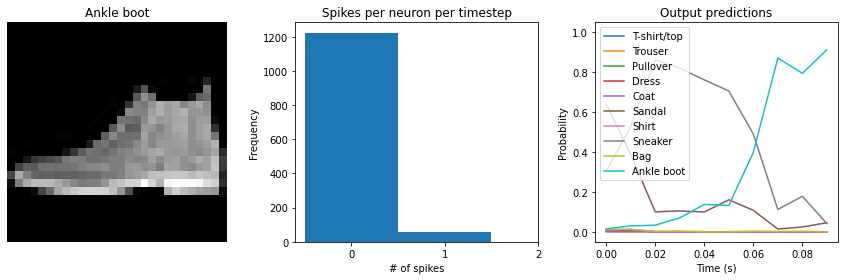

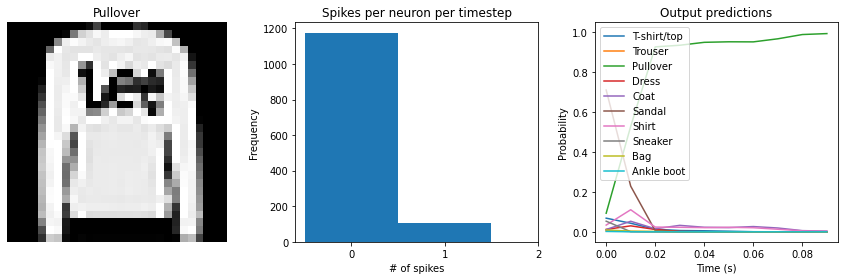

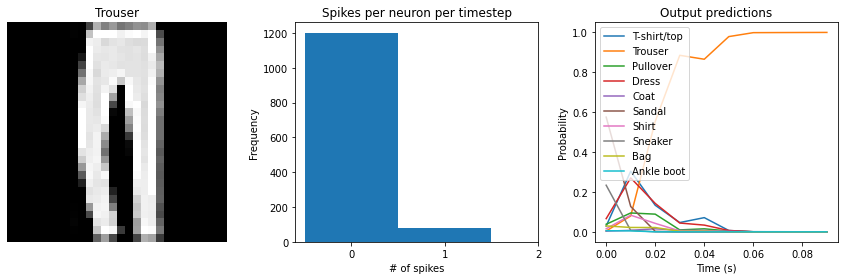

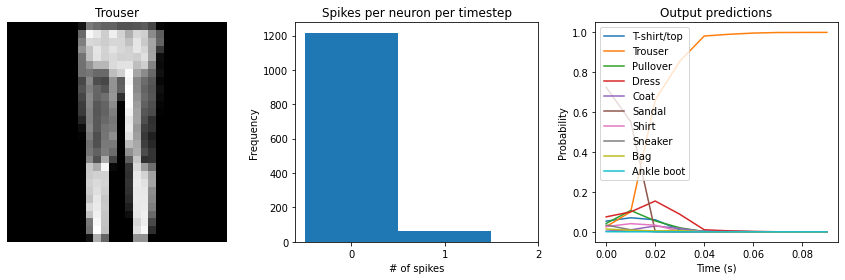

In [16]:
check_output(filtered_model)

We can see that the model performs similarly to the previous
[spiking aware training](#Spiking-aware-training) example, which makes sense since, for
a static input image, a moving average is very similar to a global average. We would
need a more complicated model, with multiple spiking layers or inputs that are changing
over time, to really see the benefits of a Lowpass layer.
The ``keras_spiking.Alpha`` layer is another lowpass-filtering layer,
which can provide better filtering of spike noise with less delay
than ``keras_spiking.Lowpass``.

## Summary

We can use `SpikingActivation` layers to convert any activation function to an
equivalent spiking implementation. Models with SpikingActivations can be trained and
evaluated in the same way as non-spiking models, thanks to the swappable
training/inference behaviour.

There are also a number of additional features that should be kept in mind in order to
optimize the performance of a spiking model:

- [Simulation time](#Simulation-time): by adjusting `dt` we can trade off temporal
  sparsity versus accuracy
- [Spiking aware training](#Spiking-aware-training): incorporating spiking dynamics on
  the forward pass can allow the model to learn weights that are more robust to spiking
  activations
- [Spike rate regularization](#Spike-rate-regularization): we can gain more control over
  spike rates by directly incorporating activity regularization into the optimization
  process
- [Lowpass filtering](#Lowpass-filtering): we can achieve better accuracy with fewer
  spikes by aggregating spike data over time